In \[101\]:

    import sys
    !{sys.executable} -m pip install -U imbalanced-learn
    !{sys.executable} -m pip install xgboost

    Requirement already up-to-date: imbalanced-learn in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (0.9.1)
    Requirement already satisfied, skipping upgrade: scipy>=1.3.2 in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (from imbalanced-learn) (1.6.0)
    Requirement already satisfied, skipping upgrade: joblib>=1.0.0 in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (from imbalanced-learn) (1.0.1)
    Requirement already satisfied, skipping upgrade: numpy>=1.17.3 in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (from imbalanced-learn) (1.20.0)
    Requirement already satisfied, skipping upgrade: threadpoolctl>=2.0.0 in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (from imbalanced-learn) (2.1.0)
    Requirement already satisfied, skipping upgrade: scikit-learn>=1.1.0 in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (from imbalanced-learn) (1.1.2)
    WARNING: You are using pip version 20.2.3; however, version 22.2.2 is available.
    You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
    Collecting xgboost
      Downloading xgboost-1.6.2-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.7 MB)
         |████████████████████████████████| 1.7 MB 5.1 MB/s eta 0:00:01
    Requirement already satisfied: numpy in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (from xgboost) (1.20.0)
    Requirement already satisfied: scipy in /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages (from xgboost) (1.6.0)
    Installing collected packages: xgboost
    Successfully installed xgboost-1.6.2
    WARNING: You are using pip version 20.2.3; however, version 22.2.2 is available.
    You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.

In \[102\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import imblearn
    import xgboost

In \[5\]:

    # allows us to see all features in dataset
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

In \[6\]:

    data = pd.read_csv('Data/TRAIN_SET_2022.csv')

In \[7\]:

    # check to see that data is properly loaded
    data.head()

Out\[7\]:

|     | RESTAURANT_SERIAL_NUMBER | RESTAURANT_PERMIT_NUMBER | RESTAURANT_NAME                   | RESTAURANT_LOCATION             | RESTAURANT_CATEGORY       | ADDRESS             | CITY      | STATE  | ZIP        | CURRENT_DEMERITS | CURRENT_GRADE | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_TIME  | INSPECTION_TYPE    | INSPECTION_DEMERITS | VIOLATIONS_RAW      | RECORD_UPDATED  | LAT_LONG_RAW              | FIRST_VIOLATION | SECOND_VIOLATION | THIRD_VIOLATION | FIRST_VIOLATION_TYPE | SECOND_VIOLATION_TYPE | THIRD_VIOLATION_TYPE   | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW |
|-----|--------------------------|--------------------------|-----------------------------------|---------------------------------|---------------------------|---------------------|-----------|--------|------------|------------------|---------------|----------------|---------------------|------------------------|------------------|--------------------|---------------------|---------------------|-----------------|---------------------------|-----------------|------------------|-----------------|----------------------|-----------------------|------------------------|----------------------|-----------------------------------|
| 0   | DA1117270                | PR0004527                | SANDS EXPO HALL B2 CONCESSION     | SANDS EXPO & CONVENTION CENTER  | Snack Bar                 | 201 E Sands Ave     | Las Vegas | Nevada | 89169-2617 | 0.0              | A             | 25.0           | 27.95998269         | 13.004886              | 11/5/2013 16:15  | Routine Inspection | 11                  | 2,042,153,022,955   | 1/6/2015 16:34  | (36.1221442, 115.1652749) | 204.0           | 215.0            | 302.0           | Critical             | Major                 | Imminent Health Hazard | 4                    | 0                                 |
| 1   | DA1014948                | PR0024221                | THAI NOODLES CAFE - RESTAURANT    | THAI NOODLES CAFE               | Restaurant                | 6710 W CHEYENNE Ave | Las Vegas | Nevada | 89108-4588 | 3.0              | A             | 7.0            | 27.71936533         | 3.922086               | 9/21/2012 13:00  | Routine Inspection | 9                   | 214,216,229,230,233 | 2/21/2013 22:26 | (36.218691, 115.242913)   | 214.0           | 216.0            | 229.0           | Major                | Major                 | Non-Major              | 5                    | 0                                 |
| 2   | DA0861994                | PR0019017                | SANTA FE SPORTS BOOK GRILL        | Santa Fe Station Hotel & Casino | Restaurant                | 4949 N Rancho Dr    | Las Vegas | Nevada | 89130-3505 | 8.0              | A             | 23.0           | 26.44263674         | 10.312777              | 9/16/2011 11:50  | Routine Inspection | 9                   | 202,215,233         | 4/6/2015 9:00   | (36.2498922, 115.2441383) | 202.0           | 215.0            | 233.0           | Critical             | Major                 | Non-Major              | 3                    | 1                                 |
| 3   | DA0896719                | PR0001343                | Bracken, Walter Elem School Kit   | Bracken, Walter Elem School     | Elementary School Kitchen | 1200 N 27Th St      | Las Vegas | Nevada | 89101-1517 | 0.0              | A             | 14.0           | 33.98829267         | 4.163975               | 11/22/2011 11:40 | Routine Inspection | 5                   | 214,230,233         | 2/21/2013 22:26 | (36.183669, 115.112355)   | 214.0           | 230.0            | 233.0           | Major                | Non-Major             | Non-Major              | 3                    | 0                                 |
| 4   | DA1031041                | PR0006084                | HARD ROCK JOINT EAST SVC BAR FL 1 | HARD ROCK HOTEL & CASINO        | Bar / Tavern              | 4455 S Paradise Rd  | Las Vegas | Nevada | 89169-6574 | 0.0              | A             | 10.0           | 21.98028217         | 13.462786              | 11/9/2012 20:30  | Routine Inspection | 5                   | 214,230,233         | 2/21/2013 22:26 | (36.1100828, 115.1538714) | 214.0           | 230.0            | 233.0           | Major                | Non-Major             | Non-Major              | NaN                  | 0                                 |

In \[8\]:

    # check to see how many instances and features there are
    data.shape

Out\[8\]:

    (15673, 28)

In \[9\]:

    # we can see that certain features have null values, where Non-Null counts are less than 15673
    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 15673 entries, 0 to 15672
    Data columns (total 28 columns):
     #   Column                            Non-Null Count  Dtype  
    ---  ------                            --------------  -----  
     0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object 
     1   RESTAURANT_PERMIT_NUMBER          15673 non-null  object 
     2   RESTAURANT_NAME                   15608 non-null  object 
     3   RESTAURANT_LOCATION               15473 non-null  object 
     4   RESTAURANT_CATEGORY               15543 non-null  object 
     5   ADDRESS                           15603 non-null  object 
     6   CITY                              15437 non-null  object 
     7   STATE                             15464 non-null  object 
     8   ZIP                               15614 non-null  object 
     9   CURRENT_DEMERITS                  15457 non-null  float64
     10  CURRENT_GRADE                     15368 non-null  object 
     11  EMPLOYEE_COUNT                    15580 non-null  float64
     12  MEDIAN_EMPLOYEE_AGE               15639 non-null  object 
     13  MEDIAN_EMPLOYEE_TENURE            15376 non-null  float64
     14  INSPECTION_TIME                   15490 non-null  object 
     15  INSPECTION_TYPE                   15452 non-null  object 
     16  INSPECTION_DEMERITS               15419 non-null  object 
     17  VIOLATIONS_RAW                    15508 non-null  object 
     18  RECORD_UPDATED                    15554 non-null  object 
     19  LAT_LONG_RAW                      15658 non-null  object 
     20  FIRST_VIOLATION                   15461 non-null  float64
     21  SECOND_VIOLATION                  15588 non-null  float64
     22  THIRD_VIOLATION                   15612 non-null  float64
     23  FIRST_VIOLATION_TYPE              15527 non-null  object 
     24  SECOND_VIOLATION_TYPE             15406 non-null  object 
     25  THIRD_VIOLATION_TYPE              15500 non-null  object 
     26  NUMBER_OF_VIOLATIONS              15504 non-null  object 
     27  NEXT_INSPECTION_GRADE_C_OR_BELOW  15633 non-null  object 
    dtypes: float64(6), object(22)
    memory usage: 3.3+ MB

In \[10\]:

    # take a look at response variable counts - we should only 1 and 0
    data['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts()

Out\[10\]:

    0       12947
    1        2680
    3           1
    4           1
    Goat        1
    9           1
    7           1
    -3          1
    Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64

In \[11\]:

    # since we have some miscellaneous values for our response variable, we will drop these instances
    data = data[(data['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '0') | (data['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '1')]

In \[12\]:

    # now let's split data into predictor and response variables
    X, y = data.drop('NEXT_INSPECTION_GRADE_C_OR_BELOW', axis = 1).copy(), data['NEXT_INSPECTION_GRADE_C_OR_BELOW'].copy()

### Before we perform any pre-processing or exploration on our data, we will split our dataset into train-test sets to avoid data-leakage and to have a validation set<a
href="#Before-we-perform-any-pre-processing-or-exploration-on-our-data,-we-will-split-our-dataset-into-train-test-sets-to-avoid-data-leakage-and-to-have-a-validation-set"
class="anchor-link">¶</a>

In \[13\]:

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In \[106\]:

    # we will use our training data to gain insights
    explore = X_train.copy()
    explore['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = y_train.copy()

In \[15\]:

    explore.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 12501 entries, 6593 to 7290
    Data columns (total 28 columns):
     #   Column                            Non-Null Count  Dtype  
    ---  ------                            --------------  -----  
     0   RESTAURANT_SERIAL_NUMBER          12501 non-null  object 
     1   RESTAURANT_PERMIT_NUMBER          12501 non-null  object 
     2   RESTAURANT_NAME                   12449 non-null  object 
     3   RESTAURANT_LOCATION               12342 non-null  object 
     4   RESTAURANT_CATEGORY               12399 non-null  object 
     5   ADDRESS                           12440 non-null  object 
     6   CITY                              12309 non-null  object 
     7   STATE                             12327 non-null  object 
     8   ZIP                               12452 non-null  object 
     9   CURRENT_DEMERITS                  12332 non-null  float64
     10  CURRENT_GRADE                     12261 non-null  object 
     11  EMPLOYEE_COUNT                    12419 non-null  float64
     12  MEDIAN_EMPLOYEE_AGE               12473 non-null  object 
     13  MEDIAN_EMPLOYEE_TENURE            12258 non-null  float64
     14  INSPECTION_TIME                   12355 non-null  object 
     15  INSPECTION_TYPE                   12317 non-null  object 
     16  INSPECTION_DEMERITS               12292 non-null  object 
     17  VIOLATIONS_RAW                    12373 non-null  object 
     18  RECORD_UPDATED                    12404 non-null  object 
     19  LAT_LONG_RAW                      12491 non-null  object 
     20  FIRST_VIOLATION                   12343 non-null  float64
     21  SECOND_VIOLATION                  12432 non-null  float64
     22  THIRD_VIOLATION                   12456 non-null  float64
     23  FIRST_VIOLATION_TYPE              12385 non-null  object 
     24  SECOND_VIOLATION_TYPE             12286 non-null  object 
     25  THIRD_VIOLATION_TYPE              12368 non-null  object 
     26  NUMBER_OF_VIOLATIONS              12375 non-null  object 
     27  NEXT_INSPECTION_GRADE_C_OR_BELOW  12501 non-null  object 
    dtypes: float64(6), object(22)
    memory usage: 2.8+ MB

### We will first begin exploration of our categorical features, looking for things such as: variability within each feature (how many unique values each column takes) and redundancy (do two or more features measure/record the same thing?).<a
href="#We-will-first-begin-exploration-of-our-categorical-features,-looking-for-things-such-as:-variability-within-each-feature-(how-many-unique-values-each-column-takes)-and-redundancy-(do-two-or-more-features-measure/record-the-same-thing?)."
class="anchor-link">¶</a>

In \[16\]:

    # We will use 'RESTAURANT_SERIAL_NUMBER' as the identifier of a restaurant, thus we can drop 'RESTAURANT_NAME'
    explore.drop('RESTAURANT_NAME', axis = 1, inplace = True)

In \[17\]:

    # we can see that our 'RESTAURANT_LOCATION' is highly variable. Additionally, it's possible we will encounter unseen
    # locations in our test set, thus we will drop this feature as well
    explore['RESTAURANT_LOCATION'].value_counts()

Out\[17\]:

    CAESARS PALACE HOTEL & CASINO                         89
    MIRAGE HOTEL & CASINO                                 84
    BELLAGIO HOTEL & CASINO                               81
    MGM GRAND HOTEL & CASINO                              70
    ARIA HOTEL & CASINO                                   69
    Robertos Taco Shop                                    69
    PARIS HOTEL & CASINO                                  66
    FLAMINGO LV HOTEL & CASINO                            66
    MANDALAY BAY HOTEL & CASINO                           65
    COSMOPOLITAN RESORT & CASINO                          64
    HARD ROCK HOTEL & CASINO                              64
    HARRAHS LV HOTEL & CASINO                             64
    Rio Suites Hotel                                      56
    TREASURE ISLAND HOTEL & CASINO                        47
    PLANET HOLLYWOOD RESORT AND CASINO                    43
    BALLYS GRAND HOTEL                                    43
    Golden Nugget Las Vegas                               42
    PALAZZO HOTEL & CASINO                                42
    WESTGATE HOTEL AND CASINO                             41
    VENETIAN HOTEL & CASINO                               39
    LUXOR HOTEL & CASINO                                  38
    Pizza Hut                                             35
    GREEN VALLEY RANCH                                    35
    WYNN HOTEL & CASINO                                   33
    South Point Hotel & Casino                            30
    RIVIERA HOTEL & CASINO                                29
    MONTE CARLO HOTEL & CASINO                            28
    EXCALIBUR HOTEL & CASINO                              26
    Texas Station Gambling Hall & Hotel                   25
    Suncoast Hotel & Casino                               24
    NEW YORK NEW YORK HOTEL & CASINO                      24
    Dominos Pizza                                         24
    TROPICANA LAS VEGAS HOTEL & CASINO                    24
    Sunset Station Hotel & Casino                         23
    Sams Town                                             22
    McCarran Host International                           22
    Subway                                                21
    SILVER SEVENS HOTEL & CASINO                          21
    Buffalo Wild Wings Grill & Bar                        21
    KAIZEN FUSION ROLL & SUSHI                            20
    FIESTA HENDERSON                                      20
    VDARA                                                 19
    STRATOSPHERE HOTEL & CASINO                           19
    FOUR SEASONS HOTEL                                    19
    Orleans Hotel and Casino                              19
    CENTERPLATE @ CONVENTION CENTER                       19
    Dennys Restaurant                                     18
    Port of Subs                                          18
    HOUSE OF BLUES @ MANDALAY BAY                         18
    Riverside Resort & Casino                             18
    Boulder Station Hotel & Casino                        18
    JW Marriott/RAMPART Hotel & Casino                    17
    Plaza Hotel & Casino                                  17
    D HOTEL & CASINO                                      17
    Del Taco                                              17
    Baja Fresh                                            17
    ENCORE HOTEL & CASINO                                 17
    Primm Valley Resort & Casino                          17
    Silverton Hotel & Casino                              16
    Fremont Hotel                                         16
    JIMMY BUFFETTS MARGARITAVILLE @ FLAMINGO              16
    Teriyaki Madness                                      16
    Harrahs                                               16
    Papa Johns Pizza                                      16
    Palms Casino Resort                                   15
    China a Go Go                                         15
    Eastside Cannery Casino                               15
    MANDARIN ORIENTAL                                     15
    Gold Coast Hotel & Casino                             15
    Panda Express                                         15
    Aliante Hotel & Casino                                15
    HOOTERS CASINO HOTEL                                  15
    Capriottis Sandwich Shop                              14
    Little Caesars Pizza                                  14
    China Star                                            14
    Einstein Brothers Bagels                              14
    Colorado Belle Hotel & Casino                         14
    RED ROCK CASINO RESORT & SPA                          14
    Casablanca Resort & Casino                            14
    Palace Station Hotel & Casino                         13
    McDonalds                                             13
    Binions Gambling Hall & Hotel                         13
    ROBERTOS TACO SHOP                                    13
    Buffalo Bills Resort & Casino                         13
    International House of Pancakes                       12
    Santa Fe Mining Co                                    12
    Edgewater Hotel & Casino                              12
    Cannery Hotel & Casino                                12
    Circus Circus Hotel & Casino                          12
    China Olive                                           11
    TGI Fridays                                           11
    AQUAKNOX @ GRAND CANAL                                11
    SIGNATURE @ MGM GRAND, THE                            11
    Timbers Grill                                         11
    CAPRIOTTIS SANDWICH SHOP                              11
    Santa Fe Station Hotel & Casino                       11
    Jamba Juice                                           11
    Aquarius Casino Resort                                11
    DAIRY QUEEN                                           11
    Virgin River Hotel                                    11
    Whiskey Petes Hotel & Casino                          11
    SAKANA                                                11
    MAGGIANOS LITTLE ITALY @ FASHION SHOW                 11
    Chipotle Mexican Grill                                10
    Fiesta Rancho Hotel & Casino                          10
    Las Vegas Superstore                                  10
    ARIZONA CHARLIES EAST CASINO                          10
    Sonic Drive In                                        10
    EAST OCEAN DIM SUM & SEAFOOD                          10
    El Super                                              10
    ICHIZA                                                10
    Cafe Noodle & Chinese BBQ                             10
    Little Dumpling                                       10
    Tropical Smoothie Cafe                                10
    HILTON GRAND VACATIONS @ LV STRIP                     10
    Dairy Queen                                           10
    El Cortez Hotel                                       10
    PAMPAS CHURRASCARIA @ MIRACLE MILE                    10
    Popeyes Chicken & Biscuits                            10
    HASH HOUSE A GO GO @ PLAZA                            10
    CLARION HOTEL & CASINO                                10
    TAO TEMPLE BISTRO @ VENETIAN                          10
    China a Go Go 5                                       10
    Sushi Mon Japanese Restaurant                         10
    BB KINGS BLUES CLUB @ MIRAGE                          10
    QUAD, THE HOTEL & CASINO                               9
    TRUMP INTL HOTEL & TOWER                               9
    TUSCANY SUITES                                         9
    DU PARS RESTAURANT & BAKERY @ GOLDEN GATE              9
    SANDS EXPO & CONVENTION CENTER                         9
    NORDSTROM MARKETPLACE CAFE & EBAR @ FASHION SHOW       9
    Joys Restaurant Buffet                                 9
    BORDER GRILL @ MANDALAY BAY                            9
    SUSHI BAR SAGE                                         9
    DUNKIN DONUTS                                          9
    Four Queens Hotel & Casino                             9
    CARDENAS                                               9
    PBR ROCK HOUSE @ MIRACLE MILE                          9
    CANYON RANCH @ PALAZZO                                 9
    ARK @ NY NY                                            9
    Los Tacos                                              9
    ALEXIS PARK RESORT                                     9
    Winchell Donut House                                   9
    California Hotel & Casino                              9
    PF CHANGS @ PLANET HOLLYWOOD                           9
    EUREKA CASINO HOTEL                                    9
    BLONDIES @ MIRACLE MILE                                9
    Little Caesars                                         9
    L & L Hawaiian Barbecue                                8
    Rosatis Pizza                                          8
    Barleys Casino & Brewing Co                            8
    Golden Nugget - Laughlin                               8
    Panera Bread                                           8
    Cicis Pizza                                            8
    Silver Nugget Casino                                   8
    Chuck E Cheeses                                        8
    CHINA PASSION                                          8
    DRAGONRIDGE COUNTRY CLUB                               8
    TAQUERIA EL BUEN PASTOR                                8
    Brio Tuscan Grille                                     8
    CTR@SPR MTN-Dae Jang Keum                              8
    Beach House Grill and Bar                              8
    M Resort Spa & Casino                                  8
    CHAI TIPS THAI CHINESE FOOD                            8
    CANALETTO @ GRAND CANAL                                8
    BJ BUFFET                                              8
    SUSHI KO                                               8
    EUREKA SALOON & GAMBLING HALL                          8
    Makino @ PREMIUM OUTLET                                8
    Quality Food Service                                   8
    Ventano Restaurant & Lounge                            8
    ZEFFIRINO / PIZZARIA DE ENZO @ VENETIAN                8
    DRAGON NOODLE/DVINO/ @ MONTE CARLO                     8
    Famous Daves                                           8
    Kaya Restaurant                                        8
    L & L HAWAIIAN BBQ                                     8
    Oaces Bar & Grill                                      8
    PING PANG PONG/NOODLE EXCHANGE @ GOLD COAST            8
    Playas De Cancun                                       8
    CABO WABO @ MIRACLE MILE                               8
    Sushi, The                                             8
    SLS LAS VEGAS                                          8
    SERGIOS RESTAURANT                                     8
    Jerrys Nugget                                          8
    PLATINUM HOTEL & SPA                                   8
    ZABAS MEXICAN GRILL                                    8
    Dennys @ FIESTA RANCHO                                 8
    SHABU GRILL JIN ZHU YI                                 8
    Doc Holidays                                           7
    Pho Little Saigon                                      7
    La Michoacana Market                                   7
    Manna Mediterranean                                    7
    La Bonita Grocery                                      7
    Metro Pizza Tropicana                                  7
    Krazy Buffet                                           7
    Scoundrels Pub Rest & Bar                              7
    ELLIS ISLAND                                           7
    HILTON GRAND VACATIONS ELARA                           7
    TERRIBLES SEARCHLIGHT NUGGET                           7
    Makino Restaurant                                      7
    RAILROAD PASS HOTEL & CASINO                           7
    Outback Steakhouse                                     7
    PARIS - HEXX/CHATEAU                                   7
    Riverside Hotel & Casino                               7
    Orchids Garden Chinese Restaurant                      7
    KAINAN ASIAN MARKET AND GIFT SHOP                      7
    SASA SUSHI                                             7
    Arizona Charlies                                       7
    REVERE GOLF CLUB                                       7
    CTR@SPR MTN-Pho Kim Long II                            7
    Lucky Club Casino & Hotel                              7
    Pei Wei Asian Diner                                    7
    Oyshi Sushi                                            7
    Mac Acquisition, LLC                                   7
    Yummy Grill & Sushi                                    7
    China a Go Go 7                                        7
    Sushi Bay Japanese Cuisine                             7
    Oh My Sushi                                            7
    HARLEY DAVIDSON CAFE                                   7
    Sushi Wa                                               7
    RENAISSANCE LAS VEGAS                                  7
    BATTISTAS HOLE IN THE WALL                             7
    Metro Pizza - Green Valley                             7
    Rubios Fresh Mexican Grill                             7
    VEGAS BUFFET                                           7
    China a Go Go II                                       7
    Quiznos Sub                                            7
    POSTRIO @ VENETIAN                                     7
    CHUBBY CATTLE                                          7
    SEAFOOD CITY SUPERMARKET                               7
    UMIYA                                                  7
    Kobe Sushi II                                          7
    LA SALSA CANTINA @ SHOWCASE MALL                       7
    Villa Pizza                                            7
    Taco Bell                                              7
    RA SUSHI @ FASHION SHOW                                7
    Pumi Oriental Restaurant                               7
    MASTROS OCEAN CLUB @ CRYSTALS                          7
    Little Dumpling Restaurant                             7
    Sam Woo BBQ Restaurant @ CHINATOWN PLAZA               7
    Applebees                                              7
    Galleria @ Sunset                                      7
    Nanay Glorias Filipino Fast Food                       7
    GRAND LUX CAFE @ VENETIAN                              7
    PIRANHA NITECLUB                                       7
    Levy Restaurants @ LVMS                                7
    Ohana Hawaiian BBQ                                     7
    PIZZA ROCK                                             7
    A-1 Mobile Catering                                    7
    Remedys                                                7
    SMITH & WOLLENSKY                                      7
    Main Street Station                                    6
    Buffet Asia                                            6
    PAYMONS MEDITERRANEAN CAFE                             6
    Best Cellars                                           6
    Papa Johns                                             6
    McDonalds Corporation                                  6
    SENOR FROGS @ TREASURE ISLAND                          6
    CROMWELL LAS VEGAS, THE                                6
    Mermaids Casino                                        6
    Black Mountain Grill/Lounge                            6
    IMPERIAL PALACE - ROCKHOUSE                            6
    Archis Thai Bistro                                     6
    Wolf Creek Golf Course                                 6
    PLANET HOLLYWOOD @ CAESARS                             6
    Whole Foods Market                                     6
    Rosatis                                                6
    SWISH                                                  6
    RIVIERA - BANANA LEAF ASIAN CUISINE                    6
    LITTLE ITALY/CHINA MAX -  NEONOPOLIS                   6
    Streets of New York                                    6
    LAS VEGAS MARRIOTT                                     6
    ROCKIN TACO MEXICAN GRILL @ HARMON CENTER              6
    Marios Westside Market                                 6
    Blue Martini                                           6
    HARD ROCK - NOBU                                       6
    Casa Flores Mexican Restaurant                         6
    Barley P0Ps Lounge                                     6
    DON TORTACO MEXICAN GRILL                              6
    Mad Greek Cafe                                         6
    CAESARS - CAFE AMERICANO KITCHEN BAR                   6
    Romanos Macaroni Grill                                 6
    Sushi on Tropicana                                     6
    MARDI GRAS INN                                         6
    HILTON LAKE LAS VEGAS RESORT & SPA                     6
    Lareina Mexican Food and Bakery                        6
    Donut Tyme                                             6
    PIONEER HOTEL                                          6
    Long John Silvers/ A & W #31334                        6
    Poker Palace                                           6
    Eldorado Casino                                        6
    CTR@SPR MTN-Kung Fu Plaza                              6
    HO HO HO CHINESE GOURMET EXPRESS                       6
    Short Line Express Market                              6
    TROPICAL SMOOTHIE CAFE                                 6
    MESKEREM ETHIOPIAN                                     6
    TAMBA INDIAN CUISINE @ HAWAIIAN MARKETPLACE            6
    Mt Charleston Resort                                   6
    Sushi Loca                                             6
    BENTLEYS BAR AND GRILL                                 6
    Las Americas                                           6
    Lulu Hawaii, LLC                                       6
    CHAO THAI                                              6
    Tea Time Cafe                                          6
    GOLD KEY SHOPS - KIMCHI                                6
    5th Avenue Pub Bar                                     6
    Pepes Tacos                                            6
    CHINESE VILLAGE/PANDORAS LOUNGE                        6
    THE COFFEE BEAN AND TEA LEAF @ VENETIAN                6
    Kopper Keg St. Rose                                    6
    Las Vegas Boat Harbor, Inc                             6
    Harvest Montara Meadows                                6
    VICKIES DINER                                          6
    CHINA GRILL / RED, WHITE, & BLUE @ MANDALAY BAY        6
    Chilis                                                 6
    Fort Cheyenne Casino                                   6
    CHINA ONE                                              6
    ORIGIN INDIA                                           6
    NEW GRAND CHINA                                        6
    FLORIDA CAFE CUBAN BAR & GRILL                         6
    Lotus Restaurant and Bar                               6
    Los Compadres #4 Market & Snack                        6
    Cook on Wok #1                                         6
    CCSD Central Kitchen                                   6
    Yogurtland                                             6
    GOLDEN STEER RESTAURANT & LOUNGE                       6
    Oasis Golf Clubhouse                                   6
    Capriottis                                             6
    Grand China #5                                         6
    WESTIN HOTEL LAS VEGAS                                 6
    Corner Gas                                             6
    EL SEGUNDO SOL @ FASHION SHOW                          6
    Jasmine Express                                        6
    International Market Place                             6
    SHOWCASE MALL - HARD ROCK CAFE                         6
    VIP Logandale, Inc                                     6
    CLAIM JUMPER - GOLDEN NUGGET                           6
    Lemongrass Cafe                                        6
    HK SEAFOOD GARDEN                                      6
    San Salvador Restaurant                                6
    ARCO AM/PM                                             6
    Joes Crab Shack                                        6
    Crazy Horse III                                        6
    P & S International, LLC                               6
    KJ Kitchen Chinese Cuisine                             6
    JJANGA RESTAURANT                                      6
    TRIPLE GEORGE GRILL                                    5
    El Tenampa                                             5
    BAHAMA BREEZE #3020                                    5
    Arandas Taqueria                                       5
    BUCA CAFE ITALIANO & TEQUILA TAQUERIA @ BALLYS         5
    Todds                                                  5
    Hidden Canyon Stop N Go                                5
    GOLD KEY SHOPS - BOMBAY INDIAN CUISINE                 5
    El Pollo Loco                                          5
    Aliante Golf Course                                    5
    Treasures                                              5
    Cafe Rio - Shadow Mountain                             5
    I Love Sushi Restaurant/Bar                            5
    MCDONALDS #20903                                       5
    LINQ HOTEL & CASINO                                    5
    PINT, THE                                              5
    John Cutters                                           5
    PARIS - MON AMI GABI                                   5
    Big Horn                                               5
    Golden Spoon Frozen Yogurt                             5
    FOOD EXPRESS                                           5
    MOTHERS GRILL @ CHINATOWN PLAZA                        5
    Pollo Real Rest/Bar                                    5
    LOTUS OF SIAM COMMERCIAL CENTER                        5
    CALIFORNIA PIZZA KITCHEN @ FASHION SHOW                5
    VALENTINO @ VENETIAN                                   5
    GOLD KEY SHOPS - KABOB N MORE                          5
    EARL OF SANDWICH @ PLANET HOLLYWOOD                    5
    V THEATER BAR @ MIRACLE MILE                           5
    CHIN CHIN @ NY NY                                      5
    OUTBACK STEAKHOUSE #3222 @ SHOWCASE MALL               5
    GOLD SPIKE                                             5
    YUMMY CHINA                                            5
    Changs Hong Kong Cuisine                               5
    BUDDY VS @ VENETIAN                                    5
    El Cazador Restaurant                                  5
    Sunset & Vines Bar - Lake LV                           5
    SMASHBURGER #1278                                      5
    FORK AND BURGER                                        5
    ARCO AM/PM MINI MARKET                                 5
    ROCCOS NY PIZZA & PASTA                                5
    JOHNNY ROCKETS #402 @ FASHION SHOW                     5
    COBA CAFE AND CARIBE                                   5
    Chinatown Cuisine                                      5
    Dragon Wok                                             5
    Americas Best Value Inn                                5
    Coffee Bean and Tea Leaf, The                          5
    OAces Bar & Grill                                      5
    OASIS BAR                                              5
    Tofu Hut                                               5
    Kopper Keg Lounge & Restaurant                         5
    BJS Restaurant & Brewhouse                             5
    SAPPHIRE GENTLEMANS CLUB                               5
    Del Taco #1023                                         5
    Wendys Noodle Cafe                                     5
    Tony Romas                                             5
    Beer Bellies                                           5
    GINSENG BAR B Q                                        5
    China Tango                                            5
    L & L HAWAIIAN BARBECUE                                5
    Circle K Store #0756                                   5
    IL FORNAIO @ NY NY                                     5
    HIBACHI GRILL & SUPREME BUFFET                         5
    Gilligans Hideaway                                     5
    Noboru Inc                                             5
    Blue Dogs Pub                                          5
    LITTLE DUMPLING                                        5
    LITTLE CITY GRILLE                                     5
    GORDON BIERSCH BREWERY @ HOWARD HUGHES PARKWAY         5
    Da Lat Restaurant                                      5
    Village Pub                                            5
    Krung Siam Thai Restaurant & Bar                       5
    China Star Super Buffet                                5
    Ta Ta Bistro                                           5
    VILLAGE PUB GIBSON                                     5
    MANDALAY PLACE - RM SEAFOOD                            5
    Tropicana Laughlin Hotel & Casino                      5
    Sushi Zen                                              5
    CASINO ROYALE - DENNYS #141                            5
    Mimis Cafe                                             5
    MR. SANDWICH III                                       5
    Wingstop Restaurants Inc                               5
    PIE ZANOS NEW YORK                                     5
    EMERILS TABLE 10 @ PALAZZO                             5
    Kobe Sushi                                             5
    China One LLC                                          5
    Totos Mexican Restaurant                               5
    ESMERALDAS                                             5
    FOUR SEASONS DINER - CHINATOWN PLAZA                   5
    EMERILS NEW ORLEANS FISH HOUSE @ MGM                   5
    CHURCHS CHICKEN                                        5
    Sumo                                                   5
    WILDFIRE ANTHEM                                        5
    Little Caesars #3372                                   5
    Sonic Drive-In                                         5
    NV ENERGY                                              5
    DENNYS #8569                                           5
    ZINGERS @ HAWAIIAN MARKETPLACE                         5
    Las Vegas Eagle                                        5
    PKWY                                                   5
    J JANGA STEAK AND SUSHI                                5
    NEIMAN-MARCUS @ FASHION SHOW                           5
    WEDGEWOOD WEDDING & BANQUET CENTER @ STALLION MOUN     5
    Santa Rosa Taco Shop                                   5
    CHINA GOURMET                                          5
    Subway @ FOUR QUEENS                                   5
    Latino Mercado                                         5
    MARRIOTT COURTYARD LV CONV CENTER                      5
    Natalie's Bake & Shark #1610                           5
    Taj Palace                                             5
    New Jumbo Buffet                                       5
    Tortas El Rey                                          5
    Laughlin River Lodge - Dennys 8687                     5
    SATAY                                                  5
    Emerald Island Casino                                  5
    Tonys Mexican Restaurant                               5
    Thai Thai Restaurant                                   5
    JERSEY MIKES SUBS                                      5
    Nittayas Secret Kitchen                                5
    CAPITAL GRILLE #8020 @ FASHION SHOW                    5
    Bonanza Lounge                                         5
    Hokkaido Teppanyaki Steak House                        5
    BUCA DI BEPPO                                          5
    CIRCLE K FOOD STORES #5399                             5
    Kaizen Fusion Roll & Sushi                             5
    TOWN CENTER GROCER                                     5
    CHINA AAA                                              5
    SANTA ANA CAFE                                         5
    LA FAVORITA                                            5
    Mt Everest Indias Cuisine                              5
    SUSHI SAMBA @ PALAZZO                                  5
    Aloha Kitchen & Bar                                    5
    JALISCO CANTINA                                        5
    NACHO DADDY                                            5
    George D Group, LLC                                    5
    El Santaneco                                           5
    HIKARI JAPANESE STEAK HOUSE AND SUSHI                  5
    Lindo Michoacan La Loma                                5
    Sahara Ave Saloon & Liquor Store                       5
    JOHNNY ROCKETS                                         5
    NUTRITION RUSH                                         5
    CHEESECAKE FACTORY @ CAESARS                           5
    WESTIN LAKE LAS VEGAS RESORT                           5
    Clk Restaurant Group                                   5
    BRADDAHS ISLAND STYLE                                  5
    HOOKAH PALACE                                          5
    COSMO - MARQUEE DAYCLUB / NIGHTCLUB                    5
    HAMADA @ HOWARD HUGHES CENTER                          5
    HASH HOUSE A GO GO @ M RESORT                          5
    Petro Stopping Center                                  5
    Cafe Verdi West                                        5
    FLAMINGO  - CARLOS N CHARLIES LV                       4
    WO FAT CHINESE RESTAURANT                              4
    Tom Jones Food Mart                                    4
    CHINA ROLL                                             4
    Juns House                                             4
    JIN MEE COMMERCIAL CENTER                              4
    Sumo Japanese Restaurant                               4
    Aces and Ales                                          4
    New China Buffet                                       4
    Galanga Thai Eatery                                    4
    Chopstix Express Restaurant                            4
    Baskin Robbins                                         4
    El Rincon Nayarita                                     4
    Golden Dragon                                          4
    El Azteca Taqueria & Restaurant                        4
    Indoor Swapmeet - Mariscocos Arreo                     4
    La Bayou Casino                                        4
    O Sheas Hotel                                          4
    E POLLITO                                              4
    RHUMBAR @ MIRAGE                                       4
    CAFE DERBI                                             4
    Long John Silvers/A & W #31330                         4
    Aces Bar & Grill                                       4
    Meat Amigo                                             4
    Mama Marias                                            4
    Hush Puppy #2, The                                     4
    BAJA BAR & GRILL                                       4
    VINCE NEILS/MAD DOGS @ CIRCUS CIRCUS                   4
    Kona Grill, Las Vegas, Inc.                            4
    GATA THAI CUISINE                                      4
    El Triunfo Restaurant                                  4
    LA FLOR DE MICHOACAN ICE CREAM                         4
    Island Malaysian Cuisine                               4
    JENNI PHO                                              4
    Surangs Thai Kitchen                                   4
    RUNWAY CAFE                                            4
    PF CHANGS CHINA BISTRO #1500                           4
    LAS VEGAS LOUNGE                                       4
    DIMAS TACOS                                            4
    SPRINGHILL SUITES LAS VEGAS CONV CTR                   4
    URBAN TURBAN BOMBAY KITCHEN & TAPAS BAR                4
    Ross Js Aloha Grill                                    4
    LAS VEGAS GOLF CLUB                                    4
    Pho Rose                                               4
    VARIETY FOOD COURT                                     4
    PTS Pub #502                                           4
    Steiners Pub                                           4
    Pad Thai Restaurant                                    4
    Manna Restaurant - Campus Commons                      4
    Cracked Egg, The                                       4
    Fabulous Freddys Car Wash                              4
    JACKPOT JOANIES                                        4
    COMMERCIAL CENTER - RICE CAKE HOUSE                    4
    Charlies Lakeside Casino                               4
    LOMBARDIS ROMAGNA @ MIRACLE MILE                       4
    GRAND LUX CAFE @ PALAZZO                               4
    Tanker Inc II                                          4
    La Palapa Restaurant #3                                4
    NOODLES OF ASIA @ VENETIAN                             4
    Rainbow Market #8                                      4
    CINNABON @ HARRAHS                                     4
    Chubbys Pub                                            4
    Broadway Pizzeria                                      4
    Canyon Gate Country Club                               4
    Bootlegger Restaurant/Lounge                           4
    CARNICERIAS TIJUANA                                    4
    GREAT WRAPS @ FASHION SHOW                             4
    ROUNDERS GRILLING AND GAMING, #3                       4
    DAISYS HIDEAWAY                                        4
    Luna Rossa                                             4
    INTERNATIONAL HOUSE OF PANCAKES                        4
    Peking Express                                         4
    Aloha a Go Go                                          4
    LA HERRADERO MEAT MARKET #2                            4
    HAYAT MARKET                                           4
    LA CASONA                                              4
    Go Wild Sushi & Grill                                  4
    Carrabbas Italian Grill                                4
    Smiths #347                                            4
    HAIFA RESTAURANT                                       4
    TROPICAL SMOOTHIE CAFE NV15                            4
    Cadillac Ranch                                         4
    TACOS MI RANCHITO                                      4
    E-JO KOREAN RESTAURANT                                 4
    HASH HOUSE A GO GO @ LINQ                              4
    Boulevard Mall - Pretzelmaker                          4
    LV Outlet Center - Chicken Now                         4
    Mt Charleston Lodge                                    4
    WYNDHAM GRAND DESERT - HOT SPOT OASIS                  4
    GRIDDLECAKES                                           4
    Fashion Outlet of Las Vegas                            4
    Chopstix Express LLC                                   4
    Lauritas Taco Shop                                     4
    DELHI INDIAN CUISINE                                   4
    Carniceria Guadalajara                                 4
    CIRCLE K #8690                                         4
    LAVO CAFE @ PALAZZO                                    4
    BEST WESTERN PLUS NLV INN & SUITES                     4
    CTR@SPR MTN-Yunnan Garden                              4
    Bighorn Casino & Bar                                   4
    GIANIS NEW YORK PIZZA & PASTA                          4
    ORIGINAL PANCAKE HOUSE @ PRIMM VALLEY                  4
    CAPRIOTTIS #62 @ GREEN VALLEY RANCH                    4
    Taqueria El Tizon Grill                                4
    Macayos Restaurant/Lounge                              4
    MARISCOS EL DIAMANTE                                   4
    Lodge at Grand Teton                                   4
    STACKS & YOLKS                                         4
    DBS PONG AND POOL @ MIRACLE MILE                       4
    Choices                                                4
    CENTRO AMERICA RESTAURANT                              4
    Cafe Rio Mexican Grill                                 4
    CARLS JR #752                                          4
    NORTH END PIZZA                                        4
    MINT INDIAN BISTRO                                     4
    Mariscos Las Islitas                                   4
    GRAND PIZZA RESTAURANT                                 4
    FLAMINGO PIZZA                                         4
    PIZZA HUT @ RIVERSIDE CASINO                           4
    New York City Bar and Grill                            4
    DAL TORO @ PALAZZO                                     4
    PTS to Go #533                                         4
    SERENE VEGAS, AN INNPLACE RESORT                       4
    NAKED CITY PIZZA                                       4
    On The Border Mexican Grill & Cantina                  4
    OYSTER BAY @ MIRACLE MILE                              4
    Mama Ds Pizza                                          4
    MANDARIN EXPRESS                                       4
    Johnny Macs                                            4
    Montana Meat Co                                        4
    NEW LAS VEGAS COUNTRY CLUB                             4
    EXCALIBUR - DICKS LAS RESORT                           4
    VALLEY THAI RESTAURANT, THE                            4
    Mangos                                                 4
    Seven Seas Seafood West                                4
    SUSHI LOUNGE                                           4
    Thai House Restaurant                                  4
    LAS TAPATIAS                                           4
    Amena Bakery                                           4
    MCDONALDS                                              4
    Cold Stone Creamery                                    4
    Panna Thai Restaurant                                  4
    Smiths - Vegas Express Sushi                           4
    Buffalo Wild Wings Grill & Bar #175                    4
    WASABI JANES @ VENETIAN                                4
    GOLD KEY SHOPS - ROCK N ROLL SUSHI                     4
    Ohana Hawaiian Barbeque                                4
    INDIA PALACE                                           4
    LETICIAS COCINA                                        4
    Five Star Tavern                                       4
    Pizza Pub Incorporated                                 4
    EL GRAN TACO                                           4
    ROSHI @ SMITHS #366                                    4
    OLOCUILTA PUPUSERIA AND NEVERIA                        4
    ESPRESSO CULTURE @ CAESARS                             4
    China One                                              4
    AXUM ETHIOPIAN RESTAURANT                              4
    LA SIERRA MEXICAN RESTAURANT                           4
    PENNS THAI HOUSE                                       4
    BONJOUR EURO BAKERY                                    4
    Travel Center                                          4
    Ranch House, The                                       4
    Los Antojos Mexican Restaurant                         4
    LOS PORTALES BAKERY                                    4
    GOLDILOCKS BAKE SHOP & RESTAURANT                      4
    Willows of Henderson                                   4
    Carls Jr Restaurant                                    4
    Klondike Sunset Casino Rest & Bar                      4
    WOLFGANG PUCK PIZZERIA & CUCINA @ CRYSTALS             4
    Thai Original BBQ Restaurant                           4
    Sunset Pizzeria                                        4
    Supermercado Los Compadres                             4
    TBAAR @ HAWAIIAN MARKETPLACE                           4
    CHINA DRAGON/#1 HAWAIIAN BARBEQUE                      4
    Yard House Las Vegas, LLC                              4
    Real Donuts                                            4
    Robertos Taco Shop #5                                  4
    Chapalas Mexican Restaurant                            4
    PAMPLEMOUSSE                                           4
    MUSASHI JAPANESE                                       4
    Joeys NY Pizza                                         4
    Mama Depalmas Pizzeria                                 4
    Wendys #8034                                           4
    19th Hole Supper Club, The                             4
    Boulder Dam Brewing Company                            4
    JC CUISINE                                             4
    TERIYAKI MADNESS                                       4
    Spearmint Rhino Gentlemens Club                        4
    Sushi Bomb                                             4
    KOI RESTAURANT @ PLANET HOLLYWOOD                      4
    FIVE STAR TAVERN                                       4
    Laos Asia Market                                       4
    Fabulous Freddys                                       4
    STRATOSPHERE - MEX GRILL EL NOPAL                      4
    Faustos Mexican Grill #3                               4
    ALBO PIZZA RESTAURANT                                  4
    Soyo                                                   4
    Angelinas Pizza - Seven Hills                          4
    PANCHOS MEXICAN FOOD                                   4
    Pinoy-Pinay Filipino Restaurant                        4
    Osaka Restaurant/Bar/Sushi Bar                         4
    Northstar Bar & Grill                                  4
    Pho Mailan                                             4
    Kentucky Fried Chicken/Long Johns #212096              4
    Chicago Joes Restaurant                                4
    Tahiti Joes                                            4
    NESTLE TOLLHOUSE CAFE @ MIRACLE MILE SHOPS             4
    Sushi House Goyemon                                    4
    SAMMYS PASTRAMI                                        4
    China One Chinese Restaurant                           4
    Tacos Karina                                           4
    EDGAR CHOI HOSPITALITY, LLC                            4
    MGM GRAND GARDENS - ARAMARK                            4
    Tokyo Sushi House                                      4
    WENDYS #3704                                           4
    Sushi Factory East                                     4
    Pecos Express                                          4
    TERRIBLE HERBST - MCDONALDS #23396                     4
    Las Vegas Club Hotel                                   4
    Villa Fresh Italian @ Fiesta Henderson                 4
    BBQ KING                                               4
    TONY ROMAS RIBS RESTAURANT                             4
    Irenes                                                 4
    DELMONICO STEAKHOUSE @ VENETIAN                        4
    CASA DON JUAN                                          4
    PIEROS                                                 4
    Northern China Restaurant                              4
    Basil n Lime Authentic Thai Cuisine                    4
    Dlish Pizza Kitchen                                    4
    Pearl Wok                                              4
    GIPSY III                                              4
    ASIAN SEAFOOD MARKET                                   4
    Sammys Food Service                                    4
    Shucks Tavern III                                      4
    Buffet @ Asia                                          4
    Island Sushi and Hawaiian Grill                        4
    Jasons Deli Molasky Center                             4
    PEPES JR, INC                                          4
    Courthouse Bar & Grill                                 4
    COCOS #6052                                            4
    Kopper Keg North                                       4
    COCINA ITALIANA                                        4
    Best Western McCarran Inn                              4
    MERKATO ETHIOPIAN CAFE AND MARKET                      4
    Giuseppes Bar & Grill                                  4
    PLANET DAILIES @ PLANET HOLLYWOOD                      4
    7-ELEVEN FOOD STORE #29667                             4
    MI FAMILIA YA LLEGO                                    4
    Schlotzskys                                            4
    Kabob Express                                          4
    OHJAH JAPANESE STEAKHOUSE                              4
    Island Style Restaurant                                4
    El Burrito Restaurant and Bar                          4
    PELLEGRINI PIZZA                                       4
    Masa Sushi                                             4
    BROTHERS ITALIAN BISTRO                                4
    TW THEATER                                             4
    Jackson Family Market                                  4
    New York Chinese Restaurant - Ft Apache                4
    Whiskey Dicks                                          4
    LA PUPUSA LOCA                                         4
    Dairy Queen #17798                                     4
    Farm Basket                                            4
    Ella Ems Soul Food                                     4
    JACK IN THE BOX #7243                                  4
    Samurai Japanese Steakhouse & Sushi                    4
    Hush Puppy                                             4
    Dennys                                                 4
    Red Robin Restaurant/Bar #94                           4
    Pin Kaow III Thai Restaurant                           4
    MIX ZONE CAFE                                          4
    CHAYO COCINA & TEQUILA BAR @ LINQ                      4
    GINSENG BAR B Q @ LINQ                                 4
    Cafe Chloe                                             4
    HAPPY WOK                                              4
    PAPA MURPHYS TAKE N BAKE PIZZA                         4
    PHO BISTRO                                             4
    TEA SPACE                                              4
    Surf City Bar and Grill                                4
    Little Italy Pizza                                     4
    Rainbow Club                                           4
    El Ausente Restaurant                                  4
    Rise and Shine                                         4
    Faustos Mexican Grill #1                               4
    Thai Basil Asian Diner                                 4
    THAI PEPPER                                            4
    Tanker Inc Dba Bilbos                                  4
    Longhorn Casino                                        4
    CANYON RANCH @ VENETIAN                                4
    Mercado Carnal                                         4
    RED ROBIN #152 @ GALLERIA MALL                         4
    Shalimar Restaurant                                    4
    Tasty Island Caribbean Food & Deli                     4
    Golden Gate Hotel & Casino                             4
    Luckys Gaming & Spirits                                4
    Sushi Tower                                            4
    BLUEBERRY HILL RESTAURANT                              4
    Mega Toms Burgers                                      4
    CITIZENS KITCHEN & BAR @ MANDALAY BAY                  4
    Paran Elks Lodge #1508                                 4
    McDonalds #900                                         4
    Sushi Wow Restaurant                                   4
    ROBERTOS TACO SHOP #21                                 4
    MARISCOS EL MARIACHI                                   4
    PUPUSERIA EL ZUNZAL                                    4
    NORTH BEACH ITALIAN BISTRO                             4
    Spicey City @ CHINATOWN PLAZA                          4
    7-Eleven Food Store #13694                             4
    Bounty Hunter                                          4
    Wendys #4022                                           4
    La Mojarra Loca                                        4
    Pho 87                                                 4
    ANTOJITOS D.F. Y MAS                                   4
    Cheesecake Factory                                     4
    SAUSAGEFEST/BURGERFEST/TACOFEST/LOBSTERFEST/GREEKF     4
    7-ELEVEN #32113                                        4
    Harbor Palace Restaurant @ CHINATOWN PLAZA             4
    NINAS CAFE AND LOUNGE                                  4
    7-Eleven Food Store #29656                             4
    Forte European Tapas Bar & Bistro                      4
    DICKEYS BARBECUE PIT                                   4
    SABATINOS NY PIZZERIA                                  4
    PHO LITTLE SAIGON                                      4
    JUKOO                                                  4
    Chilis Grill #519                                      4
    SALT GRASS - GOLDEN NUGGET                             4
    SUSHI KOMA                                             4
    Marianas Supermarkets                                  4
    99 Ranch Market @ CHINATOWN PLAZA                      4
    American Mini Market                                   4
    Noras Cuisine                                          4
    Texas De Brazil                                        4
    WOLFGANG PUCK @ MGM                                    3
    EL POLLO MOBIL                                         3
    M B China                                              3
    Krazy Sushi                                            3
    China Mama                                             3
    Siri Thai Restaurant                                   3
    JACK IN THE BOX #7236                                  3
    KUSINA NI LORRAINE II                                  3
    Zodies Lounge                                          3
    New York Pizza & Pasta                                 3
    WILDFIRE                                               3
    Bucks Tavern                                           3
    Beat Coffee House                                      3
    Little Caesars #3374 7375 S Durango Dr                 3
    TROPICAL SMOOTHIE CAFE NV39                            3
    Arbys                                                  3
    MARIE CALLENDERS RESTAURANT AND BAKERY                 3
    Rainbow Market #5                                      3
    JACK IN THE BOX #7215                                  3
    Memphis Championship BBQ                               3
    LALA PIZZA                                             3
    Thai Style Noodle House #3                             3
    CHEESEBURGER LAS VEGAS @ MIRACLE MILE                  3
    JENNI PHO RESTAURANT                                   3
    DEANS DEN                                              3
    Market Grille Cafe                                     3
    FOOD TO HOMES                                          3
    MAMAS KITCHEN FAMILY RESTAURANT                        3
    OG                                                     3
    SHAKESPEARES GRILLE & PUB                              3
    Meadows Mall                                           3
    RESOLUTIONS LAS VEGAS                                  3
    PORT OF SUBS #59                                       3
    LA TAQUERIA                                            3
    PHO KITCHEN                                            3
    EL CANAVERAL RESTAURANT                                3
    Legacy Golf Club                                       3
    Sicilian Ristorante, The                               3
    Roma Pizza                                             3
    Khourys Mediterranean Restaurant                       3
    HALO BAR @ MIRACLE MILE                                3
    Skyline Casino                                         3
    VIET NOODLE BAR                                        3
    JACK IN THE BOX #7272                                  3
    Holleys Cuppa                                          3
    El Guanaco Mexi Market                                 3
    DOUBLE HELIX @ PALAZZO                                 3
    Dees Donuts                                            3
    Taqueria Vallarta                                      3
    MCDONALDS RESTAURANT                                   3
    TERRIBLE HERBST #325                                   3
    Fiesta Filipina Cuisine                                3
    BUBBYS UNIVERSITY                                      3
    Terrible Herbst - McDonalds                            3
    FOOD COURTS OF NV @ SHOWCASE MALL                      3
    Jack in the Box #7268                                  3
    Thai Original BBQ                                      3
    DUE PROPER/WHIST                                       3
    MAZA MEDITERRANEAN GRILL & LOUNGE                      3
    Thai Original BBQ & Restaurant                         3
    McDonalds 2922                                         3
    KUSINA NI LORRAINE I                                   3
    Terrible Herbst Convenience Store #245                 3
    Pho Thanh Huong Sandwich                               3
    EMBASSY SUITES                                         3
    BURGER KING #2239                                      3
    Cold Stone Creamery #874                               3
    New York Bagel Deli                                    3
    AMERICAN MULTI-CINEMA INC                              3
    McCarran - Wolfgang Puck                               3
    WP TRATTORIA DEL LUPO @ MANDALAY BAY                   3
    Golden West Casino Rest & Bar                          3
    Timbers Bar & Grill                                    3
    J & J SZECHUAN CUISINE                                 3
    Rani World Foods                                       3
    HASEN, YESHAK                                          3
    CARNEVINO RESTAURANT @ PALAZZO                         3
    MOTOR CITY CAFE/VENICE PIZZA                           3
    Flex Lounge                                            3
    MAKE IT YOURSELF PIZZA                                 3
    TERIYAKI BROTHER                                       3
    La Flor De Michoacan                                   3
    OFFICE BAR                                             3
    McDonalds Restaurant                                   3
    REBEL #8                                               3
    Eastern Indoor Swap Meet - La Torta Loca               3
    Meadows Mall - Great Steak & Potat                     3
    Geisha Steak House - Desert Inn                        3
    Sammys Doghouse                                        3
    LOS MACHETES MEXICAN FOOD                              3
    ICHIBAN @ BALLYS                                       3
    Pho Saigon 8                                           3
    US WEST SERVICE                                        3
    CHARLESTON PIZZA CONVENIENCE CORNER                    3
    EXCALIBUR - MCDONALDS #5871                            3
    Ali Baba Restaurant                                    3
    Rebel #88                                              3
    Golden Phoenix                                         3
    STATESIDE LOUNGE                                       3
    Terribles Country Store #195                           3
    Viva El Taco                                           3
    Asian BBQ Noodles Restaurant                           3
    Village Pub & Casino - Airport                         3
    HASH HOUSE A GO GO @ W SAHARA                          3
    JADE RESTAURANT, THE                                   3
    Boulder City Municipal Golf Course                     3
    Heart Attack Grill                                     3
    Pure Nutrition                                         3
    Albertsons Shopping Center                             3
    Freakin Frog Beer & Wine                               3
    Sushi Imagine                                          3
    HUGHES CENTER - McCORMICK & SCHMICKS SEAFOOD RESTA     3
    Fiesta Filipina                                        3
    Japan Cafe                                             3
    IN N OUT BURGER #88                                    3
    Fair View Chinese Cuisine                              3
    Tommy Bahamas                                          3
    Midori Japanese Restaurant                             3
    Bent Barrel, Inc.                                      3
    Applebees #6005                                        3
    Sonic Drive in #5                                      3
    PT PUB 548                                             3
    Santa Fe Station- Fatburger                            3
    Tacos El Gordo (Charleston)                            3
    Shish Kabob House                                      3
    TACOS EL BURRITO LOCO                                  3
    Terribles Hotel and Casino                             3
    Shuseki Japanese Restaurant                            3
    HOWARD HUGHES - DEL FRISCOS STEAKHOUSE                 3
    Marcos Pizza                                           3
    in N Out Burger                                        3
    MCFADDENS                                              3
    Giadas Italian Cucina                                  3
    RIRA IRISH PUB @ MANDALAY BAY                          3
    Town Square Coffee Bean & Tea LLC                      3
    Nevada Chicken Cafe                                    3
    Target #2568                                           3
    Jollibee                                               3
    EL ZARAPE MEXICAN RESTAURANT                           3
    Tahiti Village                                         3
    China Tango Bistro                                     3
    PARIS - EIFFEL TOWER                                   3
    WENDYS #9633 @ SHOWCASE MALL                           3
    MANDARIN - BOBBYS BURGER PALACE                        3
    Rio Secco Golf Club                                    3
    CHINATOWN FOOD EXPERIENCE                              3
    ACE OF DIAMONDS                                        3
    Amazing Clowns Inc                                     3
    LAS VEGAS EMBASSY SUITES                               3
    Sorrento Pizza                                         3
    L & L Hawaiian BBQ                                     3
    Tropical Smoothie                                      3
    New Dragon Buffet                                      3
    Memphis Championship Bar B Que                         3
    ANGELINAS PIZZERIA - PUTTERS BAR EASTERN               3
    Rustica Pizzeria                                       3
    Palm Pizza                                             3
    SLICE OF VEGAS @ MANDALAY BAY                          3
    Stewart Market                                         3
    Great Links Hot Dogs & Grill                           3
    Mariscos Vallarta                                      3
    Stephanos Greek & Mediterranean                        3
    Putters Bar & Grill V                                  3
    South Rainbow #30166 LLC                               3
    Vegas Express Sushi                                    3
    Bears Best Las Vegas Lp                                3
    Honey Pig Korean BBQ                                   3
    Sicilys Pizza                                          3
    North Las Vegas Golf Course                            3
    New Day Cafe                                           3
    Thai Chinese Teriyaki                                  3
    DOUBLE DOWN SALOON                                     3
    SAXE THEATER @ MIRACLE MILE                            3
    OWL                                                    3
    Bluehawk Tavern                                        3
    McDonalds #14809                                       3
    7-Eleven Food Store 29732                              3
    Churchs Chicken                                        3
    RHODES RANCH GOLF CLUB                                 3
    Bo Bo China                                            3
    GRIND BURGER BAR & LOUNGE                              3
    Chasers Pub                                            3
    Tacos El Rodeo                                         3
    Hammers Grill & Bar                                    3
    Casa Di Amore                                          3
    JVA ITALIAN STEAKHOUSE/D GRILL                         3
    Papas Pizza                                            3
    PHILADELPHIA STEAK & HOAGIE @ FASHION SHOW             3
    JUMPING RICE & ROLLS                                   3
    Samurai 21                                             3
    BEIJING RESTAURANT                                     3
    REMIIX                                                 3
    Doubletree Club Hotel                                  3
    KOREA HOUSE BBQ                                        3
    SUBWAY @ FASHION OUTLET                                3
    CASINO ROYALE HOTEL                                    3
    MCDONALDS #23038                                       3
    TREVI @ CAESARS                                        3
    Straight from Philly Steakout                          3
    Black Mountain Clubhouse                               3
    Terrible Herbst #152                                   3
    JACKPOT JOANIES TP                                     3
    Little Hong Kong                                       3
    Winchells Pub & Grill                                  3
    RIVIERA  - ANGELINAS                                   3
    DUMPLING AND NOODLE HOUSE @ HAWAIIAN MARKETPLACE       3
    Panda Garden Restaurant                                3
    China A Go Go VIII                                     3
    CAFE VERDI                                             3
    La Hacienda Mexican                                    3
    I LOVE BURGERS @ PALAZZO                               3
    FERRAROS                                               3
    Thai Room Restaurant                                   3
    Osheas Hotel - Subway #11269                           3
    Fuddruckers @ ORLEANS CASINO                           3
    Rum Runner - Badger Cafe                               3
    Hennesseys Tavern                                      3
    Coffee Bean & Tea Leaf, The                            3
    Cellar Lounge                                          3
    Afandi Restaurant                                      3
    Winchells Pub                                          3
    GOLD KEY SHOPS - TACOS EL GORDO                        3
    Rainbow Market #9                                      3
    BABYLON RESTAURANT                                     3
    MCCARRAN INTERNATIONAL AIRPORT                         3
    CTR@SPR MTN-Thai Style Noodle House                    3
    Rhythm Kitchen                                         3
    SEAN PATRICKS 555                                      3
    APOLLOS PIZZA RESTAURANT                               3
    VILLA ITALIAN KIT & BANANAS @ FASHION SHOW             3
    Schlotzskys #233                                       3
    PTS Pub #518                                           3
    MCDONALDS #30210                                       3
    LAS CHAPARRITAS MEXICAN RESTAURANT                     3
    CTR@SPR MTN-Hunan Jiu Jia                              3
    Claim Jumper #528                                      3
    Kapuso Kapamilya Karaoke Bar & Res                     3
    CAESARS - MUNCH                                        3
    Mark Richs NY Pizza & Pasta II                         3
    JOES NEW YORK PIZZA                                    3
    Abruriya Raku                                          3
    Los Molcajetes                                         3
    Raspados Playas                                        3
    Del Taco #392                                          3
    CTR@SPR MTN-VEGGIE DELI                                3
    Cold Stone Creamery Mobile                             3
    Dylans Sports Pub                                      3
    LUMBERJACKS                                            3
    7-11 #33464 @ HAWAIIAN MARKETPLACE                     3
    Ramen Sora                                             3
    CATHOUSE @ LUXOR                                       3
    EL CHILITO ROJO-LAUGHLIN OUTLET MALL                   3
    Aurelios Pizza                                         3
    Godiva Chocolatier                                     3
    Popcorn Girl                                           3
    BJS LOUNGE                                             3
    Round Table Pizza                                      3
    Golden Spoon of North Las Vegas                        3
    LITTLE DARLINGS                                        3
    7 Eleven Store #32404                                  3
    DAVYS LOCKER                                           3
    Winchells Donuts                                       3
    SUNRISE INN                                            3
    Tommys Orig World Famous Hamburger                     3
    7-ELEVEN #21039                                        3
    LA SALSA #76 @ CAESARS                                 3
    J Js Snack Shack                                       3
    HAMPTON INN LAS VEGAS NORTH SPEEDWAY                   3
    HONG MOON GAK RED GATE WOK                             3
    Tonys Mexican Food                                     3
    BESO LAS VEGAS / EVE @ CRYSTALS                        3
    STACKS AND YOLKS                                       3
    Short Line Express Market #10                          3
    KING & I #1                                            3
    BUON GUSTO RISTORANTE                                  3
    JUICE BOX                                              3
    HOMEWOOD SUITES BY HILTON LV AIRPORT                   3
    Glaziers - Vegas Express Sushi                         3
    Sushi Yamaguchi                                        3
    Johnny Rockets @ SILVERTON                             3
    RED LOBSTER #0339                                      3
    COFFEE BEAN & TEA LEAF @ MCCARRAN T3                   3
    REBEL REPUBLIC                                         3
    Southwest Diner                                        3
    Wendys                                                 3
    PTS #539                                               3
    City of Henderson Parks & Recreation/Aquatics          3
    Hilton Garden Inn                                      3
    Abuelas Tacos                                          3
    EL REGIO MEXICAN FOOD                                  3
    Straight Up Gaming & Martini Loung                     3
    Subway #43300                                          3
    Bobs Eastside Deli                                     3
    GOODTIMES NIGHTCLUB                                    3
    Charleston Festival                                    3
    FIREFLY ON PARADISE                                    3
    Tacos El Compita                                       3
    THAI ST CAFE                                           3
    Carnitas Michoacan #4                                  3
    808 Hawaii Mixed Plate                                 3
    Scooters Pub                                           3
    TRATTORIA REGGIANO @ GRAND CANAL                       3
    Subway #10007                                          3
    Michoacan Gourmet Mexican Restaurant                   3
    MAXS RESTAURANT - CUISINE OF THE PHILIPPINES           3
    PUERTO RICO EXPRESS                                    3
    Opera House                                            3
    BLIZZ FROZEN YOGURT @ LUXOR                            3
    XTREME SUSHI & STERLINNG STEAKHOUSE                    3
    Subway #3364                                           3
    RED LABEL BAR & LOUNGE                                 3
    Carefree Catering                                      3
    SOCIAL HOUSE @ CRYSTALS                                3
    MCDONALDS #21815                                       3
    Olive Garden                                           3
    M & J MINI MARKET                                      3
    INDIAN SPRINGS GENERAL STORE II - SHELL                3
    Village Pub Bermuda                                    3
    LV FESTIVAL FOOD CORP @ NY NY                          3
    Frankies Tiki Room                                     3
    CARLS JR #8027                                         3
    Dairy Queen Grill & Chill #19114                       3
    Jack in the Box #7251                                  3
    7-ELEVEN FOOD STORE #13691                             3
    Grimaldis Pizzeria                                     3
    Kentucky Fried Chicken                                 3
    Life Time Athletic                                     3
    Gourmet Wok CLOSED                                     3
    Western Hotel                                          3
    THAI PLACE                                             3
    Red Rock Country Club                                  3
    Mantra Masala Restaurant                               3
    Genis Snack Bar                                        3
    Mels Diner                                             3
    Napoli Pizzeria                                        3
    FELIX SHOP / VIVA LAS AREPAS                           3
    Office 6 Bar & Grill                                   3
    WENDYS #4740                                           3
    McCarran - Chilis Too                                  3
    TACOS LOS TORITOS                                      3
    7-Eleven Food Store #20084                             3
    Terrible Herbst #156                                   3
    Paddys Pub & Eatery                                    3
    Hideout, The                                           3
    Valley View Pointe                                     3
    GO!KU                                                  3
    CHEETAHS BAR                                           3
    Boardhouse Sandwiches                                  3
    VEGGIE HOUSE RESTAURANT                                3
    WENDYS #2829                                           3
    Los Prados                                             3
    PIZZA BELLA                                            3
    MGM GRAND - RAINFOREST CAFE                            3
    Terrible Herbst #269                                   3
    JACK IN THE BOX #7212                                  3
    RED SQUARE @ MANDALAY BAY                              3
    DENNYS #2337                                           3
    Memphis Championship Barbecue                          3
    SUBWAY #49815                                          3
    ANTOJITOS DF Y MAS                                     3
    El Steak Burrito                                       3
    Heidis Brooklyn Deli                                   3
    COTTAGE CAFE                                           3
    PAPA JOHNS PIZZA #2820                                 3
    XS CAFE BAR                                            3
    BOUCHON @ VENETIAN                                     3
    TOROS                                                  3
    POPEYES CHICKEN #2295                                  3
    Subway #3363                                           3
    GRAPE VINE CAFE                                        3
    Chicas Bonitas                                         3
    Quick Check Mart                                       3
    Inn Zone Desert Inn Bar & Rest                         3
    Decatur Drug Restaurant                                3
    El Alacran De Dgo                                      3
    ARTISAN HOTEL                                          3
    PRESIDENTS PIZZA                                       3
    PORT OF SUBS #100                                      3
    Joyful House Chinese Restaurant                        3
    BANGKOK 9                                              3
    Tacos El Nopal                                         3
    Mi Pueblo Taco Shop Restaurant                         3
    Memory Lane Catering                                   3
    808 Sushi                                              3
    Lees Tavern Bar                                        3
    Barcelona Tapas and Bar                                3
    CHINATOWN PLAZA- No 1 Boba Tea                         3
    RINCON CRIOLLO                                         3
    NEW JUGOO CHINESE RESTAURANT                           3
    Diamond China Restaurant                               3
    Baja Fresh #73                                         3
    HUE THAI RESTAURANT                                    3
    Dillinger, The                                         3
    PARIS - HEXX/BEER PARK                                 3
    ARCHIS THAI KITCHEN                                    3
    WIENERSCHNITZEL #583                                   3
    MCDONALDS #18611                                       3
    A18                                                    3
    Terrible Herbst Chevron #165                           3
    BIG DOGS CAFE                                          3
    MANDALAY PLACE - BURGER BAR                            3
    Viva El Taco Mexican Food                              3
    Thelmas Filipino Restaurant                            3
    FELIPES TACOS                                          3
    Sisters Oriental Market & Video                        3
    Two Sisters Supermarket                                3
    TACOS MEXICO LAS VEGAS BLVD                            3
    Michaels Pub                                           3
    HOOTERS CASINO HOTEL - SEASONALS                       3
    SBARROS #557 @ LVOC                                    3
    Badlands Golf Club                                     3
    Dylans Dance Hall & Saloon                             3
    VIVA CASA MEXICO                                       3
    DEL TACO #1053                                         3
    Rachels Kitchen                                        3
    Kapampangan Sisig Rest & Buffet                        3
    Rush Hour Bar & Grill                                  3
    China Joes #1                                          3
    Home Plate Grill & Bar                                 3
    YOLIES BRAZILIAN STEAK HOUSE                           3
    Stake Out                                              3
    Jokers Wild Casino                                     3
    Queen of Sheba                                         3
    Tuscany Grill                                          3
    Sunshine Cafe                                          3
    CAFE RIO                                               3
    DRAGONFLY ON PARADISE                                  3
    ALOHA SPECIALTIES RESTAURANT INC                       3
    Outback Steakhouse #3219 @ Aquarius                    3
    President Subs                                         3
    MGM GRAND - FAT TUESDAY                                3
    Bonnie Springs Ranch                                   3
    Arbys Roast Beef                                       3
    Outside Inn II Restaurant/Lounge                       3
    FOUR SEASONS DINER 2 @ CHINATOWN PLAZA                 3
    Sonic Drive In #3                                      3
    CANTINA CANCUN BAR & GRILL                             3
    Rivas Mexican Grill                                    3
    99 RANCH MARKET                                        3
    ELITE AT WILDHORSE GOLF CLUB                           3
    Rincon Catracho                                        3
    SUSHI HERO                                             3
    KUSINA NI LORRAINE FILIPINO FAST FOOD & MARKET         3
    Islanders Grill                                        3
    Q POOL & GAME                                          3
    Hong Kong Garden Seafood BBQ Cafe                      3
    CHEVYS FRESH MEX                                       3
    Bonito Michoacan                                       3
    CHINA CITY                                             3
    Bambinis Pizzeria Ristorante                           3
    GRINDERS PIZZA LOUNGE                                  3
    Palms Place                                            3
    DAL ITALIA                                             3
    Alfredos A Mexican Food                                3
    TODAI RESTAURANT @ MIRACLE MILE                        3
    Meadows Mall - Villa Pizza Food Ct                     3
    Little Crown & Anchor Pub                              3
    ROBERTOS TACO SHOP #15                                 3
    CAL NEV ARI CASINO                                     3
    Woo Che                                                3
    CROWBAR                                                3
    Juicie Juice                                           3
    D J Bibingkahan Restaurant                             3
    Stoneys North Forty                                    3
    ESPRESSAMENTE ILLY @ PALAZZO                           3
    MCDONALDS @ HARMON CENTER                              3
    Sushi on Rainbow                                       3
    Meadows Mall - Tropik Sun Fruit                        3
    Montana Meat Company                                   3
    SUBWAY #43196 @ BLUEGREEN                              3
    Carnitas Michoacan #7                                  3
    BALADIE CAFE                                           3
    CAFE ZUPAS                                             3
    SALVAMEX                                               3
    WILDFIRE VALLEY VIEW                                   3
    7-Eleven Food Store #13693                             3
    Natalie's Bake & Shark                                 3
    NEW YORK CHINESE RESTAURANT                            3
    Winco Foods LLC                                        3
    Giant Food Center                                      3
    Yi Mei Champion Deli                                   3
    FORTUNE HOTEL & SUITES                                 3
    EL TACONTENTO                                          3
    Long John Silvers #31332                               3
    PARMA BY CHEF MARC                                     3
    Tavern at the Falls                                    3
    Skinny Dugans                                          3
    KAPIT BAHAY @ HAWAIIAN MARKETPLACE                     3
    Subway #27820                                          3
    SABABA RESTAURANT                                      3
    JASONS DELI                                            3
    Ruths Chris Steakhouse & Lounge                        3
    CHINA SKY CHINESE AND SUSHI                            3
    LA FONDA RESTAURANT                                    3
    FLAME KABOB!                                           3
    FELIPITOS MEXICAN FOOD                                 3
    MCDONALDS #3947 @ WALMART SUPERCENTER                  3
    CHINA OK GO                                            3
    MR BEIJING                                             3
    D & B CHINESE FOOD                                     3
    BONANNOS NY PIZZERIA @ MGM                             3
    Desert Pines Golf Club                                 3
    STRATOSPHERE - FELLINIS                                3
    Angelinas Pizzeria - Decatur                           3
    Roma Deli Restaurant II                                3
    Fireside                                               3
    Lotus Garden                                           3
    Inn Zone Rainbow                                       3
    Richard Caruso                                         3
    MIRAK                                                  3
    La Cabana Mexican Restaurant                           3
    Del Taco #759                                          3
    Freds Tavern                                           3
    Bar & Bistro @ the Arts Factory                        3
    ARATA                                                  3
    El Pollo Loco #6042                                    3
    LAS TERRAZAS BAR TAPAS Y MAS                           3
    Port of Subs #97                                       3
    HAMBURGER HUT N MARKET                                 3
    Sushi 21                                               3
    PTS Pub Triple Bar  #540                               3
    COOL BAR                                               3
    Alibi Casino                                           3
    RACHELS KITCHEN                                        3
    Mrs Geez                                               2
    SANTORINO                                              2
    Del Valle Catering Mobile                              2
    JUICE NV                                               2
    Green Valley Grocery #18                               2
    DA PINEAPPLE EXPRESS                                   2
    Masterpiece Cuisine                                    2
    A Thyme for All Seasons                                2
    Baskin Robbins #361870                                 2
    RACHELS KITCHEN AT THE OGDEN                           2
    Las Vegas Club Hotel - Tinocos                         2
    Nice Place, The                                        2
    Americas Mart                                          2
    Alfonsos Mexican Food                                  2
    Jack in the Box #7218                                  2
    HOME PLATE GRILL & BAR                                 2
    Sundance Kid Cafe Lounge                               2
    Target #2497                                           2
    BEN & JERRYS @ CASINO ROYALE                           2
    CRYSTALS - TODD ENGLISH PUB                            2
    MR EATZ                                                2
    Jollibee Las Vegas                                     2
    24 Hour Fitness #228                                   2
    BIRRIERIA NO TE RAJES JALISCO                          2
    Naked Fishs Sushi & Grill                              2
    CHO CHO CHU CHO                                        2
    Mar Y Tierra Restaurant                                2
    Holiday House Motel - Ocha Cuisine                     2
    Marketon #1                                            2
    Ohjah Japanese Steakhouse                              2
    Spicy Pickle                                           2
    DAIRY QUEEN OF GATOR VALLEY                            2
    Kapit Bahay Filipino Fast Food @ CHINATONW PLAZA       2
    Auntee Ms Convenience Store                            2
    Pyaar India Restaurant                                 2
    CHINA JOES #4                                          2
    7-Eleven Food Store #18404                             2
    ROCCOS NY PIZZERIA                                     2
    LOS AMIGOS MOBILE                                      2
    Chuck E Cheeses #315                                   2
    MCDONALDS #2628                                        2
    Roccos New York Deli                                   2
    7-Eleven Food Store #22939                             2
    7-Eleven Food Store #20593                             2
    Stop and Shop #5                                       2
    Beach Cafe                                             2
    WYNDHAM GRAND DESERT RESORT                            2
    Samurai Sams                                           2
    CHOW MEIN HOUSE                                        2
    Samurai Sams Teriyaki Grill                            2
    ROYAL INDIA BISTRO                                     2
    JACK IN THE BOX #7258                                  2
    Boulder Station - Slices Pizzeria                      2
    3 VILLAGE CHINESE EXPRESS                              2
    Colombian Cuisine                                      2
    Famous Daves Restaurant                                2
    Dennys Restaurant #7632                                2
    VEGAS KTV & FINE DINING                                2
    FARMER BOYS                                            2
    Korean Garden Restaurant                               2
    Mariscos El Malecon                                    2
    WILDFIRE CASINO SUNSET                                 2
    SOPHIAS CAFE                                           2
    SUGAR CORNER, THE                                      2
    CARNICERIA LOS PRIMOS                                  2
    First Cup LV Ann & Simmons LLC                         2
    Northwest Career and Technical Academy                 2
    STRIP HOUSE @ PLANET HOLLYWOOD                         2
    OCEAN ONE BAR @ MIRACLE MILE                           2
    Laughlin Mobil Mart                                    2
    Taqueria El Tizon Grill #2                             2
    CHOPSTIX                                               2
    ALMAZA RESTAURANT AND HOOKAH LOUNGE                    2
    Cavalier Lounge                                        2
    MEMORY ASIAN RESTAURANT, THE                           2
    KILROYS                                                2
    CHEESECAKE FACTORY @ PREMIUM OUTLET MALL               2
    Flamingo Banquet Hall                                  2
    Archis Thai Cafe                                       2
    FAME @ LINQ                                            2
    PLAZA PIZZA                                            2
    Jacksons Bar & Grill                                   2
    Andreas World of Cake                                  2
    Lopez Restaurant                                       2
    Jackpot Joanies                                        2
    MCDONALDS #25295                                       2
    VEGAS BEST PIZZA                                       2
    Ks Mr Sushi Inc- Smiths                                2
    Hometown - Classic American Eats                       2
    Prima Pizza                                            2
    MIGA                                                   2
    7-ELEVEN #25586                                        2
    Miz Lolas Spirits & Gaming                             2
    Rigos Taco #8                                          2
    THE BLUE SKILLET                                       2
    Ruby Tuesday                                           2
    Cicis Pizza #725                                       2
    E-String Bar & Grill                                   2
    Natalie's Bake & Shark #1606                           2
    Itoy Sariling Atin Fast Food/Cater                     2
    Bridger, Jim Jr Hi School                              2
    Little Bangkok Restaurant                              2
    Baja Fresh #23                                         2
    Borders Inc                                            2
    Jack in the Box #7223                                  2
    QDOBA #192                                             2
    Burger King #15624                                     2
    CARMINES PIZZA KITCHEN                                 2
    Linos Pizzeria & Italian Restaura                      2
    BEACH HUT DELI                                         2
    7-Eleven Convenience Store #33674                      2
    Andre Agassi College Prepatory                         2
    MINGO KITCHEN LOUNGE                                   2
    Port of Subs #77                                       2
    HI SCORES                                              2
    7-ELEVEN STORE #39605                                  2
    Southpoint- Seattles Best Coffee                       2
    MAXXPRESS                                              2
    Circle K Store #1246                                   2
    Port of Subs #67                                       2
    Suncoast Hotel & Casino - Century                      2
    Lucio Ristorante                                       2
    LAZY JOES FISH & CHIPS/MEDITERRANEAN BITES             2
    Subway #10009                                          2
    TACOS & TORTAS EL PANZON                               2
    Soirees Catering                                       2
    Long John Silvers/a & W #31333                         2
    PRAPON THAI LAO MARKET                                 2
    TOMS URBAN @ NY NY                                     2
    Las Vegas Ice Center                                   2
    BOOTLEGGER                                             2
    DESTINATIONS OAKEY                                     2
    Razo Tacos Mexico                                      2
    Natalie's Bake & Shark #1611                           2
    Jimmy Johns                                            2
    7-Eleven Food Store #29662                             2
    Tacos Los Machos                                       2
    Mountainside Restaurant & Tavern                       2
    Sias AM/PM Mini Market                                 2
    El Rancho                                              2
    HOST INTERNATIONAL @ MCCARRAN AIRPORT                  2
    YARD HOUSE @ LINQ                                      2
    MCDONALDS #23749 - SAMS TOWN                           2
    Taqueria Y Tortas Gigantes                             2
    CHOW MEIN EXPRESS                                      2
    Midjit Market, Inc                                     2
    Vons #1795                                             2
    Rice N Noodle                                          2
    LIFE TIME ATHLETIC                                     2
    SUSHI CULIACAN                                         2
    Bar @ Bermuda St Rose, The                             2
    MEZZO BISTRO & WINE                                    2
    SBARROS #606 @ GALLERIA                                2
    EL CHARRO TACO SHOP                                    2
    JACK IN THE BOX #7219                                  2
    Big V Market                                           2
    Rubalcabas Taco Shop #2                                2
    REBEL CONVENIENCE MARKET #42                           2
    BELLAGIO - BANK, THE                                   2
    Coronado High School                                   2
    Starbucks Coffee Company #5790                         2
    Burger King #8761                                      2
    PTS PUB                                                2
    Speedee Mart #106                                      2
    COFFEE HOUSE, THE                                      2
    Gategourmet                                            2
    Restaurant Y Carnitas Uruapan                          2
    X O Chinese Food                                       2
    GRIMALDIS PIZZA @ FASHION SHOW                         2
    Gameworks @ SHOWCASE MALL                              2
    MARASH ICE CREAM @ GRAND BAZAAR                        2
    DREAM BEAN COFFEE AND JUICE                            2
    CHINA INN                                              2
    Los Pinguinos Las Gorditas (Trop)                      2
    Barnes & Noble Cafe #2990 Ste a-2                      2
    EXCALIBUR - PIZZA HUT                                  2
    McDonalds #21664                                       2
    Spicy Tuna                                             2
    Subway #28914                                          2
    Friendly Donut House II                                2
    Kellys Kasino                                          2
    Dora Marias Family Restaurant                          2
    Brandos Pizzeria & Bar                                 2
    MCDONALDS #17690                                       2
    Roys Restaurant and Bar                                2
    Club Sport Green Valley                                2
    HOLIDAY INN EXPRESS MESQUITE                           2
    Wildfire Casino Boulder Highway                        2
    POT LIQUOR CONTEMPORARY AMERICAN SMOKEHOUSE            2
    KINTHAI RESTAURANT                                     2
    JACQUES CAFE                                           2
    Sunrise Too Donuts                                     2
    Teriyaki Boy Healthy Grill                             2
    Cafe Leone                                             2
    Big Wong Restaurant                                    2
    CHINA KITCHEN                                          2
    STARBUCKS #5278 @ FASHION SHOW                         2
    Hot Dog Heaven                                         2
    Nevada Power Company                                   2
    KABOB KORNER                                           2
    TGI CONCESSIONS                                        2
    Fashion Show Mall - Luciano Pizzer                     2
    Best Billiards                                         2
    Dreyers Ice Cream @ Aquarius                           2
    Vits Pizza                                             2
    TACOS LA MEXICANA                                      2
    DRINK HERE                                             2
    Shave Ice Paradise                                     2
    Buca Di Beppo                                          2
    DIVE, THE                                              2
    Northside Nathans                                      2
    Genghis Grill                                          2
    FELIPES TACOS #3                                       2
    Subway #40892                                          2
    ROSEN CLUB @ COMMERCIAL CENTER                         2
    FATBURGER THE STRIP                                    2
    JACK IN THE BOX #7237                                  2
    Kids Turf Academy                                      2
    Auntie Annes-LV Premium Outlet                         2
    Island Frozen Yogurt Bar                               2
    LA SALSA CANTINA @ MIRACLE MILE                        2
    Burger King #6411                                      2
    Dominos Pizza #7462                                    2
    Bangkok Orchid                                         2
    Port of Subs #150                                      2
    Shadow Creek Golf Course                               2
    LUNA LOUNGE                                            2
    Subway #27211                                          2
    MR BS BAR & GRILL                                      2
    Grandview Resort - Scotty Beans                        2
    BAIDU CHINA BISTRO                                     2
    Balboa Pizza Company                                   2
    Easy Life                                              2
    Circle K Store #1365                                   2
    Taqueria Santander                                     2
    Griffin, The                                           2
    Taco Bell #53                                          2
    Subway #12226                                          2
    Island Flavor                                          2
    RUSTY SPUR SALOON                                      2
    PAPIS TACOS MOBILE                                     2
    La Quinta Inn&Suites Airport So.                       2
    DRAFT HOUSE BARN AND CASINO                            2
    RED LOBSTER #6257                                      2
    MAMA MIA PIZZA                                         2
    Checkers Drive Thru                                    2
    Green Valley Grocery #13                               2
    Carls Jr Restaurant #868                               2
    Putters Bar & Grill Lounge                             2
    Thai Spice Restaurant                                  2
    MACIANOS PIZZA & PASTARIA                              2
    BAMBU DESSERTS & SNACKS                                2
    Casablanca Golf Course                                 2
    PTS to Go #519                                         2
    LA COSTA                                               2
    Fiesta Henderson - Fatburger #143                      2
    Olive Garden, The                                      2
    7-Eleven Food Store #32225                             2
    ARCO AM/PM Convenience Store                           2
    SUBWAY @ FASHION SHOW                                  2
    Marie Callenders Restaurant/Bakery                     2
    Green Valley Grocery #24                               2
    Mastrionis Cafe                                        2
    DAVID MONTES NY PIZZERIA                               2
    Circle K Store #3361                                   2
    Thai Vegas                                             2
    Rebel Convenience Store #68                            2
    Coffee Pub                                             2
    CARDINGS TAMBAYAN                                      2
    Burger King #12776                                     2
    MIAE RODRIGEZ LLC                                      2
    Tommy Rockers Southside Grill                          2
    LA PUPUSA LOKA                                         2
    SUPREME BURRITO                                        2
    LA SANGRE DEL CORONEL MEXICAN FOOD                     2
    Doc Hollidays @ Paradise Poker                         2
    Restaurant 2 Potrillos                                 2
    KRAZY CHICKEN                                          2
    La Mexicana Market                                     2
    Wendys #4662                                           2
    Del Taco #965                                          2
    Oasis Las Vegas RV Resort                              2
    SABORR                                                 2
    TOSCANO ITALIAN STEAKHOUSE                             2
    Broadacres Open Air Marketplace                        2
    SYLANTRO RESTAURANT                                    2
    Rosies Pizzeria w PRIMM VALLEY                         2
    TACOS MEXICO CHARLESTON                                2
    Cardenas Markets #27                                   2
    Madhouse Coffee, The                                   2
    ROLLING IN DOUGH                                       2
    Aps Tavern & Grill                                     2
    CANTINA LAREDO #135                                    2
    Fremont Mediterranean Cafe                             2
    BIG DADDYS PIZZA                                       2
    Subway #924                                            2
    CROWN NIGHTCLUB - RIO                                  2
    ECHO & RIG                                             2
    TROPICANA - NAKED SPOON                                2
    RIVIERA - LA SALSA                                     2
    McCarran International Airport                         2
    INDIA MASALA CUISINE OF INDIA @ FASHION SHOW           2
    Jack in the Box                                        2
    Seven Hills Chevron                                    2
    McDonalds #18966                                       2
    Cocos Restaurant                                       2
    LAS GORDITAS                                           2
    Top This Pizza                                         2
    Viva Zapata Mexican Restaurant                         2
    VIOLAS TAVERN AND GAMING                               2
    La Reyna Mexican Rest & Mariscos                       2
    El Pollo Mobile                                        2
    Magoos Bar and Grill                                   2
    BAJA FRESH                                             2
    LAS FAMOSAS                                            2
    TACO Y TACO MEXICAN EATERY & BAR                       2
    BEST MOBILE FOOD SERVICE, THE                          2
    Thomas Cuisine Management                              2
    BUBBA GUMP SHRIMP CO @ HARMON CENTER                   2
    Republic Kitchen and Bar                               2
    Boulevard Mall - Tropik Sun Fruit                      2
    Lucies Lounge                                          2
    ALBERTSONS #6091                                       2
    Peggy Sues                                             2
    AZTEC INN CASINO HOTEL                                 2
    BASIL THAI FUSION                                      2
    THREE-WAY CAFE                                         2
    SHOLA MARKET & DELI                                    2
    HOWARD HUGHES CENTER - LAWRYS                          2
    Green Valley Grocery #6                                2
    Wetzels Pretzels                                       2
    SADDLE N SPURS SALOON                                  2
    Delucias Pizzeria                                      2
    VIVA CAFE - MARYLAND                                   2
    HONEY CAKE CAFE                                        2
    Stadium Saloon                                         2
    ALS DONUTS                                             2
    Smiths Grocery Store #376                              2
    DUNKIN DONUTS #346384 - TROPICANA PECOS                2
    LONG JOHN SILVERS #31328                               2
    Colorado Belle  Gallery Cafe 1002                      2
    Jamms Family Restaurant                                2
    168 Market                                             2
    MOMS TERIYAKI                                          2
    Sammys Woodfired Pizza Green Val                       2
    SBARRO #119 @ BALLYS                                   2
    Chriss Place Restaurant/Lounge                         2
    CHARLEYS PHILLY STEAKS                                 2
    Smuggle Inn                                            2
    Durango Sr High School                                 2
    WENDYS #32 @ FASHION SHOW                              2
    Big Daddys Flamingo Gas & Mini Mart @ AM/PM            2
    MORTONS STEAKHOUSE                                     2
    Kiss Hookah                                            2
    Putters Bar & Grill                                    2
    JACK IN THE BOX #7201                                  2
    Le Cordon Bleu College of Culinary                     2
    ZONA ROSA                                              2
    STARBUCKS #2934 @ FASHION SHOW                         2
    Golden China                                           2
    CARSON KITCHEN AND BAR                                 2
    Lees Sandwiches                                        2
    El Buen Gusto                                          2
    ROYALS LINKS GOLF COURSE BAR                           2
    Hitchin Post Saloon                                    2
    Tortilleria San Diego                                  2
    CAPRIOTTIS SANDWICH SHOP - CHEYENNE                    2
    King & I #2                                            2
    DAMORES PIZZA @ MIRACLE MILE                           2
    OYSHI SUSHI                                            2
    Del Taco #1009                                         2
    ANTHONYS PIZZA & DELI                                  2
    CINNABON #198 @ GALLERIA                               2
    MORELS @ PALAZZO                                       2
    ELIA                                                   2
    Trattoria Nakamura-Ya                                  2
    FLAMINGO LV - HAMADA OF JAPAN                          2
    7-Eleven Convenience Store #32649                      2
    PANDA EXPRESS                                          2
    MERCADO DE ALEGRIA                                     2
    7- ELEVEN STORE #39606                                 2
    Bells Market                                           2
    Macayo Vegas                                           2
    Omelet House Summerlin                                 2
    Wendys #7837                                           2
    MANDALAY PLACE - PRETZELAND                            2
    PTS Pub #515                                           2
    Macayo Vegas #2                                        2
    Roadrunner Saloon - Eastern                            2
    CARLS JR #8035                                         2
    Seattle Dans                                           2
    PTS to Go #529                                         2
    Popeyes Chicken @ Terrible Herbst #264                 2
    Subway @ PREMIUM OUTLET                                2
    LA DONA JUICE BAR @ Q MALL                             2
    Greens Cafe                                            2
    Cafe Berlin                                            2
    PHO RANCHO ASIAN CUISINE                               2
    KVAS LLC - BOULEVARD MALL                              2
    HGV @ FLAMINGO LV                                      2
    HIROBA SUSHI                                           2
    MONTHATHONG THAI                                       2
    Food Express                                           2
    WOO CHON COMMERICAL CENTER                             2
    Arbat Grocery and Deli                                 2
    Dairy Queen #19198                                     2
    Sonnys Saloon and Casino                               2
    La Choza Restaurant #1                                 2
    GRAPE STREET CAFE @ SHOPS AT SUMMERLIN                 2
    Terrible Herbst #129                                   2
    M & M Soul Food Cafe                                   2
    Inn Zone Nellis                                        2
    KING OF                                                2
    FRESCO ITALIANO @ WESTGATE                             2
    Big Daddys Lamb Gas & Mini Mart                        2
    CHICAGO DOGS                                           2
    Centennial High School                                 2
    PANDA EXPRESS #906 @ SHOWCASE MALL                     2
    USS FISH & CHIPS                                       2
    POPEYES CHICKEN #1109                                  2
    McDonalds #7143                                        2
    FIVE RIVERS VENTURE INC                                2
    Babystacks Cafe                                        2
    Skillzmadd, Inc.                                       2
    Salcianu Bistro                                        2
    Boulevard Mall - Sbarros #551                          2
    Melting Pot, The                                       2
    Quiznos Subs                                           2
    OHS CONVENIENCE STORE                                  2
    7-ELEVEN STORE #39599                                  2
    Panevino Restaurant                                    2
    LA CASITA DE DONA MACHI                                2
    Freds II                                               2
    7-ELEVEN FOOD STORE #13699                             2
    FREMONT STREET COFFEE CART                             2
    QQ BOBA TEA                                            2
    Fannys Bistro Deli                                     2
    McDonalds #4207                                        2
    DOTTYS #9                                              2
    Frys Electronics                                       2
    PARK ON FREMONT                                        2
    Fiesta Henderson Regal Stadium 12                      2
    Canton Chinese Cuisine                                 2
    LUCY ETHIOPIAN RESTAURANT AND BAR                      2
    Del Taco #324                                          2
    HUNTRIDGE LIQUOR STORE                                 2
    Chaldean Manor Banquet Hall                            2
    CLUB YAMANG-COMMERICAL CENTER                          2
    RU YI NOODLE HOUSE @ HAWAIIAN MARKETPLACE              2
    Raising Canes                                          2
    KABA CURRY - CAMPUS COMMONS FOOD COURT                 2
    Hooters                                                2
    ANTOJITOS D.F. MAS                                     2
    ROYS RESTAURANT & BAR                                  2
    HARD HAT LOUNGE                                        2
    Amore Pizza & Pasta                                    2
    CALIFORNIA CRAB                                        2
    Kentucky Fried Chicken #D212097                        2
    Dominos Pizza #7459                                    2
    Golf Club at Southshore                                2
    Starbucks Coffee Company #5874                         2
    SWCTA High School                                      2
    Millers Ale House                                      2
    Brooksys                                               2
    Hard Rock Hotel & Casino                               2
    JAMBA JUICE @ MCCARRAN                                 2
    THE TRAVELING GOURMET                                  2
    GALLAGHERS @ NY NY                                     2
    Sierra Gold                                            2
    SUNS THAI FOOD AND JERKY                               2
    7-Eleven Food Store #27607                             2
    Crowbar                                                2
    MARCOS PIZZA                                           2
    FAMILY MART                                            2
    Little Caesars 1967 N Decatur Blvd                     2
    Speedee Mart Convenience Store                         2
    ACT NIGHTCLUB @ PALAZZO                                2
    HYATT PLACE LAS VEGAS                                  2
    Spiedini - Rampart Hotel                               2
    7-ELEVEN #33497                                        2
    EL KATRACHO                                            2
    ROSAS TACO SHOP                                        2
    El Pollo Loco Restaurant                               2
    Cafe Verdi                                             2
    7-ELEVEN FOOD STORE #24799                             2
    El Sol Produce                                         2
    SHOOTERS                                               2
    Dasheng Chinese Cuisine @ CHINATOWN PLAZA              2
    SUBWAY #22017 @ CASINO ROYALE                          2
    Sunnys                                                 2
    ROYAL RESORT - BARRYMORE                               2
    Go Raw Cafe                                            2
    PHO SING SING                                          2
    CAPRIOTTIS SANDWICH SHOP #49                           2
    Omelet House 50S Diner                                 2
    Chilis Grill & Bar                                     2
    Olive Mediterranean                                    2
    BAR @ TROPICANA & DURANGO, THE                         2
    Kabuki Restaurant                                      2
    FIREHOUSE SUBS                                         2
    Dealers Choice Lounge                                  2
    SUBWAY #29513                                          2
    MCDONALDS #2500 @ MGM                                  2
    World Market Center                                    2
    7-Eleven Food Store #20145                             2
    ITOS DGF                                               2
    Alm Corporation                                        2
    Auld Dubliner                                          2
    Mi Peru South American Grill                           2
    AVANTI PIZZA                                           2
    Capos                                                  2
    Seafood City - Chowking                                2
    Kerrys Sports Pub                                      2
    LAYLA GRILL & HOOKAH                                   2
    Snackers Convenience Store                             2
    Sunrise Casablanca                                     2
    Share Nightclub                                        2
    DONG TING CHUN                                         2
    SUSHI KATSU                                            2
    DON TORTACO MEXICAN GRILL #1                           2
    Starbucks Coffee Company #8613                         2
    Natalie's Bake & Shark #1609                           2
    Long John Silvers #31331                               2
    PAYLESS PIZZA #2 AND RIBS                              2
    CHICKEN CONNECTION @ FASHION SHOW                      2
    Tierra Caliente Mexican Restaurant                     2
    Burger King #12775                                     2
    Martinos Italian Cafe                                  2
    Micki Finnz                                            2
    SEAN PATRICKS 553                                      2
    JACOBIS PIZZA                                          2
    SUBWAY OF PARADISE VALLEY #39116                       2
    Target T826                                            2
    AGUA CHILES CULICHI                                    2
    PTS to Go #522                                         2
    McCarran Marketplace - Jamba Juice                     2
    Wings Restaurant                                       2
    Chef Flemmings Bake Shop                               2
    Coyotes Cafe & Cantina                                 2
    Kings Fish House                                       2
    Nielsens Frozen Custard                                2
    POPPY DEN                                              2
    Trader Joes #97                                        2
    Mandarin Express                                       2
    Inn Zone St Rose                                       2
    Red Shrimp Company                                     2
    McDonalds Losee & Ann                                  2
    DUKEM MARKET AND RESTAURANT                            2
    FIREHOUSE SUBS #1044                                   2
    ELEPHANT BAR                                           2
    Tonys Mexican Food - Meadows Mall                      2
    Four Sevens Sports Bar & Restaurant                    2
    El Ranchito                                            2
    Ghirardelli - Harrahs Carnival Square                  2
    Wild Wild West - Dennys  #8189                         2
    San Francisco Style Sourdough Eatery                   2
    Las Vegas National Golf Club                           2
    SUSHI TOWN - SMITHS                                    2
    NAMASTE INDIAN CUISINE @ COMMERCIAL CENTER             2
    SNACK BAR                                              2
    Starbucks - Primm                                      2
    Z-MART 2                                               2
    El Fastii Mexican Restaurant                           2
    Pizza Natali                                           2
    7-Eleven #34000                                        2
    Redd Hills 8 Cinemas                                   2
    Qdoba Mexican Grill                                    2
    TGI Fridays @ ORLEANS CASINO                           2
    Boulder Inn & Suites                                   2
    Walmart                                                2
    Kamars/ARCO AM/PM                                      2
    Dont Tell Mama                                         2
    Evans Old Town Grille                                  2
    Payless Pizza and Ribs                                 2
    Yagyu Yakiniku                                         2
    JINYA RAMEN BAR                                        2
    Arbys Roast Beef #0875                                 2
    Los Toritos Grill                                      2
    SUBWAY #13746                                          2
    GANDHI INDIAS CUISINE                                  2
    Garfields                                              2
    KABOB GRILL                                            2
    Marianas Market #2                                     2
    Shiftys Crows Nest Bar                                 2
    LA CAVE @ WYNN                                         2
    Pilot Travel Center                                    2
    Remedys II                                             2
    RAMEN FUKUMIMI                                         2
    PETRO MEX USA                                          2
    EXPRES PIZZA @ BOUNTY HUNTER                           2
    Emperors Garden @ CHINATOWN PLAZA                      2
    SUBWAY STORE #25351                                    2
    SIN CITY FOOD/SIN CITY WINGS/ BENS BBQ                 2
    7-Eleven Store #34007                                  2
    Green Valley Grocery #43                               2
    David Wong Pan Asian                                   2
    BACHI BURGER                                           2
    7-Eleven Food Store #22272                             2
    Choice                                                 2
    Boulder Creek Grill                                    2
    JACK IN THE BOX #7221                                  2
    SOCIAL LIFE PIZZA @ VENETIAN                           2
    Pops: Pride of Philly Steaks #1                        2
    Wahoo Fish Taco                                        2
    Robertos Taco Shop #18                                 2
    ITSY BITSY RAMEN & WHISKEY                             2
    Manhattan Pizza                                        2
    Chapala West                                           2
    Ogden Mart                                             2
    CAN CAN ROOM                                           2
    Port of Subs #78                                       2
    Manhattan Pizza IV                                     2
    New York Chinese Restaurant - W. Lake Mead             2
    WENDYS #3253                                           2
    PORT OF SUBS #52                                       2
    Gordon Biersch                                         2
    M & M SOUL FOOD CAFE                                   2
    Lodge at Cactus, The                                   2
    JUGOO CHINESE RESTAURANT                               2
    KING TERIYAKI & ROLLS                                  2
    El Pollo Loco #6007                                    2
    Burger King #9083                                      2
    Arriba El Norte                                        2
    Hampton Inn Hotel                                      2
    Aliante Station Casino                                 2
    ELEMENTS KITCHEN & MARTINI BAR                         2
    Panera Bread Cafe 4084                                 2
    COLD STONE CREAMERY #317                               2
    FISH IN THE SPOTLIGHT                                  2
    CARLS JR #8028                                         2
    La Playita Restaurant                                  2
    Baskin Robbins Ice Cream #4359                         2
    BOTANAS LA MICHOACANA/ULTRA WATER                      2
    Fat Boy Restaurant                                     2
    La Palapa Restaurant #5                                2
    702 WING SPOT                                          2
    AKROPOLIS                                              2
    7-Eleven Food Store #13706                             2
    El Centenario Restaurant                               2
    Anthem Country Club Clubhouse                          2
    El Jalisquillo Restaurant                              2
    Suncoast Hotel - Salvatores                            2
    MA DANG COMMERCIAL CENTER                              2
    BOCA PARK PIZZA                                        2
    Chefs Catering,The                                     2
    Findlay Honda                                          2
    Village Pub and Casino-Summerlin                       2
    Sams Club #4983                                        2
    Amlee Gourmet Restaurant/Svc Bar                       2
    McDonalds #29376                                       2
    NOVECENTO PIZZERIA - SOUTH                             2
    Keep Memory Alive                                      2
    Dona Maria Tamales                                     2
    7-Eleven Food Store #27071                             2
    TINAS GOURMET SAUSAGE HOUSE                            2
    Isla Mezcaltitan Restaurant                            2
    Applebees Restaurant and Bar                           2
    McDonalds at Overton                                   2
    Daily Kitchen                                          2
    Circle K Store #1951                                   2
    CHICAGO FOOD HOUSE @ STRATOSPHERE                      2
    INDIA OVEN                                             2
    CHINA A GO GO                                          2
    Rice to Go                                             2
    LA FAMILIAR RESAURANT                                  2
    Inaka Sushi                                            2
    Kan Pai Sushi                                          2
    Money Plays Bar                                        2
    LUCKYS LOUNGE & RESTAURANT                             2
    Meadows Mall - Yo Fresco                               2
    PTS to Go #518                                         2
    NOODLE POT #2                                          2
    Momoyama Sushi                                         2
    PHO BOSA CAFE                                          2
    HAAGEN / NY / NATHANS @ FASHION SHOW                   2
    Casa Tlaquepaque                                       2
    Ranchers Steak & Pub                                   2
    Carniceria Las Chivas                                  2
    Lou Buteras Pool Sharks                                2
    Blue Fin                                               2
    HUERTAS BAKERY AND TACO SHOP                           2
    Humbertos Mexican Food                                 2
    Los Girasoles Mexican Food                             2
    Mamas Pizzeria                                         2
    KISS BY MONSTER MINI GOLF                              2
    La Guanaquita                                          2
    7-Eleven Food Store #13702                             2
    Benjarong Authentic Thai Cuisine                       2
    EXCALIBUR - BUCA DI BEPPO                              2
    Mad Mattys                                             2
    BEN & JERRYS @ MIRACLE MILE                            2
    SHAWARMA PLUS                                          2
    Ben & Jerrys @ Sunset Station                          2
    Terribles Chevron - McDonalds                          2
    Zappos.Com                                             2
    Los Huicholes                                          2
    Dreamers Lounge                                        2
    7-Eleven Food Store #25607                             2
    LALLYS ISLAND SOUL CAFE @ SIEGEL SLOTS                 2
    PALM RESTAURANT @ CAESARS                              2
    ARK SPORT HOUSE @ NY NY                                2
    Rebel Convenience Store #40                            2
    Play IT Again Sam                                      2
    Burger King #18023                                     2
    Krispy Kreme Doughnuts                                 2
    Island Yogurt                                          2
    LE PHO                                                 2
    SIAMESE BISTRO                                         2
    LOLAS                                                  2
    NATHANS FAMOUS HOT DOG @ LUXOR                         2
    Metro Pizza -Decatur                                   2
    Sushi Factory                                          2
    Lollicup Coffee & Tea                                  2
    Lucilles                                               2
    China a Go Go - Losee                                  2
    SBARRO @ LVCC                                          2
    7-ELEVEN #29658                                        2
    SHAKE N BURGER @ VENETIAN                              2
    SHOWCASE MALL -  UNITED ARTISTS THEATER 8-PLEX         2
    DUNKIN DONUTS #345465 - GIBSON                         2
    SILVER STATE DINER, THE                                2
    HUNGRY HOWIES PIZZA                                    2
    DPINOY JOINT                                           2
    Lindo Michoacan West                                   2
    LEGENDS CAFE                                           2
    PTS to Go #531                                         2
    Stations Casino Corporate Office                       2
    RIVIERA - BUFFALO WINGS / VEGAS WINGS                  2
    EL PAISA                                               2
    THAI NOODLES CAFE                                      2
    Ricardos Restaurant                                    2
    University Gardens - Yayo Taco                         2
    Terrible Herbst #169                                   2
    AUNTIE ANNES - RED ROCK                                2
    Kentucky Fried Chicken #212095                         2
    Desert Rose                                            2
    Village Pub & Poker Rainbow                            2
    Branded Meats & Deli                                   2
    Englishs Quintessentially British                      2
    PIZZA N PIZZA                                          2
    DEL TACO #496                                          2
    EL SUPER MARKET #52                                    2
    LEE CANYON                                             2
    Jarochos Tacos                                         2
    WETZELS PRETZELS @ LVCC                                2
    Panera Bread Restaurant                                2
    ARAMARK @ MANDALAY BAY                                 2
    Jovy's, Inc                                            2
    Saxbys Coffee                                          2
    CHOP CHOP WOK                                          2
    Speedee Mart #105                                      2
    Subway #48738                                          2
    ARAWAN THAI BISTRO                                     2
    Noodle Exchange @ GOLD COAST                           2
    Wendys #5184                                           2
    Dylans Cantina                                         2
    7-Eleven Food Store #27866                             2
    Rhino Investments, LLC                                 2
    Uni Gardens- 28Go the Restaurant                       2
    TONY BIGS PIZZA N PASTA                                2
    CHARLESTON MARKET 1                                    2
    PON OCHA SOUP                                          2
    Kentucky Fried Chicken #X527621                        2
    Sushi Tachi                                            2
    Las Islitas 2                                          2
    RINCON CATRACHO                                        2
    YOLOS MEXICAN @ PLANET HOLLYWOOD                       2
    Chilis Grill                                           2
    FAT MOES PIZZA WINGS                                   2
    Applebees #6010 Restaurant                             2
    El Torito Cafe Inc                                     2
    Front Row, The                                         2
    Carmines Pizza Kitchen                                 2
    ASIAN GARDEN                                           2
    LIN BUFFET                                             2
    Hogs Heaven Barbeque Delivery                          2
    HGP WARM SPRINGS LLC                                   2
    Glaziers Food Market Place                             2
    PHO DLICIOUS                                           2
    Dominos Pizza #7458                                    2
    GOOD TIMES BILLIARDS                                   2
    SUBWAY #36644                                          2
    Dos Caminos @ PALAZZO                                  2
    BASTILLE ON 3RD                                        2
    Ilopango Restaurant                                    2
    LOBSTA TRAP LV                                         2
    PULGARCITO RESTAURANT                                  2
    DOWNTOWN COCKTAIL ROOM                                 2
    Wienerschnitzel #777                                   2
    Aloha Kitchen                                          2
    SDI: Henderson, No 2, NV, LLC                          2
    Green Valley Grocery #4                                2
    CANONITA EXPRESS @ GRAND CANAL                         2
    GOLDEN CHINA #2                                        2
    Tommy Rockers Cantina & Grill                          2
    CHIPOTLE MEXICAN GRILL                                 2
    WESTGATE RESORT @ SHOWCASE MALL                        2
    El Camaron Pelado                                      2
    Viva Mercados                                          2
    SIERRA GOLD                                            2
    FREE ZONE                                              2
    HEDARYS MEDITERRANEAN RESTAURANT                       2
    Mulligans Landing Restaurant                           2
    Royal Persis Restaurant                                2
    SIBONEY CAFE & BAKERY, LLC                             2
    TACOS LA CARRETA                                       2
    CARLS JR #8051                                         2
    NINJA                                                  2
    Biaggios Pizzeria                                      2
    LAS PUPUSAS RESTAURANT #4                              2
    McCarran - LSG Sky Chefs                               2
    Prommares Thai Food                                    2
    Kentucky Fried Chicken #021                            2
    CHIPOTLE MEXICAN GRILL #328 @ HARRAHS                  2
    FARIDS CACTUS CAFE                                     2
    7-Eleven Food Store #23759                             2
    Subway #39404                                          2
    DAIQUIRI BAR/RHUMBAR @ MIRAGE                          2
    MARRAKECH MOROCCAN RESTAURANT                          2
    Hammerheads Bar & Grill East                           2
    Green Valley Grocery #46                               2
    URBAN CRAWFISH STATION                                 2
    PEACE ETHIOPIAN MARKET                                 2
    Memphis Championship Bar-B-Que LLC                     2
    Target                                                 2
    BLAQCAT ULTRAHOOKAH LOUNGE                             2
    7-Eleven                                               2
    WORLD FAMOUS STONEYS ROCKIN COUNTRY                    2
    Nothing Bundt Cakes                                    2
    ANGELINAS PIZZERIA                                     2
    Buffet at Asia                                         2
    Ichabods Restaurant & Lounge                           2
    Pham, Thuy/Nguyen, Dung/Woo, Chang                     2
    7-Eleven Food Store #26174                             2
    Circle K Store #3363                                   2
    NOODLE KING                                            2
    Subway #29514                                          2
    Shawarma Vegas                                         2
    Henderson Convention Center                            2
    OTTO PIZZERIA @ VENETIAN                               2
    BOTTOMS UP SPORTS BAR & GRILL                          2
    Rum Runner Boulder                                     2
    Green Valley Grocery #38                               2
    BAJA TACO SHOP                                         2
    DEJA VU SHOWGIRLS                                      2
    DOMINOS PIZZA #7457                                    2
    REGAL CINEMAS RED ROCK 16 & IMAX                       2
    AUNTIE ANNES PRETZEL - MCCARRAN AIRPORT                2
    WASSA WEAR                                             2
    PHO SAIGON - DELETED                                   2
    Kyara                                                  2
    CTR@SPR MTN-FAT DUMPLING                               2
    Doolittle Senior Center Kitchen                        2
    MCDONALDS #5539 @ MONTE CARLO                          2
    Paymons Mediterranean Cafe/Lounge                      2
    On Your Way Chef Jay Catering                          2
    PTS GOLD 47                                            2
    RINCON DE LOS REMEDIOS                                 2
    GREAT AMERICAN PUB, THE                                2
    Circle K Convenience Store #3370                       2
    TACOS MEXICO                                           2
    Joeys                                                  2
    BIG APPLE BAGEL                                        2
    DAIRY QUEEN #15526                                     2
    V BAR @ VENETIAN                                       2
    Sagos                                                  2
    7-Eleven Food Store #16657                             2
    Terrible Herbst #280                                   2
    JACK IN THE BOX #7253                                  2
    Mediterranean Country Market                           2
    GANGNAM ASIAN BBQ DINING                               2
    Emerys La Barrista Catering II                         2
    Che Inka Chicken                                       2
    PIZZA SOFIAS #4                                        2
    SEAN PATRICKS 554                                      2
    LUCKY CAFE                                             2
    Mac Shack                                              2
    Duffys Tavern                                          2
    JOE PHILLYS PIZZA                                      2
    ECHELON SENIOR LIVING, THE                             2
    PTS to Go #516                                         2
    Burger King #2326                                      2
    Osheas Hotel - Cool Breeze Ice                         2
    Juke Joint Restaurant & Bar                            2
    Bosa 1                                                 2
    Primm Valley Travel                                    2
    LJS Bar & Grill                                        2
    SOURDOUGH ESCAPE                                       2
    CHABUYA                                                2
    Varadero Cuban Restaurant                              2
    RISING SUN RESTAURANT                                  2
    CRAZY CREPES @ FASHION SHOW                            2
    PARADISE CANTINA                                       2
    Green Valley Grocery #29                               2
    HOLIDAY INN EXPRESS & SUITES LAS VEGAS                 2
    McDonalds #12353                                       2
    COCOZ FRIOZ                                            2
    Boys & Girls Club of Henderson                         2
    SALT N PEPPER INDIAN RESTAURANT                        2
    WIENERSCHNITZEL #577                                   2
    Aloha Hawaiian BBQ                                     2
    El Pollo Rico                                          2
    BANS MARKET                                            2
    Agave                                                  2
    Putters Bar and Grill Vi                               2
    GYU-KAKU JAPANESE BBQ                                  2
    Original Grazianos Pizza Rest                          2
    Wings Restaurants LLC                                  2
    INDIA MASALA BAR & GRILL                               2
    BIG ERNS BBQ @ CONTAINER PARK                          2
    Blind Tiger                                            2
    Einstein Bros. Bagels                                  2
    Q Mall                                                 2
    Blue Diamond Saloon                                    2
    CINNABON #91 - BOULEVARD MALL                          2
    TASTI D LITE                                           2
    McCarran - M.R. WHITSETT                               2
    Sugars                                                 2
    HAMPTON INN & SUITES - ST ROSE                         2
    Guru Express                                           2
    Bambis Ethiopian Restaurant                            2
    Terrible Herbst Mini Market                            2
    Chicago Dogs - Napoli Plaza                            2
    SANDWICH HAVEN @ GRAND BAZAAR                          2
    Inn Zone Restaurant & Lounge                           2
    TOSTADAS TIJUANA - BROADACRES                          2
    Del Taco #945                                          2
    STAGE DELI EXPRESS @ MGM                               2
    Lake Mead Tavern                                       2
    Natalie's Bake & Shark Restaurant #1612                2
    QUIZNOS BELTWAY MARKETPLACE                            2
    HOPS & HARVEST BY BRADLEY OGDEN                        2
    Pho So I Restaurant                                    2
    TACOS EL GORDO DE TIJUANA BC                           2
    Circle K Store #1791                                   2
    Southern Wine and Spirits                              2
    7-ELEVEN FOOD STORE #21478                             2
    Fabulous Freddies Car Wash Sn Bar                      2
    DISTILL TAVERN #2                                      2
    Hot N Juicy Crawfish                                   2
    Taco Bell #42                                          2
    Pizza PATRON                                           2
    McDonalds Restaurant #23323 @ WHISKEY PETES            2
    052 RESTAURANT                                         2
    Sweet Tomatoes                                         2
    BLUE WATER RESTAURANT & SPORTS BAR                     2
    Dominos Pizza #7455                                    2
    Omelet House                                           2
    MARRIOTTS GRAND CHATEAU                                2
    VOGUE RESTAURANT & BAR                                 2
    ZIZZY KARAOKE                                          2
    Cactus Jacks                                           2
    Loose Caboose - Flamingo                               2
    RAINBOWS END HEALTH FOOD STORE & CAFE                  2
    TAQUERIA CANONITA @ GRAND CANAL                        2
    WILDFIRE LANES                                         2
    Rockys Bar & Grill                                     2
    Antojitos D.F.                                         2
    Club 702                                               2
    DREAM CAFE & HOOKAH LOUNGE                             2
    MARIAS TACO SHOP                                       2
    Meadows Mall - Sansei Japan                            2
    NOODLE MAN, THE                                        2
    LIME ICE FROZEN BAR @ GRAND CANAL                      2
    Bakery Panaderia Latina                                2
    MILLANO PIZZERIA                                       2
    7-Eleven Food Store #15829                             2
    U Swirl Yogurt (FLAMINGO)                              2
    Lodge at Shelbourne                                    2
    Xing Asian                                             2
    7-Eleven Food Store #29659                             2
    Doc Hollidays                                          2
    Crab Corner                                            2
    El Borrego De Oro                                      2
    DESERT CLUB RESORT                                     2
    JIMMY JOHNS                                            2
    Silver Saddle Saloon                                   2
    Short Line Express Market #7                           2
    Alexanders Pizza                                       2
    Subway #12395                                          2
    Firefly Tapas                                          2
    Nu Sanctuary Lounge                                    2
    ADRENALINE SPORTS BAR AND GRILL                        2
    YUMMYS & PHOTO @ MGM                                   2
    TERRIBLE HERBST OIL STORE #324                         2
    MCDONALDS #24108                                       2
    Sonic Drive Inn #12                                    2
    Green Valley Grocery #19                               2
    FLAVORS OF THE WORLD                                   2
    Farmer Boys                                            2
    LA JEREZANA                                            2
    MAX BRENNER CHOCOLATE CAFE @ CAESARS                   2
    Jasons Deli                                            2
    FLEX LOUNGE                                            2
    Funnys Convenience Store                               2
    Pizza Patron                                           2
    CAPRIOTTIS SANDWICH SHOP - ALIANTE                     2
    24X7 MINI MART                                         2
    JACK IN THE BOX #7256                                  2
    Naga                                                   2
    Short Line Express Market #11                          2
    Rebel #41                                              2
    DIVINE EVENTS & DIVINE CAFE                            2
    LAUGHLIN RIVER LODGE                                   2
    IMAGINATION STATION                                    2
    Tropicana Cinemas                                      2
    TOMO SUSHI                                             2
    OLAYS THAI FOOD EXPRESS                                2
    Loose Caboose Buffalo                                  2
    Laos Market                                            2
    Clark County Detention Center                          2
    CHILLY JILLYZ                                          2
    DJS TACO BAR @ HAWAIIAN MARKETPLACE                    2
    BJS Cocktail Lounge West                               2
    Terribles #227                                         2
    Edge of Town Bar & Grill                               2
    Layalina                                               2
    Speedee Mart #114                                      2
    U Swirl Yogurt (NELLIS)                                2
    McDONALDS #4773                                        2
    RAINBOW CATERING                                       2
    Kings Garden Restaurant                                2
    McDonalds Stanollie                                    2
    BREW TEA BAR                                           2
    DUNKIN DONUTS #353295                                  2
    Godiva Chocolate-LV Premium Outlet                     2
    TACO MAKER @ FASHION SHOW                              2
    Island Sushi & Grill                                   2
    EJO West Korean Restaurant                             2
    Max Market LLC                                         2
    EL PEDREGAL SALON DE FIESTAS                           2
    Dakao Bakery                                           2
    GANGNAM TOFU - KOREA TOWN                              2
    El Pollo Loco #5973                                    2
    YANNIS GYROS                                           2
    Dominos Pizza #7468                                    2
    Cupcakery, The                                         2
    Big Dogs Bar & Grill                                   2
    Tea Station                                            2
    7-Eleven Food Store #29932                             2
    Quiznos Sub #7313                                      2
    Carey Mini Mart                                        2
    MEXI-GRILL @ GALLERIA                                  2
    NIGERIAN CUISINE                                       2
    MCDONALDS #23132                                       2
    LA COSINA DE MARIBEL                                   2
    PTS RANCH                                              2
    Wienerschnitzel #739                                   2
    Spring Mountain AM/PM Market                           2
    Sonrisa Grill                                          2
    DTS FILIPINO FOOD & KARAOKE                            2
    SUSHI ROKU @ CAESARS                                   2
    Smiths Food King                                       2
    Rebel Oil #38                                          2
    Norms Eggs Cafe                                        2
    Rainbow Market and Deli #3                             2
    EINSTEIN BAGEL @ MCCARRAN AIRPORT - T1                 2
    Odyssey Pizza                                          2
    DINGS GARDEN                                           2
    JOHNNY FONTANES BAR & GRILL                            2
    Village Pub - Green Valley                             2
    La Quinta Inn & Suites                                 2
    RIVIERA AM/PM                                          2
    Inka Grill                                             2
    L & L HAWAIIAN BARBEQUE                                2
    Albertos                                               2
    Botanas Bar                                            2
    Conestoga Golf Course                                  2
    7-Eleven Food Store #27190                             2
    Tangerine Hookah Lounge                                2
    WALGREENS STORE #4763                                  2
    7-Eleven Food Store #29652                             2
    7-Eleven #34271                                        2
    Wildfire Casino Rancho                                 2
    VARIETY EARLY LEARNING CENTER                          2
    FOGO DE CHAO @ HOWARD HUGHES CENTER                    2
    In N Out Burger #204                                   2
    SIDE STREET CAFE                                       2
    Churchs Chicken #8616                                  2
    Kentucky Fried Chicken #212099                         2
    7-Eleven Food Store #25610                             2
    CHENGDU TASTE                                          2
    Horizon Outlet - Rice Garden                           2
    Mollys                                                 2
    My Casino                                              2
    Tommys Original World Famous Hamb                      2
    El Pollo Loco #6055                                    2
    Metro Northwest, LLC                                   2
    SIAM THAI KITCHEN                                      2
    LINQ WHEEL HIGH ROLLER                                 2
    LV Clark County Urban League Senior Center             2
    By the Inch                                            2
    VERONA PIZZA                                           2
    LAS PUPUSAS                                            2
    SUKI HANA @ FASHION SHOW                               2
    7-Eleven Food Store #24209                             2
    MOBIL BOULDER AND TROPICANA                            2
    DEL TACO @ SHOWCASE MALL                               2
    Sweet Factory @ Galleria Mall                          2
    BIN 702                                                2
    ALL STAR DONUTS                                        2
    Circle K Store #1254                                   2
    HAPPYS PIZZA I                                         2
    Meadows Mall - Chicken Now                             2
    SUBWAY #26734                                          2
    Thai Cuisine                                           2
    KFC                                                    2
    BONANNO FOOD COURT @ BALLYS                            2
    Coffee Cup Cafe, The                                   2
    Ascar Cafe                                             2
    Durango Hills Golf Club                                2
    HOUSE AFTERHOURS                                       2
    Famous Famiglia @ PALMS HOTEL                          2
    IL MULINO NEW YORK @ CAESARS                           2
    RED VELVET CAFE @ FASHION SHOW                         2
    GREEN VALLEY GROCERY #7                                2
    Naka Sushi                                             2
    RACHA THAI RESTAURANT                                  2
    Outback Steakhouse 3212                                2
    Super B Super Burrito Taqueria                         2
    T-Bird Restaurant & Lounge                             2
    JACK IN THE BOX #7241                                  2
    Blueberry Hill Family Restaurant                       2
    Mr Wok Food                                            2
    SUBWAY                                                 2
    SUBWAY #7674                                           2
    Le Thai                                                2
    Mister Greengenes                                      2
    El Taco Feliz                                          2
    McDonalds #7882                                        2
    MIX ZONE 2 CAFE                                        2
    A SLICE OF CHICAGO                                     2
    Hicks H & H BBQ Pit Stop                               2
    CAZINO LOUNGE                                          2
    LA TRADICION RESTAURANT                                2
    GOOD FOOT SPA                                          2
    Woodbury, Clare W Jr High School                       1
    Las Vegas Rescue Mission                               1
    BURGER KING #11939                                     1
    HOOTERS                                                1
    7 Hills Hand Car Wash                                  1
    Subway #40890                                          1
    MIX N MAC                                              1
    Fatburger @ SUNSET STATION                             1
    CARLS JR #7766                                         1
    Burger King #5905                                      1
    Del Taco #1024                                         1
    Stetsons                                               1
    HAMPTON INN & SUITES - RED ROCK                        1
    NATHANS/BELLA PANINI @ GRAND CANAL                     1
    Kathys Southern Cooking                                1
    COUNTY FAIR, THE                                       1
    Subway/Winchells                                       1
    HOWARD HUGHES CTR - SIDEWALK CAFE                      1
    Kai Sushi                                              1
    At Your Service Catering                               1
    Port of Subs #192                                      1
    Childrens Choice Learning Center - Texas               1
    LITTLE CAESARS                                         1
    Bubble Island                                          1
    7-ELEVEN STORE #39602                                  1
    7-Eleven Food Store #17256                             1
    GIGIS CUPCAKES                                         1
    California Hotel-Ethels Chocolate                      1
    Opportunity Village Food Service Training              1
    7-ELEVEN #36011A                                       1
    7-ELEVEN FOOD STORE #29407                             1
    ILLUMILATTE                                            1
    YAMA SUSHI                                             1
    ANISE TAPAS AND GRILL                                  1
    Green Valley - Original Pancake                        1
    INTERNATIONAL CHURCH OF LAS VEGAS                      1
    Thai Taste                                             1
    Mesquite Vistas Community Assoc.                       1
    Healthy Foods Comida Salvdable                         1
    SPOTLIGHT LOUNGE, THE                                  1
    EL CANELO RESTAURANT - MARISCOS SINALOA                1
    Terrible Herbst Conv Store                             1
    MAGGIANOS LITTLE ITALY                                 1
    FLIGHT DECK BAR & GRILL                                1
    CHICA @ VENETIAN                                       1
    Which Wich                                             1
    FATBURGER #139                                         1
    Burger King #14498                                     1
    BEANZ COFFEE CAFE                                      1
    TAQUERIA EL TIZON GRILL #3                             1
    SUBWAY @ Fiesta Rancho Casino                          1
    TACO BELL #18                                          1
    McCarran - Port of Subs                                1
    LONG JOHN SILVERS/A&W                                  1
    Mugshots Eatery & Casino                               1
    El Paisa                                               1
    Terribles #147                                         1
    SOUTH DECATUR ARCO                                     1
    BURGER BOYS                                            1
    TASTYS SOUL FOOD                                       1
    Circle K Store #8655                                   1
    Los Cunados Produce                                    1
    SKINNY FATS                                            1
    PTs Pub                                                1
    H & H BBQ PLUS 2                                       1
    Ann Road Chevron                                       1
    SUSHI HIRO-YOSHI                                       1
    Subs N Such/Dreyers Ice Cream                          1
    Romanos Macaroni Grill #1151                           1
    Press Box Sports Grill                                 1
    Dylans Gaming Lounge                                   1
    Stop & Shop Convenience Store #4                       1
    La Herradero Market                                    1
    7-Eleven #34080                                        1
    BULDOGIS                                               1
    FAT TUESDAY @ CASINO ROYALE                            1
    BLO HOOKAH BAR                                         1
    TERRIBLE HERBST STORE #126                             1
    7-Eleven Food Store #29663                             1
    Tacos Al Carbon - Cc Public Auction                    1
    KENYAS CATERING MOBILE                                 1
    EL MENUDAZO                                            1
    WILD WILD WEST CASINO                                  1
    7-Eleven Food Store #13700                             1
    I LOVE YOGURT                                          1
    CTR@SPR MTN-Lees Sandwiches                            1
    PINCHES TACOS-CONTAINER PARK                           1
    POP UP PIZZA @ PLAZA HOTEL                             1
    7-Eleven Food Store #16896                             1
    JAYS MARKET ON FLAMINGO                                1
    PEPPERJAX PHILLY EXPRESS - MOBILE                      1
    Sonnys Sushi                                           1
    JACK IN THE BOX #7203                                  1
    RACHELS KITCHEN CLEVELAND CLINIC                       1
    Green Valley Grocery #44                               1
    La Cosina                                              1
    TROPICAL SMOOTHIE NV33                                 1
    PARIS BAGUETTE AMERICA                                 1
    7-Eleven Food Store #15449                             1
    HOOKAH MASTERS LOUNGE                                  1
    GRAND CANYON EXP - NOBLE ROMAN/DREYERS                 1
    Inn Zone Flamingo Lounge                               1
    Kentucky Fried Chicken #212086                         1
    ORACLE MANSION                                         1
    Baskin Robbins 31 Flavors #2381                        1
    Lees Discount Liquor #1                                1
    SOUL FOOD CAFE                                         1
    Mini Mart & Smoke Shop                                 1
    7-ELEVEN STORE #21037                                  1
    MERCHANTS HARBOR @ MIRACLE MILE                        1
    COCOS LOCOS                                            1
    CRUSH @ MGM                                            1
    EL PASTORCITO                                          1
    CHINA WAN WAN                                          1
    Fatburger @ Green Valley Ranch                         1
    Crown Bakery                                           1
    Durango Lodge Tavern                                   1
    Abyssinia Restaurant and Market                        1
    GARNACHAS MEXICAN STREET FOOD                          1
    Three Angry Wives Pub                                  1
    PINK BOX DOUGHNUTS SEASONAL                            1
    Rancho Mini Mart                                       1
    NIU-GU NOODLE HOUSE                                    1
    CIGAR BEER MART                                        1
    CAPRIOTTIS SANDWICH SHOP - CRAIG                       1
    YES! PHO                                               1
    Canyon Springs High School                             1
    FIREFLY TAPAS KITCHEN AND BAR                          1
    TURMERIC FLAVORS OF INDIA                              1
    Tap House, The                                         1
    ALBERTSONS BLUE DIAMOND                                1
    Karaoke Q Studio                                       1
    GARDEN CAFE                                            1
    EL HERRADERO                                           1
    Baskin Robbins @ ORLEANS CASINO                        1
    TACOS ZAPOPAN                                          1
    EXCALIBUR - LYNYRD SKYNYRD BBQ & BEER                  1
    Galleria - Dairy Queen                                 1
    ALBERTSONS #6059                                       1
    JACK IN THE BOX #7229                                  1
    TOKYO SUSHI @ COMMERCIAL CENTER                        1
    Rosies Pizzeria @ BUFFALO BILLS                        1
    ONE5 LAKESIDE                                          1
    POKE EXPRESS                                           1
    Pumi Express                                           1
    Larrys Villa                                           1
    JACK IN THE BOX #7271                                  1
    SHOWCASE MALL - DENNYS #2110                           1
    Rebel #89                                              1
    HAAGEN DAZS #911 @ BALLYS                              1
    SMART MART                                             1
    TK HOUSE OF BREAD                                      1
    Shape Up Vegas                                         1
    VERY BERRY CAFE                                        1
    JOE2GO MOBILE                                          1
    Greenland Super Market                                 1
    Fiesta Super Market                                    1
    WINGSTOP @ SANTA FE STATION                            1
    WOONAM JUNG                                            1
    Smartys Mart                                           1
    Gyro Time                                              1
    SCOOPS III                                             1
    El Grullo                                              1
    PTS to Go #511                                         1
    NATHANS #301 @ MGM                                     1
    PALETERIO Y NEVERIA MEXICANA                           1
    Meet Las Vegas                                         1
    Mediterranean Grill                                    1
    BOURBON STREET SPORTS BAR #137                         1
    Taqueria El Pastorsito PUSF                            1
    T-Bird Lounge - Lindell                                1
    STRATOSPHERE - FAT TUESDAY                             1
    ANDRES FRENCH RESTAURANT @ MONTE CARLO                 1
    SIN CITY BREWING COMPANY @ VENETIAN                    1
    PIOS, PIOS ICE CREAM SHOP AND SNACKS                   1
    LUV IT FROZEN CUSTARD                                  1
    VOLCANO GRILLE                                         1
    A B C Preschool                                        1
    Subway #52352 - Meadows Mall                           1
    JIMMYS HOT DOGS                                        1
    Raes Restaurant & Lounge                               1
    Viet Bistro                                            1
    Panini Cafe                                            1
    Jacks Place                                            1
    MOBILE S DURANGO                                       1
    Creative Cooking School                                1
    KABOBS KITCHEN                                         1
    SUBWAY #26611                                          1
    TACOS GIL                                              1
    HACIENDA LAS PALMAS                                    1
    RAY RAYS                                               1
    MCDONALDS #18950                                       1
    7-Eleven #13690                                        1
    Ronzone, Bertha Elem School                            1
    PRIMAVERA PIZZA                                        1
    JOES SEAFOOD PRIME STEAK & STONE CRAB @ CAESARS        1
    Express Catering Mobile                                1
    El Pollo Loco #6066                                    1
    PIEOLOGY PIZZERIA @ MGM                                1
    GOOLIT MART                                            1
    HARD ROCK CAFE                                         1
    Munch-a-Sub I                                          1
    Sierra Gold Stephanie 5                                1
    Volcano Tea House Restaurant @ CHINATOWN PLAZA         1
    7-Eleven Food Store #27700                             1
    INSPIRE BAR                                            1
    MAJESTY BAKERIES                                       1
    PTS Gold Restaurant #535                               1
    THE BLIND PIG PROVISIONS & LOUNGE                      1
    MR DZ FISH HOUSE                                       1
    KFC EXPRESS @ FASHION SHOW                             1
    PB&J FOOD MANAGEMENT CATERER                           1
    GANGNAM STREET KOREAN PUB & KITCHEN                    1
    NEW CHINA CUISINE                                      1
    Hash House Restaurant                                  1
    Terrible Herbst #179                                   1
    STATESIDE EXPRESS                                      1
    TROPICANA - CHILLM                                     1
    Snyder, William E Elem School                          1
    MCCARRAN - WENDYS                                      1
    EL POLLO MOBILE 1                                      1
    ROMA GARDEN                                            1
    Molcasalsa Mexican Food                                1
    PEPES TACOS                                            1
    VIVA CAFE - MEADOWS MALL                               1
    CAFE DARAK                                             1
    Juns Korean Restaurant                                 1
    McDonalds #25293                                       1
    SILVER STATE RESTAURANTS, INC                          1
    El Cordobes                                            1
    Goldfingers III Bar & Grill                            1
    PANDA EXPRESS - Aquarius                               1
    Calvary Christian Learning Academy                     1
    HONG KONG GARDEN SEAFOOD AND DIM SUM CAFE              1
    Coffee Bean and Tea Leaf                               1
    Wendys of Las Vegas #3                                 1
    LAZY RIVER LOUNGE                                      1
    TAQUERIA EL BUEN PASTOR - DELETED                      1
    CHINESE GOURMET EXPRESS - BOULEVARD MALL               1
    Giovannis Restaurant                                   1
    Atomic #7                                              1
    SWEET LUCYS CONFECTIONS                                1
    TACOS LOS PARADOS                                      1
    DAIRY QUEEN @ THOMAS & MACK                            1
    7-Eleven Food Store #22416                             1
    BLUE SEA SUSHI AND IZAKAYA                             1
    7-Eleven Food Store #18565                             1
    Chilly Palmers                                         1
    Avis                                                   1
    Loose Caboose                                          1
    Keller, Duane D Middle School                          1
    Wienerschnitzel                                        1
    7-Eleven Food Store #22722                             1
    CENTERPLATE @ CASHMAN                                  1
    PORT OF SUBS #96                                       1
    LV Outlet Center - Energy Zone                         1
    JACK IN THE BOX #7255                                  1
    PUBLICUS                                               1
    Tacos El Compita #2                                    1
    CURRY HOUSE ZEN                                        1
    Kuba Jewgieniew                                        1
    Target Store #1207                                     1
    OUTBACK STEAKHOUSE #3218 @ CASINO ROYALE               1
    Speedee Mart #119                                      1
    LA BONITA                                              1
    Petes Dueling Piano Bar                                1
    China a Go Go IV                                       1
    LOCOMOCO HAWAIIAN BBQ                                  1
    WYNDHAM GRAND DESERT - OASIS CAFE / MARKET PLACE       1
    Embers                                                 1
    COFFEE PRESS, THE                                      1
    Subway #43299                                          1
    Lunch Stop Cafe, The                                   1
    NATALIES EAT                                           1
    Trujillo Markets                                       1
    KUNG PAO WOK                                           1
    Village Pub Ft Apache                                  1
    Cake World Bakery                                      1
    Office 7/Island Grill                                  1
    Macayo Vegas #3                                        1
    Castle of Cakes                                        1
    7-Eleven Food Store #20379                             1
    DEES DONUTS                                            1
    CHILIS @ HAWAIIAN MARKETPLACE                          1
    Palomino Club                                          1
    Italia Express @ PREMIUM OUTLET                        1
    MCDONALDS #8206                                        1
    CIRCLE K FOOD STORE/UNOCAL #5395                       1
    TAPIOCA EXPRESS                                        1
    ROYAL GAMING & SPIRITS                                 1
    TAQUERIA LA CASA DEL PASTOR                            1
    Dairy Queen/Oj-LV Premium Outlet                       1
    Trader Joes #86                                        1
    Arroyo at Red Rock, The                                1
    Village Pub & Restaurant Cannery                       1
    Club Car Lounge                                        1
    GREEN CRUSH JUICE BAR @ FASHION SHOW                   1
    Beanos II Bar and Grill                                1
    McCarran Marketplace - Port of Sub                     1
    ROSATIS PIZZA                                          1
    V VILLAGE                                              1
    Double Play Sports Bar                                 1
    WINGS RESTAURANT                                       1
    Outback Steakhouse 3214                                1
    Fashion Outlet - Villa Italian                         1
    Inn Zone Kitchen - St Rose                             1
    SO HYANG @ COMMERCIAL CENTER                           1
    El Angel                                               1
    Kentucky Fried Chicken #212093                         1
    PTS Gold #533                                          1
    INDIAN THEME BISTRO                                    1
    BONANZA GIFT SHOP                                      1
    Pit Stop #3                                            1
    Short Line Express Market #12                          1
    REBEL#67                                               1
    CHOCOLATE HEAVEN @ BALLYS                              1
    BERTOLUCCI BRAZILIAN STEAKHOUSE                        1
    ANDYS TACOS                                            1
    SIN CITY BANGERS LLC                                   1
    MARKETPLACE -  EVENING CALL                            1
    Sirena Ice Cream                                       1
    SHORT LINE EXPRESS MARKET                              1
    THE PERFECT SCOOP AND BOBA TEA                         1
    SONGS FAMILY                                           1
    Sams Club #6261                                        1
    Panaderia Salvadorena                                  1
    Regal Cinemas @ GVR                                    1
    JESSIE RAES BBQ                                        1
    United Nissan                                          1
    CARLS JR #757                                          1
    JACKS PLACE BAR AND GRILL                              1
    RILIBERTOS                                             1
    TAIGA                                                  1
    Jack in the Box #7249                                  1
    VONGOH NOODLE CUISINE MOBILE                           1
    Yokohama Kaigenro Rest/Bar                             1
    ARISRA THAI SEAFOOD AND STEAK                          1
    DOTTYS #18                                             1
    ABS 6028                                               1
    Comfort Inn & Suites                                   1
    Jack in the Box #7202                                  1
    Teriyaki Company, The                                  1
    Fast Break Lounge                                      1
    NANAY GLORIA                                           1
    INDIAN SPRINGS CASINO                                  1
    7-ELEVEN STORE #39604                                  1
    JAPANEIRO                                              1
    Yogurt Rocks                                           1
    JIMMYS SEASIDE FRIES @ GRAND BAZAAR                    1
    Jacky Chan Chinese Food                                1
    DAVID CLAWSON RESTAURANT                               1
    SALS PIZZA (INSIDE OF AM/PM)                           1
    Point After Restaurant & Lounge                        1
    DOTTYS #81                                             1
    Jersey Mikes                                           1
    MARISCOS EL PARIENTE                                   1
    Hickey, Lillian Lujan Elem School                      1
    Temple Sinai                                           1
    CHAKITA VEGAS                                          1
    JOHNNY CAKES                                           1
    YO FRESCO @ GRAND CANAL                                1
    Rizanos Pizza & Pasta                                  1
    DRAGONRIDGE COUNTRY CLUB (TENNIS/FITNESS)              1
    Burger King #11941                                     1
    Smiths Food & Drug #342 Express                        1
    CORNISH PASTY CO.                                      1
    Sunrise Food Mart & Snack Bar                          1
    SMASHBURGER                                            1
    Great Harvest Bread Company                            1
    GOTO-PARES                                             1
    ANTOJITOS Y RESTAURANT DON LUIS                        1
    Ginza                                                  1
    Kopper Keg West                                        1
    EL DORADO CANTINA                                      1
    Cjs Country Saloon                                     1
    TANGERINE CAFE, THE                                    1
    BLIZZ FROZEN YOGURT @ MIRAGE                           1
    TUCKYS BBQ                                             1
    PARIS - YONG KANG STREET                               1
    DUNKIN DONUTS #345877 - FREMONT HOTEL                  1
    7-ELEVEN STORE #39597                                  1
    JACK IN THE BOX #7246                                  1
    Baskin Robbins Ice Cream                               1
    Vons Grocery Store #2390                               1
    Hoops Food & Spirits                                   1
    IL CHIANTI ITALIAN STEAK & SEAFOOD                     1
    FIVE GUYS BURGERS & FRIES #1265                        1
    FLAVOR FLAV HOUSE OF FLAVOR                            1
    Rebel #57                                              1
    NATALIE LITTLEFIELDS CATERING UNLIMITED COMMERCIA      1
    Subway #12530                                          1
    702 TACOS                                              1
    Papa Murphys Pizza                                     1
    7-ELEVEN #34682                                        1
    Applebees Neighborhood Grill &Bar                      1
    Subway #43210                                          1
    MADISON AVENUE BAR & GRILL                             1
    Sunrise Marketplace - Scoundrels                       1
    Remnant Ministries Church                              1
    VIVA LOUNGE                                            1
    POCKET CHANGE                                          1
    Weera Thai Restaurant                                  1
    Circle K Store #1253                                   1
    McDonalds #26497                                       1
    KELLYS KASINO                                          1
    REAL DONUT & RESTAURANT                                1
    MARISCOS LAS ISLITAS                                   1
    Circle K Store #3360                                   1
    Rebel Convenience Store #64                            1
    LAS VEGAN CAFE & JUICE BAR                             1
    PINCHES TACOS                                          1
    FROZEN FROG, THE                                       1
    DDO-WA                                                 1
    LARRY H MILLER THEATRES INC                            1
    EXCALIBUR - MANCHU WOK                                 1
    Tonys Pizza                                            1
    LA MOJARRA LOCA & GRILL                                1
    FLAMINGO - BONANNO                                     1
    MIMI & COCO BISTRO                                     1
    MOKO                                                   1
    Wahoos Fish Taco                                       1
    CUE CLUB-COMMERCIAL CENTER                             1
    American Mini Mart                                     1
    Bogeys Bar & Grill                                     1
    Barnes & Noble Espresso #2772                          1
    Cadillac Cafe                                          1
    EGGWORKS RESTAURANT                                    1
    LUMBERJACKS #1010                                      1
    Subway #38519                                          1
    RIVAS MEXICAN GRILL #4                                 1
    Geebees Restaurant & Lounge                            1
    DESI BURRITO                                           1
    Starbucks Coffee #8128                                 1
    Elite Catering                                         1
    BRUXIE @ THE PARK                                      1
    JOEYS PIZZA                                            1
    Port of Subs #15                                       1
    APPLEBEES #5903 - SUNRISE MARKETPLACE                  1
    Mack, Jerome Middle School                             1
    HON POCHA                                              1
    MARISCOS EL DORADO                                     1
    CROMWELL - DRAIS NIGHTCLUB                             1
    Freeds Bakery                                          1
    AUNTIE ANNE / RED MANGO @ MIRACLE MILE                 1
    Kentucky Fried Chicken #212104                         1
    Goynes, Theron & Naomi Elem School                     1
    D Cafe - Fashion Outlet of Las Vegas                   1
    SAWA SUSHI                                             1
    LA CIMA NIGHT CLUB & RESTAURANT BAR                    1
    ALGOBERTOS                                             1
    ICHIBAN WEST                                           1
    VEGAS BAKERY                                           1
    Hokaido Sushi Restaurant                               1
    Applebees Neighborhood Grill/Bar                       1
    Sin City Sushi                                         1
    7-ELEVEN/S&S FUELS                                     1
    7-Eleven Food Store #32227                             1
    GARNACHAS MEXICAN STREET FOOD/CHICHARON SPORT BAR      1
    BLUEGREEN CLUB 36 - ABC STORE                          1
    Las Vegas Custom Cakes                                 1
    GREEN VALLEY GROCERY #39                               1
    DOTTYS #22                                             1
    WIMPYS AMERICAS FAVORITE HAMBURGERS                    1
    JUAREZ EL PASO BORDER FOOD                             1
    FUN HOG RANCH                                          1
    Hungry Islander, The                                   1
    Gourmet Cake Factory                                   1
    GREAT GREEK MEDITERRANEAN GRILL, THE                   1
    ELEGANT CATERING                                       1
    SUGAR FACTORY @ TOWN SQUARE                            1
    7-Eleven Food Store #29644                             1
    Leavitt, Myron Judge Middle School                     1
    S.W.A.L. MIXED GRILL                                   1
    7-ELEVEN STORE #39603                                  1
    Starbucks #9959                                        1
    7-Eleven Food Store #15478                             1
    FASHION OUTLET - HOT DOG ON A STICK                    1
    Rascals Lounge                                         1
    Salad Creations                                        1
    DITORIO, BRAD                                          1
    TROPICAL SMOOTHIE CAFE NV32                            1
    DOUGIE JS CAFE                                         1
    La Contessa                                            1
    Natalie's Bake & Shark #5611 @ WHISKEY PETES           1
    BREEZE DAIQUIRI BAR @ LINQ                             1
    PBR ROCK BAR AND GRILL @ MIRACLE MILE                  1
    Clark County Fairgrounds                               1
    Labellas Pizzeria                                      1
    7-Eleven Food Store 29638                              1
    GARCIA, ULISES AND VARELA, MIGUEL                      1
    DADDYS DELIGHTS                                        1
    El Pollo Loco #6053                                    1
    Carmines Italian Kitchen                               1
    Dennys @ BUFFALO BILLS                                 1
    McDonalds #13034                                       1
    Plaza Hotel - Subway                                   1
    LEES SANDWICHES                                        1
    Market Tea Room                                        1
    FIREHOUSE SUBS #534                                    1
    Great Harvest Bread Co Ste #7 & 8                      1
    PAINTED DESERT GOLF CLUB                               1
    FUKU BUREGER                                           1
    ANNA MARIES ITALIAN CUISINE                            1
    Casino Montelago                                       1
    Loves Travel Stop #340                                 1
    CARLS JR #759                                          1
    7-Eleven Food Store #29643                             1
    City Express                                           1
    in N Out Burger #81                                    1
    Timbers Grill/Bar                                      1
    SCOOPS                                                 1
    YI MEI CHAMPION DELI                                   1
    GOODWICH                                               1
    Kentucky Fried Chicken #212102                         1
    Cot Rainbow LLC                                        1
    JACK IN THE BOX #7257                                  1
    LA RUMBA NIGHTCLUB BAR & GRILL                         1
    Burger King #14416                                     1
    SUBWAY #15131                                          1
    PANDA EXPRESS @ EXPRESS CENTER                         1
    Jack in the Box #7260                                  1
    Shabu Shabu Paradise                                   1
    Waffle Bros. Cafe                                      1
    Riviera - Jitters                                      1
    ARGANA MOROCCAN RESTAURANT                             1
    Grannys Kitchen                                        1
    Bernards Bistro                                        1
    BAKERY PANADERIA LATINA 2                              1
    Double Helix Wine and Whiskey Bar                      1
    EMPIRE BAGEL AND DELI                                  1
    Subway @ Southern Highlands                            1
    WATER STREET GROCERY                                   1
    7-Eleven Food Store #24823                             1
    KLONDIKE CASINO                                        1
    Famous Pioneer Seasonal (12/10/11 - 8/10/12)           1
    Lindo Michoacan                                        1
    Rigos Tacos #12                                        1
    Salvadoreno Restaurant                                 1
    CINNABON @ CASINO ROYALE                               1
    Terrible Herbst #141                                   1
    LA JOLLA                                               1
    MEADOWS MALL - HOT DOG ON A STICK                      1
    HUGHES CENTER - JAMBA JUICE                            1
    XIANG WEI XUAN                                         1
    Wienerschnitzel #441                                   1
    PTS Pub #505                                           1
    Jack in the Box #7205                                  1
    SOUTH STRIP TRAVELODGE                                 1
    FRESH KABOB                                            1
    Nathans Famous @ PALMS HOTEL                           1
    RESTAURANT EL REY                                      1
    Chi-Town-Dogs                                          1
    TACOS EL PRIMO                                         1
    Berry Blendz                                           1
    Circle K Store #3362                                   1
    BOULDER FOOD MART                                      1
    Westcliff Station                                      1
    Carls Jr Restaurant #883                               1
    EL GORDITO                                             1
    SUZUYA PATISSERIE                                      1
    Subway #46677                                          1
    BLACK BEAR DINER #175 - HENDERSON                      1
    Valley Cheese and Wine                                 1
    EL POLLO LOCO #6095                                    1
    Subway #38366                                          1
    R Bar Restaurant & Bar                                 1
    Red Robin Restaurant #459                              1
    Arbys Roast Beef Restaurant                            1
    Wendys #4590                                           1
    CHEF MINGS CHINESE CUISINE                             1
    TONKATSU KIYOSHI                                       1
    MEXICALI RASPADOS                                      1
    QUIZNOS @ LVCC                                         1
    Arbys #6723                                            1
    THE BLACK DOOR VEGAS LLC                               1
    FIREHOUSE SUBS #886                                    1
    Wings on Wheels                                        1
    MAKERS & FINDERS                                       1
    AMERICAN EXPRESS TRAVEL RELATED SERVICES COMPANY I     1
    PEPPERMILL                                             1
    Eldorado High School                                   1
    Burger King #9728                                      1
    TERRIBLE HERBST #336                                   1
    THRIVE HEALTH BAR - DOWNTOWN SUMMERLIN                 1
    St Christopher Catholic Church                         1
    Outback Steakhouse #3220                               1
    CAMINO AL FUTURO                                       1
    GIANNAS PIZZA                                          1
    KUNG FOOD PANDA                                        1
    TACOS COLIMA MOBILE                                    1
    Cascata Golf Club                                      1
    LAS VEGAS AIRPORT TRAVELODGE                           1
    KONA GRILL @ FASHION SHOW                              1
    Taco Bell #61                                          1
    SPORTING LIFE BAR                                      1
    Golden Market #2                                       1
    Allure Gardens                                         1
    ALOHA KITCHEN                                          1
    FIVE STAR TAVERN #57                                   1
    United Brotherhood of Carpenters                       1
    Great Harvest Bread Co                                 1
    CREPE, THE                                             1
    SAUCED MOBILE                                          1
    7-Eleven Food Store #22579                             1
    Town Center Lounge                                     1
    SHOPS AT SUMMERLIN - CALIFORNIA PIZZA KITCHEN          1
    PTS Gold #531                                          1
    Pacific Buffet                                         1
    China a Go Go III                                      1
    Henderson Little League Concession                     1
    Vons Grocery Store                                     1
    THE TAVERN                                             1
    Rebel #62                                              1
    ALBERTSONS #6090                                       1
    Subway #4856                                           1
    ALOHA HAWAIIAN BBQ                                     1
    Olive Garden Restaurant/Lounge                         1
    Brothers Italian Bistro                                1
    DOTTYS #1                                              1
    RAMEN-YA @ GRAND BAZAAR                                1
    LOUS DINER                                             1
    Five Star Restaurant Comm/Whse                         1
    1900 ASIAN CUISINE                                     1
    Starbucks Coffee Co #6681                              1
    SAHARA KOREAN COMMERCIAL CENTER                        1
    Speedee Mart #107                                      1
    FOUR SEASONS - CHARLIE PALMER                          1
    GREAT HARVEST BREAD COMPANY                            1
    ASMARA ETHIOPIAN RESTAURANT                            1
    GOLDEN CORRAL                                          1
    Maverik Store                                          1
    WATER ST MART                                          1
    Dominos Piza #7453                                     1
    Quickys Convenience Center                             1
    7-Eleven Food Store #26627                             1
    Village Square Cinema Theatres                         1
    Butch Cassidys                                         1
    CHICKEN & PIG BBQ #2                                   1
    RODOLFOS MEXICAN GRILL                                 1
    Mejor Vida Better Life                                 1
    TAQUERIA LOS VOLCANES                                  1
    SIN CITY THEATRE @ PLANET HOLLYWOOD                    1
    HONEY PIG                                              1
    SPEEDEE MART #121                                      1
    LE PARIS COFFEE AND PASTRY                             1
    Donut Hut                                              1
    KABUKI RESTAURANT                                      1
    Josies Self Serve Yogurt                               1
    JOHNNY ROCKETS @ GRAND CANAL                           1
    Stephanie Lynn Craig Softball Fiel                     1
    BAYMONT INN & SUITES                                   1
    Race Day Cafe                                          1
    Starbucks Coffee #9888                                 1
    R B Properties, Inc                                    1
    GIUSEPPES BAR & GRILLE                                 1
    Montesano Eateria                                      1
    SOUTH PHILLY STEAKS & FRIES                            1
    EL SUENO                                               1
    Fazolis                                                1
    VEGENATION                                             1
    Terrible Herbst #106                                   1
    Leopolds Bakery                                        1
    JACK IN THE BOX #7208                                  1
    Greens and Proteins                                    1
    Las Vegas Grille, The                                  1
    Nagoya Japanese Restaurant II                          1
    QUIZNOS SUB                                            1
    GOTO QUEEN FIL-ASIAN RESTAURANT                        1
    Las Vegas Residence Inn                                1
    Health 360                                             1
    Annies Kitchen                                         1
    BLUEGREEN CLUB 36 - AMELIAS                            1
    LEMON HEAVEN                                           1
    CREPE EXPECTATIONS                                     1
    Osaka Restaurant                                       1
    P Ts Slot Casino                                       1
    McDonalds #14641                                       1
    LAS VEGAS CENTRAL LITTLE LEAGUE                        1
    Y & T Bro LLC                                          1
    Patisserie Manon                                       1
    HOT N JUICY CRAWFISH                                   1
    TAQUERIA LOS PIONEROS                                  1
    EL POLLO LOCO #6075                                    1
    McCarran - Las Vegas Fruits & Nuts                     1
    Warm Springs Market Place #27530                       1
    Skeletal Metal Cafe                                    1
    Red Rock Casino - FATBURGER - DELETED                  1
    Albertsons #6002                                       1
    TROPICAL SMOOTHIE @ HARMON CENTER                      1
    Terrible Herbst Convenience Store #224                 1
    Green Valley Grocery #25                               1
    7-Eleven Food Store #29665                             1
    Kentucky Fried Chicken #212089                         1
    Sonny Sushi Inc.                                       1
    Viva Michoacan                                         1
    Taco Bell #26                                          1
    DAIRY QUEEN GRILL & CHILL                              1
    PIZZA HUT                                              1
    Rebel #35                                              1
    La Islena Market                                       1
    TGI FRIDAYS @ GOLD COAST                               1
    CTR@SPR MTN-Hot N Juicy Crawfish                       1
    POPS PIZZA                                             1
    Pump N Snack                                           1
    HOOVER DAM LODGE                                       1
    SPARKLINGS BARSTAURANT                                 1
    Pura Vida Bakery & Bystro                              1
    P F Changs China Bistro                                1
    MOTHERS WINGS & THINGS                                 1
    Einstein Brothers Bagel                                1
    Terrible Herbst                                        1
    Siam Vegas - El Toro                                   1
    ISB II, LLC                                            1
    DEL TACO                                               1
    GOOD FELLA                                             1
    7-ELEVEN #33993                                        1
    Las Vegas Drive Inn                                    1
    SHOPS AT SUMMERLIN - PANCHOS                           1
    MACYS STARBUCKS @ SHOPS AT SUMMERLIN                   1
    7-Eleven Food Store #29637                             1
    TASTE TEA                                              1
    Nozomi Restaurant & Sushi Bar                          1
    Vons #2511                                             1
    Signature Flight Support                               1
    Subway #45392                                          1
    MILLSIDE TAVERN KITCHEN                                1
    PINK KINGDOM CAFE                                      1
    Sun City Cafe                                          1
    TERIYAKI BOY HEALTHY GRILL                             1
    SWEETS AND TREATS                                      1
    Green Valley Grocery #47                               1
    VEGGIEAT XPRESS                                        1
    JOHN MULLS ROAD KILL GRILL                             1
    Lahaina Grill                                          1
    SOFIAS III                                             1
    Coffee Bean & Tea Le @ PALM HOTEL                      1
    GALLERIA MALL - HOT DOG ON A STICK                     1
    Bright Horizons Child Devl Center                      1
    GRANNYS KITCHEN NOW SERVING LOUISIANA FAMOUS FRIED     1
    Silvestri, Charles Middle School                       1
    Krispy Kreme                                           1
    QUEST ACADEMY PREPARATORY EDUCATION                    1
    PALERMOS PIZZA                                         1
    VZ CAFE                                                1
    RECESS ITALIAN ICE DESSERTS                            1
    Green Valley Grocery #17                               1
    7-Eleven Food Store #27452                             1
    CASANOVA MEDITERRANEO @ GRAND CANAL                    1
    POLARIS STREET CAFE                                    1
    COFFEE BEAN & TEA LEAF #6010 @ MIRACLE MILE            1
    CARLS JR #874                                          1
    MCDONALDS #29372 - WALMART                             1
    EGG WORKS                                              1
    Bld Stadium Club                                       1
    DELICIAS LATINAS MOBILE                                1
    LV Outlet Center - Great Amer Cook                     1
    ROMA DELI & RESTAURANT                                 1
    Scottys Pub                                            1
    Lakeview Cinemas                                       1
    Z-MART 4                                               1
    7-Eleven #33678                                        1
    DENNYS RESTAURANT #0002                                1
    7-Eleven Food Store #18088                             1
    Taco Spot, The                                         1
    PTS to Go #509                                         1
    DANIELS RESTAURANT (INSIDE REGENCY)                    1
    Vegas Express Sushi - Smiths                           1
    Sbarros #856 - Sunset Station                          1
    KABUTO                                                 1
    BIG ERNS BBQ SEASONAL (11/9/12 - 7/9/13)               1
    NEW DAY CAFE                                           1
    MODERNA TEA @ FORUM SHOPS                              1
    Pepes Pizza                                            1
    Terribles Herbst Deli #238                             1
    JACK IN THE BOX #7261                                  1
    Sushi Banzai - DELETED                                 1
    Subway #2042                                           1
    East Las Vegas Community Center                        1
    CRUNCH DONUT FACTORY                                   1
    La Salsa - Buffalo Bills                               1
    Tacos El Autlense                                      1
    SHE BY MORTONS @ CRYSTALS                              1
    SWEET POKE #4                                          1
    Super B Super Burrito                                  1
    Pf Changs China Bistro                                 1
    Donuts of Las Vegas, LLC                               1
    Subway #4854                                           1
    Holiday Inn Express-Henderson                          1
    SMITHS #385                                            1
    Sen of Japan                                           1
    Mustang Sallys Diner                                   1
    Las Vegas Country Saloon                               1
    SBARROS #740 @ MONTE CARLO                             1
    SINCITY BURGER                                         1
    LV Outlet Center - Auntie Annes                        1
    Vinny Boys Italian Marketplace                         1
    SUBWAY #36645                                          1
    Costco Wholesale                                       1
    OLD SCHOOL PIZZERIA                                    1
    Green Valley Grocery #01                               1
    Green Valley Grocery #16                               1
    Lodge @ Fort Apache                                    1
    COFFEE BEAN & TEA LEAF #6007 @ VENETIAN                1
    CARLS JR #7566                                         1
    MAMA'S MEAL PREP, HEALTHY EATING WITH MAMA'S LOVE      1
    Tipicos Centro America                                 1
    ROYAL RESORT - AEP LLC LOBBY BAR                       1
    ST TROPEZ CONVENIENCE MART                             1
    TEA GALLERY RESTAURANT                                 1
    TAE HEUNG GAK                                          1
    Pugs Pub                                               1
    GRASS ROOTS                                            1
    SOHO SUSHIBURRITO                                      1
    CDS LOUNGE                                             1
    U Swirl Yogurt (CHARLESTON)                            1
    Cox Communications Employee Dining                     1
    A MANO                                                 1
    J Js Snack Shack #5                                    1
    Rio Hotel & Casino                                     1
    Veterans Memorial Park                                 1
    GAATI THAI KITCHEN                                     1
    FIT FIGHTERS LAB SNACK BAR                             1
    Kwiky Mini Mart #5                                     1
    Somerset Academy NLV                                   1
    HASH HOUSE A GO GO                                     1
    TROPICAL SMOOTHIE CAFE NV24                            1
    NAYAR SONORA TAQUERIA                                  1
    YONAKA                                                 1
    EVEL PIE                                               1
    Magura Restaurant                                      1
    Riders                                                 1
    Src - Night Club & Grill, LLC                          1
    Mountain Ridge Little League Conce                     1
    Lees Discount Liquor #15                               1
    Verdi Restuarant & Pizzeria                            1
    MOS PIZZERIA                                           1
    Caked Las Vegas                                        1
    JUICE-N-GO                                             1
    Carters Cafe                                           1
    DW Bistro                                              1
    Irenes Gaming Lounge                                   1
    Circle K Store #1309                                   1
    ROCKY MOUNTAIN CHOCOLATE FACTORY @ FREMONT HOTEL       1
    Four Mile Bar                                          1
    7-Eleven Food Store #18404 D                           1
    Moon Doggies                                           1
    GELATO CAFE @ FASHION SHOW                             1
    TOKYO CAFE                                             1
    El Buen Taco Mobile                                    1
    Daddy Macs                                             1
    LOLOS CHICKEN N WAFFLES                                1
    Kentucky Fried Chicken #212088                         1
    SUBWAY #40893                                          1
    CLUB FORTUNE CASINO                                    1
    AURA CLUB AND BAR                                      1
    Fatburger @ Fiesta Henderson                           1
    TEAVANA @ GRAND CANAL                                  1
    Galleria Mall- Mini Melts                              1
    POPEYES LOUISIANA KITCHEN                              1
    Joshan Filipino - Oriental Market                      1
    KETCHUP @ MIRACLE MILE                                 1
    Chilis Grill and Bar                                   1
    Marie Callenders                                       1
    Starbucks #5938                                        1
    Sierra Vista High School                               1
    HAWAIIAN MARKETPLACE - LALI SMOKES & SNACKS            1
    Coffee Bean & Tea Leaf                                 1
    WEEZIANA GUMBO & MORE                                  1
    EDS RAINBOW AM/PM                                      1
    Annies Gourmet Italian                                 1
    Lied Dining Facility / Catholic Charities              1
    DOG HAUS                                               1
    Kentucky Fried Chicken/Long John Silvers #212094       1
    AMORINO                                                1
    MODENA                                                 1
    Dona Maria Summerlin                                   1
    CARLITOS CUBAN FOOD & CAFETERIA #1                     1
    GERARDOS TACO                                          1
    Scoundrels Pub II                                      1
    El Vaquero Restaurant                                  1
    Courtyard by Marriott                                  1
    CHAMANGO MEXICAN SNACKS                                1
    DAZZLEBERRY FROZEN YOGURT                              1
    EL POLLO MOBILE                                        1
    MCDONALDS #12966                                       1
    KINGS KID RESTAURANT                                   1
    VINTNER GRILL @ FASHION SHOW                           1
    ANTOJITOS JALISCO                                      1
    Terrible Herbst ARCO AM/PM                             1
    CHICKEN NOW @ VENETIAN                                 1
    PINKS HOT DOGS @ PLANET HOLLYWOOD                      1
    NATHANS #813 @ NY NY                                   1
    PIZZA HUT/WINGSTREET OF MESQUITE                       1
    JANNAT INDIAN CUISINE                                  1
    Magoos East Lounge                                     1
    PIZZALICIOUS                                           1
    HARD HAT SUSHI & GRILL                                 1
    STRIPTEASE                                             1
    CELEBRITY CATFISH @ HAWAIIAN MARKETPLACE               1
    GREEK DELIGHTS MOBILE                                  1
    M - CONVENIENCE                                        1
    7-Eleven Convenience Store #32224                      1
    QUICKEE BURGERS                                        1
    DOWNTOWN GRAND HOTEL & CASINO                          1
    ANY KIND SEAFOOD, LLC                                  1
    P. DUBS                                                1
    SAMMYS CA WOODFIRED PIZZA                              1
    Original Sunrise Cafe                                  1
    TACO TACO MEXICAN EATERY                               1
    Pasta Mia West                                         1
    Detwiler, Ollie Elem School                            1
    Phat Phranks Mexican Restaurant                        1
    7-Eleven Food Store #29645                             1
    Jack in the Box #7265                                  1
    NUEVA VIDA                                             1
    SAKURA                                                 1
    HOP NUTS BREWING                                       1
    TACOS AND TEQUILA @ LUXOR                              1
    Siam Garden                                            1
    KARIZMA LOUNGE                                         1
    Subway #6076                                           1
    Jokers                                                 1
    GLUTENZERO BAKERY                                      1
    Look Whos Cookn                                        1
    Dots Southern Kitchen                                  1
    SUBWAY #66369                                          1
    VIVA LAS AREPAS                                        1
    Putters Bar and Grill                                  1
    PANDA EXPRESS @ MIRACLE MILE                           1
    ARCO AM/PM #82471                                      1
    7-Eleven Food Store #27904                             1
    JAMBA JUICE @ MIRACLE MILE                             1
    FRIJOLES                                               1
    TACOS EL MAJADERO                                      1
    PTS to Go #593                                         1
    Santa Fe Station                                       1
    Papa Geos                                              1
    SEA @ BALLYS                                           1
    FRACTURED PRUNE                                        1
    Meadows Mall - Mrs Fields Cookies                      1
    TACOS LA BAJA                                          1
    TE PUB @ CRYSTALS                                      1
    Terribles                                              1
    Blueberry Hill Restaurant/Lounge                       1
    Coconuts Beach Bar & Mexican Grill                     1
    El Patron Mexican Restaurant                           1
    CUE DS POOLHALL AND BAR                                1
    TINTORETTO @ GRAND CANAL                               1
    Sahara Mini Mart                                       1
    7-ELEVEN STORE #39600                                  1
    BACKSTAGE BAR & BILLIARDS                              1
    GOLDEN GATE CHINESE RESTAURANT                         1
    TACOS LOS CHAPITOS MOBILE                              1
    GATORS PIZZA                                           1
    CHICKEN ITZA                                           1
    Sunset Mini Mart                                       1
    DD COFFEE SHOP                                         1
    ROLLIN SMOKE BARBEQUE                                  1
    Decatur Tavern                                         1
    South Hills Church Community                           1
    Kentucky Fried Chicken #212100                         1
    La Quinta Suites                                       1
    PINOY RESTO BUFFET                                     1
    CHIPOTLE @ FASHION SHOW                                1
    Bobbys Bagel Bistro                                    1
    DIAMOND CHINA II                                       1
    SAMURAI SAMS TERIYAKI GRILL                            1
    CHINA MAX @ LAS VEGAS OUTLET CENTER                    1
    Green Valley #11                                       1
    JACK IN THE BOX #7211                                  1
    LITTLE CAESARS PIZZA                                   1
    Courtyard Deli                                         1
    Slurrrp - Josephs Commissary                           1
    Fremont Family Market & Deli                           1
    7-Eleven Food Store #26751                             1
    OLIVE GARDEN                                           1
    Pie in the Sky                                         1
    FIREHOUSE SUBS #795                                    1
    Taco Bell #44                                          1
    ROCKHOUSE @ VENETIAN                                   1
    TEST AMERICA @ MIRACLE MILE                            1
    FALCON RIDGE GOLF COURSE                               1
    Las Vegas Senior Citizens Center                       1
    PTS Pub #523                                           1
    Costco Wholesale Grocery #685                          1
    COUNTER CUISINE                                        1
    Liberty High School                                    1
    JACK IN THE BOX #7226                                  1
    Sunset Market Bait & Tackle                            1
    DULCE DONUTS                                           1
    STARLIGHT TATTOO - MIRAGE                              1
    Harolds Chicken & Fish                                 1
    Icy  Juicy                                             1
    CULINARY ARTS CATERING                                 1
    TABLE THAI                                             1
    La Costa Del Sol Restaurant                            1
    KAEW THAI                                              1
    Lepidor Bakery                                         1
    Sutter Street Investments, LLC                         1
    CHINA BISTRO                                           1
    ARACELYS SAZON COLOMBIANO                              1
    CORAL ACADEMY OF SCIENCE - NELLIS CAMPUS               1
    Terribles #226                                         1
    JESUS VARELAS                                          1
    MR. DS SPORTS BAR AND GRILL                            1
    Las Vegas Kettle Corn                                  1
    Monaco Middle School                                   1
    EXCALIBUR - BAJA FRESH MEXICAN GRILL                   1
    THOMAS AND MACK CENTER                                 1
    Anthem Chevron                                         1
    Subway #43568                                          1
    ARAMARK @ MIRACLE MILE                                 1
    SUPER B SUPER BURRITO                                  1
    MARISCOS LA LOMITA DE CULICAN                          1
    Westgate Flamingo Bay                                  1
    RIBCAGE                                                1
    Jack in the Box #7227                                  1
    Insert Coin(S)                                         1
    MCDONALDS #975                                         1
    Sport Center                                           1
    Colonnade Square Cinema                                1
    AMC                                                    1
    NOSH & SWIG                                            1
    SUNS BEEF JERKY                                        1
    D AURE TACOS EL #1                                     1
    MIXERS ICE CREAM & BOBA                                1
    CHEEBURGER CHEEBURGER                                  1
    Starbucks #10161                                       1
    Meatheads I                                            1
    UNIVERSITY SUBWAY                                      1
    PHO LAN                                                1
    COAST 2 COAST MOBILE                                   1
    Wendys #4747                                           1
    FAT TUESDAY @ LINQ                                     1
    Gritz Cafe                                             1
    LUCKY FISH SUSHI AND GRILL                             1
    CASINO VALLE VERDE CASINO                              1
    Par 4 at Silverstone                                   1
    JACK IN THE BOX #7207                                  1
    Universal Bakery                                       1
    Plaza Market                                           1
    KING OF KINGS CUISINE                                  1
    Credit One Bank                                        1
    Motor City Coney Island                                1
    SIMPO SANDWICH                                         1
    Terrible Herbst #273                                   1
    Golds Plaza Blueberry Hill Family                      1
    MAVERIK MARKET                                         1
    Siena Golf Course                                      1
    New White House, The                                   1
    TACO RICO LOS 3 GALLOS                                 1
    Starbucks #10394                                       1
    7-Eleven Food Store #26994                             1
    KWIK CUP CAFE                                          1
    Roadrunner Rest and Lounge Buffalo                     1
    Bunkhouse, The                                         1
    HACIENDA DEL REY VEGAS                                 1
    Burger King #16795                                     1
    7-Eleven Convenience Store#32823                       1
    KAPPA, INC.                                            1
    AHUJADADDY 124 DONUT SHOP                              1
    Burger King #10206                                     1
    Wendys #4865                                           1
    ELEVATED JUICE                                         1
    HOUSE OF LIQUOR                                        1
    CHICAGO HOT DOG @ SHOWCASE MALL                        1
    Jovys                                                  1
    Subs #105                                              1
    ANGIES CORNER CAFE                                     1
    California Pizza Kitchen Inc                           1
    Terrible Herbst Chevron #171                           1
    Meadows Mall - Johnny Rockets                          1
    Kentucky Fried Chicken #212090                         1
    Chevron Convenience Store #210                         1
    IMPERIAL SPA                                           1
    PTS Pub #524                                           1
    MOLLYS FORT APACHE                                     1
    PHAM, TANYA                                            1
    Muddy River Bar and Grill                              1
    STARBUZZ HOOKAH LOUNGE                                 1
    Wild Truffles                                          1
    Jimmy Johns Restaurant                                 1
    7-Eleven Food Store #20687                             1
    Village Pub Horizon                                    1
    Sunrise Mountain High School                           1
    PORT OF SUBS #83                                       1
    Niknar, LLC                                            1
    WINGSTOP RESTAURANTS LLC                               1
    GODIVA CHOCOLATIER @ FASHION SHOW                      1
    Torinos Sports Pub & Restaurant                        1
    Corona Bar and Night Club                              1
    Kids Campus III                                        1
    LA GLORIA MARKET                                       1
    Teriyaki House Restaurant                              1
    RESTAURANT AND PUPUSERIA CABANAS                       1
    PRESTO HEALTHY COMFORT FOOD                            1
    Best Western Mesquite Inn                              1
    Speed Zone Tavern                                      1
    Primm Center II                                        1
    Circle K Food Store #5393                              1
    Rounders II                                            1
    TEQUILA RESTAURANTE                                    1
    Subway 18923                                           1
    Rocky Mtn Choc Po @ ORLEANS CASINO                     1
    PODS BY WOLFGANG PUCK @ CRYSTALS                       1
    China Joes #2                                          1
    Crown & Anchor Pub and Restaurant                      1
    LOWRYS CATERING                                        1
    Harrahs Del Rio Convenience Store                      1
    Starbucks #8991                                        1
    CICIS PIZZA #750                                       1
    Jack in the Box #7264                                  1
    DIAMOND EVENTS & PRODUCTIONS                           1
    Omelet House Family Diner                              1
    Were Nuttss - Fantastic Indoor Swapmeet                1
    DIVINE EVENTS                                          1
    Tiffanys Pies & Subs                                   1
    BOULEVARD FOOD COURT                                   1
    Childrens Choice Learning Center - Boulder             1
    Subway #14825                                          1
    COFFEE BEAN & TEA LEAF @ MEADOWS MALL                  1
    FIESTA HALL COMMERCIAL CENTER                          1
    McCarran Marketplace-Sbarro Carvel                     1
    TAQUERIA EL BUEN PASTOR SEASONAL                       1
    PANCHOS KITCHEN                                        1
    PANDA BOWL                                             1
    Angel Park Golf Club                                   1
    QDOBA #531                                             1
    Sonic Drive in #16                                     1
    Royal Frog                                             1
    A & LS FAMILY RESTAURANT                               1
    DAILY EGG, THE                                         1
    AM RESTAURANT AND HOOKAH LOUNGE                        1
    Triple Bar Bar Bar                                     1
    EXCALIBUR - QUIZNOS                                    1
    Ritz of Las Vegas, The                                 1
    7-Eleven Food Store #22293                             1
    VIVA LAS VEGAS THEMED WEDDINGS                         1
    EASTWEST PIZZERIA                                      1
    Shegar Ethiopian Market                                1
    SNO MONKEY SHAVED ICE                                  1
    TACOS EL TENAMPA                                       1
    Panda Express #1667                                    1
    La Sierra Mexican Restaurant                           1
    STREETS OF NEW YORK                                    1
    SANSEI JAPAN - BOULEVARD MALL                          1
    LIFEWORKS @ CAPITAL ONE                                1
    Canyon Point Shopping Center                           1
    Terrible Herbst #145                                   1
    COFFEE BEAN & TEA LEAF @ PALAZZO                       1
    MVPS Sports Lounge                                     1
    KASTLE MGMT, LLC                                       1
    Quality Food Distributor                               1
    PANERA BREAD                                           1
    MADHOUSE COFFEE                                        1
    Whitney Ranch Aquatic Complex                          1
    MADE IN ARGENTINA                                      1
    Kentucky Fried Chicken #212087                         1
    TERRIBLE HERBST #199                                   1
    Circle K Food Store                                    1
    RESIDENCE INN BY MARRIOTT HUGHES CENTER                1
    SERRANOS MOBILE MEX FOOD                               1
    Wendys #4123                                           1
    DON ANTONIOS RESTAURANT                                1
    HGV CLUB @ PARADISE                                    1
    McDonalds #12067                                       1
    Backstop Sports Pub                                    1
    Churro Fest                                            1
    SPRINGHILL SUITES                                      1
    YANNIS GREEK GRILL                                     1
    PABLAS ICE CREAM                                       1
    D HOTEL - McDonalds #3549                              1
    S & L ITALIAN ICE - FANTASTIC INDOOR SWAPMEET          1
    Smoothie King                                          1
    WINCHELLS DONUTS #9904                                 1
    Los Lupes                                              1
    TACOS EL PROGRESO                                      1
    PARADISE COFFEE @ LVCC                                 1
    Saffron Flavors of India                               1
    Lucky Star Super Buffet                                1
    PAPAYA KING @ HAWAIIAN MARKETPLACE                     1
    GLUTTON                                                1
    El Pollo Loco #6047                                    1
    JACK IN THE BOX #7245                                  1
    TOFU HUT                                               1
    Terribles Herbst - McDonalds                           1
    CAFE D                                                 1
    Jackpot Joanies EH                                     1
    Tahiti Joes Restaurant                                 1
    Ay Chung Cafe                                          1
    7-ELEVEN FOOD STORE #26395                             1
    Regal Cinemas @ Boulder Station                        1
    BLUE SKILLET, THE                                      1
    SALDIVAR, MARIA                                        1
    Rebel Convenience Store #85                            1
    JAMBA JUICE @ FASHION SHOW                             1
    EL TOQUE DEL SABOR                                     1
    Kentucky Fried Chicken #22                             1
    PTS PUB #503                                           1
    SIMPLY PURE BY CHEF STACEY DOUGAN                      1
    SPAGO CAFE @ CAESARS                                   1
    CHICKPEAS MEDITERRANEAN CAFE                           1
    ZEST BISTRO & BAR                                      1
    Chipotle Mexican Grill #407                            1
    TROPICAL SMOOTHIE CAFE NV14                            1
    BURGER KING                                            1
    Mini Donuts                                            1
    PANDA EXPRESS @ GRAND CANAL                            1
    DAVID WILSONS TOYOTA OF LAS VEGAS                      1
    ICE MONSTER CAFE                                       1
    WILD                                                   1
    LV Outlet Center - Corn Colonel                        1
    Lins Marketplace                                       1
    Taqueria El Paisano                                    1
    Crazy Pita                                             1
    RIVIERA - QUIZNOS                                      1
    Coachmans Inn                                          1
    Penang Vegas Malaysian Cusine Rest                     1
    CK SUBWAY #327                                         1
    SAMMYS WOODFIRED PIZZA - FLAMINGO                      1
    Red Rooster Bar                                        1
    Tacos Estephanie                                       1
    Green Valley Brooklyn Bagel                            1
    Patsy Grimaldis Pizzeria                               1
    CARLS JR #755                                          1
    South Point Hotel - Del Mar Deli                       1
    Jakes Bar & Restaurant                                 1
    Town Center Lounge II                                  1
    BLACK BEAR DINER                                       1
    SAMMYS WOODFIRED PIZZA & GRILL                         1
    CLUB PLATINUM                                          1
    Terrible Herbst #235                                   1
    Parsley Fresh Mediterranean Grill                      1
    NOTHING BUNDT CAKES                                    1
    Burger King #5376                                      1
    Green Horizon Chevron/TEE SHOTS                        1
    Enzos Mexican Bar & Grill                              1
    AROMA CAFE                                             1
    Wendys #7441                                           1
    Dairy Queen- Texas Station                             1
    Carniceria La Bonita                                   1
    QUIZNOS @ MCCARRAN D GATES T1                          1
    DESIGN & DINE                                          1
    DAVIS PIZZA                                            1
    25 Bar & Grill, The                                    1
    ANGELINAS GRILL @ GRAND CANAL                          1
    MR WINGS/BANS MARKET                                   1
    ELEMENT LAS VEGAS SUMMERLIN                            1
    CARLS JR #750                                          1
    ACES AND ALES                                          1
    TheHot Dog Guy LLC                                     1
    Faiss, Wilbur/Theresa Middle Schoo                     1
    Palo Verde High School                                 1
    Renaissance Catering                                   1
    Texas Hotel & Casino                                   1
    NAKED RELISH MOBILE                                    1
    CRAB CORNER                                            1
    CILANTRO TACO GRILL                                    1
    ALS DONUTS - CAFE BURGER                               1
    CHICAGO STYLE TACO SHOP                                1
    HOFBRAUHAUS                                            1
    BRONZE CAFE                                            1
    INTERNATIONAL VINTAGE WINE CELLAR                      1
    OCHA THAI CUISINE                                      1
    Esmeraldas #3                                          1
    CHICKEN NOW @ HAWAIIAN MARKETPLACE                     1
    FIRST CUP LV SILVERADO RANCH BLVD & BERMUDA RD LLC     1
    FALAFEL VEGAS                                          1
    DAIRY QUEEN / ORANGE JULIUS @ FASHION SHOW             1
    Sonic Drive in #1                                      1
    Mountain Springs Lodge                                 1
    Borders Books                                          1
    PAPA JOHNS                                             1
    Mels Diner - Fantastic Indoor Swapmeet                 1
    PERK N POST                                            1
    EXCALIBUR - CINNABON                                   1
    DISTRICT ONE                                           1
    Master Donuts                                          1
    MAYAN MEXICAN RESTAURANT                               1
    7-Eleven Food Store #29979                             1
    Sbarro @ ORLEANS CASINO                                1
    Searchlight Senior Citizen Ctr                         1
    Eggworks                                               1
    BELLS BBQ                                              1
    AMERICAN CONEY ISLAND @ THE D                          1
    ESPRESSO KING KAFE                                     1
    Monarcas Mini Market                                   1
    Dominos Pizza #7450                                    1
    Club 2100                                              1
    Noodle Pot @ CHINATOWN PLAZA                           1
    Sundance Kid Cafe                                      1
    Conners, Eileen Elementary School                      1
    Tverskaya Russian Restaurant                           1
    Suez & Hauenstein Market Warehouse                     1
    Discount Food Mart                                     1
    Kentucky Fried Chicken #212106                         1
    Carlitos Burritos                                      1
    Robertos King Tacos                                    1
    MILLERS HENDERSON ALE HOUSE                            1
    S & K Mini Mart                                        1
    Gold Strike Hotel & Gambling Hall                      1
    CAFE DE CEBU @ HAZA                                    1
    Osheas Casino - Mama Mias                              1
    Sushi Fever                                            1
    Jrs Mexican Grill                                      1
    Springstone Childrens Center                           1
    Breeze Rite Inn Convenience Store                      1
    International Kitchen Mobile                           1
    LILLYS THAI AND VIETNAMESE RESTAURANT                  1
    PHO 90                                                 1
    INTERNATIONALHOUSE OF PANCAKES #1614                   1
    PANDA EXPRESS #833 @ HARRAHS                           1
    LAS PUPUSAS RESTAURANT #1                              1
    Subway #52353                                          1
    Spotlight Snack Bar and Lounge                         1
    Natalie's Bake & Shark #1613                           1
    Rounders Grilling & Gaming                             1
    Blue Mule Saloon                                       1
    NATHANS #501 @ NY NY                                   1
    7-Eleven Food Store #29642                             1
    PTS Gold #538                                          1
    LA HERRADURA                                           1
    La Placita                                             1
    Ambrosia Cafe                                          1
    HENG LONG - DELETED                                    1
    SLIDIN THRU - MOBILE                                   1
    MARISCOS EL TAPATIO                                    1
    Champion Pizza                                         1
    CURRY LEAF FLAVORS OF INDIA                            1
    TIME-OUT SPORTS BAR & GRILL                            1
    Marie Callenders #72                                   1
    BOULDER BOWL                                           1
    U Swirl Yogurt (DECATUR)                               1
    THE LAKE CLUB @ SOUTHSHORE                             1
    Raising Canes Lvbs                                     1
    Kopper Keg South                                       1
    Dew Drop Inn                                           1
    ROCKYS PHILLY CHEESESTEAK @ LV OUTLET CENTER           1
    BUBBA GUMP SHRIMP CO - GOLDEN NUGGET                   1
    Rebel #92                                              1
    JUICE BAR @ LVAC RAINBOW                               1
    KFC #212091                                            1
    STEPHANOS GREEK AND MEDITERRANEAN GRILL                1
    Terrible Herbst #188                                   1
    MCDONALDS #21201                                       1
    Four Kegs                                              1
    Best Western Plus at St Rose Pkwy                      1
    Taco Bell #031877                                      1
    TIERRA CALIENTE                                        1
    Panda Restaurant Group Inc                             1
    Johnny McGuires                                        1
    MANDALAY PLACE - YOGURT IN                             1
    JUICE BAR @ LVAC                                       1
    PJ CLARKES LAS VEGAS @ CAESARS                         1
    J & J / NATHANS @ LVCC                                 1
    LIAS GARDEN                                            1
    NAGANO SUSHI & GRILL                                   1
    Fudgery @ PREMIUM OUTLET                               1
    Subway @ Fiesta Henderson                              1
    BABYSTACKS CAFE                                        1
    Panaderia Guatequetzal                                 1
    QUAD HOTEL & CASINO                                    1
    MOMS MINI MARKET                                       1
    YAYAS KITCHEN                                          1
    LA FLOR ES MICHOACAN                                   1
    All American Park                                      1
    Rebel Oil #34                                          1
    Korner Store Market                                    1
    THE SAND DOLLAR LOUNGE                                 1
    Barnes & Noble Cafe                                    1
    HALF FOOD HALF AMAZING @ FANTASTIC SWAPMEET            1
    Taco Bell #34                                          1
    PANCHOS VEGAN TACOS                                    1
    CIAO PIZZERIA                                          1
    Happys Pizza                                           1
    CABLE CENTER - ONE STOP/TASTI D LITE                   1
    THERAPY                                                1
    CHEF ZEN                                               1
    SINCITY THAI RESTAURANT                                1
    Rancho High School                                     1
    Regency Casino                                         1
    CAPRIOTTIS SANDWICH SHOP #44 - RED ROCK                1
    INDOOR SWAP MEET - PJS KITCHEN                         1
    TACOS LA CHATA                                         1
    Terrible Herbst #293                                   1
    P Ts Lounge                                            1
    Green Valley Grocery #31                               1
    My2Boys, LLC                                           1
    AUNTIE ANNES LV PREMIUM OUTLET                         1
    SUBWAY #5693                                           1
    FIRST CUP LV GRAND MONETECITO & ELKHORN LLC            1
    Yoko Sushi Restaurant                                  1
    RADIO CITY PIZZA                                       1
    P Ts Pub Spring Mountain                               1
    SEAN PATRICKS 556                                      1
    Circle K #5394                                         1
    LEE14                                                  1
    CENTERFOLDS                                            1
    China Pantry @ PREMIUM OUTLET                          1
    Maui Rose Hawaiian Barbeque #5                         1
    Born and Raised Restaurant                             1
    E & J ICE CREAM                                        1
    Meatheads Lounge #2                                    1
    7-Eleven Food Store #19332                             1
    M QUEEN CATERING MOBILE                                1
    DUE FORNI                                              1
    Celebration                                            1
    Los Yaquis Taqueria                                    1
    HAMPTON INN TROPICANA BAR                              1
    PTS to Go #524                                         1
    DUNKIN DONUTS #346686 - EASTERN & FLAMINGO             1
    Port of Subs #44                                       1
    Agua El Manantial                                      1
    MARISCOS EL PUERTO                                     1
    Shilla Restaurant                                      1
    PICANTE CAFE                                           1
    EL POLLO LOCO #6054                                    1
    Arbys Roast Beef #1671                                 1
    East Career & Technical Academy                        1
    Egg and I, The                                         1
    PASTA IDEA                                             1
    CHEF CHINGS KITCHEN                                    1
    Rosies @ BUFFALO BILLS                                 1
    WAFFLES CAFE                                           1
    Crystal Palace                                         1
    ROCK & REILLYS @ HAWAIIAN MARKETPLACE                  1
    SIN CITY COFFEE & BEVERAGE - BLDG C                    1
    SUBWAY OF PARADISE VALLEY                              1
    Cinos                                                  1
    SWIRLS AND CREPES                                      1
    Cruzers                                                1
    Terribles #228 Convenience Store                       1
    Coney Island Gourmet Hot Dogs, LLC                     1
    AROMI DITALIA @ MIRACLE MILE                           1
    LV McCarran Hampton Inn & Suites                       1
    Ganesha Center                                         1
    JACK IN THE BOX #7266                                  1
    DIVINE EATERY                                          1
    Whiskey Creek Saloon                                   1
    Cook on Wok #2                                         1
    OAK HILL SENIOR LIVING                                 1
    No 1 Boba Tea                                          1
    PIZZA NOCI                                             1
    Marys Catering Mobile                                  1
    SEKUSHI JAPANESE RESTAURANT @ PARIS                    1
    Target #T2404                                          1
    Cuginos Italian Deli                                   1
    LOLLIPOP                                               1
    AUNTIE ANNES @ CIRCUS CIRCUS                           1
    Sonios Cafe and Rotisserie                             1
    LV CONVENTION CENTER - ARAMARK                         1
    BAHIA CENTRO-AMERICA                                   1
    The Grove @ Silk Purse Ranch                           1
    Geisha Steak House - Decatur                           1
    Faustos Mexican Grill #4                               1
    MINATO JAPANESE & KOREAN RESTAURANT                    1
    Riconcito Guanaco                                      1
    ANGARA INDIA SPICE GRILL                               1
    Speedee Mart #112                                      1
    7-Eleven Food Store #19653                             1
    Maru Korean BBQ & Sushi                                1
    Cs Ice Cream                                           1
    7-Eleven Food Store #29646                             1
    LUCIANO DI ROMA                                        1
    HARD ROCK HOTEL - CULINARY DROPOUT                     1
    Catfish Alley                                          1
    Smiths Grocery #372                                    1
    Buffalos Pizza                                         1
    STRIP VIEW CAFE                                        1
    Pacifica Bali Hai Golf Club                            1
    Olive Garden Restaurant                                1
    Outpost Saloon                                         1
    7-Eleven Food Store #18382                             1
    Counts Vampd                                           1
    Dominos Pizza #7460                                    1
    JAMMIN JERK HUT                                        1
    Boulevard Bar & Grille                                 1
    Paradise Boba Tea and Smoothie                         1
    Lakes Lounge                                           1
    COOK ON WOK #3                                         1
    7-Eleven Food Store #27111                             1
    JUICE EXPRESS @ MCCARRAN T1                            1
    Laylas Palace                                          1
    LA PALMA MARKET                                        1
    DOTTYS #19                                             1
    Abbarrotes El Toro Meat Department                     1
    CARLS JR #859                                          1
    MARCOS PIZZA #7407                                     1
    Boulevard Mall - Dairy Queen/Orang                     1
    BITE                                                   1
    VOODOO WING COMPANY                                    1
    Sharis Diner                                           1
    SUPER SNOW                                             1
    TOKYO PEKING                                           1
    LA CABANA EXPRESS                                      1
    Magoos Restaurant & Bar                                1
    7-Eleven Food Store #32194                             1
    CARLS JR #758                                          1
    SUGAR FACTORY @ MIRACLE MILE                           1
    7-Eleven #39138-A                                      1
    Santa Fe Hotel & Casino                                1
    SAI SUSHI                                              1
    JUICE BAR @ LVAC EASTERN                               1
    WANG GLOBALNET COMMERCIAL CENTER                       1
    St Anne Catholic School                                1
    Cuevas Meat Market                                     1
    DAIRY QUEEN -ALIANTE STATION                           1
    2 SCOOPS OF ALOHA                                      1
    Dominos Pizza #7451                                    1
    ABOVE THE CRUST PIZZA                                  1
    ARIZONA CATERING @ MGM                                 1
    CENTERFOLDS CABARET                                    1
    Short Line Express Market #6                           1
    MCDONALDS #25947                                       1
    MANHATTAN PIZZA III                                    1
    INDOOR SWAPMEET - HOT N FRESH CINNAMON ROLLS           1
    Davincis Pizza                                         1
    CARLS JR #8056                                         1
    El Patio Catering                                      1
    Food 4 Less #791                                       1
    Green Valley Grocery #41                               1
    Slidin Thru                                            1
    Golden Flower Chinese Restaurant                       1
    Starbucks Coffee Company #6513                         1
    China Joes Express                                     1
    Vallarta Catering                                      1
    SHOKU RAMEN                                            1
    PINOT BRASSERIE @ GRAND CANAL                          1
    Faustos Mexican Grill #2                               1
    Panda Express #621 @ PALMS HOTEL                       1
    CARLS JR #761                                          1
    Healthy Kids LV                                        1
    Cake Designs by Ruth                                   1
    Wendys #3119                                           1
    Bakery Magic Jv1, LLC                                  1
    BIEN HOA DESSERT HOUSE                                 1
    ASIAN WOK                                              1
    Sato-Ya Restaurant                                     1
    Red Rock Casino - Tropical Smoothie                    1
    Via Brasil Steakhouse                                  1
    NEW YORK PRETZEL #503 @ NY NY                          1
    Senor Dogs                                             1
    JACK IN THE BOX #7244                                  1
    LOS TORITOS EXPRESS                                    1
    PTS to Go #520                                         1
    DELICIAS DE MICHOACAN                                  1
    7-Eleven Food Store #25607 G                           1
    Yard House Summerlin, LLC                              1
    Circle K Store #8656                                   1
    Hogs and Heifers Saloon                                1
    7-Eleven Food Store #16186 E                           1
    RONS MARKET                                            1
    Elixir Cafe & Lounge                                   1
    Tacos La Dona                                          1
    Mesquite ARCO AM/PM                                    1
    Harvest Cafe                                           1
    RAWFOODEXPRESS                                         1
    Desert Pines High School                               1
    TACOS & RITAS @ VENETIAN                               1
    Las Vegas Mini Gran Prix Pizza                         1
    Bangkok 9                                              1
    Sams Ice Cream                                         1
    TASTI D LITE @ CIRCUS CIRCUS                           1
    Lied Kitchen and Dining Facility                       1
    HGP LAKE MEAD LLC                                      1
    JAPANESE CURRY ZEN                                     1
    7-Eleven Food Store #29627                             1
    BURGER KING - WALMART                                  1
    Cocos Frios Seasonal                                   1
    Pizza My Dear                                          1
    Carls Jr Restaurant #812                               1
    Albertsons #6046                                       1
    LINDBERGHS CAFE @ SHOPS AT SUMMERLIN                   1
    Terrible Herbst #178                                   1
    Raising Canes Chicken Fingers                          1
    DOTTYS #68                                             1
    Cafe Rio Inc                                           1
    ANGIES SOUL FOOD KITCHEN                               1
    McDonalds @ Harrahs                                    1
    Rebel/76 Store #76                                     1
    BLIZZ FROZEN YOGURT @ MGM                              1
    International House of Pancakes #1619                  1
    TACOS CHIUHUAHUA                                       1
    FIREHOUSE SUBS #883                                    1
    All Star Donuts #2                                     1
    FUKU BUREGER MOBILE                                    1
    Subway 25350                                           1
    KJs Bar                                                1
    Teriyaki Stop                                          1
    Molasky Center-Grand Central Perk                      1
    CONEY ISLAND GOURMET HOT DOGS                          1
    Mack, Nate Elementary School                           1
    Capriottis #26                                         1
    KENS BURGERS AND PIZZA @ BOUNTY HUNTER                 1
    MUSCLE MAKER GRILL                                     1
    PROTEIN HOUSE                                          1
    Human Bean, The                                        1
    Green Valley Grocery #45                               1
    AMANECER SALVADORENO                                   1
    Liborios Market                                        1
    Maries Gourmet Bakery                                  1
    Weiss Deli Bakery                                      1
    PANDA EXPRESS #2458 @ FASHION SHOW                     1
    Screwballs Restaurant                                  1
    ONE & J LLC                                            1
    Rebel Convenience Market #43                           1
    Rainbow/Patrick Town Square                            1
    Dennys Restaurant #8563                                1
    Black Bear Diner                                       1
    MERCATO DELLA PESCHERIA @ VENETIAN                     1
    TRACY DAVIS                                            1
    Rebel Mini Mart                                        1
    TASTY CHINA                                            1
    Maddys                                                 1
    Kwiky Market @ Plaza Del Rio Sc                        1
    Rebel Convenience Store #60                            1
    PAN ASIAN MBAY FOOD COURT @ MANDALAY BAY               1
    MCDONALDS #21534                                       1
    PERU CHICKEN ROSTISSERIE                               1
    CARLS JR #7748                                         1
    SPACE                                                  1
    PTS Gold #519                                          1
    Sambalatte Torrefazione                                1
    Osheas Casino - Just Wingin IT                         1
    VIVA MERCADOS MEXICAN BAR & GRILL                      1
    MANDALAY PLACE - FAT TUESDAY                           1
    Bennett Family YMCA                                    1
    Deskin, Ruthe Elementary School                        1
    Nayarit Las Islitas LLC                                1
    Subway #35507                                          1
    Wendys #25                                             1
    Lodge @ Hualapai Restaurant/Bar                        1
    SUBWAY #43197                                          1
    Thai Style Noodle House                                1
    COCA COLA @ SHOWCASE MALL                              1
    Boston Creme Frozen Yogurt                             1
    7-Eleven Food Store #25123                             1
    EXCALIBUR - PICK-UP STIX                               1
    Taco Bell #22                                          1
    PORT OF SUBS #122                                      1
    McCarran - Popeyes Chicken                             1
    Bailey, Bob Middle School                              1
    Girls of Glitter Gulch                                 1
    Dairy Queen #19468                                     1
    GO GO KARAOKE                                          1
    Burger King #9190                                      1
    TILLS AT THE BLAIR                                     1
    Port of Subs #66                                       1
    BLAZE FAST-FIRED PIZZA                                 1
    Great Wall Chinese Restaurant                          1
    SITARA                                                 1
    Subway #4855                                           1
    Mvp Sports Lounge - Pizza Land                         1
    KAZUKI SUSHI                                           1
    Cinedome 12 Henderson                                  1
    MCDONALDS #23156                                       1
    A & W Root Beer                                        1
    Paradise Poker Club                                    1
    BAD ASS COFFEE OF HAWAII MOBILE                        1
    FRESH CUP CAFE                                         1
    215 Saloon                                             1
    CARMINES ITALIAN KITCHEN                               1
    M Convenience Store                                    1
    Salza Grill House                                      1
    Brandos                                                1
    ARCO AM/PM #83293                                      1
    CRACKER BARREL OLD COUNTRY STORE                       1
    Umbertos #937 @ LV Outlet Center                       1
    BLUE MOON RESORT                                       1
    Corner Thai Kitchen                                    1
    TAQUERIA EL SERRANITO                                  1
    CHINA JOES #6                                          1
    SIDRA MARKET                                           1
    GREEN VALLEY GROCERY #40                               1
    GLENDALE ARCO AM/PM                                    1
    Rose Garden Restaurant                                 1
    RIDERS II CONVENIENCE STORE                            1
    Great Bao, The                                         1
    Blush Salon                                            1
    UNITED HEALTH GROUP                                    1
    Hampton Inn & Suites                                   1
    BURGER SHOPPE                                          1
    TREASURES FROM THE HEART                               1
    Subway #37019                                          1
    LAS DELICIAS RESTAURANT                                1
    SAVORY VS SWEET                                        1
    Tacos El Compita #3                                    1
    Subway #27481                                          1
    MCDONALDS #3114                                        1
    YU-YU @ CHINATOWN PLAZA                                1
    NV Sweets                                              1
    Chicago Brewing Company                                1
    Jack in the Box #7242                                  1
    Yogis Teriyaki House                                   1
    Lodge at Tenaya                                        1
    Thai Kunchorn                                          1
    U.S. GAS 3                                             1
    Gold Key Shops - Patels Froz Yogrt                     1
    DUNKIN DONUTS #345612 @ LV OUTLET CENTER               1
    Citicorp Building                                      1
    Smiths Food King #346                                  1
    Fiesta Oaxaquena Mexican Rest                          1
    IMPERIAL TACOS & BEER                                  1
    SOFIAS PIZZA                                           1
    Port of Subs #53                                       1
    MAESTROS PIZZA                                         1
    LV Outlet Center - Dairy Queen #42255                  1
    Gin Mill Lounge                                        1
    Kosher on the Go                                       1
    Jasons Deli #3                                         1
    Cafe Rio                                               1
    BIKINI BAY BAR & NIGHTCLUB                             1
    Pit Stop #2                                            1
    ESPIGA DE ORO BAKERY                                   1
    KHOURYS MEDITERRANEAN RESTAURANT                       1
    Circle K Store #1302                                   1
    SK SEAFOOD RESTAURANT                                  1
    SMASHED PIG GASTROPUB, THE                             1
    Target Stores                                          1
    SICILIS PIZZA                                          1
    Habibs Persian Food Rest & Bar                         1
    LA BOCCE                                               1
    Legends Seasonal                                       1
    EL PULPO LOCO                                          1
    OH! CURRY                                              1
    El Pollo Loco/Foster Freeze #5974                      1
    Lacys Bar                                              1
    PRETZELAND @ MONTE CARLO                               1
    THT, ICE CREAM, COFFEE, BOBA TEA AND SNACKS            1
    BAD OWL COFFEE                                         1
    BILLS - DRAIS LAS VEGAS                                1
    7-Eleven Food Store #15889                             1
    Goldfinger Bar & Restaurant                            1
    Walmart #2050                                          1
    STAR MART RAINBOW                                      1
    NATHANS FAMOUS @ MGM                                   1
    MCDONALDS #29373                                       1
    BIG MAMAS PIZZERIA                                     1
    APACHE JOES                                            1
    7-Eleven Food Store #27361                             1
    ICE PAN @ HARRAHS                                      1
    LAS FAMOSAS DE JOSE                                    1
    Quiznos Subs #659                                      1
    JACK IN THE BOX #7224                                  1
    AIRPORT CAFE                                           1
    HOT DOG ON A STICK @ FASHION SHOW                      1
    JAC AND RAY @ FASHION SHOW                             1
    CHOPSTIX 3                                             1
    LAZEEZ                                                 1
    HAPAG-KAINAN                                           1
    ROSHI @ SMITHS #334                                    1
    El Rincon                                              1
    HUNTRIDGE DRUG MARKET                                  1
    CAESARS - NUMB                                         1
    Sari - Sari Oriental Market                            1
    PHILLY STEAK EXPRESS                                   1
    SUNNYS CHICKEN & FISH MARKET                           1
    RED LOBSTER #6239                                      1
    Blue Ox Central                                        1
    Taco Azteca                                            1
    AUNTIE ANNES @ FASHION SHOW                            1
    River Palms Resort & Casino                            1
    KINNAREE THAI AND VEGETARIAN                           1
    Burger King #7429                                      1
    TRIPLE PLAY AMERICAN GRILL                             1
    Hacienda Mobil Laughlin                                1
    Sunset Station - Regal Sunset Cine                     1
    Sportmans Bar                                          1
    CHUYS TACOS                                            1
    CRAZY CORN, THE @ BROADACRES SWAP MEET                 1
    Blind Center of Nevada                                 1
    MEXIPANESE                                             1
    So Motel Management, LLC                               1
    TASTI D LITE/MEADOWS MARKET                            1
    IZAKAYA GO                                             1
    Shucks Tavern                                          1
    BUDDHA BELLY DELI                                      1
    Vintner Grill                                          1
    Del Taco #382                                          1
    EL NOPAL MEXICAN GRILL #3                              1
    Tacos La Mexicana                                      1
    FELIPES TACOS 3                                        1
    FILLS CONVENIENT STORE                                 1
    Eds AM/PM                                              1
    Mai Tai Express                                        1
    LA COCINA DE MARIBEL                                   1
    A Taste of Heaven Cafe and Bakery                      1
    TAQUERIA DEL PAISANO #3                                1
    TASTY BBQ KITCHEN                                      1
    Wok 4 U                                                1
    CHINA GINGER                                           1
    Del Taco #1095                                         1
    BOTECO                                                 1
    Meadows Mall - Auntie Annes Pret                       1
    PANINI CAFE                                            1
    Jesses Pizza                                           1
    Chronic Tacos                                          1
    7-Eleven Food Store #13698B                            1
    Speedee Mart #115                                      1
    STAR MART - EASTERN                                    1
    Verdict's Inn Cafe, The                                1
    OMG BOBA TEA                                           1
    Rebel #79 Conv Store                                   1
    La Parilla                                             1
    Green Valley Grocery #32                               1
    Moapa Valley Senior Center                             1
    CSN CHEYENNE CAMPUS                                    1
    Rebel #58                                              1
    Famiglia Pizzeria                                      1
    MCDONALDS #17022                                       1
    TACOS CULIACAN                                         1
    KUMI JAPANESE RESTAURANT @ MANDALAY BAY                1
    SMOKE RANCH ARCO AM PM                                 1
    Fatburger                                              1
    Cafe Moda Restaurant & Lounge                          1
    Broadacres - El Oasis                                  1
    GODIVA CHOCOLATIER @ GRAND CANAL                       1
    HABIT BURGER GRILL @ FASHION SHOW                      1
    SLEEPY WILSONS BARBECUE                                1
    Baguette Cafe                                          1
    CARLS JR #802                                          1
    TERRIBLES #328                                         1
    La Selva                                               1
    Carnitas Michoacan #5                                  1
    Findlay, Clifford Middle School                        1
    THE PERFECT SCOOP                                      1
    RENDEZVOUS WINE & DINE                                 1
    KAHUKU POKE & HAWAIIAN BARBEQUE                        1
    RAMEN TATSU                                            1
    Cheers Bar                                             1
    Port of Subs #107                                      1
    #1 Hawaiian Barbecue                                   1
    Acevedo Produce - Broadacres Swap Meet                 1
    SAN GENNARO BURGER #809 @ VENETIAN                     1
    Rebel #96                                              1
    21 BUFFET                                              1
    Dads Grilled Cheese                                    1
    ALVAREZ, REYNALDO GALVAN                               1
    Long John Silvers #31329                               1
    PHOENIX, THE                                           1
    Natalie's Bake & Shark #3244                           1
    M & Y                                                  1
    Mulligans Border Bar & Grill                           1
    SUSHI TAKASHI                                          1
    B Ts Pub                                               1
    EAGLE MINI MART                                        1
    RICOS TACOS ELTIO IV                                   1
    TROPICANA PIZZA                                        1
    LV Outlet Center - Rocky Mountain                      1
    Clark County Shooting Complex                          1
    7-Eleven Food Store #27438                             1
    Yoshinoya                                              1
    MONZO                                                  1
    ROCCOS NY PIZZA                                        1
    RAISING CANES CHICKEN FINGERS                          1
    Verrazano Pizza                                        1
    SUBWAY #47225                                          1
    HOWARD HUGHES CTR - STARBUCKS #5792                    1
    RIVIERA - INDIA MASALA                                 1
    Cambio Total                                           1
    Capital Seafood-Pho Vietnam @ CHINATOWN PLAZA          1
    808 TAPAS                                              1
    Crews N                                                1
    Wetzels Pretzels - Rio Hotel and Casino                1
    Wendys #3710                                           1
    LAKE MEAD ARCO                                         1
    RUBIOS @ MONTE CARLO                                   1
    HILTON GARDEN INN LAS VEGAS STRIP SOUTH                1
    LILIS ICE CREAM                                        1
    NORTH RANCHO ARCO                                      1
    BIRRIERIA JALISCO @ COMMERCIAL CENTER                  1
    SIDELINES GRILL & PUB                                  1
    Deans Place                                            1
    WORLDS BEST CORN DOG MOBILE                            1
    Blue Fire BBQ                                          1
    El Sombrero Cafe                                       1
    Perkins, Claude G Elementary Schoo                     1
    El Chamizal Restaurant                                 1
    Sweet & Salty - Fantastic Indoor Swapmeet              1
    McDonalds #7675 Rancho & Cheyenne                      1
    TUSCANY GOLF CLUB                                      1
    VIET KITCHEN                                           1
    LA SCALA RISTORANTE ITALIANO                           1
    CURRY POT @ GRAND CANAL                                1
    Alize @ PALMS HOTEL                                    1
    KOMOL RESTAURANT COMMERCIAL CENTER                     1
    TROPICAL SMOOTHIE CAFE NV18                            1
    GAMBLERS GENERAL STORE                                 1
    Gold Mine Tavern                                       1
    PIZZARELLI                                             1
    PTS Decatur #526                                       1
    LIV                                                    1
    Great Buns                                             1
    JJANGA JAPANESE RESTAURANT                             1
    TROP MINI MART                                         1
    JFE PARTNERSHIP ABS 6011                               1
    MIA KOSHER BAKERY                                      1
    LAS DELICIAS DE LAS VEGAS                              1
    Woodys Chicago Style                                   1
    LAS VEGAS POPCORN @ CIRCUS CIRCUS                      1
    University Gardens-Sushi Boy Desu                      1
    Raspados Los Pinguinos/Las Gordita (Rainbow)           1
    Dessy Burgers                                          1
    PUPUSAS MI GUANAQUITA                                  1
    7-Eleven Food Store #23192                             1
    Elenas Home of Finest Filipino Foo                     1
    JACKIE BEE BOBA EXPRESS                                1
    Terribles #229                                         1
    SENOR POLLO RESTAURANT                                 1
    ANTOJOS CENTRO AMERICANOS MOBILE                       1
    Table 89                                               1
    LA FONDA                                               1
    PHO THIEN HUONG & FOOD TO GO                           1
    Chef 4U Inc                                            1
    SALTED MALTED                                          1
    Plaza Hotel - McDonalds                                1
    LUMINARIAS RESTAURANT & CANTINA                        1
    GHIRARDELLI CHOCOLATE @ LINQ                           1
    Escobedo Middle School                                 1
    Burger King #11940                                     1
    Cardenas Market                                        1
    Edmond Mini Mart                                       1
    7-ELEVEN FOOD STORE #29384                             1
    Valley High School                                     1
    Sams Town Food Court                                   1
    MESQUITE TRAVEL CENTER                                 1
    Cheffinis Hot Dogs                                     1
    SLOTS A FUN - NATHANS FAMOUS                           1
    SAM BOYD STADIUM                                       1
    JACK IN THE BOX #7225                                  1
    YOGIS PICNIC BASKET                                    1
    MEADOWS MALL - SURF CITY SQUEEZE                       1
    Its a Grind Restaurant                                 1
    SABAI DEE CAFE                                         1
    McDonalds #30169                                       1
    Unique Pizza and Subs                                  1
    Findlay Toyota-Snack Bar                               1
    Salud Y Bienestar                                      1
    M.I.A. GRILL                                           1
    PTS Pub #508                                           1
    BARCELONA TAPAS RESTAURANT                             1
    Taco Bell #4                                           1
    La Quinta Inn 0173                                     1
    CTR@SPR MTN-CHADA STREET                               1
    Napoli Pizzaria                                        1
    Subway #52354                                          1
    GOOD 2 GO @ HARRAHS                                    1
    HWA RO                                                 1
    Sonnys Saloon - Diamond Chinese                        1
    Flemings Prime Steakhouse/Wine Ba                      1
    SUBWAY #29458 @ SHOWCASE MALL                          1
    KABOB OASIS                                            1
    McMullans Irish Pub                                    1
    Walmart Supercenter - McDonalds #29377                 1
    JACK IN THE BOX #7214                                  1
    CAFE TEAZE                                             1
    EL SEMBRADOR                                           1
    Rebel Convenience Store #87                            1
    THRIVE HEALTH BAR                                      1
    JIMMY JOHNS GOURMET SANDWICHES                         1
    Champs                                                 1
    BADLANDS SALOON-COMMERCIAL CENTER                      1
    BJS Restaurant #487                                    1
    AZTEC INN - $5 CAFE                                    1
    Natalie's Bake & Shark #3096                           1
    Del Taco #903                                          1
    STREETCAR POBOYS                                       1
    LOS PLANES DE RENDEROS                                 1
    Bracken, Walter Elem School                            1
    Landrys Seafood House - Nevada                         1
    SEAQUEST INTERACTIVE AQUARIUMS                         1
    Holiday Inn Express Nellis                             1
    Natalie Bistro                                         1
    Dollar General Market #12800                           1
    Art Institute of Las Vegas                             1
    LOBSTERMANS RESTAURANT                                 1
    POPEYES CHICKEN #5315                                  1
    SIMPLY PURE                                            1
    Taco Bell #45                                          1
    Nuevo Vallarta Hot Truck Mobile                        1
    THAI FOOD TO GO                                        1
    Js Subs, Ltd                                           1
    TUSCANY PIZZA                                          1
    QUIZNOS @ LUXOR                                        1
    NUTTY BOBA, THE                                        1
    PTS to Go #523                                         1
    COCOLINI ST MARKS @ VENETIAN                           1
    MIXX GRILL AND LOUNGE                                  1
    Hawthorn Suites by Wyndham                             1
    OHJAH NODDLE HOUSE                                     1
    TASTE A-CHITOWN EATERY                                 1
    Frank & Finas Cocina                                   1
    Terrible Herbst Convenience #205                       1
    SUBWAY #53282 @ BALLYS                                 1
    POPPED                                                 1
    SERENADE                                               1
    O MY RICE                                              1
    Omelet House - Russell                                 1
    DINOS                                                  1
    P Ts Pub                                               1
    CREPE STATION                                          1
    Rebel Oil #37                                          1
    Foothills Tavern                                       1
    MARISCOS Y SUSHI SINALOA                               1
    TheOffice Billiard Club                                1
    JACK IN THE BOX #7239                                  1
    FITPREP                                                1
    Rebel #61                                              1
    SIPS AND DIPS COFFEEHOUSE                              1
    Bistro Pizza                                           1
    TAKERO CACHONDO                                        1
    Name: RESTAURANT_LOCATION, dtype: int64

In \[18\]:

    # drop 'RESTAURANT_LOCATION'
    explore.drop('RESTAURANT_LOCATION', axis = 1, inplace = True)

In \[19\]:

    # Again, with 'RESTAURANT_PERMIT_NUMBER', we have many unique values and thus high variability. Similarly to
    # 'RESTAURANT_LOCATION', it's possible we will encounter a new, unseen value in our test set. Thus, we will drop
    # this feature as well.
    explore['RESTAURANT_PERMIT_NUMBER'].value_counts()

Out\[19\]:

    PR0009870    10
    PR0019729    10
    PR0019924    10
    PR0019641     9
    PR0023840     9
    PR0012160     8
    PR0008421     8
    PR0008094     8
    PR0014943     8
    PR0017360     8
    PR0021181     8
    PR0009338     8
    PR0024086     8
    PR0015006     7
    PR0015005     7
    PR0018400     7
    PR0018495     7
    PR0017991     7
    PR0019730     7
    PR0019869     7
    PR0022483     7
    PR0015707     7
    PR0022524     7
    PR0016714     7
    PR0019441     7
    PR0019925     7
    PR0016101     7
    PR0004693     7
    PR0019189     6
    PR0014232     6
    PR0003002     6
    PR0012113     6
    PR0020728     6
    PR0017217     6
    PR0013865     6
    PR0014672     6
    PR0023296     6
    PR0016186     6
    PR0005912     6
    PR0016385     6
    PR0008670     6
    PR0020445     6
    PR0022143     6
    PR0017754     6
    PR0018238     6
    PR0006542     6
    PR0019406     6
    PR0018221     6
    PR0101857     6
    PR0006541     6
    PR0007843     6
    PR0016679     6
    PR0012626     6
    PR0015427     6
    PR0008991     6
    PR0018793     6
    PR0005883     6
    PR0017577     6
    PR0020246     6
    PR0012473     6
    PR0022230     6
    PR0012062     6
    PR0008995     6
    PR0022190     6
    PR0020343     6
    PR0022364     5
    PR0013953     5
    PR0004951     5
    PR0023479     5
    PR0020248     5
    PR0007290     5
    PR0020660     5
    PR0007966     5
    PR0012440     5
    PR0021064     5
    PR0017086     5
    PR0019738     5
    PR0021910     5
    PR0013232     5
    PR0015077     5
    PR0007241     5
    PR0017624     5
    PR0014701     5
    PR0011583     5
    PR0106141     5
    PR0005658     5
    PR0008579     5
    PR0017863     5
    PR0020747     5
    PR0015303     5
    PR0007276     5
    PR0008989     5
    PR0002701     5
    PR0000366     5
    PR0016306     5
    PR0023646     5
    PR0022127     5
    PR0016349     5
    PR0018398     5
    PR0006666     5
    PR0020955     5
    PR0012801     5
    PR0019038     5
    PR0013174     5
    PR0017481     5
    PR0000153     5
    PR0013096     5
    PR0013244     5
    PR0009534     5
    PR0020761     5
    PR0010426     5
    PR0021740     5
    PR0013299     5
    PR0009501     5
    PR0009079     5
    PR0012814     5
    PR0000344     5
    PR0021997     5
    PR0016942     5
    PR0096707     5
    PR0009135     5
    PR0005002     5
    PR0020886     5
    PR0008072     5
    PR0021088     5
    PR0019846     5
    PR0020355     5
    PR0020787     5
    PR0011806     5
    PR0001954     5
    PR0012278     5
    PR0015057     5
    PR0014992     5
    PR0023345     5
    PR0018998     5
    PR0020386     5
    PR0000579     5
    PR0007390     5
    PR0022344     5
    PR0020331     5
    PR0014857     5
    PR0012711     5
    PR0010683     5
    PR0004532     5
    PR0023325     5
    PR0018401     5
    PR0020953     5
    PR0007213     5
    PR0011553     5
    PR0023284     5
    PR0000584     5
    PR0016321     5
    PR0015055     5
    PR0022247     5
    PR0004090     5
    PR0007469     5
    PR0004942     5
    PR0014347     5
    PR0005510     5
    PR0010075     5
    PR0009778     5
    PR0015809     5
    PR0009121     5
    PR0017592     5
    PR0003372     5
    PR0006038     5
    PR0016089     5
    PR0017291     5
    PR0015165     5
    PR0014861     5
    PR0020447     4
    PR0001070     4
    PR0017114     4
    PR0016470     4
    PR0020252     4
    PR0001950     4
    PR0019499     4
    PR0011458     4
    PR0021860     4
    PR0019557     4
    PR0015963     4
    PR0018873     4
    PR0016074     4
    PR0006092     4
    PR0020020     4
    PR0001643     4
    PR0011086     4
    PR0011662     4
    PR0000032     4
    PR0000787     4
    PR0009928     4
    PR0022841     4
    PR0004944     4
    PR0015948     4
    PR0014311     4
    PR0008095     4
    PR0017075     4
    PR0019607     4
    PR0015158     4
    PR0002713     4
    PR0022545     4
    PR0015609     4
    PR0011646     4
    PR0015977     4
    PR0012721     4
    PR0022366     4
    PR0011845     4
    PR0024615     4
    PR0017319     4
    PR0020363     4
    PR0016361     4
    PR0007423     4
    PR0013193     4
    PR0009864     4
    PR0017516     4
    PR0021642     4
    PR0021117     4
    PR0017205     4
    PR0020436     4
    PR0009971     4
    PR0006042     4
    PR0007204     4
    PR0018516     4
    PR0019875     4
    PR0019814     4
    PR0024315     4
    PR0017374     4
    PR0014631     4
    PR0017845     4
    PR0005939     4
    PR0013195     4
    PR0014431     4
    PR0016847     4
    PR0010366     4
    PR0021458     4
    PR0097541     4
    PR0001048     4
    PR0021408     4
    PR0009507     4
    PR0006005     4
    PR0103333     4
    PR0021984     4
    PR0020564     4
    PR0097704     4
    PR0014003     4
    PR0024082     4
    PR0020706     4
    PR0021633     4
    PR0000658     4
    PR0000143     4
    PR0000557     4
    PR0009154     4
    PR0021536     4
    PR0024381     4
    PR0009234     4
    PR0009934     4
    PR0020937     4
    PR0019505     4
    PR0011799     4
    PR0022071     4
    PR0003920     4
    PR0011661     4
    PR0017166     4
    PR0021304     4
    PR0020405     4
    PR0018857     4
    PR0011645     4
    PR0019840     4
    PR0014536     4
    PR0010424     4
    PR0004733     4
    PR0000893     4
    PR0019672     4
    PR0001996     4
    PR0010638     4
    PR0012937     4
    PR0017094     4
    PR0011933     4
    PR0018847     4
    PR0015552     4
    PR0015708     4
    PR0021240     4
    PR0016164     4
    PR0021402     4
    PR0018995     4
    PR0018364     4
    PR0100025     4
    PR0018696     4
    PR0018139     4
    PR0022070     4
    PR0023275     4
    PR0018595     4
    PR0017677     4
    PR0009605     4
    PR0005925     4
    PR0019344     4
    PR0021998     4
    PR0024596     4
    PR0023712     4
    PR0021853     4
    PR0019687     4
    PR0014584     4
    PR0000131     4
    PR0017728     4
    PR0024091     4
    PR0004504     4
    PR0010138     4
    PR0019051     4
    PR0009143     4
    PR0013803     4
    PR0022898     4
    PR0015273     4
    PR0015672     4
    PR0106729     4
    PR0005927     4
    PR0022650     4
    PR0022141     4
    PR0001644     4
    PR0118531     4
    PR0022417     4
    PR0023310     4
    PR0018525     4
    PR0004402     4
    PR0018958     4
    PR0018399     4
    PR0020185     4
    PR0019412     4
    PR0097501     4
    PR0099290     4
    PR0017847     4
    PR0016195     4
    PR0003304     4
    PR0008471     4
    PR0000091     4
    PR0015926     4
    PR0013852     4
    PR0005438     4
    PR0020579     4
    PR0019636     4
    PR0017482     4
    PR0010231     4
    PR0000160     4
    PR0006524     4
    PR0015680     4
    PR0008066     4
    PR0008656     4
    PR0021461     4
    PR0011455     4
    PR0015053     4
    PR0021579     4
    PR0020101     4
    PR0020866     4
    PR0004086     4
    PR0019252     4
    PR0021024     4
    PR0014941     4
    PR0006052     4
    PR0011175     4
    PR0018457     4
    PR0019375     4
    PR0014694     4
    PR0013998     4
    PR0000124     4
    PR0011098     4
    PR0021251     4
    PR0005050     4
    PR0015976     4
    PR0013415     4
    PR0006566     4
    PR0007965     4
    PR0024105     4
    PR0021019     4
    PR0006854     4
    PR0004754     4
    PR0012691     4
    PR0019621     4
    PR0016994     4
    PR0010218     4
    PR0019894     4
    PR0018017     4
    PR0011564     4
    PR0002738     4
    PR0002763     4
    PR0008336     4
    PR0020183     4
    PR0010783     4
    PR0006218     4
    PR0017219     4
    PR0009884     4
    PR0000334     4
    PR0022231     4
    PR0022956     4
    PR0015889     4
    PR0002672     4
    PR0022347     4
    PR0019351     4
    PR0099722     4
    PR0018591     4
    PR0018589     4
    PR0023457     4
    PR0017784     4
    PR0018704     4
    PR0008538     4
    PR0024275     4
    PR0012810     4
    PR0021581     4
    PR0021314     4
    PR0003005     4
    PR0013296     4
    PR0022991     4
    PR0014403     4
    PR0010284     4
    PR0024111     4
    PR0024096     4
    PR0013949     4
    PR0018142     4
    PR0009498     4
    PR0023757     4
    PR0020962     4
    PR0019575     4
    PR0020270     4
    PR0023878     4
    PR0021103     4
    PR0099269     4
    PR0009486     4
    PR0005059     4
    PR0008334     4
    PR0015645     4
    PR0013097     4
    PR0011644     4
    PR0012317     4
    PR0007583     4
    PR0007584     4
    PR0024322     4
    PR0016176     4
    PR0012492     4
    PR0007769     4
    PR0012706     4
    PR0106877     4
    PR0002982     4
    PR0023814     4
    PR0016522     4
    PR0024099     4
    PR0004977     4
    PR0018776     4
    PR0020487     4
    PR0012156     4
    PR0022130     4
    PR0002730     4
    PR0013829     4
    PR0023837     4
    PR0011794     4
    PR0018218     4
    PR0005565     4
    PR0009996     4
    PR0007839     4
    PR0003316     4
    PR0005492     4
    PR0010616     4
    PR0022667     4
    PR0099708     4
    PR0010247     4
    PR0006269     4
    PR0000301     4
    PR0013145     4
    PR0021596     4
    PR0003354     4
    PR0112453     4
    PR0097367     4
    PR0097660     4
    PR0012375     4
    PR0019191     4
    PR0021325     4
    PR0010030     4
    PR0014881     3
    PR0020347     3
    PR0024357     3
    PR0007829     3
    PR0006608     3
    PR0008144     3
    PR0016590     3
    PR0017558     3
    PR0023727     3
    PR0012902     3
    PR0005368     3
    PR0018156     3
    PR0107507     3
    PR0010108     3
    PR0002021     3
    PR0017942     3
    PR0001966     3
    PR0014406     3
    PR0016450     3
    PR0000549     3
    PR0021321     3
    PR0000095     3
    PR0018383     3
    PR0015049     3
    PR0023419     3
    PR0001972     3
    PR0000098     3
    PR0019347     3
    PR0013417     3
    PR0018246     3
    PR0023005     3
    PR0001107     3
    PR0017844     3
    PR0019054     3
    PR0013979     3
    PR0003149     3
    PR0013831     3
    PR0006427     3
    PR0021782     3
    PR0021680     3
    PR0019374     3
    PR0018910     3
    PR0020543     3
    PR0005141     3
    PR0018169     3
    PR0022576     3
    PR0010364     3
    PR0020265     3
    PR0003839     3
    PR0020365     3
    PR0012479     3
    PR0017395     3
    PR0017674     3
    PR0102047     3
    PR0022469     3
    PR0019409     3
    PR0007771     3
    PR0021922     3
    PR0103147     3
    PR0016715     3
    PR0105057     3
    PR0008337     3
    PR0019516     3
    PR0021761     3
    PR0003111     3
    PR0021338     3
    PR0009090     3
    PR0000003     3
    PR0017585     3
    PR0016153     3
    PR0014492     3
    PR0003614     3
    PR0016095     3
    PR0106065     3
    PR0015506     3
    PR0015333     3
    PR0012809     3
    PR0111098     3
    PR0020060     3
    PR0019140     3
    PR0102190     3
    PR0009146     3
    PR0002614     3
    PR0002467     3
    PR0021027     3
    PR0024632     3
    PR0010336     3
    PR0022795     3
    PR0014842     3
    PR0022748     3
    PR0020742     3
    PR0020723     3
    PR0021500     3
    PR0002859     3
    PR0011694     3
    PR0011723     3
    PR0018965     3
    PR0023158     3
    PR0007823     3
    PR0017920     3
    PR0005613     3
    PR0097370     3
    PR0002836     3
    PR0100504     3
    PR0019887     3
    PR0006305     3
    PR0009041     3
    PR0006661     3
    PR0003569     3
    PR0006495     3
    PR0000024     3
    PR0019402     3
    PR0023031     3
    PR0009013     3
    PR0023008     3
    PR0008645     3
    PR0018514     3
    PR0006540     3
    PR0024067     3
    PR0009997     3
    PR0020415     3
    PR0017085     3
    PR0012082     3
    PR0006249     3
    PR0024103     3
    PR0020755     3
    PR0004545     3
    PR0016867     3
    PR0017501     3
    PR0009311     3
    PR0020713     3
    PR0000096     3
    PR0019184     3
    PR0005998     3
    PR0112761     3
    PR0002990     3
    PR0015740     3
    PR0019753     3
    PR0016155     3
    PR0002530     3
    PR0017662     3
    PR0022193     3
    PR0020509     3
    PR0017897     3
    PR0002819     3
    PR0019175     3
    PR0023347     3
    PR0010389     3
    PR0010369     3
    PR0018435     3
    PR0003199     3
    PR0001645     3
    PR0019962     3
    PR0009140     3
    PR0006401     3
    PR0003881     3
    PR0017679     3
    PR0018612     3
    PR0010186     3
    PR0006600     3
    PR0007156     3
    PR0009237     3
    PR0000128     3
    PR0012912     3
    PR0019019     3
    PR0019504     3
    PR0014922     3
    PR0005704     3
    PR0009792     3
    PR0014765     3
    PR0021456     3
    PR0097026     3
    PR0010350     3
    PR0019850     3
    PR0014511     3
    PR0015906     3
    PR0018833     3
    PR0017469     3
    PR0022639     3
    PR0000138     3
    PR0000016     3
    PR0011505     3
    PR0015103     3
    PR0023637     3
    PR0007654     3
    PR0010827     3
    PR0020251     3
    PR0015944     3
    PR0008683     3
    PR0020413     3
    PR0007103     3
    PR0007298     3
    PR0121651     3
    PR0103141     3
    PR0022258     3
    PR0110923     3
    PR0014265     3
    PR0014330     3
    PR0022958     3
    PR0006386     3
    PR0019592     3
    PR0002786     3
    PR0007693     3
    PR0016166     3
    PR0010815     3
    PR0012583     3
    PR0020741     3
    PR0009669     3
    PR0007986     3
    PR0022043     3
    PR0021933     3
    PR0005161     3
    PR0009130     3
    PR0000005     3
    PR0009918     3
    PR0023318     3
    PR0010328     3
    PR0012494     3
    PR0012832     3
    PR0012456     3
    PR0022312     3
    PR0021730     3
    PR0002765     3
    PR0002849     3
    PR0005723     3
    PR0017543     3
    PR0012237     3
    PR0019630     3
    PR0010346     3
    PR0013385     3
    PR0022295     3
    PR0014673     3
    PR0020249     3
    PR0002416     3
    PR0017270     3
    PR0003017     3
    PR0009781     3
    PR0023874     3
    PR0002680     3
    PR0014437     3
    PR0017068     3
    PR0012454     3
    PR0021804     3
    PR0004490     3
    PR0101070     3
    PR0009533     3
    PR0023476     3
    PR0008984     3
    PR0020416     3
    PR0106132     3
    PR0000701     3
    PR0012094     3
    PR0009561     3
    PR0006251     3
    PR0000785     3
    PR0010722     3
    PR0013439     3
    PR0004989     3
    PR0020595     3
    PR0016417     3
    PR0014290     3
    PR0021720     3
    PR0011549     3
    PR0097499     3
    PR0017404     3
    PR0014138     3
    PR0022252     3
    PR0022279     3
    PR0017631     3
    PR0109812     3
    PR0099387     3
    PR0003249     3
    PR0001962     3
    PR0096749     3
    PR0024116     3
    PR0022595     3
    PR0098648     3
    PR0007439     3
    PR0001714     3
    PR0019303     3
    PR0011580     3
    PR0011335     3
    PR0015008     3
    PR0018761     3
    PR0019186     3
    PR0009164     3
    PR0021760     3
    PR0020888     3
    PR0009560     3
    PR0010823     3
    PR0010170     3
    PR0107096     3
    PR0014582     3
    PR0002862     3
    PR0021718     3
    PR0009394     3
    PR0020552     3
    PR0019631     3
    PR0012154     3
    PR0021130     3
    PR0022840     3
    PR0007652     3
    PR0017177     3
    PR0000885     3
    PR0021492     3
    PR0020357     3
    PR0016283     3
    PR0014093     3
    PR0021047     3
    PR0019684     3
    PR0019301     3
    PR0024314     3
    PR0022311     3
    PR0016233     3
    PR0019604     3
    PR0107102     3
    PR0019509     3
    PR0018309     3
    PR0019905     3
    PR0009271     3
    PR0013351     3
    PR0017941     3
    PR0013238     3
    PR0018216     3
    PR0020972     3
    PR0003490     3
    PR0010194     3
    PR0002801     3
    PR0016580     3
    PR0022954     3
    PR0016029     3
    PR0023797     3
    PR0003151     3
    PR0002832     3
    PR0012367     3
    PR0099959     3
    PR0009633     3
    PR0015091     3
    PR0002775     3
    PR0008329     3
    PR0021499     3
    PR0019319     3
    PR0014279     3
    PR0019353     3
    PR0008406     3
    PR0014753     3
    PR0014434     3
    PR0005480     3
    PR0023884     3
    PR0000659     3
    PR0020602     3
    PR0013832     3
    PR0013239     3
    PR0024083     3
    PR0012279     3
    PR0015580     3
    PR0002829     3
    PR0011084     3
    PR0006430     3
    PR0007803     3
    PR0023357     3
    PR0004652     3
    PR0015892     3
    PR0003014     3
    PR0018566     3
    PR0011481     3
    PR0022096     3
    PR0002626     3
    PR0022629     3
    PR0013375     3
    PR0020391     3
    PR0012608     3
    PR0021459     3
    PR0016882     3
    PR0006853     3
    PR0019253     3
    PR0016198     3
    PR0021421     3
    PR0004840     3
    PR0007111     3
    PR0098753     3
    PR0007193     3
    PR0006268     3
    PR0015697     3
    PR0012334     3
    PR0019074     3
    PR0001943     3
    PR0018371     3
    PR0097149     3
    PR0009360     3
    PR0006102     3
    PR0000134     3
    PR0000159     3
    PR0002676     3
    PR0000083     3
    PR0015924     3
    PR0102939     3
    PR0018517     3
    PR0022712     3
    PR0019926     3
    PR0015523     3
    PR0019871     3
    PR0008148     3
    PR0019108     3
    PR0002008     3
    PR0006322     3
    PR0110047     3
    PR0020250     3
    PR0000089     3
    PR0019553     3
    PR0017750     3
    PR0007471     3
    PR0009046     3
    PR0022694     3
    PR0012774     3
    PR0017161     3
    PR0015942     3
    PR0012480     3
    PR0006043     3
    PR0103084     3
    PR0000014     3
    PR0021505     3
    PR0011824     3
    PR0017841     3
    PR0015338     3
    PR0017268     3
    PR0021877     3
    PR0016677     3
    PR0014458     3
    PR0014998     3
    PR0010031     3
    PR0015087     3
    PR0009470     3
    PR0007281     3
    PR0023608     3
    PR0015529     3
    PR0006444     3
    PR0019723     3
    PR0014524     3
    PR0018008     3
    PR0020537     3
    PR0019021     3
    PR0011461     3
    PR0024085     3
    PR0014520     3
    PR0106457     3
    PR0013951     3
    PR0018120     3
    PR0017244     3
    PR0013139     3
    PR0009136     3
    PR0018147     3
    PR0006769     3
    PR0113665     3
    PR0006841     3
    PR0016713     3
    PR0008413     3
    PR0017440     3
    PR0012183     3
    PR0096905     3
    PR0017163     3
    PR0009511     3
    PR0021361     3
    PR0009226     3
    PR0013488     3
    PR0003416     3
    PR0019397     3
    PR0024372     3
    PR0016804     3
    PR0020715     3
    PR0005736     3
    PR0014945     3
    PR0021913     3
    PR0011165     3
    PR0021571     3
    PR0011677     3
    PR0011557     3
    PR0000588     3
    PR0005143     3
    PR0009230     3
    PR0008639     3
    PR0007157     3
    PR0015974     3
    PR0009062     3
    PR0006415     3
    PR0012920     3
    PR0020591     3
    PR0013116     3
    PR0008236     3
    PR0003414     3
    PR0022382     3
    PR0009607     3
    PR0023027     3
    PR0014002     3
    PR0014422     3
    PR0002992     3
    PR0012745     3
    PR0019854     3
    PR0012504     3
    PR0021798     3
    PR0003341     3
    PR0098090     3
    PR0008637     3
    PR0008987     3
    PR0006955     3
    PR0008055     3
    PR0019084     3
    PR0000795     3
    PR0098598     3
    PR0019332     3
    PR0023809     3
    PR0008253     3
    PR0017179     3
    PR0105561     3
    PR0003410     3
    PR0019732     3
    PR0009266     3
    PR0015384     3
    PR0019439     3
    PR0016412     3
    PR0022975     3
    PR0017361     3
    PR0006076     3
    PR0020266     3
    PR0021168     3
    PR0000202     3
    PR0101042     3
    PR0022037     3
    PR0014579     3
    PR0023039     3
    PR0001120     3
    PR0007196     3
    PR0017565     3
    PR0013384     3
    PR0000093     3
    PR0019567     3
    PR0012093     3
    PR0019000     3
    PR0008259     3
    PR0006538     3
    PR0017186     3
    PR0010371     3
    PR0100444     3
    PR0016856     3
    PR0014766     3
    PR0016694     3
    PR0106921     3
    PR0021031     3
    PR0009309     3
    PR0010393     3
    PR0016249     3
    PR0019650     3
    PR0009469     3
    PR0010761     3
    PR0002968     3
    PR0001971     3
    PR0017385     3
    PR0015894     3
    PR0013172     3
    PR0008644     3
    PR0020639     3
    PR0022245     3
    PR0014610     3
    PR0006321     3
    PR0022984     3
    PR0010872     3
    PR0017736     3
    PR0009418     3
    PR0012730     3
    PR0009286     3
    PR0007398     3
    PR0012450     3
    PR0006378     3
    PR0020432     3
    PR0020330     3
    PR0010172     3
    PR0010150     3
    PR0012455     3
    PR0000081     3
    PR0020440     3
    PR0004834     3
    PR0019539     3
    PR0019543     3
    PR0011199     3
    PR0017676     3
    PR0010606     3
    PR0017037     3
    PR0021999     3
    PR0016192     3
    PR0005985     3
    PR0010281     3
    PR0021083     3
    PR0005014     3
    PR0022289     3
    PR0019611     3
    PR0023883     3
    PR0019415     3
    PR0002703     3
    PR0109069     3
    PR0005400     3
    PR0004655     3
    PR0013170     3
    PR0009195     3
    PR0012493     3
    PR0015945     3
    PR0099151     3
    PR0019060     3
    PR0109677     3
    PR0000116     3
    PR0023642     3
    PR0014606     3
    PR0010285     3
    PR0022644     3
    PR0017277     3
    PR0022713     3
    PR0005332     3
    PR0015092     3
    PR0009483     3
    PR0022474     3
    PR0020082     3
    PR0009339     3
    PR0017113     3
    PR0099961     3
    PR0001930     3
    PR0018787     3
    PR0021778     3
    PR0022691     3
    PR0018250     3
    PR0007630     3
    PR0017654     3
    PR0020104     3
    PR0008646     3
    PR0117956     3
    PR0003163     3
    PR0010164     3
    PR0011255     3
    PR0022818     3
    PR0010595     3
    PR0010813     3
    PR0017612     3
    PR0000090     3
    PR0012487     3
    PR0012548     3
    PR0007093     3
    PR0008514     3
    PR0020716     3
    PR0013374     3
    PR0011664     3
    PR0104758     3
    PR0002458     3
    PR0018883     3
    PR0006549     3
    PR0013203     3
    PR0021755     3
    PR0012556     3
    PR0018695     3
    PR0024257     3
    PR0007794     3
    PR0105044     3
    PR0014419     3
    PR0009398     3
    PR0015307     3
    PR0019349     3
    PR0003000     3
    PR0009389     3
    PR0018378     3
    PR0019883     3
    PR0015075     3
    PR0019896     3
    PR0016316     3
    PR0015314     3
    PR0019598     3
    PR0013406     3
    PR0022842     3
    PR0007177     3
    PR0009329     3
    PR0021308     3
    PR0109822     3
    PR0012420     3
    PR0009657     3
    PR0012182     3
    PR0013835     3
    PR0098667     3
    PR0007198     3
    PR0017282     3
    PR0022609     3
    PR0007525     3
    PR0005703     3
    PR0017059     3
    PR0023323     3
    PR0018986     3
    PR0017293     2
    PR0019064     2
    PR0006410     2
    PR0104273     2
    PR0010687     2
    PR0011575     2
    PR0023687     2
    PR0010244     2
    PR0022361     2
    PR0100995     2
    PR0014515     2
    PR0012772     2
    PR0015128     2
    PR0011649     2
    PR0006543     2
    PR0020806     2
    PR0011547     2
    PR0097456     2
    PR0101530     2
    PR0013801     2
    PR0013920     2
    PR0000510     2
    PR0002451     2
    PR0012927     2
    PR0019731     2
    PR0017873     2
    PR0024316     2
    PR0021564     2
    PR0011296     2
    PR0011683     2
    PR0020417     2
    PR0022871     2
    PR0017357     2
    PR0014195     2
    PR0023806     2
    PR0114514     2
    PR0003340     2
    PR0003167     2
    PR0113576     2
    PR0021263     2
    PR0014679     2
    PR0019361     2
    PR0017273     2
    PR0016112     2
    PR0015348     2
    PR0002418     2
    PR0022565     2
    PR0009626     2
    PR0005393     2
    PR0013303     2
    PR0003078     2
    PR0009036     2
    PR0019179     2
    PR0104717     2
    PR0010080     2
    PR0006006     2
    PR0022162     2
    PR0016185     2
    PR0005174     2
    PR0021466     2
    PR0020618     2
    PR0012767     2
    PR0006858     2
    PR0000695     2
    PR0114422     2
    PR0003112     2
    PR0010798     2
    PR0011682     2
    PR0005162     2
    PR0011341     2
    PR0018651     2
    PR0003394     2
    PR0017832     2
    PR0011827     2
    PR0010201     2
    PR0023276     2
    PR0101455     2
    PR0010711     2
    PR0016811     2
    PR0019122     2
    PR0010579     2
    PR0014856     2
    PR0008600     2
    PR0004640     2
    PR0101373     2
    PR0020757     2
    PR0113972     2
    PR0017340     2
    PR0016110     2
    PR0020846     2
    PR0016163     2
    PR0018366     2
    PR0007631     2
    PR0022120     2
    PR0003211     2
    PR0009061     2
    PR0008122     2
    PR0021829     2
    PR0005552     2
    PR0009127     2
    PR0000031     2
    PR0014404     2
    PR0023449     2
    PR0018528     2
    PR0012950     2
    PR0011543     2
    PR0017260     2
    PR0016999     2
    PR0014425     2
    PR0014951     2
    PR0015258     2
    PR0096705     2
    PR0010527     2
    PR0108120     2
    PR0015670     2
    PR0014918     2
    PR0005051     2
    PR0020429     2
    PR0014203     2
    PR0002996     2
    PR0011672     2
    PR0016290     2
    PR0003169     2
    PR0016705     2
    PR0005156     2
    PR0007357     2
    PR0010545     2
    PR0023304     2
    PR0003429     2
    PR0020766     2
    PR0011398     2
    PR0016701     2
    PR0021852     2
    PR0000514     2
    PR0016472     2
    PR0002834     2
    PR0016723     2
    PR0107061     2
    PR0000553     2
    PR0000113     2
    PR0023037     2
    PR0117583     2
    PR0018951     2
    PR0021849     2
    PR0004855     2
    PR0021702     2
    PR0014811     2
    PR0019103     2
    PR0020366     2
    PR0000201     2
    PR0012368     2
    PR0017479     2
    PR0004673     2
    PR0021916     2
    PR0013196     2
    PR0000049     2
    PR0013219     2
    PR0014427     2
    PR0016862     2
    PR0017689     2
    PR0024320     2
    PR0012446     2
    PR0012613     2
    PR0010781     2
    PR0008789     2
    PR0009179     2
    PR0010791     2
    PR0000207     2
    PR0014595     2
    PR0007173     2
    PR0021153     2
    PR0022134     2
    PR0001522     2
    PR0097661     2
    PR0022627     2
    PR0002575     2
    PR0012577     2
    PR0004999     2
    PR0021219     2
    PR0009519     2
    PR0022869     2
    PR0113117     2
    PR0001935     2
    PR0022674     2
    PR0011246     2
    PR0008540     2
    PR0013236     2
    PR0010376     2
    PR0007035     2
    PR0014677     2
    PR0017437     2
    PR0113482     2
    PR0011139     2
    PR0017900     2
    PR0098179     2
    PR0024028     2
    PR0011344     2
    PR0000713     2
    PR0019055     2
    PR0000607     2
    PR0021412     2
    PR0017060     2
    PR0021542     2
    PR0007205     2
    PR0002002     2
    PR0006045     2
    PR0007164     2
    PR0013459     2
    PR0115341     2
    PR0016047     2
    PR0022442     2
    PR0008109     2
    PR0021127     2
    PR0022268     2
    PR0018220     2
    PR0023758     2
    PR0010142     2
    PR0020301     2
    PR0010690     2
    PR0013975     2
    PR0012038     2
    PR0019134     2
    PR0022718     2
    PR0019206     2
    PR0006897     2
    PR0018223     2
    PR0000097     2
    PR0022318     2
    PR0023786     2
    PR0012879     2
    PR0000863     2
    PR0101781     2
    PR0022352     2
    PR0006041     2
    PR0006848     2
    PR0013448     2
    PR0105236     2
    PR0009963     2
    PR0019411     2
    PR0006633     2
    PR0006714     2
    PR0014004     2
    PR0013969     2
    PR0013354     2
    PR0016921     2
    PR0009978     2
    PR0016094     2
    PR0004169     2
    PR0011838     2
    PR0097507     2
    PR0012919     2
    PR0021029     2
    PR0001941     2
    PR0012328     2
    PR0000340     2
    PR0107385     2
    PR0015574     2
    PR0014755     2
    PR0018137     2
    PR0022433     2
    PR0015104     2
    PR0019838     2
    PR0016741     2
    PR0002336     2
    PR0021180     2
    PR0009382     2
    PR0021533     2
    PR0009285     2
    PR0003171     2
    PR0000380     2
    PR0096641     2
    PR0012147     2
    PR0021490     2
    PR0015031     2
    PR0015794     2
    PR0021770     2
    PR0000069     2
    PR0017178     2
    PR0020992     2
    PR0104385     2
    PR0010444     2
    PR0012102     2
    PR0014383     2
    PR0002566     2
    PR0005853     2
    PR0109449     2
    PR0023932     2
    PR0005614     2
    PR0002609     2
    PR0008772     2
    PR0012389     2
    PR0022441     2
    PR0005860     2
    PR0015072     2
    PR0018068     2
    PR0023843     2
    PR0021424     2
    PR0015399     2
    PR0021530     2
    PR0007081     2
    PR0024088     2
    PR0006933     2
    PR0112546     2
    PR0101897     2
    PR0017431     2
    PR0010763     2
    PR0018438     2
    PR0019017     2
    PR0097509     2
    PR0015706     2
    PR0001185     2
    PR0018996     2
    PR0003542     2
    PR0102372     2
    PR0007077     2
    PR0005175     2
    PR0009155     2
    PR0011612     2
    PR0021411     2
    PR0013618     2
    PR0008387     2
    PR0016843     2
    PR0008036     2
    PR0011954     2
    PR0020540     2
    PR0016104     2
    PR0006646     2
    PR0023015     2
    PR0000103     2
    PR0015477     2
    PR0011529     2
    PR0015441     2
    PR0017535     2
    PR0020641     2
    PR0112532     2
    PR0002997     2
    PR0013783     2
    PR0002948     2
    PR0024380     2
    PR0105996     2
    PR0007692     2
    PR0023434     2
    PR0098627     2
    PR0005144     2
    PR0023738     2
    PR0002735     2
    PR0019643     2
    PR0024355     2
    PR0007924     2
    PR0010190     2
    PR0114781     2
    PR0107983     2
    PR0009949     2
    PR0024317     2
    PR0019853     2
    PR0008658     2
    PR0024306     2
    PR0108522     2
    PR0003136     2
    PR0005323     2
    PR0007943     2
    PR0016474     2
    PR0006388     2
    PR0021446     2
    PR0024151     2
    PR0022034     2
    PR0020259     2
    PR0022470     2
    PR0006530     2
    PR0015235     2
    PR0005151     2
    PR0012016     2
    PR0006700     2
    PR0012153     2
    PR0010832     2
    PR0101972     2
    PR0022243     2
    PR0015972     2
    PR0023756     2
    PR0024374     2
    PR0018134     2
    PR0000508     2
    PR0011124     2
    PR0011852     2
    PR0006135     2
    PR0012518     2
    PR0015071     2
    PR0016140     2
    PR0008412     2
    PR0000284     2
    PR0019564     2
    PR0013476     2
    PR0019325     2
    PR0012439     2
    PR0000350     2
    PR0002398     2
    PR0014960     2
    PR0004084     2
    PR0018190     2
    PR0000122     2
    PR0097762     2
    PR0019560     2
    PR0018729     2
    PR0009818     2
    PR0007934     2
    PR0100315     2
    PR0005004     2
    PR0014946     2
    PR0004596     2
    PR0000059     2
    PR0017775     2
    PR0006504     2
    PR0020592     2
    PR0097598     2
    PR0112712     2
    PR0107492     2
    PR0022323     2
    PR0020898     2
    PR0015971     2
    PR0015487     2
    PR0015533     2
    PR0015752     2
    PR0011211     2
    PR0001985     2
    PR0023934     2
    PR0012253     2
    PR0024170     2
    PR0022235     2
    PR0010603     2
    PR0019908     2
    PR0003023     2
    PR0017303     2
    PR0021221     2
    PR0016896     2
    PR0018233     2
    PR0009076     2
    PR0013900     2
    PR0020286     2
    PR0005327     2
    PR0018241     2
    PR0012915     2
    PR0005325     2
    PR0007192     2
    PR0008439     2
    PR0014618     2
    PR0021783     2
    PR0018703     2
    PR0018872     2
    PR0017936     2
    PR0111468     2
    PR0011336     2
    PR0016477     2
    PR0012680     2
    PR0000036     2
    PR0018352     2
    PR0100227     2
    PR0007282     2
    PR0009101     2
    PR0006283     2
    PR0104542     2
    PR0003291     2
    PR0097910     2
    PR0019574     2
    PR0008410     2
    PR0007171     2
    PR0004982     2
    PR0010329     2
    PR0018841     2
    PR0011330     2
    PR0018038     2
    PR0020594     2
    PR0021379     2
    PR0022860     2
    PR0021560     2
    PR0021552     2
    PR0012674     2
    PR0023495     2
    PR0098023     2
    PR0015792     2
    PR0001518     2
    PR0105782     2
    PR0010786     2
    PR0006843     2
    PR0002863     2
    PR0002777     2
    PR0006857     2
    PR0024021     2
    PR0006493     2
    PR0019917     2
    PR0023391     2
    PR0018858     2
    PR0024239     2
    PR0023418     2
    PR0002394     2
    PR0017238     2
    PR0018497     2
    PR0008530     2
    PR0018677     2
    PR0005697     2
    PR0100997     2
    PR0019306     2
    PR0002346     2
    PR0010139     2
    PR0021358     2
    PR0003858     2
    PR0121332     2
    PR0010177     2
    PR0023332     2
    PR0022133     2
    PR0023678     2
    PR0114709     2
    PR0020719     2
    PR0005908     2
    PR0023014     2
    PR0010217     2
    PR0017541     2
    PR0009492     2
    PR0012149     2
    PR0019542     2
    PR0019763     2
    PR0023379     2
    PR0007079     2
    PR0000726     2
    PR0021657     2
    PR0020407     2
    PR0106138     2
    PR0009812     2
    PR0014970     2
    PR0013466     2
    PR0018463     2
    PR0003109     2
    PR0014841     2
    PR0012754     2
    PR0010840     2
    PR0021396     2
    PR0009089     2
    PR0012168     2
    PR0022446     2
    PR0024245     2
    PR0023370     2
    PR0019320     2
    PR0004910     2
    PR0010349     2
    PR0021967     2
    PR0016687     2
    PR0003084     2
    PR0000604     2
    PR0000358     2
    PR0098368     2
    PR0010822     2
    PR0003501     2
    PR0020095     2
    PR0006819     2
    PR0016500     2
    PR0001112     2
    PR0018464     2
    PR0008357     2
    PR0023704     2
    PR0019220     2
    PR0002767     2
    PR0022440     2
    PR0003455     2
    PR0006459     2
    PR0007339     2
    PR0024588     2
    PR0005052     2
    PR0019383     2
    PR0006640     2
    PR0101460     2
    PR0009317     2
    PR0005709     2
    PR0006478     2
    PR0009081     2
    PR0116243     2
    PR0018450     2
    PR0011638     2
    PR0019828     2
    PR0022060     2
    PR0012731     2
    PR0015361     2
    PR0000360     2
    PR0004681     2
    PR0005706     2
    PR0009838     2
    PR0010645     2
    PR0008568     2
    PR0013790     2
    PR0005829     2
    PR0009251     2
    PR0009331     2
    PR0014000     2
    PR0015748     2
    PR0016008     2
    PR0002386     2
    PR0109128     2
    PR0012115     2
    PR0003161     2
    PR0019405     2
    PR0102642     2
    PR0016899     2
    PR0006394     2
    PR0014502     2
    PR0017456     2
    PR0020788     2
    PR0013252     2
    PR0000811     2
    PR0004856     2
    PR0012502     2
    PR0011467     2
    PR0000736     2
    PR0015397     2
    PR0007837     2
    PR0021072     2
    PR0017555     2
    PR0013156     2
    PR0002613     2
    PR0014356     2
    PR0010382     2
    PR0002150     2
    PR0016401     2
    PR0006817     2
    PR0019657     2
    PR0020611     2
    PR0022153     2
    PR0013231     2
    PR0110062     2
    PR0000875     2
    PR0020927     2
    PR0005834     2
    PR0005335     2
    PR0000294     2
    PR0007967     2
    PR0003747     2
    PR0013872     2
    PR0097350     2
    PR0010377     2
    PR0019331     2
    PR0008326     2
    PR0013491     2
    PR0018955     2
    PR0021452     2
    PR0020088     2
    PR0018912     2
    PR0011241     2
    PR0017256     2
    PR0018368     2
    PR0018155     2
    PR0020614     2
    PR0018960     2
    PR0006316     2
    PR0008513     2
    PR0015979     2
    PR0003068     2
    PR0011558     2
    PR0018124     2
    PR0022304     2
    PR0012836     2
    PR0023831     2
    PR0016318     2
    PR0006555     2
    PR0104525     2
    PR0023279     2
    PR0020099     2
    PR0009147     2
    PR0006047     2
    PR0099306     2
    PR0019597     2
    PR0022616     2
    PR0019756     2
    PR0018100     2
    PR0007548     2
    PR0012006     2
    PR0116375     2
    PR0023064     2
    PR0023413     2
    PR0020192     2
    PR0001937     2
    PR0007186     2
    PR0006467     2
    PR0020361     2
    PR0003276     2
    PR0023726     2
    PR0099308     2
    PR0021002     2
    PR0022239     2
    PR0016490     2
    PR0011851     2
    PR0021558     2
    PR0024263     2
    PR0103334     2
    PR0013382     2
    PR0017614     2
    PR0014899     2
    PR0003231     2
    PR0010008     2
    PR0015923     2
    PR0010419     2
    PR0009826     2
    PR0013407     2
    PR0003378     2
    PR0005012     2
    PR0017903     2
    PR0099836     2
    PR0009142     2
    PR0013117     2
    PR0023633     2
    PR0012170     2
    PR0004604     2
    PR0020290     2
    PR0020730     2
    PR0105344     2
    PR0107981     2
    PR0021644     2
    PR0016938     2
    PR0101370     2
    PR0007033     2
    PR0003006     2
    PR0104511     2
    PR0099025     2
    PR0018025     2
    PR0010311     2
    PR0019178     2
    PR0009102     2
    PR0010515     2
    PR0018890     2
    PR0006307     2
    PR0022945     2
    PR0009395     2
    PR0008380     2
    PR0100862     2
    PR0018199     2
    PR0019906     2
    PR0004919     2
    PR0018792     2
    PR0022671     2
    PR0019692     2
    PR0011554     2
    PR0013765     2
    PR0024552     2
    PR0010598     2
    PR0016538     2
    PR0011202     2
    PR0008610     2
    PR0002943     2
    PR0006803     2
    PR0009529     2
    PR0005089     2
    PR0019541     2
    PR0019410     2
    PR0023343     2
    PR0011805     2
    PR0010838     2
    PR0015612     2
    PR0016557     2
    PR0100358     2
    PR0018794     2
    PR0015704     2
    PR0008266     2
    PR0005871     2
    PR0112334     2
    PR0018451     2
    PR0006872     2
    PR0115022     2
    PR0009274     2
    PR0007592     2
    PR0022157     2
    PR0022990     2
    PR0013251     2
    PR0019151     2
    PR0017650     2
    PR0097963     2
    PR0022310     2
    PR0007114     2
    PR0010126     2
    PR0022406     2
    PR0018801     2
    PR0013471     2
    PR0107240     2
    PR0018427     2
    PR0020838     2
    PR0022281     2
    PR0023764     2
    PR0015040     2
    PR0014786     2
    PR0016799     2
    PR0000121     2
    PR0012822     2
    PR0019491     2
    PR0012499     2
    PR0010322     2
    PR0004520     2
    PR0024546     2
    PR0098084     2
    PR0108737     2
    PR0018219     2
    PR0101338     2
    PR0010368     2
    PR0000485     2
    PR0021880     2
    PR0009297     2
    PR0020083     2
    PR0021836     2
    PR0108443     2
    PR0008716     2
    PR0004751     2
    PR0008166     2
    PR0018637     2
    PR0013534     2
    PR0099283     2
    PR0005905     2
    PR0007084     2
    PR0003314     2
    PR0017536     2
    PR0000755     2
    PR0016863     2
    PR0005617     2
    PR0004535     2
    PR0014848     2
    PR0017391     2
    PR0014205     2
    PR0016234     2
    PR0008279     2
    PR0006302     2
    PR0020655     2
    PR0023971     2
    PR0017322     2
    PR0007113     2
    PR0003215     2
    PR0012720     2
    PR0014140     2
    PR0019563     2
    PR0003015     2
    PR0005199     2
    PR0017394     2
    PR0015904     2
    PR0019352     2
    PR0002741     2
    PR0016691     2
    PR0021654     2
    PR0003310     2
    PR0021480     2
    PR0012441     2
    PR0017899     2
    PR0021597     2
    PR0023869     2
    PR0009598     2
    PR0006806     2
    PR0100153     2
    PR0098568     2
    PR0018239     2
    PR0017778     2
    PR0010153     2
    PR0098062     2
    PR0022624     2
    PR0024619     2
    PR0001193     2
    PR0022067     2
    PR0015222     2
    PR0021651     2
    PR0000362     2
    PR0024100     2
    PR0105452     2
    PR0021879     2
    PR0018989     2
    PR0006308     2
    PR0020577     2
    PR0022858     2
    PR0101816     2
    PR0019898     2
    PR0013302     2
    PR0022256     2
    PR0004607     2
    PR0021949     2
    PR0004452     2
    PR0009111     2
    PR0021902     2
    PR0009138     2
    PR0022291     2
    PR0016703     2
    PR0016025     2
    PR0016913     2
    PR0015540     2
    PR0012447     2
    PR0019882     2
    PR0006275     2
    PR0021652     2
    PR0014310     2
    PR0018665     2
    PR0014189     2
    PR0018372     2
    PR0111949     2
    PR0022378     2
    PR0022501     2
    PR0010091     2
    PR0020434     2
    PR0021121     2
    PR0014927     2
    PR0019163     2
    PR0000450     2
    PR0105522     2
    PR0113461     2
    PR0012209     2
    PR0010198     2
    PR0003380     2
    PR0099764     2
    PR0013289     2
    PR0021732     2
    PR0020737     2
    PR0022769     2
    PR0021267     2
    PR0013717     2
    PR0019136     2
    PR0022682     2
    PR0020089     2
    PR0021794     2
    PR0015383     2
    PR0015983     2
    PR0012163     2
    PR0021842     2
    PR0007615     2
    PR0008996     2
    PR0014396     2
    PR0009001     2
    PR0013357     2
    PR0011249     2
    PR0022468     2
    PR0015808     2
    PR0018395     2
    PR0018756     2
    PR0014953     2
    PR0016875     2
    PR0018759     2
    PR0019662     2
    PR0006349     2
    PR0108828     2
    PR0020720     2
    PR0021451     2
    PR0013380     2
    PR0010486     2
    PR0024185     2
    PR0021145     2
    PR0014436     2
    PR0007391     2
    PR0024276     2
    PR0007437     2
    PR0022525     2
    PR0114294     2
    PR0006855     2
    PR0024122     2
    PR0009817     2
    PR0020100     2
    PR0006558     2
    PR0107313     2
    PR0000250     2
    PR0020240     2
    PR0017388     2
    PR0022666     2
    PR0008347     2
    PR0021328     2
    PR0102641     2
    PR0015763     2
    PR0003153     2
    PR0007722     2
    PR0003530     2
    PR0106525     2
    PR0016084     2
    PR0009305     2
    PR0012924     2
    PR0016295     2
    PR0002528     2
    PR0000135     2
    PR0006442     2
    PR0009795     2
    PR0017430     2
    PR0002366     2
    PR0009911     2
    PR0018808     2
    PR0021327     2
    PR0012311     2
    PR0023870     2
    PR0017267     2
    PR0003298     2
    PR0012663     2
    PR0012874     2
    PR0013176     2
    PR0020790     2
    PR0023179     2
    PR0014964     2
    PR0000411     2
    PR0016721     2
    PR0015407     2
    PR0014678     2
    PR0007160     2
    PR0106291     2
    PR0018411     2
    PR0021808     2
    PR0000378     2
    PR0019876     2
    PR0015385     2
    PR0010829     2
    PR0006663     2
    PR0013225     2
    PR0100573     2
    PR0015996     2
    PR0021927     2
    PR0010173     2
    PR0096669     2
    PR0002858     2
    PR0013868     2
    PR0019040     2
    PR0012324     2
    PR0009462     2
    PR0100409     2
    PR0017889     2
    PR0000141     2
    PR0023974     2
    PR0007905     2
    PR0020204     2
    PR0020208     2
    PR0002797     2
    PR0018823     2
    PR0015340     2
    PR0002781     2
    PR0022970     2
    PR0012757     2
    PR0016099     2
    PR0001881     2
    PR0015695     2
    PR0023213     2
    PR0005342     2
    PR0023155     2
    PR0011926     2
    PR0103251     2
    PR0010348     2
    PR0023026     2
    PR0007721     2
    PR0006361     2
    PR0004609     2
    PR0009139     2
    PR0002784     2
    PR0021017     2
    PR0013821     2
    PR0014870     2
    PR0017367     2
    PR0023985     2
    PR0020973     2
    PR0018007     2
    PR0107833     2
    PR0022183     2
    PR0009228     2
    PR0100093     2
    PR0024093     2
    PR0008092     2
    PR0015975     2
    PR0016827     2
    PR0019109     2
    PR0011269     2
    PR0019603     2
    PR0101325     2
    PR0099941     2
    PR0097282     2
    PR0009107     2
    PR0012333     2
    PR0011539     2
    PR0010297     2
    PR0013178     2
    PR0099161     2
    PR0022829     2
    PR0023431     2
    PR0022708     2
    PR0100210     2
    PR0102239     2
    PR0017970     2
    PR0003674     2
    PR0003185     2
    PR0010689     2
    PR0001868     2
    PR0004734     2
    PR0021120     2
    PR0104965     2
    PR0023211     2
    PR0000161     2
    PR0096751     2
    PR0006658     2
    PR0002006     2
    PR0112069     2
    PR0014663     2
    PR0102460     2
    PR0009599     2
    PR0021709     2
    PR0018494     2
    PR0019879     2
    PR0007417     2
    PR0010324     2
    PR0010772     2
    PR0006594     2
    PR0020371     2
    PR0018057     2
    PR0002686     2
    PR0007772     2
    PR0109306     2
    PR0003265     2
    PR0008577     2
    PR0004965     2
    PR0022941     2
    PR0022246     2
    PR0024551     2
    PR0016998     2
    PR0000833     2
    PR0099681     2
    PR0002811     2
    PR0010148     2
    PR0103450     2
    PR0001066     2
    PR0004861     2
    PR0006074     2
    PR0009499     2
    PR0012572     2
    PR0016271     2
    PR0015186     2
    PR0000029     2
    PR0115116     2
    PR0014213     2
    PR0114089     2
    PR0003201     2
    PR0018377     2
    PR0014787     2
    PR0000562     2
    PR0013412     2
    PR0019892     2
    PR0008067     2
    PR0015490     2
    PR0014181     2
    PR0015349     2
    PR0023733     2
    PR0023412     2
    PR0016539     2
    PR0014661     2
    PR0009060     2
    PR0099146     2
    PR0011264     2
    PR0019193     2
    PR0012363     2
    PR0011642     2
    PR0022273     2
    PR0017342     2
    PR0003009     2
    PR0006605     2
    PR0101088     2
    PR0011490     2
    PR0006604     2
    PR0021580     2
    PR0005129     2
    PR0016944     2
    PR0007713     2
    PR0014429     2
    PR0013798     2
    PR0002671     2
    PR0006485     2
    PR0020578     2
    PR0013106     2
    PR0023886     2
    PR0018572     2
    PR0000521     2
    PR0112953     2
    PR0019963     2
    PR0011927     2
    PR0017883     2
    PR0017275     2
    PR0021762     2
    PR0024305     2
    PR0010134     2
    PR0013837     2
    PR0024340     2
    PR0004991     2
    PR0015101     2
    PR0008389     2
    PR0000818     2
    PR0016245     2
    PR0024555     2
    PR0000639     2
    PR0018460     2
    PR0016768     2
    PR0022983     2
    PR0018555     2
    PR0014611     2
    PR0004540     2
    PR0005493     2
    PR0000650     2
    PR0020609     2
    PR0007091     2
    PR0009609     2
    PR0004542     2
    PR0000775     2
    PR0020435     2
    PR0111065     2
    PR0007881     2
    PR0011619     2
    PR0113191     2
    PR0018854     2
    PR0097347     2
    PR0014723     2
    PR0009559     2
    PR0021342     2
    PR0020498     2
    PR0022702     2
    PR0024549     2
    PR0005945     2
    PR0014191     2
    PR0005475     2
    PR0020707     2
    PR0021878     2
    PR0021912     2
    PR0000256     2
    PR0004562     2
    PR0009288     2
    PR0014498     2
    PR0023217     2
    PR0016172     2
    PR0101004     2
    PR0020218     2
    PR0097295     2
    PR0001649     2
    PR0115502     2
    PR0007174     2
    PR0005392     2
    PR0020803     2
    PR0021367     2
    PR0006233     2
    PR0017906     2
    PR0018243     2
    PR0097844     2
    PR0020439     2
    PR0000352     2
    PR0022194     2
    PR0104237     2
    PR0007408     2
    PR0009258     2
    PR0016456     2
    PR0023618     2
    PR0096675     2
    PR0000249     2
    PR0019651     2
    PR0023946     2
    PR0113985     2
    PR0013189     2
    PR0022376     2
    PR0013230     2
    PR0020786     2
    PR0010171     2
    PR0014607     2
    PR0003286     2
    PR0018452     2
    PR0006127     2
    PR0099850     2
    PR0015661     2
    PR0022896     2
    PR0019855     2
    PR0000643     2
    PR0000532     2
    PR0015998     2
    PR0016159     2
    PR0006490     2
    PR0012161     2
    PR0021336     2
    PR0003688     2
    PR0017669     2
    PR0005048     2
    PR0009977     2
    PR0000813     2
    PR0010044     2
    PR0009232     2
    PR0017006     2
    PR0002702     2
    PR0023336     2
    PR0003283     2
    PR0021554     2
    PR0003536     2
    PR0003445     2
    PR0019152     2
    PR0020544     2
    PR0120466     2
    PR0018459     2
    PR0001934     2
    PR0011244     2
    PR0017271     2
    PR0024376     2
    PR0021301     2
    PR0000440     2
    PR0018681     2
    PR0011193     2
    PR0008754     2
    PR0010593     2
    PR0009291     2
    PR0020519     2
    PR0006039     2
    PR0021863     2
    PR0021518     2
    PR0002848     2
    PR0013562     2
    PR0022520     2
    PR0111546     2
    PR0003656     2
    PR0021835     2
    PR0018882     2
    PR0008437     2
    PR0017544     2
    PR0021449     2
    PR0010878     2
    PR0007684     2
    PR0013092     2
    PR0010478     2
    PR0019845     2
    PR0016332     2
    PR0000748     2
    PR0008071     2
    PR0003336     2
    PR0006507     2
    PR0023940     2
    PR0020035     2
    PR0109070     2
    PR0023441     2
    PR0023805     2
    PR0018937     2
    PR0011487     2
    PR0014608     2
    PR0008653     2
    PR0010609     2
    PR0018576     2
    PR0003019     2
    PR0011918     2
    PR0099427     2
    PR0108739     2
    PR0007139     2
    PR0014849     2
    PR0013846     2
    PR0006295     2
    PR0016623     2
    PR0015891     2
    PR0014937     2
    PR0003497     2
    PR0012877     2
    PR0021294     2
    PR0024097     2
    PR0010359     2
    PR0012058     2
    PR0022577     2
    PR0016710     2
    PR0000451     2
    PR0002985     2
    PR0021855     2
    PR0010117     2
    PR0021099     2
    PR0001942     2
    PR0008021     2
    PR0009674     2
    PR0005882     2
    PR0019820     2
    PR0000555     2
    PR0018434     2
    PR0007101     2
    PR0113488     2
    PR0016228     2
    PR0007180     2
    PR0000078     2
    PR0103362     2
    PR0017744     2
    PR0003241     2
    PR0005137     2
    PR0109122     2
    PR0023331     2
    PR0012498     2
    PR0014929     2
    PR0099121     2
    PR0023813     2
    PR0004064     2
    PR0011525     2
    PR0015127     2
    PR0010095     2
    PR0005006     2
    PR0019146     2
    PR0097381     2
    PR0017410     2
    PR0102369     2
    PR0006779     2
    PR0019599     2
    PR0103002     2
    PR0019065     2
    PR0017999     2
    PR0008331     2
    PR0007020     2
    PR0009227     2
    PR0000591     2
    PR0115697     2
    PR0007023     2
    PR0000761     2
    PR0021231     2
    PR0002513     2
    PR0009456     2
    PR0021102     2
    PR0022001     2
    PR0009583     2
    PR0010216     2
    PR0022930     2
    PR0098273     2
    PR0018825     2
    PR0007405     2
    PR0007891     2
    PR0017589     2
    PR0015345     2
    PR0017715     2
    PR0013854     2
    PR0010787     2
    PR0000715     2
    PR0016722     2
    PR0007506     2
    PR0021625     2
    PR0021908     2
    PR0006764     2
    PR0010147     2
    PR0009093     2
    PR0014170     2
    PR0022394     2
    PR0006381     2
    PR0019719     2
    PR0001979     2
    PR0106414     2
    PR0004846     2
    PR0010648     2
    PR0004639     2
    PR0023013     2
    PR0012103     2
    PR0009128     2
    PR0000034     2
    PR0006425     2
    PR0008825     2
    PR0004941     2
    PR0098051     2
    PR0017106     2
    PR0014764     2
    PR0016255     2
    PR0009268     2
    PR0016475     2
    PR0017230     2
    PR0011035     2
    PR0018631     2
    PR0007507     2
    PR0015531     2
    PR0017258     2
    PR0001871     2
    PR0018610     2
    PR0024125     2
    PR0003376     2
    PR0007763     2
    PR0020287     2
    PR0103755     2
    PR0016414     2
    PR0010306     2
    PR0024618     2
    PR0108911     2
    PR0018769     2
    PR0012329     2
    PR0024346     2
    PR0018558     2
    PR0112184     2
    PR0098948     2
    PR0015309     2
    PR0024560     2
    PR0112295     2
    PR0101895     2
    PR0023436     2
    PR0021947     2
    PR0006054     2
    PR0024119     2
    PR0009039     2
    PR0005820     2
    PR0016386     2
    PR0010873     2
    PR0008025     2
    PR0001973     2
    PR0011949     2
    PR0016123     2
    PR0010533     2
    PR0009820     2
    PR0013838     2
    PR0021904     2
    PR0024575     2
    PR0002994     2
    PR0003921     2
    PR0022354     2
    PR0017279     2
    PR0000520     2
    PR0023442     2
    PR0017181     2
    PR0019901     2
    PR0007258     2
    PR0018545     2
    PR0014190     2
    PR0007395     2
    PR0011915     2
    PR0015524     2
    PR0012318     2
    PR0015507     2
    PR0022045     2
    PR0014295     2
    PR0017729     2
    PR0007889     2
    PR0003553     2
    PR0013283     2
    PR0015508     2
    PR0012371     2
    PR0002831     2
    PR0004998     2
    PR0099147     2
    PR0018913     2
    PR0017727     2
    PR0098145     2
    PR0021962     2
    PR0005003     2
    PR0003615     2
    PR0003035     2
    PR0002607     2
    PR0105361     2
    PR0010390     2
    PR0015586     2
    PR0009623     2
    PR0008367     2
    PR0007853     2
    PR0013916     2
    PR0010246     2
    PR0007841     2
    PR0010407     2
    PR0002014     2
    PR0110236     2
    PR0000125     2
    PR0020187     2
    PR0113361     2
    PR0016720     2
    PR0020785     2
    PR0110913     2
    PR0020608     2
    PR0007776     2
    PR0016315     2
    PR0021665     2
    PR0022971     2
    PR0004506     2
    PR0003016     2
    PR0008360     2
    PR0117827     2
    PR0019358     2
    PR0019713     2
    PR0020942     2
    PR0008256     2
    PR0003001     2
    PR0008267     2
    PR0021119     2
    PR0007184     2
    PR0015274     2
    PR0001061     2
    PR0098383     2
    PR0004543     2
    PR0010041     2
    PR0022076     2
    PR0021765     2
    PR0099415     2
    PR0022024     2
    PR0024221     2
    PR0002956     2
    PR0018446     2
    PR0004526     2
    PR0010243     2
    PR0108068     2
    PR0010104     2
    PR0003692     2
    PR0008739     2
    PR0022484     2
    PR0021194     2
    PR0000477     2
    PR0008776     2
    PR0002689     2
    PR0011816     2
    PR0102549     2
    PR0114287     2
    PR0023401     2
    PR0009324     2
    PR0006553     2
    PR0113871     2
    PR0007978     2
    PR0010708     2
    PR0097199     2
    PR0012305     2
    PR0011837     2
    PR0019823     2
    PR0022044     2
    PR0021796     2
    PR0006124     2
    PR0099586     2
    PR0099492     2
    PR0107027     2
    PR0009157     2
    PR0021565     2
    PR0017902     2
    PR0022308     2
    PR0013243     2
    PR0009048     2
    PR0019794     2
    PR0000084     2
    PR0013409     2
    PR0022849     2
    PR0005169     2
    PR0016726     2
    PR0002338     2
    PR0018527     2
    PR0019501     2
    PR0021434     2
    PR0003062     2
    PR0107903     2
    PR0003696     2
    PR0008119     2
    PR0097382     2
    PR0015107     2
    PR0012248     2
    PR0117088     2
    PR0102485     2
    PR0098091     2
    PR0006832     2
    PR0002502     2
    PR0102850     2
    PR0017281     2
    PR0018040     2
    PR0000844     2
    PR0017266     2
    PR0011716     2
    PR0019661     2
    PR0014637     2
    PR0015060     2
    PR0016162     2
    PR0024029     2
    PR0009261     2
    PR0008665     2
    PR0008029     2
    PR0011713     2
    PR0023701     2
    PR0014132     2
    PR0098232     2
    PR0004094     2
    PR0022107     2
    PR0109197     2
    PR0113068     2
    PR0018731     2
    PR0022974     2
    PR0021074     2
    PR0019815     2
    PR0015396     2
    PR0000240     2
    PR0010706     2
    PR0022233     2
    PR0002656     2
    PR0018105     2
    PR0019077     2
    PR0022065     2
    PR0017898     2
    PR0010542     2
    PR0004762     2
    PR0021076     2
    PR0020102     2
    PR0024064     2
    PR0002856     2
    PR0021567     2
    PR0106429     2
    PR0000629     2
    PR0009791     2
    PR0098373     2
    PR0102197     2
    PR0006472     2
    PR0022768     2
    PR0011835     2
    PR0003018     2
    PR0019835     2
    PR0010140     2
    PR0021157     2
    PR0012396     2
    PR0003338     2
    PR0008051     2
    PR0008251     2
    PR0002023     2
    PR0001850     2
    PR0000189     2
    PR0015126     2
    PR0013416     2
    PR0018900     2
    PR0010671     2
    PR0015243     2
    PR0023302     2
    PR0006377     2
    PR0017055     2
    PR0009181     2
    PR0009287     2
    PR0013256     2
    PR0015660     2
    PR0013818     2
    PR0015374     2
    PR0108827     2
    PR0011092     2
    PR0005609     2
    PR0014345     2
    PR0021481     2
    PR0020832     2
    PR0021073     2
    PR0014773     2
    PR0009656     2
    PR0019633     2
    PR0007788     2
    PR0022895     2
    PR0009290     2
    PR0010543     2
    PR0012370     2
    PR0007683     2
    PR0020568     2
    PR0102639     2
    PR0016537     2
    PR0012274     2
    PR0013495     2
    PR0014938     2
    PR0003110     2
    PR0019773     2
    PR0017618     2
    PR0015047     2
    PR0012704     2
    PR0103102     2
    PR0013286     2
    PR0008168     2
    PR0009894     2
    PR0018209     2
    PR0017510     2
    PR0017721     2
    PR0004682     2
    PR0110541     2
    PR0022302     2
    PR0007006     2
    PR0007445     2
    PR0014806     2
    PR0003605     2
    PR0097988     2
    PR0012276     2
    PR0021065     2
    PR0115406     2
    PR0015905     2
    PR0010141     2
    PR0019675     2
    PR0012372     2
    PR0008433     2
    PR0004986     2
    PR0024137     2
    PR0018925     2
    PR0009163     2
    PR0016523     2
    PR0098400     2
    PR0103443     2
    PR0018103     2
    PR0017000     2
    PR0008239     2
    PR0000646     2
    PR0014277     2
    PR0006253     2
    PR0002364     2
    PR0002376     2
    PR0017856     2
    PR0003328     2
    PR0017184     2
    PR0003800     2
    PR0009935     2
    PR0017891     2
    PR0007166     2
    PR0016362     2
    PR0011843     2
    PR0019076     2
    PR0022356     2
    PR0010178     2
    PR0010098     2
    PR0005881     2
    PR0008432     2
    PR0012581     2
    PR0004704     2
    PR0008262     2
    PR0008581     2
    PR0009843     2
    PR0023970     2
    PR0000114     2
    PR0098224     2
    PR0008318     2
    PR0000862     2
    PR0099386     2
    PR0018957     2
    PR0022337     2
    PR0000162     2
    PR0017475     2
    PR0011653     2
    PR0003255     2
    PR0006724     2
    PR0005097     2
    PR0017714     2
    PR0003077     2
    PR0101868     2
    PR0013867     2
    PR0017269     2
    PR0013427     2
    PR0009025     2
    PR0020466     2
    PR0019977     2
    PR0003069     2
    PR0006662     2
    PR0100816     2
    PR0014580     2
    PR0020455     2
    PR0021079     2
    PR0005136     2
    PR0011195     2
    PR0011969     2
    PR0002382     2
    PR0023781     2
    PR0014294     2
    PR0021007     2
    PR0015929     2
    PR0021315     2
    PR0099458     2
    PR0023010     2
    PR0109335     2
    PR0023154     2
    PR0022688     2
    PR0017386     2
    PR0005724     2
    PR0004533     2
    PR0020559     2
    PR0010622     2
    PR0006284     2
    PR0007855     2
    PR0018855     2
    PR0016985     2
    PR0007444     2
    PR0006129     2
    PR0002417     1
    PR0001564     1
    PR0099374     1
    PR0014725     1
    PR0023328     1
    PR0007961     1
    PR0014102     1
    PR0103819     1
    PR0015149     1
    PR0018138     1
    PR0011332     1
    PR0022418     1
    PR0104765     1
    PR0019980     1
    PR0007361     1
    PR0021700     1
    PR0008217     1
    PR0001876     1
    PR0020800     1
    PR0023425     1
    PR0008118     1
    PR0017247     1
    PR0108472     1
    PR0001569     1
    PR0021900     1
    PR0023193     1
    PR0013222     1
    PR0099704     1
    PR0020068     1
    PR0019877     1
    PR0012287     1
    PR0015949     1
    PR0121745     1
    PR0023483     1
    PR0022788     1
    PR0017723     1
    PR0021851     1
    PR0021430     1
    PR0017765     1
    PR0010076     1
    PR0111541     1
    PR0023788     1
    PR0011085     1
    PR0010777     1
    PR0009431     1
    PR0019834     1
    PR0103834     1
    PR0018337     1
    PR0021628     1
    PR0009055     1
    PR0107968     1
    PR0120214     1
    PR0022634     1
    PR0000079     1
    PR0014596     1
    PR0017294     1
    PR0011082     1
    PR0016868     1
    PR0016259     1
    PR0097579     1
    PR0006867     1
    PR0102654     1
    PR0099449     1
    PR0008115     1
    PR0007795     1
    PR0010844     1
    PR0020077     1
    PR0113091     1
    PR0017730     1
    PR0004529     1
    PR0013250     1
    PR0023657     1
    PR0105017     1
    PR0017012     1
    PR0097807     1
    PR0015599     1
    PR0000712     1
    PR0106375     1
    PR0004142     1
    PR0022663     1
    PR0107625     1
    PR0118603     1
    PR0002085     1
    PR0009248     1
    PR0013240     1
    PR0108876     1
    PR0008677     1
    PR0009654     1
    PR0006402     1
    PR0018552     1
    PR0014543     1
    PR0024358     1
    PR0009104     1
    PR0020859     1
    PR0022559     1
    PR0000756     1
    PR0008520     1
    PR0019063     1
    PR0007456     1
    PR0109840     1
    PR0023093     1
    PR0012056     1
    PR0014334     1
    PR0110080     1
    PR0008973     1
    PR0007206     1
    PR0105414     1
    PR0108771     1
    PR0013722     1
    PR0000594     1
    PR0000820     1
    PR0015469     1
    PR0018940     1
    PR0021474     1
    PR0098271     1
    PR0008878     1
    PR0005449     1
    PR0116670     1
    PR0008317     1
    PR0000013     1
    PR0023361     1
    PR0013387     1
    PR0019059     1
    PR0021678     1
    PR0015330     1
    PR0119728     1
    PR0012998     1
    PR0016704     1
    PR0019613     1
    PR0105448     1
    PR0008862     1
    PR0020910     1
    PR0006868     1
    PR0001391     1
    PR0016307     1
    PR0023562     1
    PR0105296     1
    PR0008328     1
    PR0000719     1
    PR0023135     1
    PR0005729     1
    PR0011159     1
    PR0021587     1
    PR0014216     1
    PR0018676     1
    PR0015903     1
    PR0022571     1
    PR0013201     1
    PR0109928     1
    PR0112167     1
    PR0005765     1
    PR0018956     1
    PR0020943     1
    PR0009259     1
    PR0019187     1
    PR0109268     1
    PR0102527     1
    PR0009660     1
    PR0017182     1
    PR0018245     1
    PR0013993     1
    PR0000648     1
    PR0018210     1
    PR0022208     1
    PR0021096     1
    PR0008372     1
    PR0106974     1
    PR0107584     1
    PR0012551     1
    PR0017038     1
    PR0007347     1
    PR0016486     1
    PR0021078     1
    PR0097284     1
    PR0013689     1
    PR0010451     1
    PR0019324     1
    PR0001521     1
    PR0023656     1
    PR0101295     1
    PR0004675     1
    PR0013937     1
    PR0020548     1
    PR0001519     1
    PR0000636     1
    PR0018506     1
    PR0006232     1
    PR0008896     1
    PR0102855     1
    PR0017952     1
    PR0014274     1
    PR0098738     1
    PR0007082     1
    PR0011560     1
    PR0112885     1
    PR0019837     1
    PR0019489     1
    PR0015250     1
    PR0010310     1
    PR0099395     1
    PR0018454     1
    PR0105524     1
    PR0024045     1
    PR0023288     1
    PR0000384     1
    PR0000105     1
    PR0101084     1
    PR0000652     1
    PR0003137     1
    PR0007935     1
    PR0016954     1
    PR0005058     1
    PR0102854     1
    PR0116954     1
    PR0023638     1
    PR0023804     1
    PR0014385     1
    PR0003003     1
    PR0022693     1
    PR0021344     1
    PR0012620     1
    PR0102071     1
    PR0016986     1
    PR0012356     1
    PR0005111     1
    PR0104982     1
    PR0019515     1
    PR0014208     1
    PR0012397     1
    PR0021604     1
    PR0022695     1
    PR0003332     1
    PR0019198     1
    PR0003519     1
    PR0111137     1
    PR0012184     1
    PR0017959     1
    PR0001882     1
    PR0101453     1
    PR0007217     1
    PR0114275     1
    PR0010657     1
    PR0021766     1
    PR0020771     1
    PR0007188     1
    PR0003427     1
    PR0023146     1
    PR0007805     1
    PR0024569     1
    PR0104205     1
    PR0000006     1
    PR0005155     1
    PR0007443     1
    PR0012308     1
    PR0124149     1
    PR0009686     1
    PR0010238     1
    PR0115310     1
    PR0010577     1
    PR0103513     1
    PR0115976     1
    PR0100576     1
    PR0008325     1
    PR0017637     1
    PR0008604     1
    PR0102035     1
    PR0013791     1
    PR0096672     1
    PR0109208     1
    PR0009144     1
    PR0003011     1
    PR0024233     1
    PR0008929     1
    PR0008396     1
    PR0003633     1
    PR0011813     1
    PR0002761     1
    PR0013627     1
    PR0121439     1
    PR0018973     1
    PR0021324     1
    PR0008886     1
    PR0015575     1
    PR0105742     1
    PR0018831     1
    PR0008895     1
    PR0010235     1
    PR0109869     1
    PR0001082     1
    PR0104662     1
    PR0002755     1
    PR0007199     1
    PR0011226     1
    PR0000735     1
    PR0022736     1
    PR0012217     1
    PR0009627     1
    PR0103200     1
    PR0118785     1
    PR0019524     1
    PR0022277     1
    PR0102555     1
    PR0008120     1
    PR0106038     1
    PR0024168     1
    PR0010286     1
    PR0004093     1
    PR0006140     1
    PR0101384     1
    PR0005082     1
    PR0012914     1
    PR0021055     1
    PR0002399     1
    PR0111166     1
    PR0003514     1
    PR0009254     1
    PR0110803     1
    PR0022844     1
    PR0011189     1
    PR0014297     1
    PR0009401     1
    PR0014117     1
    PR0100363     1
    PR0008258     1
    PR0013577     1
    PR0009567     1
    PR0099872     1
    PR0020002     1
    PR0011709     1
    PR0003451     1
    PR0024003     1
    PR0107363     1
    PR0014829     1
    PR0007191     1
    PR0009221     1
    PR0009435     1
    PR0098344     1
    PR0001043     1
    PR0119251     1
    PR0011265     1
    PR0111243     1
    PR0000734     1
    PR0012790     1
    PR0097936     1
    PR0016778     1
    PR0018031     1
    PR0015277     1
    PR0006001     1
    PR0018865     1
    PR0013381     1
    PR0016845     1
    PR0016978     1
    PR0013905     1
    PR0018964     1
    PR0101239     1
    PR0000689     1
    PR0000707     1
    PR0022328     1
    PR0098768     1
    PR0100612     1
    PR0001201     1
    PR0010600     1
    PR0115693     1
    PR0011859     1
    PR0022384     1
    PR0103454     1
    PR0099417     1
    PR0018941     1
    PR0000609     1
    PR0107706     1
    PR0099853     1
    PR0113057     1
    PR0000115     1
    PR0001223     1
    PR0018785     1
    PR0024066     1
    PR0013549     1
    PR0016157     1
    PR0004994     1
    PR0103286     1
    PR0013714     1
    PR0019771     1
    PR0101119     1
    PR0021125     1
    PR0011690     1
    PR0099244     1
    PR0015166     1
    PR0019562     1
    PR0020793     1
    PR0102285     1
    PR0009566     1
    PR0009229     1
    PR0004144     1
    PR0006073     1
    PR0009176     1
    PR0099698     1
    PR0020789     1
    PR0005104     1
    PR0002740     1
    PR0097502     1
    PR0005813     1
    PR0008695     1
    PR0022432     1
    PR0119244     1
    PR0005849     1
    PR0007517     1
    PR0002546     1
    PR0017911     1
    PR0007115     1
    PR0007442     1
    PR0008823     1
    PR0012004     1
    PR0108419     1
    PR0018334     1
    PR0003919     1
    PR0012658     1
    PR0023912     1
    PR0112150     1
    PR0107792     1
    PR0120732     1
    PR0011711     1
    PR0107255     1
    PR0099339     1
    PR0007846     1
    PR0002690     1
    PR0112391     1
    PR0022113     1
    PR0024264     1
    PR0119317     1
    PR0022745     1
    PR0022963     1
    PR0018694     1
    PR0014934     1
    PR0004571     1
    PR0004858     1
    PR0000583     1
    PR0021292     1
    PR0016946     1
    PR0015953     1
    PR0114408     1
    PR0116452     1
    PR0107136     1
    PR0018173     1
    PR0022763     1
    PR0022340     1
    PR0007123     1
    PR0099516     1
    PR0018242     1
    PR0013784     1
    PR0014412     1
    PR0115651     1
    PR0016237     1
    PR0011650     1
    PR0102484     1
    PR0019106     1
    PR0103647     1
    PR0011133     1
    PR0102336     1
    PR0000810     1
    PR0002860     1
    PR0006447     1
    PR0019177     1
    PR0003125     1
    PR0007025     1
    PR0121958     1
    PR0006572     1
    PR0010519     1
    PR0004867     1
    PR0023728     1
    PR0014454     1
    PR0010831     1
    PR0010158     1
    PR0023087     1
    PR0105761     1
    PR0010679     1
    PR0010532     1
    PR0023208     1
    PR0101568     1
    PR0014125     1
    PR0008758     1
    PR0008397     1
    PR0111227     1
    PR0018026     1
    PR0021406     1
    PR0021983     1
    PR0017919     1
    PR0016870     1
    PR0108271     1
    PR0008751     1
    PR0000222     1
    PR0000546     1
    PR0097842     1
    PR0009108     1
    PR0106874     1
    PR0020292     1
    PR0109603     1
    PR0011655     1
    PR0019566     1
    PR0019457     1
    PR0002589     1
    PR0013393     1
    PR0014148     1
    PR0019535     1
    PR0003834     1
    PR0108887     1
    PR0019307     1
    PR0018608     1
    PR0019546     1
    PR0109597     1
    PR0001931     1
    PR0021699     1
    PR0009810     1
    PR0012162     1
    PR0007019     1
    PR0099666     1
    PR0115903     1
    PR0021881     1
    PR0017473     1
    PR0012535     1
    PR0023935     1
    PR0099855     1
    PR0005999     1
    PR0011216     1
    PR0015373     1
    PR0017915     1
    PR0023289     1
    PR0016037     1
    PR0003606     1
    PR0022054     1
    PR0020974     1
    PR0000080     1
    PR0099849     1
    PR0021305     1
    PR0017752     1
    PR0009255     1
    PR0000749     1
    PR0001146     1
    PR0102119     1
    PR0003550     1
    PR0006433     1
    PR0118118     1
    PR0004399     1
    PR0105847     1
    PR0018462     1
    PR0007739     1
    PR0018498     1
    PR0014609     1
    PR0000754     1
    PR0006336     1
    PR0012990     1
    PR0000543     1
    PR0108474     1
    PR0110474     1
    PR0006501     1
    PR0012425     1
    PR0016779     1
    PR0023973     1
    PR0009624     1
    PR0020795     1
    PR0023634     1
    PR0015579     1
    PR0007716     1
    PR0003038     1
    PR0012285     1
    PR0023754     1
    PR0100338     1
    PR0016494     1
    PR0022269     1
    PR0097457     1
    PR0097516     1
    PR0118804     1
    PR0014457     1
    PR0006655     1
    PR0016383     1
    PR0004091     1
    PR0006702     1
    PR0014756     1
    PR0020717     1
    PR0004240     1
    PR0017001     1
    PR0102027     1
    PR0019093     1
    PR0021057     1
    PR0106445     1
    PR0018747     1
    PR0019822     1
    PR0021847     1
    PR0016252     1
    PR0019833     1
    PR0097146     1
    PR0109341     1
    PR0009374     1
    PR0021550     1
    PR0020665     1
    PR0003159     1
    PR0009372     1
    PR0010313     1
    PR0006881     1
    PR0005755     1
    PR0018844     1
    PR0006451     1
    PR0002646     1
    PR0010344     1
    PR0101368     1
    PR0014948     1
    PR0020545     1
    PR0006654     1
    PR0015592     1
    PR0012533     1
    PR0011790     1
    PR0103738     1
    PR0010156     1
    PR0020267     1
    PR0003021     1
    PR0101879     1
    PR0023108     1
    PR0017660     1
    PR0119727     1
    PR0015144     1
    PR0016947     1
    PR0018510     1
    PR0112139     1
    PR0020872     1
    PR0008470     1
    PR0019104     1
    PR0017617     1
    PR0001903     1
    PR0110046     1
    PR0012319     1
    PR0009066     1
    PR0015737     1
    PR0117910     1
    PR0014036     1
    PR0102697     1
    PR0018379     1
    PR0008474     1
    PR0013928     1
    PR0000710     1
    PR0016402     1
    PR0002109     1
    PR0004631     1
    PR0015443     1
    PR0107901     1
    PR0017627     1
    PR0014647     1
    PR0019618     1
    PR0099753     1
    PR0021759     1
    PR0006053     1
    PR0009784     1
    PR0014880     1
    PR0118943     1
    PR0117773     1
    PR0008643     1
    PR0101000     1
    PR0023875     1
    PR0000474     1
    PR0010360     1
    PR0109144     1
    PR0009476     1
    PR0001404     1
    PR0015780     1
    PR0101328     1
    PR0010500     1
    PR0012538     1
    PR0011633     1
    PR0014407     1
    PR0004685     1
    PR0017115     1
    PR0115931     1
    PR0018522     1
    PR0018374     1
    PR0017472     1
    PR0002003     1
    PR0009617     1
    PR0122359     1
    PR0107857     1
    PR0012516     1
    PR0008850     1
    PR0012712     1
    PR0099657     1
    PR0020863     1
    PR0102033     1
    PR0022680     1
    PR0024126     1
    PR0011687     1
    PR0101137     1
    PR0012099     1
    PR0004662     1
    PR0006773     1
    PR0019245     1
    PR0122720     1
    PR0113818     1
    PR0021233     1
    PR0014976     1
    PR0102858     1
    PR0005015     1
    PR0099398     1
    PR0011266     1
    PR0110440     1
    PR0002232     1
    PR0003845     1
    PR0014971     1
    PR0021415     1
    PR0017039     1
    PR0010441     1
    PR0011781     1
    PR0017593     1
    PR0115565     1
    PR0018507     1
    PR0017731     1
    PR0114178     1
    PR0006103     1
    PR0017855     1
    PR0009524     1
    PR0011502     1
    PR0022399     1
    PR0022479     1
    PR0019229     1
    PR0017063     1
    PR0013971     1
    PR0020488     1
    PR0023416     1
    PR0005009     1
    PR0006780     1
    PR0023910     1
    PR0018622     1
    PR0008338     1
    PR0010746     1
    PR0023741     1
    PR0012576     1
    PR0017703     1
    PR0013366     1
    PR0107017     1
    PR0017134     1
    PR0007882     1
    PR0003828     1
    PR0002087     1
    PR0022760     1
    PR0017909     1
    PR0016769     1
    PR0109231     1
    PR0017289     1
    PR0018554     1
    PR0006875     1
    PR0007200     1
    PR0018158     1
    PR0011106     1
    PR0019121     1
    PR0011346     1
    PR0112395     1
    PR0000860     1
    PR0007730     1
    PR0011900     1
    PR0013615     1
    PR0111819     1
    PR0096865     1
    PR0009375     1
    PR0009429     1
    PR0001058     1
    PR0010489     1
    PR0008561     1
    PR0014081     1
    PR0004852     1
    PR0003806     1
    PR0110184     1
    PR0000035     1
    PR0017605     1
    PR0101003     1
    PR0007004     1
    PR0106813     1
    PR0020944     1
    PR0100002     1
    PR0022791     1
    PR0024060     1
    PR0021731     1
    PR0102553     1
    PR0117387     1
    PR0010508     1
    PR0020244     1
    PR0017515     1
    PR0002591     1
    PR0006699     1
    PR0016970     1
    PR0020112     1
    PR0008911     1
    PR0023157     1
    PR0010131     1
    PR0021519     1
    PR0018886     1
    PR0018048     1
    PR0000293     1
    PR0018611     1
    PR0020278     1
    PR0011701     1
    PR0118449     1
    PR0017630     1
    PR0017157     1
    PR0022775     1
    PR0020815     1
    PR0115834     1
    PR0000574     1
    PR0000025     1
    PR0018121     1
    PR0003824     1
    PR0010380     1
    PR0008181     1
    PR0013063     1
    PR0000290     1
    PR0098057     1
    PR0016816     1
    PR0101241     1
    PR0110200     1
    PR0014426     1
    PR0015745     1
    PR0010129     1
    PR0024579     1
    PR0024341     1
    PR0012063     1
    PR0120095     1
    PR0014512     1
    PR0108016     1
    PR0003368     1
    PR0022699     1
    PR0005375     1
    PR0104631     1
    PR0099856     1
    PR0023767     1
    PR0104475     1
    PR0009637     1
    PR0007784     1
    PR0007461     1
    PR0006235     1
    PR0011681     1
    PR0098022     1
    PR0019712     1
    PR0006776     1
    PR0013453     1
    PR0000490     1
    PR0111505     1
    PR0111679     1
    PR0107794     1
    PR0022509     1
    PR0018225     1
    PR0020914     1
    PR0003408     1
    PR0012969     1
    PR0011151     1
    PR0001864     1
    PR0021428     1
    PR0003257     1
    PR0010089     1
    PR0108305     1
    PR0023730     1
    PR0005017     1
    PR0006569     1
    PR0002231     1
    PR0101699     1
    PR0002743     1
    PR0023215     1
    PR0002682     1
    PR0003502     1
    PR0012503     1
    PR0001375     1
    PR0009562     1
    PR0004988     1
    PR0120029     1
    PR0005494     1
    PR0010254     1
    PR0007194     1
    PR0021733     1
    PR0097480     1
    PR0017046     1
    PR0107048     1
    PR0015016     1
    PR0018226     1
    PR0005197     1
    PR0010427     1
    PR0107484     1
    PR0012167     1
    PR0017734     1
    PR0003851     1
    PR0013432     1
    PR0101752     1
    PR0000033     1
    PR0004518     1
    PR0019844     1
    PR0023991     1
    PR0022651     1
    PR0097203     1
    PR0005726     1
    PR0021972     1
    PR0014397     1
    PR0003024     1
    PR0000046     1
    PR0000269     1
    PR0018415     1
    PR0019166     1
    PR0017839     1
    PR0107944     1
    PR0017793     1
    PR0007508     1
    PR0010839     1
    PR0009320     1
    PR0102404     1
    PR0016996     1
    PR0009335     1
    PR0022156     1
    PR0008391     1
    PR0098924     1
    PR0006315     1
    PR0020539     1
    PR0019693     1
    PR0006802     1
    PR0008779     1
    PR0098649     1
    PR0122188     1
    PR0002708     1
    PR0024200     1
    PR0013972     1
    PR0009434     1
    PR0113882     1
    PR0117878     1
    PR0019933     1
    PR0100877     1
    PR0010525     1
    PR0096668     1
    PR0010321     1
    PR0007818     1
    PR0018370     1
    PR0020381     1
    PR0010025     1
    PR0006999     1
    PR0119474     1
    PR0113860     1
    PR0000285     1
    PR0107636     1
    PR0007145     1
    PR0023698     1
    PR0020547     1
    PR0018826     1
    PR0012485     1
    PR0004931     1
    PR0005702     1
    PR0020034     1
    PR0005057     1
    PR0020385     1
    PR0018859     1
    PR0023012     1
    PR0016497     1
    PR0012475     1
    PR0012007     1
    PR0006230     1
    PR0003388     1
    PR0008044     1
    PR0113204     1
    PR0005754     1
    PR0115955     1
    PR0023261     1
    PR0013229     1
    PR0016189     1
    PR0010637     1
    PR0009530     1
    PR0012039     1
    PR0008642     1
    PR0098576     1
    PR0020567     1
    PR0007238     1
    PR0005832     1
    PR0015952     1
    PR0101002     1
    PR0023882     1
    PR0015119     1
    PR0113278     1
    PR0023001     1
    PR0016103     1
    PR0122598     1
    PR0020784     1
    PR0008028     1
    PR0011160     1
    PR0017745     1
    PR0124435     1
    PR0116866     1
    PR0011667     1
    PR0013731     1
    PR0018428     1
    PR0001343     1
    PR0104194     1
    PR0119732     1
    PR0010812     1
    PR0017921     1
    PR0022086     1
    PR0000835     1
    PR0008200     1
    PR0024158     1
    PR0099450     1
    PR0108122     1
    PR0011956     1
    PR0014153     1
    PR0007426     1
    PR0023366     1
    PR0009204     1
    PR0023150     1
    PR0013950     1
    PR0006428     1
    PR0002798     1
    PR0009244     1
    PR0012054     1
    PR0010436     1
    PR0097728     1
    PR0014709     1
    PR0097939     1
    PR0005094     1
    PR0008997     1
    PR0113745     1
    PR0023004     1
    PR0019950     1
    PR0097635     1
    PR0001222     1
    PR0021964     1
    PR0006234     1
    PR0002983     1
    PR0009231     1
    PR0107631     1
    PR0007163     1
    PR0004180     1
    PR0005542     1
    PR0102299     1
    PR0019389     1
    PR0098739     1
    PR0108214     1
    PR0000286     1
    PR0023430     1
    PR0018042     1
    PR0021555     1
    PR0009937     1
    PR0103947     1
    PR0015959     1
    PR0006441     1
    PR0013069     1
    PR0021655     1
    PR0006486     1
    PR0107050     1
    PR0096893     1
    PR0011261     1
    PR0015198     1
    PR0003541     1
    PR0108528     1
    PR0108858     1
    PR0103549     1
    PR0012537     1
    PR0099340     1
    PR0107595     1
    PR0015772     1
    PR0019860     1
    PR0018919     1
    PR0007821     1
    PR0022199     1
    PR0097629     1
    PR0008132     1
    PR0001071     1
    PR0014995     1
    PR0006487     1
    PR0018376     1
    PR0011147     1
    PR0013007     1
    PR0007297     1
    PR0022155     1
    PR0000924     1
    PR0023501     1
    PR0019297     1
    PR0014949     1
    PR0001674     1
    PR0008729     1
    PR0016777     1
    PR0115632     1
    PR0108137     1
    PR0004899     1
    PR0012001     1
    PR0019378     1
    PR0000793     1
    PR0014776     1
    PR0004567     1
    PR0019270     1
    PR0009976     1
    PR0011495     1
    PR0007944     1
    PR0006374     1
    PR0004914     1
    PR0013223     1
    PR0000047     1
    PR0011786     1
    PR0020307     1
    PR0013848     1
    PR0010908     1
    PR0023176     1
    PR0009988     1
    PR0005776     1
    PR0115884     1
    PR0119046     1
    PR0017634     1
    PR0023372     1
    PR0022280     1
    PR0107175     1
    PR0018758     1
    PR0020722     1
    PR0006278     1
    PR0114113     1
    PR0021548     1
    PR0020780     1
    PR0023455     1
    PR0023975     1
    PR0002189     1
    PR0010074     1
    PR0014978     1
    PR0020818     1
    PR0024595     1
    PR0120562     1
    PR0004509     1
    PR0018500     1
    PR0008852     1
    PR0098500     1
    PR0013272     1
    PR0007189     1
    PR0014930     1
    PR0007283     1
    PR0020640     1
    PR0022992     1
    PR0024041     1
    PR0014504     1
    PR0011831     1
    PR0011992     1
    PR0006814     1
    PR0010830     1
    PR0013085     1
    PR0013327     1
    PR0107171     1
    PR0011804     1
    PR0002648     1
    PR0017010     1
    PR0018679     1
    PR0019601     1
    PR0003004     1
    PR0019147     1
    PR0116953     1
    PR0098132     1
    PR0017879     1
    PR0007414     1
    PR0000448     1
    PR0009554     1
    PR0015605     1
    PR0003245     1
    PR0009549     1
    PR0019005     1
    PR0008534     1
    PR0007042     1
    PR0010144     1
    PR0006296     1
    PR0023107     1
    PR0007516     1
    PR0024567     1
    PR0012960     1
    PR0114799     1
    PR0019058     1
    PR0015722     1
    PR0005784     1
    PR0023307     1
    PR0022407     1
    PR0022881     1
    PR0021649     1
    PR0015089     1
    PR0024216     1
    PR0023435     1
    PR0017231     1
    PR0016965     1
    PR0006659     1
    PR0104606     1
    PR0009557     1
    PR0013978     1
    PR0121844     1
    PR0008161     1
    PR0021684     1
    PR0024323     1
    PR0009675     1
    PR0002644     1
    PR0008743     1
    PR0007572     1
    PR0003085     1
    PR0112424     1
    PR0115415     1
    PR0020334     1
    PR0006250     1
    PR0020810     1
    PR0010633     1
    PR0018159     1
    PR0008219     1
    PR0000864     1
    PR0019101     1
    PR0017512     1
    PR0002477     1
    PR0013847     1
    PR0001073     1
    PR0017153     1
    PR0114665     1
    PR0102940     1
    PR0006279     1
    PR0102726     1
    PR0098375     1
    PR0024565     1
    PR0020092     1
    PR0103451     1
    PR0016426     1
    PR0107876     1
    PR0008712     1
    PR0016143     1
    PR0106035     1
    PR0016952     1
    PR0017713     1
    PR0018947     1
    PR0002754     1
    PR0020996     1
    PR0000711     1
    PR0021806     1
    PR0015317     1
    PR0106292     1
    PR0022063     1
    PR0021491     1
    PR0010801     1
    PR0103164     1
    PR0115438     1
    PR0020094     1
    PR0117183     1
    PR0096917     1
    PR0003352     1
    PR0008944     1
    PR0022055     1
    PR0009378     1
    PR0007927     1
    PR0022498     1
    PR0020477     1
    PR0100971     1
    PR0017087     1
    PR0020441     1
    PR0021147     1
    PR0117492     1
    PR0012322     1
    PR0018317     1
    PR0014623     1
    PR0020297     1
    PR0000779     1
    PR0003390     1
    PR0000311     1
    PR0016916     1
    PR0098850     1
    PR0007345     1
    PR0004623     1
    PR0100241     1
    PR0018804     1
    PR0008598     1
    PR0010373     1
    PR0102493     1
    PR0014350     1
    PR0019111     1
    PR0113582     1
    PR0023171     1
    PR0009862     1
    PR0024027     1
    PR0000880     1
    PR0004837     1
    PR0020750     1
    PR0013917     1
    PR0020643     1
    PR0105897     1
    PR0113547     1
    PR0007296     1
    PR0101971     1
    PR0005711     1
    PR0013730     1
    PR0023969     1
    PR0022611     1
    PR0109993     1
    PR0104068     1
    PR0018706     1
    PR0118990     1
    PR0010266     1
    PR0016100     1
    PR0022927     1
    PR0002685     1
    PR0099259     1
    PR0017389     1
    PR0011973     1
    PR0106428     1
    PR0015201     1
    PR0019208     1
    PR0002388     1
    PR0000878     1
    PR0000304     1
    PR0016276     1
    PR0024232     1
    PR0011182     1
    PR0008798     1
    PR0100454     1
    PR0021113     1
    PR0019233     1
    PR0008795     1
    PR0001215     1
    PR0014409     1
    PR0006809     1
    PR0002396     1
    PR0002847     1
    PR0019454     1
    PR0021104     1
    PR0100887     1
    PR0105254     1
    PR0013725     1
    PR0022129     1
    PR0013365     1
    PR0005839     1
    PR0009908     1
    PR0015242     1
    PR0010181     1
    PR0000308     1
    PR0097727     1
    PR0019398     1
    PR0102941     1
    PR0013898     1
    PR0118143     1
    PR0005705     1
    PR0007218     1
    PR0098626     1
    PR0012131     1
    PR0007169     1
    PR0010106     1
    PR0019185     1
    PR0102841     1
    PR0002340     1
    PR0023885     1
    PR0009381     1
    PR0012055     1
    PR0002010     1
    PR0016272     1
    PR0007310     1
    PR0023405     1
    PR0098054     1
    PR0013930     1
    PR0012306     1
    PR0012091     1
    PR0023968     1
    PR0019832     1
    PR0010597     1
    PR0010367     1
    PR0010192     1
    PR0012078     1
    PR0018458     1
    PR0113051     1
    PR0114711     1
    PR0111353     1
    PR0016786     1
    PR0008390     1
    PR0018868     1
    PR0010538     1
    PR0023630     1
    PR0020500     1
    PR0022981     1
    PR0017521     1
    PR0020536     1
    PR0015206     1
    PR0021714     1
    PR0116711     1
    PR0023180     1
    PR0011188     1
    PR0019401     1
    PR0006900     1
    PR0008874     1
    PR0024330     1
    PR0005060     1
    PR0003243     1
    PR0102689     1
    PR0115564     1
    PR0007526     1
    PR0115784     1
    PR0017831     1
    PR0015405     1
    PR0013601     1
    PR0105954     1
    PR0022486     1
    PR0007945     1
    PR0024030     1
    PR0007245     1
    PR0000812     1
    PR0017748     1
    PR0021973     1
    PR0009541     1
    PR0010580     1
    PR0015461     1
    PR0099284     1
    PR0002770     1
    PR0102585     1
    PR0021624     1
    PR0009319     1
    PR0014514     1
    PR0012041     1
    PR0008519     1
    PR0016992     1
    PR0004536     1
    PR0023990     1
    PR0000303     1
    PR0014086     1
    PR0021269     1
    PR0099154     1
    PR0123519     1
    PR0009099     1
    PR0010614     1
    PR0014336     1
    PR0002249     1
    PR0000130     1
    PR0000330     1
    PR0013974     1
    PR0014862     1
    PR0015973     1
    PR0006365     1
    PR0001063     1
    PR0023524     1
    PR0024573     1
    PR0116003     1
    PR0023762     1
    PR0005001     1
    PR0117099     1
    PR0104250     1
    PR0016273     1
    PR0017084     1
    PR0116562     1
    PR0018675     1
    PR0018994     1
    PR0016187     1
    PR0022936     1
    PR0015534     1
    PR0009210     1
    PR0002791     1
    PR0017126     1
    PR0016107     1
    PR0018987     1
    PR0001166     1
    PR0016050     1
    PR0015133     1
    PR0016564     1
    PR0017323     1
    PR0023196     1
    PR0023768     1
    PR0018646     1
    PR0023913     1
    PR0117562     1
    PR0097070     1
    PR0000324     1
    PR0009613     1
    PR0000205     1
    PR0020817     1
    PR0017438     1
    PR0007454     1
    PR0007460     1
    PR0014963     1
    PR0019386     1
    PR0017802     1
    PR0020460     1
    PR0015463     1
    PR0006479     1
    PR0008386     1
    PR0018381     1
    PR0013598     1
    PR0023987     1
    PR0000641     1
    PR0010669     1
    PR0098643     1
    PR0008572     1
    PR0009238     1
    PR0000567     1
    PR0016170     1
    PR0017150     1
    PR0013754     1
    PR0022282     1
    PR0099854     1
    PR0022822     1
    PR0009522     1
    PR0017284     1
    PR0010453     1
    PR0003070     1
    PR0020065     1
    PR0017474     1
    PR0011691     1
    PR0000060     1
    PR0002250     1
    PR0016563     1
    PR0100372     1
    PR0022612     1
    PR0001538     1
    PR0010354     1
    PR0000136     1
    PR0007278     1
    PR0102354     1
    PR0114604     1
    PR0007307     1
    PR0009568     1
    PR0000127     1
    PR0023462     1
    PR0114940     1
    PR0011087     1
    PR0024600     1
    PR0009131     1
    PR0022305     1
    PR0012959     1
    PR0014096     1
    PR0103871     1
    PR0003022     1
    PR0015478     1
    PR0011512     1
    PR0023327     1
    PR0017435     1
    PR0014450     1
    PR0022946     1
    PR0007161     1
    PR0115690     1
    PR0098653     1
    PR0019816     1
    PR0001856     1
    PR0017694     1
    PR0002949     1
    PR0102245     1
    PR0000287     1
    PR0099134     1
    PR0097935     1
    PR0012875     1
    PR0099613     1
    PR0000824     1
    PR0022261     1
    PR0021857     1
    PR0000632     1
    PR0020802     1
    PR0000720     1
    PR0022299     1
    PR0019884     1
    PR0007568     1
    PR0023522     1
    PR0002793     1
    PR0007051     1
    PR0021018     1
    PR0018814     1
    PR0000693     1
    PR0003392     1
    PR0013802     1
    PR0013177     1
    PR0017621     1
    PR0012336     1
    PR0008240     1
    PR0009890     1
    PR0019578     1
    PR0001187     1
    PR0111471     1
    PR0098743     1
    PR0099137     1
    PR0101533     1
    PR0013080     1
    PR0106878     1
    PR0024037     1
    PR0100114     1
    PR0022106     1
    PR0111259     1
    PR0101322     1
    PR0006882     1
    PR0098622     1
    PR0019522     1
    PR0006079     1
    PR0017151     1
    PR0017523     1
    PR0001406     1
    PR0006557     1
    PR0008216     1
    PR0021348     1
    PR0022145     1
    PR0024150     1
    PR0111022     1
    PR0015797     1
    PR0009551     1
    PR0008131     1
    PR0003183     1
    PR0110553     1
    PR0009685     1
    PR0018426     1
    PR0012926     1
    PR0011279     1
    PR0012709     1
    PR0020300     1
    PR0019600     1
    PR0010099     1
    PR0011679     1
    PR0001587     1
    PR0117242     1
    PR0011561     1
    PR0019971     1
    PR0020074     1
    PR0015464     1
    PR0104683     1
    PR0007209     1
    PR0102042     1
    PR0013973     1
    PR0113318     1
    PR0010384     1
    PR0002046     1
    PR0011048     1
    PR0111914     1
    PR0018483     1
    PR0006237     1
    PR0012628     1
    PR0022092     1
    PR0005695     1
    PR0014392     1
    PR0115810     1
    PR0106114     1
    PR0114226     1
    PR0020939     1
    PR0013582     1
    PR0008725     1
    PR0023011     1
    PR0009472     1
    PR0011784     1
    PR0022041     1
    PR0016943     1
    PR0008327     1
    PR0022583     1
    PR0002405     1
    PR0014258     1
    PR0013188     1
    PR0021457     1
    PR0004909     1
    PR0012379     1
    PR0000698     1
    PR0003386     1
    PR0023482     1
    PR0008945     1
    PR0017578     1
    PR0020553     1
    PR0102230     1
    PR0019674     1
    PR0120273     1
    PR0016379     1
    PR0001214     1
    PR0021590     1
    PR0117855     1
    PR0108231     1
    PR0021008     1
    PR0019037     1
    PR0024599     1
    PR0018777     1
    PR0006084     1
    PR0108154     1
    PR0015436     1
    PR0007955     1
    PR0010511     1
    PR0006618     1
    PR0018129     1
    PR0023920     1
    PR0013839     1
    PR0007353     1
    PR0006805     1
    PR0002724     1
    PR0007726     1
    PR0012956     1
    PR0012673     1
    PR0007411     1
    PR0008000     1
    PR0109236     1
    PR0100872     1
    PR0119429     1
    PR0003827     1
    PR0021084     1
    PR0011088     1
    PR0122170     1
    PR0015141     1
    PR0019921     1
    PR0003229     1
    PR0100998     1
    PR0023168     1
    PR0005648     1
    PR0007720     1
    PR0016009     1
    PR0007208     1
    PR0100319     1
    PR0103092     1
    PR0009017     1
    PR0019357     1
    PR0017989     1
    PR0018320     1
    PR0019616     1
    PR0000578     1
    PR0022046     1
    PR0001149     1
    PR0001213     1
    PR0010003     1
    PR0014994     1
    PR0103024     1
    PR0002827     1
    PR0001466     1
    PR0110380     1
    PR0023330     1
    PR0013179     1
    PR0011526     1
    PR0003344     1
    PR0021380     1
    PR0024012     1
    PR0014359     1
    PR0001144     1
    PR0023746     1
    PR0004148     1
    PR0102234     1
    PR0004067     1
    PR0023144     1
    PR0015136     1
    PR0006871     1
    PR0107597     1
    PR0010114     1
    PR0005005     1
    PR0016585     1
    PR0004908     1
    PR0121941     1
    PR0021257     1
    PR0019856     1
    PR0008562     1
    PR0021467     1
    PR0108526     1
    PR0016102     1
    PR0011435     1
    PR0023737     1
    PR0002380     1
    PR0009913     1
    PR0016737     1
    PR0018633     1
    PR0012552     1
    PR0006075     1
    PR0019975     1
    PR0021082     1
    PR0023369     1
    PR0108873     1
    PR0003447     1
    PR0021349     1
    PR0011718     1
    PR0001878     1
    PR0001880     1
    PR0007614     1
    PR0019482     1
    PR0000892     1
    PR0003025     1
    PR0106343     1
    PR0003277     1
    PR0017843     1
    PR0014363     1
    PR0110530     1
    PR0007940     1
    PR0010251     1
    PR0012120     1
    PR0002632     1
    PR0004487     1
    PR0023258     1
    PR0010116     1
    PR0002691     1
    PR0119144     1
    PR0011825     1
    PR0022530     1
    PR0017583     1
    PR0011091     1
    PR0021197     1
    PR0001118     1
    PR0007352     1
    PR0004995     1
    PR0017218     1
    PR0018098     1
    PR0020885     1
    PR0005991     1
    PR0003031     1
    PR0011697     1
    PR0005699     1
    PR0016002     1
    PR0111640     1
    PR0002119     1
    PR0018881     1
    PR0004976     1
    PR0023487     1
    PR0008603     1
    PR0003382     1
    PR0019735     1
    PR0018231     1
    PR0005113     1
    PR0007446     1
    PR0023481     1
    PR0098607     1
    PR0017003     1
    PR0014386     1
    PR0012489     1
    PR0003453     1
    PR0018842     1
    PR0020945     1
    PR0001076     1
    PR0016493     1
    PR0018232     1
    PR0023938     1
    PR0018085     1
    PR0109598     1
    PR0013509     1
    PR0019376     1
    PR0108740     1
    PR0106645     1
    PR0012470     1
    PR0012612     1
    PR0013535     1
    PR0010719     1
    PR0018922     1
    PR0100138     1
    PR0107554     1
    PR0012022     1
    PR0010211     1
    PR0018310     1
    PR0011404     1
    PR0097011     1
    PR0099329     1
    PR0000706     1
    PR0099373     1
    PR0012804     1
    PR0024576     1
    PR0023212     1
    PR0021679     1
    PR0102131     1
    PR0008123     1
    PR0019393     1
    PR0003853     1
    PR0003285     1
    PR0007800     1
    PR0113854     1
    PR0008685     1
    PR0003155     1
    PR0020356     1
    PR0007255     1
    PR0012186     1
    PR0018966     1
    PR0006408     1
    PR0004521     1
    PR0100721     1
    PR0017316     1
    PR0002752     1
    PR0001611     1
    PR0008528     1
    PR0015240     1
    PR0024162     1
    PR0023627     1
    PR0098083     1
    PR0002599     1
    PR0022628     1
    PR0021982     1
    PR0018834     1
    PR0015710     1
    PR0004853     1
    PR0009370     1
    PR0000550     1
    PR0000068     1
    PR0003269     1
    PR0101501     1
    PR0020419     1
    PR0017914     1
    PR0023917     1
    PR0023999     1
    PR0023945     1
    PR0014112     1
    PR0120102     1
    PR0009859     1
    PR0007766     1
    PR0010541     1
    PR0008906     1
    PR0098815     1
    PR0015251     1
    PR0018654     1
    PR0000882     1
    PR0009813     1
    PR0006651     1
    PR0005133     1
    PR0101351     1
    PR0021834     1
    PR0108412     1
    PR0014239     1
    PR0008808     1
    PR0018821     1
    PR0101087     1
    PR0008129     1
    PR0096922     1
    PR0006393     1
    PR0099906     1
    PR0007577     1
    PR0019660     1
    PR0018824     1
    PR0007748     1
    PR0122737     1
    PR0023735     1
    PR0013023     1
    PR0020463     1
    PR0003189     1
    PR0014982     1
    PR0012136     1
    PR0008853     1
    PR0005019     1
    PR0021185     1
    PR0121704     1
    PR0116733     1
    PR0012524     1
    PR0015542     1
    PR0010634     1
    PR0004212     1
    PR0020504     1
    PR0105586     1
    PR0107164     1
    PR0001981     1
    PR0002539     1
    PR0016418     1
    PR0000040     1
    PR0003449     1
    PR0017036     1
    PR0118011     1
    PR0006573     1
    PR0012286     1
    PR0006396     1
    PR0107003     1
    PR0098056     1
    PR0003348     1
    PR0009336     1
    PR0005205     1
    PR0021371     1
    PR0105746     1
    PR0019180     1
    PR0114053     1
    PR0016190     1
    PR0008714     1
    PR0098321     1
    PR0019570     1
    PR0020798     1
    PR0022529     1
    PR0018312     1
    PR0022641     1
    PR0002411     1
    PR0019087     1
    PR0013660     1
    PR0098355     1
    PR0109067     1
    PR0000022     1
    PR0113989     1
    PR0001274     1
    PR0098769     1
    PR0016950     1
    PR0015159     1
    PR0102054     1
    PR0014621     1
    PR0000338     1
    PR0114688     1
    PR0103722     1
    PR0015775     1
    PR0019796     1
    PR0008907     1
    PR0016790     1
    PR0023052     1
    PR0017739     1
    PR0001059     1
    PR0009314     1
    PR0007190     1
    PR0010005     1
    PR0097904     1
    PR0017164     1
    PR0105501     1
    PR0012291     1
    PR0013287     1
    PR0019107     1
    PR0104387     1
    PR0099691     1
    PR0117782     1
    PR0104055     1
    PR0007734     1
    PR0000106     1
    PR0022719     1
    PR0007486     1
    PR0008990     1
    PR0023528     1
    PR0105595     1
    PR0009397     1
    PR0010821     1
    PR0004616     1
    PR0012949     1
    PR0009433     1
    PR0000373     1
    PR0014708     1
    PR0007682     1
    PR0011507     1
    PR0014939     1
    PR0008423     1
    PR0098380     1
    PR0012737     1
    PR0018874     1
    PR0010162     1
    PR0009359     1
    PR0018650     1
    PR0013909     1
    PR0099687     1
    PR0002464     1
    PR0023996     1
    PR0005891     1
    PR0000537     1
    PR0008525     1
    PR0011818     1
    PR0006678     1
    PR0001075     1
    PR0003320     1
    PR0102003     1
    PR0008861     1
    PR0008613     1
    PR0021183     1
    PR0021811     1
    PR0015195     1
    PR0021133     1
    PR0016282     1
    PR0009233     1
    PR0022465     1
    PR0012424     1
    PR0017264     1
    PR0004539     1
    PR0023106     1
    PR0003857     1
    PR0012135     1
    PR0010149     1
    PR0105141     1
    PR0017771     1
    PR0104581     1
    PR0000460     1
    PR0008265     1
    PR0008206     1
    PR0006808     1
    PR0012361     1
    PR0118558     1
    PR0019759     1
    PR0024114     1
    PR0023311     1
    PR0016613     1
    PR0016678     1
    PR0008671     1
    PR0101496     1
    PR0015559     1
    PR0017048     1
    PR0015093     1
    PR0017491     1
    PR0104730     1
    PR0009299     1
    PR0009085     1
    PR0006979     1
    PR0002620     1
    PR0103054     1
    PR0021592     1
    PR0098671     1
    PR0001920     1
    PR0021455     1
    PR0002351     1
    PR0022257     1
    PR0012481     1
    PR0019874     1
    PR0016330     1
    PR0010747     1
    PR0102297     1
    PR0098573     1
    PR0018988     1
    PR0007187     1
    PR0001385     1
    PR0013308     1
    PR0000244     1
    PR0002782     1
    PR0006443     1
    PR0009156     1
    PR0023477     1
    PR0003593     1
    PR0114876     1
    PR0008252     1
    PR0009802     1
    PR0012246     1
    PR0018390     1
    PR0009086     1
    PR0100541     1
    PR0009403     1
    PR0018201     1
    PR0018466     1
    PR0008093     1
    PR0000605     1
    PR0010727     1
    PR0016568     1
    PR0000004     1
    PR0017446     1
    PR0016802     1
    PR0011504     1
    PR0022187     1
    PR0003362     1
    PR0100154     1
    PR0103852     1
    PR0023988     1
    PR0015151     1
    PR0020792     1
    PR0015142     1
    PR0023290     1
    PR0098342     1
    PR0010449     1
    PR0019960     1
    PR0008526     1
    PR0002585     1
    PR0015950     1
    PR0113736     1
    PR0009220     1
    PR0006781     1
    PR0013127     1
    PR0017850     1
    PR0111551     1
    PR0099852     1
    PR0114198     1
    PR0011555     1
    PR0019914     1
    PR0114162     1
    PR0099261     1
    PR0024074     1
    PR0007981     1
    PR0007315     1
    PR0014718     1
    PR0023667     1
    PR0006617     1
    PR0014950     1
    PR0011500     1
    PR0100406     1
    PR0000118     1
    PR0006528     1
    PR0007384     1
    PR0010357     1
    PR0000649     1
    PR0011496     1
    PR0003610     1
    PR0008143     1
    PR0012150     1
    PR0111714     1
    PR0007441     1
    PR0016447     1
    PR0020738     1
    PR0008033     1
    PR0097552     1
    PR0018039     1
    PR0011725     1
    PR0014126     1
    PR0021696     1
    PR0011342     1
    PR0013548     1
    PR0007856     1
    PR0024261     1
    PR0020947     1
    PR0017445     1
    PR0006789     1
    PR0008408     1
    PR0021543     1
    PR0011724     1
    PR0008793     1
    PR0019221     1
    PR0016453     1
    PR0103502     1
    PR0011379     1
    PR0010379     1
    PR0011970     1
    PR0009224     1
    PR0019089     1
    PR0015588     1
    PR0007344     1
    PR0020959     1
    PR0005725     1
    PR0022395     1
    PR0021242     1
    PR0019805     1
    PR0020414     1
    PR0018202     1
    PR0016115     1
    PR0018431     1
    PR0023739     1
    PR0017243     1
    PR0005953     1
    PR0001081     1
    PR0021661     1
    PR0103569     1
    PR0098621     1
    PR0104165     1
    PR0006643     1
    PR0008374     1
    PR0018578     1
    PR0008076     1
    PR0005722     1
    PR0009923     1
    PR0100866     1
    PR0011775     1
    PR0019544     1
    PR0016108     1
    PR0006556     1
    PR0004935     1
    PR0015918     1
    PR0011191     1
    PR0008385     1
    PR0102337     1
    PR0007318     1
    PR0020907     1
    PR0012849     1
    PR0013340     1
    PR0005495     1
    PR0017594     1
    PR0012376     1
    PR0005980     1
    PR0006227     1
    PR0117512     1
    PR0011901     1
    PR0008740     1
    PR0023911     1
    PR0020852     1
    PR0009667     1
    PR0010770     1
    PR0014308     1
    PR0019144     1
    PR0117871     1
    PR0000065     1
    PR0011684     1
    PR0016232     1
    PR0118005     1
    PR0105718     1
    PR0015236     1
    PR0005822     1
    PR0011127     1
    PR0010788     1
    PR0017534     1
    PR0011966     1
    PR0098813     1
    PR0020873     1
    PR0109927     1
    PR0019969     1
    PR0102680     1
    PR0018768     1
    PR0111834     1
    PR0107535     1
    PR0008330     1
    PR0003356     1
    PR0010889     1
    PR0000522     1
    PR0007850     1
    PR0023406     1
    PR0103039     1
    PR0019446     1
    PR0003261     1
    PR0111848     1
    PR0024107     1
    PR0015451     1
    PR0107907     1
    PR0003511     1
    PR0005808     1
    PR0021032     1
    PR0007112     1
    PR0000061     1
    PR0111066     1
    PR0006064     1
    PR0098979     1
    PR0020848     1
    PR0020756     1
    PR0017601     1
    PR0019190     1
    PR0007715     1
    PR0022195     1
    PR0011338     1
    PR0006531     1
    PR0020527     1
    PR0015212     1
    PR0022625     1
    PR0013062     1
    PR0011611     1
    PR0004044     1
    PR0021366     1
    PR0008438     1
    PR0099955     1
    PR0010491     1
    PR0122004     1
    PR0105053     1
    PR0022568     1
    PR0012320     1
    PR0008563     1
    PR0104251     1
    PR0012067     1
    PR0018760     1
    PR0022075     1
    PR0019290     1
    PR0007987     1
    PR0001221     1
    PR0002758     1
    PR0001867     1
    PR0007822     1
    PR0015911     1
    PR0009037     1
    PR0012872     1
    PR0022435     1
    PR0115560     1
    PR0009367     1
    PR0103717     1
    PR0023930     1
    PR0005819     1
    PR0001067     1
    PR0106899     1
    PR0006609     1
    PR0105037     1
    PR0021704     1
    PR0023040     1
    PR0015471     1
    PR0016161     1
    PR0003330     1
    PR0002506     1
    PR0113846     1
    PR0005090     1
    PR0004665     1
    PR0001813     1
    PR0014936     1
    PR0000817     1
    PR0019964     1
    PR0019572     1
    PR0011974     1
    PR0014149     1
    PR0004882     1
    PR0010309     1
    PR0017518     1
    PR0007056     1
    PR0120351     1
    PR0016145     1
    PR0010345     1
    PR0007802     1
    PR0010410     1
    PR0002696     1
    PR0015932     1
    PR0015964     1
    PR0013778     1
    PR0003495     1
    PR0008790     1
    PR0017286     1
    PR0108907     1
    PR0018102     1
    PR0101013     1
    PR0017131     1
    PR0022287     1
    PR0016995     1
    PR0100452     1
    PR0015761     1
    PR0018308     1
    PR0022025     1
    PR0000800     1
    PR0018822     1
    PR0006106     1
    PR0011093     1
    PR0006562     1
    PR0107629     1
    PR0102483     1
    PR0012315     1
    PR0008332     1
    PR0015156     1
    PR0102721     1
    PR0108138     1
    PR0019928     1
    PR0006812     1
    PR0013687     1
    PR0018294     1
    PR0023103     1
    PR0008027     1
    PR0014640     1
    PR0009151     1
    PR0021707     1
    PR0000799     1
    PR0116950     1
    PR0023181     1
    PR0115681     1
    PR0021735     1
    PR0000493     1
    PR0107103     1
    PR0006804     1
    PR0097845     1
    PR0113303     1
    PR0099595     1
    PR0009040     1
    PR0006774     1
    PR0113392     1
    PR0017493     1
    PR0020966     1
    PR0016374     1
    PR0117832     1
    PR0007553     1
    PR0021256     1
    PR0006498     1
    PR0000376     1
    PR0009447     1
    PR0021300     1
    PR0006379     1
    PR0018553     1
    PR0023164     1
    PR0011295     1
    PR0013501     1
    PR0012323     1
    PR0002016     1
    PR0002077     1
    PR0015148     1
    PR0012806     1
    PR0114955     1
    PR0011483     1
    PR0116480     1
    PR0011149     1
    PR0013310     1
    PR0016368     1
    PR0023029     1
    PR0013952     1
    PR0015619     1
    PR0017868     1
    PR0009012     1
    PR0110469     1
    PR0002450     1
    PR0019968     1
    PR0010919     1
    PR0008718     1
    PR0022561     1
    PR0013523     1
    PR0098604     1
    PR0004654     1
    PR0009330     1
    PR0109377     1
    PR0023359     1
    PR0017280     1
    PR0102824     1
    PR0021077     1
    PR0105204     1
    PR0004092     1
    PR0008612     1
    PR0005114     1
    PR0022404     1
    PR0020605     1
    PR0017005     1
    PR0011660     1
    PR0021318     1
    PR0008651     1
    PR0099336     1
    PR0000770     1
    PR0016167     1
    PR0098890     1
    PR0009112     1
    PR0008717     1
    PR0012108     1
    PR0001188     1
    PR0109999     1
    PR0022988     1
    PR0100770     1
    PR0021363     1
    PR0003489     1
    PR0015532     1
    PR0003013     1
    PR0007457     1
    PR0020933     1
    PR0013418     1
    PR0023097     1
    PR0112369     1
    PR0001877     1
    PR0104029     1
    PR0005102     1
    PR0114077     1
    PR0012177     1
    PR0113816     1
    PR0020372     1
    PR0102030     1
    PR0020276     1
    PR0007895     1
    PR0023963     1
    PR0014207     1
    PR0007175     1
    PR0017907     1
    PR0003764     1
    PR0001612     1
    PR0011692     1
    PR0003075     1
    PR0102389     1
    PR0015237     1
    PR0110459     1
    PR0012758     1
    PR0022117     1
    PR0012835     1
    PR0017382     1
    PR0001869     1
    PR0012179     1
    PR0097777     1
    PR0016448     1
    PR0001047     1
    PR0013429     1
    PR0113773     1
    PR0012746     1
    PR0000442     1
    PR0003763     1
    PR0020646     1
    PR0012031     1
    PR0023929     1
    PR0018952     1
    PR0019169     1
    PR0023000     1
    PR0011957     1
    PR0110205     1
    PR0008388     1
    PR0020273     1
    PR0014499     1
    PR0014651     1
    PR0104254     1
    PR0007280     1
    PR0004950     1
    PR0019458     1
    PR0020256     1
    PR0020809     1
    PR0009993     1
    PR0011203     1
    PR0020748     1
    PR0007049     1
    PR0117086     1
    PR0012026     1
    PR0022167     1
    PR0004558     1
    PR0006765     1
    PR0002535     1
    PR0015190     1
    PR0011584     1
    PR0003420     1
    PR0098644     1
    PR0016141     1
    PR0011479     1
    PR0009034     1
    PR0023649     1
    PR0011224     1
    PR0011629     1
    PR0007416     1
    PR0017478     1
    PR0006859     1
    PR0010701     1
    PR0021909     1
    PR0011184     1
    PR0020341     1
    PR0111671     1
    PR0010115     1
    PR0114355     1
    PR0002252     1
    PR0104051     1
    PR0022128     1
    PR0109961     1
    PR0024101     1
    PR0000721     1
    PR0012685     1
    PR0018866     1
    PR0003108     1
    PR0105058     1
    PR0004978     1
    PR0007782     1
    PR0006055     1
    PR0016724     1
    PR0110703     1
    PR0023900     1
    PR0012703     1
    PR0012390     1
    PR0014962     1
    PR0018708     1
    PR0008792     1
    PR0010413     1
    PR0023177     1
    PR0102496     1
    PR0023644     1
    PR0013729     1
    PR0014983     1
    PR0017610     1
    PR0022867     1
    PR0022198     1
    PR0101929     1
    PR0009783     1
    PR0020222     1
    PR0010644     1
    PR0002666     1
    PR0116388     1
    PR0024253     1
    PR0115138     1
    PR0024139     1
    PR0004860     1
    PR0005698     1
    PR0023320     1
    PR0017773     1
    PR0015045     1
    PR0007288     1
    PR0015404     1
    PR0022115     1
    PR0006080     1
    PR0007962     1
    PR0000739     1
    PR0013511     1
    PR0000633     1
    PR0023197     1
    PR0020998     1
    PR0009208     1
    PR0097056     1
    PR0000703     1
    PR0012837     1
    PR0006151     1
    PR0018167     1
    PR0000117     1
    PR0004283     1
    PR0009503     1
    PR0100007     1
    PR0011225     1
    PR0115941     1
    PR0008081     1
    PR0007629     1
    PR0011513     1
    PR0020801     1
    PR0007210     1
    PR0023394     1
    PR0021827     1
    PR0102703     1
    PR0105918     1
    PR0022868     1
    PR0101259     1
    PR0010323     1
    PR0011132     1
    PR0000782     1
    PR0003306     1
    PR0007789     1
    PR0019259     1
    PR0012362     1
    PR0017119     1
    PR0016327     1
    PR0007168     1
    PR0006380     1
    PR0019407     1
    PR0107741     1
    PR0021468     1
    PR0011434     1
    PR0024010     1
    PR0016105     1
    PR0015663     1
    PR0102200     1
    PR0011430     1
    PR0101111     1
    PR0016795     1
    PR0002965     1
    PR0011955     1
    PR0110536     1
    PR0019576     1
    PR0021149     1
    PR0006571     1
    PR0016049     1
    PR0007179     1
    PR0013882     1
    PR0010136     1
    PR0010502     1
    PR0001101     1
    PR0023616     1
    PR0001895     1
    PR0014704     1
    PR0014974     1
    PR0013208     1
    PR0020073     1
    PR0010146     1
    PR0007729     1
    PR0003496     1
    PR0010656     1
    PR0100447     1
    PR0014433     1
    PR0006850     1
    PR0002704     1
    PR0108164     1
    PR0008576     1
    PR0011453     1
    PR0007214     1
    PR0023009     1
    PR0104706     1
    PR0020116     1
    PR0016502     1
    PR0002736     1
    PR0101141     1
    PR0010062     1
    PR0005000     1
    PR0002117     1
    PR0016120     1
    PR0105219     1
    PR0004519     1
    PR0104034     1
    PR0002043     1
    PR0019965     1
    PR0023960     1
    PR0099900     1
    PR0003135     1
    PR0008917     1
    PR0111392     1
    PR0115583     1
    PR0018311     1
    PR0105857     1
    PR0023515     1
    PR0017494     1
    PR0118091     1
    PR0005157     1
    PR0008932     1
    PR0006591     1
    PR0007534     1
    PR0120534     1
    PR0118750     1
    PR0113073     1
    PR0008339     1
    PR0098797     1
    PR0012215     1
    PR0012313     1
    PR0119542     1
    PR0007511     1
    PR0022866     1
    PR0009550     1
    PR0014827     1
    PR0008197     1
    PR0013547     1
    PR0013995     1
    PR0103322     1
    PR0024208     1
    PR0006869     1
    PR0008875     1
    PR0009357     1
    PR0102846     1
    PR0009183     1
    PR0011565     1
    PR0011460     1
    PR0014613     1
    PR0011038     1
    PR0098742     1
    PR0015465     1
    PR0019826     1
    PR0015048     1
    PR0018122     1
    PR0110442     1
    PR0016026     1
    PR0020813     1
    PR0009235     1
    PR0121584     1
    PR0017789     1
    PR0000472     1
    PR0005336     1
    PR0005011     1
    PR0009315     1
    PR0015673     1
    PR0022061     1
    PR0016109     1
    PR0012112     1
    PR0000455     1
    PR0007197     1
    PR0008418     1
    PR0015742     1
    PR0024583     1
    PR0004541     1
    PR0005474     1
    PR0012961     1
    PR0013563     1
    PR0010283     1
    PR0022882     1
    PR0018999     1
    PR0014428     1
    PR0002007     1
    PR0023365     1
    PR0007896     1
    PR0019225     1
    PR0023398     1
    PR0011640     1
    PR0017278     1
    PR0015332     1
    PR0010715     1
    PR0005345     1
    PR0106752     1
    PR0018480     1
    PR0115469     1
    PR0098318     1
    PR0002687     1
    PR0000750     1
    PR0003061     1
    PR0004894     1
    PR0016117     1
    PR0017716     1
    PR0004522     1
    PR0015366     1
    PR0012943     1
    PR0000544     1
    PR0099354     1
    PR0007826     1
    PR0010077     1
    PR0115416     1
    PR0020375     1
    PR0006046     1
    PR0020840     1
    PR0016644     1
    PR0006698     1
    PR0004651     1
    PR0019326     1
    PR0016740     1
    PR0018830     1
    PR0002055     1
    PR0007746     1
    PR0024543     1
    PR0101144     1
    PR0100650     1
    PR0022692     1
    PR0014768     1
    PR0003848     1
    PR0018355     1
    PR0014402     1
    PR0000816     1
    PR0022687     1
    PR0113800     1
    PR0097761     1
    PR0012013     1
    PR0007990     1
    PR0005142     1
    PR0104718     1
    PR0012134     1
    PR0017341     1
    PR0021422     1
    PR0017234     1
    PR0004850     1
    PR0024098     1
    PR0021911     1
    PR0010236     1
    PR0019817     1
    PR0021891     1
    PR0015199     1
    PR0010554     1
    PR0006657     1
    PR0116548     1
    PR0014571     1
    PR0005408     1
    PR0098706     1
    PR0115405     1
    PR0016963     1
    PR0012292     1
    PR0019475     1
    PR0022270     1
    PR0024626     1
    PR0009295     1
    PR0020403     1
    PR0000690     1
    PR0103466     1
    PR0099519     1
    PR0016376     1
    PR0098909     1
    PR0022147     1
    PR0020349     1
    PR0010733     1
    PR0017035     1
    PR0105049     1
    PR0020281     1
    PR0014291     1
    PR0011047     1
    PR0107000     1
    PR0024201     1
    PR0021080     1
    PR0015275     1
    PR0021123     1
    PR0015957     1
    PR0001086     1
    PR0097724     1
    PR0023028     1
    PR0001607     1
    PR0019619     1
    PR0002788     1
    PR0006725     1
    PR0001887     1
    PR0005110     1
    PR0097745     1
    PR0115140     1
    PR0099899     1
    PR0000142     1
    PR0004879     1
    PR0113017     1
    PR0007464     1
    PR0100715     1
    PR0021410     1
    PR0118291     1
    PR0118362     1
    PR0012165     1
    PR0104298     1
    PR0007262     1
    PR0003535     1
    PR0019119     1
    PR0019056     1
    PR0002496     1
    PR0023829     1
    PR0116264     1
    PR0010875     1
    PR0000788     1
    PR0005864     1
    PR0019066     1
    PR0103237     1
    PR0111426     1
    PR0020190     1
    PR0005992     1
    PR0003632     1
    PR0018363     1
    PR0015505     1
    PR0108880     1
    PR0002813     1
    PR0014351     1
    PR0010152     1
    PR0100529     1
    PR0008975     1
    PR0010920     1
    PR0004911     1
    PR0010105     1
    PR0009100     1
    PR0010517     1
    PR0006058     1
    PR0021106     1
    PR0015435     1
    PR0022910     1
    PR0010298     1
    PR0013210     1
    PR0104998     1
    PR0000257     1
    PR0010621     1
    PR0022731     1
    PR0004403     1
    PR0009889     1
    PR0113161     1
    PR0119508     1
    PR0013589     1
    PR0002776     1
    PR0018709     1
    PR0104552     1
    PR0018843     1
    PR0021993     1
    PR0018869     1
    PR0016455     1
    PR0019295     1
    PR0021274     1
    PR0004985     1
    PR0098001     1
    PR0019465     1
    PR0008377     1
    PR0005924     1
    PR0020318     1
    PR0120134     1
    PR0003263     1
    PR0104134     1
    PR0005833     1
    PR0000881     1
    PR0003203     1
    PR0108924     1
    PR0016403     1
    PR0022322     1
    PR0001199     1
    PR0023293     1
    PR0021593     1
    PR0019070     1
    PR0011485     1
    PR0008399     1
    PR0020401     1
    PR0104470     1
    PR0003267     1
    PR0024092     1
    PR0007921     1
    PR0114043     1
    PR0003177     1
    PR0102366     1
    PR0121987     1
    PR0121514     1
    PR0018541     1
    PR0013733     1
    PR0111055     1
    PR0008818     1
    PR0006706     1
    PR0099821     1
    PR0001191     1
    PR0103719     1
    PR0006732     1
    PR0097719     1
    PR0099148     1
    PR0000430     1
    PR0099572     1
    PR0009604     1
    PR0005165     1
    PR0111881     1
    PR0001493     1
    PR0011245     1
    PR0011508     1
    PR0011291     1
    PR0019112     1
    PR0023190     1
    PR0001984     1
    PR0020804     1
    PR0016032     1
    PR0108342     1
    PR0003091     1
    PR0109339     1
    PR0008111     1
    PR0009552     1
    PR0017756     1
    PR0012314     1
    PR0020565     1
    PR0022064     1
    PR0008202     1
    PR0001807     1
    PR0007178     1
    PR0023693     1
    PR0007133     1
    PR0023807     1
    PR0105890     1
    PR0007080     1
    PR0009049     1
    PR0118963     1
    PR0107461     1
    PR0002361     1
    PR0009326     1
    PR0006285     1
    PR0002573     1
    PR0007791     1
    PR0013897     1
    PR0016384     1
    PR0006606     1
    PR0018588     1
    PR0017377     1
    PR0001329     1
    PR0012235     1
    PR0010779     1
    PR0107738     1
    PR0023020     1
    PR0017255     1
    PR0005996     1
    PR0016124     1
    PR0014961     1
    PR0097763     1
    PR0015503     1
    PR0023036     1
    PR0012210     1
    PR0001938     1
    PR0007143     1
    PR0023771     1
    PR0014652     1
    PR0011058     1
    PR0020797     1
    PR0112427     1
    PR0000746     1
    PR0097916     1
    PR0002995     1
    PR0018456     1
    PR0022457     1
    PR0022999     1
    PR0008175     1
    PR0024193     1
    PR0006653     1
    PR0020387     1
    PR0006726     1
    PR0104049     1
    PR0098655     1
    PR0023752     1
    PR0017465     1
    PR0006547     1
    PR0006108     1
    PR0015341     1
    PR0007518     1
    PR0007509     1
    PR0002212     1
    PR0006446     1
    PR0023745     1
    PR0007181     1
    PR0007309     1
    PR0022253     1
    PR0001646     1
    PR0011509     1
    PR0118695     1
    PR0006496     1
    PR0023148     1
    PR0019133     1
    PR0013131     1
    PR0012208     1
    PR0002662     1
    PR0010731     1
    PR0008346     1
    PR0020526     1
    PR0001069     1
    PR0007211     1
    PR0014816     1
    PR0098708     1
    PR0007154     1
    PR0022324     1
    PR0018318     1
    PR0023340     1
    PR0008794     1
    PR0014439     1
    PR0109150     1
    PR0013512     1
    PR0024250     1
    PR0012478     1
    PR0106265     1
    PR0005862     1
    PR0006892     1
    PR0005370     1
    PR0003239     1
    PR0020772     1
    PR0112810     1
    PR0012096     1
    PR0109734     1
    PR0007172     1
    PR0012787     1
    PR0022069     1
    PR0022883     1
    PR0104457     1
    PR0008593     1
    PR0000561     1
    PR0004628     1
    PR0116330     1
    PR0023721     1
    PR0020392     1
    PR0020253     1
    PR0008575     1
    PR0012474     1
    PR0020851     1
    PR0006635     1
    PR0016761     1
    PR0022686     1
    PR0009031     1
    PR0009586     1
    PR0099896     1
    PR0021605     1
    PR0022051     1
    PR0004866     1
    PR0002986     1
    PR0012260     1
    PR0114608     1
    PR0017108     1
    PR0018444     1
    PR0010267     1
    PR0111321     1
    PR0012999     1
    PR0019346     1
    PR0020837     1
    PR0024574     1
    PR0101576     1
    PR0000565     1
    PR0010901     1
    PR0102811     1
    PR0110872     1
    PR0011625     1
    PR0018127     1
    PR0015097     1
    PR0021793     1
    PR0106134     1
    PR0006768     1
    PR0019115     1
    PR0016975     1
    PR0014278     1
    PR0019445     1
    PR0115523     1
    PR0004501     1
    PR0097286     1
    PR0007346     1
    PR0011620     1
    PR0099078     1
    PR0016411     1
    PR0013032     1
    PR0110867     1
    PR0000723     1
    PR0023186     1
    PR0007980     1
    PR0003205     1
    PR0000766     1
    PR0009355     1
    PR0023485     1
    PR0005890     1
    PR0115729     1
    PR0009383     1
    PR0024061     1
    PR0000215     1
    PR0015470     1
    PR0004974     1
    PR0016048     1
    PR0023536     1
    PR0000808     1
    PR0016270     1
    PR0013397     1
    PR0012811     1
    PR0113167     1
    PR0018442     1
    PR0022168     1
    PR0007861     1
    PR0018616     1
    PR0006564     1
    PR0012938     1
    PR0115442     1
    PR0018580     1
    PR0111215     1
    PR0010135     1
    PR0103357     1
    PR0013450     1
    PR0004626     1
    PR0009075     1
    PR0000449     1
    PR0003679     1
    PR0021553     1
    PR0117119     1
    PR0023397     1
    PR0096906     1
    PR0010245     1
    PR0001940     1
    PR0013919     1
    PR0008257     1
    PR0021955     1
    PR0021387     1
    PR0015254     1
    PR0018757     1
    PR0101534     1
    PR0012400     1
    PR0021131     1
    PR0004585     1
    PR0011489     1
    PR0012722     1
    PR0022049     1
    PR0009485     1
    PR0002597     1
    PR0012219     1
    PR0102312     1
    PR0005096     1
    PR0014808     1
    PR0021540     1
    PR0000638     1
    PR0113244     1
    PR0018936     1
    PR0101804     1
    PR0004082     1
    PR0101420     1
    PR0097589     1
    PR0000305     1
    PR0017673     1
    PR0022150     1
    PR0020430     1
    PR0009680     1
    PR0004538     1
    PR0003499     1
    PR0015169     1
    PR0114741     1
    PR0002403     1
    PR0015328     1
    PR0104253     1
    PR0017566     1
    PR0099529     1
    PR0117484     1
    PR0021632     1
    PR0017923     1
    PR0010365     1
    PR0002155     1
    PR0002864     1
    PR0104707     1
    PR0113304     1
    PR0099062     1
    PR0024163     1
    PR0018082     1
    PR0011630     1
    PR0017586     1
    PR0012304     1
    PR0011100     1
    PR0113902     1
    PR0119873     1
    PR0017290     1
    PR0019039     1
    PR0012773     1
    PR0100870     1
    PR0099539     1
    PR0112115     1
    PR0024564     1
    PR0006567     1
    PR0012803     1
    PR0023558     1
    PR0023445     1
    PR0099307     1
    PR0109719     1
    PR0003586     1
    PR0013109     1
    PR0110841     1
    PR0022345     1
    PR0021218     1
    PR0018526     1
    PR0007710     1
    PR0020616     1
    PR0000399     1
    PR0114008     1
    PR0011280     1
    PR0098987     1
    PR0023942     1
    PR0013014     1
    PR0002642     1
    PR0006656     1
    PR0019356     1
    PR0022585     1
    PR0018152     1
    PR0007949     1
    PR0009555     1
    PR0017975     1
    PR0018453     1
    PR0000139     1
    PR0002684     1
    PR0012277     1
    PR0012942     1
    PR0024379     1
    PR0099960     1
    PR0020418     1
    PR0015997     1
    PR0111526     1
    PR0007073     1
    PR0002699     1
    PR0013181     1
    PR0000203     1
    PR0019480     1
    PR0010200     1
    PR0022447     1
    PR0018097     1
    PR0110512     1
    PR0000541     1
    PR0006342     1
    PR0011293     1
    PR0106867     1
    PR0010125     1
    PR0021196     1
    PR0015204     1
    PR0006835     1
    PR0010659     1
    PR0008234     1
    PR0009578     1
    PR0008745     1
    PR0022489     1
    PR0021736     1
    PR0113622     1
    PR0101372     1
    PR0099760     1
    PR0105255     1
    PR0103336     1
    PR0013483     1
    PR0106711     1
    PR0013255     1
    PR0016344     1
    PR0006072     1
    PR0019377     1
    PR0014401     1
    PR0017564     1
    PR0102511     1
    PR0115223     1
    PR0011720     1
    PR0011860     1
    PR0000056     1
    PR0107065     1
    PR0021570     1
    PR0106922     1
    PR0105671     1
    PR0019139     1
    PR0007923     1
    PR0001280     1
    PR0020929     1
    PR0000725     1
    PR0019848     1
    PR0001065     1
    PR0004473     1
    PR0000780     1
    PR0022154     1
    PR0120656     1
    PR0023200     1
    PR0003852     1
    PR0007901     1
    PR0014868     1
    PR0021715     1
    PR0023931     1
    PR0113376     1
    PR0011800     1
    PR0098289     1
    PR0014470     1
    PR0100394     1
    PR0101581     1
    PR0014218     1
    PR0015018     1
    PR0009556     1
    PR0022972     1
    PR0007162     1
    PR0014335     1
    PR0102143     1
    PR0006715     1
    PR0007811     1
    PR0102842     1
    PR0020878     1
    PR0014341     1
    PR0008026     1
    PR0097511     1
    PR0008441     1
    PR0018187     1
    PR0020684     1
    PR0024059     1
    PR0007743     1
    PR0004923     1
    PR0101016     1
    PR0018845     1
    PR0024592     1
    PR0007418     1
    PR0005874     1
    PR0006395     1
    PR0000412     1
    PR0016160     1
    PR0015910     1
    PR0115899     1
    PR0018648     1
    PR0016378     1
    PR0018362     1
    PR0008376     1
    PR0011875     1
    PR0100610     1
    PR0017210     1
    PR0024594     1
    PR0020560     1
    PR0023769     1
    PR0004889     1
    PR0005524     1
    PR0007744     1
    PR0105938     1
    PR0015779     1
    PR0022013     1
    PR0012046     1
    PR0018181     1
    PR0010973     1
    PR0021719     1
    PR0006100     1
    PR0010119     1
    PR0099150     1
    PR0022823     1
    PR0011272     1
    PR0102203     1
    PR0001202     1
    PR0005595     1
    PR0016914     1
    PR0013165     1
    PR0009376     1
    PR0006411     1
    PR0002498     1
    PR0097615     1
    PR0006602     1
    PR0023952     1
    PR0000524     1
    PR0021345     1
    PR0119061     1
    PR0119456     1
    PR0100578     1
    PR0008753     1
    PR0015245     1
    PR0116667     1
    PR0121282     1
    PR0007293     1
    PR0005838     1
    PR0010111     1
    PR0010086     1
    PR0018408     1
    PR0118105     1
    PR0019348     1
    PR0100900     1
    PR0011419     1
    PR0000642     1
    PR0008719     1
    PR0022377     1
    PR0017764     1
    PR0023049     1
    PR0013349     1
    PR0017758     1
    PR0102514     1
    PR0003835     1
    PR0010819     1
    PR0007409     1
    PR0117507     1
    PR0019289     1
    PR0015335     1
    PR0104461     1
    PR0007888     1
    PR0003500     1
    PR0102294     1
    PR0012977     1
    PR0003865     1
    PR0017791     1
    PR0010513     1
    PR0107101     1
    PR0018325     1
    PR0002818     1
    PR0008602     1
    PR0021472     1
    PR0015560     1
    PR0023873     1
    PR0001953     1
    PR0023338     1
    PR0007203     1
    PR0100301     1
    PR0010710     1
    PR0104761     1
    PR0018151     1
    PR0101847     1
    PR0000802     1
    PR0000258     1
    PR0006289     1
    PR0118358     1
    PR0023137     1
    PR0011905     1
    PR0023149     1
    PR0016832     1
    PR0000580     1
    PR0106879     1
    PR0007884     1
    PR0006063     1
    PR0105056     1
    PR0006628     1
    PR0099488     1
    PR0007903     1
    PR0007232     1
    PR0018707     1
    PR0115855     1
    PR0013290     1
    PR0011817     1
    PR0002368     1
    PR0109052     1
    PR0014400     1
    PR0022517     1
    PR0105639     1
    PR0106308     1
    PR0006126     1
    PR0011474     1
    PR0001090     1
    PR0009134     1
    PR0017958     1
    PR0011702     1
    PR0021663     1
    PR0109142     1
    PR0022563     1
    PR0098986     1
    PR0002541     1
    PR0014917     1
    PR0002802     1
    PR0004993     1
    PR0010154     1
    PR0019334     1
    PR0016258     1
    PR0001975     1
    PR0103041     1
    PR0006107     1
    PR0103078     1
    PR0107390     1
    PR0018848     1
    PR0022640     1
    PR0006477     1
    PR0016277     1
    PR0016513     1
    PR0100251     1
    PR0021154     1
    PR0017700     1
    PR0013508     1
    PR0112648     1
    PR0008567     1
    PR0020612     1
    PR0013465     1
    PR0006109     1
    PR0020819     1
    PR0016940     1
    PR0115119     1
    PR0007263     1
    PR0013002     1
    PR0005127     1
    PR0023054     1
    PR0001106     1
    PR0017678     1
    PR0018851     1
    PR0100552     1
    PR0102608     1
    PR0012923     1
    PR0017396     1
    PR0114842     1
    PR0003318     1
    PR0000767     1
    PR0009465     1
    PR0009779     1
    PR0109819     1
    PR0007285     1
    PR0015970     1
    PR0112154     1
    PR0011651     1
    PR0000026     1
    PR0015140     1
    PR0019488     1
    PR0119381     1
    PR0019849     1
    PR0014348     1
    PR0008905     1
    PR0000753     1
    PR0007554     1
    PR0002749     1
    PR0000998     1
    PR0022255     1
    PR0099837     1
    PR0021513     1
    PR0116021     1
    PR0011218     1
    PR0099310     1
    PR0002350     1
    PR0006721     1
    PR0009057     1
    PR0011803     1
    PR0012861     1
    PR0018280     1
    PR0021515     1
    PR0022940     1
    PR0024625     1
    PR0019042     1
    PR0106257     1
    PR0021170     1
    PR0024603     1
    PR0019577     1
    PR0023299     1
    PR0099943     1
    PR0104596     1
    PR0023358     1
    PR0012043     1
    PR0107891     1
    PR0100787     1
    PR0011486     1
    PR0117141     1
    PR0013710     1
    PR0013242     1
    PR0012657     1
    PR0098236     1
    PR0007264     1
    PR0022728     1
    PR0008908     1
    PR0003030     1
    PR0103786     1
    PR0102702     1
    PR0105995     1
    PR0002532     1
    PR0101800     1
    PR0014685     1
    PR0018365     1
    PR0011028     1
    PR0019403     1
    PR0099215     1
    PR0016961     1
    PR0019493     1
    PR0011155     1
    PR0001064     1
    PR0014717     1
    PR0003435     1
    PR0020499     1
    PR0098988     1
    PR0020247     1
    PR0105596     1
    PR0021862     1
    PR0005990     1
    PR0022877     1
    PR0100994     1
    PR0102078     1
    PR0019315     1
    PR0099188     1
    PR0000791     1
    PR0011979     1
    PR0018802     1
    PR0008548     1
    PR0019126     1
    PR0102606     1
    PR0116946     1
    PR0116767     1
    PR0014796     1
    PR0006460     1
    PR0018162     1
    PR0001565     1
    PR0022809     1
    PR0006596     1
    PR0023909     1
    PR0114761     1
    PR0000717     1
    PR0017695     1
    PR0017372     1
    PR0099391     1
    PR0111804     1
    PR0110733     1
    PR0009596     1
    PR0011207     1
    PR0012399     1
    PR0017497     1
    PR0022152     1
    PR0003195     1
    PR0012484     1
    PR0112883     1
    PR0005086     1
    PR0000869     1
    PR0011556     1
    PR0020721     1
    PR0008137     1
    PR0103507     1
    PR0011704     1
    PR0115582     1
    PR0097487     1
    PR0018909     1
    PR0109235     1
    PR0119820     1
    PR0020708     1
    PR0020900     1
    PR0001113     1
    PR0009787     1
    PR0097631     1
    PR0103642     1
    PR0018305     1
    PR0004984     1
    PR0014772     1
    PR0014684     1
    PR0011550     1
    PR0017551     1
    PR0008592     1
    PR0000319     1
    PR0102976     1
    PR0108676     1
    PR0021537     1
    PR0002756     1
    PR0108919     1
    PR0010109     1
    PR0006116     1
    PR0007992     1
    PR0020493     1
    PR0009198     1
    PR0103407     1
    PR0006597     1
    PR0008045     1
    PR0014127     1
    PR0013091     1
    PR0021885     1
    PR0101114     1
    PR0009655     1
    PR0107100     1
    PR0010518     1
    PR0017718     1
    PR0001216     1
    PR0009110     1
    PR0017276     1
    PR0014973     1
    PR0020883     1
    PR0014324     1
    PR0007735     1
    PR0017961     1
    PR0013456     1
    PR0014357     1
    PR0017047     1
    PR0008260     1
    PR0013226     1
    PR0015437     1
    PR0005448     1
    PR0108848     1
    PR0015751     1
    PR0020881     1
    PR0023668     1
    PR0022379     1
    PR0011945     1
    PR0009215     1
    PR0102373     1
    PR0015013     1
    PR0102037     1
    PR0005665     1
    PR0000709     1
    PR0100679     1
    PR0014211     1
    PR0022993     1
    PR0018727     1
    PR0099352     1
    PR0119056     1
    PR0002931     1
    PR0008254     1
    PR0009975     1
    PR0101878     1
    PR0098707     1
    PR0021757     1
    PR0022089     1
    PR0008121     1
    PR0022617     1
    PR0115299     1
    PR0013043     1
    PR0098121     1
    PR0000697     1
    PR0011511     1
    PR0012550     1
    PR0002750     1
    PR0111785     1
    PR0019976     1
    PR0022008     1
    PR0006445     1
    PR0001540     1
    PR0018146     1
    PR0011836     1
    PR0101856     1
    PR0020404     1
    PR0005816     1
    PR0010596     1
    PR0015765     1
    PR0006258     1
    PR0005752     1
    PR0010151     1
    PR0011050     1
    PR0000671     1
    PR0002988     1
    PR0019292     1
    PR0021243     1
    PR0106865     1
    PR0016803     1
    PR0024106     1
    PR0014194     1
    PR0021958     1
    PR0004743     1
    PR0012085     1
    PR0017613     1
    PR0005334     1
    PR0015238     1
    PR0016725     1
    PR0000704     1
    PR0011717     1
    PR0110052     1
    PR0014479     1
    PR0114260     1
    PR0013923     1
    PR0102760     1
    PR0015576     1
    PR0109177     1
    PR0019656     1
    PR0015327     1
    PR0009306     1
    PR0120865     1
    PR0024190     1
    PR0005087     1
    PR0109074     1
    PR0024557     1
    PR0102734     1
    PR0011477     1
    PR0000309     1
    PR0011528     1
    PR0002837     1
    PR0011757     1
    PR0005841     1
    PR0006527     1
    PR0000590     1
    PR0023734     1
    PR0012280     1
    PR0007953     1
    PR0104358     1
    PR0108184     1
    PR0001986     1
    PR0023902     1
    PR0009371     1
    PR0024148     1
    PR0005056     1
    PR0013845     1
    PR0105173     1
    PR0102338     1
    PR0013130     1
    PR0010358     1
    PR0101146     1
    PR0018429     1
    PR0014775     1
    PR0013325     1
    PR0009077     1
    PR0020940     1
    PR0010492     1
    PR0023677     1
    PR0023496     1
    PR0024031     1
    PR0017317     1
    PR0002384     1
    PR0117505     1
    PR0096633     1
    PR0014364     1
    PR0008463     1
    PR0006807     1
    PR0011728     1
    PR0009391     1
    PR0023277     1
    PR0000260     1
    PR0023765     1
    PR0004599     1
    PR0023834     1
    PR0017496     1
    PR0000002     1
    PR0004862     1
    PR0023399     1
    PR0023863     1
    PR0101881     1
    PR0021584     1
    PR0021401     1
    PR0105275     1
    PR0119028     1
    PR0115795     1
    PR0116200     1
    PR0006450     1
    PR0024270     1
    PR0102761     1
    PR0102682     1
    PR0100137     1
    PR0018880     1
    PR0014952     1
    PR0004152     1
    PR0006701     1
    PR0010833     1
    PR0016096     1
    PR0018412     1
    PR0017917     1
    PR0022986     1
    PR0011906     1
    PR0011705     1
    PR0106933     1
    PR0007531     1
    PR0097261     1
    PR0006593     1
    PR0008467     1
    PR0000523     1
    PR0017390     1
    PR0011839     1
    PR0011140     1
    PR0007985     1
    PR0017502     1
    PR0116074     1
    PR0104255     1
    PR0001715     1
    PR0013105     1
    PR0003358     1
    PR0011152     1
    PR0009137     1
    PR0007018     1
    PR0020993     1
    PR0015409     1
    PR0018397     1
    PR0023552     1
    PR0002565     1
    PR0005707     1
    PR0099690     1
    PR0106406     1
    PR0008469     1
    PR0100039     1
    PR0007897     1
    PR0004576     1
    PR0008196     1
    PR0005831     1
    PR0105489     1
    PR0000757     1
    PR0019688     1
    PR0005896     1
    PR0022004     1
    PR0015627     1
    PR0014895     1
    PR0101770     1
    PR0014362     1
    PR0007613     1
    PR0112389     1
    PR0014537     1
    PR0008335     1
    PR0014942     1
    PR0010820     1
    PR0022206     1
    PR0022068     1
    PR0022173     1
    PR0021887     1
    PR0000714     1
    PR0006367     1
    PR0000797     1
    PR0021682     1
    PR0002004     1
    PR0012060     1
    PR0017737     1
    PR0113978     1
    PR0019696     1
    PR0011405     1
    PR0000247     1
    PR0000854     1
    PR0017886     1
    PR0007632     1
    PR0000348     1
    PR0008661     1
    PR0000596     1
    PR0014705     1
    PR0019979     1
    PR0023723     1
    PR0013012     1
    PR0019176     1
    PR0009635     1
    PR0101326     1
    PR0001196     1
    PR0023755     1
    PR0104985     1
    PR0009807     1
    PR0009805     1
    PR0012471     1
    PR0018424     1
    PR0020358     1
    PR0117740     1
    PR0018518     1
    PR0007815     1
    PR0021151     1
    PR0000261     1
    PR0003059     1
    PR0113558     1
    PR0117700     1
    PR0020599     1
    PR0007332     1
    PR0024157     1
    PR0011358     1
    PR0022108     1
    PR0012380     1
    PR0007068     1
    PR0014187     1
    PR0005344     1
    PR0006884     1
    PR0010654     1
    PR0001072     1
    PR0010764     1
    PR0011518     1
    PR0101563     1
    PR0011186     1
    PR0000368     1
    PR0010082     1
    PR0002650     1
    PR0018171     1
    PR0099272     1
    PR0000731     1
    PR0013918     1
    PR0012582     1
    PR0102363     1
    PR0120928     1
    PR0096924     1
    PR0101635     1
    PR0018252     1
    PR0017371     1
    PR0008724     1
    PR0007119     1
    PR0012808     1
    PR0099370     1
    PR0020769     1
    PR0016884     1
    PR0116930     1
    PR0024348     1
    PR0000354     1
    PR0020946     1
    PR0010497     1
    PR0018024     1
    PR0006468     1
    PR0009047     1
    PR0002064     1
    PR0098317     1
    PR0011776     1
    PR0023761     1
    PR0117739     1
    PR0021640     1
    PR0022307     1
    PR0014762     1
    PR0007351     1
    PR0012247     1
    PR0103040     1
    PR0005701     1
    PR0020821     1
    PR0009445     1
    PR0009424     1
    PR0001217     1
    PR0116158     1
    PR0010237     1
    PR0021810     1
    PR0006559     1
    PR0017876     1
    PR0004181     1
    PR0006461     1
    PR0104559     1
    PR0000752     1
    PR0016979     1
    PR0000883     1
    PR0009024     1
    PR0010629     1
    PR0005158     1
    PR0022857     1
    PR0015577     1
    PR0012865     1
    PR0009946     1
    PR0019322     1
    PR0014220     1
    PR0013999     1
    PR0009806     1
    PR0001911     1
    PR0020468     1
    PR0112430     1
    PR0108732     1
    PR0020113     1
    PR0100902     1
    PR0018316     1
    PR0014214     1
    PR0020984     1
    PR0020045     1
    PR0000220     1
    PR0009316     1
    PR0008110     1
    PR0019502     1
    PR0003402     1
    PR0014415     1
    PR0018044     1
    PR0101085     1
    PR0002222     1
    PR0017837     1
    PR0020988     1
    PR0022861     1
    PR0008777     1
    PR0020277     1
    PR0017878     1
    PR0017853     1
    PR0001288     1
    PR0016742     1
    PR0014627     1
    PR0012565     1
    PR0017790     1
    PR0021107     1
    PR0003253     1
    PR0014307     1
    PR0001085     1
    PR0007201     1
    PR0023760     1
    PR0003007     1
    PR0005836     1
    PR0014354     1
    PR0019863     1
    PR0002923     1
    PR0007948     1
    PR0018212     1
    PR0011685     1
    PR0012611     1
    PR0122218     1
    PR0100553     1
    PR0001627     1
    PR0017082     1
    PR0015223     1
    PR0105594     1
    PR0022689     1
    PR0021638     1
    PR0020661     1
    PR0117106     1
    PR0004065     1
    PR0015888     1
    PR0100557     1
    PR0097800     1
    PR0117224     1
    PR0016404     1
    PR0002855     1
    PR0008999     1
    PR0002509     1
    PR0007582     1
    PR0009260     1
    PR0004674     1
    PR0102800     1
    PR0001284     1
    PR0003227     1
    PR0008638     1
    PR0007415     1
    PR0000146     1
    PR0114740     1
    PR0016174     1
    PR0013888     1
    PR0009591     1
    PR0022838     1
    PR0015367     1
    PR0003219     1
    PR0103541     1
    PR0009520     1
    PR0012035     1
    PR0009243     1
    PR0023096     1
    PR0007228     1
    PR0112494     1
    PR0000495     1
    PR0010652     1
    PR0022759     1
    PR0015080     1
    PR0022097     1
    PR0017538     1
    PR0022739     1
    PR0014084     1
    PR0004939     1
    PR0007913     1
    PR0008659     1
    PR0114817     1
    PR0005124     1
    PR0011814     1
    PR0024155     1
    PR0014734     1
    PR0021403     1
    PR0011846     1
    PR0104999     1
    PR0013569     1
    PR0024177     1
    PR0018050     1
    PR0005863     1
    PR0020078     1
    PR0008401     1
    PR0014774     1
    PR0016693     1
    PR0016035     1
    PR0021081     1
    PR0011850     1
    PR0020922     1
    PR0007546     1
    PR0110959     1
    PR0016292     1
    PR0118896     1
    PR0021708     1
    PR0010826     1
    PR0002624     1
    PR0011715     1
    PR0008715     1
    PR0024039     1
    PR0012800     1
    PR0003273     1
    PR0003079     1
    PR0000796     1
    PR0003197     1
    PR0016969     1
    PR0101588     1
    PR0023740     1
    PR0018033     1
    PR0106427     1
    PR0023744     1
    PR0001260     1
    PR0013114     1
    PR0013573     1
    PR0099149     1
    PR0013552     1
    PR0004880     1
    PR0006680     1
    PR0013876     1
    PR0002681     1
    PR0110385     1
    PR0022409     1
    PR0116814     1
    PR0019806     1
    PR0010471     1
    PR0009437     1
    PR0023713     1
    PR0016817     1
    PR0012964     1
    PR0021987     1
    PR0009480     1
    PR0017792     1
    PR0004584     1
    PR0000010     1
    PR0000575     1
    PR0110120     1
    PR0015555     1
    PR0017857     1
    PR0098947     1
    PR0023174     1
    PR0020542     1
    PR0109371     1
    PR0099817     1
    PR0010199     1
    PR0010425     1
    PR0018319     1
    PR0023615     1
    PR0019068     1
    PR0011256     1
    PR0114806     1
    PR0022607     1
    PR0009082     1
    PR0000102     1
    PR0010583     1
    PR0007561     1
    PR0012431     1
    PR0007892     1
    PR0101208     1
    PR0007847     1
    PR0102118     1
    PR0010220     1
    PR0005055     1
    PR0116911     1
    PR0004952     1
    PR0019120     1
    PR0107251     1
    PR0000248     1
    PR0008680     1
    PR0012293     1
    PR0006454     1
    PR0014276     1
    PR0103721     1
    PR0108014     1
    PR0018126     1
    PR0013395     1
    PR0015912     1
    PR0007651     1
    PR0102741     1
    PR0001936     1
    PR0012932     1
    PR0022743     1
    PR0022903     1
    PR0105855     1
    PR0002737     1
    PR0000625     1
    PR0004613     1
    PR0008238     1
    PR0117787     1
    PR0002742     1
    PR0097351     1
    PR0104277     1
    PR0006364     1
    PR0001154     1
    PR0019556     1
    PR0110174     1
    PR0002407     1
    PR0099156     1
    PR0017983     1
    PR0020496     1
    PR0000708     1
    PR0021332     1
    PR0099965     1
    PR0024558     1
    PR0023415     1
    PR0009467     1
    PR0020069     1
    PR0016416     1
    PR0000342     1
    PR0097262     1
    PR0003312     1
    PR0007792     1
    PR0101911     1
    PR0000021     1
    PR0106642     1
    PR0014634     1
    PR0008134     1
    PR0002678     1
    PR0019959     1
    PR0109936     1
    PR0016004     1
    PR0011243     1
    PR0108257     1
    PR0013804     1
    PR0012421     1
    PR0016991     1
    PR0017044     1
    PR0006010     1
    PR0009207     1
    PR0019758     1
    PR0005016     1
    PR0008529     1
    PR0005811     1
    PR0000702     1
    PR0114852     1
    PR0120272     1
    PR0119688     1
    PR0098226     1
    PR0015557     1
    PR0012073     1
    PR0016719     1
    PR0011981     1
    PR0009771     1
    PR0010890     1
    PR0011352     1
    PR0115783     1
    PR0023207     1
    PR0024001     1
    PR0004686     1
    PR0016939     1
    PR0013696     1
    PR0008515     1
    PR0003854     1
    PR0021802     1
    PR0002628     1
    PR0015263     1
    PR0005872     1
    PR0005083     1
    PR0024188     1
    PR0021166     1
    PR0024063     1
    PR0001145     1
    PR0007611     1
    PR0007697     1
    PR0097455     1
    PR0006338     1
    PR0019388     1
    PR0017089     1
    PR0012387     1
    PR0003609     1
    PR0017145     1
    PR0003547     1
    PR0023759     1
    PR0000224     1
    PR0112765     1
    PR0012869     1
    PR0006611     1
    PR0001181     1
    PR0016491     1
    PR0004963     1
    PR0019269     1
    PR0007538     1
    PR0003073     1
    PR0007994     1
    PR0021052     1
    PR0004964     1
    PR0003113     1
    PR0011036     1
    PR0018237     1
    PR0097373     1
    PR0004845     1
    PR0120489     1
    PR0009816     1
    PR0013451     1
    PR0024256     1
    PR0109974     1
    PR0104567     1
    PR0022521     1
    PR0000171     1
    PR0015044     1
    PR0018501     1
    PR0096929     1
    PR0022214     1
    PR0014541     1
    PR0118679     1
    PR0005865     1
    PR0097933     1
    PR0006229     1
    PR0004835     1
    PR0105640     1
    PR0005857     1
    PR0009850     1
    PR0020853     1
    PR0006282     1
    PR0023300     1
    PR0020044     1
    PR0023140     1
    PR0002415     1
    PR0098586     1
    PR0012526     1
    PR0010078     1
    PR0009439     1
    PR0010101     1
    PR0006392     1
    PR0007983     1
    PR0012220     1
    PR0015039     1
    PR0118648     1
    PR0010906     1
    PR0098144     1
    PR0000801     1
    PR0017097     1
    PR0002327     1
    PR0023862     1
    PR0008780     1
    PR0019345     1
    PR0006692     1
    PR0109417     1
    PR0011535     1
    PR0023138     1
    PR0002638     1
    PR0021539     1
    PR0108987     1
    PR0021907     1
    PR0022815     1
    PR0007158     1
    PR0019545     1
    PR0108995     1
    PR0014217     1
    PR0099362     1
    PR0017877     1
    PR0011588     1
    PR0012789     1
    PR0002729     1
    PR0022876     1
    PR0109434     1
    PR0114759     1
    PR0002511     1
    PR0016813     1
    PR0015017     1
    PR0003207     1
    PR0019078     1
    PR0020459     1
    PR0014399     1
    PR0003066     1
    PR0099816     1
    PR0000705     1
    PR0010504     1
    PR0010458     1
    PR0005135     1
    PR0114610     1
    PR0011197     1
    PR0019281     1
    PR0022014     1
    PR0008203     1
    PR0011674     1
    PR0010372     1
    PR0020241     1
    PR0019404     1
    PR0013457     1
    PR0014435     1
    PR0003870     1
    PR0107506     1
    PR0011123     1
    PR0122601     1
    PR0013805     1
    PR0020323     1
    PR0097052     1
    PR0024227     1
    PR0017969     1
    PR0011470     1
    PR0022552     1
    PR0014281     1
    PR0015466     1
    PR0118366     1
    PR0014461     1
    PR0017511     1
    PR0104137     1
    PR0122154     1
    PR0001140     1
    PR0000433     1
    PR0107904     1
    PR0110865     1
    PR0023409     1
    PR0014538     1
    PR0011951     1
    PR0012472     1
    PR0006837     1
    PR0101366     1
    PR0005775     1
    PR0012330     1
    PR0006012     1
    PR0110491     1
    PR0011582     1
    PR0014243     1
    PR0007968     1
    PR0097484     1
    PR0013599     1
    PR0101780     1
    PR0001110     1
    PR0004692     1
    PR0015211     1
    PR0013326     1
    PR0019767     1
    PR0022176     1
    PR0002404     1
    PR0024548     1
    PR0023201     1
    PR0007360     1
    PR0022647     1
    PR0012807     1
    PR0001294     1
    PR0023354     1
    PR0008345     1
    PR0108877     1
    PR0019408     1
    PR0014488     1
    PR0011282     1
    PR0017539     1
    PR0112141     1
    PR0011680     1
    PR0009132     1
    PR0099462     1
    PR0004992     1
    PR0010214     1
    PR0099547     1
    PR0001939     1
    PR0005081     1
    PR0007754     1
    PR0099609     1
    PR0020274     1
    PR0020059     1
    PR0006453     1
    PR0011552     1
    Name: RESTAURANT_PERMIT_NUMBER, dtype: int64

In \[20\]:

    explore['RESTAURANT_CATEGORY'].value_counts()

Out\[20\]:

    Restaurant                     7418
    Bar / Tavern                   1879
    Snack Bar                      1028
    Special Kitchen                 924
    Buffet                          186
    Portable Unit                   159
    Pantry                          141
    Meat/Poultry/Seafood            112
    Food Trucks / Mobile Vendor      76
    Caterer                          54
    Kitchen Bakery                   50
    Banquet Kitchen                  50
    Garde Manger                     41
    Bakery Sales                     37
    Vegetable Prep                   36
    Produce Market                   26
    Concessions                      25
    Institutional Food Service       25
    Confection                       23
    Elementary School Kitchen        15
    Grocery Store Sampling           14
    Banquet Support                  12
    Barbeque                         12
    Childcare Kitchens               12
    Portable Bar                     11
    Main Kitchen                      6
    Gas Station                       6
    Bark / Tavern                     5
    Gastropub                         5
    Jimmy Buffett                     4
    Bar / TaVen                       3
    Beer Bar                          2
    Self-Service Food Truck           1
    Farmers Market                    1
    Name: RESTAURANT_CATEGORY, dtype: int64

In \[21\]:

    # drop 'RESTAURANT_PERMIT_NUMBER'
    explore.drop('RESTAURANT_PERMIT_NUMBER', axis = 1, inplace = True)

In \[22\]:

    # check how many places score a c grade or below based on RESTAURANT_CATEGORY
    explore.groupby(['RESTAURANT_CATEGORY', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']).agg({'NEXT_INSPECTION_GRADE_C_OR_BELOW':'count'})

Out\[22\]:

|                             |                                   | NEXT_INSPECTION_GRADE_C\_OR_BELOW |
|-----------------------------|-----------------------------------|-----------------------------------|
| RESTAURANT_CATEGORY         | NEXT_INSPECTION_GRADE_C\_OR_BELOW |                                   |
| Bakery Sales                | 0                                 | 33                                |
|                             | 1                                 | 4                                 |
| Banquet Kitchen             | 0                                 | 45                                |
|                             | 1                                 | 5                                 |
| Banquet Support             | 0                                 | 7                                 |
|                             | 1                                 | 5                                 |
| Bar / TaVen                 | 0                                 | 3                                 |
| Bar / Tavern                | 0                                 | 1641                              |
|                             | 1                                 | 238                               |
| Barbeque                    | 0                                 | 12                                |
| Bark / Tavern               | 0                                 | 4                                 |
|                             | 1                                 | 1                                 |
| Beer Bar                    | 0                                 | 2                                 |
| Buffet                      | 0                                 | 157                               |
|                             | 1                                 | 29                                |
| Caterer                     | 0                                 | 46                                |
|                             | 1                                 | 8                                 |
| Childcare Kitchens          | 0                                 | 11                                |
|                             | 1                                 | 1                                 |
| Concessions                 | 0                                 | 23                                |
|                             | 1                                 | 2                                 |
| Confection                  | 0                                 | 20                                |
|                             | 1                                 | 3                                 |
| Elementary School Kitchen   | 0                                 | 15                                |
| Farmers Market              | 0                                 | 1                                 |
| Food Trucks / Mobile Vendor | 0                                 | 62                                |
|                             | 1                                 | 14                                |
| Garde Manger                | 0                                 | 38                                |
|                             | 1                                 | 3                                 |
| Gas Station                 | 1                                 | 6                                 |
| Gastropub                   | 0                                 | 5                                 |
| Grocery Store Sampling      | 0                                 | 13                                |
|                             | 1                                 | 1                                 |
| Institutional Food Service  | 0                                 | 21                                |
|                             | 1                                 | 4                                 |
| Jimmy Buffett               | 0                                 | 4                                 |
| Kitchen Bakery              | 0                                 | 45                                |
|                             | 1                                 | 5                                 |
| Main Kitchen                | 0                                 | 2                                 |
|                             | 1                                 | 4                                 |
| Meat/Poultry/Seafood        | 0                                 | 93                                |
|                             | 1                                 | 19                                |
| Pantry                      | 0                                 | 111                               |
|                             | 1                                 | 30                                |
| Portable Bar                | 0                                 | 9                                 |
|                             | 1                                 | 2                                 |
| Portable Unit               | 0                                 | 124                               |
|                             | 1                                 | 35                                |
| Produce Market              | 0                                 | 22                                |
|                             | 1                                 | 4                                 |
| Restaurant                  | 0                                 | 6043                              |
|                             | 1                                 | 1375                              |
| Self-Service Food Truck     | 1                                 | 1                                 |
| Snack Bar                   | 0                                 | 876                               |
|                             | 1                                 | 152                               |
| Special Kitchen             | 0                                 | 788                               |
|                             | 1                                 | 136                               |
| Vegetable Prep              | 0                                 | 33                                |
|                             | 1                                 | 3                                 |

### Do certain restaurant types have higher percenatges of C grades or below? Let's find out!<a
href="#Do-certain-restaurant-types-have-higher-percenatges-of-C-grades-or-below?-Let&#39;s-find-out!"
class="anchor-link">¶</a>

In \[23\]:

    # First, let's drop restaurant types with low counts - this ensure that we don't get high percentages due to 
    # low counts. We will require a minimum count of 50
    percent_experiment = explore.groupby("RESTAURANT_CATEGORY").filter(lambda x: len(x) >= 50)

In \[24\]:

    percent_experiment.head()

Out\[24\]:

|       | RESTAURANT_SERIAL_NUMBER | RESTAURANT_CATEGORY | ADDRESS                  | CITY      | STATE  | ZIP        | CURRENT_DEMERITS | CURRENT_GRADE | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_TIME | INSPECTION_TYPE    | INSPECTION_DEMERITS | VIOLATIONS_RAW             | RECORD_UPDATED  | LAT_LONG_RAW              | FIRST_VIOLATION | SECOND_VIOLATION | THIRD_VIOLATION | FIRST_VIOLATION_TYPE | SECOND_VIOLATION_TYPE | THIRD_VIOLATION_TYPE | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW |
|-------|--------------------------|---------------------|--------------------------|-----------|--------|------------|------------------|---------------|----------------|---------------------|------------------------|-----------------|--------------------|---------------------|----------------------------|-----------------|---------------------------|-----------------|------------------|-----------------|----------------------|-----------------------|----------------------|----------------------|-----------------------------------|
| 6593  | DA0623951                | Restaurant          | 3990 W RUSSELL           | Las Vegas | Nevada | 89118      | 9.0              | A             | 15.0           | 26.95973476         | 4.968052               | 3/12/2010 15:20 | Routine Inspection | 8                   | 2,28,35                    | 2/21/2013 22:26 | (36.08684, 115.192734)    | 2.0             | 28.0             | 35.0            | Critical             | Non-Major             | Non-Major            | 3                    | 0                                 |
| 8116  | DA1066180                | Restaurant          | 10890 S Eastern Ave      | Henderson | Nevada | 89052-5707 | 5.0              | A             | 13.0           | 21.48735408         | 5.031020               | 4/22/2013 13:40 | Routine Inspection | 19                  | 20,620,921,121,329,300,000 | 4/25/2013 15:10 | (35.9950304, 115.0997945) | 206.0           | 209.0            | 211.0           | Critical             | Critical              | Major                | 6                    | 1                                 |
| 7732  | DA0988936                | Restaurant          | 4350 E Sunset Rd 103     | Henderson | Nevada | 89014-2258 | 9.0              | A             | 3.0            | 25.11499974         | 3.613487               | 6/8/2012 17:40  | Routine Inspection | 9                   | 211,215,225,227,233        | 2/21/2013 22:26 | (36.0673083, 115.0083401) | 211.0           | 215.0            | 225.0           | Major                | Major                 | Non-Major            | 5                    | 0                                 |
| 971   | DASTERMTP                | Pantry              | 221 N Rampart Blvd       | Las Vegas | Nevada | 89145-5722 | 0.0              | A             | 11.0           | 27.99717089         | 4.355604               | 11/7/2016 18:30 | Routine Inspection | 14                  | 204,211,212,216,302        | 11/7/2016 19:33 | (36.175747, 115.2917528)  | 204.0           | 211.0            | 212.0           | Critical             | Major                 | Major                | 5                    | 0                                 |
| 13214 | DA0533209                | Restaurant          | 4965 W Tropicana Ave 102 | Las Vegas | Nevada | 89103-7079 | 0.0              | A             | 24.0           | 25.90664464         | 3.964433               | 7/20/2010 17:25 | Routine Inspection | 6                   | 4,28,35                    | 2/21/2013 22:26 | (36.1007082, 115.209325)  | 4.0             | 28.0             | 35.0            | Major                | Non-Major             | Non-Major            | 3                    | 0                                 |

In \[25\]:

    # store all unique restaurant types in list
    rest_type = list(percent_experiment['RESTAURANT_CATEGORY'].unique())

In \[26\]:

    # restaurant types with counts >= 50
    rest_type

Out\[26\]:

    ['Restaurant',
     'Pantry',
     'Bar / Tavern',
     'Special Kitchen',
     'Meat/Poultry/Seafood',
     'Snack Bar',
     'Portable Unit',
     'Food Trucks / Mobile Vendor',
     'Buffet',
     'Caterer',
     'Banquet Kitchen',
     'Kitchen Bakery']

In \[27\]:

    percents = []

    for types in rest_type:
        # gets subset of explore df whose 'RESTAURANT TYPE' is 'types'
        rest_subset = explore[explore['RESTAURANT_CATEGORY'] == types].copy()
        # get number of restaurants of the specific type
        rest_count = rest_subset.shape[0]
        # gets how many of these restaurants got a C grade or below
        rest_c_below = rest_subset[rest_subset['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '1'].shape[0]
        # store all percents to find percent average
        percents.append(100*rest_c_below/rest_count)
        print('The percentage of restaurant type {} that scored an inspection grade of C or below is {}%'
              .format(types, 100*rest_c_below/rest_count))
        
    print('The average of percentages is {}, and the std is {}'.format(np.mean(percents), np.var(percents)))

    The percentage of restaurant type Restaurant that scored an inspection grade of C or below is 18.53599352925317%
    The percentage of restaurant type Pantry that scored an inspection grade of C or below is 21.27659574468085%
    The percentage of restaurant type Bar / Tavern that scored an inspection grade of C or below is 12.666311868014901%
    The percentage of restaurant type Special Kitchen that scored an inspection grade of C or below is 14.718614718614718%
    The percentage of restaurant type Meat/Poultry/Seafood that scored an inspection grade of C or below is 16.964285714285715%
    The percentage of restaurant type Snack Bar that scored an inspection grade of C or below is 14.785992217898833%
    The percentage of restaurant type Portable Unit that scored an inspection grade of C or below is 22.0125786163522%
    The percentage of restaurant type Food Trucks / Mobile Vendor that scored an inspection grade of C or below is 18.42105263157895%
    The percentage of restaurant type Buffet that scored an inspection grade of C or below is 15.591397849462366%
    The percentage of restaurant type Caterer that scored an inspection grade of C or below is 14.814814814814815%
    The percentage of restaurant type Banquet Kitchen that scored an inspection grade of C or below is 10.0%
    The percentage of restaurant type Kitchen Bakery that scored an inspection grade of C or below is 10.0%
    The average of percentages is 15.815636475413044, and the std is 13.717429221715406

### With all restaurant types of count \>=50, we can see that the average percentage that score a grade C or below is \~ 15.82%, with a standard deviation of \~ 13.72. The restaurant type with the highest percentage is Portable Unit with a percentage 22.01%, and the restaurant types with the lowest percentages are Banquet Kitchen and Kitchen Bakery, both with percentages of 10.00%.<a
href="#With-all-restaurant-types-of-count-%3E=50,-we-can-see-that-the-average-percentage-that-score-a-grade-C-or-below-is-~-15.82%,-with-a-standard-deviation-of-~-13.72.-The-restaurant-type-with-the-highest-percentage-is-Portable-Unit-with-a-percentage-22.01%,-and-the-restaurant-types-with-the-lowest-percentages-are-Banquet-Kitchen-and-Kitchen-Bakery,-both-with-percentages-of-10.00%."
class="anchor-link">¶</a>

### We can see there exists restaurant types that have greater percentages of C grades or below, however not to a disproportionate or unexpected extent. I.e., since the restaurant types with the highest and lowest percentages are within 1 standard deviation from the mean, there is no reason to assume these are 'outlier' restaurant types.<a
href="#We-can-see-there-exists-restaurant-types-that-have-greater-percentages-of-C-grades-or-below,-however-not-to-a-disproportionate-or-unexpected-extent.-I.e.,-since-the-restaurant-types-with-the-highest-and-lowest-percentages-are-within-1-standard-deviation-from-the-mean,-there-is-no-reason-to-assume-these-are-&#39;outlier&#39;-restaurant-types."
class="anchor-link">¶</a>

### Another question we can ask is, which restaurant types have the greatest percentages of all C grades or below? Let's find out!<a
href="#Another-question-we-can-ask-is,-which-restaurant-types-have-the-greatest-percentages-of-all-C-grades-or-below?-Let&#39;s-find-out!"
class="anchor-link">¶</a>

In \[28\]:

    c_below_count = explore[explore['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '1'].shape[0]

    for types in rest_type:
        # gets subset of explore df whose 'RESTAURANT TYPE' is 'types'
        rest_subset = explore[explore['RESTAURANT_CATEGORY'] == types].copy()
        # get number of restaurants of the specific type that scored a grade c or below
        rest_c_count = rest_subset[rest_subset['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '1'].shape[0]
        print('Restaurant category {} scored {}% of all inspections grades C or below'
              .format(types, 100*rest_c_count/c_below_count))

    Restaurant category Restaurant scored 65.10416666666667% of all inspections grades C or below
    Restaurant category Pantry scored 1.4204545454545454% of all inspections grades C or below
    Restaurant category Bar / Tavern scored 11.268939393939394% of all inspections grades C or below
    Restaurant category Special Kitchen scored 6.4393939393939394% of all inspections grades C or below
    Restaurant category Meat/Poultry/Seafood scored 0.8996212121212122% of all inspections grades C or below
    Restaurant category Snack Bar scored 7.196969696969697% of all inspections grades C or below
    Restaurant category Portable Unit scored 1.6571969696969697% of all inspections grades C or below
    Restaurant category Food Trucks / Mobile Vendor scored 0.6628787878787878% of all inspections grades C or below
    Restaurant category Buffet scored 1.3731060606060606% of all inspections grades C or below
    Restaurant category Caterer scored 0.3787878787878788% of all inspections grades C or below
    Restaurant category Banquet Kitchen scored 0.23674242424242425% of all inspections grades C or below
    Restaurant category Kitchen Bakery scored 0.23674242424242425% of all inspections grades C or below

### We can see that restaurant types Restaurant and Bar / Tavern collectively account for almost 78% of all inspection grades C or below. However, we can also see that they account for the vast majority of the dataset - i.e., there are vastly more instances with restaurant type 'Restaurant' or 'Bar / Tavern'. Thus, rather than these high percentages suggesting a relationship between restaurant type and inspection grade, it could instead a reflect a type imbalance in our categorical feature 'RESTAURANT_CATEGORY'.<a
href="#We-can-see-that-restaurant-types-Restaurant-and-Bar-/-Tavern-collectively-account-for-almost-78%-of-all-inspection-grades-C-or-below.-However,-we-can-also-see-that-they-account-for-the-vast-majority-of-the-dataset---i.e.,-there-are-vastly-more-instances-with-restaurant-type-&#39;Restaurant&#39;-or-&#39;Bar-/-Tavern&#39;.-Thus,-rather-than-these-high-percentages-suggesting-a-relationship-between-restaurant-type-and-inspection-grade,-it-could-instead-a-reflect-a-type-imbalance-in-our-categorical-feature-&#39;RESTAURANT_CATEGORY&#39;."
class="anchor-link">¶</a>

### Additionally, it is possible we will also encounter unseen restaurant_category types in our testing data<a
href="#Additionally,-it-is-possible-we-will-also-encounter-unseen-restaurant_category-types-in-our-testing-data"
class="anchor-link">¶</a>

### Therefore, we will simply drop this feature as well.<a href="#Therefore,-we-will-simply-drop-this-feature-as-well."
class="anchor-link">¶</a>

In \[29\]:

    explore.drop('RESTAURANT_CATEGORY', axis = 1, inplace = True)

### Next, let's look at our location features, such as ADDRESS, CITY, STATE, ZIP, and LAT_LONG_RAW<a
href="#Next,-let&#39;s-look-at-our-location-features,-such-as-ADDRESS,-CITY,-STATE,-ZIP,-and-LAT_LONG_RAW"
class="anchor-link">¶</a>

In \[30\]:

    # We can see that our address feature, similar to the past few categorical features, is highly variable. Thus, we will
    # drop this feature.

    explore['ADDRESS'].value_counts()

Out\[30\]:

    3400 S Las Vegas Blvd                 105
    3355 S Las Vegas Blvd                 104
    3950 S Las Vegas Blvd                 104
    3799 S Las Vegas Blvd                  98
    3570 S Las Vegas Blvd                  96
    3600 S Las Vegas Blvd                  82
    3655 S Las Vegas Blvd                  78
    3667 S Las Vegas Blvd                  71
    3555 S Las Vegas Blvd                  71
    4455 S Paradise Rd                     70
    3475 S Las Vegas Blvd                  70
    3730 S Las Vegas Blvd                  70
    3708 S Las Vegas Blvd                  69
    3700 W Flamingo Rd                     61
    3325 S Las Vegas Blvd                  57
    3790 S Las Vegas Blvd                  53
    5757 Wayne Newton Blvd                 52
    3200 S Las Vegas Blvd                  51
    3645 S Las Vegas Blvd                  51
    3900 S Las Vegas Blvd                  49
    3300 S Las Vegas Blvd                  47
    2901 S Las Vegas Blvd                  44
    31900 Las Vegas Blvd                   42
    129 E Fremont St                       42
    3000 S Paradise Rd                     41
    3850 S Las Vegas Blvd                  40
    3770 S Las Vegas Blvd                  40
    2300 Paseo Verde Pkwy                  39
    3131 S Las Vegas Blvd                  35
    9777 Las Vegas Blvd                    34
    1 S Main St                            34
    5111 Boulder Hwy                       31
    777 W Lake Mead Pkwy                   30
    1650 S Casino Dr                       30
    9090 Alta Dr                           28
    1301 W Sunset Rd                       28
    3801 S Las Vegas Blvd                  27
    4500 W Tropicana Ave                   26
    4000 W Flamingo Rd                     26
    3535 S Las Vegas Blvd                  25
    2000 S Las Vegas Blvd                  25
    2101 N Texas Star Ln                   25
    3663 S Las Vegas Blvd                  23
    7300 Aliante Pkwy                      22
    4300 Meadows Ln                        21
    4111 Boulder Hwy                       21
    4100 S Paradise Rd                     21
    1300 W Sunset Rd                       20
    2900 S Casino Dr                       20
    4321 W Flamingo Rd                     20
    11011 W Charleston Blvd                20
    3960 S Las Vegas Blvd                  20
    301 Fremont St                         19
    2400 N Rancho Dr                       19
    221 N Rampart Blvd                     19
    2600 W Harmon Ave                      19
    200 Fremont St                         18
    3333 Blue Diamond Rd                   18
    1900 S Casino Dr                       18
    3785 S Las Vegas Blvd                  18
    3150 PARADISE                          18
    4215 Spring Mountain Rd                17
    75 S Valle Verde Dr                    17
    3121 S Las Vegas Blvd                  17
    4949 N Rancho Dr                       16
    3555 S LAS VEGAS                       16
    202 Fremont St                         16
    2100 S Casino Dr                       16
    950 W Mesquite Blvd                    15
    2880 S Las Vegas Blvd                  15
    755 S Grand Central Pkwy               15
    2411 W Sahara Ave                      15
    5255 Boulder Hwy                       15
    1500 N Green Valley Pkwy               14
    3752 S Las Vegas Blvd                  14
    115 E TROPICANA                        14
    12 E Ogden Ave                         14
    128 Fremont St                         13
    1 Fremont St                           13
    2020 S Casino Dr                       13
    3500 S Las Vegas Blvd                  13
    3325 S LAS VEGAS Blvd                  13
    3400 S JONES                           13
    3430 E Tropicana Ave                   13
    4355 Spring Mountain Rd                13
    145 E Harmon Ave                       12
    2121 E Craig Rd                        12
    7400 Las Vegas Blvd                    12
    10271 S EASTERN 109                    12
    3555 Las Vegas Blvd                    12
    2930 N Las Vegas Blvd                  12
    5021 N Rainbow Blvd                    12
    3949 S Maryland Pkwy                   11
    151 N Nellis Blvd                      11
    2300 S Casino Dr                       11
    100 E Pioneer Blvd                     11
    3355 S LAS VEGAS Blvd 2160             11
    201 N 3RD St                           11
    2775 S NELLIS                          11
    4780 W Ann Rd 3                        10
    3720 S Las Vegas Blvd                  10
    305 CONVENTION CENTER Dr               10
    600 Fremont St                         10
    4801 W Spring Mountain Rd              10
    3663 S Las Vegas Blvd 730              10
    4355 Spring Mountain Rd 205            10
    4575 Boulder Hwy                       10
    2650 S Las Vegas Blvd                  10
    275 MESA                                9
    4480 Paradise Rd                        9
    2535 S LAS VEGAS Blvd                   9
    201 E Sands Ave                         9
    171 N Gibson Rd                         9
    1430 E Charleston Blvd                  9
    3513 E Charleston Blvd                  9
    3663 S Las Vegas Blvd 160               9
    3411 S Las Vegas Blvd                   9
    9570 S Eastern                          9
    9530 S Eastern Ave                      9
    375 E Harmon Ave                        9
    3890 S Maryland Pkwy                    9
    255 E Flamingo Rd                       9
    4408 RANCHO Dr                          9
    9770 S Maryland Pkwy                    9
    3663 S Las Vegas Blvd 183               9
    2000 N Fashion Show Dr                  9
    1450 W Horizon Ridge Pkwy               8
    439 ROCK QUARRY Way                     8
    100 U.S. HIGHWAY 95                     8
    10217 W Charleston Blvd                 8
    3003 N Rainbow Dr                       8
    29 N 30Th St                            8
    4355 Spring Mountain Rd 101B            8
    1821 N Las Vegas Blvd                   8
    3925 N Martin Luther King Blvd 104      8
    6870 Spring Mountain Rd                 8
    12300 S Las Vegas Blvd                  8
    2591 Anthem Village Dr                  8
    1955 E Tropicana Ave                    8
    1263 E SILVERADO RANCH Blvd 106         8
    3645 S LAS VEGAS Blvd                   8
    2300 S CASINO Dr                        8
    7930 W Tropical Pkwy                    8
    191 S Arroyo Grande Blvd                8
    552 S Stephanie St                      8
    4945 W Tropicana Ave                    8
    4500 E Sunset Rd                        8
    3150 S Paradise Rd                      8
    3943 Spring Mountain Rd                 8
    2140 N Las Vegas Blvd                   8
    2381 E Windmill Ln                      8
    6640 N Durango Dr                       8
    211 E Flamingo Rd                       8
    3950 S LAS VEGAS Blvd                   8
    595 E Sahara Ave                        8
    5821 E Charleston Blvd                  8
    3227 Civic Center Dr                    7
    6181 Centennial Ctr                     7
    7101 W CRAIG Rd                         7
    3771 S Las Vegas Blvd                   7
    3377 S Las Vegas Blvd 2410              7
    2021 E Lake Mead Blvd                   7
    4633 S Paradise Rd                      7
    6653 Las Vegas Blvd                     7
    3049 S Las Vegas Blvd                   7
    5115 Spring Mountain Rd                 7
    2400 W Sahara Ave                       7
    3200 S Las Vegas Blvd 1133              7
    6850 SPRING MOUNTAIN                    7
    4178 Koval Ln                           7
    1311 W Sunset Rd                        7
    2800 S BOULDER Hwy                      7
    3767 S Las Vegas Blvd                   7
    725 W Craig Rd                          7
    7000 N Las Vegas Blvd                   7
    3400 PARADISE                           7
    6430 Sky Pointe Dr 110                  7
    4041 LINQ LANE St                       7
    6885 Aliante Pkwy 104                   7
    265 E Harmon Ave                        7
    9620 S LAS VEGAS Blvd N2-3              7
    1420 W Horizon Ridge Pkwy               7
    4360 S Decatur Blvd                     7
    7450 W Cheyenne Ave 118                 7
    1420 Nevada Hwy                         7
    3265 Saint Rose Pkwy                    7
    5485 W Sahara Ave                       7
    2654 W Horizon Ridge Pkwy               7
    3965 S Decatur Blvd                     7
    7775 S Rainbow Blvd                     7
    9845 S Maryland Pkwy                    7
    10260 W Charleston Blvd                 7
    9310 S Eastern Ave #124                 7
    7155 Grand Montecito Pkwy               7
    4181 W Pioneer Ave                      7
    1000 S Rampart Blvd 16                  7
    3785 S Las Vegas Blvd 1500              7
    3655 S Las Vegas Blvd 160               7
    2590 S Maryland Pkwy                    7
    1510 E FLAMINGO                         7
    1075 W Craig Rd                         7
    740 S Decatur Blvd                      7
    3725 S Las Vegas Blvd                   7
    6375 S Rainbow Blvd                     7
    4465 W Flamingo Rd                      7
    5045 W Tropicana Ave                    7
    6593 S Las Vegas Blvd                   7
    8826 S Eastern Ave                      7
    239 N Pecos Rd                          7
    3595 S Las Vegas Blvd                   7
    1424 N Eastern Ave                      7
    80 E Harmon Ave                         7
    2319 S Eastern Ave                      7
    790 Coronado Center Dr                  7
    75 E Horizon Ridge Pkwy                 7
    5560 E Lake Mead Blvd                   7
    1395 E Tropicana Ave                    7
    1560 N Eastern Ave                      7
    3775 Spring Mountain Rd -306            7
    2603 Windmill Pkwy                      7
    4023 Spring Mountain Rd                 7
    2600 Hampton Rd                         7
    8380 W Cheyenne Ave 101                 6
    3300 S LAS VEGAS Blvd                   6
    365 Hughes Center Dr                    6
    403 Paradise Pkwy                       6
    3051 Saint Rose Pkwy                    6
    3570 S LAS VEGAS Blvd                   6
    18 Fremont St                           6
    5482 E Lake Mead Blvd                   6
    6651 Smoke Ranch Rd                     6
    4632 S Maryland Pkwy                    6
    32100 Las Vegas Blvd                    6
    4480 S Paradise Rd 1200                 6
    608 N Rainbow Blvd                      6
    5590 Painted Mirage Rd                  6
    906 S 6Th St                            6
    8450 Farm Rd 150                        6
    31900 S Las Vegas Blvd                  6
    32 Fremont St                           6
    617 Mall Ring Cir                       6
    2200 S CASINO Dr                        6
    3377 S Las Vegas Blvd                   6
    4545 E Tropicana Ave                    6
    6345 S Rainbow Blvd 100                 6
    6593 Las Vegas Blvd S                   6
    3150 E Tropicana Ave                    6
    252 Convention Center Dr                6
    160 E FLAMINGO                          6
    538 Nevada Hwy                          6
    1960 N Martin L King Blvd               6
    2546 E Craig Rd                         6
    490 Horsepower Cove                     6
    2311 S Casino Dr                        6
    2520 S Eastern Ave                      6
    325 Convention Center Dr                6
    2700 S Casino Dr                        6
    3650 S DECATUR                          6
    200 N Main St                           6
    3555 S Town Center Dr                   6
    6350 E Tropical Pkwy                    6
    10430 Bermuda Rd                        6
    2235 Village Walk Dr                    6
    7591 N Cimarron Rd 110                  6
    9480 S Eastern Ave                      6
    3113 N Moapa Valley Blvd                6
    2625 E Tropicana Ave A & B              6
    215 S Water St                          6
    6355 E RUSSELL                          6
    4675 W Charleston Blvd                  6
    140 S Water St                          6
    5000 S Decatur Blvd                     6
    4268 E Charleston Blvd                  6
    6020 W Flamingo Rd                      6
    425 Fremont St                          6
    2101 S Decatur Blvd                     6
    4147 S Maryland Pkwy                    6
    573 N Stephanie St                      6
    7700 S Las Vegas Blvd 1                 6
    2380 S Rainbow Blvd                     6
    2510 E LAKE MEAD                        6
    2757 N Las Vegas Blvd                   6
    7570 Norman Rockwell Ln 120             6
    1610 Lake Las Vegas Pkwy                6
    4300 Spring Mountain Rd 103             6
    3505 S Valley View Blvd                 6
    930 Nevada Hwy                          6
    1401 S Las Vegas Blvd                   6
    2428 E Cheyenne Ave                     6
    7530 Las Vegas Blvd                     6
    3500 S Paradise Rd                      6
    1600 N Jones Blvd                       6
    308 W Sahara Ave                        6
    3200 S Las Vegas Blvd 1144              6
    1700 S Las Vegas Blvd                   6
    4550 S Maryland Pkwy 23                 6
    7770 W Ann Rd                           6
    16327 Saskatchewan Dr                   6
    3743 S Las Vegas Blvd 205               6
    2640 E Sunset Rd                        6
    3717 S LAS VEGAS                        6
    5960 Spring Mountain Rd 1-D             6
    100 Palmer Ln                           6
    11021 S Eastern Ave                     6
    6512 N Decatur Blvd 110                 6
    3328 E Charleston Blvd                  6
    5546 Camino Al Norte 1-5                6
    3528 S Maryland Pkwy                    6
    3545 S LAS VEGAS Blvd                   6
    2275 Kyle Canyon Rd                     6
    3525 W Russell Rd                       6
    2755 S Nellis Blvd                      5
    2300 PASEO VERDE Pkwy                   5
    556 N Eastern Ave C                     5
    3327 S Las Vegas Blvd 2812              5
    1450 W Horizon Ridge Pkwy 205           5
    6595 N Hollywood Blvd                   5
    3900 S Paradise Rd A                    5
    100 N City Pkwy                         5
    2797 S Maryland Pkwy 19                 5
    8795 W Warm Springs Rd 105              5
    7121 W Craig Rd 101                     5
    1000 E Charleston Blvd                  5
    5655 Centennial Center Blvd 170         5
    9775 S Maryland Pkwy C                  5
    217 N LAS VEGAS Blvd                    5
    7160 N Durango Dr                       5
    8515 S Eastern Ave                      5
    645 Carnegie St                         5
    704 Hauser Street                       5
    6575 N Decatur Blvd 120                 5
    3350 Novat St 135                       5
    4553 W Flamingo Rd                      5
    3307 S Jones Blvd                       5
    3327 S Las Vegas Blvd 2900              5
    2121 S Casino Dr                        5
    101 S RAINBOW Blvd 7                    5
    5255 S Decatur Blvd                     5
    4632 S Maryland Pkwy 7                  5
    3460 E Sunset Rd                        5
    2040 N Nellis Blvd                      5
    4800 S Maryland Pkwy                    5
    3987 S Paradise Rd                      5
    1000 N Main St                          5
    8095 W Sahara Ave                       5
    3711 S Valley View Blvd                 5
    4030 S Maryland Pkwy                    5
    1401 N Decatur Blvd                     5
    4670 S Decatur Blvd                     5
    2437 Las Vegas Blvd                     5
    3900 S Paradise Rd                      5
    3049 S LAS VEGAS Blvd 15-F              5
    313 N NELLIS Blvd                       5
    2343 W Gowan Rd A                       5
    953 E Sahara Ave A-5                    5
    714 N Nellis Blvd B                     5
    4510 Vegas Valley Dr                    5
    3641 W Sahara Ave                       5
    9680 Las Vegas Blvd                     5
    9820 W FLAMINGO Blvd                    5
    1617 S Decatur Blvd                     5
    3743 S LAS VEGAS Blvd                   5
    2940 Bicentennial Pkwy                  5
    1750 N Buffalo Dr 111                   5
    3704 E Owens Ave                        5
    4860 Boulder Hwy                        5
    3870 E Flamingo Rd A-1                  5
    806 Buchanan Blvd 110                   5
    3385 S Durango Dr G&H                   5
    11770 W Charleston Blvd                 5
    620 E Sahara Ave                        5
    1710 E Charleston Blvd                  5
    4626 S MARYLAND Pkwy C                  5
    4350 E Sunset Rd 103                    5
    1300 Arizona St                         5
    3755 Spring Mountain Rd 102             5
    5750 S Decatur Blvd                     5
    573 E Twain Ave                         5
    4425 Stewart Ave                        5
    6870 S Rainbow Blvd 114                 5
    4595 W Charleston Blvd                  5
    3275 S Paradise Rd                      5
    61 W Horizon Ridge Pkwy                 5
    2605 S Decatur Blvd #110                5
    4181 PIONEER Ave                        5
    8525 W Warm Springs Rd                  5
    1030 E Flamingo Rd                      5
    4205 W Sahara Ave                       5
    72 W Horizon Ridge Pkwy                 5
    7660 W Cheyenne Ave                     5
    6441 N Durango Dr                       5
    3340 S Maryland Pkwy                    5
    1772 S Rainbow Blvd                     5
    3930 S Las Vegas Blvd S200              5
    11710 W Charleston Blvd 140             5
    9340 W Flamingo Rd 111                  5
    40 Costa Di Lago 120                    5
    825 Nevada Hwy                          5
    12300 Las Vegas Blvd                    5
    6125 S FORT APACHE Rd                   5
    4175 S Grand Canyon Dr                  5
    4550 E Tropicana Ave                    5
    4620 Boulder Hwy                        5
    3081 S Maryland Pkwy                    5
    2801 Westwood Dr                        5
    10890 S Eastern Ave                     5
    8335 S LAS VEGAS                        5
    4155 S Buffalo Dr                       5
    3025 SAMMY DAVIS JR Dr                  5
    1195 E Sahara Ave                       5
    9941 W Charleston Blvd                  5
    4804 W Lone Mountain Rd                 5
    621 N Eastern Ave                       5
    3765 S Las Vegas Blvd C-F               5
    8550 W Charleston Blvd                  5
    4210 W Craig Rd 100                     5
    7045 W Ann Rd 110                       5
    4955 S Decatur Blvd                     5
    8465 W Sahara Ave                       5
    6000 SKY POINTE                         5
    439 Rock Quarry Way                     5
    3266 N Las Vegas Blvd                   5
    4371 W Charleston Blvd                  5
    4480 W Spring Mountain Rd 400           5
    11041 S Eastern Ave 117                 5
    3920 Spring Mountain Rd                 5
    3355 S Las Vegas Blvd 1159              5
    3743 S Las Vegas Blvd 104               5
    180 S STEPHANIE                         5
    58 N 30Th St                            5
    4925 Boulder Hwy                        5
    8050 Dean Martin Dr                     5
    3200 S Las Vegas Blvd 100               5
    6650 Vegas Dr                           5
    2760 W Deer Springs Wy 101              5
    3900 S Paradise Rd N                    5
    4343 N Rancho Dr                        5
    3663 S Las Vegas Blvd 360               5
    9255 S Eastern Ave                      5
    3663 S LAS VEGAS Blvd 570               5
    1108 E Lake Mead Blvd                   5
    2885 E Charleston Blvd                  5
    193 N Gibson Rd                         5
    2003 S DECATUR                          5
    3111 S Valley View Blvd M105            5
    3100 Elkhorn Rd                         5
    6280 S VALLEY VIEW Blvd 100             5
    2000 E Charleston Blvd                  5
    5500 E FLAMINGO                         5
    4898 W Lone Mountain Rd                 5
    808 W Lake Mead Blvd                    5
    8820 S Eastern Ave                      5
    4301 E Bonanza Rd                       5
    3345 E Sahara Ave                       5
    3327 S Las Vegas Blvd 2892              5
    3535 S LAS VEGAS Blvd                   5
    4151 S Eastern Ave                      5
    193 N GIBSON Rd 170                     5
    4480 S Paradise Rd 800                  5
    640 N EASTERN Ave                       5
    5355 S Decatur Blvd                     5
    375 HUGHES CENTER Dr                    5
    2405 Belmont St                         5
    4175 S Buffalo Dr                       5
    1089 E Tropicana Ave                    5
    6605 Las Vegas Blvd                     5
    3743 S LAS VEGAS Blvd 106               5
    2955 E Sunset Rd -110                   5
    9310 S Eastern Ave                      5
    3397 S Las Vegas Blvd                   5
    2601 Atlantic St                        5
    2551 Anthem Village Dr E                5
    2110 N Rampart Blvd #110                5
    4215 W SPRING MOUNTAIN Rd #B108         5
    4510 Arville St                         5
    866 E Lake Mead Pkwy                    5
    2308 S Las Vegas Blvd                   5
    467 E Silverado Ranch Blvd              5
    3401 S Jones Blvd                       5
    120 Market St                           5
    450 FREMONT St 101                      5
    2405 E Ogden Ave                        5
    412 E Flamingo Rd                       5
    3390 NOVAT                              4
    700 E Sahara Ave D4                     4
    10895 S Eastern Ave 140                 4
    6120 W Tropicana Ave A-1                4
    5815 E Sahara Ave                       4
    1205 E Charleston Blvd                  4
    7150 S Durango Dr                       4
    835 Seven Hills Dr                      4
    8174 Las Vegas Blvd                     4
    6475 W Charleston Blvd 140              4
    722 W Sunset Rd                         4
    2011 N Rainbow Blvd                     4
    2880 S LAS VEGAS Blvd                   4
    552 N Eastern Ave A                     4
    10720 S Eastern Ave                     4
    450 Fremont St                          4
    31881 S Las Vegas Blvd                  4
    10612 S Eastern Ave                     4
    6168 Spring Mountain Rd                 4
    965 W Craig Rd                          4
    1601 W Oakey Blvd                       4
    1217 E Sahara Ave                       4
    2630 E LAKE MEAD Blvd A                 4
    3331 E Tropicana Ave                    4
    4540 DONOVAN Way                        4
    5650 W Spring Mountain Rd A             4
    1505 E Flamingo Rd                      4
    444 W Sunset Rd                         4
    7155 N Durango Dr                       4
    9821 S Eastern Ave                      4
    9851 W Charleston Blvd                  4
    2680 S Maryland Pkwy B                  4
    4912 S Eastern Ave 3                    4
    6731 W Alexander Rd 105                 4
    3700 E Desert Inn Rd 1                  4
    673 Mall Ring Cir                       4
    955 W Craig Rd                          4
    450 S Buffalo Dr                        4
    3377 S Las Vegas Blvd 2610              4
    3909 W Sahara Ave                       4
    4550 S MARYLAND 9                       4
    5455 S Fort Apache Rd 105               4
    2421 W Bonanza Rd                       4
    7585 Norman Rockwell Ln 140             4
    9925 S Eastern Ave                      4
    6870 W Cheyenne Ave                     4
    2081 N Decatur Blvd                     4
    8665 W Flamingo Rd                      4
    4389 Stewart Ave                        4
    4001 W Sahara Ave                       4
    1515 N Eastern Ave                      4
    4035 S Decatur Blvd                     4
    3999 S Las Vegas Blvd                   4
    455 E Silverado Ranch Blvd              4
    15 Fremont St                           4
    415 E Windmill Ln                       4
    1725 E WARM SPRINGS                     4
    3466 S Decatur Blvd                     4
    3663 S Las Vegas Blvd 18B               4
    3507 S Maryland Pkwy 1                  4
    400 E Sahara Ave                        4
    600 W Owens Ave                         4
    5601 N Tenaya Way 104                   4
    2020 W Horizon Ridge Pkwy               4
    16 W Horizon Ridge Pkwy                 4
    520 Fremont St                          4
    1820 E Lake Mead J                      4
    1216 W Owens                            4
    4444 W Craig Rd 124                     4
    4215 Spring Mountain Rd B205            4
    6065 S Durango Dr                       4
    2301 E Sunset Rd                        4
    6440 N Durango Dr 105                   4
    1910 Village Center Cir                 4
    10470 W Cheyenne Ave 125                4
    4012 S RAINBOW J                        4
    2000 S Las Vegas Blvd C-02              4
    3330 E Tropicana Ave                    4
    1750 N Buffalo Dr 107                   4
    555 N Stephanie St                      4
    6148 W Charleston Blvd                  4
    505 E Twain Ave                         4
    2861 N Green Valley Pkwy                4
    5881 Centennial Center Blvd             4
    7250 Pollock Dr                         4
    4090 S Eastern Ave                      4
    5130 S Fort Apache Rd                   4
    2875 S Nellis Blvd                      4
    1405 W Sunset Rd                        4
    595 College Dr                          4
    7290 W Lake Mead Blvd                   4
    1510 E Flamingo Rd                      4
    3940 Schiff Dr                          4
    1360 W Cheyenne Ave                     4
    8245 W Sahara Ave                       4
    3500 WYNN                               4
    4180 S Rainbow Blvd                     4
    6895 E Lake Mead Blvd A3                4
    6533 S Las Vegas Blvd                   4
    6500 Boulder Hwy                        4
    9210 S EASTERN                          4
    3000 Joe W Brown Dr                     4
    6055 E Lake Mead Blvd C                 4
    5288 Boulder Hwy                        4
    3251 N Las Vegas Blvd                   4
    4275 N Rancho Dr                        4
    3340 S Highland Dr                      4
    3620 S Jones Blvd                       4
    4423 E Sunset Rd                        4
    322 W Sahara Ave                        4
    4450 E Charleston Blvd                  4
    8603 W Sahara Ave                       4
    3711 S Valley View Blvd H               4
    1199 W Sunset Rd                        4
    4608 PARADISE Rd                        4
    3050 E Desert Inn Rd -109               4
    7320 S RAINBOW Blvd 104                 4
    2301 E Sahara Ave                       4
    7775 S Rainbow Blvd 105                 4
    1003 E Lake Mead Blvd                   4
    275 E Tropicana Ave                     4
    2202 W CHARLESTON                       4
    2886 S Nellis Blvd                      4
    1002 N Rancho Dr                        4
    6435 S Rainbow Blvd                     4
    2350 E Bonanza Rd                       4
    3743 S LAS VEGAS Blvd 118               4
    10271 S Eastern Ave                     4
    6720 W Cheyenne Ave                     4
    5630 Centennial Center Blvd             4
    3720 S Las Vegas Blvd 240               4
    2601 S Eastern Ave                      4
    9850 S Maryland Pkwy                    4
    953 E Sahara Ave E9                     4
    55 S VALLE VERDE Dr                     4
    4790 W Ann Rd                           4
    2490 Fremont St                         4
    1300 W Sunset Rd 2423                   4
    5752 S Fort Apache Rd                   4
    3555 S LAS VEGAS Blvd 135               4
    7430 S Las Vegas Blvd 110               4
    2830 E Charleston Blvd                  4
    6820 W Flamingo Rd H                    4
    855 S Grand Central Pkwy                4
    4022 S MARYLAND                         4
    4605 S Paradise Rd                      4
    209 E Flamingo Rd                       4
    865 N Lamb Blvd 1                       4
    3540 W SAHARA Ave E1                    4
    5905 S EASTERN Ave 105                  4
    3327 S Las Vegas Blvd 2760              4
    4250 E Sunset Rd                        4
    4725 W Spring Mountain Rd               4
    5375 Kyle Canyon Rd                     4
    6320 Simmons St 130                     4
    7293 W Sahara Ave                       4
    4604 E Sunset Rd                        4
    3045 S Valley View Blvd                 4
    7200 S Las Vegas Blvd                   4
    4606 E Tropicana Ave                    4
    101 MONTELAGO Blvd                      4
    3900 PARADISE Rd G                      4
    7185 W Charleston Blvd                  4
    2026 W Craig Rd                         4
    5980 Spring Mountain Rd                 4
    4421 E BONANZA                          4
    4733 S MARYLAND Pkwy                    4
    9135 S Durango Dr                       4
    4702 E Flamingo Rd                      4
    4850 W FLAMINGO                         4
    4001 S Decatur Blvd                     4
    2100 E Lake Mead Blvd                   4
    4155 Spring Mountain Rd                 4
    2750 E Craig Rd                         4
    2550 S RAINBOW                          4
    5081 N Rainbow Blvd 103                 4
    7110 S Durango Dr                       4
    1218 D St                               4
    2536 Fremont St                         4
    3049 S Las Vegas Blvd 20                4
    8508 Del Webb Blvd                      4
    7200 Las Vegas Blvd                     4
    4886 W Lone Mountain Rd                 4
    855 E Twain Ave 111                     4
    3310 S Nellis Blvd 121                  4
    730 E Flamingo Rd 10                    4
    7021 Aliante Pkwy 101                   4
    1112 NEVADA Hwy                         4
    7511 W Lake Mead Blvd                   4
    8826 S Eastern Ave 100                  4
    2558 S Valley View Blvd                 4
    4650 E Sunset Rd                        4
    2800 E Tropical Pkwy 102                4
    3369 Thom Blvd                          4
    2564 N Las Vegas Blvd                   4
    2041 N Jones Blvd                       4
    3955 E Owens Ave                        4
    2989 Paradise Rd                        4
    4700 MEADOWS Ln                         4
    10940 S Eastern Ave 107                 4
    8565 W Sahara Ave 105                   4
    5585 Simmons St 3                       4
    3049 S Las Vegas Blvd 5&6               4
    10430 S Eastern Ave                     4
    8520 W Warm Springs Rd 102              4
    347 N Nellis Blvd                       4
    750 S Rampart Blvd 3                    4
    1756 E CHARLESTON Ave A3-4              4
    6135 W SAHARA 6,7&8                     4
    3016 E Lake Mead Blvd                   4
    6300 W Charleston Blvd                  4
    2509 E Lake Mead Blvd                   4
    8427 W Lake Mead Blvd                   4
    3278 N Las Vegas Blvd                   4
    820 S 4Th St                            4
    6115 S Pecos Rd                         4
    900 E Karen Ave 101                     4
    4420 N Decatur Blvd                     4
    1510 S Las Vegas Blvd                   4
    7291 S Eastern Ave                      4
    5010 E Tropicana Ave                    4
    5920 W Flamingo Rd                      4
    2101 N Rainbow Blvd                     4
    855 E Twain Ave -104                    4
    122 S Water St                          4
    850 S Rancho Dr                         4
    4825 W FLAMINGO 6&7                     4
    1000 N Nellis Blvd M                    4
    2212 E Cheyenne Ave                     4
    2226 S Paradise Rd                      4
    3500 S Las Vegas Blvd G-25              4
    11165 S Eastern Ave                     4
    7080 N Durango Dr                       4
    1204 S Main St                          4
    2685 S Eastern Ave 400                  4
    7660 W Cheyenne Ave 122                 4
    330 S 3RD St 100                        4
    10690 Southern Highlands Pkwy 105       4
    4518 E Charleston Blvd                  4
    842 S Boulder Hwy                       4
    8350 Grand Teton Dr                     4
    2001 Canyon Gate Dr                     4
    6250 Rio Vista St                       4
    3201 W Tropicana Ave                    4
    3545 S Fort Apache Rd                   4
    475 W Craig Rd                          4
    921 S Rainbow Blvd                      4
    10030 W Cheyenne Ave 110                4
    2210 S Las Vegas Blvd                   4
    283 Clark Ln                            4
    4330 S Valley View Blvd 100             4
    4375 W Desert Inn Rd                    4
    1155 W Pioneer Blvd                     4
    6015 S Fort Apache Rd 100               4
    860 E Twain Ave 108                     4
    3399 S Durango Dr 102                   4
    7591 W Washington Ave                   4
    4104 E Lake Mead Blvd                   4
    4850 W Flamingo Rd                      4
    5480 Spring Mountain Rd                 4
    6125 Spring Mountain Rd                 4
    775 W Craig Rd 146                      4
    453 Nevada Hwy                          4
    3665 S Fort Apache Rd 100               4
    1121 S Decatur Blvd                     4
    900 E Karen Ave H-110                   4
    1550 N RANCHO                           4
    550 El Dorado Rd                        4
    7925 S RAINBOW Blvd                     4
    4924 E TROPICANA                        4
    1820 N Nellis Blvd                      4
    2625 S Decatur Blvd                     4
    10040 W Cheyenne Ave 150                4
    8725 W Deer Springs Way                 4
    7835 S Rainbow Blvd                     4
    2893 W Lake Mead Blvd                   4
    4300 W WASHINGTON Blvd                  4
    4350 E Bonanza Rd                       4
    4165 S Paradise Rd                      4
    4985 E Desert Inn Rd                    4
    7575 S Rainbow Blvd                     4
    11011 S Eastern Ave                     4
    2810 Bicentennial Pkwy #120             4
    3740 S Nellis Blvd                      4
    5479 S Rainbow Blvd A1                  4
    4970 Paradise Rd                        4
    3310 S NELLIS                           4
    35 S Gibson Rd 4                        4
    2600 E FLAMINGO                         4
    455 E Harmon Ave                        4
    530 N LAS VEGAS Blvd                    4
    3750 S VALLEY VIEW                      4
    2696 W Ann Rd 101                       4
    5150 Camino Al Norte                    4
    4145 S Grand Canyon Dr 104              4
    169 E Tropicana Ave                     4
    3655 S DECATUR Blvd                     4
    7175 W Lake Mead Blvd                   4
    3765 S LAS VEGAS Blvd G                 4
    355 Convention Center Dr                4
    240 E Lake Mead Pkwy                    4
    471 W MESQUITE                          4
    4755 S Maryland Pkwy                    4
    5930 Centennial Center Blvd             4
    7855 S RAINBOW Blvd                     4
    6593 Las Vegas Blvd                     4
    7860 W Tropical Pkwy                    4
    4130 S SANDHILL A4                      4
    4800 W Washington Ave                   4
    7435 S Eastern Ave                      4
    3820 Blue Diamond Rd                    4
    8680 W Warm Springs Rd                  3
    9055 S Eastern Ave 1-C                  3
    8480 S LAS VEGAS Blvd                   3
    1690 N Decatur Blvd                     3
    4001 S Decatur Blvd 21                  3
    3663 S Las Vegas Blvd 580               3
    5075 E Washington Ave                   3
    2512 E Cheyenne Ave                     3
    4371 N Rancho Dr                        3
    183 N Gibson Rd                         3
    3310 S Jones Blvd                       3
    238 S Rainbow Blvd                      3
    4965 W Tropicana Ave 102                3
    3980 E Sunset Rd 102                    3
    1 Clubhouse Dr                          3
    1775 E Tropicana Ave                    3
    3520 E Tropicana Ave A                  3
    9265 S Cimarron Rd 115                  3
    5861 W Craig Rd                         3
    3200 S Las Vegas Blvd 3070              3
    1107 E Tropicana Ave                    3
    355 W Mesquite STE B10 Blvd             3
    10201 Sun City Blvd                     3
    3900 Paradise Rd                        3
    663 N Stephanie St                      3
    332 W Sahara Ave                        3
    3330 W Tropicana Ave                    3
    6101 N Decatur Blvd                     3
    7430 Las Vegas Blvd                     3
    4465 Wagon Trail Ave                    3
    1501 W Sahara Ave                       3
    920 N Boulder Hwy                       3
    2585 S Nellis Blvd 7                    3
    860 N Rainbow Blvd                      3
    3125 S Nellis Blvd                      3
    4310 E Tropicana Ave #4                 3
    6132 W Charleston Blvd                  3
    7870 W Tropical Pkwy                    3
    4660 Boulder Hwy                        3
    1000 E Cheyenne Ave                     3
    1516 S LAS VEGAS                        3
    1553 N Eastern Ave                      3
    9119 Alta Dr                            3
    910 E CHEYENNE                          3
    3009 Saint Rose Pkwy                    3
    10690 Southern Highlands Pkwy           3
    4700 W Ann Rd                           3
    4559 W Charleston Blvd                  3
    9320 S Eastern Ave                      3
    10890 W Charleston Blvd                 3
    3743 S Las Vegas Blvd #117B             3
    12 W Mesquite Blvd                      3
    1010 E Desert Inn Rd                    3
    6515 E Lake Mead Blvd                   3
    3945 S Durango Dr                       3
    3504 Wynn Rd                            3
    941 N Pecos Rd                          3
    348 N Nellis Blvd                       3
    4647 S Paradise Rd                      3
    7331 W Lake Mead Blvd 105               3
    3675 S Decatur Blvd                     3
    2722 E LAKE MEAD Blvd                   3
    8955 S Eastern Ave                      3
    1000 N MAIN                             3
    148 MacFarland Ave                      3
    4740 E Owens Ave                        3
    3778 S MARYLAND                         3
    730 E Flamingo Rd 8                     3
    790 Coronado Center Dr 130              3
    5115 W SPRING MOUNTAIN Rd 203           3
    1000 N Rancho Dr                        3
    4747 S MARYLAND Pkwy                    3
    7770 S Jones Blvd                       3
    3327 S Las Vegas Blvd 2929              3
    5006 S MARYLAND Pkwy 17/18              3
    2400 S Jones Blvd                       3
    3750 S LAS VEGAS Blvd 180               3
    4490 Spring Mountain Rd                 3
    5061 E Sahara Ave                       3
    4180 E Sahara Ave                       3
    3100 E Lake Mead Blvd                   3
    3390 Novat St 110                       3
    8380 W Cheyenne Ave 105                 3
    1735 W Craig Rd                         3
    2542 E Desert Inn Rd                    3
    3990 W RUSSELL                          3
    790 N Eastern Ave                       3
    209 S Stephanie St                      3
    6126 W Lake Mead Blvd                   3
    7320 S Rainbow Blvd                     3
    7272 S El Capitan Way                   3
    4662 E Sunset Rd                        3
    4110 S Maryland Pkwy                    3
    9730 W Tropicana 140                    3
    2642 W HORIZON RIDGE Pkwy A2            3
    2430 PEBBLE Rd                          3
    3850 S LAS VEGAS Blvd                   3
    2100 W Warm Springs Rd                  3
    4161 S Eastern Ave                      3
    2201 Civic Center Dr                    3
    6895 E Lake Mead Blvd                   3
    4445 W Charleston Blvd                  3
    11997 Las Vegas Blvd                    3
    4790 S Fort Apache Rd                   3
    10834 W Charleston Blvd                 3
    4158 Koval Ln                           3
    1875 S Decatur Blvd                     3
    4360 Blue Diamond Rd 108                3
    3780 S Maryland Pkwy                    3
    4315 SWENSON                            3
    3297 N Las Vegas Blvd                   3
    3751 E Desert Inn Rd                    3
    2605 S Decatur Blvd                     3
    6572 N Decatur Blvd 120                 3
    1380 W Cheyenne Ave                     3
    1205 W Sunset Rd 180                    3
    5198 Boulder Hwy                        3
    3909 W Sahara Ave #9                    3
    6635 S Las Vegas Blvd                   3
    1725 E Warm Springs Rd                  3
    185 N Stephanie St                      3
    7390 W Cheyenne Ave                     3
    2380 E Flamingo Rd                      3
    3416 E Lake Mead Blvd                   3
    5675 W Sahara Ave                       3
    2570 E Tropicana Ave 1                  3
    3625 S Rainbow Blvd                     3
    8132 S Las Vegas Blvd                   3
    670 W Pioneer Blvd                      3
    40 N Nellis Blvd                        3
    5310 W SAHARA Ave A                     3
    1661 E Sunset Rd                        3
    360 E Tropicana Ave                     3
    9350 W Sahara Ave                       3
    1625 N Lamb Blvd                        3
    500 S Decatur Blvd                      3
    10612 S Eastern Ave E                   3
    11105 S Eastern Ave                     3
    1310 E Lake Mead Blvd                   3
    11111 W Flamingo Rd                     3
    3900 S Paradise Rd Z                    3
    7245 S Durango Dr                       3
    4255 Spring Mountain Rd C104            3
    10144 W FLAMINGO Rd                     3
    4300 E SUNSET Rd B1&C1                  3
    1480 W Lake Mead Blvd                   3
    12325 BLUE DIAMOND Rd                   3
    10616 S Eastern Ave                     3
    6155 W Sahara Ave 1                     3
    4400 E Charleston Blvd                  3
    5115 Spring Mountain Rd 121             3
    4970 S Fort Apache Rd                   3
    4435 Las Vegas Blvd                     3
    3220 E Desert Inn Rd                    3
    3500 S LAS VEGAS Blvd                   3
    4722 E Flamingo Rd 7                    3
    20 E RHODES RANCH Pkwy                  3
    3151 Industrial Rd                      3
    4325 W Craig Rd                         3
    4127 W Charleston Blvd                  3
    3327 S Las Vegas Blvd 2852              3
    225 N Lamb Blvd                         3
    4350 W SPRING MOUNTAIN 119              3
    1085 W Pioneer Blvd                     3
    1224 Arizona St                         3
    3220 S DURANGO Dr                       3
    6800 W Sahara Ave                       3
    5415 Cameron St 118                     3
    4001 S Decatur Blvd 23                  3
    10721 W Charleston Blvd                 3
    7501 W LAKE MEAD                        3
    1135 W Pioneer Blvd                     3
    3950 Schiff Dr                          3
    1383 E Silverado Ranch Blvd             3
    4300 Spring Mountain Rd 106             3
    1750 N Buffalo Dr                       3
    4440 S MARYLAND Pkwy 109                3
    5025 S Eastern Ave                      3
    3650 S Jones Blvd                       3
    43 S Stephanie St #160                  3
    3601 W Sahara Ave                       3
    2250 E Warm Springs Rd                  3
    2101 Texas Star Ln                      3
    5900 W Charleston Blvd                  3
    2263 N Green Valley Pkwy                3
    4181 W PIONEER Ave                      3
    9901 S Eastern Ave                      3
    3655 S Durango Dr                       3
    7638 Westcliff Dr                       3
    4262 Blue Diamond Rd 103                3
    1713 N Boulder Hwy                      3
    30 N Lamb Blvd                          3
    6200 S Rainbow Blvd                     3
    9465 S Eastern Ave                      3
    931 American Pacific 106                3
    840 S Rancho Dr 15                      3
    3545 S LAS VEGAS Blvd L17               3
    2542 N Las Vegas Blvd                   3
    1514 Western Ave                        3
    3500 E Bonanza Rd                       3
    5150 Los Prados Cir                     3
    3717 S LAS VEGAS Blvd 160               3
    9435 W Tropicana Ave 108                3
    7875 W SAHARA                           3
    4425 E Tropicana Ave                    3
    580 N Eastern Ave                       3
    4180 S Pecos Rd                         3
    30 W Wyoming Ave                        3
    565 College Dr                          3
    1732 Fremont St A                       3
    2680 S Maryland Pkwy                    3
    3275 W Ann Rd 110                       3
    780 E Pyle Ave                          3
    3210 S DECATUR 104                      3
    4390 Blue Diamond Rd                    3
    2218 S Paradise Rd                      3
    2797 S Maryland Pkwy                    3
    5288 SPRING MOUNTAIN                    3
    2248 S Paradise Rd                      3
    5811 E Charleston Blvd                  3
    6360 W CHARLESTON                       3
    931 N Las Vegas Blvd                    3
    107 E Charleston Blvd                   3
    5750 E Sahara Ave                       3
    3031 E Charleston Blvd                  3
    384 E Tropicana Ave 100                 3
    821 N Lamb Blvd 14                      3
    2000 Las Vegas Blvd                     3
    2267 N RAMPART Blvd                     3
    840 S Rancho Dr 9A                      3
    4012 S Rainbow Blvd                     3
    200 S Decatur Blvd                      3
    3715 S Decatur Blvd                     3
    707 E FREMONT St                        3
    6370 W FLAMINGO Rd 30                   3
    1220 E Harmon Ave                       3
    6820 W Flamingo Rd A                    3
    4570 W HUALAPAI WAY                     3
    23 N Nellis Blvd A-3                    3
    9430 W Sahara Ave 5                     3
    10620 S Eastern Ave                     3
    11710 W Charleston Blvd                 3
    6587 S Las Vegas Blvd                   3
    377 N Nellis Blvd                       3
    5780 E Sahara Ave                       3
    404 W Carey Ave                         3
    4747 S Maryland Pkwy                    3
    3049 S Las Vegas Blvd #2                3
    7155 S Rainbow Blvd                     3
    6115 S Fort Apache Rd A100              3
    6570 S Buffalo Dr                       3
    3901 N Rancho Dr                        3
    4785 Blue Diamond Rd                    3
    2425 N Rainbow Blvd                     3
    1818 Las Vegas Blvd                     3
    5625 S RAINBOW E                        3
    2115 N Decatur Blvd                     3
    3117 N Rainbow Blvd                     3
    1802 E Charleston Blvd                  3
    6620 W Flamingo Rd 8                    3
    5115 SPRING MOUNTAIN -232               3
    6732 W Cheyenne Ave                     3
    3235 N LAS VEGAS                        3
    2333 E Bonanza Rd                       3
    3516 Wynn Rd                            3
    602 N Rainbow Blvd                      3
    115 E Tropicana Ave                     3
    8524 W Sahara Ave                       3
    1955 S Casino Dr # 104                  3
    3663 S Las Vegas Blvd 350               3
    714 N RAINBOW                           3
    6700 W Charleston Blvd C                3
    9540 W Flamingo Rd                      3
    5119 W Charleston Blvd                  3
    2211 N Rampart Blvd                     3
    6360 W Flamingo Rd                      3
    3435 S Jones Blvd                       3
    3930 S Las Vegas Blvd 121A              3
    2595 S Maryland Pkwy                    3
    335 Hughes Center Dr                    3
    3528 S MARYLAND 104                     3
    3111 S Valley View Blvd                 3
    2605 Windmill Pkwy                      3
    1380 E Flamingo Rd                      3
    846 E Lake Mead Pkwy                    3
    8680 W Warm Springs Rd 150              3
    1255 S Lamb Blvd                        3
    300 W LAKE MEAD                         3
    8001 N Durango Dr 110                   3
    5095 S Decatur Blvd                     3
    4872 W Lone Mountain Rd                 3
    4275 SPRING MOUNTAIN Rd                 3
    3425 E FLAMINGO                         3
    4080 S Paradise Rd 6                    3
    5970 Centennial Center Blvd             3
    324 E Brooks Ave                        3
    2200 S Las Vegas Blvd                   3
    20 FALCON RIDGE Pkwy                    3
    3720 S Las Vegas Blvd 260               3
    7720 S Jones Blvd                       3
    5 S Gibson Rd                           3
    1801 E Tropicana Ave 2                  3
    2401 N RANCHO                           3
    1800 S Las Vegas Blvd                   3
    1197 E Tropicana Ave                    3
    3655 S LAS VEGAS                        3
    2550 S Rainbow Blvd W-1                 3
    7801 W Charleston Blvd                  3
    9180 W Cheyenne Ave                     3
    10960 S Eastern Ave 107                 3
    4460 S Durango Dr H                     3
    350 N Nellis Blvd                       3
    1930 N Decatur Blvd 1                   3
    4040 W Craig Rd 117                     3
    375 LEWIS                               3
    899 Fremont St                          3
    3270 N Durango Dr                       3
    4590 Spring Mountain Rd                 3
    3355 S Maryland Pkwy                    3
    3407 S Jones Blvd                       3
    1801 E Tropicana Ave                    3
    3930 S Las Vegas Blvd &129              3
    4200 W Russell Rd 115                   3
    7785 N Durango Dr 115                   3
    5781 W SAHARA Ave 100                   3
    10860 W Charleston Blvd                 3
    2345 E Centennial Pkwy 116              3
    4808 S Nellis Blvd                      3
    130 Par Excellence Dr                   3
    1615 N Decatur Blvd                     3
    1290 E FLAMINGO                         3
    8251 W Charleston Blvd                  3
    6820 Spring Mountain Rd                 3
    61 N Sandhill Blvd                      3
    8699 W Charleston Blvd                  3
    6435 S Decatur Blvd                     3
    380 W Sahara Ave                        3
    4730 SPRING MOUNTAIN                    3
    4505 W Charleston Blvd                  3
    5700 W SPRING MOUNTAIN A                3
    6371 Centennial Ctr                     3
    301 FREMONT St                          3
    7171 W Ann Rd                           3
    500 Greenway Rd                         3
    6850 W Cheyenne Ave                     3
    558 NEVADA Way                          3
    8110 W Warm Springs Rd                  3
    3200 S LAS VEGAS Blvd                   3
    6118 W Charleston Blvd                  3
    4505 W Sahara Ave                       3
    6340 W Charleston Blvd                  3
    3250 N TENAYA Way 99                    3
    4755 Spring Mountain Rd                 3
    955 Grier Dr                            3
    695 S Green Valley Pkwy                 3
    280 N Jones Blvd                        3
    3755 S Las Vegas Blvd                   3
    1581 N Decatur Blvd                     3
    1101 S Fort Apache Rd                   3
    30 E Horizon Ridge Pkwy                 3
    10420 Bermuda Rd                        3
    3870 E FLAMINGO A-1                     3
    3663 S Las Vegas Blvd 454               3
    230 N Nellis Blvd                       3
    151 N Gibson Rd                         3
    6593 LAS VEGAS Blvd 222                 3
    2852 E CRAIG Rd                         3
    100 S Green Valley Pkwy                 3
    2850 Bicentennial Pkwy 100              3
    9340 W FLAMINGO Rd                      3
    7191 W Craig Rd                         3
    2550 S Maryland Pkwy                    3
    2980 Saint Rose Pkwy 120                3
    5115 Spring Mountain Rd 117             3
    2900 E Patrick Ln                       3
    2540 Anthem Village Dr                  3
    4711 Spring Mountain Rd                 3
    1204 N Nellis Blvd                      3
    2191 E Tropicana Ave                    3
    3415 E Bonanza Rd                       3
    3887 E Lake Mead Blvd                   3
    3985 E Sunset Rd                        3
    3600 S Paradise Rd                      3
    218 E Tropicana Ave                     3
    4180 S Jones Blvd                       3
    3 Shadow Creek Dr                       3
    4480 Paradise Rd 100                    3
    2050 E Charleston Blvd                  3
    6599 Las Vegas Blvd                     3
    7400 Las Vegas Blvd S                   3
    550 W Mesquite Blvd                     3
    3137 SW INDUSTRIAL                      3
    655 S GREEN VALLEY 140                  3
    7435 S Durango Dr                       3
    560 Marks St                            3
    1414 N Eastern Ave                      3
    3400 S Jones Blvd 3A                    3
    1920 N Decatur Blvd                     3
    4700 S Maryland Pkwy                    3
    2810 S Maryland Pkwy A & B              3
    1 Bonnie Springs Rd                     3
    8780 W Charleston Blvd                  3
    199 E Warm Springs Rd                   3
    3685 S Maryland Pkwy                    3
    2100 E Cheyenne Ave                     3
    4343 N RANCHO                           3
    601 N Green Valley Pkwy                 3
    4379 N Las Vegas Blvd                   3
    5841 E Charleston Blvd 250              3
    4375 N Las Vegas Blvd                   3
    2447 E Tropicana Blvd 13A               3
    4430 E Washington Ave                   3
    10670 Southern Highlands Pkwy           3
    1435 W Craig Rd D                       3
    7741 N El Capitan Way                   3
    4019 S Maryland Pkwy                    3
    1516 S Las Vegas Blvd 120               3
    3525 E Flamingo Rd                      3
    10575 S Eastern Ave                     3
    1149 E Desert Inn Rd                    3
    3030 W Ann Rd 107                       3
    330 S Racetrack Rd                      3
    8255 W Flamingo Rd                      3
    1601 W Charleston Blvd                  3
    2220 Village Walk Dr                    3
    3081 N Rainbow Blvd                     3
    8530 W Warm Springs Rd                  3
    5181 W Charleston Blvd                  3
    3111 S Valley View Blvd I-101           3
    4280 W Craig Rd 100                     3
    3420 S Jones Blvd                       3
    4381 W Flamingo Rd                      3
    5630 S Hualapai Way                     3
    5115 Spring Mountain Rd 223             3
    6010 W Craig Rd E-5                     3
    8580 W Lake Mead Blvd                   3
    4760 E Flamingo Rd                      3
    325 E Flamingo Rd                       3
    1450 W Horizon Ridge Pkwy 303           3
    3400 S Jones Blvd 5C                    3
    3355 E Tropicana Ave                    3
    2601 Windmill Pkwy                      3
    2630 E Craig Rd                         3
    761 Nevada Hwy                          3
    604 N Rainbow Blvd                      3
    10160 S Eastern Ave                     3
    4023 S MARYLAND Pkwy                    3
    4215 SPRING MOUNTAIN Rd #B109           3
    31900 S LAS VEGAS Blvd                  3
    6850 W SPRING MOUNTAIN Rd F4            3
    3743 S Las Vegas Blvd 101A              3
    6711 S Las Vegas Blvd                   3
    4870 BLUE DIAMOND                       3
    2021 Stewart Ave                        3
    2520 E CRAIG                            3
    1400 W Horizon Ridge Pkwy               3
    3910 S Maryland Pkwy                    3
    5990 Centennial Center Blvd             3
    6885 W Tropicana Ave                    3
    560 E Windmill Ln                       3
    3355 S Las Vegas Blvd 10101             3
    1340 W Warm Springs Rd                  3
    450 E FREMONT                           3
    886 S Boulder Hwy                       3
    4300 SPRING MOUNTAIN Rd 108             3
    230 Hidden Well Rd                      3
    2071 Rock Springs Dr                    3
    2020 N Rainbow Blvd                     3
    5333 S ARVILLE 102                      3
    9255 S Eastern Ave 330-4                3
    600 E Sahara Ave                        3
    3050 E DESERT INN 113                   3
    32100 Las Vegas Blvd 502C               3
    3680 S Maryland Pkwy                    3
    771 E Horizon Dr                        3
    9350 W Sahara Ave 140                   3
    1712 W Charleston Blvd                  3
    2112 Western Ave                        3
    4070 Arville St                         3
    1550 N Green Valley Pkwy                3
    4181 W PIONEER                          3
    4640 Paradise Rd 8                      3
    2930 N LAS VEGAS Blvd                   3
    1145 S Las Vegas Blvd                   3
    4860 S DECATUR Blvd                     3
    6870 S Rainbow Blvd                     3
    4640 S Paradise Rd                      3
    7170 N Durango Dr                       3
    4601 Spring Mountain Rd                 3
    5030 Spring Mountain Rd                 3
    10550 Southern Highlands Pkwy           3
    11760 W CHARLESTON                      3
    526 S Martin L King Blvd                3
    3021 E Charleston Blvd                  3
    2250A Red Springs Dr                    3
    91 E Mesquite Blvd                      3
    109 S Rainbow Blvd                      3
    2851 Grand Hills Dr                     3
    6440 Sky Pointe Dr 150                  3
    3200 S LAS VEGAS Blvd 3080              3
    5725 Losee Rd                           3
    298 N Arroyo Grande Blvd                3
    1724 E Charleston Blvd                  3
    1401 S Rainbow Blvd                     3
    3050 E Desert Inn Rd                    3
    18 W Pacific Ave                        3
    4225 E Sahara Ave                       3
    1900 E Charleston Blvd                  3
    1785 E Cactus Ave                       3
    467 E Silverado Ranch 100               3
    3500 S Las Vegas Blvd G-9               3
    90 S Stephanie St #140                  3
    3930 S LAS VEGAS Blvd 120               3
    1785 E Sunset Rd                        3
    4801 W SPRING MOUNTAIN 4                3
    6226 W SAHARA                           3
    860 E Twain Ave 121                     3
    2401 S VALLEY VIEW                      3
    1436 E Charleston Blvd                  3
    10260 W Charleston Blvd #103            3
    6390 W Sahara Ave                       3
    3055 E Flamingo Rd                      3
    5300 Spring Mountain Rd 107             3
    2040 N Rainbow Blvd                     3
    32100 S LAS VEGAS 520                   3
    2400 S LAS VEGAS Blvd                   3
    775 W Craig Rd                          3
    3873 Las Vegas Blvd                     3
    10090 S Eastern Ave 110                 3
    1131 E Tropicana Ave D                  3
    642 S Boulder Hwy                       3
    10 via Bel Canto                        3
    4705 S Maryland Pkwy                    3
    9911 S Eastern Ave                      3
    3411 E Charleston Blvd                  3
    1301 W Craig Rd                         3
    9484 W FLAMINGO Rd 175                  3
    6485 N Decatur Blvd 190                 3
    3925 S Paradise Rd                      3
    6679 SMOKE RANCH                        3
    544 S Decatur Blvd                      3
    2850 E Tropicana Ave                    3
    1531 S LAS VEGAS                        3
    1675 Industrial Rd                      3
    6300 W Charleston Blvd 170              3
    4608 S Paradise Rd                      3
    3200 N Jones Blvd                       3
    190 W Craig Rd                          3
    7501 LAKE MEAD 120                      3
    6390 N Durango Dr                       3
    450 Fremont St 130                      3
    8410 W Desert Inn Rd                    2
    2460 W WARM SPRINGS                     2
    1040 E FLAMINGO Rd F                    2
    5651 S Grand Canyon Dr 100              2
    2305 E Sahara Ave F                     2
    9560 S Eastern Ave                      2
    3720 S Las Vegas Blvd 233               2
    9350 W Sahara Ave 150                   2
    7750 S Jones Blvd 101                   2
    121 CARNEGIE St                         2
    8100 W Sahara Ave                       2
    5570 Camino Al Norte                    2
    2351 S Fort Apache Rd                   2
    1181 S Buffalo Dr                       2
    9210 S Eastern Ave 140                  2
    3901 E Craig Rd                         2
    7381 W Lake Mead Blvd                   2
    1520 N Eastern Ave 117                  2
    3480 S MARYLAND                         2
    4985 W Tropicana Ave                    2
    4680 S Decatur Blvd                     2
    601 N Pecos Rd                          2
    306 S Water St                          2
    1955 S Casino Dr                        2
    8450 W Sahara Ave                       2
    80 N Pecos Rd F                         2
    3510 E Bonanza Rd 101                   2
    2625 E TROPICANA                        2
    8350 S Rainbow Blvd                     2
    3820 W SAHARA                           2
    3200 S Las Vegas Blvd 3140              2
    11155 S Eastern Ave                     2
    1615 S Las Vegas Blvd                   2
    1510 E Sahara Ave                       2
    7090 N 5Th St                           2
    5955 W Tropicana Ave                    2
    11 N Mojave Rd                          2
    5130 S Fort Apache Rd 210               2
    6120 W Tropicana Ave                    2
    3100 Needles Hwy                        2
    2207 E Windmill Ln                      2
    949 EMPIRE MESA Way                     2
    1717 S Decatur Blvd                     2
    1500 W Horizon Ridge Pkwy               2
    953 E Sahara Ave E28                    2
    3528 S MARYLAND 10                      2
    580 E Windmill Ln 110                   2
    870 Sierra Vista Dr 1-2                 2
    3200 Fremont St                         2
    9470 S EASTERN Ave                      2
    7440 W Cheyenne Ave 101                 2
    160 S Green Valley Pkwy                 2
    1991 N Rainbow Blvd                     2
    1195 E DESERT INN Rd B                  2
    596 N Stephanie St                      2
    4850 W Flamingo 34-35                   2
    5208 Boulder Hwy                        2
    4060 S Jones Blvd                       2
    971 S Boulder Hwy                       2
    7669 W LAKE MEAD 111                    2
    90 S Stephanie St 100                   2
    6820 W FLAMINGO Rd A/B                  2
    3663 S Las Vegas Blvd 450               2
    1394 N Nellis                           2
    7155 S Rainbow Blvd 100                 2
    3945 S Durango Dr A-8                   2
    1 S MAIN St                             2
    1716 W Horizon Ridge Pkwy               2
    790 W Pioneer Blvd                      2
    3725 Blue Diamond Rd                    2
    4451 E Sunset Rd                        2
    4524 E TROPICANA Ave                    2
    1720 E CHARLESTON Blvd                  2
    5400 Vegas Dr                           2
    6595 N Decatur Blvd                     2
    5855 W Craig Rd                         2
    9785 S MARYLAND                         2
    1550 W Horizon Ridge Pkwy M             2
    4375 S BUFFALO 105                      2
    4860 S EASTERN Ave 2                    2
    1600 N JONES                            2
    8701 W Charleston Blvd                  2
    11350 Southern Highlands Pkwy           2
    6760 N Durango Dr                       2
    3350 E Tropicana Ave                    2
    3716 S Paradise Rd                      2
    2550 E Sunset Rd                        2
    1717 S DECATUR H38                      2
    2126 S Boulder Hwy                      2
    4919 W Sahara Ave                       2
    10820 W Charleston Blvd                 2
    9711 S Eastern Ave H-7                  2
    4910 S Maryland Pkwy                    2
    1426 E Lake Mead Pkwy                   2
    4105 W SAHARA                           2
    605 W Craig Rd                          2
    1292 S Nellis Blvd A                    2
    3001 S Valley View Blvd                 2
    3900 W Oakey Blvd                       2
    4966 Boulder Hwy                        2
    1113 S RAINBOW                          2
    4175 E Desert Inn Rd                    2
    3025 E DESERT INN Rd B15                2
    3200 S Las Vegas Blvd 1230              2
    3812 E Craig Rd                         2
    5020 SPRING MOUNTAIN Rd 7               2
    550 S Boulder Hwy                       2
    1331 S Boulder Hwy A                    2
    6295 S Pecos Rd                         2
    4895 Spring Mountain Rd                 2
    2635 E Tropicana Ave                    2
    1220 E Harmon Ave D                     2
    2431 E Bonanza Rd                       2
    4145 S GRAND CANYON Dr                  2
    8550 W Charleston Blvd 105              2
    505 E Windmill Ln 1D                    2
    1105 E Tropicana Ave                    2
    7050 W Shelbourne Ave                   2
    870 E Lake Mead Pkwy                    2
    900 E KAREN Ave 114                     2
    6587 S LAS VEGAS B196                   2
    9300 S Eastern Ave                      2
    2923 W Craig Rd                         2
    1674 NEVADA Hwy                         2
    4335 N Rancho Dr 110                    2
    3200 S Las Vegas Blvd #3060             2
    7293 W SAHARA 4                         2
    4371 E STEWART                          2
    4985 W TROPICANA Ave 103                2
    2300 E Lake Mead Blvd                   2
    1451 Center Crossing Rd                 2
    5010 S Fort Apache Rd                   2
    856 S Boulder Hwy                       2
    640 N Eastern Ave                       2
    3005 E Charleston Blvd                  2
    117 S WATER                             2
    2620 N Green Valley Pkwy                2
    9985 S Eastern Ave                      2
    2380 E Tropicana Ave                    2
    8480 S Las Vegas Blvd 170               2
    1011 E Cheyenne Ave                     2
    2600 W Sahara Ave                       2
    10080 S Eastern Ave                     2
    370 N Sandhill Blvd                     2
    2555 WIGWAM                             2
    7810 Las Vegas Blvd                     2
    1000 E GOWAN                            2
    1416 N Eastern Ave                      2
    7080 S Jones Blvd                       2
    4646 Swenson St                         2
    6475 N Decatur Blvd 135                 2
    1010 Nevada Hwy                         2
    4011 E Charleston Blvd                  2
    32110 Las Vegas Blvd                    2
    2605 S Decatur Blvd 101                 2
    6677 W Cheyenne Ave                     2
    3645 S LAS VEGAS Blvd 119               2
    5075 S PECOS Rd                         2
    4275 Arville St                         2
    2044 Las Vegas Blvd                     2
    10950 W Charleston Blvd                 2
    246 via Antonio Ave                     2
    7510 W Lake Mead Blvd                   2
    111 S Las Vegas Blvd                    2
    3330 LOSEE Rd                           2
    4224 N Pecos Rd                         2
    699 N Stephanie St                      2
    7300 W Cheyenne Ave                     2
    4889 E Craig Rd                         2
    4860 W Desert Inn Rd 7                  2
    4880 Spring Mountain Rd                 2
    550 N Stephanie St                      2
    3901 E Lake Mead Blvd                   2
    1017 S 1ST 180                          2
    4466 E Charleston Blvd                  2
    4655 W Charleston Blvd                  2
    8540 W Lake Mead Blvd                   2
    3383 S Jones Blvd                       2
    3991 Dean Martin Dr                     2
    6611 S LAS VEGAS                        2
    3850 E Desert Inn Rd                    2
    2217 N Green Valley Pkwy                2
    530 E Craig Rd                          2
    7530 W Washington Ave                   2
    7150 W Lake Mead Blvd                   2
    1545 E Flamingo Rd                      2
    1280 S Decatur Blvd                     2
    5900 W Flamingo Rd                      2
    4120 Spring Mountain Rd                 2
    305 N Nellis Blvd                       2
    1215 Stewart Ave                        2
    2270 VILLAGE WALK Dr                    2
    5695 E Charleston Blvd                  2
    7375 S Durango Dr                       2
    4424 Spring Mountain Rd                 2
    8665 W FLAMINGO Rd 107                  2
    235 N Eastern Ave                       2
    75 E Harmon Ave                         2
    5165 W Oquendo Rd                       2
    1220 E Pebble Rd                        2
    3030 Needles Hwy 800                    2
    2055 E Tropicana Ave 11                 2
    6020 W Tropicana Ave                    2
    2300 S Maryland Pkwy                    2
    3965 Martin Luther King Blvd            2
    605 Mall Ring Cir                       2
    2520 E Craig Rd                         2
    2462 N Las Vegas Blvd                   2
    3200 S Las Vegas Blvd G-5               2
    3355 Procyon St                         2
    840 N DECATUR G                         2
    463 S Decatur Blvd                      2
    2325 Las Vegas Blvd                     2
    10345 S Eastern Ave 190                 2
    510 S Boulder Hwy                       2
    1395 N Nellis Blvd                      2
    3799 S LAS VEGAS Blvd                   2
    4001 Las Vegas Blvd                     2
    551 N Lamb Blvd                         2
    2548 WIGWAM 160                         2
    1205 W Sunset Rd 130                    2
    235 N Eastern Ave 117                   2
    3831 E Craig Rd                         2
    4230 E Craig Rd                         2
    8560 W Desert Inn Rd D-2                2
    1717 S Decatur Blvd G21                 2
    869 S Boulder Hwy                       2
    4550 S Maryland Pkwy                    2
    5635 Centennial Center Blvd             2
    709 E Horizon Dr                        2
    2365 E Windmill Ln                      2
    1901 N Rancho Dr                        2
    3333 W Tropicana Ave                    2
    6851 W Flamingo Rd                      2
    556 N Eastern Ave                       2
    9770 S Maryland Pkwy 6                  2
    2060 E Serene Ave #101                  2
    3355 Las Vegas Blvd                     2
    3025 E Desert Inn Rd                    2
    5725 LOSEE 100                          2
    3041 N Rainbow Blvd                     2
    2625 W Craig Rd                         2
    2245 Village Walk Dr                    2
    4605 E Flamingo Rd                      2
    9890 S Maryland Pkwy                    2
    4552 Spring Mountain Rd                 2
    7790 W CHEYENNE                         2
    9651 Trailwood Dr                       2
    5406 Boulder Hwy A                      2
    76 W Horizon Ridge Pkwy 150             2
    2642 W Horizon Ridge Pkwy               2
    2520 W HORIZON RIDGE Pkwy 150           2
    310 S Moapa Valley Blvd                 2
    780 N Nellis Blvd                       2
    6355 N Commerce St 103                  2
    2211 S Las Vegas Blvd A                 2
    4005 E DESERT INN                       2
    5081 N Rainbow Blvd                     2
    3500 S Las Vegas Blvd T20               2
    9050 W Post Rd                          2
    6885 Aliante Pkwy 108                   2
    303 S Water St 130                      2
    4850 W Sunset                           2
    115 N 4Th St                            2
    7490 Las Vegas Blvd                     2
    4015 S Decatur Blvd                     2
    7430 S Las Vegas Blvd                   2
    6629 Las Vegas Blvd S                   2
    1353 E Silverado Ranch Blvd             2
    2375 E Tropicana Ave                    2
    8095 S Rainbow Blvd                     2
    4043 Howard Hughes Pkwy                 2
    8410 W Cheyenne Ave                     2
    2280 Corporate Cir 100                  2
    1594 N Nellis Blvd                      2
    2851 N Rancho Dr                        2
    620 E Flamingo Rd                       2
    3399 S Durango Dr                       2
    3930 S Las Vegas Blvd                   2
    4985 E CRAIG Rd                         2
    4840 Spring Mountain Rd                 2
    3950 SCHIFF                             2
    505 GRAND CENTRAL 3201                  2
    6362 W Sahara Ave                       2
    6587 S Las Vegas Blvd B188              2
    953 E Sahara Ave E-27                   2
    3154 W Sahara                           2
    953 E Sahara Ave A11                    2
    4705 S Durango Dr                       2
    6629 Las Vegas Blvd                     2
    4503 S Paradise Rd                      2
    3290 W Ann Rd                           2
    1306 W Craig Rd                         2
    6811 Spencer St                         2
    845 S Rainbow Blvd                      2
    3330 S Hualapai Way                     2
    10510 S Eastern Ave                     2
    234 N Arroyo Grande Blvd                2
    3500 S Las Vegas Blvd L-3               2
    9700 W TROPICANA                        2
    1081 E Tropicana Ave                    2
    4300 MEADOWS Ln 5110                    2
    1910 VILLAGE CENTER Cir 1               2
    7455 S Eastern Ave                      2
    3700 W FLAMINGO Rd                      2
    2702 N Green Valley Pkwy                2
    2640 E Tropicana Ave                    2
    2990 Saint Rose Pkwy                    2
    7620 Las Vegas Blvd 160                 2
    3435 N Rancho Dr                        2
    4570 W Sahara Ave                       2
    4455 Paradise Rd                        2
    5905 W SAHARA Ave                       2
    1511 N Nellis Blvd                      2
    4480 S Paradise Rd #1250                2
    3395 E Tropicana Ave                    2
    3320 N Las Vegas Blvd                   2
    100 Strada Di Circolo                   2
    3959 SPRING MOUNTAIN Rd                 2
    8060 BLUE DIAMOND                       2
    1402 S 3RD St &1404                     2
    8400 S Jones Blvd                       2
    1967 N Decatur Blvd                     2
    3061 Saint Rose Pkwy                    2
    139 S Water St                          2
    2462 N LAS VEGAS Blvd                   2
    4341 N Rancho Dr                        2
    9040 W Sahara Ave                       2
    920 S Boulder Hwy #225                  2
    10050 S Eastern Ave 170                 2
    3137 Industrial Rd                      2
    7010 N DURANGO Dr 140                   2
    7777 W Sahara Ave                       2
    7271 Amigo St                           2
    4747 N Rancho Dr                        2
    8878 S Eastern Ave                      2
    1000 N Nellis Blvd I                    2
    3720 E Sunset Rd 111                    2
    523 Fremont St                          2
    3805 W Sahara Ave                       2
    2505 N Bruce St                         2
    10260 W Charleston Blvd 4               2
    6870 S RAINBOW 101                      2
    6087 S Pecos Rd 102                     2
    241 N Nellis Blvd                       2
    1 Cascata Way                           2
    2575 WINDMILL                           2
    4255 W Spring Mountain Rd               2
    4563 E Sunset Rd                        2
    5655 Centennial Center Blvd             2
    9985 S Eastern #110                     2
    1930 J St                               2
    9460 W Flamingo Rd                      2
    3500 S Las Vegas Blvd A-7               2
    3200 S Las Vegas Blvd 3120              2
    3663 S Las Vegas Blvd 620               2
    4860 S Eastern Ave                      2
    5585 Simmons St 1                       2
    900 Utah St                             2
    9620 Las Vegas Blvd E5                  2
    4810 W Spring Mountain C & D            2
    6016 Boulder Hwy                        2
    3001 S Las Vegas Blvd                   2
    3455 E Lake Mead Blvd 5                 2
    2407 S EASTERN Ave                      2
    2151 N Rancho Dr                        2
    1000 S RAMPART 7                        2
    9692 Las Vegas Blvd                     2
    5020 E Tropicana Ave                    2
    7150 S DURANGO 100                      2
    4480 W SPRING MOUNTAIN 100              2
    3020 Needles Hwy                        2
    4330 S Eastern Ave                      2
    3850 E Sunset Rd                        2
    4135 S Buffalo Dr B102                  2
    1624 W OAKEY Blvd                       2
    1745 S Rainbow Blvd                     2
    530 Conestoga Way                       2
    6780 N Durango Dr                       2
    2716 N Green Valley Pkwy                2
    4025 S Decatur Blvd                     2
    720 S BOULDER Hwy                       2
    4604 W SAHARA Ave A7                    2
    2265 Village Walk Dr                    2
    2590 E Tropicana Ave                    2
    1911 E Desert Inn Rd                    2
    4440 E TROPICANA Ave W5                 2
    5135 S Fort Apache Rd                   2
    5881 E Charleston Blvd                  2
    6725 LEE CANYON                         2
    11011 W CHARLESTON Blvd                 2
    4240 E Craig Rd                         2
    425 W Centennial Pkwy                   2
    5485 Simmons St                         2
    1504 W Carey Ave                        2
    875 S Grand Central Pkwy                2
    3765 S Las Vegas Blvd                   2
    823 E Ogden Ave                         2
    3315 S Valley View Blvd                 2
    6220 S Rainbow Blvd                     2
    6621 W Cheyenne Ave                     2
    7780 Las Vegas Blvd                     2
    7910 S Rainbow Blvd                     2
    5915 W Sahara Ave                       2
    840 N Decatur Blvd                      2
    8025 Farm Rd                            2
    1030 PIONEER Blvd                       2
    10585 S Eastern Ave                     2
    7785 N Durango Dr 155                   2
    7081 W Craig Rd                         2
    6584 N Decatur Blvd                     2
    2101 S Decatur 19                       2
    4701 W Lake Mead Blvd                   2
    10 Via Brianza                          2
    7625 S Rainbow Blvd 100                 2
    2131 ROCK SPRINGS Rd                    2
    6885 Aliante Pkwy 109                   2
    5160 Las Vegas Blvd                     2
    4110 S Maryland Pkwy 14                 2
    2560 S Maryland Pkwy 9                  2
    7668 W Lake Mead Blvd 107               2
    5150 SPRING MOUNTAIN Rd                 2
    9695 W Flamingo Rd                      2
    8430 W FARM 140                         2
    2101 S DECATUR                          2
    40 via Bel Canto                        2
    7200 Arroyo Crossing Pkwy               2
    2001 E Cheyenne Ave                     2
    2711 W Windmill Ln                      2
    6599 S Las Vegas Blvd 201               2
    4235 S Fort Apache Rd 160               2
    3695 E Post Rd                          2
    712 N Eastern Ave                       2
    1930 Fremont St                         2
    4480 S PARADISE Rd 600                  2
    955 W Craig Rd 100A                     2
    9530 S Eastern Ave -150                 2
    150 N LAS VEGAS Blvd 160                2
    3650 N Las Vegas Blvd                   2
    6812 W CHEYENNE                         2
    6770 N Durango Dr                       2
    5585 Simmons St 5                       2
    6120 W Tropicana Ave A-11               2
    707 E FREMONT St #1220                  2
    512 Nevada Hwy                          2
    4090 W Craig Rd                         2
    3475 Las Vegas Blvd                     2
    820 E Warm Springs Rd                   2
    2670 N Las Vegas Blvd 108               2
    1550 W Horizon Ridge Pkwy F             2
    600 Las Vegas Blvd                      2
    511 Fremont St                          2
    115 N DECATUR Blvd                      2
    3880 S Maryland Pkwy                    2
    5040 Spring Mountain Rd                 2
    2280 S Nellis Blvd                      2
    3824 S Paradise Rd                      2
    953 E Sahara Ave A-6                    2
    1995 N Nellis Blvd                      2
    4551 W Flamingo Rd                      2
    739 S Rainbow Blvd                      2
    8595 S Decatur Blvd                     2
    6002 Smoke Ranch Rd                     2
    3826 E Craig Rd                         2
    2425 N Las Vegas Blvd 101               2
    470 E Windmill Ln                       2
    6505 N Decatur Blvd                     2
    5180 Losee Rd                           2
    4941 W Craig Rd                         2
    2211 S LAS VEGAS                        2
    1100 Hafen Ln                           2
    3550 S DECATUR Blvd                     2
    3575 S Las Vegas Blvd                   2
    3740 E Flamingo Rd                      2
    8532 Del Webb Blvd                      2
    1201 W Lake Mead Blvd                   2
    8450 Westcliff Dr                       2
    4011 N Lamb Blvd                        2
    3318 E Flamingo Rd D                    2
    1645 Nevada Hwy                         2
    1915 N Nellis Blvd                      2
    546 N Eastern Ave                       2
    3785 Las Vegas Blvd                     2
    450 S Rampart Blvd 120                  2
    4258 E Charleston Blvd                  2
    2477 E Tropicana Ave                    2
    2790 E Flamingo Rd                      2
    3923 W Charleston Blvd                  2
    3155 Industrial Rd                      2
    10345 S Eastern Ave                     2
    4300 Meadows Ln 504                     2
    6524 Losee Rd                           2
    5595 SIMMONS 5                          2
    4115 Spring Mountain Rd E104            2
    6475 W Charleston Blvd 160              2
    2000 E Cheyenne Ave                     2
    8125 W Sahara Ave 300                   2
    9295 W Flamingo Rd 130                  2
    2955 S Paradise Rd                      2
    400 Riverside Rd                        2
    6145 W SAHARA Ave 1                     2
    4420 E CHARLESTON 5                     2
    241 W Charleston Blvd 101               2
    3935 E Charleston Blvd                  2
    5115 Spring Mountain Rd 103             2
    629 N Las Vegas Blvd                    2
    10082 W Flamingo Rd                     2
    190 E Pioneer Blvd                      2
    1029 S Rainbow Blvd                     2
    4440 E TROPICANA                        2
    5020 E TROPICANA Ave #1B                2
    31700 Las Vegas Blvd                    2
    7100 Cascade Valley Ct                  2
    4755 W Flamingo Rd J&H                  2
    6182 W FLAMINGO Rd                      2
    671 N Nellis Blvd                       2
    1116 E Charleston Blvd                  2
    310 N Boulder Hwy                       2
    9940 S Las Vegas Blvd                   2
    5335 S Decatur Blvd                     2
    6660 Vegas Dr                           2
    4210 W Craig Rd 101                     2
    111 N NELLIS 150                        2
    3057 S LAS VEGAS Blvd 20                2
    495 S Grand Central Pkwy 2203           2
    4780 W Ann Rd 100                       2
    1311 Nevada Hwy                         2
    3030 W Ann Rd 112                       2
    7365 W SAHARA Ave K                     2
    10320 W Charleston Blvd                 2
    3600 Las Vegas Blvd                     2
    3347 E Russell Rd A                     2
    5081 N Rainbow Blvd 100                 2
    4755 W Flamingo Rd                      2
    4543 N Rancho Dr                        2
    3449 Sammy Davis Rd                     2
    3645 S LAS VEGAS Blvd #2                2
    9400 S Eastern Ave 103                  2
    2980 S Durango Dr 101                   2
    353 E BONNEVILLE 9                      2
    923 N PECOS                             2
    2477 E TROPICANA Ave B/C                2
    3250 N DURANGO Dr 110                   2
    317 S VALLEY VIEW Blvd                  2
    1201 S LAS VEGAS                        2
    2000 S Boulder Hwy                      2
    9430 W Lake Mead Blvd                   2
    3325 S LAS VEGAS Blvd 3400              2
    10020 S Eastern Ave                     2
    6680 E Lake Mead Blvd                   2
    5645 S EASTERN Ave 1                    2
    4001 S DECATUR 1&2                      2
    3555 S DURANGO Dr B101                  2
    888 W Bonneville Ave                    2
    2910 Lake East Dr                       2
    5536 Boulder Hwy                        2
    570 Marks St                            2
    4030 W CHARLESTON Blvd                  2
    7750 S Jones Blvd                       2
    2605 S DECATUR 122                      2
    6345 Losee Rd                           2
    10200 Centennial Pkwy                   2
    3281 S Highland Dr 802                  2
    6400 S Eastern Ave 25                   2
    5415 S Rainbow Blvd                     2
    1114 S RAINBOW Blvd                     2
    2639 Windmill Pkwy                      2
    4555 S Fort Apache Rd 112               2
    1723 E Charleston Blvd                  2
    3520 N Rancho Dr                        2
    3300 E Flamingo Rd                      2
    6935 Blue Diamond Rd                    2
    3680 S DECATUR Blvd                     2
    3790 S LAS VEGAS Blvd                   2
    2777 W Craig Rd                         2
    3409 S Jones Blvd                       2
    4800 E Flamingo Rd                      2
    990 D St                                2
    310 E Warm Springs Rd G                 2
    4825 S Fort Apache Rd                   2
    4514 Meadows Ln                         2
    1 Club Side Dr                          2
    1310 W WARM SPRINGS                     2
    1801 W Charleston Blvd                  2
    8140 S Eastern Ave                      2
    7591 N Cimarron Rd 100                  2
    76 W Horizon Ridge Pkwy 155             2
    7095 S Durango Dr                       2
    3229 Losee Rd                           2
    3900 S Paradise Rd Y                    2
    5871 E Lake Mead Blvd                   2
    4310 E Tropicana Ave                    2
    4520 PARADISE                           2
    2440 N Las Vegas Blvd                   2
    19 S Stephanie St                       2
    200 S Water St                          2
    170 N Boulder Hwy                       2
    5185 E Lake Mead Blvd                   2
    9500 S EASTERN Ave 180                  2
    5045 W TROPICANA                        2
    6820 W SAHARA Ave 7                     2
    4065 S Buffalo Dr                       2
    3149 N Rancho Dr                        2
    2288 S Nellis Blvd                      2
    9400 S Eastern Ave                      2
    7521 W LAKE MEAD Blvd                   2
    603 W Lake Mead Pkwy                    2
    1690 W SUNSET Rd 104                    2
    65 W Lake Mead Pkwy                     2
    6720 Sky Pointe Dr                      2
    4190 S Rainbow Blvd                     2
    2385 E Windmill Ln                      2
    4505 MARYLAND Pkwy                      2
    701 N Nellis Blvd                       2
    4860 W FLAMINGO Rd                      2
    5975 S Eastern Ave                      2
    1375 E Tropicana Ave                    2
    4570 E Tropicana Ave                    2
    4425 E STEWART Ave                      2
    2610 Regatta Dr                         2
    2255 Village Walk Dr                    2
    4350 E Sunset Rd                        2
    2420 N Martin Luther King Blvd B        2
    3380 W Hacienda Ave 102                 2
    3001 W Sahara Ave                       2
    3631 W Sahara Ave                       2
    65 S STEPHANIE St                       2
    4725 E Craig Rd                         2
    2683 S Maryland Pkwy                    2
    2400 E Lake Mead Blvd                   2
    3769 S Las Vegas Blvd                   2
    8899 S Eastern Ave                      2
    6311 E Centennial Center Blvd           2
    3585 S Durango Dr                       2
    1501 Veterans Memorial Dr               2
    10267 W Charleston Blvd                 2
    3830 E Flamingo Rd                      2
    3355 Spring Mountain Rd 35              2
    4760 W Sahara Ave                       2
    9400 S Eastern Ave 106A                 2
    7425 S Durango Dr 101                   2
    10300 W CHARLESTON                      2
    2327 S Eastern Ave                      2
    2737 Las Vegas Blvd                     2
    5960 Losee Rd                           2
    401 Drake St                            2
    4355 SPRING MOUNTAIN                    2
    400 N Nellis Blvd                       2
    8835 S Eastern Ave                      2
    9002 W Sahara Ave                       2
    4280 S Hualapai Way                     2
    4480 S Paradise Rd 1000                 2
    720 W Owens Ave                         2
    8090 Blue Diamond Rd 160                2
    348 NELLIS Blvd                         2
    2501 E Charleston Blvd                  2
    4800 E Bonanza Rd 9                     2
    3280 E Tropicana Ave A                  2
    150 N LAS VEGAS 120                     2
    4777 E Charleston Blvd                  2
    2333 N JONES                            2
    3246 E DESERT INN                       2
    4442 N Decatur Blvd                     2
    150 N Boulder Hwy                       2
    8200 W Tropical Pkwy                    2
    2031 W Sunset Rd                        2
    124 S 6TH St 100                        2
    1624 S Decatur Blvd                     2
    4680 E Flamingo Rd                      2
    1905 N Decatur Blvd                     2
    6801 W Charleston Blvd                  2
    4580 E Tropicana Ave                    2
    1505 S Pavilion Center Dr               2
    4155 S Buffalo Dr 105                   2
    6340 W Charleston Blvd 140              2
    6965 S Rainbow Blvd 120                 2
    3315 E Russell Rd A3                    2
    4355 Spring Mountain Rd 201             2
    6710 W CHEYENNE Ave                     2
    4180 S Jones Blvd 3                     2
    9680 S Eastern Ave 100                  2
    2301 S Fort Apache Rd                   2
    9595 S Eastern Ave 230                  2
    4001 S Decatur Blvd 39                  2
    5020 Broadbent Blvd #4                  2
    5757 WAYNE NEWTON                       2
    2120 FESTIVAL PLAZA Dr 160              2
    7250 W Lake Mead Blvd                   2
    6101 W Charleston Blvd                  2
    10 N Nellis Blvd                        2
    3763 S Las Vegas Blvd                   2
    8096 S Durango Dr                       2
    901 W Sunset Rd                         2
    380 N Sandhill Blvd                     2
    6171 N Decatur Blvd 170                 2
    4111 S Paradise Rd                      2
    6475 S Pecos Rd A                       2
    9310 S EASTERN Ave 105                  2
    444 W Brooks Ave                        2
    1001 Coronado Center Dr                 2
    4755 W Flamingo Rd E                    2
    4275 Dean Martin Dr                     2
    8470 W Desert Inn Rd                    2
    3377 S Las Vegas Blvd 2160              2
    9460 S EASTERN Ave 130                  2
    4610 W SAHARA Ave                       2
    3430 E TROPICANA                        2
    7100 Arroyo Crossing Pkwy               2
    610 E Naples Dr                         2
    1950 S Casino Dr                        2
    6560 Surrey St                          2
    2409 Tam Dr                             2
    2585 E FLAMINGO Rd 16                   2
    4500 E TROPICANA Ave                    2
    3200 Las Vegas Blvd                     2
    855 E Twain Ave 125                     2
    4465 E SAHARA                           2
    616 N H St                              2
    99 E Convention Center Dr               2
    2013 Highland Ave                       2
    11930 Southern Highlands Pkwy           2
    21 W Army St                            2
    1440 W Cheyenne Ave                     2
    4300 E Sunset Rd                        2
    8540 S Maryland Pkwy                    2
    4161 Saint Rose Pkwy                    2
    1720 E Charleston Blvd                  2
    560 N NELLIS Blvd E10                   2
    10100 S Eastern Ave                     2
    32140 Las Vegas Blvd                    2
    2904 Lake East Dr                       2
    6587 S LAS VEGAS Blvd 174               2
    6451 Boulder Hwy                        2
    430 S RAMPART Blvd 110                  2
    3519 S Maryland Pkwy                    2
    1243 E Sahara Ave                       2
    2511 Anthem Village Dr                  2
    1100 E SAHARA                           2
    2654 W HORIZON RIDGE Pkwy B17           2
    5325 S Decatur Blvd                     2
    3410 E Sunset Rd                        2
    2934 Lake East Dr                       2
    2400 E BONANZA                          2
    7155 LINDELL                            2
    9010 W FLAMINGO Rd                      2
    5740 Losee Rd                           2
    7730 S Jones Blvd                       2
    7501 W Lake Mead Blvd                   2
    1280 W Warm Springs Rd                  2
    6122 W Charleston Blvd                  2
    5685 S Eastern Ave                      2
    2856 S NELLIS Blvd                      2
    440 S RAMPART 120                       2
    5556 Boulder Hwy                        2
    8380 W Sahara Ave                       2
    2513 E Owens Ave                        2
    2644 S HIGHLAND                         2
    4900 N Sloan Ln                         2
    5690 Centennial Center Blvd             2
    6125 W Tropicana Ave F                  2
    1146 W Sunset Rd                        2
    4420 E Charleston Blvd 2                2
    4433 W Flamingo Rd                      2
    7920 W Tropical Pkwy                    2
    2021 E Charleston Blvd                  2
    780 E Flamingo Rd                       2
    9470 S Eastern Ave                      2
    3925 N Martin Luther King Blvd          2
    7835 S Rainbow Blvd 1-3                 2
    6112 W Flamingo Rd                      2
    9210 S Eastern Ave #100                 2
    745 N Nellis Blvd 1                     2
    9285 S Cimarron Rd 100                  2
    3210 N Tenaya Way                       2
    1956 E CHARLESTON                       2
    601 W Lake Mead Pkwy                    2
    3230 E Desert Inn Rd                    2
    3645 S Town Center Dr 102               2
    4405 W Flamingo Rd                      2
    3200 S Las Vegas 1540                   2
    10600 Southern Highlands Pkwy           2
    301 S Moapa Valley Blvd                 2
    7045 N Durango Dr                       2
    704 Nevada Hwy                          2
    128 FREMONT                             2
    1950 N Rainbow Blvd                     2
    325 N NELLIS 120                        2
    5785 W Tropicana Ave 3                  2
    195 E Tropicana Ave                     2
    3210 E Lake Mead Blvd                   2
    1000 N Green Valley Pkwy 510            2
    1442 E Lake Mead Pkwy                   2
    1777 E Warm Springs Rd                  2
    4545 Spring Mountain Rd 103             2
    3495 E Flamingo Rd                      2
    9595 S Eastern Ave                      2
    4036 N Tenaya Way                       2
    4821 SPRING MOUNTAIN Rd C               2
    3377 S Las Vegas Blvd 2180              2
    5000 W CHARLESTON Blvd D                2
    601 N Nellis Blvd                       2
    5040 W Spring Mountain Rd 5             2
    1705 S Las Vegas Blvd                   2
    750 S Rampart Blvd 16                   2
    3500 S Las Vegas Blvd K-114             2
    4990 W Craig Rd A1                      2
    1101 E Bonanza Rd                       2
    2415 E Tropicana Ave                    2
    9620 S LAS VEGAS E-7                    2
    1411 N Eastern Ave                      2
    539 E Twain Ave                         2
    6710 E Lake Mead Blvd                   2
    2992 W Cheyenne Ave                     2
    2211 S Maryland Pkwy                    2
    9510 S Eastern Ave                      2
    2439 S Valley View Blvd                 2
    2333 N Jones Blvd 108                   2
    4632 S Maryland Pkwy #12                2
    9560 W Sahara Ave                       2
    10490 W Cheyenne Ave                    2
    360 E FLAMINGO Rd                       2
    1955 S CASINO Dr 102                    2
    1380 E Silverado Ranch Blvd             2
    384 E TROPICANA                         2
    2620 Regatta Dr                         2
    550 N Stephanie A                       2
    4416 N Rancho Dr                        2
    10100 S EASTERN                         2
    6825 W RUSSELL                          2
    955 Grier Dr D                          2
    2620 S Maryland Pkwy                    2
    6320 E Charleston Blvd                  2
    2980 E Tropicana Ave                    2
    9500 S EASTERN Ave                      2
    6386 W Lake Mead Blvd                   2
    6430 Sky Pointe Dr 130                  2
    5310 W SAHARA                           2
    4440 S Maryland Pkwy                    2
    4226 S Durango Dr A101                  2
    1122 E Charleston Blvd                  2
    2430 Pebble Rd                          2
    8090 S Durango Dr 104                   2
    4440 E Washington Ave                   2
    5841 E Lake Mead Blvd                   2
    670 Highway 95                          2
    6105 S Fort Apache Rd                   2
    1500 N Green Valley Pkwy 220            2
    1499 Falcon Ridge Pkwy                  2
    3955 S Durango Dr B2                    2
    641 N Stephanie St                      2
    2090 Village Center Cir                 2
    8704 W Charleston Blvd                  2
    3390 Novat St                           2
    4811 S Rainbow Blvd                     2
    1025 W Craig Rd                         2
    1275 W Warm Springs Rd                  2
    1660 W Warm Springs Rd                  2
    2530 St. Rose Pkwy 100                  2
    1453 N Boulder Hwy                      2
    2345 E Centennial Pkwy 119              2
    1591 S Main St                          2
    5705 Centennial Center Blvd             2
    2025 E SAHARA Ave                       2
    1725 W Charleston Blvd                  2
    7580 Las Vegas Blvd                     2
    3663 S Las Vegas Blvd 520               2
    1555 Landing Strip Ave                  2
    4912 S Eastern Ave                      2
    3950 N Tenaya Way                       2
    9295 W Flamingo Rd                      2
    6659 S Las Vegas Blvd                   2
    3380 S ARVILLE C&D                      2
    1415 Fremont St                         2
    4550 S Maryland Pkwy D                  2
    3890 S Maryland Pkwy 137                2
    5670 Simmons St 102                     2
    710 E Flamingo Rd 6                     2
    10648 S Maryland Pkwy                   2
    3247 Industrial Rd                      2
    557 E Twain Ave                         2
    2265 Village Walk Dr #107               2
    2580 S Decatur Blvd K4A                 2
    3260 E Tropicana Ave                    2
    2227 N Rampart Blvd                     2
    870 E Sierra Vista Dr 8                 2
    3900 S PARADISE Rd D                    2
    1129 Arizona St                         2
    5095 S DECATUR Blvd                     2
    4380 Spring Mountain Rd                 2
    7100 W Dewey Dr                         2
    4348 E Craig Rd 150                     2
    4588 N Rancho Dr 7                      2
    6365 Simmons St 135                     2
    517 Fremont St                          2
    1639 Nevada Hwy                         2
    2457 E Tropicana Ave                    2
    4777 E CHARLESTON Blvd 217              2
    4745 Spring Mountain Rd                 2
    6650 W Cheyenne Ave                     2
    8410 W Cheyenne Ave 105                 2
    5765 W Tropicana Ave                    2
    10720 S EASTERN Ave 100                 2
    7240 W Azure Dr 155                     2
    840 N DECATUR                           2
    1331 W Warm Springs                     2
    3030 Needles Hwy                        2
    6831 W Flamingo Rd 6406                 2
    4168 N Pecos Rd                         2
    953 E SAHARA E-14                       2
    1825 E Hwy 168                          2
    2745 W Centennial Pkwy 130              2
    6572 N DECATUR Blvd 150                 2
    2395 N Lamb Blvd                        2
    832 S Boulder Hwy                       2
    4110 S MARYLAND &32                     2
    4930 W Flamingo Rd                      2
    501 S Decatur Blvd                      2
    2585 S Maryland Pkwy                    2
    5675 S Grand Canyon Dr                  2
    9791 S Eastern Ave                      2
    440 RAMPART                             2
    2003 N Jones Blvd                       2
    6670 S Tenaya Way                       2
    750 S Rampart Blvd                      2
    3595 S Rainbow Blvd                     2
    7400 S Las Vegas Blvd                   2
    582 E Silverado Ranch Blvd              2
    8090 S Durango Dr 107                   2
    639 N Stephanie St                      2
    11261 S Eastern #100                    2
    6658 Boulder Hwy                        2
    1805 E Tropicana Ave                    2
    9775 W Russell Rd                       2
    405 E Silverado Ranch Blvd              2
    2245 Las Vegas Blvd                     2
    4260 W Flamingo Rd                      2
    2555 S JONES                            2
    430 E SILVERADO RANCH Blvd 115          2
    1513 W Craig Rd                         2
    7380 S RAINBOW 101                      2
    910 Las Vegas Blvd                      2
    4830 W PYLE                             2
    7531 W Lake Mead Blvd                   2
    6150 Las Vegas Blvd                     2
    4906 W Lone Mountain Rd                 2
    7785 N Durango Dr 100                   2
    3999 S Las Vegas Blvd K                 2
    321 S CASINO CENTER                     2
    687 N Stephanie St                      2
    4330 E Sunset Rd                        2
    4045 S Buffalo Dr                       2
    1195 W Sunset Rd                        2
    4850 W Flamingo Rd 6                    2
    147 S WATER St 100                      2
    3655 S Durango 29                       2
    4605 W Charleston Blvd                  2
    1040 E Flamingo Rd B                    2
    4061 N Rancho Dr                        2
    9360 W Flamingo Rd                      2
    365 Lewis Ave                           2
    6555 S Jones Blvd                       2
    675 Mall Ring Cir                       2
    7320 S RAINBOW Blvd 107                 2
    4515 E Bonanza Rd                       2
    7120 N Durango Dr                       2
    3103 N Rancho Dr                        2
    238 S RAINBOW                           2
    4080 S Paradise Rd                      2
    6420 S Pecos Rd                         2
    372 E Tropicana Ave                     2
    3310 S Nellis Blvd                      2
    6587 Las Vegas Blvd                     2
    8320 W Sahara Ave 140                   2
    3508 E Lake Mead Blvd                   2
    827 N MAIN St                           2
    907 S Rainbow Blvd                      2
    3743 S LAS VEGAS                        2
    6330 E Lake Mead Blvd                   2
    1078 N RANCHO Dr                        2
    6929 Aliante Pkwy                       2
    1593 N Eastern Ave                      2
    3501 N Durango Dr                       2
    2215 E Lone Mountain Rd                 2
    310 N Nellis Blvd                       2
    4225 E SAHARA                           2
    233 S 4Th St                            2
    6845 Las Vegas Blvd                     2
    316 N Boulder Hwy                       2
    3500 S Las Vegas Blvd T-30              2
    4355 W Spring Mountain                  2
    2110 E Flamingo Rd                      2
    4660 W Cactus Ave                       2
    7141 S EASTERN Ave 4                    2
    6430 W Lake Mead Blvd                   2
    1300 W Sunset Rd 2801                   2
    3977 Vegas Valley Dr 4 & 5              2
    30 Via Brianza 100                      2
    6055 E Lake Mead Blvd                   2
    150 E Centennial Pkwy                   2
    1620 Nevada Hwy                         2
    3380 E Tropicana Ave                    2
    400 S Rampart Blvd                      2
    4215 N Las Vegas Blvd                   2
    6375 W CHARLESTON                       2
    3950 Koval Ln                           2
    10604 S Eastern Ave                     2
    3085 S Nellis Blvd                      2
    2400 N BUFFALO 125                      2
    2021 Civic Center Dr                    2
    2160 W Charleston Blvd                  2
    3231 N Decatur Blvd                     2
    9550 S EASTERN                          2
    2800 W Sahara Ave 2A                    2
    3400 S Jones Blvd 2A                    2
    280 E Flamingo Rd                       2
    2973 Industrial Rd                      2
    3245 Saint Rose Pkwy                    2
    1741 E Charleston Blvd                  2
    506 FREMONT                             2
    3415 E Russell Rd                       2
    4975 S Valley View Blvd                 2
    4810 W SPRING MOUNTAIN Rd B             2
    2632 E Lake Mead Blvd                   2
    2083 E FREMONT                          2
    4830 Blue Diamond Rd                    2
    5905 S Eastern Ave                      2
    3480 S Maryland Pkwy                    2
    3790 E Desert Inn Rd                    2
    6475 W CHARLESTON Blvd 150              2
    1305 Vegas Valley Dr                    2
    2521 S FORT APACHE Rd 102               2
    2667 Windmill Pkwy                      2
    4355 SPRING MOUNTAIN 101A               2
    1000 S Rampart 21                       2
    2607 Windmill Pkwy                      2
    6820 SPRING MOUNTAIN                    2
    5700 W Spring Mountain                  2
    7 S Water St                            2
    4309 W Craig Rd                         2
    900 S RAMPART                           2
    3200 S LAS VEGAS Blvd 3110              2
    2401 S Decatur Blvd                     2
    870 N Rainbow Blvd                      2
    11624 S Bermuda Rd                      2
    5995 VEGAS VALLEY Dr                    2
    3860 S Nellis Blvd                      2
    6820 W Flamingo Rd D                    2
    3545 S LAS VEGAS                        2
    1231 American Pacific Dr                2
    335 W Craig Rd                          2
    3000 PARADISE                           2
    8480 Farm Rd                            2
    1829 W Craig Rd                         2
    625 Kitty Hawk Way Blvd                 2
    7340 Arroyo Crossing Pkwy               2
    5740 W Charleston Blvd                  2
    3650 S Decatur Blvd 12                  2
    7690 W Lake Mead Blvd                   2
    3459 S Jones Blvd                       2
    4970 S FORT APACHE                      2
    2241 N Green Valley Pkwy                2
    4636 Wynn Rd                            2
    2700 S CASINO Dr                        2
    4440 E Tropicana Ave                    2
    6610 S Fort Apache Rd                   2
    3429 S Jones Blvd                       2
    3759 E Desert Inn Rd                    2
    400 E Flamingo Rd                       2
    310 W LAKE MEAD Pkwy                    2
    8490 Westcliff Dr                       2
    3930 S LAS VEGAS Blvd 201A              2
    3200 S Las Vegas Blvd 1850              2
    290 N Sandhill Blvd                     2
    1730 E Tropicana Ave                    2
    3703 E Flamingo Rd                      2
    1958 E Charleston Blvd                  2
    4180 S JONES #2                         2
    9700 W Tropicana Ave                    2
    894 S BOULDER                           2
    3528 S MARYLAND Pkwy 314                2
    1288 S Nellis Blvd                      2
    3965 E Charleston Blvd                  2
    2238 N Pecos Rd                         2
    3663 S Las Vegas Blvd 380               2
    5011 E CRAIG Rd                         2
    4631 W Spring Mountain #102             2
    3717 S LAS VEGAS Blvd 2Q/3C             2
    6630 N Durango Dr 110                   2
    2100 Olympic Ave                        2
    3131 N Rainbow Blvd                     2
    855 W Craig Rd                          2
    8025 Dean Martin Dr                     2
    6475 S Pecos Rd                         2
    3711 S Fort Apache Rd                   2
    8170 S Eastern Ave                      2
    352 N Nellis Blvd                       2
    7835 S RAINBOW Blvd 22                  2
    3523 N Pecos 140                        2
    6949 N Durango Dr                       2
    200 W Boston Ave                        2
    3827 E Sunset Rd                        2
    7480 W Lake Mead Blvd                   2
    2235 E Cheyenne Ave 200                 2
    4632 S MARYLAND Pkwy 17                 2
    933 Auto Show Dr                        2
    4455 S PARADISE Rd                      1
    350 S Moapa Valley                      1
    3250 N Durango Dr 100                   1
    1635 W Craig Rd                         1
    1590 E Flamingo Rd                      1
    3962 BLUE DIAMOND                       1
    2023 E Lake Mead Blvd                   1
    8816 S Eastern Ave                      1
    6130 W Lake Mead Blvd                   1
    505 E Oakey Blvd                        1
    50 N Valle Verde Dr                     1
    697 N Valle Verde Dr                    1
    3663 S LAS VEGAS Blvd                   1
    430 E Silverado Ranch Blvd 110          1
    2021 E STEWART                          1
    300 E Lake Mead Pkwy                    1
    2580 S Decatur Blvd 4                   1
    420 N Nellis Blvd                       1
    7770 S JONES Blvd                       1
    1619 S Las Vegas Blvd                   1
    4800 E Bonanza Rd                       1
    1991 N Decatur Blvd                     1
    898 S Boulder Hwy                       1
    2180 E Serene Ave                       1
    6350 W Charleston Blvd                  1
    439 ROCK QUARRY St                      1
    9815 S Eastern Ave                      1
    7291 W Lake Mead Blvd                   1
    6980 Westcliff Dr                       1
    8310 S Rainbow Blvd                     1
    3500 W Naples Dr                        1
    201 N Nellis Blvd                       1
    6410 N DURANGO Dr 110                   1
    5600 Spring Mountain Rd A               1
    10612 S EASTERN Ave                     1
    1318 W Craig Rd                         1
    400 N EASTERN                           1
    7780 S JONES Blvd 103                   1
    450 S BUFFALO Dr 115                    1
    4421 E Bonanza Rd                       1
    11050 Bermuda                           1
    500 W Bonanza                           1
    5601 N Tenaya Way 105                   1
    6555 N Decatur Blvd                     1
    3270 E Tropicana Ave                    1
    1541 N Eastern Ave                      1
    9310 W Sahara Ave                       1
    4800 N Jones Blvd                       1
    5030 SPRING MOUNTAIN Rd 3-5             1
    1291 S DECATUR Blvd 140                 1
    4425 E Sunset Rd                        1
    3400 S Jones Blvd 20                    1
    4870 W Flamingo Rd                      1
    6915 Blue Diamond Rd                    1
    1021 E CHARLESTON Blvd                  1
    4115 W SPRING MOUNTAIN Rd E101          1
    1331 W Craig Rd                         1
    1680 W SUNSET Rd                        1
    10251 S Eastern Ave 120                 1
    7101 Cascade Valley Ct                  1
    618 E CARSON Ave                        1
    10670 SOUTHERN HIGHLANDS Pkwy           1
    9155 S RAINBOW Blvd                     1
    9550 S EASTERN Ave 100                  1
    5785 W TROPICANA 1/2                    1
    6180 W Tropicana Ave                    1
    3124 N LAS VEGAS                        1
    495 E Twain Ave                         1
    4175 S Grand Canyon Dr 103              1
    1524 S MAIN                             1
    1870 N Lamont St                        1
    3242 E Desert Inn Rd                    1
    7435 S Durango Dr 105                   1
    6295 S Rainbow Blvd                     1
    8975 S Eastern Ave 6                    1
    325 N Sandhill Blvd                     1
    55 S Gibson Rd                          1
    5757 Wayne Newton Blvd GATE             1
    6530 S DECATUR                          1
    3231 N Decatur Blvd 101                 1
    3920 W Sahara Ave                       1
    329 N Las Vegas Blvd                    1
    921 N Buffalo Dr                        1
    875 S GRAND CENTRAL                     1
    7550 W Washington Ave                   1
    2237 W Charleston Blvd                  1
    2321 N Rainbow Blvd                     1
    5091 E Bonanza Rd                       1
    7210 S DURANGO Dr 120                   1
    953 E Sahara Ave E-14                   1
    3250 W Ali Baba Ln L                    1
    3775 W SPRING MOUNTAIN 301              1
    5595 Simmons St 1                       1
    4550 S MARYLAND Pkwy                    1
    2065 S CASINO Dr                        1
    1288 S NELLIS                           1
    546 Nevada Hwy                          1
    3333 S Maryland Pkwy                    1
    3377 S Las Vegas Blvd #2130             1
    6520 Boulder Hwy                        1
    3755 S LAS VEGAS                        1
    318 W SAHARA                            1
    2901 W Washington Ave                   1
    7080 N DURANGO Dr 140                   1
    2865 W Cheyenne Ave                     1
    329 S Moapa Valley Blvd                 1
    5717 Sky Pointe Dr                      1
    5135 S FORT APACHE Rd 100               1
    4400 E Sunset Rd                        1
    2350 Corporate Cir                      1
    1220 ATLANTIC                           1
    6355 N Commerce St                      1
    4440 S MARYLAND Pkwy 113                1
    1370 E FLAMINGO Rd E                    1
    9560 S EASTERN Ave                      1
    5730 Simmons St                         1
    280 S GREEN VALLEY Pkwy                 1
    633 N Decatur Blvd H                    1
    7250 S Durango Dr 100                   1
    2390 N Decatur Blvd                     1
    4850 W Sunset Rd 120                    1
    4150 W Carey Ave                        1
    1522 W Charleston Blvd                  1
    3205 N Tenaya Way                       1
    7835 S RAINBOW Blvd 9                   1
    9240 W Sahara Ave                       1
    6154 W Flamingo Rd                      1
    2147 N DECATUAR Blvd                    1
    5020 E Tropicana Ave A2-A3              1
    1101 Nevada Hwy                         1
    3340 E Flamingo Rd                      1
    229 N Stephanie St                      1
    4427 E Sunset Rd                        1
    8520 S Maryland Pkwy                    1
    1155 E Twain Ave                        1
    1900 E Searles Ave                      1
    808 S MAIN St                           1
    3200 E CHEYENNE Ave                     1
    2075 FESTIVAL PLAZA Dr                  1
    3377 S Las Vegas Blvd 2220              1
    110 N Boulder Hwy 110                   1
    3790 E Flamingo Rd                      1
    923 N Pecos Rd                          1
    10620 S EASTERN R&S                     1
    10690 Southern Highlands                1
    3240 Arville St D-F                     1
    1961 E CHARLESTON Blvd                  1
    3242 DESERT INN Rd 23-26                1
    1001 E Charleston Blvd                  1
    10 Costa Di Lago                        1
    4650 W Tropicana Ave                    1
    3969 S MARYLAND Pkwy                    1
    7481 W Lake Mead Blvd                   1
    3401 E Lake Mead Blvd                   1
    1422 Western Ave                        1
    2531 Wigwam Pkwy                        1
    19 S STEPHANIE                          1
    3800 Howard Hughes Pkwy                 1
    4450 E Sunset Rd                        1
    651 N Rainbow Blvd                      1
    10100 W Tropicana Ave                   1
    4901 S Eastern Ave                      1
    1501 N Eastern Ave                      1
    4821L Spring Mountain Rd                1
    6138 W CHARLESTON                       1
    1113 S RAINBOW Blvd                     1
    2230 W Horizon Ridge Pkwy 130           1
    5025 S Fort Apache Rd                   1
    6085 S FORT APACHE Rd 140               1
    6350 W CHARLESTON Blvd 120              1
    2744 N Green Valley Pkwy                1
    201 S Stephanie St                      1
    6211 N Decatur Blvd 120                 1
    2668 N Las Vegas Blvd                   1
    20 Fremont St                           1
    240 N JONES E                           1
    4935 PALO VERDE                         1
    4457 W Charleston Blvd                  1
    5955 S EASTERN                          1
    599 Greenway Rd                         1
    2534 E Desert Inn Rd                    1
    7291 S Eastern Ave K                    1
    2400 N Buffalo Dr                       1
    3480 S MARYLAND FC/4                    1
    4865 S PECOS Rd 5                       1
    2255 E Centennial Pkwy                  1
    2220 E Craig Rd                         1
    6850 W SPRING MOUNTAIN Rd F3            1
    10075 S Eastern Ave #116                1
    4388 E Craig Rd 155                     1
    10800 W Charleston Blvd                 1
    777 E Quartz Ave                        1
    3200 S Las Vegas Blvd #600              1
    308 N Boulder Hwy                       1
    4889 E Craig Rd A                       1
    7390 S LAS VEGAS Blvd 100               1
    5725 E Charleston Blvd                  1
    330 SANDHILL                            1
    4325 W Sahara Ave                       1
    2405 N Rainbow Blvd                     1
    2001 N Rainbow Blvd                     1
    3333 S MARYLAND Pkwy                    1
    1900 N Buffalo Dr                       1
    7425 S DURANGO                          1
    6555 S JONES                            1
    675 US Highway 95                       1
    2120 E Craig Rd                         1
    9620 Las Vegas Blvd                     1
    1945 N Nellis Blvd                      1
    1856 Pama Ln                            1
    8597 W Sahara Ave                       1
    150 S Rainbow Blvd                      1
    2716 TENAYA                             1
    531 E Sahara Ave                        1
    3421 E TROPICANA F                      1
    1990 Village Center Cir                 1
    9002 W SAHARA Ave                       1
    3685 S Rainbow Blvd                     1
    8475 W Warm Springs Rd                  1
    9705 W Charleston Blvd                  1
    5900 W CHARLESTON 10                    1
    6925 S Rainbow Blvd                     1
    7400 S Las Vegas Blvd BFC29             1
    2065 S Casino Dr                        1
    4734 E Flamingo Rd                      1
    220 W Sunset Rd                         1
    4916 S Fort Apache Rd                   1
    661 Marks St D                          1
    7315 Arroyo Crossing Pkwy               1
    1717 S Decatur Blvd K-03                1
    8725 W Sahara Ave                       1
    3185 S Highland Dr 2-3                  1
    395 Howard Center Dr                    1
    110 Ville Dr                            1
    4200 Boulder Hwy                        1
    6110 W FLAMINGO                         1
    4850 Camino Al Norte D                  1
    5500 Boulder Hwy                        1
    4515 DEAN MARTIN Rd 1&2                 1
    3033 Arville St                         1
    2035 E Charleston Blvd                  1
    7600 Westcliff Dr                       1
    6102 W Flamingo Rd                      1
    2721 W Sahara Ave                       1
    9516 W FLAMINGO Rd                      1
    6530 N Buffalo Dr 150                   1
    1284 W Warm Springs Rd                  1
    7375 S Durango Dr 107                   1
    2840 BICENTENNIAL Pkwy                  1
    3345 E Patrick Ln                       1
    5625 W Flamingo Rd                      1
    4455 E Tropicana Ave                    1
    4745 S Maryland Pkwy                    1
    7331 W Lake Mead Blvd 106               1
    4701 Quadrel St                         1
    570 W Pioneer Blvd                      1
    18000 E 93 HWY S                        1
    401 E Horizon Ridge Pkwy                1
    4620 E Flamingo Rd                      1
    9460 W FLAMINGO 115                     1
    9500 S Eastern Ave 150                  1
    3175 N Rainbow Blvd                     1
    755 S GRAND CENTRAL Pkwy 1475           1
    1725 N Rainbow Blvd 170B                1
    2815 E CRAIG                            1
    333 S Pavilion Center Dr                1
    6320 SIMMONS St 135                     1
    401 N Nellis Blvd                       1
    4125 S Eastern Ave                      1
    5555 W Charleston Blvd                  1
    #1 Main St                              1
    6610 Grand Montecito Pkwy               1
    7377 S Jones Blvd                       1
    4180 W DESERT INN Rd #B-4               1
    160 N Pecos Rd                          1
    9520 S Eastern Ave                      1
    3663 S LAS VEGAS Blvd 202               1
    5124 Camino Al Norte                    1
    200 Lewis Ave                           1
    4505 E Bonanza Rd                       1
    1281 W Warm Springs Rd                  1
    755 S GRAND CENTRAL Pkwy 1495           1
    2223 N Rampart Blvd                     1
    464 E Riverside Rd                      1
    1000 S Rampart Blvd                     1
    4438 E Lake Mead Blvd                   1
    4820 W CHARLESTON Blvd                  1
    4401 E BONANZA                          1
    6000 W Charleston Blvd                  1
    4401 E Sunset Rd 8                      1
    3004 W Ann Rd                           1
    6584 N Decatur Blvd 130                 1
    6643 S LAS VEGAS ST123                  1
    3200 S Las Vegas Blvd 3090              1
    7225 S DURANGO Dr 101                   1
    5589 W Charleston Blvd                  1
    4300 Meadows Lane 2120                  1
    3960 W CRAIG Rd 105C                    1
    5590 Painted Mirage St                  1
    1980 VILLAGE CENTER CIRCLE              1
    3507 S MARYLAND                         1
    310 S Boulder Hwy                       1
    5067 E Bonanza Rd                       1
    40 COSTA DI LAGO C                      1
    7171 N Hualapai                         1
    3620 E FLAMINGO Rd 5                    1
    831 N Rancho Dr                         1
    4152 Cameron St                         1
    6825 Speedway Blvd B101A                1
    3025 INDUSTRIAL 110                     1
    6150 W Charleston Blvd                  1
    4855 S Fort Apache Rd                   1
    3255 Saint Rose Pkwy                    1
    8915 W Charleston Blvd                  1
    280 N Gibson Rd                         1
    6475 N Decatur Blvd 110                 1
    2655 S Maryland Pkwy                    1
    7002 W CHARLESTON Blvd                  1
    3200 S Las Vegas Blvd 2500              1
    3663 S Las Vegas Blvd H117              1
    2630 W HORIZON RIDGE Pkwy               1
    7377 S JONES Blvd                       1
    3790 Blue Diamond Rd                    1
    7325 S Jones Blvd                       1
    87 E Lake Mead Pkwy                     1
    1735 S RAINBOW                          1
    330 N Rancho Dr                         1
    1625 W WARM SPRINGS 1639                1
    5006 S Maryland Pkwy 12                 1
    5130 S FORT APACHE 205                  1
    4950 S Rainbow Blvd 100                 1
    Cal Edison Dr A-6                       1
    6850 W SPRING MOUNTAIN                  1
    1901 N Decatur Blvd                     1
    4120 S RAINBOW Blvd                     1
    9400 W Sahara Ave                       1
    2300 N Rainbow Blvd                     1
    1436 E CHARLESTON                       1
    6700 W Charleston Blvd F                1
    4915 E CHARLESTON                       1
    10120 W Flamingo Rd                     1
    2162 N Lamb Blvd N                      1
    1717 S Decatur Blvd H39                 1
    2440 S Maryland Pkwy                    1
    2540 S Decatur Blvd                     1
    8552 W Lake Mead Blvd 205               1
    975 E SAHARA Ave                        1
    4475 Paradise Rd                        1
    90 S Stephanie St                       1
    9338 W Flamingo Rd                      1
    4850 W Sunset Rd 115                    1
    1000 E Sahara Ave                       1
    1852 Las Vegas Blvd                     1
    7320 S RAINBOW                          1
    1195 E PYLE Ave                         1
    2797 S MARYLAND                         1
    2401 W Bonanza Rd                       1
    3100 E LAKE MEAD 18                     1
    4420 W Sahara Ave                       1
    5785 W Tropicana Ave 4                  1
    850 N Mojave                            1
    1280 S Jones Blvd 140                   1
    2910 S Maryland Pkwy                    1
    8560 S Las Vegas Blvd                   1
    509 FREMONT                             1
    6525 S FORT APACHE Rd                   1
    4161 S EASTERN                          1
    51 N Nellis Blvd                        1
    4195 GRAND CANYON 104                   1
    2211 S LAS VEGAS Blvd                   1
    707 FREMONT #1310                       1
    2985 S Las Vegas Blvd                   1
    6410 N Durango Dr                       1
    860 E TWAIN Ave 102                     1
    5125 W Sahara Ave                       1
    3782 S LAS VEGAS Blvd D1                1
    80 N Nellis Blvd                        1
    4845 S Fort Apache Rd C                 1
    5720 Losee Rd                           1
    1430 W HORIZON RIDGE                    1
    4145 S Durango Dr                       1
    1400 N RAMPART                          1
    2644 S Highland Dr                      1
    1000 N Nellis Blvd                      1
    7729 S RAINBOW                          1
    6325 E Russell Rd 106                   1
    1400 Foothills Village Dr               1
    1100 S Las Vegas Blvd                   1
    431 Rue 13                              1
    2400 S LAS VEGAS                        1
    6101 VEGAS                              1
    775 S GRAND CENTRAL Pkwy                1
    8125 W Sahara Ave                       1
    99 Convention Center Dr                 1
    6880 N 5Th St                           1
    4520 S HUALAPAI 111                     1
    1925 W Whipple                          1
    3320 E Lake Mead Blvd                   1
    1645 N Lamb Blvd                        1
    8665 W FLAMINGO 105                     1
    1001 S Rainbow Blvd                     1
    4380 N Nellis Blvd                      1
    2162 N Lamb Blvd                        1
    610 E NAPLES                            1
    306 N Boulder Hwy                       1
    6990 S Rainbow Blvd                     1
    10490 Decatur Blvd                      1
    10870 W Charleston Blvd 140             1
    4165 S GRAND CANYON Dr 105              1
    8609 W SAHARA Ave                       1
    10076 W Sahara Ave                      1
    76 W HORIZON RIDGE Pkwy                 1
    3650 E Flamingo Rd                      1
    10555 DISCOVERY Dr                      1
    1020 E Desert Inn Rd                    1
    4604 W Sahara Ave                       1
    4950 S Rainbow Blvd                     1
    8615 W Sahara Ave                       1
    3400 S Jones Blvd 24                    1
    3358 S LAS VEGAS                        1
    3013 S HIGHLAND Dr                      1
    1341 W Warm Springs Rd                  1
    9014 W Sahara Ave                       1
    2779 W Horizon Ridge Pkwy               1
    1235 E Pebble Rd                        1
    4531 N Las Vegas Blvd                   1
    1717 S DECATUR Blvd                     1
    508 FREMONT                             1
    6665 S Eastern Ave                      1
    6820 SPRING MOUNTAIN Rd                 1
    2595 E CRAIG Rd B                       1
    2797 S MARYLAND Pkwy 1                  1
    7181 N HUALAPAI WAY                     1
    730 E Flamingo Rd                       1
    529 N Rancho Dr                         1
    2041 N Jones Blvd 107                   1
    5280 E Craig Rd                         1
    801 S Las Vegas Blvd                    1
    6925 S Rainbow Blvd 100                 1
    4255 SPENCER St                         1
    6450 S Durango Dr                       1
    3603 N Las Vegas Blvd 103               1
    1001 S VALLEY VIEW                      1
    9620 S LAS VEGAS                        1
    4371 N RANCHO Dr                        1
    1910 E Serene Ave                       1
    2351 N Rainbow Blvd 103                 1
    4825 S Rainbow Blvd                     1
    2914 W Cheyenne Ave                     1
    1401 N Rainbow Blvd                     1
    2520 S Eastern Ave #C                   1
    5575 N 5Th                              1
    500 E Windmill Ln 165                   1
    730 E FLAMINGO 7                        1
    3360 E Flamingo Rd                      1
    1350 E Flamingo Rd 19                   1
    19 Water St #D                          1
    800 N Decatur Blvd                      1
    10 E CHARLESTON Blvd                    1
    2255 N RAMPART                          1
    1436 E CHARLESTON Blvd                  1
    4900 E Tropicana Ave                    1
    8120 S Maryland Pkwy                    1
    240 E LAKE MEAD Dr                      1
    5110 Camino Al Norte                    1
    3701 W Sahara Ave                       1
    691 Marks St                            1
    591 College Dr                          1
    3485 S Rainbow Blvd                     1
    4450 N Lamb Blvd                        1
    5901 EMERALD Ave                        1
    500 Harris St                           1
    6960 W Tropicana Ave                    1
    6070 W Sahara Ave                       1
    9809 W Flamingo Rd E1-E2                1
    3250 N Tenaya Way                       1
    40 COSTA DI LAGO 130                    1
    3635 S POLARIS Ave                      1
    9440 W SAHARA Ave 165                   1
    4416 S PARADISE Rd                      1
    1840 N Bruce St                         1
    3654 E Flamingo Rd                      1
    3650 S JONES                            1
    1120 E Flamingo Rd                      1
    2313 S Eastern Ave                      1
    6055 E Lake Mead Blvd D                 1
    5715 S Eastern Ave 102                  1
    10450 S DECATUR 101                     1
    3264 S Nellis Blvd                      1
    4165 S GRAND CANYON                     1
    700 E FREMONT A                         1
    2341 N RAINBOW 100                      1
    2490 E Sunset Rd                        1
    4533 W Sahara Ave                       1
    6050 SKY POINTE Dr                      1
    7210 W Lake Mead Blvd                   1
    6085 S Rainbow Blvd                     1
    3768 S MARYLAND                         1
    8310 S RAINBOW Blvd 100                 1
    7025 S Durango Dr                       1
    10180 W Tropicana Ave                   1
    6191 Centennial Ctr                     1
    5115 W SPRING MOUNTAIN Rd 225           1
    9640 W Tropicana Ave                    1
    1111 N TOWN CENTER                      1
    274 W Lake Mead Pkwy                    1
    2250 Red Springs Dr                     1
    7250 S DURANGO Dr B1/B2                 1
    2015 Daley St                           1
    390 N STEPHANIE 101                     1
    5715 S Pecos Rd C1                      1
    3528 S MARYLAND 340                     1
    7729 S RAINBOW Blvd 5                   1
    7985 W Sahara Ave 14&15                 1
    5685 Losee Rd                           1
    7470 S Las Vegas Blvd                   1
    3650 S DECATUR 31                       1
    2530 ARVILLE                            1
    1139 Linn Ln                            1
    5536 Camino Al Norte                    1
    2404 E Craig Rd                         1
    2416 Stewart Ave                        1
    8 Strada Di Villaggio                   1
    1990 N Nellis Blvd                      1
    7757 N El Capitan Way                   1
    2409 E Lake Mead Blvd                   1
    1987 N Nellis Blvd D12                  1
    5040 S Broadbent Blvd                   1
    2412 E Desert Inn Rd                    1
    2600 W SAHARA                           1
    3180 E Desert Inn Rd 2                  1
    9031 W Sahara Ave                       1
    5660 BOULDER                            1
    3149 N RAINBOW Blvd                     1
    232 ENERGY WAY                          1
    1575 Galleria Dr                        1
    3665 N Nellis Blvd 2                    1
    914 Calico Hills Ct                     1
    7161 W Craig Rd                         1
    3377 S LAS VEGAS Blvd 2125              1
    2651 Westwood Dr                        1
    2200 N Rainbow Blvd                     1
    4375 N Pecos Rd                         1
    2100 Texas Star Ln                      1
    888 W BONNEVILLE Ave                    1
    2223 N RAMPART                          1
    201 N 3RD St 130                        1
    3430 E TROPICANA Ave 22-24              1
    670 E FLAMINGO Rd                       1
    325 Cooper St                           1
    1275 S Lamb Blvd                        1
    1960 N Nellis Blvd                      1
    5757 WAYNE NEWTON Blvd                  1
    1725 N Nellis Blvd A                    1
    455 Karen Ave                           1
    5808 Boulder Hwy                        1
    1651 Palm St                            1
    603 S LAS VEGAS Blvd                    1
    4550 S Maryland Pkwy 5                  1
    5840 W CRAIG                            1
    4741 E Charleston Blvd                  1
    851 Pinnacle Ct                         1
    2060 E Serene Ave 100                   1
    46 S Water St                           1
    6525 W Sahara Ave                       1
    725 S RACETRACK                         1
    107 S LAS VEGAS Blvd                    1
    2040 E Craig Rd 101                     1
    1955 E Tropicana Ave L&M                1
    4950 S RAINBOW Blvd 100                 1
    5150 Spring Mountain Rd                 1
    7920 S RAINBOW 105                      1
    1551 S Buffalo                          1
    6485 S RAINBOW 05/06                    1
    155 S Water St                          1
    500 N Green Valley Pkwy                 1
    2505 E Tropicana Ave                    1
    6436 N Decatur Blvd 100                 1
    6310 E Lake Mead Blvd                   1
    5318 Boulder Hwy                        1
    804 E Flamingo Rd                       1
    7150 S DURANGO Dr 110                   1
    115 W Primm Blvd                        1
    7290 W LAKE MEAD                        1
    6475 N Decatur Blvd 180                 1
    1840 E Charleston Blvd                  1
    6510 BOULDER Hwy 104                    1
    2521 S FORT APACHE Rd 100               1
    8565 SAHARA                             1
    2839 Burnham Ave                        1
    3175 E Tropicana Ave                    1
    8899 S EASTERN Ave                      1
    3041 Saint Rose Pkwy                    1
    1616 S LAS VEGAS Blvd 110               1
    2810 N Rancho Dr                        1
    2067 N Jones Blvd                       1
    1600 N Martin Luther King Blvd          1
    3355 S Las Vegas Blvd 0104B             1
    6495 S PECOS Rd                         1
    2220 W Charleston Blvd                  1
    5600 SPRING MOUNTAIN B                  1
    9440 W Sahara Ave 105                   1
    5000 E Bonanza Rd                       1
    720 N Main St                           1
    4780 W Tropicana Ave 108                1
    3965 E Owens Ave                        1
    6599 Las Vegas Blvd S B-209             1
    4317 E Colorado Ave                     1
    3240 S ARVILLE St                       1
    6965 Aliante Pkwy                       1
    180 S Stephanie St                      1
    100 S Rampart Blvd                      1
    3430 E TROPICANA Ave 1                  1
    3650 Boulder Hwy                        1
    9500 S EASTERN 170                      1
    2940 S DURANGO Dr                       1
    3475 E Flamingo Rd                      1
    6115 S Fort Apache Rd                   1
    3545 S LAS VEGAS Blvd F-14              1
    5465 Camino Al Norte                    1
    1150 E Flamingo Rd                      1
    3200 S Las Vegas Blvd #1530             1
    4955 E Craig Rd                         1
    4110 S Maryland Pkwy 23                 1
    953 E SAHARA                            1
    2595 E CRAIG Rd                         1
    2905 S Casino Dr                        1
    6105 W Flamingo Rd                      1
    3310 S Nellis Blvd 32                   1
    8470 W DESERT INN Rd H3                 1
    6380 W Charleston Blvd                  1
    7305 Arroyo Crossing Pkwy               1
    445 E Windmill Ln                       1
    5841 E Charleston Blvd 260              1
    2718 E Tropicana Ave                    1
    2485 E TROPICANA 2D                     1
    2500 E CHEYENNE                         1
    6788 N 5Th St                           1
    6575 S Eastern Ave                      1
    3185 W Ann Rd                           1
    1725 E Warm Springs Rd 18               1
    3347 E RUSSELL                          1
    1725 E WARM SPRINGS Rd 10-11            1
    9955 S Eastern Ave                      1
    3787 E Lake Mead Blvd                   1
    2200 W Horizon Ridge Pkwy G             1
    6055 E Lake Mead Blvd K-L               1
    10525 S Eastern Ave                     1
    390 N Sandhill Blvd                     1
    3999 S Las Vegas Blvd STE I             1
    1100 SEARLES Ave                        1
    3785 S Las Vegas Blvd 101               1
    3875 E Harmon Ave                       1
    2202 S PARADISE Rd                      1
    3200 S Las Vegas Blvd #1225             1
    1516 S Las Vegas Blvd                   1
    6455 S Rainbow Blvd 104                 1
    4135 S Buffalo 101                      1
    31700 S Las Vegas Blvd                  1
    6005 S Eastern Ave                      1
    5815 W TROPICANA Ave                    1
    344 E DESERT INN Rd                     1
    5190 S Valley View Blvd 100             1
    3663 S LAS VEGAS Blvd 410               1
    4530 E CHARLESTON Blvd G-1              1
    4325 E Charleston Blvd                  1
    3320 E Flamingo Rd                      1
    1570 W HORIZON RIDGE 140                1
    9151 Las Vegas Blvd S 300               1
    2890 S LAS VEGAS Blvd                   1
    540 Marks St                            1
    3859 S VALLEY VIEW                      1
    3050 E Bonanza Rd 190                   1
    4255 S DURANGO                          1
    3965 E OWENS Ave 130                    1
    8359 W Sunset Rd 100                    1
    3810 Shadow Peak St                     1
    8180 BLUE DIAMOND Rd                    1
    4945 W Flamingo Rd                      1
    1301 Whipple                            1
    5870 Losee Rd                           1
    3230 Losee Rd                           1
    6485 N Decatur Blvd                     1
    2325 E Flamingo Rd                      1
    4821 W SPRING MOUNTAIN Rd C             1
    2202 W Charleston Blvd 3                1
    7851 W CHARLESTON Blvd                  1
    533 B Ave                               1
    512 Fremont St                          1
    3051 E Bonanza Rd                       1
    247 Moapa Valley Blvd                   1
    7282 S Fort Apache Rd                   1
    4860 Blue Diamond 160                   1
    690 E Horizon Dr                        1
    1126 FREMONT St                         1
    3520 Blue Diamond Rd                    1
    6795 W Tropicana Ave                    1
    3000 W Ann Rd                           1
    6446 DURANGO 120                        1
    5020 W SPRING MOUNTAIN 1                1
    450 FREMONT St 250                      1
    2500 N Hollywood Blvd                   1
    301 FREMONT                             1
    7920 W Tropical Pkwy 160                1
    3663 S Las Vegas Blvd 410               1
    276 N Jones Blvd                        1
    1070 E Sahara Ave                       1
    4440 E Tropicana Ave X1                 1
    10575 S EASTERN Ave 160                 1
    4275 S Durango Dr                       1
    5006 S MARYLAND Pkwy 11                 1
    3615 S LAS VEGAS Blvd                   1
    4230 S Rainbow Blvd                     1
    301 Fogg St                             1
    9065 S EASTERN Ave                      1
    3449 Industrial Rd                      1
    2000 N Rainbow Blvd                     1
    2340 E BONANZA Rd                       1
    3645 S LAS VEGAS Blvd 224               1
    4570 S Hualapai Way                     1
    1654 W WARM SPRINGS                     1
    901 N Rancho Dr                         1
    3242 E Desert Inn Rd 9                  1
    6521 Las Vegas Blvd                     1
    382 W Lake Mead Pkwy                    1
    830 N Rancho Dr                         1
    8090 Blue Diamond Rd                    1
    4510 N Rancho Dr 3                      1
    3720 S LAS VEGAS Blvd                   1
    4800 S Eastern Ave                      1
    622 E CARSON St                         1
    6515 S Jones Blvd                       1
    4955 E Craig Rd 2                       1
    7155 W Ann Rd                           1
    3211 N Rancho Dr                        1
    2021 E CHARLESTON                       1
    6530 S Decatur Blvd 110                 1
    1381 W Warm Springs Rd                  1
    3051 E Charleston Blvd                  1
    9175 S LAS VEGAS 100                    1
    3377 S LAS VEGAS 2600                   1
    2630 N Green Valley Pkwy                1
    1212 D St                               1
    7830 S Las Vegas Blvd                   1
    601 FREMONT                             1
    5847 S Decatur Blvd                     1
    2208 S Nellis Blvd 2B                   1
    8355 Dean Martin Dr                     1
    1826 S Las Vegas Blvd                   1
    4280 S HUALAPAI 200                     1
    1131 E Tropicana Ave                    1
    6111 W Sahara Ave                       1
    3595 S LAS VEGAS Blvd                   1
    6446 N Durango Dr                       1
    5780 E Charleston Blvd                  1
    4161 S Eastern Ave A12                  1
    3199 E Warm Springs Rd 300              1
    4402 N Rancho Dr                        1
    3544 Wynn Rd                            1
    1960 Ferrell St                         1
    10611 S Eastern Ave                     1
    508 E FREMONT St                        1
    26 W Horizon Ridge Pkwy                 1
    1717 S DECATUR Blvd A38                 1
    5300 W SPRING MOUNTAIN 102              1
    4135 S BUFFALO Dr 102                   1
    6698 Sky Pointe Dr                      1
    5110 S Maryland Pkwy                    1
    949 S Rainbow Blvd 3C                   1
    9890 S MARYLAND 17,18                   1
    3377 S LAS VEGAS Blvd 2390M             1
    2500 E Desert Inn Rd                    1
    4440 S Durango Dr                       1
    11357 N Decatur Blvd SP04               1
    6525 S Fort Apache Rd                   1
    758 S Boulder Hwy                       1
    3910 S MARYLAND Pkwy                    1
    3405 S JONES                            1
    695 N Valle Verde Dr                    1
    6500 W Sahara Ave                       1
    6401 N Durango Dr 140                   1
    2920 N Green Valley Pkwy                1
    801 S Pavilion Center Dr                1
    507 E Fremont St                        1
    7280 W Azure Dr 150                     1
    9550 S Eastern Ave                      1
    23 N MOJAVE D                           1
    860 E Twain Ave                         1
    5722 S Eastern Ave                      1
    370 Hughes Center Dr                    1
    5516 Boulder Hwy                        1
    1430 W Horizon Ridge Pkwy               1
    11 N Nellis Blvd                        1
    9380 W TROPICANA Ave                    1
    3170 Laurel Ave                         1
    1200 S Nellis Blvd                      1
    7205 S Eastern Ave                      1
    7300 N Aliante Pkwy                     1
    971 S BOULDER Hwy                       1
    10980 S Eastern Ave                     1
    7910 S RAINBOW Blvd 100                 1
    6000 SPRING MOUNTAIN                    1
    7377 S Jones Blvd 104                   1
    4966 S Maryland Pkwy                    1
    6983 Bonanza Rd                         1
    1405 E Sunset Rd ,130                   1
    6920 W Tropicana Ave                    1
    2401 W Bonanza M                        1
    7791 W Tropical Pkwy                    1
    6250 W CHARLESTON Blvd                  1
    2850 Bicentennial Pkwy                  1
    2580 S Highland Dr                      1
    957 E Sahara Ave                        1
    2255 E CENTENNIAL Pkwy                  1
    5725 Losee Rd 100                       1
    4145 S GRAND CANYON A102                1
    15 N Lamb Blvd                          1
    4934 Boulder Hwy                        1
    665 S GREEN VALLEY Pkwy 100             1
    2855 N Green Valley Pkwy                1
    3311 S Nellis Blvd                      1
    71 N Nellis Blvd                        1
    3011 W Lake Mead Blvd                   1
    6510 S Fort Apache Rd                   1
    3700 W FLAMINGO                         1
    4310 E Charleston Blvd                  1
    4321 W FLAMINGO                         1
    228 N Las Vegas Blvd                    1
    5515 Camino Al Norte 101                1
    1324 N Boulder Hwy                      1
    6705 Vegas Valley Dr                    1
    6475 S Rainbow Blvd                     1
    2625 E Tropicana Ave                    1
    6125 W Tropicana Ave H                  1
    3130 N Las Vegas Blvd                   1
    5099 E Bonanza Rd                       1
    2330 S Rainbow Blvd                     1
    1100 S Rainbow Blvd                     1
    7622 W Westcliff Dr                     1
    3663 S Las Vegas Blvd 530               1
    1165 Sandy Ridge                        1
    75 E Horizon Ridge Pkwy 140             1
    7645 S Rainbow Blvd                     1
    1985 FESTIVAL PLAZA Dr 100              1
    750 PYLE Ave 109                        1
    3419 S JONES Blvd                       1
    589 W Pacific Ave                       1
    4664 W CHARLESTON Blvd                  1
    2585 E Flamingo Rd                      1
    2118 W Craig Rd                         1
    2245 N Decatur Blvd                     1
    6261 Dean Martin Dr C                   1
    1701 N Boulder Hwy                      1
    953 E Sahara Ave B3                     1
    150 N LAS VEGAS Blvd 120                1
    9525 W Maule Ave                        1
    7075 W Ann Rd                           1
    2850 E Charleston Blvd                  1
    1120 S MAIN                             1
    5181 W Charleston 110`                  1
    855 E TWAIN Ave 114                     1
    65 E HORIZON RIDGE Pkwy 160             1
    6649 Las Vegas Blvd                     1
    1300 W Sunset Rd 1545                   1
    2103 Western Ave A                      1
    3770 S LAS VEGAS Blvd 201A              1
    90 S STEPHANIE Rd 170                   1
    6029 W CHARLESTON                       1
    740 S Rampart Blvd 7                    1
    8450 W Sahara Ave 116                   1
    3989 Spring Mountain Rd                 1
    3200 S Las Vegas Blvd 3150              1
    76 W Horizon Ridge Pkwy A&B             1
    6000 S Eastern Ave 4A-4B                1
    1730 N Pecos Rd                         1
    8721 W Charleston Blvd                  1
    7380 W Cheyenne Ave                     1
    990 N Nellis Blvd                       1
    239 N PECOS                             1
    4165 S Grand Canyon Dr 106              1
    190 E Flamingo Rd                       1
    7315 W WARM SPRINGS 170                 1
    3310 S SANDHILL Rd                      1
    3981 E Sunset Rd                        1
    7141 S Eastern D                        1
    7790 W SAHARA                           1
    5075 Koval Ln                           1
    6380 S Valley View Blvd 316             1
    5105 S Fort Apache Rd                   1
    8150 Blue Diamond Rd                    1
    574 N Eastern Ave                       1
    400 S RAMPART Blvd 190                  1
    6592 N Decatur Blvd 100                 1
    2696 W ANN Rd                           1
    10900 S Eastern Ave                     1
    5765 Centennial Center Blvd 180         1
    6730 S LAS VEGAS                        1
    2201 S Fort Apache Rd                   1
    3550 S Decatur Blvd                     1
    6630 N Durango Dr                       1
    9205 W RUSSELL 190                      1
    1813 S Maryland Pkwy                    1
    19 S STEPHANIE 140                      1
    6850 SPRING MOUNTAIN Rd F06             1
    719 N NELLIS Blvd                       1
    4040 W CRAIG                            1
    4983 W FLAMINGO A                       1
    1655 E Charleston Blvd                  1
    868 N Nellis Blvd                       1
    4155 S Grand Canyon Dr                  1
    1350 E FLAMINGO 18                      1
    5566 Boulder Hwy                        1
    5710 LOSEE Rd                           1
    350 W Lake Mead Pkwy                    1
    6131 W Lake Mead Blvd                   1
    6584 N Decatur Blvd 120                 1
    585 Pilot Rd                            1
    2833 E DESERT INN                       1
    6360 Simmons St 105                     1
    1501 N GREEN VALLEY Pkwy                1
    701 E Horizon Dr                        1
    4800 Blue Diamond Rd                    1
    8425 Centennial Pkwy                    1
    707 FREMONT 1310                        1
    9355 W Flamingo Rd                      1
    302 S Water St                          1
    10940 ROSEMARY PARK Dr                  1
    7500 W Cheyenne Ave                     1
    2003 S Decatur Blvd                     1
    4444 W Craig Rd 126                     1
    6960 S RAINBOW Blvd                     1
    600 E QUARTZ                            1
    3111 S VALLEY VIEW Blvd K108            1
    2312 E CRAIG                            1
    2670 Las Vegas Blvd                     1
    1940 Rock Springs Dr                    1
    5025 S FORT APACHE                      1
    23 S Water St                           1
    1955 S CASINO                           1
    4375 E Craig Rd                         1
    6850 W Spring Mountain Rd               1
    750 S Rampart Blvd STE9                 1
    532 E Sahara Ave                        1
    7400 S LAS VEGAS 20                     1
    100 S Boulder Hwy                       1
    11357 N Decatur Blvd SP08               1
    2202 W Charleston Blvd                  1
    9905 S Eastern Ave                      1
    6365 S Rainbow Blvd                     1
    854 S BOULDER Hwy                       1
    530 S Boulder Hwy                       1
    2129 INDUSTRIAL Rd                      1
    2104 Las Vegas Blvd                     1
    1212 E Tropicana Ave                    1
    4808 S Maryland Pkwy                    1
    4663 E Sunset Rd                        1
    5875 Dean Martin Dr                     1
    890 N PECOS Ave                         1
    10895 S EASTERN 130                     1
    4100 Blue Diamond Rd                    1
    5105 E Sahara Ave                       1
    8000 W Sahara Ave                       1
    2600 W Sahara Ave 101                   1
    10470 W Cheyenne Ave                    1
    2990 ST ROSE Pkwy                       1
    2551 S Durango Dr                       1
    3025 E SAHARA                           1
    3401 Boulder Hwy                        1
    1237 Nevada Hwy                         1
    905 N LAS VEGAS                         1
    2343 W Gowan Rd B                       1
    4300 MEADOWS Ln 5000                    1
    4800 S Nellis Blvd                      1
    11261 S EASTERN Ave 200                 1
    440 E Silverado Ranch Blvd              1
    101 S Green Valley Pkwy                 1
    2401 N Jones Blvd                       1
    1260 N Town Center Dr                   1
    409 E Silverado Ranch                   1
    3663 S Las Vegas Blvd H-82              1
    5447 S RAINBOW E6                       1
    7341 W Lake Mead Blvd                   1
    1275 W WARM SPRINGS 160                 1
    4145 S Grand Canyon Dr                  1
    1501 W Lake Mead Blvd                   1
    5035 S FORT APACHE                      1
    749 W Mesquite Blvd                     1
    384 E TROPICANA 120                     1
    3240 S Eastern Ave                      1
    1125 E Charleston Blvd                  1
    124 S 6TH 112                           1
    7181 W Craig Rd                         1
    8780 Lindell Rd                         1
    3680 Blue Diamond Rd                    1
    953 E Sahara Ave A-27                   1
    1200 W Warm Springs Rd                  1
    1001 N Bruce St                         1
    3409 W Deer Springs Way                 1
    1300 E Lake Mead Blvd                   1
    4615 E Tropicana Ave                    1
    3620 W Sahara Ave W-2                   1
    7000 RUSSELL                            1
    7668 LAKE MEAD Blvd #107                1
    9350 W SAHARA Ave 150                   1
    1730 E Charleston Blvd                  1
    8053 N DURANGO                          1
    10945 OVAL PARK                         1
    1481 PASEO VERDE Pkwy                   1
    2655 E Desert Inn Rd                    1
    4140 S Durango Dr                       1
    102 E Old Mill Rd                       1
    2025 Village Center Cir                 1
    420 S Rampart                           1
    121 E Sunset Rd                         1
    5035 S FORT APACHE Rd 106               1
    3839 W Sahara Ave 9                     1
    42 BAER                                 1
    1500 W Bonanza Rd                       1
    8816 S EASTERN                          1
    1410 W HORIZON RIDGE Pkwy               1
    9570 W Sahara Ave                       1
    8975 S Eastern Ave 3B                   1
    15 via Bel Canto                        1
    445 W Craig Rd 110                      1
    4455 E Charleston Blvd                  1
    2015 DALEY St                           1
    9600 S Eastern Ave                      1
    10920 S Eastern Ave                     1
    2725 Las Vegas Blvd                     1
    2630 Sunridge Heights Pkwy              1
    6515 N Buffalo Dr 110                   1
    401 S MARYLAND                          1
    7017 Spring Mountain Rd                 1
    102 S 7TH                               1
    9905 S EASTERN Ave 100                  1
    2521 S Fort Apache Rd 100               1
    8945 Las Vegas Blvd                     1
    2070 N Rainbow Blvd                     1
    9230 S Eastern Ave                      1
    10120 W FLAMINGO                        1
    5100 W Charleston Blvd                  1
    4434 N Rancho Dr                        1
    4480 S Durango Dr                       1
    7251 W Azure Dr                         1
    1788 Landing Strip Ave                  1
    2460 W Warm Springs Rd                  1
    9890 S MARYLAND 25                      1
    3015 FREMONT                            1
    1901 N Rainbow Blvd                     1
    401 N Eastern Ave                       1
    4300 Meadows Ln 5010                    1
    5035 S Fort Apache Rd                   1
    4045 S Buffalo Dr 108                   1
    953 E Sahara Ave A15                    1
    720 Center St                           1
    11020 LAVENDER HILL Dr                  1
    2691 W Sahara Ave                       1
    6750 W Sahara Ave                       1
    1983 N Nellis Blvd D10                  1
    6090 S Rainbow Blvd                     1
    1115 E Pyle Ave                         1
    9320 Sun City Blvd                      1
    4207 S Las Vegas Blvd                   1
    4865 S PECOS Rd #4                      1
    8080 Las Vegas Blvd                     1
    594 N STEPHANIE                         1
    804 N Nellis Blvd                       1
    3420 N Rancho                           1
    8750 W Charleston Blvd                  1
    114 S Boulder Hwy                       1
    3900 S Paradise Rd H-J                  1
    3720 S LAS VEGAS                        1
    1502 N Main St                          1
    4825 S RAINBOW                          1
    4150 S Durango Dr                       1
    5820 E Sahara Ave                       1
    8680 W Warm Springs Rd 115              1
    6420 S Pecos Rd B                       1
    3315 E Russell Rd                       1
    1200 N TOWN CENTER Dr                   1
    651 Mall Ring Cir                       1
    3770 S Las Vegas Blvd B                 1
    2660 S MARYLAND 21                      1
    1717 S Decatur Blvd J-37A               1
    7365 W Sahara Ave B/C                   1
    953 E Sahara Ave A-31                   1
    6870 SPRING MOUNTAIN                    1
    3111 S VALLEY VIEW K108                 1
    577 E TWAIN Ave                         1
    7345 S Durango Dr                       1
    844 N Rancho Dr                         1
    590 N Stephanie St                      1
    4530 S Maryland Pkwy                    1
    2240 W Horizon Ridge Pkwy               1
    2310 E SERENE Ave                       1
    15 VIA BEL CANTO                        1
    4161 ST. ROSE Pkwy                      1
    8661 W Charleston Blvd                  1
    2300 N RAINBOW 108                      1
    815 E Desert Inn Rd                     1
    3999 S LAS VEGAS Blvd D                 1
    175 N Stephanie St                      1
    7165 S Rainbow Blvd                     1
    2895 N GREEN VALLEY Pkwy A              1
    3645 S Town Center Dr                   1
    9460 S EASTERN Ave                      1
    4550 N Pioneer Way                      1
    3200 S Las Vegas Blvd 3080              1
    4300 SPRING MOUNTAIN, #114,115          1
    3310 S Nellis Blvd 18                   1
    4825 W Flamingo Rd 10                   1
    220 N Maryland Pkwy                     1
    2301 S Eastern Ave                      1
    851 S Boulder Hwy                       1
    5611 S VALLEY VIEW                      1
    290 S Boulder Hwy                       1
    3151 E Washington Ave                   1
    1604 W Oakey Blvd                       1
    734 N NELLIS                            1
    3085 N Rainbow Blvd                     1
    55 S Gibson Rd #112                     1
    308 N BOULDER Hwy                       1
    9575 W Tropicana Ave 1                  1
    3130 E SUNSET                           1
    2501 N LAS VEGAS                        1
    1052 N Rancho Dr                        1
    3603 Las Vegas Blvd                     1
    1955 W Casino Dr                        1
    1758 E Charleston Blvd                  1
    993 Auto Show Dr                        1
    444 W SUNSET Rd                         1
    3839 SPRING MOUNTAIN                    1
    3025 E DESERT INN 2-4                   1
    3815 S Maryland Pkwy                    1
    9201 DEL WEBB Blvd                      1
    300 S Boulder Hwy                       1
    5325 S Fort Apache Rd                   1
    8600 Cupp Dr                            1
    10305 S Eastern Ave                     1
    953 E Sahara Ave & 12                   1
    1428 E CHARLESTON                       1
    351 E Silverado Ranch Blvd 100          1
    5995 W Tropicana Ave                    1
    953 E Sahara Ave E-8                    1
    3421 E Tropicana Ave                    1
    1401 N Decatur Blvd 6                   1
    4888 Dean Martin Dr                     1
    1951 N Rainbow Blvd                     1
    2120 N Rampart Blvd                     1
    8771 W Charleston Blvd                  1
    5310 W SAHARA Ave                       1
    3175 N Rancho Dr                        1
    3480 S Maryland Pkwy 101                1
    6200 W Lake Mead Blvd                   1
    7730 S JONES Blvd                       1
    11700 W Charleston Blvd                 1
    9770 S Maryland Pkwy 1                  1
    2245 E FLAMINGO Rd                      1
    2900 N Torrey Pines Dr                  1
    2634 W Horizon Ridge Pkwy               1
    4455 S Buffalo Dr                       1
    3230 E FLAMINGO 7                       1
    575 S Hwy 95                            1
    5485 E Lake Mead Blvd                   1
    6510 Boulder Hwy                        1
    2548 WIGWAM 120                         1
    318 FREMONT                             1
    10840 W Charleston Blvd                 1
    113 N 4TH St B                          1
    1640 W Warm Springs Rd                  1
    5516 Boulder Hwy 2B                     1
    4246 S Durango Dr                       1
    504 California Ave                      1
    701 N Decatur Blvd                      1
    10890 S EASTERN 108                     1
    3400 S JONES 2                          1
    836 N Nellis Blvd                       1
    4075 S Buffalo Dr                       1
    1848 Las Vegas Blvd                     1
    500 N Nellis Blvd                       1
    1120 S MAIN St                          1
    610 E NAPLES Rd                         1
    3743 S Las Vegas Blvd 106               1
    6565 S Fort Apache Rd 175               1
    621 N STEPHANIE                         1
    5715 S PECOS                            1
    2430 E Flamingo Rd                      1
    10000 S Eastern Ave                     1
    1200 N Town Center Dr                   1
    198 N Pecos Rd # B                      1
    8560 W DESERT INN Rd                    1
    1428 E CHARLESTON Blvd                  1
    6300 W Oakey Blvd                       1
    4213 W Sahara Ave                       1
    529 E Twain Ave                         1
    3330 S HUALAPAI                         1
    2520 ARVILLE                            1
    6370 W Flamingo Rd                      1
    2085 N Jones Blvd                       1
    7121 E Lake Mead Blvd                   1
    4990 W CRAIG                            1
    5801 W Craig Rd                         1
    2801 N Tenaya Way                       1
    7315 W WARM SPRINGS Rd                  1
    1229 E Flamingo Rd                      1
    5680 S Pecos Rd                         1
    355 W MESQUITE Blvd                     1
    7810 W ANN Rd 140                       1
    535 E Windmill Ln                       1
    4835 W Craig Rd 3-D                     1
    2291 S FORT APACHE Rd                   1
    7400 S LAS VEGAS                        1
    2090 E Serene Ave                       1
    1811 W Craig Rd                         1
    5035 S Fort Apache Rd 101               1
    3743 S LAS VEGAS Blvd 201               1
    1054 N Rancho Dr                        1
    2100 Fremont                            1
    3760 E Desert Inn Rd                    1
    1680 W Sunset Rd                        1
    1815 E Flamingo Rd                      1
    1717 S DECATUR J-36                     1
    72 W HORIZON RIDGE PARKWAY              1
    1108 S 3RD St                           1
    4240 E LAKE MEAD                        1
    3851 Pennwood Ave                       1
    4691 W Ann Rd                           1
    6100 W CHARLESTON                       1
    209 N Pecos Rd                          1
    340 W Lake Mead Pkwy                    1
    3655 S DURANGO Dr                       1
    3791 S Las Vegas Blvd                   1
    1740 Fremont St                         1
    14 W Pacific Ave                        1
    7905 W SAHARA Ave 106                   1
    1420 NEVADA Hwy                         1
    118 S Boulder Hwy                       1
    318 FREMONT St                          1
    3225 S Rainbow Blvd                     1
    910 W Mesquite Blvd                     1
    7207 W SAHARA Ave 130                   1
    365 HUGHES CENTER Dr 89169              1
    6065 W Sahara Ave                       1
    550 Marks St                            1
    6446 N Durango Dr 150                   1
    546 S Decatur Blvd                      1
    1760 S Rainbow Blvd                     1
    451 E Bonanza Rd                        1
    4141 S Pecos Rd                         1
    6145 W Sahara Ave                       1
    3419 S Jones Blvd                       1
    332 W SAHARA Ave                        1
    6020 W Craig Rd                         1
    5893 W TROPICANA                        1
    5051 E STEWART Ave 101                  1
    5320 Cameron St 1                       1
    7175 W Lake Mead Blvd 125               1
    6885 Aliante Pkwy 107                   1
    1870 FESTIVAL PLAZA Dr                  1
    8300 W Cheyenne Ave                     1
    3355 S LAS VEGAS Blvd 106               1
    3840 E Sunset Rd                        1
    120 E Lake Mead Pkwy                    1
    2501 N Las Vegas Blvd A                 1
    3333 S MARYLAND Pkwy 11                 1
    340 N BOULDER Hwy                       1
    7865 W Sahara Ave                       1
    955 GRIER D                             1
    9220 Manhattan Rd                       1
    3717 S LAS VEGAS Blvd 1E                1
    850 E Horizon Dr                        1
    1450 W Horizon Ridge Pkwy C-201         1
    4470 N Rancho Dr                        1
    6572 N Decatur Blvd 140                 1
    2191 N Rainbow Blvd                     1
    5225 E Tropicana Ave                    1
    2550 ANTHEM VILLAGE Dr 190              1
    3650 E FLAMINGO                         1
    953 E Sahara Ave 22B                    1
    1725 E Warm Springs Rd 17               1
    4949 N RANCHO Dr                        1
    4680 S MARYLAND Pkwy 300                1
    3000 W Ann Rd 104                       1
    1201 W Warm Springs Rd                  1
    812 W Ann Rd                            1
    2558 WIGWAM B                           1
    6475 N Decatur Blvd 150                 1
    5755 SPRING MOUNTAIN Rd A               1
    5006 S Maryland Pkwy                    1
    4181 Pioneer Ave                        1
    2800 E Tropical Pkwy                    1
    5040 SPRING MOUNTAIN Rd 4               1
    7815 S Rainbow Blvd 102                 1
    2575 Los Feliz St                       1
    6121 Vegas Dr                           1
    1350 E Tropicana Ave                    1
    3010 N Las Vegas Blvd                   1
    4095 S Durango Dr                       1
    4750 W SAHARA Ave 14                    1
    1261 W Warm Springs Rd                  1
    3501 S Rainbow Blvd                     1
    5600 SPRING MOUNTAIN Rd E               1
    421 Astaire St                          1
    2233 N Rampart Blvd                     1
    4120 W Desert Inn Rd                    1
    1810 S RAINBOW                          1
    8440 Farm Rd 110                        1
    340 N Boulder Hwy                       1
    815 E Twain Ave                         1
    9011 W Flamingo Rd                      1
    9860 S Las Vegas Blvd                   1
    734 N Nellis Blvd                       1
    9055 S Eastern Ave 1-B                  1
    7373 Montessouri St                     1
    450 E SILVERADO RANCH Blvd              1
    5780 E CHARLESTON                       1
    6728 W CHEYENNE                         1
    1350 E Flamingo Rd                      1
    8671 W Sahara Ave                       1
    10100 W Charleston Blvd                 1
    4830 S Fort Apache Rd                   1
    5625 S RAINBOW Blvd D                   1
    8120 S Eastern Ave                      1
    2751 N GREEN VALLEY Pkwy                1
    20 VIA BEL CANTO 150                    1
    4150 S DURANGO                          1
    441 Astaire St                          1
    3800 Harris Ave                         1
    155 S WATER St 110                      1
    7703 N El Capitan Way 140               1
    1381 W Sunset Rd                        1
    6979 Aliante Pkwy                       1
    1700 Vegas Dr                           1
    930 N Lamb Blvd                         1
    6775 E Lake Mead Blvd B2                1
    445 Marks St                            1
    8751 W Charleston Blvd 110              1
    4855 S Maryland Pkwy                    1
    3118 N Las Vegas Blvd                   1
    601 N Stephanie St                      1
    3380 E RUSSELL Rd #107                  1
    350 E Alexander Rd                      1
    1151 S Rainbow Blvd                     1
    5030 PARADISE Rd                        1
    7390 Las Vegas Blvd                     1
    4945 W Craig Rd                         1
    19050 Hwy 160                           1
    7920 W TROPICAL 170                     1
    25 Fremont                              1
    365 HUGHES CENTER Dr 130                1
    1811 W Charleston Blvd 1                1
    1200 N 27Th St                          1
    10075 S Eastern Ave                     1
    4140 S DURANGO Dr                       1
    5701 Stacey Ave                         1
    385 W Centennial Pkwy                   1
    10530 S Eastern Ave                     1
    311 E Flamingo Rd                       1
    2716 E Lake Mead Blvd                   1
    765 N Nellis Blvd 10                    1
    4965 W Tropicana                        1
    3399 S JONES                            1
    1750 S Rainbow Blvd                     1
    5660 Centennial Center Blvd             1
    6945 S Rainbow Blvd                     1
    372 Tonopah Hwy                         1
    3149 N RANCHO Dr C                      1
    3360 W Sahara Ave                       1
    3900 W Charleston Blvd 120              1
    5570 W Flamingo Rd                      1
    8790 S Maryland Pkwy                    1
    240 S Rainbow Blvd                      1
    5752 S FORT APACHE Rd 105               1
    60 N STEPHANIE St                       1
    495 S GRAND CENTRAL Pkwy 2203           1
    750 E Pyle Ave #105                     1
    2565 E Tropicana Ave                    1
    3440 W Russell Rd                       1
    3355 Spring Mountain Rd 30              1
    3742 S Las Vegas Blvd                   1
    3377 S Las Vegas Blvd 2450              1
    118 E Lake Mead Pkwy                    1
    1000 E Lake Mead Pkwy                   1
    4705 S Durango Dr 100                   1
    5555 PAINTED MIRAGE Rd                  1
    617 Mall Ring 120                       1
    2257 S Rainbow Blvd                     1
    210 Grand Mediterra Blvd                1
    6883 S EASTERN Ave                      1
    4900 W Craig Rd 4                       1
    9480 W Sahara Ave                       1
    1955 S Casino Dr 114                    1
    719 N Nellis Blvd                       1
    3245 E Tropicana Ave                    1
    7175 W Lake Mead Blvd 140               1
    845 S RAINBOW Blvd                      1
    2540 ANTHEM VILLAGE 120                 1
    2082 E Warm Springs Rd                  1
    689 N Stephanie St                      1
    4814 Boulder Hwy                        1
    9001 Hillpointe Rd                      1
    10670 Southern Highlands Pkwy 104       1
    3717 S Las Vegas Blvd 2L                1
    9051 W Charleston Blvd                  1
    400 N Eastern Ave                       1
    5515 Camino Al Norte                    1
    1420 Paseo Verde Pkwy                   1
    5105 E SAHARA Ave 154                   1
    2600 W SAHARA Ave                       1
    7460 W Lake Mead Blvd 108               1
    3528 S Maryland Pkwy 146                1
    3480 S MARYLAND Pkwy 111                1
    5600 W SPRING MOUNTAIN B                1
    9500 S EASTERN Ave 130                  1
    3799 E Desert Inn Rd                    1
    5900 W CHARLESTON Blvd 8                1
    9795 W Charleston Blvd                  1
    8544 Blue Diamond Rd                    1
    1305 Vegas Valley Dr B & C              1
    7550 S Las Vegas Blvd                   1
    2550 S Rainbow Blvd W 4/5               1
    2225 Village Walk Dr 175                1
    1911 Stella Lake St                     1
    8090 S Durango Dr                       1
    4799 W Lone Mountain Rd                 1
    980 E Warm Springs Rd                   1
    3400 S JONES 19                         1
    2901 Las Vegas Blvd                     1
    3250 E Flamingo Rd                      1
    3300 S Decatur Blvd 1 & 2               1
    4400 N Jones Blvd                       1
    4800 S NELLIS                           1
    850 N LAS VEGAS                         1
    8030 Blue Diamond Rd                    1
    1824 E Lake Mead Blvd                   1
    3102 N Las Vegas Blvd                   1
    3720 E SUNSET 110                       1
    1195 E Pyle Ave                         1
    4355 E Craig Rd                         1
    10490 BERMUDA                           1
    3860 S NELLIS Blvd & 102                1
    5265 Camino Al Norte                    1
    754 S Boulder Hwy                       1
    6480 S Durango Dr                       1
    3523 Kidd St                            1
    8471 W Sahara Ave                       1
    1591 N Decatur                          1
    8730 W Charleston Blvd                  1
    1820 E Lake Mead Blvd                   1
    4470 E Charleston Blvd                  1
    2340 S Rainbow Blvd                     1
    10830 W Charleston Blvd                 1
    5576 Boulder Hwy                        1
    4860 W DESERT INN 9                     1
    3400 S JONES Blvd 6                     1
    8820 W Charleston Blvd                  1
    7151 Oso Blanca Pkwy                    1
    2061 W Sunset Rd                        1
    3100 S DURANGO Dr                       1
    3460 S Hualapai Way                     1
    3480 S Hualapai Way                     1
    2001 E Lake Mead Blvd                   1
    4300 MEADOWS Ln 1030                    1
    6125 W Tropicana Ave                    1
    3700 Shadow Tree St                     1
    4774 Alta Dr                            1
    2421 E Stewart                          1
    2910 BICENTENNIAL Pkwy                  1
    3185 S Highland Dr                      1
    3801 S LAS VEGAS Blvd                   1
    1625 S Decatur Blvd                     1
    8795 W Warm Springs Rd                  1
    3195 N Rainbow Blvd                     1
    1631 N Decatur Blvd                     1
    7377 S JONES                            1
    5300 SPRING MOUNTAIN                    1
    2311 S Casino Dr G1                     1
    2333 E BONANZA                          1
    6551 Las Vegas Blvd S                   1
    10880 W Charleston Blvd                 1
    6080 Badura Ave                         1
    6171 N Decatur Blvd 110                 1
    2350 S Nellis Blvd                      1
    7360 W Cheyenne Ave                     1
    4805 W Craig Rd                         1
    3785 W Tropicana Ave                    1
    461 N MOAPA VALLEY                      1
    7260 S Cimarron Rd                      1
    251 N Nellis Blvd                       1
    875 S GRAND CENTRAL Pkwy                1
    6182 W FLAMINGO Blvd                    1
    333 W Tropical Pkwy                     1
    1524 S Main St                          1
    3130 E SUNSET Rd                        1
    18000 E Hwy 93                          1
    65 E Horizon Ridge Pkwy                 1
    10170 W TROPICANA 144                   1
    6530 N Buffalo Dr 130                   1
    8590 W Lake Mead Blvd                   1
    333 E Charleston Blvd                   1
    9345 S Eastern Ave                      1
    6825 W RUSSELL 155                      1
    1024 Normandy Ln                        1
    309 N Nellis Blvd                       1
    4525 N Rancho Dr                        1
    3435 N Nellis Blvd                      1
    4503 Paradise Rd                        1
    1401 E CHARLESTON                       1
    1616 E Lake Mead Blvd                   1
    7071 W Craig Rd                         1
    3377 S LAS VEGAS Blvd 1190              1
    7250 S DURANGO Dr                       1
    1654 W WARM SPRINGS Rd                  1
    4150 Boulder Highway 100                1
    1455 S LAMB                             1
    4844 S Eastern Ave                      1
    1045 WHITNEY RANCH                      1
    2990 St Rose Pkwy                       1
    3589 N Nellis Blvd                      1
    953 E Sahara Ave K-7                    1
    171 W Centennial Pkwy 101               1
    3910 S MARYLAND 9C                      1
    7015 ARROYO CROSSING Pkwy               1
    1717 S DECATUR Blvd 27                  1
    10575 Siena Monte Ave                   1
    40 COSTA DI LAGO 100                    1
    2020 W Craig Rd                         1
    4495 S Buffalo Dr                       1
    7400 Las Vegas Blvd S F30               1
    3501 E Bonanza Rd                       1
    3460 ARVILLE 7-10                       1
    840 S Rancho Dr                         1
    4626 S Maryland Pkwy                    1
    240 S Decatur Blvd                      1
    642 E Horizon Dr                        1
    3429 S JONES Blvd                       1
    3318 E Flamingo Rd                      1
    3935 S Durango Dr                       1
    3799 S LAS VEGAS                        1
    1940 N Decatur Blvd 130                 1
    136 S Rainbow Blvd                      1
    3225 S RAINBOW 106                      1
    3735 S Las Vegas Blvd                   1
    3886 W Sahara Ave                       1
    633 N Decatur Blvd                      1
    124 S 6TH St 160                        1
    5150 SPRING MOUNTAIN Rd 15              1
    7385 W Sahara Ave                       1
    3225 E Tropicana Ave                    1
    1300 W Sunset Rd 2821                   1
    1115 N NELLIS                           1
    6930 S Rainbow Blvd                     1
    439 ROCK QUARRY WAY                     1
    124 S 6TH St 140                        1
    3220 CIVIC CENTER Dr                    1
    8564 W Lake Mead Blvd                   1
    3860 S Nellis Blvd 101                  1
    5875 S RAINBOW Blvd 104                 1
    475 E Windmill Ln                       1
    4983 W FLAMINGO                         1
    1311 W Craig Rd                         1
    4199 S Fort Apache Rd                   1
    7200 W Lake Mead Blvd                   1
    1592 N Eastern Ave                      1
    6885 Aliante Pkwy 103                   1
    3377 S Las Vegas Blvd 2200              1
    312 W Mesquite Blvd                     1
    3310 S Sandhill Rd                      1
    3415 W CRAIG                            1
    5085 E Tropicana Ave                    1
    2660 S Maryland Pkwy 24                 1
    3355 S LAS VEGAS Blvd 2015              1
    7150 W Craig Rd                         1
    6400 W Charleston Blvd                  1
    6110 W Flamingo                         1
    7435 S EASTERN Ave A110                 1
    3500 S Las Vegas Blvd G1                1
    5790 S Fort Apache Rd                   1
    700 COLLEGE Dr                          1
    4355 SPRING MOUNTAIN Rd 101A            1
    611 Fremont St                          1
    3049 Las Vegas Blvd                     1
    2055 E TROPICANA Ave 11                 1
    6801 Placid St                          1
    6702 W Cheyenne Ave                     1
    3200 S LAS VEGAS 3060                   1
    5081 N RAINBOW 100                      1
    4420 E Charleston Blvd 1                1
    2300 E GLENDALE                         1
    3675 S Durango Dr                       1
    4510 S Paradise Rd                      1
    190 N Boulder Hwy                       1
    5001 N Rainbow Blvd                     1
    1208 Nevada Hwy                         1
    6160 N Decatur Blvd                     1
    2816 W Craig Rd                         1
    9285 S Cimarron Rd                      1
    2450 N Hollywood Blvd                   1
    1639 W Warm Springs Rd                  1
    280 S DECATUR                           1
    2204 W Charleston Blvd                  1
    8880 S Eastern Ave                      1
    3620 W Sahara Ave                       1
    710 Center St                           1
    560 MARKS St C                          1
    3355 S Las Vegas Blvd 104C              1
    4480 PARADISE 800                       1
    5485 E Tropicana Ave                    1
    9030 W FLAMINGO 140                     1
    225 W Centennial Pkwy                   1
    8575 S EASTERN                          1
    3300 S DECATUR 7                        1
    3059 N Rainbow Blvd                     1
    3402 E LAKE MEAD A-B                    1
    3160 E Desert Inn Rd 17-19              1
    7370 Las Vegas Blvd                     1
    2239 N RAMPART                          1
    360 E TROPICANA                         1
    7891 W Tropical Pkwy                    1
    601 Marks St                            1
    1601 S LAS VEGAS                        1
    10545 S EASTERN 100                     1
    9151 W Sahara Ave                       1
    6965 S RAINBOW 125                      1
    2560 S Decatur Blvd                     1
    2390 E Bonanza Rd                       1
    1095 S Rampart Blvd                     1
    1040 NEVADA HIGHWAY                     1
    3667 S LAS VEGAS                        1
    2668 N Las Vegas Blvd 102               1
    1900 N BUFFALO Dr                       1
    1051 W Sunset Rd                        1
    3889 SPRING MOUNTAIN                    1
    8855 W Charleston Blvd                  1
    1050 NEVADA HIGHWAY                     1
    953 E Sahara Ave A-1                    1
    3375 E Flamingo Rd                      1
    8810 S Maryland Pkwy 120                1
    5715 S Eastern Ave                      1
    2239 N RAMPART Blvd                     1
    2877 E Charleston Blvd                  1
    250 W Craig Rd                          1
    9501 Echelon Point Dr                   1
    707 E CARSON                            1
    32100 Las Vegas Blvd 4429               1
    3863 W Spring Mountain Rd               1
    3455 E Flamingo Rd                      1
    3553 S Rainbow Blvd                     1
    2560 N LAS VEGAS 8                      1
    1617 Nevada Hwy                         1
    1021 E Charleston                       1
    605 MALL RING Cir                       1
    9340 W SAHARA Ave 105                   1
    3922 Blue Diamond Rd                    1
    1591 N Lamb Blvd                        1
    3119 N Rancho Dr                        1
    2561 Windmill Pkwy                      1
    3545 S LAS VEGAS L29C                   1
    3431 N Rancho Dr                        1
    4035 N Nellis Blvd                      1
    12501 Apex Great Basin Way              1
    7240 W Azure Dr 170                     1
    1055 E Silverado Ranch Blvd             1
    3481 S Durango Dr                       1
    7000 W CHARLESTON Blvd                  1
    3400 S HUALAPAI B                       1
    3370 Novat St                           1
    5020 E Tropicana Ave 8A                 1
    4835 S Fort Apache Rd                   1
    3400 S Jones Blvd 11                    1
    4955 E Craig Rd 3                       1
    2353 E Warm Springs Rd                  1
    5030 E Tropicana Ave 1                  1
    1225 S Fort Apache Rd                   1
    855 E Twain Ave 114                     1
    310 E Warm Springs Rd B                 1
    5170 S Fort Apache Rd                   1
    4012 S Rainbow Blvd N                   1
    55 E Robindale Rd                       1
    3355 S LAS VEGAS                        1
    3680 W Tropicana Ave                    1
    3760 E DESERT INN                       1
    530 N Stephanie St                      1
    953 E SAHARA Ave K7                     1
    6950 Kepler Dr B                        1
    796 W Pioneer Blvd                      1
    75 S Valle Verde Dr 230                 1
    750 E PYLE -109                         1
    124 S 11Th St                           1
    6010 W Tropicana Ave                    1
    8101 Racel St                           1
    9495 Las Vegas Blvd                     1
    510 MARKS St 110                        1
    1421 N Jones Blvd                       1
    5051 SPRING MOUNTAIN                    1
    901 Olivia Pkwy                         1
    1600 N Rancho Dr                        1
    7231 S Eastern Ave                      1
    7215 S Eastern Ave                      1
    2401 Searles Ave                        1
    4501 S Paradise Rd                      1
    4880 Boulder Hwy                        1
    1196 E Tropicana Ave                    1
    8699 W Sahara Ave                       1
    9555 S Eastern 125                      1
    3377 S Las Vegas Blvd 2085              1
    7380 S Las Vegas Blvd                   1
    470 E WINDMILL Ln 101                   1
    4620 Meadows Ln 110                     1
    4380 E Bonanza Rd                       1
    3400 S Jones Blvd 8                     1
    332 W SAHARA                            1
    3528 S MARYLAND                         1
    8455 W Lake Mead Blvd                   1
    1435 W Craig Rd                         1
    7537 S RAINBOW Blvd 104                 1
    518 E FREMONT                           1
    6475 W Charleston 130                   1
    9711 S EASTERN Ave                      1
    5795 W TROPICANA                        1
    5940 Spring Mountain Rd                 1
    8639 W Sahara Ave                       1
    6005 Las Vegas Blvd                     1
    1281 S Decatur Blvd                     1
    200 S GREEN VALLEY                      1
    8100 Westcliff Dr                       1
    2810 Bicentennial Pkwy                  1
    195 N Stephanie St                      1
    1343 E Silverado Ranch Blvd             1
    5006 S Maryland Pkwy 11                 1
    4924 Boulder Hwy                        1
    10100 S EASTERN 120                     1
    375 N Stephanie St                      1
    9490 W Lake Mead Blvd                   1
    11051 S Eastern Ave                     1
    1501 W SAHARA                           1
    2512 Abels Ln                           1
    3204 N Tenaya Way                       1
    7100 W Lake Mead Blvd                   1
    4105 S Eastern Ave                      1
    827 N main St 3                         1
    1080 S Rainbow Blvd                     1
    7575 W Washington Ave                   1
    807 S Main St                           1
    3983 Renate Dr                          1
    1935 FREMONT St                         1
    2373 E Torino Ave                       1
    4450 N Tenaya Way S120                  1
    4972 S MARYLAND Pkwy 21-23              1
    4300 MEADOWS                            1
    3297 Las Vegas Blvd                     1
    600 E Warm Springs Rd                   1
    4345 E Charleston Blvd                  1
    1725 Galleria                           1
    9711 S Eastern Ave H12                  1
    10895 S EASTERN                         1
    4935 Palo Verde Rd                      1
    640 N EASTERN Ln                        1
    6870 Spring Mountain Rd 8               1
    3235 W Tropicana Ave                    1
    2147 N Decatur Blvd                     1
    308 Carlin Ave                          1
    544 Nevada Hwy                          1
    3411 S LAS VEGAS Blvd                   1
    1150 Las Vegas Blvd                     1
    2309 SABER                              1
    250 N Eastern Ave                       1
    1650 Buchanan Blvd                      1
    4975 S DEAN MARTIN                      1
    9111 S LAS VEGAS                        1
    991 E Desert Inn Rd                     1
    4595 W Ann Rd                           1
    8416 W Desert Inn Rd                    1
    2362 Lexington St                       1
    6605 S LAS VEGAS Blvd B-145             1
    3950 W Lake Mead Blvd                   1
    6605 S Las Vegas Blvd 207B              1
    7425 S Durango Dr                       1
    4161 S EASTERN 11-12                    1
    6475 W CHARLESTON Blvd 110              1
    7733 Eastgate Rd                        1
    9360 W Sahara Ave                       1
    4455 W Flamingo Rd                      1
    1236 Western Ave                        1
    2055 E TROPICANA Ave                    1
    2450 E Pebble Rd                        1
    2001 N Las Vegas Blvd                   1
    3385 S Decatur Blvd 33                  1
    301 S Martin L King Blvd                1
    8160 W Sahara Ave                       1
    875 N Lamb Blvd                         1
    70 Falcon Ridge Pkwy                    1
    1510 E SAHARA Ave                       1
    717 N NELLIS Blvd                       1
    4441 E BONANZA Rd 105                   1
    1650 N BUFFALO                          1
    4010 S Rainbow Blvd                     1
    8095 S RAINBOW Blvd                     1
    300 E CHARLESTON Blvd 101               1
    1311 W Craig Rd E                       1
    4250 Karen Ave                          1
    953 E Sahara Ave E-18                   1
    865 N LAMB 10                           1
    4141 Meadows Ln                         1
    5597 S Rainbow Blvd                     1
    2201 S Maryland Pkwy                    1
    3140 S Valley View Blvd                 1
    4360 Blue Diamond Rd 106                1
    3900 PARADISE                           1
    4507 W Flamingo Rd                      1
    5795 S Eastern Ave                      1
    1401 S Decatur Blvd                     1
    6572 N Decatur Blvd 130                 1
    325 E Windmill Ln                       1
    4480 S Paradise Rd                      1
    5025 W FORT APACHE Rd 101               1
    2421 E STEWART Ave                      1
    3785 S Las Vegas Blvd #205              1
    3370 S HUALAPAI Way 100                 1
    4850 Camino Al Norte A                  1
    9041 W Sahara Ave                       1
    1424 S 3Rd St                           1
    10604 S Eastern Ave B                   1
    2920 Lake East Dr                       1
    6320 Simmons St 140                     1
    3700 S HUALAPAI                         1
    300 E LAKE MEAD Pkwy                    1
    6475 N Decatur Blvd                     1
    8480 W Desert Inn Rd                    1
    860 E Twain Ave 131                     1
    1140 E Charleston Blvd                  1
    3200 S LAS VEGAS Blvd 1260              1
    1465 W Craig Rd                         1
    431 S DECATUR                           1
    4300 Meadows Lane #5150                 1
    549 E SAHARA 104                        1
    3131 N Rancho Dr C                      1
    4040 S Rainbow Blvd                     1
    4850 W FLAMINGO 31                      1
    8660 W Warm Springs Rd                  1
    2890 Bicentennial Pkwy                  1
    5705 S Rainbow Blvd                     1
    420 S RAMPART 150                       1
    7240 W Azure Dr 145                     1
    910 S Boulder Hwy                       1
    3140 S Valley View Blvd 6               1
    2660 S MARYLAND 20                      1
    6360 S Pecos Rd                         1
    2055 E Tropicana Ave                    1
    9010 W FLAMINGO Rd B                    1
    4851 W CHARLESTON                       1
    10450 S DECATUR 105                     1
    1411 N Jones Blvd                       1
    10670 Southern Highlands Pkwy 100       1
    7150 S DURANGO                          1
    750 S RAMPART 16                        1
    2595 S Maryland Pkwy 107B               1
    4190 E Sunset Rd                        1
    2505 ANTHEM VILLAGE 1B                  1
    2170 S Rainbow Blvd                     1
    700 E Naples Dr                         1
    865 N Lamb Blvd                         1
    5255 S Decatur 115                      1
    4300 Meadows Lane 5070                  1
    1048 Nevada Hwy                         1
    2970 E Desert Inn Rd                    1
    9851 W CHARLESTON                       1
    8100 W Robindale Rd                     1
    4185 Vegas Valley Dr                    1
    903 N Pecos Rd                          1
    2740 N Green Valley Pkwy                1
    1910 VILLAGE CENTER Cir                 1
    900 S LAS VEGAS 120                     1
    400 S Boulder Hwy                       1
    2301 S Decatur Blvd                     1
    2421 STEWART                            1
    4911 Spring Mountain Rd                 1
    6015 S Fort Apache Rd                   1
    365 LEWIS Ave                           1
    6181 S Rainbow Blvd                     1
    3430 E Tropicana Ave S26                1
    1725 N RAINBOW Blvd                     1
    7225 S Durango Dr                       1
    7310 S RAINBOW Blvd                     1
    8060 W Tropical Pkwy                    1
    206 N 3RD St                            1
    3053 W Craig Rd A                       1
    2192 N Rainbow Blvd 100                 1
    3333 S MARYLAND Pkwy 11-13              1
    276 E Lake Mead Pkwy                    1
    1201 S Boulder Hwy                      1
    1410 Nevada Hwy                         1
    8560 W LAKE MEAD Blvd                   1
    10365 S Eastern Ave                     1
    2575 S Decatur Blvd                     1
    35 W Owens Ave                          1
    1120 N Boulder Hwy                      1
    888 BONNEVILLE Ave                      1
    555 N STEPHANIE St                      1
    Name: ADDRESS, dtype: int64

In \[31\]:

    explore.drop('ADDRESS', axis = 1, inplace = True)

In \[ \]:

     

In \[32\]:

    # We can see that the city 'Las Vegas' makes up the vast majority of instances - this is expected, since our dataset 
    # was sourced from the City of Las Vegas Open Data Portal.

    explore['CITY'].value_counts()

Out\[32\]:

    Las Vegas                9886
    Henderson                1184
    North Las Vegas           713
    Laughlin                  163
    Mesquite                  117
    Boulder City              100
    Primm                      78
    Searchlight                11
    Indian Springs              9
    Overton                     9
    Logandale                   8
    Saskatoon                   6
    New York                    5
    Moapa                       3
    Blue Diamond                3
    Sandy Valley                2
    HendeSON                    2
    Cal-Nev-Ari                 2
    HENDERSON                   1
    yyyyyyyyyyyyy               1
    Port of Spain               1
    Jellystone Park             1
    Jean                        1
    Viva Las Vegas              1
    Deep Space Nine             1
    Truth or Consequences       1
    Name: CITY, dtype: int64

### Similar to Restaurant Category, we will drop this feature as the values are highly skewed to a select few cities, namely Las Vegas, Henderson, and North Las Vegas. To avoid bias toward majority cities, we will drop our CITY feature.<a
href="#Similar-to-Restaurant-Category,-we-will-drop-this-feature-as-the-values-are-highly-skewed-to-a-select-few-cities,-namely-Las-Vegas,-Henderson,-and-North-Las-Vegas.-To-avoid-bias-toward-majority-cities,-we-will-drop-our-CITY-feature."
class="anchor-link">¶</a>

In \[33\]:

    explore.drop('CITY', axis = 1, inplace = True)

In \[34\]:

    # As expected, virtually all instances of STATE are 'Nevada'. This is expected. We will drop this feature since the
    # value type is virtually homogeneous.
    explore['STATE'].value_counts()

Out\[34\]:

    Nevada        12283
    Baymax           10
    Neelix            8
    SK                6
    New York          5
    Capybara          5
    Montana           1
    NVVVVVV           1
    NeVaDa            1
    Nevada?           1
    Star Trek         1
    Navada            1
    TT                1
    Disrepair         1
    New Mexico        1
    NEVADA            1
    Name: STATE, dtype: int64

In \[35\]:

    explore.drop('STATE', axis = 1, inplace = True)

In \[36\]:

    # Since our ZIP feature is highly variable, we will simply drop this feature.
    explore['ZIP'].value_counts()

Out\[36\]:

    89109         353
    89102         147
    89101         144
    89119         138
    89109-8941    136
    89130         130
    89146         128
    89109-8923    106
    89119-1005    105
    89109-4319     98
    89103          96
    89109-8924     96
    89109-2612     92
    89030          92
    89109-4345     85
    89109-4303     84
    89109-8901     83
    89109-1920     80
    89110          77
    89123          77
    89169-6574     73
    89121          72
    89104          72
    89109-4331     71
    89109-8922     71
    89109-4312     70
    89084          68
    89031          68
    89107          66
    89147          62
    89052          62
    89103-4043     61
    89131          60
    89014          56
    89109-4338     53
    89169          52
    89111-5000     51
    89032          51
    89118          50
    89119-1004     49
    89109-1414     49
    89109-8916     48
    89029          46
    89109-1933     45
    89114          44
    89117          43
    89019-7002     43
    89101-5603     42
    89108          42
    89109-4337     41
    89109-1287     41
    89149          40
    89052-2672     39
    89109-4324     38
    89128          36
    89143          34
    89183-4013     34
    89102-8786     33
    89109-1929     33
    89122-6001     31
    89012          31
    89109-8900     31
    89029-1512     30
    89183          30
    89104-2507     29
    89139          28
    89109-4333     28
    89145-8508     28
    89169-6532     28
    89015-6601     28
    89014-6620     27
    89103-5420     27
    89145          27
    89109-4325     26
    89104-3005     26
    89115          26
    89103-4004     26
    89005          25
    89109-1960     25
    89103-3903     24
    89148          24
    89169-0931     24
    89109-8921     24
    89074          23
    89107-3004     23
    89027          22
    89102-8742     21
    89169-6528     21
    89169-4708     21
    89029-1521     21
    89113          21
    89121-2510     21
    89119-1046     20
    89142          20
    89029-1513     20
    89106          20
    89101-6370     20
    89015          20
    89135-1402     20
    89019          20
    89120          20
    89109-1967     19
    89145-5722     19
    89139-7888     19
    89122          19
    89123-1000     19
    89101-5600     19
    89074-3384     19
    89158-4538     19
    89109-8910     18
    89101-5622     18
    89012-3462     18
    89109-4308     17
    89129          17
    89109-4336     17
    89146-8717     17
    89012-4477     17
    89011          16
    89074-6175     16
    89130-3505     16
    89158-1644     16
    89101-5606     16
    89109-1138     16
    89146-6729     15
    89122-6005     15
    89106-4524     15
    89108-4577     15
    89135          15
    89046          15
    89111          15
    89109-4382     15
    89102-8709     15
    89102-4343     15
    89027-5204     15
    89109-1402     15
    89119-7501     15
    89103-5860     14
    89121-7335     14
    89119-3214     14
    89101-2943     14
    89101-5604     13
    89027-4929     13
    89044-9506     13
    89102-5010     13
    89119-6309     13
    89119-1010     13
    89183-7142     13
    89101-5601     12
    89169-4814     12
    89123-6843     12
    89101-1553     12
    89030-3385     12
    89128-2672     12
    89081          12
    89104-1705     12
    89109-4504     12
    89103-3703     12
    89104-1903     11
    89121-4709     11
    89012-4422     11
    89102-8317     11
    89052-3839     11
    89101-1512     11
    89102-1501     11
    89139-6472     11
    89104-4111     11
    89135-1039     11
    89119-7622     11
    89110-5320     11
    89169-0819     11
    89029-1520     11
    89119-7547     11
    89124          11
    89052-4457     10
    89109-4568     10
    89019-7028     10
    89015-7211     10
    89102-1548     10
    89103-3702     10
    89169-7112     10
    89109-1627     10
    89002          10
    89102-8591     10
    89109-2067     10
    89101-5614     10
    89108-4588     10
    89121-3011     10
    89014-6613     10
    89109-1152     10
    89005-2420      9
    89109-1137      9
    89014-6786      9
    89169-4925      9
    89169-7081      9
    89103-2014      9
    89169-2617      9
    89109-1936      9
    89103-2973      9
    89183-4234      9
    89169-4018      9
    89129-8405      9
    89102-8613      9
    89178           9
    89119-3236      9
    89119-6500      9
    89109-8955      9
    89102-8735      9
    89018           9
    89104-2317      9
    89032-0240      9
    89030-5841      9
    89052-3828      9
    89145-5810      9
    89119-6547      9
    89149-6680      8
    89104-2731      8
    89117-8814      8
    89015-7564      8
    89119-3240      8
    89109-4321      8
    89135-1102      8
    89135-1021      8
    89014-2252      8
    89134           8
    89109-1264      8
    89012-4855      8
    89030-6936      8
    89123-2068      8
    89119-4020      8
    89146-6785      8
    89103-5077      8
    89169-4607      8
    89103-4489      8
    89005-1805      8
    89121-3017      8
    89121-2911      8
    89146-8856      8
    89119-6315      8
    89135-1574      8
    89109-5032      8
    89012-4482      8
    89101-4901      8
    89145-8531      8
    89118-2106      8
    89156-7801      8
    89169-6431      7
    89104-2527      7
    89109-8918      7
    89156-6600      7
    89052-2981      7
    89128-1302      7
    89119-6614      7
    89032-6199      7
    89149-4573      7
    89128-7640      7
    89014-6765      7
    89145-6230      7
    89106-3837      7
    89123-3351      7
    89123-4824      7
    89141-4110      7
    89117-2203      7
    89115-1708      7
    89101-3477      7
    89015-5306      7
    89030-4505      7
    89117-9210      7
    89101-5611      7
    89148-1814      7
    89109-9105      7
    89103-6862      7
    89110-5336      7
    89129-7431      7
    89104-2516      7
    89149-4568      7
    89109-4354      7
    89108-4578      7
    89101-1594      7
    89108-4590      7
    89109-1114      7
    89030-5810      7
    89119-6997      7
    89102-8666      7
    89102-3825      7
    89183-7162      7
    89109-8301      7
    89147-6225      7
    89146-0308      7
    89109-4320      7
    89074-7347      7
    89031-3463      7
    89052-2803      7
    89102-4312      7
    89015-5501      7
    89121-3018      7
    89052-2954      7
    89110-5323      7
    89119-3271      7
    89052-5509      7
    89156-6821      7
    89107-3907      7
    89030-7135      7
    89014-2258      7
    89123-4822      7
    89103-5630      7
    89027-2900      7
    89118-3219      7
    89040           7
    89102-8598      7
    89169-1815      7
    89102-5870      7
    89119-3233      7
    89014-2202      7
    89052-7029      7
    89108-7049      7
    89052-5504      7
    89002-7915      7
    89146-6706      7
    89123-1009      7
    89102-8614      7
    89106-1007      7
    89146-1179      7
    89121-7314      7
    89103-5808      7
    89032-6174      7
    89149-7121      7
    89169-3054      7
    89121-3870      7
    89103-1852      7
    89103-5209      7
    89109-9096      7
    89103-7077      7
    89146-2977      7
    89031-2372      6
    89101-6847      6
    89121-6740      6
    89030-8427      6
    89169-3611      6
    89052-5681      6
    89129-6201      6
    89108-8419      6
    89120-3510      6
    89102-3704      6
    89119-5427      6
    89146-8847      6
    89134-8676      6
    89146-1172      6
    89147-7153      6
    89183-6292      6
    89169-8000      6
    89108-1606      6
    89104-1327      6
    89123-1008      6
    89005-2334      6
    89119-6530      6
    89109-2093      6
    89101-5620      6
    89104-1336      6
    89118-3218      6
    89110-5301      6
    89027-5402      6
    89115-1772      6
    89129-6760      6
    89128-7630      6
    89052-2926      6
    89104-3402      6
    89101-2910      6
    89029-1560      6
    89032-0242      6
    89123-1757      6
    89103-1865      6
    89032-6016      6
    89101-5678      6
    89119-5277      6
    89102-8514      6
    89102-8506      6
    89014-6601      6
    89031-0805      6
    89118-1515      6
    89119-7518      6
    89122-6010      6
    89120-2725      6
    89135-3041      6
    89119-2319      6
    89149-4579      6
    89118-2476      6
    89139-6455      6
    89149-4478      6
    89119-1001      6
    89148-1719      6
    89183-5925      6
    89122-6747      6
    89015-7226      6
    89029-1516      6
    89107-1101      6
    89123-8024      6
    89103-1709      6
    89014-8621      6
    89169-6512      6
    89021-9995      6
    89101-5602      6
    89121-7315      6
    89104-2388      6
    89124-9283      6
    89031-9010      6
    89148-1821      6
    77777           6
    89104-2315      6
    89106-2108      6
    89012-5573      6
    89117-4110      6
    89108-2206      6
    89123-7936      6
    89110-5330      6
    89109-1220      6
    89115-0593      5
    89123-3278      5
    89121-6705      5
    89121-6756      5
    89115-1769      5
    89121-1997      5
    89119-6316      5
    89101-4909      5
    89120-3250      5
    89118-6238      5
    89012-5307      5
    89183-7122      5
    89119-7436      5
    89148-5543      5
    89102-8225      5
    89117-1958      5
    89029-1519      5
    89119-7531      5
    89123-8015      5
    89146-1125      5
    89014-1613      5
    89130-3425      5
    89115-5507      5
    89052-3906      5
    89149-4470      5
    89118-3266      5
    89106-3112      5
    89145-4966      5
    89104-2529      5
    89102-1603      5
    89108-7050      5
    89117-6645      5
    89104-1558      5
    89119-5940      5
    89103-2376      5
    89081-6589      5
    89104-6676      5
    89169-4834      5
    89118-3221      5
    89014-6607      5
    89121-3611      5
    89121-3302      5
    89129-6511      5
    89014-6798      5
    89123-7900      5
    89014-2239      5
    89141           5
    89102-8646      5
    89011-2802      5
    89121-6228      5
    89012-5324      5
    89113-3610      5
    89102-8720      5
    89141-4108      5
    89156           5
    89117-8960      5
    89128-7666      5
    89106-4610      5
    89147-6448      5
    89117-4107      5
    89122-7451      5
    89108-7776      5
    89117-5857      5
    89113-3625      5
    89123-2841      5
    89109-8902      5
    89101-4527      5
    89110-2201      5
    89128-7638      5
    89119-3215      5
    89146-1184      5
    89139-6145      5
    89103-5809      5
    89119-6629      5
    89121-3013      5
    89101-1011      5
    89030-7380      5
    10011-4319      5
    89149-0256      5
    89135-1579      5
    89044-4477      5
    89104-2307      5
    89123-1808      5
    89118-3204      5
    89109-1019      5
    89118-4917      5
    89121-3338      5
    89104-4323      5
    89030-8300      5
    89101-2415      5
    89122-6002      5
    89146-1127      5
    89014-8638      5
    89147-6223      5
    89052-5707      5
    89146-2904      5
    89139-6624      5
    89104-2976      5
    89103-5361      5
    89169-3009      5
    89121-1001      5
    89119-0436      5
    89109-2202      5
    89052-5850      5
    89104-2018      5
    89104-3209      5
    89121-7549      5
    89030-5928      5
    89011-3619      5
    89117-5357      5
    89113-4426      5
    89014-0403      5
    89147-4129      5
    89149-4587      5
    89110-6013      5
    89102-8662      5
    89030-3347      5
    89030-5805      5
    89012-3111      5
    89005-2614      5
    89110-3301      5
    89129-8717      5
    89118-3065      5
    89015-7512      5
    89118-4943      5
    89106-2338      5
    89103-1005      5
    89123-6836      5
    89101-2804      5
    89103-3374      5
    89146-3050      5
    89005-2336      5
    89030-5802      5
    89052-4962      5
    89103-3705      5
    89029-1518      5
    89005-2130      5
    89015-7366      5
    89044-4474      5
    89183-6214      5
    89030-2103      5
    89129-8715      5
    89147-7160      5
    89110-2202      5
    89014-6619      5
    89129-8732      5
    89104-1913      5
    89104-1560      5
    89102-7678      4
    89014-6612      4
    89029-0812      4
    89012-5334      4
    89149-4408      4
    89011-4145      4
    89104-2612      4
    89052-3978      4
    89015-7635      4
    89119-7557      4
    89120-3209      4
    89104-1323      4
    89102-2613      4
    89101-3451      4
    89119-0420      4
    89121-7312      4
    89139-7783      4
    89103-3160      4
    89117-2854      4
    89128-8372      4
    89103-4699      4
    89148-1817      4
    89030-6410      4
    89130-3442      4
    89103-4050      4
    89129-7719      4
    89015-7589      4
    89121-3112      4
    89074-8829      4
    89102-5812      4
    89030-7121      4
    89102-8740      4
    89106-4532      4
    89117-5794      4
    89102-3722      4
    89108-2798      4
    89139-7765      4
    89014-8739      4
    89110-3273      4
    89030-7833      4
    89015-5582      4
    89117-7937      4
    89104-2202      4
    89108-2209      4
    89027-2701      4
    89106-4706      4
    89147-3405      4
    89052-4389      4
    89032-1109      4
    89101-3488      4
    89102-8712      4
    89052-5851      4
    89106-3810      4
    89134-6243      4
    89030-7505      4
    89102-8103      4
    89121-7330      4
    89106-2747      4
    89123-1036      4
    89108-2292      4
    89110-5440      4
    89113-2242      4
    89104-1943      4
    89030-6942      4
    89104-1029      4
    89169-7153      4
    89121-3016      4
    89121-6723      4
    89129-5110      4
    89104-5528      4
    89030-8425      4
    89052-5690      4
    89183-7944      4
    89119-5103      4
    89104-1328      4
    89109-3427      4
    89135-1191      4
    89108-2659      4
    89052-5218      4
    89117-5453      4
    89030-5833      4
    89014-2633      4
    89146-8848      4
    89113-2000      4
    89101-4542      4
    89108-5171      4
    89102-2716      4
    89110-7035      4
    89101-6709      4
    89015-7502      4
    89119-6601      4
    89030-3397      4
    89123-4855      4
    89109-7306      4
    89127           4
    89149-8513      4
    89146-8859      4
    89113-1771      4
    89121-2809      4
    89123-1029      4
    89147-8621      4
    89081-2516      4
    89122-6740      4
    89108-7132      4
    89014-6672      4
    89119-5484      4
    89107-3911      4
    89109-8305      4
    89115-0594      4
    89104-5526      4
    89012-5326      4
    89146-8805      4
    89101-6032      4
    89115-0515      4
    89102-1577      4
    89104-2975      4
    89011-4602      4
    89052-3957      4
    89108-3499      4
    89121-6721      4
    89102-1617      4
    89128-1024      4
    89117-5406      4
    89101-5636      4
    89002-7935      4
    89113-3620      4
    89146-5175      4
    89030-7363      4
    89121-2017      4
    89146-9008      4
    89169-1889      4
    89119-4933      4
    89138           4
    89147-3435      4
    89123-8032      4
    89121-3110      4
    89123-1507      4
    89109-9039      4
    89148-6408      4
    89012-3600      4
    89014-6654      4
    89149-0416      4
    89012-2954      4
    89119-4813      4
    89145-4440      4
    89108-4930      4
    89103-2010      4
    89128-0274      4
    89147-6451      4
    89015-7017      4
    89052-3961      4
    89011-4123      4
    89129-7717      4
    89122-6003      4
    89149-4535      4
    89183-7146      4
    89104-1314      4
    89032-3030      4
    89005-2424      4
    89029-1534      4
    89130-3105      4
    89121-3358      4
    89014-5024      4
    89115-6604      4
    89117-1804      4
    89149-4466      4
    89121-7329      4
    89169-7367      4
    89052-4438      4
    89120-7214      4
    89030-5836      4
    89044-4478      4
    89014-2208      4
    89004           4
    89149-4544      4
    89103-0173      4
    89113-3607      4
    89123-4833      4
    89030-7599      4
    89169-4812      4
    89119-5253      4
    89103-1104      4
    89104-4103      4
    89119-4406      4
    89027-8908      4
    89169-3078      4
    89101-5621      4
    89014-2132      4
    89124-9234      4
    89104-5525      4
    89139-5479      4
    89123-2037      4
    89030-7129      4
    89103-3794      4
    89169-7076      4
    89146-8802      4
    89148-5630      4
    89014-2263      4
    89169-3075      4
    89119-1206      4
    89104-2219      4
    89169-1814      4
    89012-2519      4
    89113-6157      4
    89139-6431      4
    89014-2233      4
    89117-7516      4
    89121-2086      4
    89146-8732      4
    89107-2930      3
    89052-4451      3
    89139-7608      3
    89156-1182      3
    89146-1431      3
    89119-7548      3
    89052-5677      3
    89145-8501      3
    89117-5744      3
    89146-0310      3
    89044-8800      3
    89123-4850      3
    89169-3010      3
    89142-2984      3
    89027-4773      3
    89117-1818      3
    89014-2612      3
    89121-7496      3
    89110-1667      3
    89144           3
    89032-0251      3
    89169-6216      3
    89128-8345      3
    89183-6949      3
    89113-2098      3
    89120-3459      3
    89104-2547      3
    89118-4430      3
    89129-8910      3
    89146-3127      3
    89115-6327      3
    89014-2634      3
    89142-1651      3
    89030-5018      3
    89014-2026      3
    89117-1523      3
    89005-2610      3
    89108-3348      3
    89118-4974      3
    89147-7950      3
    89102-8723      3
    89014-8607      3
    89149-6678      3
    89027-4806      3
    89147-8155      3
    89169-7194      3
    89102-4614      3
    89052-5017      3
    89109-4310      3
    89015-8405      3
    89149-4558      3
    89141-4375      3
    89117-5464      3
    89121-5033      3
    89123-6507      3
    89178-9213      3
    89130-3415      3
    89119-6389      3
    89032-1190      3
    89015-7516      3
    89052-4977      3
    89119-5651      3
    89103-5135      3
    89032-0213      3
    89108-2202      3
    89030-6302      3
    89103-6857      3
    89119-7660      3
    89101-1116      3
    89027-8898      3
    89104-5535      3
    89121-7316      3
    89128-1003      3
    89121-6712      3
    89014-5514      3
    89109-7304      3
    89121-4739      3
    89122-8400      3
    89117-8961      3
    89169-7309      3
    89015-5308      3
    89052-3900      3
    89148-6411      3
    89011-5320      3
    89101-5617      3
    89108-4842      3
    89101-2850      3
    89121-7342      3
    89103-2177      3
    89081-2404      3
    89119-4942      3
    89129-7279      3
    89104-2056      3
    89119-5106      3
    89128-0455      3
    89169-7301      3
    89130-2571      3
    89014-4323      3
    89120-2458      3
    89101-3418      3
    89147-5752      3
    89147-7479      3
    89149-4471      3
    89103-4800      3
    89109-5005      3
    89149-4542      3
    89014-6788      3
    89101-4475      3
    89015-7592      3
    89030-7381      3
    89102-8517      3
    89123-1012      3
    89117-5460      3
    89103-1171      3
    89107-3931      3
    89103-2280      3
    89108-6512      3
    89101-2420      3
    89027-5196      3
    89015-7306      3
    89104-1315      3
    89012-2488      3
    89119-6529      3
    89146-6786      3
    89142-1798      3
    89149-4546      3
    89118-2283      3
    89120-3926      3
    89142-5700      3
    89134-7527      3
    89110-3386      3
    89135-1167      3
    89139-0406      3
    89115-0587      3
    89106-4412      3
    89104-3205      3
    89102-4820      3
    89146-2966      3
    89031-3856      3
    89014-6714      3
    89120-4910      3
    89032-7895      3
    89052-4381      3
    89147-4109      3
    89104-2324      3
    89101-4167      3
    89117-1986      3
    89135-1001      3
    89183-5432      3
    89121-4301      3
    89074-4228      3
    89117-5846      3
    89104-1060      3
    89109-1922      3
    89012-6042      3
    89110-4604      3
    89031-7263      3
    89012-5501      3
    89149-0255      3
    89169-3613      3
    89113-3609      3
    89145-5329      3
    89011-3615      3
    89102-8716      3
    89146-1434      3
    89110-2102      3
    89121-7365      3
    89146-2955      3
    89030-3921      3
    89014-7629      3
    89183-7508      3
    89115-0640      3
    89121-5074      3
    89005-3624      3
    89101-5422      3
    89104-2967      3
    89005-2335      3
    89119-4101      3
    89104-5533      3
    89104-1947      3
    89119-5252      3
    89027-8903      3
    89005-1825      3
    89147-7455      3
    89032-0235      3
    89102-1624      3
    89039           3
    89117-5301      3
    89015-7566      3
    89145-6232      3
    89113-3617      3
    89121-7338      3
    89146-3066      3
    89102-5011      3
    89123-3988      3
    89130-3125      3
    89183-7705      3
    89074-7761      3
    89119-3564      3
    89015-7464      3
    89110-4602      3
    89102-8700      3
    89052-3914      3
    89119-6585      3
    89118-4369      3
    89146-8715      3
    89109-1257      3
    89081-2517      3
    89030-6970      3
    89121-7531      3
    89102-4327      3
    89115-0504      3
    89044           3
    89030-3399      3
    89147-8472      3
    89146-1143      3
    89103-7130      3
    89030-5808      3
    89113-3601      3
    89030-3893      3
    89101-3456      3
    89014-6802      3
    89104-6328      3
    89052-0404      3
    89113-2161      3
    89015-5558      3
    89109-1666      3
    89103-7079      3
    89102-2335      3
    89015-7311      3
    89074-7089      3
    89139-7702      3
    89032-7779      3
    89121-3339      3
    89119-2318      3
    89121-6719      3
    89183-7958      3
    89118-2364      3
    89102-3760      3
    89130-2547      3
    89052-2976      3
    89146-8718      3
    89032-3562      3
    89104-1305      3
    89119-6690      3
    89027-4728      3
    89121-4921      3
    89103-4383      3
    89145-5357      3
    89119-4963      3
    89104-5202      3
    89109-2807      3
    89030-8424      3
    89103-5805      3
    89014-5088      3
    89130-3406      3
    89102-2604      3
    89014-2112      3
    89169-3001      3
    89123-1015      3
    89123-3214      3
    89025           3
    89161           3
    89104-2046      3
    89119-3751      3
    89015-5681      3
    89147-4104      3
    89081-5604      3
    89027-8874      3
    89102-8743      3
    89119-4548      3
    89128-8305      3
    89104-6673      3
    89156-7002      3
    89102-2333      3
    89117-1220      3
    89169-7303      3
    89052-5571      3
    89104-2310      3
    89119-4245      3
    89118-3268      3
    89106-2431      3
    89128-8301      3
    89031-1859      3
    89014-8740      3
    89103-2704      3
    89121-7354      3
    89109-4348      3
    89110-5307      3
    89103-4814      3
    89030-8004      3
    89115-0529      3
    89104-5506      3
    89178-9252      3
    89119-7570      3
    89108-1204      3
    89121-7547      3
    89119-3238      3
    89146-6709      3
    89110-5313      3
    89115-6416      3
    89119-6506      3
    89119-1502      3
    89113-2024      3
    89102-5822      3
    89019-7000      3
    89129-6239      3
    89147-4126      3
    89110-6002      3
    89103-1064      3
    89139-6429      3
    89015-7574      3
    89102-8595      3
    89074-7108      3
    89121-3167      3
    89123-1850      3
    89027-5137      3
    89104-2325      3
    89103-5216      3
    89117-1335      3
    89027-4782      3
    89109-2834      3
    89011-3610      3
    89002-9440      2
    89119-1017      2
    89118-2241      2
    89027-4725      2
    89052-8603      2
    89102-0506      2
    89110-5792      2
    89139-6478      2
    89030-6311      2
    89145-6241      2
    89015-7515      2
    89030-7166      2
    89148-4866      2
    89119-6564      2
    89086-1001      2
    89102-8301      2
    89144-7047      2
    89052-5676      2
    89030-5804      2
    89110-6015      2
    89102-2328      2
    89015-7089      2
    89015-7381      2
    89102-8715      2
    89156-7613      2
    89030-3904      2
    89123-1538      2
    89183-4007      2
    89123-3287      2
    89117-9195      2
    89117-5745      2
    89122-7723      2
    89139-7668      2
    89169-7300      2
    89121-5440      2
    89147-6411      2
    89052-4975      2
    89109-7324      2
    89104-2302      2
    89120-3486      2
    89012-6036      2
    89147-8497      2
    89120-2261      2
    89163           2
    89117-1834      2
    89110-3368      2
    89102-8717      2
    89019-7026      2
    89119-3300      2
    89104-1312      2
    89027-8820      2
    89005-1867      2
    89107-1903      2
    89113-4074      2
    89052-4446      2
    89121-7344      2
    89128-0273      2
    89029-1514      2
    89106-0100      2
    89178-2550      2
    89103-7078      2
    89148-5643      2
    89118-1432      2
    89118-1860      2
    89108-4931      2
    89005-2609      2
    89128-6642      2
    89146-2834      2
    89169-3094      2
    89147-4152      2
    89032-0232      2
    89101-4801      2
    89118-2210      2
    89135-2613      2
    89030-5869      2
    89101-4305      2
    89119-6900      2
    89102-5522      2
    89117-5452      2
    89015-8434      2
    89115-1812      2
    89052-3901      2
    89135-1033      2
    89015-7227      2
    89145-3906      2
    89032-3057      2
    89118-2872      2
    89005-2332      2
    89109-1695      2
    89119-7306      2
    89014-2376      2
    89123-7996      2
    89148-6412      2
    89032-0252      2
    89015-7064      2
    89117-4423      2
    89119-3407      2
    89005-1908      2
    89109-5404      2
    89129-6586      2
    89108-7307      2
    89149-4467      2
    89101-5623      2
    89032-0280      2
    89141-3200      2
    89146-3030      2
    89106-1013      2
    89146-3462      2
    89104-1121      2
    89123-2581      2
    89102-7716      2
    89052-6663      2
    89011-3631      2
    89121-1658      2
    89119-3255      2
    89123-1060      2
    89121-5253      2
    89147-5198      2
    89130-3120      2
    89118-2833      2
    89119-2322      2
    89123-1011      2
    89015-7246      2
    89123-1037      2
    89052-3974      2
    89149-4583      2
    89123-2039      2
    89108-2830      2
    89108-7729      2
    89109-4347      2
    89101-4232      2
    89102-6094      2
    89148-1744      2
    89147-5735      2
    89146-1339      2
    89149-1257      2
    89120-3297      2
    89128-0264      2
    89106-4555      2
    89074-6382      2
    89011-4103      2
    89014-6690      2
    89119-3129      2
    89034-1229      2
    89015-5533      2
    89148-6413      2
    89147-8721      2
    89149-7128      2
    89121-7340      2
    89104-2517      2
    89101-1504      2
    89052-3950      2
    89119-3232      2
    89121-4903      2
    89130-3268      2
    89115-1905      2
    89120-3900      2
    89109-1134      2
    89011-1601      2
    89104-1708      2
    89104-3439      2
    89146-3126      2
    89121-4397      2
    89108-2645      2
    89032-2757      2
    89102-2334      2
    89115-1906      2
    89014-8720      2
    89074-3300      2
    89103-5314      2
    89030-7146      2
    89031-0819      2
    89102-9144      2
    89104-1301      2
    89109-1917      2
    89119-4601      2
    89104-2369      2
    89119-3270      2
    89103-7711      2
    89156-7045      2
    89106-3709      2
    89101-6823      2
    89014-2635      2
    89032-0719      2
    89102-2224      2
    89103-5631      2
    89101-6203      2
    89102-3563      2
    89015-4600      2
    89002-8508      2
    89052-5686      2
    89074-7780      2
    89121-5418      2
    89118-1708      2
    89122-6000      2
    89130-3533      2
    89052-3932      2
    89102-7801      2
    89030-3303      2
    89169-9354      2
    89119-6505      2
    89102-4390      2
    89107-2805      2
    89030-5840      2
    89119-6665      2
    89102-8702      2
    89103-4144      2
    89135-1403      2
    89102-2607      2
    89102-3795      2
    89113-4057      2
    89147-6224      2
    89156-6763      2
    89030-7506      2
    89115-5401      2
    89102-4625      2
    89148-1742      2
    89115-5484      2
    89110-5317      2
    89081-6805      2
    89123-1007      2
    89103-4160      2
    89120-3210      2
    89027-7100      2
    89015-7379      2
    91301           2
    89139-6495      2
    89015-6016      2
    89183-7150      2
    89121-3856      2
    89015-8158      2
    89119-3907      2
    89119-6017      2
    89032-3202      2
    89109-1696      2
    89027-6305      2
    89117-7088      2
    89029-0808      2
    89117-7716      2
    89110-6402      2
    89121-5001      2
    89169-4813      2
    89102-8639      2
    89147-8600      2
    89030-8422      2
    89122-7463      2
    89102-5817      2
    89103-5864      2
    89030-7268      2
    89121-7304      2
    89129-8712      2
    89032-0762      2
    89113-4412      2
    89014-8616      2
    89032-0215      2
    89123-2720      2
    89102-1620      2
    89106-3305      2
    89104-6618      2
    89156-1100      2
    89128-0275      2
    89106-4541      2
    89106-1024      2
    89014-2237      2
    89123-1057      2
    89101-2028      2
    89108-2916      2
    89115-3663      2
    89139-6803      2
    89110-5321      2
    89115-0199      2
    89123-5339      2
    89115-0616      2
    89014-2267      2
    89031-2375      2
    89102-8753      2
    89104-2218      2
    89115-1805      2
    89130-3311      2
    89106-2720      2
    89183-7166      2
    89169-3210      2
    89074-8805      2
    89119-6574      2
    89113-1966      2
    89052-3928      2
    89109-8919      2
    89149-4497      2
    89115-6602      2
    89123-2579      2
    89121-7302      2
    89139-6610      2
    89014-2242      2
    89102-3987      2
    89074-8995      2
    89031-9003      2
    89103-0109      2
    89141-3290      2
    89030-7503      2
    89104-6212      2
    89005-1903      2
    89115-1848      2
    89108-2403      2
    89104-5519      2
    89115-1599      2
    89129-7129      2
    89169-4605      2
    89130-3308      2
    89119-3136      2
    89030-5526      2
    89130-1626      2
    89101-3481      2
    89134-8338      2
    89030-9004      2
    89014-8811      2
    89147-6426      2
    89119-3527      2
    89052-4387      2
    89106-2411      2
    89032-0234      2
    89183-5924      2
    89031-0809      2
    89030-8036      2
    89121-4307      2
    89115-6419      2
    89104-2399      2
    89149-7115      2
    89103-2066      2
    89131-1044      2
    89120-6295      2
    89128-6891      2
    89134-6250      2
    89156-7612      2
    89110-5314      2
    89030-3344      2
    89084-1336      2
    89123-6625      2
    89052-3960      2
    89117-5830      2
    89147-8390      2
    89115-6603      2
    89115-1850      2
    89119-3008      2
    89101-5782      2
    89119-3208      2
    89103-3909      2
    89146-1236      2
    89014-6600      2
    89108-2797      2
    89119-4546      2
    89084-5831      2
    89103-3503      2
    89117-8958      2
    89119-6551      2
    89012-5002      2
    89147-7957      2
    89101-3123      2
    89103-2207      2
    89117-7707      2
    89121-2534      2
    89084-1333      2
    89123-3987      2
    89115-1778      2
    89074-3333      2
    89119-5263      2
    89128-6888      2
    89107-3922      2
    89101-2027      2
    89113-7100      2
    89081-6201      2
    89166           2
    89103-2041      2
    89121-4740      2
    89119-6147      2
    89129-6563      2
    89115-0170      2
    89106-2510      2
    89148-6738      2
    89135-1086      2
    89128-1036      2
    89139-6754      2
    89120-5402      2
    89005-1909      2
    89104-3216      2
    89101-2408      2
    89102-2243      2
    89081-2607      2
    89121-7301      2
    89106-1008      2
    89183-7952      2
    89121-6234      2
    89139-0546      2
    89121-7361      2
    89104-4139      2
    89183-6284      2
    89119-4402      2
    89113-4677      2
    89120-3234      2
    89021           2
    89032-1229      2
    89147-5742      2
    89030-6467      2
    89141-4368      2
    89109-1140      2
    89107-2916      2
    89119-6103      2
    89130-3302      2
    89119-5190      2
    89102-8749      2
    89102-4900      2
    89032-3759      2
    89183-6841      2
    89122-7432      2
    89102-2232      2
    89113-4058      2
    89052-2871      2
    89101-5718      2
    89119-7307      2
    89115-0516      2
    89110-5398      2
    89102-2591      2
    89123-1802      2
    89014-2120      2
    89030-7329      2
    89139-0402      2
    89148-1766      2
    89101-2822      2
    89101-5136      2
    89030-7806      2
    89115-6501      2
    89030-3200      2
    89113-1104      2
    89002-8529      2
    89121-2020      2
    89148-1714      2
    89147-7944      2
    89118-4350      2
    89169-0964      2
    89144-6351      2
    89101-3400      2
    89119-4507      2
    89005-3035      2
    89142-1331      2
    89129-7277      2
    89123-1851      2
    89119-4318      2
    89121-4708      2
    89019-7004      2
    89103-4389      2
    89141-0913      2
    89102-8727      2
    89121-7328      2
    89015-4601      2
    89146-1126      2
    89120-4912      2
    89030-8408      2
    89030-7465      2
    89015-7213      2
    89139-7854      2
    89146-8716      2
    89156-7033      2
    89103-4838      2
    89121-3004      2
    89149-4599      2
    89117-2069      2
    89118-3338      2
    89130-2500      2
    89102-8752      2
    89102-4714      2
    89030-5854      2
    89014-6679      2
    89121-5417      2
    89147-8396      2
    89135-1019      2
    89107-1905      2
    89109-8300      2
    89117-9199      2
    89123-4842      2
    89005-1928      2
    89119-6663      2
    89110-5319      2
    89147-8816      2
    89103-3108      2
    89081-2488      2
    89014-6400      2
    89015-1551      2
    89121-7364      2
    89115-0512      2
    89101-5411      2
    89149-4410      2
    89102-8502      2
    89147-5006      2
    89104-2300      2
    89117-8311      2
    89154           2
    89030-5032      2
    89102-8216      2
    89029-0814      2
    89104-6234      2
    89014-2236      2
    89130-2728      2
    89101-2820      2
    89120-3513      2
    89119-7527      2
    89117-4408      2
    89117-5479      2
    89128-7671      2
    89117-1626      2
    89104-5782      2
    89102-8512      2
    89123-3290      2
    89169-4724      2
    89012-3490      2
    89084-2502      2
    89115-2216      2
    89102-8769      2
    89148-2419      2
    89128-6646      2
    89030-6937      2
    89115-0537      2
    89052-8602      2
    89102-0544      2
    89015-7508      2
    89134-6249      2
    89118-1720      2
    89156-1162      1
    89121-6722      1
    89119-3915      1
    89183-6925      1
    89015-7908      1
    89121-6759      1
    89146-2982      1
    89117-7940      1
    89032-0211      1
    89104-4549      1
    89121-3006      1
    89121-7334      1
    89015-7504      1
    89101-7207      1
    89183-5836      1
    89123-3219      1
    89101-2922      1
    89147-6424      1
    89123-3311      1
    89147-7943      1
    89129-5330      1
    89032-0219      1
    89146-8817      1
    89123-1120      1
    89169-7179      1
    89103-5633      1
    89115-2890      1
    89032-1108      1
    89123-6837      1
    89153           1
    89148-1825      1
    89104-1131      1
    89015-7416      1
    89101-1517      1
    89106-2206      1
    89118-3907      1
    89102-0538      1
    89149-4574      1
    89123-1608      1
    89030-6904      1
    89121-4926      1
    89121-4302      1
    89148-1737      1
    89146-8829      1
    89110-3524      1
    89142-3636      1
    89169-0925      1
    89027-8827      1
    89119-7305      1
    89148-4274      1
    89015-6989      1
    89005-1808      1
    89135-1573      1
    89032-0713      1
    89134-8312      1
    89081-2515      1
    89019-7017      1
    89101-1247      1
    89117-5455      1
    89104-5783      1
    89142-2557      1
    89011-3611      1
    89110-5303      1
    89146-2926      1
    89015-7223      1
    89002-6576      1
    89074-5358      1
    89118-3228      1
    89104-5537      1
    89104-2724      1
    89108-3955      1
    89121-3885      1
    89101-5612      1
    89118-3189      1
    89130-2572      1
    89102-8503      1
    89118-3265      1
    89121-3618      1
    89110-5482      1
    89102-8634      1
    89122-6700      1
    89015-7367      1
    89102-5515      1
    89009           1
    89115-0608      1
    89147-8459      1
    89103-3104      1
    89117-7536      1
    89146-2964      1
    89014-4314      1
    89109-5231      1
    89118-1634      1
    89128-4801      1
    89147-8392      1
    89119-1016      1
    89121-5220      1
    89030-5853      1
    89121-2947      1
    89149-0210      1
    89011-4102      1
    89145-8503      1
    89104-2725      1
    89129-7435      1
    89123-8016      1
    89123-0850      1
    89139-7879      1
    89159           1
    89119-3201      1
    89014-6700      1
    89139-6787      1
    89117-2613      1
    89027-4729      1
    89030-3384      1
    89108-2906      1
    89109-1106      1
    89119-4582      1
    89118-3223      1
    89101-2958      1
    89118-3226      1
    89147-4103      1
    89146-3153      1
    89121-1503      1
    89104-1548      1
    89034           1
    89128-8313      1
    89115-6700      1
    89146-1188      1
    89011-4039      1
    89011-0877      1
    89103-5247      1
    89123-3223      1
    89015-7573      1
    89119-6545      1
    89122-6750      1
    89104-3208      1
    89178-9208      1
    89103-0174      1
    89123-6802      1
    89104-4747      1
    89110-5364      1
    89134-1708      1
    89029-5277      1
    89110-2101      1
    89121-2012      1
    89110-5325      1
    89129-7135      1
    89178-2500      1
    89119-1671      1
    89145-5381      1
    89141-8634      1
    89103-4914      1
    89169-4007      1
    89104-6236      1
    89052-4396      1
    89113-2241      1
    89123-3308      1
    89121-7352      1
    89120-3518      1
    89005-1841      1
    89014-6603      1
    89131-2988      1
    89104-5752      1
    89113-3608      1
    89135-3018      1
    89109-4346      1
    89106-4774      1
    89103-3704      1
    89135-1193      1
    89139-7602      1
    89130-3309      1
    89102-0505      1
    89110-5383      1
    89119-3049      1
    89123-1055      1
    89106-2138      1
    89109-1698      1
    89140           1
    89149-5107      1
    89074-6168      1
    89183-6208      1
    89128-7669      1
    89146-1128      1
    89014-3138      1
    89109-2858      1
    89131-2985      1
    89149-4547      1
    89103-5249      1
    89104-1946      1
    89117-7089      1
    89148-1741      1
    89119-3135      1
    89103-4924      1
    89119-4205      1
    89113-2233      1
    89107-2911      1
    89117-4435      1
    89129-6512      1
    89129-6240      1
    89119-3268      1
    89147-6466      1
    89147-6414      1
    89109-1930      1
    89147-2603      1
    89117-5351      1
    89130-2730      1
    89115-4452      1
    89146-9039      1
    89106-4702      1
    89104-6692      1
    89074-7309      1
    89139-0403      1
    89128-0296      1
    89130-3403      1
    89101-5637      1
    89139-7877      1
    89115-0510      1
    89156-4902      1
    89014-2265      1
    89113-2136      1
    89156-6200      1
    89123-3286      1
    89119-6304      1
    89130-3314      1
    89101-1509      1
    89134-6097      1
    89147-8705      1
    89123-6713      1
    89101-5613      1
    89074-6240      1
    89145-3958      1
    89117-1819      1
    89104-7901      1
    89121-5004      1
    89186           1
    89129-6056      1
    89123-1862      1
    89169-7110      1
    89106-2111      1
    89118-3263      1
    89012-5323      1
    89119-3449      1
    80109           1
    89119-5110      1
    89163-0001      1
    89120-1960      1
    89146-1379      1
    89110-1312      1
    89117-7544      1
    89030-5712      1
    89052-4184      1
    89128-8353      1
    89115-2702      1
    89030-7390      1
    89030-5834      1
    89015-8400      1
    89190           1
    89031-7260      1
    89128-8379      1
    89139-0507      1
    89030-0920      1
    89146-2929      1
    89145-6238      1
    89107-2963      1
    89113-4059      1
    89052-5679      1
    89118-3337      1
    89117-7091      1
    89108-2910      1
    89139-7717      1
    89110-5318      1
    89156-1183      1
    89121-6729      1
    89027-8882      1
    89101-7161      1
    89102-3728      1
    89156-4901      1
    89183-7945      1
    89030-7100      1
    89052-4965      1
    89123-1843      1
    89012-3112      1
    89147-8601      1
    89118-3092      1
    89119-3905      1
    89118-3205      1
    89183-4400      1
    89119-6303      1
    89128-2610      1
    89121-3606      1
    89102-7408      1
    89147-7955      1
    89146-1122      1
    89123-8038      1
    89106-4528      1
    89102-2205      1
    89129-8403      1
    89122-6741      1
    89014-6669      1
    89142-1004      1
    89158           1
    89102-2331      1
    89119-5473      1
    89148-6755      1
    89032-3033      1
    89147-8672      1
    89121-6171      1
    89102-1628      1
    89121-1608      1
    89032-3532      1
    89030-7835      1
    89146-1099      1
    89123-4827      1
    89014-8628      1
    89119-7502      1
    89169-4208      1
    89106-3708      1
    89104-1825      1
    89169-3098      1
    89101-5416      1
    89113-3700      1
    89030-7145      1
    89130-3112      1
    89101-1404      1
    89027-4802      1
    89117-8701      1
    89128-4104      1
    89123-2700      1
    89157           1
    89109-1092      1
    89123-3232      1
    89119-3457      1
    89119-6613      1
    89123-1867      1
    89104-3220      1
    89128-0378      1
    89102-8710      1
    89102-3636      1
    89103-1804      1
    89123-3318      1
    89139-7893      1
    89015-5576      1
    89118-1897      1
    89120-3233      1
    89031-7900      1
    89123-5340      1
    89103-4105      1
    89115-0558      1
    89106-3728      1
    89120-3428      1
    89148-1717      1
    89178-9242      1
    89109-9304      1
    89118-2521      1
    89107-4602      1
    89103-5607      1
    89110-6342      1
    99999           1
    89115-2701      1
    89011-2807      1
    89119-5255      1
    89014-2656      1
    89101-2962      1
    89015-7383      1
    89123-1014      1
    89108-8921      1
    89108-3146      1
    89108-7353      1
    89147-8490      1
    89169-4902      1
    89012-2486      1
    89103-4604      1
    89109-1116      1
    89130-2304      1
    89101-1021      1
    89129-7430      1
    89117-5725      1
    89108-7028      1
    89119-4000      1
    89032-0250      1
    89015-8441      1
    89103-2382      1
    89030-6865      1
    89117-5858      1
    89148-5505      1
    89044-4476      1
    89146-1108      1
    89117-6013      1
    89074-6808      1
    89117-9107      1
    89117-5457      1
    89119-3125      1
    89052-2927      1
    89129-7284      1
    89115-2470      1
    89108-7367      1
    89101-2965      1
    89102-8945      1
    89113-2229      1
    89123-4853      1
    89032-3017      1
    89052-2638      1
    89084-1390      1
    89106-2100      1
    89030-7362      1
    89119-6501      1
    89128-1419      1
    89104-4303      1
    89121-7306      1
    89119-4364      1
    89106-1042      1
    89029-1559      1
    89019-8501      1
    89118-2529      1
    89117-5498      1
    89144-4566      1
    89081-6593      1
    89107-2249      1
    89030-3375      1
    89030-6515      1
    89110-2181      1
    89119-1149      1
    89014-8771      1
    89012-4476      1
    89101-3654      1
    89119-3518      1
    89119-4613      1
    89118-2495      1
    89005-2758      1
    89102-2612      1
    89005-1809      1
    89117-5480      1
    89102-2534      1
    89118-2234      1
    89108-7053      1
    89145-5304      1
    89121-4934      1
    89105           1
    89031-0803      1
    89147-7174      1
    89106-2142      1
    89103-2015      1
    89052-3930      1
    89101-6300      1
    89081-5601      1
    89145-5718      1
    89146-3403      1
    89145-5804      1
    89032-7741      1
    89109-4574      1
    89135-1515      1
    89119-1993      1
    89102-8610      1
    89147-5737      1
    89130-2504      1
    89117-1935      1
    89032-0212      1
    89110-4601      1
    89052-5028      1
    89139-6467      1
    89101-4561      1
    89027-6276      1
    89115-2257      1
    89119-5107      1
    89147-8467      1
    89014-0274      1
    89104-1402      1
    89147-4158      1
    89135-2433      1
    89119-4586      1
    89121-1832      1
    89015-7222      1
    89102-2341      1
    89147-7123      1
    89121-3307      1
    89015-6154      1
    89117-7934      1
    89030-3328      1
    89117-5476      1
    89052-3829      1
    89103-2340      1
    89139-7721      1
    89014-2640      1
    89149-4528      1
    89104-6211      1
    89015-5531      1
    89084-3320      1
    89183-7514      1
    89030-7134      1
    89110-3514      1
    89149-4499      1
    89030-6404      1
    89108-3728      1
    89074-1771      1
    89146-3152      1
    89148-4665      1
    89014-0406      1
    89129-8714      1
    89102-2602      1
    89005-1401      1
    89102-8504      1
    89135-1158      1
    89129-5910      1
    89011-5378      1
    89103-1057      1
    89115-0754      1
    89109-2010      1
    89122-6738      1
    89012-6500      1
    89015-6114      1
    89108-7350      1
    89011-2209      1
    89104-3003      1
    89104-3245      1
    89015-7291      1
    89117-4127      1
    89117-8818      1
    89014-2215      1
    89032-4895      1
    89146-1401      1
    89121-2522      1
    89109-1117      1
    89102-8152      1
    89102-7541      1
    55121           1
    89165           1
    89032-4887      1
    89102-8516      1
    89015-8438      1
    89115-6303      1
    89123-1801      1
    89030-3343      1
    89102-3618      1
    89052-2710      1
    89032-3561      1
    89146-2979      1
    89123-2580      1
    89178-9271      1
    89101-4026      1
    89110-5493      1
    89101-4040      1
    89128-0285      1
    89032-9041      1
    89121-3453      1
    89106-1019      1
    89147-8739      1
    89146-8820      1
    89144-4001      1
    89015-8458      1
    89108-2205      1
    89102-8508      1
    89012-5549      1
    89118-1779      1
    89104-1021      1
    89119-3007      1
    89014-8600      1
    89121-5023      1
    89106-4310      1
    89123-3218      1
    89108-7352      1
    89104-1948      1
    89146-8821      1
    89031-9012      1
    89102-4303      1
    89103-2065      1
    89142-1015      1
    89119-0451      1
    89118-4715      1
    89115-3647      1
    89108-7052      1
    89109-9310      1
    89146-1120      1
    89032-7745      1
    89031-1310      1
    89146-8760      1
    89011-2606      1
    89117-1890      1
    89015-1543      1
    89109-2204      1
    89119-4405      1
    89149-3276      1
    89074-7737      1
    89027-4787      1
    89148-6739      1
    89015-5559      1
    89121-4329      1
    89030-8901      1
    89120-3296      1
    89031-7274      1
    89134-6251      1
    89119-3299      1
    89169-1793      1
    89117-5704      1
    89014-8611      1
    89031-7903      1
    89146-6239      1
    89130-5286      1
    89015-7466      1
    89146-2909      1
    89120-3920      1
    89101-3423      1
    89148-6750      1
    89119-3619      1
    89108-6434      1
    89027-5201      1
    89129-7404      1
    89115-3667      1
    89107-1914      1
    89169-7111      1
    89014-8609      1
    89122-7495      1
    89101-3703      1
    89011-4155      1
    89015-6175      1
    89107-2932      1
    89102-6069      1
    89030-7142      1
    89119-2301      1
    89101-1914      1
    89119-3219      1
    89103-3504      1
    89101-2901      1
    89104-1516      1
    89015-5589      1
    89106-1239      1
    89119-6317      1
    89145-6231      1
    89118-2520      1
    9.88E+15        1
    89139-6914      1
    89102-3742      1
    89117-3815      1
    89147-8804      1
    89101-6424      1
    89117-7087      1
    89123-6711      1
    89156-6096      1
    89119-6342      1
    89015-7520      1
    89032-0217      1
    89012-7264      1
    89121-3601      1
    89031-7278      1
    89104-1122      1
    89101-4028      1
    89121-5254      1
    89122-7069      1
    89102-4345      1
    89052-2844      1
    89183-4019      1
    89115-1959      1
    89147-4170      1
    89031-1834      1
    89139-7800      1
    89027-1409      1
    89122-6006      1
    89103-2273      1
    89129-6443      1
    89104-5536      1
    89148-6743      1
    89121-5085      1
    89084-1344      1
    89110-5134      1
    89169-3309      1
    89110-7032      1
    89134-6242      1
    89120-3925      1
    89014-0212      1
    89115-0588      1
    89103-5601      1
    89101-4324      1
    89113-3616      1
    89103-3770      1
    89113-4075      1
    89148-1762      1
    89104-5707      1
    89146-8708      1
    89102-7610      1
    89130-1255      1
    89121-7479      1
    89102-8588      1
    89107-3105      1
    89074-8066      1
    89101-1114      1
    89119-6693      1
    89147-7261      1
    89005-1914      1
    89002-7912      1
    89179           1
    89119-5200      1
    89027-5134      1
    89117-2074      1
    89122-6067      1
    89032-5124      1
    89145-5330      1
    89117-2774      1
    89135-5003      1
    89102-3849      1
    89104-3104      1
    89146-2948      1
    89146-6584      1
    89110-5331      1
    89113-3272      1
    89040-9000      1
    89115-1940      1
    89014-0374      1
    89122-7703      1
    89147-8612      1
    89121-3875      1
    Name: ZIP, dtype: int64

In \[37\]:

    explore.drop('ZIP', axis = 1, inplace = True)

In \[38\]:

    # Since our LAT_LONG_RAW feature is highly variable, we will simply drop this feature.
    explore['LAT_LONG_RAW'].value_counts()

Out\[38\]:

    (36.1161559, 115.1750576)     98
    (36.1206015, 115.1768382)     87
    (36.1163474, 115.1723373)     86
    (36.1140649, 115.1729856)     81
    (36.1123576, 115.1702213)     79
    (36.1022507, 115.1699679)     78
    (36.1073485, 115.1765836)     70
    (36.1193098, 115.1717702)     67
    (36.0907541, 115.1766701)     66
    (36.1097544, 115.1738726)     65
    (36.1100828, 115.1538714)     64
    (36.1164467, 115.1848942)     59
    (36.1245859, 115.1716132)     48
    (36.1242284, 115.1684696)     47
    (36.1226902, 115.1701939)     46
    (36.0839998, 115.1537389)     44
    (36.1143212, 115.1708662)     44
    (36.1096949, 115.1701623)     43
    (35.610835, 115.3861082)      42
    (36.1094088, 115.1727107)     42
    (36.1552884, 115.1124708)     41
    (36.1362575, 115.1512526)     41
    (36.1022287, 115.1745851)     41
    (36.1229174, 115.1685253)     38
    (36.0957836, 115.1761162)     38
    (36.1282071, 115.1730081)     37
    (36.020696, 115.0901928)      36
    (36.1265953, 115.1653652)     33
    (36.125908, 115.197904)       31
    (36.0121912, 115.1739932)     31
    (36.0987307, 115.175777)      30
    (36.1096948, 115.1701624)     29
    (36.1356446, 115.1615118)     29
    (36.1047061, 115.1746298)     28
    (36.0930659, 115.1778316)     27
    (36.1325407, 115.1553299)     27
    (36.1977963, 115.1918552)     27
    (36.1691108, 115.2913032)     26
    (36.0604553, 115.0410892)     25
    (36.0990311, 115.1708014)     25
    (36.1220839, 115.1680316)     24
    (36.1693903, 115.1430844)     22
    (35.1673428, 114.5717361)     22
    (36.143672, 115.1409598)      22
    (36.0319583, 115.0091278)     21
    (36.1137276, 115.1523206)     21
    (36.1128082, 115.0622887)     21
    (36.1272241, 115.1715512)     21
    (36.2919853, 115.1806678)     20
    (36.170345, 115.197457)       19
    (36.1699412, 115.1398296)     19
    (36.1218632, 115.1696491)     19
    (36.1214517, 115.1696112)     19
    (36.1337103, 115.0850568)     19
    (36.1092406, 115.1784884)     19
    (36.0909158, 115.1737761)     19
    (36.1472468, 115.1560311)     19
    (36.1720776, 115.1468298)     18
    (36.1710681, 115.1431353)     18
    (36.0993459, 115.167874)      18
    (36.024514, 115.063401)       17
    (36.1293177, 115.1652708)     17
    (36.114539, 115.195684)       17
    (36.175747, 115.2917528)      17
    (36.1027192, 115.201984)      17
    (36.0416966, 115.1838488)     16
    (36.1030179, 115.1676888)     16
    (36.1107323, 115.1722365)     16
    (36.1270189, 115.1683612)     16
    (35.144642, 114.5765406)      16
    (36.1187281, 115.1542912)     16
    (36.135382, 115.159235)       15
    (36.1062236, 115.1745805)     15
    (36.1079011, 115.0563724)     15
    (36.8021391, 114.1018898)     15
    (36.1031723, 115.1723638)     15
    (36.2112289, 115.1021895)     14
    (36.1166353, 115.1929046)     14
    (35.1634766, 114.572163)      14
    (36.1564007, 115.3335552)     14
    (35.1580136, 114.5720813)     14
    (36.108719, 115.1721291)      13
    (36.1427819, 115.1747468)     13
    (36.1253808, 115.1959803)     13
    (36.171235, 115.144061)       13
    (36.1729495, 115.1447421)     13
    (36.2625247, 115.2066936)     12
    (36.1030009, 115.1735161)     12
    (36.1378447, 115.1654364)     12
    (36.125587, 115.211199)       12
    (36.23855, 115.1190876)       12
    (36.1107901, 115.1714113)     12
    (36.1142773, 115.1709763)     12
    (36.1060128, 115.1667809)     12
    (36.2498922, 115.2441383)     12
    (36.108898, 115.151261)       12
    (36.1107749, 115.1721858)     12
    (36.1719145, 115.1422002)     12
    (36.1147074, 115.1728497)     12
    (36.1240615, 115.167872)      12
    (36.0028555, 115.1106543)     12
    (36.2528067, 115.242429)      12
    (36.1207327, 115.1724545)     11
    (36.1035296, 115.1723424)     11
    (36.1273078, 115.2243612)     11
    (36.011942, 115.136169)       11
    (36.2865843, 115.1794971)     11
    (36.11573, 115.1378683)       11
    (36.1391176, 115.0669695)     11
    (36.1627045, 115.0623846)     11
    (36.1314967, 115.1645622)     11
    (36.114987, 115.2410939)      11
    (36.106542, 115.17204)        11
    (36.8149433, 114.0660636)     11
    (36.1319703, 115.1587779)     10
    (36.221936, 115.1462928)      10
    (36.124257, 115.168124)       10
    (36.1242528, 115.1684761)     10
    (36.1262891, 115.2055208)     10
    (36.2015702, 115.1951924)     10
    (36.1241977, 115.0758045)     10
    (36.1397894, 115.1607538)     10
    (36.063823, 115.0404429)      10
    (36.1722315, 115.1467561)     10
    (36.0408735, 115.0298797)     10
    (36.0151363, 115.1184733)     10
    (36.1043329, 115.17601)        9
    (36.1238426, 115.1702195)      9
    (36.2800493, 115.2613293)      9
    (36.1182191, 115.1357269)      9
    (36.1699153, 115.143861)       9
    (36.0671229, 115.0428251)      9
    (36.115675, 115.1725564)       9
    (36.1632706, 115.1569606)      9
    (35.161428, 114.5714288)       9
    (36.127175, 115.197924)        9
    (36.090754, 115.1766701)       9
    (36.1188384, 115.1544802)      9
    (36.0948217, 115.173216)       9
    (36.0861583, 115.1729836)      9
    (36.1713005, 115.1462312)      9
    (36.1235575, 115.2075378)      9
    (36.158563, 115.0972149)       9
    (36.1062361, 115.1561494)      9
    (36.1277253, 115.1744147)      9
    (36.1295451, 115.1725941)      9
    (36.1423259, 115.1561477)      9
    (36.1239405, 115.1695192)      9
    (36.1690649, 115.1388963)      9
    (36.8168257, 114.0641508)      9
    (36.108242, 115.151929)        9
    (36.1133965, 115.1600873)      9
    (36.1277185, 115.2240628)      9
    (36.1050296, 115.1724485)      9
    (36.158733, 115.1342921)       9
    (36.1221442, 115.1652749)      9
    (36.1181654, 115.1706363)      9
    (36.0152797, 115.171712)       9
    (36.2403281, 115.2333855)      9
    (36.1138052, 115.1630001)      8
    (36.2308628, 115.1621298)      8
    (36.1987787, 115.1238543)      8
    (36.100269, 115.100479)        8
    (36.0912409, 115.1740769)      8
    (36.147371, 115.155365)        8
    (36.0224814, 115.0502202)      8
    (36.0719129, 115.0748334)      8
    (36.100414, 115.1265829)       8
    (36.2601417, 115.2756654)      8
    (36.1067926, 115.1364723)      8
    (36.1174528, 115.1766881)      8
    (36.2400356, 115.2493968)      8
    (35.4652658, 114.919997)       8
    (36.1177747, 115.1725759)      8
    (36.1157679, 115.1927395)      8
    (36.019811, 115.053357)        8
    (36.1088082, 115.173583)       8
    (36.2611589, 115.1803484)      8
    (36.1127423, 115.1730784)      8
    (36.1434734, 115.1468836)      8
    (36.1930609, 115.1325165)      8
    (36.2015448, 115.1961675)      8
    (35.965173, 115.168773)        8
    (36.126307, 115.193571)        8
    (36.1431923, 115.242116)       8
    (35.167208, 114.572556)        8
    (36.009682, 115.046334)        8
    (36.0994039, 115.2083613)      8
    (36.0127352, 115.1360159)      8
    (36.2388477, 115.232952)       8
    (35.1541545, 114.5734962)      8
    (36.1071613, 115.1738191)      8
    (36.0679218, 115.1722293)      7
    (36.044602, 115.100919)        7
    (36.1173432, 115.1763623)      7
    (36.107729, 115.1723215)       7
    (36.104192, 115.172249)        7
    (36.2190682, 115.2591191)      7
    (36.2161074, 115.0985534)      7
    (36.1957339, 115.1205033)      7
    (36.0085989, 114.9911133)      7
    (36.1175054, 115.2081903)      7
    (36.0849963, 115.1511364)      7
    (36.047314, 115.244147)        7
    (36.001117, 115.105286)        7
    (36.2392218, 115.1566808)      7
    (36.1725319, 115.197258)       7
    (36.021758, 115.048596)        7
    (36.121239, 115.171338)        7
    (36.1130255, 115.1634847)      7
    (36.2731033, 115.2665305)      7
    (36.1106107, 115.2074609)      7
    (36.121559, 115.14491)         7
    (36.1859949, 115.1159968)      7
    (36.0724699, 115.2435649)      7
    (36.142912, 115.208398)        7
    (36.1153072, 115.1327931)      7
    (36.1218721, 115.1804115)      7
    (36.1756239, 115.1158412)      7
    (36.0195687, 115.117206)       7
    (36.0912617, 115.1742471)      7
    (35.9549981, 115.1022551)      7
    (36.16014, 115.108375)         7
    (36.1084415, 115.1691841)      7
    (36.002681, 115.107541)        7
    (36.1435449, 115.2163036)      7
    (36.1966875, 115.0513228)      7
    (36.19006, 115.25986)          7
    (36.0394128, 115.0298537)      7
    (35.9725193, 114.9119698)      7
    (36.1261105, 115.1934591)      7
    (36.2729348, 115.0110197)      7
    (36.1179352, 115.1748371)      7
    (35.970619, 114.852941)        7
    (35.997478, 115.127389)        7
    (36.115471, 115.1679198)       7
    (36.04218, 115.119013)         7
    (36.105948, 115.150967)        7
    (36.0421019, 115.1014688)      7
    (36.1634312, 115.2072287)      7
    (36.1050259, 115.1359481)      7
    (36.055414, 115.241332)        7
    (36.1605051, 115.2899166)      7
    (36.1256512, 115.1896442)      7
    (36.1161473, 115.2419217)      7
    (36.239207, 115.153386)        7
    (35.979927, 115.100444)        7
    (36.1048545, 115.1726001)      7
    (36.2184293, 115.1209662)      7
    (36.1090109, 115.1538512)      7
    (36.1054862, 115.1517807)      7
    (36.1154113, 115.2006398)      7
    (36.1003692, 115.134347)       7
    (36.1088042, 115.1520988)      7
    (36.1068162, 115.1721927)      7
    (36.1263644, 115.1969904)      7
    (36.1246915, 115.1710145)      6
    (36.1009382, 115.1730821)      6
    (36.001535, 115.121708)        6
    (36.1271973, 115.2413372)      6
    (36.1586242, 115.2047571)      6
    (36.0922144, 115.1730276)      6
    (36.0528727, 115.171438)       6
    (36.111784, 115.060916)        6
    (36.2604501, 115.1539433)      6
    (36.832043, 114.061492)        6
    (36.3257566, 115.3289807)      6
    (36.101953, 114.931908)        6
    (36.1289925, 115.2021255)      6
    (36.102907, 115.155708)        6
    (36.1593035, 115.082102)       6
    (36.0596893, 115.1715274)      6
    (36.099854, 115.0747674)       6
    (36.2190749, 115.276258)       6
    (36.159344, 115.145898)        6
    (36.1076121, 115.1616526)      6
    (36.2992058, 115.2796816)      6
    (36.17145, 115.145281)         6
    (36.1225128, 115.1711291)      6
    (36.1699879, 115.1406844)      6
    (36.071999, 115.114102)        6
    (36.0860894, 115.1855649)      6
    (36.5974461, 114.4844694)      6
    (36.1421666, 115.1364456)      6
    (35.974174, 114.84296)         6
    (36.1740282, 115.2689283)      6
    (35.610451, 115.386345)        6
    (36.1747063, 115.2057956)      6
    (52.1579, 106.6702)            6
    (36.1254707, 115.1537512)      6
    (36.099554, 115.20698)         6
    (36.0262016, 114.7727753)      6
    (36.0549289, 115.1691491)      6
    (36.031979, 115.009344)        6
    (36.0685648, 115.1722362)      6
    (36.073209, 115.242746)        6
    (36.1008762, 115.1062117)      6
    (36.150704, 115.15304)         6
    (36.1447569, 115.242249)       6
    (36.1010489, 115.0999655)      6
    (36.098909, 115.175557)        6
    (36.144521, 115.173956)        6
    (36.0491749, 115.1714501)      6
    (35.155288, 114.573366)        6
    (36.1587067, 115.2367353)      6
    (36.0316038, 114.9815629)      6
    (36.1743204, 115.1452597)      6
    (36.105422, 115.137059)        6
    (35.9774468, 114.8382109)      6
    (36.159591, 115.3194725)       6
    (36.028936, 115.117185)        6
    (36.2178, 115.117192)          6
    (36.1014796, 115.1728083)      6
    (36.210003, 115.107624)        6
    (36.1269027, 115.2411278)      6
    (36.2706639, 115.031806)       6
    (36.2159932, 115.0970859)      6
    (36.000454, 115.154476)        6
    (36.158639, 115.100089)        6
    (36.1033743, 115.1693962)      6
    (35.9920178, 115.1028854)      6
    (36.073245, 115.10951)         6
    (36.1507583, 115.205577)       6
    (36.131896, 115.157168)        6
    (36.1331149, 115.160359)       6
    (36.1587166, 115.3170695)      6
    (36.103078, 114.9298)          6
    (36.115014, 115.155579)        6
    (36.062758, 115.046431)        6
    (36.1550088, 115.1495435)      6
    (36.1136516, 115.1383819)      6
    (36.1277296, 115.1734742)      6
    (36.1261175, 115.1905216)      6
    (36.1165039, 115.2068875)      6
    (36.1152191, 115.165739)       6
    (36.188807, 115.223622)        6
    (36.1256933, 115.2112778)      6
    (36.1205825, 115.1724115)      6
    (36.097113, 115.176621)        6
    (36.224483, 115.174591)        6
    (36.2029769, 115.2412101)      6
    (35.1624767, 114.5758899)      6
    (36.032039, 114.9834743)       6
    (36.0157866, 115.118616)       6
    (36.179355, 115.241372)        6
    (36.1065513, 115.1721069)      6
    (35.1543417, 114.5733676)      6
    (36.2628097, 115.2565828)      6
    (36.1183949, 115.1729418)      6
    (36.129217, 115.065088)        6
    (36.1255283, 115.2234768)      6
    (36.14411, 115.161508)         6
    (36.1949407, 115.1603549)      6
    (36.08518, 115.187081)         6
    (36.1150489, 115.1718307)      6
    (36.0673083, 115.0083401)      5
    (35.9782674, 114.8364718)      5
    (36.1268192, 115.2421504)      5
    (36.1338855, 115.1373084)      5
    (36.1129308, 115.2613745)      5
    (36.1181312, 115.0463845)      5
    (36.1155934, 115.1414363)      5
    (36.1144341, 114.9235055)      5
    (36.195967, 115.127276)        5
    (36.0223568, 115.0502558)      5
    (36.1008856, 115.1393119)      5
    (36.115721, 115.137418)        5
    (36.1423514, 115.1147065)      5
    (36.0678425, 115.1746193)      5
    (36.1734633, 115.0829537)      5
    (36.0209607, 115.09037)        5
    (36.188707, 115.241361)        5
    (36.1275679, 115.2251919)      5
    (36.1443548, 115.1973329)      5
    (36.02956, 115.086087)         5
    (36.126365, 115.1969498)       5
    (36.158841, 115.1212644)       5
    (36.1259546, 115.1896158)      5
    (36.1497949, 115.2075998)      5
    (36.1720928, 115.1149347)      5
    (36.109622, 115.1732124)       5
    (36.0634426, 115.0378323)      5
    (36.2469753, 115.209183)       5
    (36.2669227, 115.2607844)      5
    (35.9950304, 115.0997945)      5
    (36.135076, 115.17135)         5
    (36.2397873, 115.1968809)      5
    (36.068048, 115.141921)        5
    (36.1056907, 115.1368546)      5
    (36.2168601, 115.0922792)      5
    (36.0229458, 115.0465515)      5
    (36.221274, 115.329572)        5
    (36.115059, 115.295085)        5
    (36.1580437, 115.0469221)      5
    (36.0769045, 115.1890422)      5
    (36.2191781, 115.2624712)      5
    (36.2811604, 115.2862151)      5
    (36.0550843, 115.2834305)      5
    (36.0641072, 115.2415182)      5
    (36.2471646, 115.208039)       5
    (36.174879, 115.116434)        5
    (36.1527882, 115.208055)       5
    (36.032622, 114.984712)        5
    (36.0294181, 115.0858742)      5
    (35.991375, 115.101154)        5
    (36.2715446, 115.2597952)      5
    (36.054059, 114.967573)        5
    (36.1700534, 115.1411063)      5
    (36.1160759, 115.0683707)      5
    (36.1960195, 115.1522128)      5
    (36.2618942, 115.2476783)      5
    (36.11321, 115.120534)         5
    (36.1453361, 115.1556692)      5
    (36.0648526, 115.0401514)      5
    (35.9952905, 115.2068006)      5
    (36.145209, 115.156919)        5
    (36.159201, 115.351651)        5
    (36.195696, 115.040472)        5
    (36.125885, 115.324674)        5
    (36.1440464, 115.145858)       5
    (36.1149861, 115.1518743)      5
    (36.1448234, 115.1020992)      5
    (36.2000572, 115.2807763)      5
    (36.140012, 115.173705)        5
    (36.0580926, 115.2783844)      5
    (36.255123, 115.2383485)       5
    (36.144667, 115.298872)        5
    (36.180317, 115.079828)        5
    (36.1211376, 115.1719092)      5
    (36.1158003, 115.0901722)      5
    (36.0764318, 115.2986126)      5
    (36.158744, 115.127627)        5
    (35.9735749, 114.841561)       5
    (36.2796304, 115.0260778)      5
    (36.197022, 115.061916)        5
    (36.1250583, 115.1923002)      5
    (36.1139221, 115.2803993)      5
    (36.115883, 115.3061734)       5
    (36.1150732, 115.2029596)      5
    (36.2394009, 115.2493787)      5
    (36.1169916, 115.1553396)      5
    (36.0019645, 115.1031259)      5
    (36.120713, 115.07425)         5
    (36.016349, 115.1186903)       5
    (36.113667, 115.261098)        5
    (36.196192, 115.115515)        5
    (36.1314051, 115.165016)       5
    (35.979795, 115.099084)        5
    (36.1709571, 115.1397611)      5
    (36.1050497, 115.207407)       5
    (36.1611352, 115.1077668)      5
    (36.13946, 115.066184)         5
    (36.2636911, 115.2654135)      5
    (36.1729316, 115.0618155)      5
    (36.1432784, 115.2674831)      5
    (36.004504, 115.095671)        5
    (36.1214322, 115.1445783)      5
    (36.1573134, 115.31363)        5
    (36.1452214, 115.1187783)      5
    (36.1301686, 115.1555967)      5
    (36.1373289, 115.076269)       5
    (36.2946662, 115.1823786)      5
    (36.181417, 115.139396)        5
    (36.129269, 115.136841)        5
    (36.034626, 115.118558)        5
    (36.1387737, 115.1377907)      5
    (36.1116856, 115.1727968)      5
    (36.1721756, 115.1468294)      5
    (36.1204486, 115.1512193)      5
    (36.1980345, 115.2825691)      5
    (36.1264833, 115.2012939)      5
    (35.9414088, 115.1182067)      5
    (36.0989014, 115.20846)        5
    (36.1280756, 115.2245664)      5
    (36.1316614, 115.1907831)      5
    (36.1182771, 115.2097984)      5
    (36.2778664, 114.9904282)      5
    (36.2035442, 115.1073607)      5
    (36.126579, 115.193423)        5
    (36.1151565, 115.1547726)      5
    (36.1648602, 115.1166617)      5
    (36.0115778, 115.1381327)      5
    (35.1583057, 114.5772775)      5
    (36.097465, 115.2086833)       5
    (36.820406, 114.072531)        5
    (36.1190869, 115.1725963)      5
    (36.05824, 115.243475)         5
    (35.150128, 114.575913)        5
    (36.2842163, 115.1787673)      5
    (36.144199, 115.18992)         5
    (35.964779, 115.168524)        5
    (36.2986239, 115.2799404)      5
    (36.128319, 115.225174)        5
    (35.9721204, 114.8459677)      5
    (36.2407215, 115.2080667)      5
    (36.167418, 115.0637511)       5
    (36.1437669, 115.1375333)      5
    (36.1586341, 115.2030893)      5
    (36.169523, 115.141354)        5
    (36.5747949, 115.6726606)      5
    (36.2545392, 115.242859)       5
    (36.1592, 115.351132)          5
    (36.158603, 115.109686)        5
    (36.0211192, 115.1190908)      5
    (36.2789221, 115.2066642)      5
    (36.0686389, 115.1775586)      5
    (36.1742892, 115.1373559)      4
    (36.129469, 115.066103)        4
    (36.004986, 115.076297)        4
    (35.9938025, 115.1008468)      4
    (36.1723554, 115.1160331)      4
    (36.1434708, 115.2794798)      4
    (36.128563, 115.279582)        4
    (36.2187755, 115.3142751)      4
    (36.8042731, 114.0786274)      4
    (36.1428048, 115.2782927)      4
    (36.1714276, 115.2450798)      4
    (36.2184031, 115.3161918)      4
    (36.159527, 115.242714)        4
    (36.159238, 115.110456)        4
    (36.0729093, 115.0824452)      4
    (36.0219691, 115.2795189)      4
    (36.1841754, 115.1996531)      4
    (36.2989818, 115.2802177)      4
    (36.2820264, 115.2879753)      4
    (36.188639, 115.149687)        4
    (35.9976015, 115.1025744)      4
    (36.142963, 115.119334)        4
    (36.1284231, 115.0646565)      4
    (36.107753, 115.198905)        4
    (36.135625, 115.146012)        4
    (36.0403126, 115.1909565)      4
    (36.1645604, 115.2893048)      4
    (36.1694104, 115.0622276)      4
    (36.2706672, 115.2619368)      4
    (36.1808173, 115.2589028)      4
    (36.061749, 115.046441)        4
    (36.1281204, 115.1782481)      4
    (36.1220442, 115.1449309)      4
    (36.1739662, 115.1181233)      4
    (36.1973994, 115.1786924)      4
    (36.0447704, 115.2440255)      4
    (36.122658, 115.1449902)       4
    (35.943015, 115.11594)         4
    (35.993869, 115.101184)        4
    (36.0998195, 115.1609676)      4
    (36.1585717, 115.2502497)      4
    (36.0802868, 115.1592718)      4
    (36.239209, 115.153726)        4
    (36.0820114, 115.119644)       4
    (36.144017, 115.193618)        4
    (36.1736812, 115.2780793)      4
    (36.10357, 115.1372832)        4
    (36.1115619, 115.1898506)      4
    (36.029165, 115.116619)        4
    (36.143967, 115.15233)         4
    (36.2709787, 115.2674633)      4
    (36.2216158, 115.3290334)      4
    (36.2179131, 115.1189422)      4
    (36.218377, 115.24323)         4
    (36.100202, 115.13867)         4
    (36.0029991, 115.1105835)      4
    (36.1258104, 115.2264694)      4
    (36.1700878, 115.1396153)      4
    (36.1873723, 115.1160105)      4
    (36.0220799, 115.1176257)      4
    (36.1262983, 115.1376254)      4
    (36.1553977, 115.112602)       4
    (36.2404169, 115.1115955)      4
    (35.9728594, 114.8486784)      4
    (36.196354, 115.106376)        4
    (36.1087682, 115.1188709)      4
    (36.129878, 115.198684)        4
    (36.1457849, 115.1885648)      4
    (36.1206998, 115.1717638)      4
    (36.1129299, 115.2243599)      4
    (36.263871, 115.25117)         4
    (35.144472, 114.577053)        4
    (36.232623, 115.2432672)       4
    (36.1262105, 115.2095854)      4
    (36.2467095, 115.2090768)      4
    (36.11559, 115.206475)         4
    (36.145702, 115.156503)        4
    (36.1717283, 115.1461007)      4
    (36.1594218, 115.2250915)      4
    (36.1486584, 115.2098129)      4
    (36.306965, 115.277657)        4
    (36.1742769, 115.147894)       4
    (36.1592423, 115.280057)       4
    (36.0944424, 115.2079863)      4
    (36.1441292, 115.1614606)      4
    (36.07874, 115.101112)         4
    (36.15922, 115.331459)         4
    (36.1153932, 115.1140608)      4
    (36.169116, 115.139599)        4
    (36.2742311, 115.2462757)      4
    (36.2630989, 115.206632)       4
    (36.114988, 115.147904)        4
    (36.2023801, 115.2232141)      4
    (36.118024, 115.279183)        4
    (35.1614265, 114.5713787)      4
    (36.192963, 115.06171)         4
    (36.071444, 115.120367)        4
    (36.0455411, 115.2435899)      4
    (36.1209878, 115.1517393)      4
    (36.1825839, 115.1804096)      4
    (36.1954459, 115.128452)       4
    (36.064329, 115.023922)        4
    (36.0894888, 115.2431996)      4
    (36.123673, 115.297174)        4
    (36.2897805, 115.2856671)      4
    (36.0723678, 115.0727653)      4
    (36.2400015, 115.1724233)      4
    (36.1142769, 115.1709748)      4
    (36.017589, 115.1176516)       4
    (36.055904, 115.277232)        4
    (36.1139613, 115.0909203)      4
    (36.1611186, 115.2453818)      4
    (36.2877726, 115.1786399)      4
    (36.100526, 115.0634157)       4
    (36.1444508, 115.1573302)      4
    (36.0095648, 114.9924547)      4
    (36.159407, 115.232123)        4
    (36.2576388, 115.6447412)      4
    (36.2689856, 115.1112315)      4
    (36.10022, 115.209687)         4
    (36.145433, 115.1360328)       4
    (36.8073007, 114.1090933)      4
    (36.126251, 115.196459)        4
    (36.1067927, 115.1364724)      4
    (35.6079462, 115.3880829)      4
    (36.1961848, 115.2419895)      4
    (36.1590237, 115.0788292)      4
    (36.0919655, 115.1730561)      4
    (36.1955791, 115.2572652)      4
    (36.0649321, 115.0450957)      4
    (36.1607151, 115.2441649)      4
    (35.9920127, 115.1022285)      4
    (36.1426483, 115.1187524)      4
    (36.0131196, 114.9636619)      4
    (36.0252357, 115.0639951)      4
    (36.115612, 115.13276)         4
    (35.6097267, 115.3893896)      4
    (36.113903, 115.294239)        4
    (35.9414672, 115.116656)       4
    (35.9783156, 114.836691)       4
    (36.089564, 115.2974352)       4
    (36.1526622, 115.151824)       4
    (36.1182124, 115.1725544)      4
    (36.121679, 115.064799)        4
    (36.0996333, 115.1038829)      4
    (36.187069, 115.116348)        4
    (36.141164, 115.119269)        4
    (36.1722593, 115.0791234)      4
    (36.1152062, 115.1377423)      4
    (36.1369239, 115.163492)       4
    (36.0571445, 115.1286093)      4
    (36.2746068, 114.9959757)      4
    (36.0865493, 115.2438663)      4
    (35.1422811, 114.6226897)      4
    (36.1638289, 115.1568419)      4
    (36.1992487, 115.2424229)      4
    (36.1350977, 115.1555215)      4
    (36.196555, 115.223669)        4
    (36.1969532, 115.2064183)      4
    (36.123384, 115.2085667)       4
    (36.1019867, 114.93046)        4
    (36.1038258, 115.1371768)      4
    (36.1274245, 115.170815)       4
    (36.1275236, 115.1715003)      4
    (36.1151245, 115.1480267)      4
    (36.113548, 115.1538906)       4
    (36.0789703, 115.298266)       4
    (36.1250311, 115.2256202)      4
    (36.2219089, 115.146097)       4
    (36.1964479, 115.0530335)      4
    (36.1263821, 115.195751)       4
    (36.1427089, 115.2084961)      4
    (36.1070957, 115.0591787)      4
    (36.816773, 114.058464)        4
    (36.0722646, 115.0992936)      4
    (36.2651043, 115.2583208)      4
    (36.1429882, 115.1905463)      4
    (35.989423, 115.1010631)       4
    (36.084466, 115.297327)        4
    (36.1571503, 115.1538326)      4
    (36.1260654, 115.1986161)      4
    (36.1434972, 115.2707372)      4
    (36.291106, 115.287601)        4
    (36.1955451, 115.1155281)      4
    (36.1715317, 115.204731)       4
    (36.1942044, 115.0255033)      4
    (36.1149326, 115.0713759)      4
    (36.1738903, 115.0812946)      4
    (36.0544171, 115.1715309)      4
    (36.1592624, 115.2250058)      4
    (36.1979609, 115.2794332)      4
    (36.1262764, 115.2161853)      4
    (36.2420541, 115.1041264)      4
    (36.0015149, 115.1072422)      4
    (36.1320061, 115.156035)       4
    (36.1232517, 115.2248841)      4
    (36.13489, 115.191091)         4
    (36.052636, 115.279386)        4
    (36.1885947, 115.0991266)      4
    (36.048195, 115.224919)        4
    (36.1255392, 115.2232621)      4
    (36.2390495, 115.2018284)      4
    (36.063488, 115.046517)        4
    (36.1614319, 115.1743661)      4
    (36.1012414, 115.226527)       4
    (36.279651, 115.206043)        4
    (36.0711966, 115.2078454)      4
    (36.159042, 115.0766883)       4
    (36.217807, 115.159132)        4
    (36.1183672, 115.2098916)      4
    (36.1003328, 115.0662215)      4
    (36.144439, 115.046861)        4
    (36.1675431, 115.1384234)      4
    (36.16947, 115.141561)         4
    (36.010788, 115.1339543)       4
    (36.1190372, 115.176005)       4
    (36.1446039, 115.1552346)      4
    (36.1643156, 115.1574463)      4
    (36.114646, -115.172816)       4
    (36.0327021, 114.9836882)      4
    (36.158279, 115.140667)        4
    (36.1593724, 115.1720733)      4
    (36.0643789, 115.0153086)      4
    (36.105943, 115.151948)        4
    (36.249104, 115.24159)         4
    (36.112219, 115.2417919)       4
    (36.130006, 115.093582)        4
    (36.1067305, 115.1719754)      4
    (36.127743, 115.195761)        4
    (36.1272823, 115.2413555)      4
    (36.1966808, 115.1213671)      4
    (36.063167, 115.037421)        4
    (36.1116872, 115.1728316)      4
    (36.1609974, 115.1478836)      4
    (36.1003585, 115.1652072)      4
    (36.2104502, 115.2794629)      4
    (36.17115, 115.145849)         4
    (36.2621133, 115.1781762)      4
    (36.122475, 115.190327)        4
    (36.1235224, 115.1343763)      4
    (36.1186973, 115.1542695)      4
    (36.129903, 115.108009)        4
    (36.00898, 115.117154)         4
    (36.099763, 115.149269)        4
    (36.0557969, 115.287872)       4
    (36.1003637, -115.0746097)     4
    (36.2184575, 115.3238109)      4
    (36.0996917, 115.1179542)      4
    (36.057462, 115.120364)        4
    (36.2906868, 115.2880703)      4
    (36.0700447, 115.0767194)      4
    (36.1001844, 115.1835767)      4
    (36.187914, 115.0910198)       4
    (36.121041, 115.133894)        4
    (36.1206645, 115.1719992)      4
    (36.1267513, 115.1977733)      4
    (36.1526845, 115.1552475)      4
    (36.157198, 115.114955)        4
    (36.1492218, 115.2853711)      4
    (36.0267215, 114.9648073)      4
    (36.1448174, 115.1168617)      4
    (36.125761, 115.2187129)       4
    (36.14402, 115.194408)         4
    (35.6107495, 115.3860931)      4
    (36.1782211, 115.0617214)      4
    (36.071045, 115.173372)        4
    (36.1152176, 115.1185659)      4
    (36.0128684, 115.1534128)      4
    (35.9968041, 115.1242441)      4
    (36.158948, 115.236333)        4
    (36.1746519, 115.2779005)      4
    (36.1583543, 115.1164083)      4
    (36.0952252, 115.2972974)      4
    (36.2173385, 115.0947684)      4
    (36.271169, 115.2677588)       4
    (36.1147394, 115.222281)       4
    (36.157368, 115.31235)         4
    (36.0109654, 115.1205761)      4
    (36.254107, 115.1528158)       4
    (36.1268534, 115.2074834)      4
    (36.2911427, 115.2849943)      4
    (36.20646, 115.111731)         4
    (36.1588445, 115.1259456)      4
    (36.013115, 115.152993)        4
    (36.167037, 115.145397)        4
    (36.020258, 115.051415)        4
    (36.1259461, 115.2065142)      4
    (36.126423, 115.297222)        4
    (36.1153219, 115.2235825)      4
    (36.2645991, 115.2564117)      4
    (36.284373, 115.28637)         4
    (36.00988, 114.99119)          4
    (36.1156338, 115.172557)       4
    (36.1136935, 115.3074951)      4
    (36.0410663, 114.9786026)      4
    (36.148712, 115.207934)        4
    (36.1259915, 115.1943369)      4
    (36.1238869, 115.1694225)      4
    (36.1841437, 115.1470339)      4
    (36.1145538, 115.3075865)      4
    (36.071365, 115.0722635)       4
    (35.153881, 114.572983)        4
    (36.1769889, 115.1744417)      4
    (36.1433538, 115.2512854)      4
    (36.218411, 115.261859)        4
    (36.114031, 115.132803)        4
    (36.1885256, 115.1575424)      4
    (36.2169561, 115.092198)       4
    (36.172161, 115.2432525)       4
    (36.058477, 115.144844)        4
    (36.2401538, 115.1158555)      4
    (36.124898, 115.192555)        4
    (36.1374449, 115.0647934)      4
    (36.144345, 115.14529)         4
    (36.1148713, 115.2066735)      4
    (36.1516914, 115.1629542)      4
    (36.07922, 115.279487)         4
    (36.239195, 115.1479971)       4
    (36.1143129, 115.1638123)      4
    (36.1960202, 115.1129967)      4
    (36.100724, 115.0728912)       4
    (36.1374298, 115.0670067)      4
    (36.2200599, 115.21256)        4
    (36.218757, 115.276178)        4
    (36.010778, 115.137138)        4
    (36.1408418, 115.1430498)      4
    (36.1409252, 115.1428874)      4
    (36.1582265, 115.2446302)      4
    (36.1007082, 115.209325)       4
    (36.0713488, 115.0807566)      4
    (36.0280487, 115.0488253)      4
    (35.6119869, 115.3876669)      4
    (36.1812148, 115.2064331)      4
    (36.2751228, 115.1792101)      4
    (36.1410827, 115.1364641)      4
    (36.0116135, 114.992426)       4
    (36.190466, 115.259134)        4
    (36.1421289, 115.1423943)      4
    (36.055006, 115.118426)        4
    (36.02552, 115.2257)           4
    (36.239183, 115.155367)        4
    (36.218352, 115.245045)        4
    (36.030262, 115.029916)        4
    (36.1077113, 115.1540651)      4
    (36.166977, 115.259227)        4
    (36.1059072, 115.202146)       3
    (36.0922493, 115.208489)       3
    (36.1523324, 115.2428249)      3
    (36.0875894, 115.1727075)      3
    (36.0058147, 115.1118566)      3
    (36.132739, 115.065671)        3
    (36.1889747, 115.0699387)      3
    (36.1569658, 115.3335939)      3
    (36.15075, 115.206039)         3
    (36.1434948, 115.2203584)      3
    (36.114279, 115.271143)        3
    (36.040943, 115.27887)         3
    (36.0576948, 115.1226908)      3
    (36.006121, 115.1120979)       3
    (36.113562, 115.100679)        3
    (36.1564789, 115.202328)       3
    (36.0106646, 115.1186365)      3
    (36.1151951, 115.0700514)      3
    (36.019475, 115.117383)        3
    (36.086472, 115.196174)        3
    (36.1594395, 115.0797505)      3
    (36.0213103, 115.0863042)      3
    (36.261718, 115.205225)        3
    (36.1301125, 115.141284)       3
    (36.1271853, 115.225011)       3
    (36.1665965, 115.1442241)      3
    (36.1742276, 115.2610242)      3
    (36.1437916, 115.0819828)      3
    (36.2187196, 115.2568106)      3
    (36.1447723, 115.2140131)      3
    (36.196148, 115.160341)        3
    (36.0696723, 115.172259)       3
    (36.100678, 115.209704)        3
    (36.1085062, 115.0629453)      3
    (35.9585685, 114.8438249)      3
    (36.23975, 115.0566759)        3
    (36.1585849, 115.1626224)      3
    (36.1813176, 115.0793689)      3
    (36.2400445, 115.142244)       3
    (36.8069628, 114.1093219)      3
    (36.0617847, 115.0360234)      3
    (36.1309442, 115.2784531)      3
    (36.1055504, 115.1514447)      3
    (36.1262613, 115.2071327)      3
    (36.219906, 115.2504826)       3
    (36.0565763, 115.2797791)      3
    (36.0977824, 115.1198557)      3
    (36.1006467, 115.1372217)      3
    (36.033419, 115.205364)        3
    (36.076229, 115.242476)        3
    (36.1963982, 115.2407699)      3
    (36.195814, 115.224801)        3
    (36.042985, 115.288938)        3
    (36.1011605, 115.1629622)      3
    (36.1589855, 115.2021177)      3
    (36.2389274, 115.1556731)      3
    (36.2813438, 115.2872561)      3
    (36.1960862, 115.1433122)      3
    (36.044238, 115.186856)        3
    (36.0050673, 115.1182702)      3
    (36.1757346, 115.2237345)      3
    (36.013439, 114.9635606)       3
    (36.08459, 115.032859)         3
    (36.114921, 115.236636)        3
    (36.2030128, 115.2415806)      3
    (36.047115, 115.053115)        3
    (35.989981, 115.101197)        3
    (36.110912, 115.1512323)       3
    (36.102048, 115.063577)        3
    (36.1587636, 115.13408)        3
    (35.9743852, 114.8403449)      3
    (36.0647614, 115.161584)       3
    (0.0, 0.0)                     3
    (36.0347644, 114.9834022)      3
    (35.9995221, 115.1024048)      3
    (36.1634463, 115.0616991)      3
    (36.1010736, 115.079286)       3
    (35.994702, 115.206821)        3
    (36.0622298, 115.4421784)      3
    (36.056075, 115.280912)        3
    (36.1652347, 115.160828)       3
    (36.1445871, 115.2400255)      3
    (36.2611184, 115.1840156)      3
    (36.1000274, 115.1163471)      3
    (35.9759485, 115.1107956)      3
    (36.0773783, 115.2985159)      3
    (36.1004908, 115.3046409)      3
    (36.1662007, 115.2065937)      3
    (36.167253, 115.136266)        3
    (36.0124011, 115.1527392)      3
    (36.2400307, 115.1943503)      3
    (36.1889475, 115.0805974)      3
    (36.158604, 115.205577)        3
    (36.1959951, 115.2521918)      3
    (35.9989702, 115.1039891)      3
    (36.2168682, 115.2445615)      3
    (36.2180188, 115.1196986)      3
    (36.1732492, 115.1158397)      3
    (36.067199, 115.1722323)       3
    (36.1800394, 115.2419739)      3
    (36.2534227, 115.2157515)      3
    (36.1265361, 115.2120446)      3
    (36.112915, 115.224764)        3
    (36.2394919, 115.2070298)      3
    (35.999907, 115.127483)        3
    (36.105381, 115.1505383)       3
    (36.1149304, 115.0709505)      3
    (36.1809428, 115.2413137)      3
    (36.1429701, 115.20935)        3
    (36.1434033, 115.1891941)      3
    (36.0138655, 114.9928066)      3
    (36.1053642, 115.150647)       3
    (36.195803, 115.248141)        3
    (36.186552, 115.1164841)       3
    (36.273996, 115.2691789)       3
    (36.0577017, 115.0795283)      3
    (36.0942078, 115.1730653)      3
    (36.1150195, 115.1196411)      3
    (36.1573631, 115.0620928)      3
    (36.056428, 115.043615)        3
    (36.204018, 115.259958)        3
    (36.1337383, 115.1717025)      3
    (36.061607, 115.242377)        3
    (36.174115, 115.118386)        3
    (36.059006, 115.279059)        3
    (36.1146727, 115.1000448)      3
    (36.153573, 115.161822)        3
    (36.193162, 115.3041037)       3
    (36.143807, 115.276076)        3
    (36.196168, 115.110873)        3
    (36.239132, 115.1671754)       3
    (36.1327744, 115.1728258)      3
    (36.08684, 115.192734)         3
    (36.1083658, 115.1708982)      3
    (36.2131152, 115.3184078)      3
    (36.1249276, 115.1354186)      3
    (36.103953, 115.136215)        3
    (36.117617, 115.208243)        3
    (36.1010293, 115.1569185)      3
    (36.019171, 115.270965)        3
    (36.173684, 115.2780793)       3
    (36.1263336, 115.1946534)      3
    (36.2794204, 115.2066835)      3
    (36.0989953, 115.1025713)      3
    (36.1427916, 115.1364955)      3
    (36.1584671, 115.262718)       3
    (36.063952, 115.040639)        3
    (36.1744701, 115.2778928)      3
    (35.3055496, 114.8835866)      3
    (36.193218, 115.303599)        3
    (36.0145842, 115.1540219)      3
    (36.1871099, 115.114709)       3
    (36.126586, 115.201741)        3
    (36.2798366, 115.2615958)      3
    (36.012884, 114.959551)        3
    (36.2160617, 115.0959855)      3
    (36.1369885, 115.1368801)      3
    (36.2169043, 115.094922)       3
    (36.1734277, 115.243805)       3
    (36.1088405, 115.137068)       3
    (36.238255, 115.151508)        3
    (36.1206372, 115.1375479)      3
    (36.1587543, 115.2095993)      3
    (36.063493, 115.040996)        3
    (36.144221, 115.064041)        3
    (36.0363665, 115.1997309)      3
    (36.1136569, 115.2614822)      3
    (36.2160933, 115.0985534)      3
    (36.2395847, 115.1978711)      3
    (36.1129986, 115.119895)       3
    (36.1662865, 115.2952949)      3
    (36.1503339, 115.1534046)      3
    (36.1248998, 115.1350531)      3
    (36.072508, 115.206901)        3
    (36.056417, 115.163744)        3
    (36.1257411, 115.2191508)      3
    (36.0902658, 115.1721573)      3
    (36.2637753, 115.1175414)      3
    (36.1599319, 115.2222054)      3
    (36.241181, 115.110233)        3
    (36.181377, 115.062851)        3
    (36.1817879, 115.0618931)      3
    (36.1959164, 115.0847658)      3
    (36.143437, 115.169098)        3
    (36.006922, 115.146159)        3
    (36.0617189, 115.007652)       3
    (36.2751318, 115.2699793)      3
    (36.1432711, 115.2627634)      3
    (35.9722772, 115.1728204)      3
    (36.126187, 115.203146)        3
    (36.218146, 115.129086)        3
    (36.119862, 115.072794)        3
    (36.178336, 115.080235)        3
    (36.1652351, 115.1557538)      3
    (35.978298, 114.835656)        3
    (36.0415398, 115.0260551)      3
    (36.0328527, 114.9512052)      3
    (36.1230052, 115.2241009)      3
    (36.2159905, 115.0970897)      3
    (36.0146775, 115.1173773)      3
    (36.0308203, 114.971949)       3
    (36.1716651, 115.2066306)      3
    (36.1372759, 115.1626825)      3
    (36.203438, 115.144914)        3
    (36.005511, 115.116344)        3
    (36.071222, 115.1283273)       3
    (36.2467295, 115.2073843)      3
    (36.179411, 115.24212)         3
    (36.159674, 115.230569)        3
    (36.114801, 115.230955)        3
    (36.1047598, 115.1752645)      3
    (36.1176611, 115.1727833)      3
    (36.143855, 115.2191452)       3
    (36.0380218, 115.1968084)      3
    (36.0423124, 115.1044144)      3
    (36.1522631, 115.151347)       3
    (36.0844749, 115.2412756)      3
    (36.025359, 115.119197)        3
    (36.0197781, 115.1183069)      3
    (36.1083176, 115.174085)       3
    (36.1041299, 115.1377251)      3
    (36.059631, 115.119423)        3
    (36.115157, 115.2320144)       3
    (36.1601598, 115.0623643)      3
    (36.1440254, 115.1938769)      3
    (36.048972, 115.225159)        3
    (36.1617046, 115.1734184)      3
    (36.0164931, 115.1170689)      3
    (36.1154163, 115.3140301)      3
    (36.069921, 115.1722614)       3
    (36.0254612, 115.0466357)      3
    (36.1437858, 115.2266305)      3
    (36.0419004, 115.1703553)      3
    (36.1438684, 115.1614533)      3
    (36.1948912, 115.2051145)      3
    (35.995035, 115.206997)        3
    (36.803784, 114.068364)        3
    (36.2406559, 115.1138333)      3
    (36.1323246, 115.1633238)      3
    (36.0624334, 115.2606001)      3
    (36.07911, 115.110951)         3
    (36.0401799, 115.0298577)      3
    (36.1283321, 115.2243244)      3
    (36.8082694, 114.106176)       3
    (36.1523723, 115.151848)       3
    (36.025403, 115.046688)        3
    (35.9985405, 115.1033762)      3
    (36.1980392, 115.24679)        3
    (36.1966373, 115.1246828)      3
    (36.0258639, 115.0859708)      3
    (36.0549747, 115.1690569)      3
    (36.1701078, 115.0627023)      3
    (36.261711, 115.182013)        3
    (36.031717, 114.971185)        3
    (36.1281733, 115.1374956)      3
    (36.120164, 115.335163)        3
    (36.1449957, 115.228301)       3
    (36.1587575, 115.284216)       3
    (36.1459709, 115.3009824)      3
    (36.1155489, 115.2982953)      3
    (36.1612679, 115.33322)        3
    (36.0573012, 115.1285587)      3
    (36.1001646, 115.1389881)      3
    (36.1663966, 115.0157513)      3
    (36.071849, 115.243652)        3
    (36.063161, 115.043594)        3
    (36.1958706, 115.1018372)      3
    (36.0563527, 115.2773493)      3
    (36.099777, 115.1725943)       3
    (36.145089, 115.0486904)       3
    (36.2209845, 115.2782688)      3
    (36.1478339, 115.1658421)      3
    (36.1578882, 115.0821088)      3
    (36.1240226, 115.1539076)      3
    (36.086521, 115.314913)        3
    (36.1439965, 115.1550081)      3
    (36.1158086, 115.0898265)      3
    (36.19518, 115.2573615)        3
    (36.1387458, 115.1379559)      3
    (36.129857, 115.275526)        3
    (36.0930802, 115.1997397)      3
    (36.1260609, 115.2115353)      3
    (36.196045, 115.021813)        3
    (36.159646, 115.2327985)       3
    (36.276911, 115.287141)        3
    (36.0420993, 115.1015022)      3
    (36.1524993, 115.1519481)      3
    (36.0225673, 115.3115049)      3
    (36.194447, 115.205727)        3
    (36.1263298, 115.2015904)      3
    (36.2706247, 115.2686523)      3
    (36.1815366, 115.0982894)      3
    (36.1289807, 115.1374885)      3
    (36.022029, 115.085878)        3
    (36.1625057, 115.1259364)      3
    (36.147262, 115.2998714)       3
    (36.196696, 115.053217)        3
    (36.1455047, 115.2244681)      3
    (36.0153892, 115.1195612)      3
    (36.0221499, 115.047971)       3
    (36.0261968, 115.1204704)      3
    (36.1263346, 115.1370985)      3
    (36.100732, 115.127759)        3
    (36.1591684, 115.1646372)      3
    (36.1587793, 115.1995234)      3
    (36.045754, 115.243464)        3
    (36.1443942, 115.15464)        3
    (36.042912, 115.150469)        3
    (36.1600272, 115.0799688)      3
    (36.116021, 115.198549)        3
    (36.1138571, 115.1370379)      3
    (36.2399236, 115.0572943)      3
    (36.1224171, 115.1380214)      3
    (36.115292, 115.197979)        3
    (36.1663423, 115.0810191)      3
    (36.1149001, 115.1366006)      3
    (36.182917, 115.179581)        3
    (36.0548024, 115.0834323)      3
    (36.1134897, 115.1192887)      3
    (36.201211, 115.2811425)       3
    (36.141023, 115.136705)        3
    (36.1595378, 115.3331523)      3
    (36.158918, 115.210519)        3
    (36.1442964, 115.1626921)      3
    (36.11478, 115.1575238)        3
    (36.0993309, 115.1285043)      3
    (36.0998712, 115.0774052)      3
    (36.2612478, 115.1808133)      3
    (36.1254047, 115.1371668)      3
    (36.1004465, 115.0984902)      3
    (36.1959125, 115.1198297)      3
    (36.0577328, 115.1583224)      3
    (36.0292843, 115.1162048)      3
    (35.6078329, 115.3881869)      3
    (36.045795, 115.2441173)       3
    (35.99379, 115.099896)         3
    (36.108418, 115.278353)        3
    (36.2398042, 115.2508123)      3
    (36.115043, 115.098348)        3
    (36.1027192, 115.2019841)      3
    (36.3023107, 115.2844501)      3
    (36.1817194, 115.1394247)      3
    (36.1041275, 115.137684)       3
    (36.0382045, 115.0296307)      3
    (36.161671, 115.1732582)       3
    (36.0277191, 115.1185375)      3
    (36.0657905, 115.0462522)      3
    (36.1158067, 115.2987479)      3
    (36.1085499, 114.9000138)      3
    (36.125978, 115.20528)         3
    (36.0131432, 114.9925851)      3
    (36.1589722, 115.0469673)      3
    (36.1064325, 115.3143315)      3
    (36.0233404, 115.0824269)      3
    (36.237893, 115.160812)        3
    (36.1219065, -115.1893681)     3
    (36.091855, 115.204013)        3
    (36.09994, 115.2979296)        3
    (36.1688534, 115.1400422)      3
    (36.1443755, 115.2326129)      3
    (36.100336, 115.125135)        3
    (36.0673016, 115.1722227)      3
    (36.1171675, 115.177901)       3
    (36.1146707, 115.1355152)      3
    (36.2584295, 115.1073027)      3
    (36.106004, 115.1742387)       3
    (36.144354, 115.1463323)       3
    (36.129422, 115.138066)        3
    (36.1589913, 115.1066003)      3
    (36.1263697, 115.1982923)      3
    (36.1223454, 115.1905952)      3
    (36.148066, 115.347639)        3
    (36.0987437, 115.1360224)      3
    (36.1447809, 115.0833398)      3
    (36.1593167, 115.2248591)      3
    (36.114484, 115.065996)        3
    (36.1878766, 115.2062861)      3
    (36.1739559, 115.09775)        3
    (36.1753058, 115.2058412)      3
    (36.166766, 115.120821)        3
    (36.05475, 115.2792481)        3
    (36.19739, 115.2062)           3
    (36.1266955, 115.2051928)      3
    (36.2057231, 115.1129594)      3
    (35.1552171, 114.5748772)      3
    (36.1218691, 115.1696529)      3
    (36.036307, 115.1997907)       3
    (36.229649, 115.223833)        3
    (36.5717396, 115.6704085)      3
    (36.1178702, 115.1367955)      3
    (36.159147, 115.152728)        3
    (36.1772766, 115.1159565)      3
    (36.221708, 115.329049)        3
    (36.071454, 115.0884046)       3
    (36.1649667, 115.1558322)      3
    (36.1231037, 115.2463065)      3
    (36.1080747, 115.1363806)      3
    (36.2396354, 115.2259466)      3
    (36.2171468, 115.2253774)      3
    (36.15869, 115.2725883)        3
    (36.12619, 115.206537)         3
    (35.999413, 115.105389)        3
    (36.019531, 114.9739838)       3
    (36.188507, 115.206612)        3
    (36.1556567, 115.2441143)      3
    (36.21907, 115.276246)         3
    (36.1180236, 115.1555096)      3
    (36.158911, 115.196649)        3
    (36.203138, 115.199881)        3
    (36.1965763, 115.2507151)      3
    (36.102015, 115.2965319)       3
    (36.08535, 115.207495)         3
    (36.218783, 115.295185)        3
    (36.071128, 115.072251)        3
    (36.1305272, -115.1084585)     3
    (36.1511621, 115.2086136)      3
    (36.1793023, 115.2419367)      3
    (36.216565, 115.213363)        3
    (36.8040699, 114.0620809)      3
    (36.143044, 115.066016)        3
    (36.1134905, 115.1634874)      3
    (36.0028308, 115.0857582)      3
    (36.0329035, 115.2073842)      3
    (36.1705929, 115.101815)       3
    (36.113725, 115.137734)        3
    (36.1316793, -115.1908457)     3
    (36.8104856, 114.0877889)      3
    (36.1160268, 115.2944204)      3
    (36.159458, 115.2336941)       3
    (36.2721694, 115.0001496)      3
    (36.1317781, 115.1650191)      3
    (36.271457, 115.263827)        3
    (36.1226408, 115.1675152)      3
    (36.1041636, 115.1375999)      3
    (36.119211, 115.064482)        3
    (36.01324, 115.154639)         3
    (36.1016255, 115.2073911)      3
    (36.144833, 115.2139956)       3
    (36.804245, 114.066791)        3
    (36.1000159, 115.127262)       3
    (36.072381, 115.100413)        3
    (36.073835, 115.208082)        3
    (36.238501, 115.224511)        3
    (36.167252, 115.154643)        3
    (36.1659567, 115.0810688)      3
    (36.0521496, 114.9949931)      3
    (36.218114, 115.1161054)       3
    (36.1595622, 115.2406493)      3
    (35.9772565, 114.8381479)      3
    (36.0308966, 115.029919)       3
    (36.005419, 115.117826)        3
    (36.1579881, 115.2000293)      3
    (36.1584112, 115.1245587)      3
    (36.2158304, 115.1362492)      3
    (36.2161667, 115.2424001)      3
    (36.1263198, 115.2036163)      3
    (36.1655164, 115.2061287)      3
    (36.181321, 115.1342165)       3
    (36.8035666, 114.0819615)      3
    (36.017648, 115.119299)        3
    (36.2405868, 115.116459)       3
    (36.005145, 115.111066)        3
    (36.1082039, 115.194587)       3
    (36.1662418, 115.0617391)      3
    (36.203862, 115.2432571)       3
    (36.0994938, 115.1176505)      3
    (36.262576, 115.2498837)       3
    (36.114209, 115.198798)        3
    (36.1268161, 115.2249891)      3
    (36.805097, 114.06497)         3
    (36.195298, 115.089614)        3
    (36.18793, 115.116726)         3
    (36.033032, 115.007945)        3
    (36.0994893, 115.2200544)      3
    (36.042681, 115.184513)        3
    (36.2712275, 115.2667902)      3
    (36.27059, 115.20825)          3
    (36.009803, 115.118324)        3
    (36.11334, 115.158088)         3
    (36.1478557, 115.3468323)      3
    (36.106012, 115.1503197)       3
    (36.144283, 115.277321)        3
    (36.1267101, 115.213915)       3
    (36.15933, 115.046529)         3
    (36.0294452, 115.0862204)      3
    (36.055381, 115.277337)        3
    (36.143923, 115.202312)        3
    (36.1259335, 115.1352534)      3
    (36.1584672, 115.1193066)      3
    (36.281583, 115.287632)        3
    (36.1161237, 115.1399879)      3
    (36.1302447, 115.1049795)      3
    (36.029701, 115.086091)        3
    (36.0580646, 115.2783945)      3
    (36.1580433, 115.0460999)      3
    (36.1452992, 115.0478939)      3
    (36.0029346, 115.1076524)      3
    (36.125857, 115.242236)        3
    (36.150026, 115.3334409)       3
    (36.1590597, 115.350896)       3
    (36.1148108, 115.3073313)      3
    (36.0555803, 114.9674583)      3
    (36.158457, 115.126522)        3
    (36.099271, 115.2426122)       3
    (36.2187953, 115.2444007)      3
    (36.0999491, 115.1222636)      3
    (36.1296013, 115.0927902)      3
    (35.156309, 114.574833)        3
    (36.0169498, 115.1185519)      3
    (36.1268746, 115.2246374)      3
    (36.115498, 115.137919)        3
    (36.1027088, 115.1363023)      3
    (36.1585354, 115.1229682)      3
    (36.0207434, 115.0477505)      3
    (36.1894539, 115.2053235)      3
    (36.2745229, 115.252412)       3
    (35.9988301, 115.1038481)      3
    (36.2185856, 115.243758)       3
    (36.1582208, 115.3277962)      3
    (36.026542, 115.047527)        3
    (36.1238755, 115.279439)       3
    (36.2390416, 115.1593523)      3
    (36.070707, 115.0877923)       3
    (36.1265592, 115.213272)       3
    (36.069279, 115.20075)         3
    (36.1572513, 115.1481734)      3
    (36.0294451, 115.0862422)      3
    (36.1584128, 115.1007484)      3
    (36.129958, 115.115407)        3
    (36.1121766, 115.1727967)      3
    (35.9795818, 115.097963)       3
    (36.1147248, 115.1084092)      3
    (36.0458007, 115.2440943)      3
    (36.0407071, 115.0471018)      3
    (36.1003826, 115.1116708)      3
    (36.1722752, 115.1966896)      3
    (36.0357393, -115.171471)      3
    (36.003993, 115.0834834)       3
    (36.1254312, 115.1969657)      3
    (36.010726, 115.136966)        3
    (36.165448, 115.061985)        3
    (36.0612766, 115.0414723)      3
    (36.2747309, 115.1183087)      3
    (36.8044076, 114.1085042)      3
    (36.122271, 115.208348)        3
    (36.1590602, 115.3508107)      3
    (36.1248783, 115.279894)       3
    (36.1462942, 115.1904906)      3
    (36.0211384, 115.1191482)      3
    (36.159982, 115.062037)        3
    (36.0115513, 115.1370781)      2
    (36.0718051, 115.1005099)      2
    (36.0726468, 114.9536737)      2
    (36.20136, 115.283278)         2
    (36.0412509, 115.1027898)      2
    (36.1313772, 115.1778202)      2
    (36.056709, 115.040383)        2
    (36.142884, 115.207894)        2
    (36.0650545, -115.0462583)     2
    (36.1669449, 115.205034)       2
    (36.1972317, 115.2640956)      2
    (36.141531, 115.136729)        2
    (36.1477254, 115.1588778)      2
    (36.1474086, 115.1553903)      2
    (36.0992725, 115.1362126)      2
    (36.126548, 115.207632)        2
    (36.118369, 115.137468)        2
    (36.1140913, 115.2414561)      2
    (36.159067, 115.115332)        2
    (36.00124, 115.122113)         2
    (36.1326597, 115.1728049)      2
    (36.0345725, 115.001469)       2
    (36.1160287, 115.1973668)      2
    (36.0336042, 115.2078532)      2
    (36.2618693, 115.1841391)      2
    (36.1274738, 115.225929)       2
    (36.0992748, 115.113954)       2
    (36.115372, 115.103519)        2
    (36.1262982, 115.2061606)      2
    (36.1687144, 115.2912992)      2
    (36.2384622, 115.2319504)      2
    (36.195266, 115.2481396)       2
    (36.2067752, 115.2684309)      2
    (36.2151739, 115.2123105)      2
    (36.112237, 115.0615555)       2
    (36.114858, 115.123494)        2
    (36.1003269, 115.1191946)      2
    (36.2079408, 115.1081274)      2
    (36.1123576, 115.1702214)      2
    (36.28921, 115.1335577)        2
    (36.2187163, 115.325306)       2
    (36.1618675, 115.2913385)      2
    (36.199694, 115.197012)        2
    (36.0816624, 115.1196711)      2
    (36.100925, 115.118791)        2
    (36.1033743, -115.1693962)     2
    (36.1675528, 115.1457096)      2
    (36.032349, 114.984023)        2
    (36.100543, 115.136365)        2
    (36.3037622, 115.6796317)      2
    (36.239647, 115.159284)        2
    (36.129666, 115.27783)         2
    (36.1440225, -115.195896)      2
    (36.0545083, 115.1722282)      2
    (36.1405384, 115.1426059)      2
    (36.1613141, 115.2439476)      2
    (36.2473134, 115.2096819)      2
    (36.1156902, 115.1713943)      2
    (36.1442586, 115.2683054)      2
    (36.006925, 115.1467428)       2
    (36.102784, 115.13605)         2
    (36.0287657, 115.1357259)      2
    (36.0719464, 115.1067983)      2
    (36.1181399, 115.135927)       2
    (36.1596606, 115.2204265)      2
    (36.2649431, 115.2577268)      2
    (36.0571405, 115.1279886)      2
    (36.1588468, 115.1221794)      2
    (36.090535, 115.171897)        2
    (36.0425589, 114.9841945)      2
    (36.1800904, 115.2048067)      2
    (36.0681543, 115.174899)       2
    (36.279546, 115.206237)        2
    (36.0870193, -115.119232)      2
    (36.100244, 115.102684)        2
    (36.09506, 115.297528)         2
    (36.04148, 115.243544)         2
    (36.004894, 114.941267)        2
    (36.2216289, 115.3290609)      2
    (36.166506, 115.079132)        2
    (36.2401826, 115.0647376)      2
    (36.100444, 115.10385)         2
    (36.001959, 115.108531)        2
    (36.0481851, 115.1716219)      2
    (36.8074932, 114.0640795)      2
    (36.1620558, 115.0625134)      2
    (36.1511093, 115.159878)       2
    (36.12971, 115.108833)         2
    (36.021653, 115.11714)         2
    (36.1324144, 115.1730376)      2
    (36.102418, 115.053566)        2
    (36.064418, 115.24867)         2
    (35.9689467, 114.8575728)      2
    (36.1598867, 115.1520224)      2
    (36.0865545, 115.1194716)      2
    (36.068241, 115.045078)        2
    (36.068117, 115.297079)        2
    (36.143305, 115.1747367)       2
    (36.1011613, 115.0771533)      2
    (36.2182925, 115.2441924)      2
    (36.115403, 115.312173)        2
    (35.158416, 114.573117)        2
    (36.026142, 115.08985)         2
    (36.1438119, 115.2086817)      2
    (36.1471412, 115.065332)       2
    (36.0288679, 115.1188094)      2
    (36.144283, 115.232894)        2
    (36.041378, 115.151932)        2
    (36.28633, 115.178472)         2
    (36.0277737, 115.094366)       2
    (36.0178059, 115.0913627)      2
    (36.1601815, 115.0785699)      2
    (36.159237, 115.278999)        2
    (36.0182263, 115.1179256)      2
    (36.240219, 115.066947)        2
    (36.168946, 115.136096)        2
    (36.1296007, 115.0927708)      2
    (36.0697915, 115.0823126)      2
    (36.114882, 115.221724)        2
    (36.159189, 115.127554)        2
    (36.1964386, 115.2576446)      2
    (36.090373, 115.24308)         2
    (36.2388933, 115.1540192)      2
    (36.054765, 115.084389)        2
    (36.0426141, 115.1530528)      2
    (36.1588341, 115.1203502)      2
    (36.157897, 115.153959)        2
    (36.2183846, 115.1281834)      2
    (36.1586196, 115.2441582)      2
    (36.218132, 115.239706)        2
    (36.0202159, 114.9620752)      2
    (36.1881115, 115.3124785)      2
    (36.0350462, 115.0981505)      2
    (36.1159213, 115.208547)       2
    (36.0168531, 115.1186765)      2
    (36.0731047, 115.1175712)      2
    (36.2173658, 115.1203747)      2
    (36.1266026, 115.2094028)      2
    (36.1437273, 115.0819969)      2
    (36.1753789, 115.0622675)      2
    (36.195701, 115.040483)        2
    (36.1960354, 115.0603377)      2
    (36.175944, 115.115954)        2
    (36.2769121, 115.2078335)      2
    (36.0420645, 115.121305)       2
    (36.1013421, 115.1286216)      2
    (36.1167652, 115.2062795)      2
    (36.1262873, 115.1974448)      2
    (36.1962093, -115.0446641)     2
    (36.159261, 115.05006)         2
    (36.1010826, 114.9305077)      2
    (36.264131, 115.2568487)       2
    (36.092003, 115.041437)        2
    (36.1173911, 115.2083553)      2
    (36.0210121, 115.0867652)      2
    (36.167937, 115.140467)        2
    (35.9977219, 115.1016838)      2
    (36.1148612, 115.1604509)      2
    (36.006758, 115.116175)        2
    (36.035943, 114.985899)        2
    (36.2383739, 115.1994907)      2
    (36.1688314, 115.140239)       2
    (36.0988436, 115.1163482)      2
    (36.1651291, 115.1164481)      2
    (36.09315, 115.2086982)        2
    (36.11979, 115.181359)         2
    (36.100527, 115.077191)        2
    (36.1271919, 115.2414116)      2
    (36.1152177, 115.1534885)      2
    (36.0182071, 115.0546223)      2
    (35.971013, 114.850411)        2
    (36.14808, 115.104907)         2
    (36.1457682, 115.1366586)      2
    (36.2391949, 115.2324574)      2
    (36.101605, 115.297394)        2
    (36.1938225, 115.1563095)      2
    (10.6918, 61.2225)             2
    (36.1293703, 115.137742)       2
    (36.1587546, 115.1341752)      2
    (36.0260796, 115.0473175)      2
    (36.1687428, 115.1398662)      2
    (36.1963267, 115.2345767)      2
    (36.2434005, 115.2350026)      2
    (36.0694694, 115.0818493)      2
    (36.1149703, 115.2945875)      2
    (35.9785911, 114.8324851)      2
    (36.1702911, 115.1415979)      2
    (36.1006486, 115.099351)       2
    (36.108948, 115.137301)        2
    (36.1292009, 115.0875234)      2
    (36.270721, 115.268716)        2
    (36.0541994, 115.2423908)      2
    (36.100438, 115.07417)         2
    (36.196773, 115.262286)        2
    (36.128641, 115.1090211)       2
    (36.1247514, 115.1696661)      2
    (36.126721, 115.24245)         2
    (36.143956, 115.182391)        2
    (36.0574754, 115.1285182)      2
    (36.159221, 115.333881)        2
    (36.158753, 115.334859)        2
    (36.2174113, 115.2427036)      2
    (36.099862, 115.219966)        2
    (36.1153361, 115.1869825)      2
    (36.113873, 115.154444)        2
    (36.1599423, 115.2222337)      2
    (36.159246, 115.285037)        2
    (36.1130109, 115.1765221)      2
    (36.0357265, 115.172235)       2
    (36.1945472, 115.2416916)      2
    (36.0328906, 114.9828462)      2
    (36.1677356, 115.2872077)      2
    (36.242387, 115.2358276)       2
    (36.1573245, 115.2628382)      2
    (36.0849929, 115.1511348)      2
    (36.18713, 115.062617)         2
    (36.007304, 115.11478)         2
    (36.2538938, 115.1165491)      2
    (36.1152814, 115.2269521)      2
    (36.098531, -115.297178)       2
    (36.0180244, 115.1012254)      2
    (36.042193, 115.153936)        2
    (36.1603422, 115.2913214)      2
    (36.278674, 115.1164438)       2
    (36.1454558, 115.1373529)      2
    (36.176718, 115.062384)        2
    (36.0509947, 115.2432269)      2
    (36.115167, 115.0718814)       2
    (36.1232761, 115.2796896)      2
    (36.1737487, 115.0615874)      2
    (36.0712378, 115.0797088)      2
    (36.196627, 115.240378)        2
    (36.2377799, 115.2317744)      2
    (36.12586, 115.184772)         2
    (36.099768, 115.113933)        2
    (36.247266, 115.240316)        2
    (36.100232, 115.104039)        2
    (36.1409449, 115.1374574)      2
    (36.1450397, 115.204936)       2
    (36.099662, 115.1177252)       2
    (36.034248, 115.083169)        2
    (36.09771, 115.2976277)        2
    (36.0113129, 115.1739156)      2
    (36.116744, 115.16908)         2
    (36.0572932, 115.1755613)      2
    (36.1449407, 115.3028257)      2
    (36.0419452, 115.09874)        2
    (36.0174193, 115.1185913)      2
    (36.099935, 115.120187)        2
    (36.2399107, 115.0888443)      2
    (36.2371631, 115.2311991)      2
    (36.250123, 115.041063)        2
    (36.2756199, 115.1443139)      2
    (36.080773, 115.118913)        2
    (36.174425, 115.277036)        2
    (36.0129067, 115.1344239)      2
    (36.240451, 115.097536)        2
    (36.021285, 115.08687)         2
    (36.1004585, 115.1275935)      2
    (36.1446162, 115.1625898)      2
    (36.115298, 115.203085)        2
    (36.091959, 115.208429)        2
    (36.1164875, 115.1410747)      2
    (36.2399124, 115.2304425)      2
    (36.1266187, 115.2071235)      2
    (36.0417897, 115.0387494)      2
    (36.1454189, 115.118237)       2
    (36.0218827, 115.0831843)      2
    (36.1290784, 115.188491)       2
    (36.0294916, 114.9794116)      2
    (36.1960561, 115.2234709)      2
    (35.1406731, 114.6218895)      2
    (36.0754996, 115.1012465)      2
    (36.1299863, 115.0905569)      2
    (36.1151118, 115.148225)       2
    (36.1960905, 115.1128039)      2
    (36.158995, 115.136785)        2
    (36.1439489, 115.1922769)      2
    (36.1242687, 115.3254095)      2
    (36.1009153, 115.1027506)      2
    (36.114998, 115.1998663)       2
    (36.1592393, 115.1261371)      2
    (36.1051256, 115.1752326)      2
    (36.1296296, 115.0927148)      2
    (36.1883695, 115.116252)       2
    (36.027779, 115.118495)        2
    (36.1034689, 114.91484)        2
    (36.1251867, 115.1370577)      2
    (36.1597602, 115.2440288)      2
    (36.1131443, 115.0656175)      2
    (36.1183787, 115.1726202)      2
    (36.159197, 115.079683)        2
    (36.5386999, 114.4427134)      2
    (36.0545017, 115.1187611)      2
    (36.1429443, 115.2265555)      2
    (36.1783291, 115.0616024)      2
    (36.068837, 115.026332)        2
    (36.187034, 115.115856)        2
    (36.210789, 115.207102)        2
    (36.158184, 115.045058)        2
    (36.1250821, 115.1904348)      2
    (36.161493, 115.122979)        2
    (36.1594391, 115.1712276)      2
    (36.048867, 115.225165)        2
    (36.1972336, 115.1201948)      2
    (35.9785217, 115.1000338)      2
    (35.9969259, 115.126039)       2
    (36.0135555, 115.118335)       2
    (35.1422318, 114.6235468)      2
    (36.8102885, 114.0630437)      2
    (36.1146572, 115.200867)       2
    (36.0650423, 115.0455979)      2
    (36.2200472, 115.2787734)      2
    (36.1008879, 115.0792238)      2
    (36.0332333, 115.0995279)      2
    (36.2616596, 115.1169224)      2
    (36.1695259, 115.1413521)      2
    (36.1677791, 115.1429868)      2
    (36.0839998, -115.1537389)     2
    (36.2684009, 115.1158873)      2
    (36.2165221, 115.1189671)      2
    (36.144538, 115.178782)        2
    (36.125589, 115.137575)        2
    (36.0861679, 115.1369865)      2
    (36.1693405, 115.0616453)      2
    (36.217829, 115.1203425)       2
    (36.038423, 115.194238)        2
    (36.1963442, 115.1056747)      2
    (36.040889, 115.278927)        2
    (36.126175, 115.2105219)       2
    (36.0241167, 114.9629189)      2
    (36.2386788, 115.2099141)      2
    (36.0373812, 114.9923788)      2
    (36.0692723, 115.1237071)      2
    (36.0903268, 115.1721201)      2
    (36.2232474, 115.2801275)      2
    (36.073718, 115.07779)         2
    (36.2756123, 115.180392)       2
    (36.1032073, 115.2794948)      2
    (36.085075, 115.207745)        2
    (36.0976703, 115.2971521)      2
    (36.175797, 115.291162)        2
    (36.2402091, 115.1337596)      2
    (36.176102, 115.062384)        2
    (36.1685706, 115.285162)       2
    (36.144568, 115.273052)        2
    (36.1144378, 115.2415049)      2
    (36.0794322, 115.1016447)      2
    (36.078886, 115.027103)        2
    (36.0650718, 115.046306)       2
    (36.1016875, 115.1849824)      2
    (36.2341905, 115.2282148)      2
    (36.201559, 115.281038)        2
    (36.0830869, 115.175483)       2
    (36.1588753, 115.3172552)      2
    (36.158571, 115.2042284)       2
    (36.1007354, 115.0533656)      2
    (36.036503, 114.987301)        2
    (36.1661416, 115.1564436)      2
    (36.0175934, 115.1179399)      2
    (36.195941, 115.025832)        2
    (36.1672131, 115.0627534)      2
    (36.117527, 115.2083966)       2
    (36.1302757, 115.1084305)      2
    (36.1881429, 115.115179)       2
    (36.0128454, 115.1542808)      2
    (36.116466, 115.090511)        2
    (35.993777, 115.101582)        2
    (36.2368884, 115.0987384)      2
    (36.0594507, 115.2187059)      2
    (36.124473, 115.243252)        2
    (36.1592669, 115.2248884)      2
    (36.1442121, 115.1209361)      2
    (36.2768677, 115.2078847)      2
    (36.0151538, 115.1184819)      2
    (36.1943473, 115.2061335)      2
    (36.1050739, 115.1727629)      2
    (36.254562, 115.2428805)       2
    (36.195265, 115.205056)        2
    (36.1146002, 115.2252211)      2
    (36.1304388, 115.1745163)      2
    (36.1587745, 115.2242466)      2
    (36.2910401, 115.2848828)      2
    (36.1128802, 115.2786224)      2
    (36.177962, 115.151462)        2
    (36.1370476, 115.1910078)      2
    (36.025857, 114.966165)        2
    (36.1087382, 115.169856)       2
    (36.0814676, 115.2809252)      2
    (36.1672912, 115.2869529)      2
    (36.0404133, 115.119104)       2
    (36.1010195, 115.0634182)      2
    (35.163152, 114.573643)        2
    (36.029261, 114.979908)        2
    (36.1884078, 115.0615266)      2
    (36.1333149, 115.1634443)      2
    (36.1959185, 115.2326599)      2
    (36.1646668, 115.1293847)      2
    (36.0682102, 115.1786837)      2
    (36.0554558, 115.0414107)      2
    (36.112044, 115.182324)        2
    (36.1150723, 115.1418179)      2
    (36.0015884, 115.1086551)      2
    (36.2624836, 115.1820032)      2
    (36.1894511, 115.3052115)      2
    (36.0859706, 115.1006045)      2
    (36.1150528, 115.2625292)      2
    (36.0325995, 114.9825358)      2
    (36.074306, 114.952625)        2
    (36.1587058, 115.1273919)      2
    (36.162098, 115.244202)        2
    (36.1229631, 115.2090777)      2
    (36.0601255, 115.0457496)      2
    (36.2180627, 115.1601904)      2
    (36.0034412, 114.9400626)      2
    (36.0344246, 115.000857)       2
    (36.25942, 115.1802472)        2
    (36.1262897, 115.2031893)      2
    (36.1634424, 115.1465035)      2
    (36.129236, 115.315031)        2
    (36.145835, 115.1903726)       2
    (36.126211, 115.198412)        2
    (36.0565516, 115.0564258)      2
    (36.1441955, 115.2211878)      2
    (36.1594924, 115.3194631)      2
    (36.15216, 115.2429821)        2
    (36.2257255, 115.1263651)      2
    (36.1667009, 115.2870029)      2
    (36.2389639, 115.1804649)      2
    (36.1003531, 115.2091832)      2
    (36.0759687, 115.2420709)      2
    (36.0068684, 115.111773)       2
    (36.10363, 115.172371)         2
    (36.2762708, 115.1778529)      2
    (36.2024168, 115.1200967)      2
    (36.1724411, 115.1173671)      2
    (36.1149382, 115.0932333)      2
    (36.2246534, 115.081325)       2
    (36.1450429, 115.2076154)      2
    (36.1663944, 115.1444854)      2
    (36.1452108, 115.2412705)      2
    (36.2720402, 115.2737213)      2
    (36.055332, 115.242876)        2
    (36.0603595, 115.2244016)      2
    (36.0675793, 115.1768802)      2
    (36.0552046, 115.2509345)      2
    (36.165525, 115.061923)        2
    (36.070534, 115.074185)        2
    (36.174363, 115.1309479)       2
    (36.100669, 115.117567)        2
    (36.2682783, 115.0068495)      2
    (36.083742, 115.306833)        2
    (36.1566045, 115.0621835)      2
    (36.2210843, 115.216104)       2
    (36.1885674, 115.1962461)      2
    (36.1149584, 115.1555933)      2
    (36.1199703, 115.1545992)      2
    (36.1585619, 115.1657933)      2
    (36.100217, 115.115074)        2
    (36.0726923, 115.1010831)      2
    (36.2172829, 115.1279521)      2
    (35.6081138, 115.3900149)      2
    (36.168917, 115.140018)        2
    (36.2160164, 115.2423809)      2
    (36.071943, 115.115344)        2
    (36.0682999, 115.1787424)      2
    (36.2843044, 115.287344)       2
    (35.992822, 114.932301)        2
    (36.211836, 115.247376)        2
    (36.1964157, 115.2581988)      2
    (36.16682, 115.116223)         2
    (36.1586702, 115.1583024)      2
    (36.132864, 115.190312)        2
    (36.128588, 115.279041)        2
    (36.2637679, 115.1176083)      2
    (35.9999263, 115.2074951)      2
    (36.167817, 115.155527)        2
    (36.051205, 115.171553)        2
    (36.1744107, 115.2778899)      2
    (36.1263504, 115.2182138)      2
    (36.0851057, 115.3052323)      2
    (36.1725609, 115.1954234)      2
    (36.0653299, 115.1721982)      2
    (36.0423057, 115.1536564)      2
    (36.1589665, 115.1993695)      2
    (35.973171, 115.182206)        2
    (36.128983, 115.2021645)       2
    (35.1619792, 114.5756194)      2
    (36.0479094, 115.2441348)      2
    (36.0405402, 115.1182331)      2
    (36.1595213, 115.2875996)      2
    (36.190849, 115.306591)        2
    (36.106481, 115.297852)        2
    (36.1545348, 115.1514996)      2
    (36.1754364, 115.0636727)      2
    (36.1272837, 115.1445977)      2
    (36.2307068, 115.1628169)      2
    (36.1150851, 115.1497484)      2
    (36.1647831, 115.0616539)      2
    (36.1278885, 115.1718246)      2
    (36.1461338, 115.1560617)      2
    (36.1961291, 115.0269852)      2
    (36.0102597, -115.1364187)     2
    (36.2188349, 115.2645919)      2
    (36.1980379, 115.2062339)      2
    (36.1068493, 115.1372406)      2
    (36.1423398, 115.1369548)      2
    (36.180332, 115.205031)        2
    (36.11504, 115.098852)         2
    (36.0715778, 115.1303396)      2
    (36.166453, 115.20587)         2
    (36.2399825, 115.0705514)      2
    (36.041827, 115.116606)        2
    (35.994524, 115.1116445)       2
    (35.9951375, 115.2067951)      2
    (36.2149116, 115.1485284)      2
    (36.1315051, 115.1651995)      2
    (36.196024, 115.105528)        2
    (36.042187, 115.102775)        2
    (36.041799, 114.983694)        2
    (36.115253, 115.205491)        2
    (36.126699, 115.224701)        2
    (36.1452172, 115.1186651)      2
    (36.1138469, 115.2806243)      2
    (36.0307507, 114.9820201)      2
    (36.0427301, 114.9846132)      2
    (36.1001236, 115.2266403)      2
    (36.0682464, 115.1785589)      2
    (36.0581748, 115.0037939)      2
    (36.195922, 115.098138)        2
    (36.1015871, 115.1735983)      2
    (35.97343, 114.8263606)        2
    (36.0990918, 115.2261243)      2
    (36.114264, -115.115197)       2
    (36.1162314, 115.2253751)      2
    (36.1961929, 115.2622126)      2
    (35.977963, 114.83545)         2
    (36.172001, 115.080622)        2
    (36.168218, 115.1301794)       2
    (36.1289927, 115.2021257)      2
    (36.1299637, 115.1026348)      2
    (36.0419347, 115.1202268)      2
    (36.188211, 115.1851257)       2
    (36.2032798, 115.2359669)      2
    (36.0623698, 115.0359689)      2
    (36.283608, 115.287594)        2
    (36.0395247, 114.9817213)      2
    (36.1813181, 115.0982903)      2
    (36.2368338, 115.0618047)      2
    (36.2887617, 115.288008)       2
    (36.1219585, 115.2974489)      2
    (36.188149, 115.185191)        2
    (36.1743337, 115.1168684)      2
    (36.0671968, 115.1722223)      2
    (36.0210392, 115.0878173)      2
    (36.232968, 115.080545)        2
    (36.057671, 115.14486)         2
    (36.1008737, 115.0755602)      2
    (36.06957, 115.0698073)        2
    (36.1354131, 115.0480049)      2
    (36.1519886, 115.2437045)      2
    (36.1124038, 115.1993715)      2
    (36.062159, 115.045985)        2
    (36.159028, 115.171966)        2
    (36.1732657, 115.0773755)      2
    (36.0642446, 115.0595907)      2
    (36.1467314, 115.2982929)      2
    (36.1678477, 115.0623508)      2
    (36.1212214, 115.1502577)      2
    (35.974183, 114.8460304)       2
    (36.2006899, 115.281657)       2
    (36.0928665, 115.2085117)      2
    (35.1636618, 114.5715947)      2
    (36.1210391, 115.1719489)      2
    (36.188516, 115.151407)        2
    (36.194565, 115.0625936)       2
    (36.1157668, 115.1927532)      2
    (36.115066, 115.159796)        2
    (36.2789072, 115.2066641)      2
    (36.069987, 115.082249)        2
    (36.1958582, 115.2579595)      2
    (36.100462, 115.224075)        2
    (36.1186982, 115.2791953)      2
    (36.0337114, 114.9834877)      2
    (36.122426, 115.190996)        2
    (36.2185836, 115.0927582)      2
    (36.1177885, 115.1729956)      2
    (36.044367, 115.243177)        2
    (36.160709, 115.331393)        2
    (36.1587352, 115.1931359)      2
    (36.106873, 115.137152)        2
    (36.1250748, 115.2794743)      2
    (36.100457, 115.304218)        2
    (36.1943952, 115.2061611)      2
    (36.1447368, 115.1181615)      2
    (36.1214619, 115.1546452)      2
    (36.174667, 115.115948)        2
    (36.2181477, 115.0915682)      2
    (36.034356, 115.136001)        2
    (36.017479, 115.05502)         2
    (35.4610932, 114.9185511)      2
    (36.0940127, 115.1851602)      2
    (36.0220408, 115.083934)       2
    (36.143623, 115.268231)        2
    (36.1706996, 115.1903072)      2
    (36.1583488, 115.0890789)      2
    (36.1275008, 115.1659163)      2
    (36.1593145, 115.06166)        2
    (36.1139123, 115.1369385)      2
    (36.1962809, 115.2509056)      2
    (36.1010852, 114.9305153)      2
    (36.238893, 115.1560721)       2
    (36.1588645, 115.1275168)      2
    (36.1365313, 115.2827128)      2
    (36.1121729, 115.2980644)      2
    (36.1263993, 115.1949562)      2
    (36.237153, 115.230702)        2
    (36.0986595, 115.1186448)      2
    (36.129769, 115.125336)        2
    (36.1049744, 115.1359993)      2
    (36.1249835, 115.2064306)      2
    (36.1604696, 115.2898892)      2
    (36.2398552, 115.09526)        2
    (36.1817612, 115.2564582)      2
    (36.1084888, 115.171593)       2
    (36.1005463, 115.304025)       2
    (36.153108, 115.192717)        2
    (36.1590515, 115.1074185)      2
    (36.0858913, -115.1037933)     2
    (36.2390829, 115.1775686)      2
    (36.040082, -115.047406)       2
    (36.024274, 114.965294)        2
    (36.172214, 115.1159)          2
    (36.2396865, 115.1969675)      2
    (36.1257663, 115.2074814)      2
    (36.1302246, -115.1045666)     2
    (36.8174382, 114.1127116)      2
    (36.0201153, 115.117846)       2
    (36.0214727, 115.088161)       2
    (36.0208681, 115.1247688)      2
    (36.0318431, 114.9723127)      2
    (36.0123098, 115.1189623)      2
    (36.1464409, 115.2059959)      2
    (36.1993139, 115.1188462)      2
    (36.1589085, 115.1365916)      2
    (36.0581449, 115.0425998)      2
    (36.1010712, 115.2016053)      2
    (36.115355, 115.261124)        2
    (36.1595344, 115.2086628)      2
    (36.1426698, 115.1187542)      2
    (36.1335819, 115.066129)       2
    (36.195513, 115.248106)        2
    (36.110542, 115.117868)        2
    (36.018425, 115.118069)        2
    (36.131529, 115.2077243)       2
    (36.11651, 115.170736)         2
    (36.0300572, 114.9710595)      2
    (36.2109214, 115.2799156)      2
    (36.105762, 115.172213)        2
    (36.1957912, 115.044831)       2
    (35.9992908, 115.1040108)      2
    (36.0336093, 114.9750208)      2
    (36.0420904, 114.9628048)      2
    (36.069831, 115.224976)        2
    (36.125362, 115.1969411)       2
    (36.166341, 115.0812181)       2
    (36.1589894, 115.202793)       2
    (36.263889, 115.2567586)       2
    (36.0421012, 115.10125)        2
    (36.1385383, 115.2844243)      2
    (36.2179656, 115.2404192)      2
    (36.196323, 115.062314)        2
    (36.109022, 115.060582)        2
    (36.071088, 115.078987)        2
    (36.79601, 114.093082)         2
    (36.240966, 115.08093)         2
    (36.0952252, 115.2973192)      2
    (36.1265813, 115.2250088)      2
    (36.144878, 115.202329)        2
    (36.1668772, 115.0617117)      2
    (36.159121, 115.138667)        2
    (36.240032, 115.116133)        2
    (36.1429966, 115.2761062)      2
    (36.1013532, 115.0523537)      2
    (36.169326, 115.140097)        2
    (36.13913, 115.207396)         2
    (36.2388959, 115.178787)       2
    (36.291324, 115.287662)        2
    (36.1694231, 115.1405942)      2
    (36.1008742, 115.1394734)      2
    (36.158561, 115.164935)        2
    (36.175235, -115.206441)       2
    (36.206722, 115.302366)        2
    (36.112244, 115.24278)         2
    (36.11331, -115.2618657)       2
    (36.0090304, 115.1747632)      2
    (36.1229383, 115.2080387)      2
    (36.0769154, 115.2978023)      2
    (36.240859, 115.078775)        2
    (36.11205, 115.314812)         2
    (36.05657, 115.278503)         2
    (36.2078443, 115.1084196)      2
    (35.987183, 115.101629)        2
    (35.975253, 114.845072)        2
    (35.16192, 114.572777)         2
    (36.0718988, 115.0941131)      2
    (36.127192, 115.144873)        2
    (36.0645326, 115.241554)       2
    (36.1434111, 115.2980803)      2
    (36.292421, 115.183112)        2
    (36.1518045, 115.1518775)      2
    (36.0553391, 115.2259983)      2
    (36.298153, 115.270802)        2
    (35.9967288, 115.2054356)      2
    (36.1439838, -115.0774281)     2
    (36.1388429, 115.2841425)      2
    (36.0176169, 115.1182313)      2
    (36.0217118, 115.0853057)      2
    (36.1952332, 115.0885817)      2
    (36.012875, 115.133789)        2
    (36.246802, 115.119043)        2
    (36.0421516, 115.0557825)      2
    (36.2395558, 115.1147678)      2
    (36.2778801, 114.990373)       2
    (36.1670439, 115.0801061)      2
    (36.114409, 115.131844)        2
    (36.144668, 115.273936)        2
    (36.1275516, 115.2250161)      2
    (36.1229369, 115.1708589)      2
    (36.1591404, 115.2327243)      2
    (36.0184198, -115.1179769)     2
    (36.2188312, 115.1606876)      2
    (36.2041084, 115.1602095)      2
    (36.0597994, 115.2800485)      2
    (36.2738373, 115.2681597)      2
    (36.1679398, 115.1404681)      2
    (36.183076, 115.180711)        2
    (36.1520435, 115.2087307)      2
    (36.0636453, 115.2520481)      2
    (36.0560801, 115.2808739)      2
    (36.1262839, 115.2038464)      2
    (36.1738252, 115.277755)       2
    (36.2040077, 115.116167)       2
    (36.2799187, 115.2072095)      2
    (36.1959753, 115.2531125)      2
    (36.057589, 115.1506799)       2
    (36.014686, 115.13382)         2
    (36.2394341, 115.2101201)      2
    (36.0381852, 115.2469738)      2
    (36.233073, 115.067545)        2
    (36.8169183, 114.06654)        2
    (36.2388997, 115.1443079)      2
    (36.014558, 115.119007)        2
    (36.1960365, 115.2571251)      2
    (36.0859049, 115.101922)       2
    (36.100688, 115.20919)         2
    (36.2188738, 115.2518761)      2
    (36.142671, 115.1384624)       2
    (36.134956, 115.278458)        2
    (36.253161, 115.242409)        2
    (36.1153511, 115.22466)        2
    (36.791403, 114.115607)        2
    (36.05556, 115.270099)         2
    (36.100384, 115.190489)        2
    (36.1444964, 115.13546)        2
    (36.1002514, 115.2098938)      2
    (36.1004135, 115.1851022)      2
    (36.241144, -115.0805092)      2
    (36.1143764, 115.0650556)      2
    (36.28654, 115.179164)         2
    (36.2807033, 115.2654758)      2
    (36.0986321, 115.1360793)      2
    (36.219109, 115.126973)        2
    (36.2861424, 115.2883276)      2
    (36.1673206, 115.2868331)      2
    (36.126326, 115.209986)        2
    (36.2711341, 115.2073097)      2
    (36.0220804, 115.1176266)      2
    (36.1748184, 115.0980283)      2
    (35.9605097, 114.8579853)      2
    (36.14863, 115.209328)         2
    (36.125927, 115.198197)        2
    (36.1289721, 115.2021515)      2
    (36.0067258, 115.0968598)      2
    (36.1452198, 115.1766512)      2
    (36.129444, 115.168333)        2
    (36.18869, 115.241574)         2
    (36.1887688, 115.2235063)      2
    (36.065174, 115.046377)        2
    (36.2042948, 115.1160462)      2
    (36.0011551, 115.1051946)      2
    (36.1029703, 114.9294567)      2
    (36.0838389, 115.148385)       2
    (36.158624, 115.1214019)       2
    (36.1438553, 115.2226984)      2
    (36.240226, 115.2069843)       2
    (36.184846, 115.061482)        2
    (36.2388816, 115.2239799)      2
    (36.1742669, 115.068381)       2
    (36.022057, 115.244495)        2
    (36.02092, 115.2673044)        2
    (36.1963994, 115.247963)       2
    (36.1255724, 115.1693593)      2
    (36.203139, 115.161505)        2
    (36.196188, 115.116856)        2
    (36.1002787, 115.11401)        2
    (36.049805, 115.244096)        2
    (36.2607943, 115.1560582)      2
    (36.2996167, 115.2802566)      2
    (36.2783709, 115.2069617)      2
    (36.1609316, 115.1208846)      2
    (36.176058, 115.136487)        2
    (36.065083, 115.2461227)       2
    (36.1433, 115.25354)           2
    (36.1150295, 115.1569672)      2
    (36.195395, 115.157282)        2
    (36.1696828, 115.1416914)      2
    (36.104424, 115.207248)        2
    (36.0554509, 115.2791405)      2
    (36.1860794, 115.1153515)      2
    (36.1647723, 115.2895823)      2
    (36.19492, 115.242129)         2
    (36.1094195, 115.2617449)      2
    (35.968251, 114.857087)        2
    (35.994916, 115.138699)        2
    (36.3019502, 115.2814624)      2
    (36.29049, 115.287574)         2
    (36.1074292, 115.169499)       2
    (36.115074, 115.2056)          2
    (36.193937, 115.191902)        2
    (36.085519, 115.131362)        2
    (36.1443545, 115.2950776)      2
    (36.2760047, 115.1465776)      2
    (36.0274982, 115.0839455)      2
    (36.0116514, 115.1193693)      2
    (36.006291, 115.112361)        2
    (36.066951, 115.2512346)       2
    (36.66378, 114.579644)         2
    (36.15913, 115.083173)         2
    (36.0407816, 115.1782385)      2
    (36.1260123, 115.1369864)      2
    (36.0972977, 115.1013785)      2
    (36.1209539, 115.1721151)      2
    (36.1003953, 115.1021955)      2
    (36.1445199, 115.1391949)      2
    (36.2045, 115.11513)           2
    (36.135322, 115.170829)        2
    (36.1154213, 115.3001633)      2
    (36.239713, 115.063694)        2
    (36.128647, 115.064608)        2
    (36.2504236, 115.2694907)      2
    (36.1804015, 115.1410615)      2
    (36.1721046, 115.1148655)      2
    (36.1003984, 115.0736489)      2
    (36.1484225, 115.1662391)      2
    (35.9686318, 114.860418)       2
    (36.1267372, 115.176272)       2
    (36.1212206, 115.1500104)      2
    (36.159592, 115.037269)        2
    (35.6090694, 115.3897541)      2
    (36.144952, 115.1766513)       2
    (36.089654, 115.246183)        2
    (36.2314974, 115.162587)       2
    (36.1231056, 115.2436769)      2
    (36.01939, 115.05257)          2
    (36.0395488, 115.0298677)      2
    (35.999316, 115.105273)        2
    (36.114686, 115.1531337)       2
    (36.0533669, 115.2793808)      2
    (35.98345, 115.154605)         2
    (36.1006042, 115.1646083)      2
    (36.115564, 115.2067779)       2
    (36.0533813, 115.2795528)      2
    (36.125908, -115.197904)       2
    (36.063175, 115.03686)         2
    (36.051991, 115.17155)         2
    (36.019787, 115.2710016)       2
    (36.1071249, 115.1526042)      2
    (36.2391619, 115.1686796)      2
    (36.143405, 115.190065)        2
    (36.144541, 115.132188)        2
    (36.8074038, 114.1038088)      2
    (36.1077865, -115.1744209)     2
    (36.105015, 115.172239)        2
    (36.8091654, 114.0932433)      2
    (36.1435717, 115.1247266)      2
    (36.133052, 115.0849016)       2
    (36.2074847, 115.2682033)      2
    (36.099641, 115.118769)        2
    (36.0345731, 115.0977999)      2
    (36.1010205, 115.2443122)      2
    (36.0712274, 115.0893065)      2
    (36.0741482, 115.0949277)      2
    (36.1180335, 115.1631545)      2
    (36.2390444, 115.1499163)      2
    (36.0213695, 115.266504)       2
    (36.1588719, 115.1379493)      2
    (36.1263776, 115.241898)       2
    (36.0687478, 115.175521)       2
    (36.154885, 115.33153)         2
    (36.100203, 115.110364)        2
    (36.0410842, 114.9827147)      2
    (36.1008769, 115.2445968)      2
    (36.2652651, 115.2570317)      2
    (36.0476265, 115.1717226)      2
    (36.1417739, 115.1701323)      2
    (36.1361015, 115.1549871)      2
    (36.152386, 115.153614)        2
    (36.126608, 115.225201)        2
    (36.1732944, 115.0618236)      2
    (36.2784589, 115.3192254)      2
    (36.1001416, 115.1393549)      2
    (36.1463496, 115.2981218)      2
    (36.1974857, 115.2501812)      2
    (36.1951803, 115.0301998)      2
    (36.108829, 115.152419)        2
    (36.0622661, 115.2433866)      2
    (36.1439464, 115.2959918)      2
    (36.2403938, 115.2499065)      2
    (36.1003209, 115.1013957)      2
    (36.1263556, 115.1924749)      2
    (35.6088406, 115.3898544)      2
    (36.1056946, 115.1942265)      2
    (36.0724028, 115.101393)       2
    (36.114065, 115.1730128)       2
    (36.0638946, 115.0354566)      2
    (36.0148506, 114.9579756)      2
    (36.1154722, 115.2884882)      2
    (36.1580819, 115.0899685)      2
    (36.000837, 115.106049)        2
    (36.240375, 115.096236)        2
    (36.1473347, 115.0653255)      2
    (36.1584523, 115.3177458)      2
    (36.2191796, 115.2491911)      2
    (36.0119105, 115.1361159)      2
    (36.136844, 115.087579)        2
    (36.1808233, 115.241682)       2
    (36.1019713, 115.0640163)      2
    (36.1301802, 115.1784754)      2
    (36.1252544, 115.2076469)      2
    (36.1279455, 115.1957892)      2
    (36.1128082, 115.0622886)      2
    (36.126894, 115.195024)        2
    (36.1004431, 115.1347157)      2
    (36.1377401, 115.0648375)      2
    (36.1011613, 115.0771532)      2
    (36.195897, 115.259067)        2
    (36.1736952, 115.2780793)      2
    (36.1429395, 115.140385)       2
    (36.159445, 115.1055592)       2
    (36.2050554, 115.1261813)      2
    (36.1155994, 115.102283)       2
    (36.114259, 115.303701)        2
    (36.1425945, 115.1353042)      2
    (36.1430195, 115.2255639)      2
    (36.1447254, 115.1916106)      2
    (36.0066, 115.112839)          2
    (36.115008, 115.1468973)       2
    (36.1003639, 115.0752945)      2
    (36.2038626, 115.1171989)      2
    (36.0441733, 115.1877926)      2
    (36.1970838, 115.126799)       2
    (36.104338, 115.171408)        2
    (36.1307842, 115.082339)       2
    (36.1153722, 115.0936899)      2
    (36.1564277, 115.2076923)      2
    (36.1646182, 115.2892847)      2
    (36.1585173, 115.2851944)      2
    (36.172382, 115.201425)        2
    (36.0367338, 115.2430152)      2
    (36.070665, 115.162336)        2
    (36.276508, 115.137999)        2
    (36.224249, 115.099077)        2
    (36.1158115, 115.2068476)      2
    (36.232082, 115.251383)        2
    (36.012723, 114.992821)        2
    (36.1265884, 115.2026114)      2
    (36.0194285, 115.116866)       2
    (36.17148, 115.145503)         2
    (35.969065, 114.8570707)       2
    (36.013102, 114.962135)        2
    (36.196012, 115.034491)        2
    (36.071073, 115.080293)        2
    (36.182168, 115.14632)         2
    (36.1446724, 115.1840671)      2
    (36.075572, 115.290218)        2
    (36.0432632, 115.1502758)      2
    (36.0384031, 115.2254742)      2
    (36.2763476, 115.1415225)      2
    (36.068191, 115.046375)        2
    (36.1577702, 115.2426638)      2
    (36.069821, 115.074583)        2
    (36.1259785, 115.2075817)      2
    (36.129906, 115.19041)         2
    (36.053147, 115.0826833)       2
    (36.0151842, 115.1722819)      2
    (36.042037, 115.278281)        2
    (36.1434558, 115.2601185)      2
    (36.115141, 115.112104)        2
    (36.200279, 115.098335)        2
    (36.11543, 115.135068)         2
    (36.218691, 115.242913)        2
    (36.1862477, 115.1169033)      2
    (36.1594218, 115.147258)       2
    (36.166241, 115.0616824)       2
    (36.538965, 114.443357)        2
    (36.0657, 115.12879)           2
    (36.114708, 115.223866)        2
    (36.1594738, 115.1947621)      2
    (36.2835918, 115.2702145)      2
    (36.102178, 114.929832)        2
    (36.126473, 115.198722)        2
    (36.131911, 115.192405)        2
    (36.1803493, 115.204595)       2
    (36.2338374, 115.2514512)      2
    (36.097408, 115.029625)        2
    (36.055692, 115.042495)        2
    (36.1587981, 115.0877695)      2
    (36.238361, 115.154932)        2
    (36.2354927, 115.0976015)      2
    (35.998772, 115.203829)        2
    (36.1592309, 115.1070662)      2
    (36.1151852, 115.0691677)      2
    (36.1509385, 115.1520342)      2
    (36.1965388, 115.1138084)      2
    (36.099752, 115.117399)        2
    (36.159169, 115.077906)        2
    (36.1753888, 115.099124)       2
    (36.1054372, 115.1493907)      2
    (36.1126853, 115.1732523)      2
    (36.117891, 115.136879)        2
    (36.0311178, 114.9722547)      2
    (36.1546468, 115.2309301)      2
    (36.0625, 115.045444)          2
    (36.099678, 115.101374)        2
    (36.0721501, 115.094014)       2
    (35.9666429, 115.0804053)      2
    (36.1976942, 115.2470842)      2
    (36.158895, 115.291471)        2
    (36.1961423, 115.1180244)      2
    (36.202721, 115.08072)         2
    (35.989346, 115.101212)        2
    (36.160642, 115.3205832)       2
    (36.126229, 115.219181)        2
    (36.14402, 115.164779)         2
    (36.1594423, 115.3209603)      2
    (36.063412, 115.029355)        2
    (36.18484, 115.062803)         2
    (36.0706724, 115.0912381)      2
    (36.0542918, 114.9675565)      2
    (36.2234643, 115.2173158)      2
    (36.1653541, 115.1159178)      2
    (36.129596, 115.274169)        2
    (35.977749, 114.838116)        2
    (36.195301, 115.100439)        2
    (36.0860429, 115.3075275)      2
    (36.006571, 115.20638)         2
    (36.2096587, 115.1072996)      2
    (36.1249187, 115.1370781)      2
    (35.982936, 115.190839)        2
    (36.028088, 115.118309)        2
    (36.045079, 115.026525)        2
    (36.2393023, 115.194953)       2
    (36.0996345, 115.2231986)      2
    (36.1447496, 115.2956365)      2
    (36.2626372, 115.1794749)      2
    (36.0509873, 115.2435629)      2
    (36.2186761, 115.2583048)      2
    (36.1884354, 115.2143544)      2
    (36.020108, 115.1167735)       2
    (36.144257, 115.275817)        2
    (36.283809, 115.2870808)       1
    (36.1909769, 115.304085)       1
    (36.1511685, 115.1599141)      1
    (36.1591543, 115.1207554)      1
    (36.10352, 115.174608)         1
    (36.2688569, 115.1107622)      1
    (36.0832456, 115.0593832)      1
    (36.0692189, 115.298426)       1
    (36.1736918, 115.117272)       1
    (36.2034899, 115.2422666)      1
    (36.218347, 115.092703)        1
    (36.1872311, 115.135776)       1
    (36.2157536, 115.2128867)      1
    (36.084292, 115.297374)        1
    (36.226511, 115.0814109)       1
    (36.1574585, 115.2442322)      1
    (36.2108664, 115.2931756)      1
    (36.1147753, 115.1012162)      1
    (36.1636912, 115.2445676)      1
    (36.0980948, 115.1731006)      1
    (36.025818, 115.0501986)       1
    (36.1008598, 115.1018053)      1
    (36.1593585, 115.2917081)      1
    (36.1035184, 115.1377866)      1
    (35.1352715, 114.6190207)      1
    (36.2394004, 115.2234209)      1
    (36.100405, 115.063152)        1
    (36.7954188, 114.0935045)      1
    (36.1350121, 115.1714295)      1
    (36.111435, 115.129025)        1
    (36.2764631, 115.0290912)      1
    (36.1865726, 115.2250522)      1
    (36.143028, 115.207894)        1
    (36.004962, 115.118532)        1
    (36.151609, 115.1526206)       1
    (35.943258, 115.117262)        1
    (36.1134051, 115.2973739)      1
    (36.1941506, 115.2061231)      1
    (36.1958706, 115.0532306)      1
    (36.1265033, 115.3146265)      1
    (36.1934034, 115.125068)       1
    (36.2912061, 115.315539)       1
    (36.1144832, 115.1948136)      1
    (36.804477, 114.074263)        1
    (36.0070653, 115.113215)       1
    (36.0321521, 114.9822639)      1
    (35.994108, 115.100421)        1
    (36.0714213, 115.1301657)      1
    (36.055832, 115.120023)        1
    (36.1435915, 115.1575198)      1
    (36.1010148, 115.2978094)      1
    (36.1441633, -115.1618004)     1
    (36.054825, 115.278924)        1
    (36.1008539, 115.0995169)      1
    (36.018453, 114.958757)        1
    (36.1962865, 115.1210968)      1
    (36.1261759, 115.1909378)      1
    (36.054198, 115.046581)        1
    (36.1987096, 115.2833586)      1
    (36.1220397, 115.138469)       1
    (36.167739, 115.205902)        1
    (36.125513, 115.243271)        1
    (36.1550053, 115.0807088)      1
    (36.194505, 115.259773)        1
    (36.029338, 115.119138)        1
    (36.044555, 115.047807)        1
    (36.1522539, 115.2438386)      1
    (36.057216, 115.038966)        1
    (36.211291, 115.2469854)       1
    (36.1264977, 115.1897809)      1
    (36.193258, 115.131413)        1
    (36.1375285, 115.1989823)      1
    (36.1521713, 115.1627416)      1
    (36.2389406, 115.1862141)      1
    (36.2383739, 115.1615421)      1
    (36.1762832, 115.062276)       1
    (36.1441633, 115.1618004)      1
    (36.055344, 115.171695)        1
    (36.0525382, 115.019792)       1
    (36.1594114, 115.2044524)      1
    (36.0131849, 115.1192992)      1
    (36.119556, 115.173336)        1
    (36.0709184, 115.243527)       1
    (36.2389291, 115.1556685)      1
    (36.1888969, 115.1857917)      1
    (36.144078, 115.293785)        1
    (36.056891, 115.27999)         1
    (36.281437, 115.267675)        1
    (36.0987822, 115.2424049)      1
    (36.071207, 115.242955)        1
    (36.1605253, 115.0616531)      1
    (36.035567, 114.985713)        1
    (36.165779, 115.134535)        1
    (36.1960441, 115.1247835)      1
    (36.1801632, 115.0799247)      1
    (36.143015, 115.169113)        1
    (36.281291, 115.279351)        1
    (36.2616994, 115.1169455)      1
    (36.007695, 115.1175301)       1
    (36.1957368, 115.1206761)      1
    (36.0280946, 115.1188821)      1
    (36.0573119, 115.0010719)      1
    (36.1692899, 115.140026)       1
    (36.2399105, 115.173029)       1
    (36.1051552, 115.139495)       1
    (35.9424747, 115.1171491)      1
    (36.151342, 115.242664)        1
    (36.188224, 115.1156331)       1
    (36.2697648, 115.2083409)      1
    (36.016989, 115.055998)        1
    (36.1555084, 115.2649268)      1
    (36.1250766, 115.1944016)      1
    (36.174261, 115.10734)         1
    (36.1016027, 115.3142208)      1
    (36.100041, 115.220159)        1
    (36.1139098, 115.2795593)      1
    (36.1155875, 115.1378762)      1
    (36.2612032, 115.2039014)      1
    (36.1372678, 115.1216884)      1
    (36.013201, 114.9874145)       1
    (36.2649844, 115.2566817)      1
    (36.1264406, 115.1930804)      1
    (36.072197, 115.099437)        1
    (36.1447723, 115.0648531)      1
    (36.0519048, 115.1716222)      1
    (36.2026153, 115.2429108)      1
    (36.1258974, 115.222529)       1
    (36.0370798, 114.9908533)      1
    (36.1748774, 115.0615875)      1
    (36.0290033, 115.1176639)      1
    (36.0539587, 115.1695624)      1
    (36.1193418, 115.1571298)      1
    (36.01215, 115.153308)         1
    (36.1474646, 115.3142453)      1
    (36.1430458, 115.280035)       1
    (36.084969, 115.242943)        1
    (36.0101637, -115.1352309)     1
    (36.064902, -115.039365)       1
    (36.1736655, 115.0626613)      1
    (36.2204034, 115.1246997)      1
    (36.0495752, 115.2433791)      1
    (36.221726, 115.329544)        1
    (36.1253533, 115.2080464)      1
    (36.0585085, -115.1187776)     1
    (36.1759097, 115.2230684)      1
    (35.997622, 115.12719)         1
    (36.1987488, 115.0799009)      1
    (36.243296, 115.254702)        1
    (36.14462, 115.190084)         1
    (35.968254, 115.168108)        1
    (36.200155, 115.02098)         1
    (36.0397413, 114.9804469)      1
    (35.9798537, 115.0978712)      1
    (36.0838497, 115.0321811)      1
    (36.0573057, 115.1492974)      1
    (36.2638786, 115.2659113)      1
    (36.1141935, 115.3118016)      1
    (36.1248406, 115.3252217)      1
    (36.1429686, 115.2801034)      1
    (36.0395519, 114.981157)       1
    (36.1026698, 114.9284371)      1
    (36.1443695, 115.0623152)      1
    (36.086031, 115.033805)        1
    (36.1679388, 115.2871215)      1
    (36.1588971, 115.3115254)      1
    (36.1609889, 115.3335538)      1
    (36.114257, 115.121904)        1
    (36.1591588, 115.0809888)      1
    (36.183717, 115.0628)          1
    (36.0698514, 115.2249867)      1
    (36.1308437, 115.2430902)      1
    (36.070078, 115.118803)        1
    (36.115074, 115.2618549)       1
    (36.0128052, 114.9930278)      1
    (36.1005678, 115.0627112)      1
    (36.0583918, 115.1203439)      1
    (36.2416855, 115.2337201)      1
    (36.1022665, 115.1727767)      1
    (36.0873147, 115.1862102)      1
    (36.0410492, 115.12081)        1
    (36.253006, 115.152877)        1
    (36.0705045, 115.0766078)      1
    (36.1426218, 115.1375861)      1
    (36.2023591, 115.1584259)      1
    (36.086629, 115.243008)        1
    (36.2003943, 115.2819543)      1
    (36.1981776, 115.0799539)      1
    (36.1882188, 115.2245274)      1
    (36.179525, 115.20649)         1
    (36.2159839, 115.097099)       1
    (36.0718573, 115.083042)       1
    (36.1586036, 115.2367146)      1
    (36.0558249, 115.0397965)      1
    (36.14228, 115.286043)         1
    (36.1264933, 115.1913929)      1
    (36.159202, 115.316622)        1
    (36.1591402, 115.2512247)      1
    (36.0204273, 114.9621225)      1
    (36.1744112, 115.0617399)      1
    (36.1447744, 115.2971808)      1
    (36.1436722, 115.1697916)      1
    (36.0714309, 115.07721)        1
    (36.1445189, 115.2757054)      1
    (36.15919, 115.1192878)        1
    (36.1002742, 115.2275233)      1
    (36.1493624, 115.1538933)      1
    (36.1679169, 115.2873381)      1
    (36.2183846, -115.1281834)     1
    (36.0712177, 115.0759988)      1
    (36.1016609, 115.2042887)      1
    (36.5696826, 115.6705757)      1
    (36.1703963, 115.2095194)      1
    (36.158547, 115.079179)        1
    (36.1448328, 115.2009658)      1
    (36.077526, 115.1813637)       1
    (36.197314, 115.241409)        1
    (36.024372, 114.9670047)       1
    (36.169367, 115.114638)        1
    (36.1585616, 115.2830994)      1
    (36.1702682, -115.1449127)     1
    (36.1284285, 115.3144745)      1
    (36.251881, 115.242595)        1
    (36.061697, 115.045414)        1
    (36.2160084, 115.2426839)      1
    (36.1118745, 115.3027784)      1
    (36.025359, 114.964581)        1
    (36.2183313, 115.2081814)      1
    (36.2588754, 115.1541957)      1
    (36.071283, 115.2078463)       1
    (36.1679027, 115.1380764)      1
    (36.2831628, 115.269764)       1
    (36.2388918, 115.1629623)      1
    (36.02013, 115.261179)         1
    (36.13258, 115.190509)         1
    (35.9984819, 115.1043231)      1
    (36.1978451, 115.125842)       1
    (36.0758951, 115.0823144)      1
    (36.23923, 115.2329808)        1
    (36.0845762, 115.2932145)      1
    (36.205173, 115.07505)         1
    (36.068469, 115.118765)        1
    (36.099903, 115.301253)        1
    (36.1455989, 115.2065554)      1
    (36.1152822, 115.2797681)      1
    (36.064231, 115.04358)         1
    (36.0059175, 115.0848138)      1
    (36.1754108, 115.269954)       1
    (36.239562, 115.207448)        1
    (36.2998103, 115.2803589)      1
    (36.042214, 115.09867)         1
    (36.1692398, 115.1400789)      1
    (36.0700125, 115.1722516)      1
    (36.0551099, 115.0455775)      1
    (36.1295895, 115.1418388)      1
    (36.0353891, 115.2065837)      1
    (36.1144114, 115.2884983)      1
    (36.144951, 115.298961)        1
    (36.1585765, -115.0705826)     1
    (36.142663, 115.2094889)       1
    (36.2162719, 115.2423835)      1
    (36.1589168, 115.0493082)      1
    (36.115193, 115.145911)        1
    (36.068837, 115.143013)        1
    (36.0869478, 115.1282225)      1
    (36.2129895, 115.1012262)      1
    (36.144148, 115.260522)        1
    (36.2390583, 115.1678055)      1
    (36.1218183, 115.1458395)      1
    (36.2728292, 115.2664701)      1
    (36.195862, 115.252091)        1
    (36.1278425, 115.225183)       1
    (36.112149, 115.278912)        1
    (35.999131, 115.1061084)       1
    (36.0996147, 115.1137633)      1
    (36.2209969, 115.214873)       1
    (36.0177244, 114.9482148)      1
    (36.0721754, 115.1015649)      1
    (36.2610259, 115.1347403)      1
    (36.1837497, 115.30869)        1
    (36.1632356, 115.3329611)      1
    (36.1732237, -115.1064801)     1
    (36.1421666, 115.1364457)      1
    (36.158822, 115.218235)        1
    (36.2404079, 115.1173473)      1
    (36.1589699, 115.1096009)      1
    (36.0556322, 115.267818)       1
    (36.0295851, 115.0625482)      1
    (36.0669161, 115.0366783)      1
    (36.1765002, 115.1745476)      1
    (36.0090962, 114.9917272)      1
    (36.1621934, 115.1253904)      1
    (36.21816, 115.180608)         1
    (36.196786, 115.217734)        1
    (36.080904, 115.297745)        1
    (36.153322, 115.104998)        1
    (36.1353793, 115.1592064)      1
    (36.1238325, 115.2794069)      1
    (36.114935, 115.209737)        1
    (36.2180256, 115.1800132)      1
    (36.2191383, 115.2517602)      1
    (36.1462522, 115.1186645)      1
    (36.1292321, 115.2018333)      1
    (35.999185, 115.107185)        1
    (36.239247, 115.1652796)       1
    (36.196528, 115.122006)        1
    (36.2903055, 115.2794468)      1
    (36.1060634, 115.172766)       1
    (36.2401633, 115.2324678)      1
    (36.1886921, 115.2517442)      1
    (36.043372, 115.1009165)       1
    (36.114029, 115.101495)        1
    (36.2355258, 115.0570461)      1
    (36.539831, 114.443451)        1
    (36.0101929, 115.046896)       1
    (36.118221, -115.172532)       1
    (36.1146752, 115.1645599)      1
    (36.054765, 115.280529)        1
    (36.175354, 115.061494)        1
    (36.226755, -115.062853)       1
    (36.1523481, 115.1544873)      1
    (36.12926, 115.1115054)        1
    (36.2181024, 115.1163902)      1
    (36.14381, 115.276181)         1
    (36.0944572, 115.2088673)      1
    (36.2402332, 115.1191229)      1
    (36.2184705, 115.092926)       1
    (36.0995019, 115.1003392)      1
    (36.160158, 115.10591)         1
    (36.048459, 115.019887)        1
    (36.199301, 115.2807467)       1
    (36.025393, 115.047024)        1
    (35.150145, -114.5744843)      1
    (36.152094, 115.243058)        1
    (36.0959563, 115.2962935)      1
    (35.998758, 115.10392)         1
    (35.614401, 115.385396)        1
    (36.1447171, 115.175034)       1
    (36.0745775, 115.2431254)      1
    (36.0596893, 115.1715273)      1
    (36.1685325, 115.1376842)      1
    (36.2148136, 115.0981519)      1
    (36.1586268, 115.2630618)      1
    (36.085437, 115.102399)        1
    (36.015942, 115.118504)        1
    (36.2745405, 115.2526131)      1
    (36.1446, 115.18623)           1
    (36.2016808, 115.2839262)      1
    (36.1149289, 115.201958)       1
    (36.1601407, 115.0761998)      1
    (35.9869959, 115.0913434)      1
    (36.0060951, 115.1374797)      1
    (36.115125, 115.217534)        1
    (36.114168, 115.137368)        1
    (36.2615763, 115.1171413)      1
    (36.25435, 115.153179)         1
    (36.0629898, 115.2515658)      1
    (36.238886, 115.198574)        1
    (36.1016498, 115.2969398)      1
    (36.1662907, 115.144508)       1
    (36.126813, 115.19972)         1
    (36.145522, 115.303198)        1
    (36.176853, 115.175621)        1
    (36.0621528, 115.243379)       1
    (36.1022441, 115.2009724)      1
    (36.276183, 115.119513)        1
    (36.1716577, 115.1463616)      1
    (36.1263621, 115.209419)       1
    (36.1121281, 115.2794367)      1
    (36.275435, 115.144632)        1
    (36.022118, 115.244154)        1
    (36.219859, 115.250331)        1
    (36.1589739, 115.1218305)      1
    (36.197376, 115.191377)        1
    (36.2385464, 115.2481723)      1
    (36.174483, 115.1381185)       1
    (36.2378705, 115.159512)       1
    (36.006017, 115.137497)        1
    (36.069029, 115.0823098)       1
    (36.08571, 115.118664)         1
    (36.1575668, 115.0807974)      1
    (36.071272, 115.2078462)       1
    (36.1833404, 115.3099018)      1
    (36.1031158, 115.2797535)      1
    (36.271468, 115.270352)        1
    (36.062219, 115.241823)        1
    (36.2049798, 115.0257585)      1
    (36.159237, 115.3194)          1
    (36.1810372, 115.1341235)      1
    (36.013143, 115.13382)         1
    (36.1592853, 115.1058344)      1
    (36.0668593, 115.2731257)      1
    (36.2702625, 115.0035092)      1
    (36.2010562, 115.1917359)      1
    (35.999116, 115.104229)        1
    (36.1152286, 115.067835)       1
    (36.0983753, 115.0299426)      1
    (36.225467, 115.062622)        1
    (36.239442, 115.202099)        1
    (36.1320812, 115.1771578)      1
    (36.218703, 115.2562)          1
    (36.1604696, 115.2898891)      1
    (36.538465, 114.443357)        1
    (36.106012, -115.1503197)      1
    (36.1078063, 115.2785923)      1
    (36.0129133, 114.9543473)      1
    (36.2397513, 115.2512338)      1
    (36.2187464, 115.2597067)      1
    (36.130393, 115.108235)        1
    (36.1445104, 115.1908395)      1
    (35.1542368, 114.5736132)      1
    (36.809933, 114.063672)        1
    (36.1799564, 115.2064275)      1
    (36.112238, -115.1790843)      1
    (35.9716148, 114.8491471)      1
    (36.168876, 115.1403955)       1
    (36.2414968, 115.0794033)      1
    (36.0230484, 115.2442125)      1
    (36.187435, 115.116351)        1
    (36.130176, 115.103363)        1
    (36.1565002, 115.2069168)      1
    (36.1522258, 115.1519917)      1
    (36.0833161, 115.0321292)      1
    (36.191847, 115.2432831)       1
    (36.171726, 115.146228)        1
    (36.2768676, 115.2078847)      1
    (36.068425, 115.069115)        1
    (36.1152301, 115.2890107)      1
    (36.042379, 115.1517978)       1
    (36.0709274, 115.2788344)      1
    (35.9706094, 114.8529085)      1
    (36.1193389, 115.1717699)      1
    (36.3097901, 115.2698628)      1
    (36.1904062, 115.0974028)      1
    (36.2200944, 115.1046979)      1
    (36.2395271, 115.2101202)      1
    (36.0991609, 115.1183109)      1
    (36.0985273, 115.1484459)      1
    (36.144011, 115.225893)        1
    (36.1237425, 115.1858733)      1
    (36.1119127, -115.1712696)     1
    (36.0991897, 115.2967474)      1
    (36.1968107, 115.2224115)      1
    (36.05767, 115.141802)         1
    (36.1811198, 115.1341488)      1
    (36.1300541, 115.1610773)      1
    (36.101138, 115.15586)         1
    (36.1143902, 115.307339)       1
    (36.166069, 115.0627589)       1
    (36.130172, 115.118099)        1
    (36.1017443, 115.1374516)      1
    (36.0277067, 115.1359758)      1
    (36.170055, 115.140844)        1
    (36.1077865, 115.1744209)      1
    (36.2400418, 115.1431444)      1
    (36.271859, 115.2072153)       1
    (36.1161569, 115.2418001)      1
    (36.217725, 115.24246)         1
    (36.0088461, 114.9914153)      1
    (36.1668154, 115.2054807)      1
    (36.8081519, 114.0652152)      1
    (36.1006883, 115.1010833)      1
    (36.1593225, 115.2248399)      1
    (36.2184713, 115.2430841)      1
    (36.1642017, 115.0623084)      1
    (36.154172, 115.2073741)       1
    (36.1813798, 115.09829)        1
    (36.034639, 114.985184)        1
    (36.057248, 115.128906)        1
    (36.056073, 115.037721)        1
    (36.148976, 115.3334556)       1
    (36.2780541, 115.2871584)      1
    (36.0420206, 115.151025)       1
    (36.1951421, 115.252325)       1
    (36.1261906, 115.2235817)      1
    (35.9774079, 114.8383087)      1
    (36.0132283, 115.1512994)      1
    (36.1729751, 115.0800028)      1
    (36.1009842, 115.0544387)      1
    (36.048392, 115.028798)        1
    (36.0198627, 115.2704101)      1
    (35.1598574, 114.5754698)      1
    (36.1616465, 115.1229251)      1
    (36.223936, 115.176353)        1
    (36.1065515, 115.1721097)      1
    (36.2611359, 115.1830935)      1
    (36.1762837, 115.0622524)      1
    (36.1002484, 115.3128559)      1
    (36.022471, 115.3115392)       1
    (36.1461334, 115.1367176)      1
    (36.1149168, 115.1318209)      1
    (36.109518, 115.1520171)       1
    (36.0166929, 115.173115)       1
    (36.026625, 115.1724327)       1
    (36.1057107, 115.2022722)      1
    (36.100418, 115.066176)        1
    (36.1155046, 115.1553473)      1
    (36.052392, 115.1690207)       1
    (36.158865, 115.1377175)       1
    (36.2177705, 115.2418417)      1
    (36.13089, 115.198727)         1
    (36.1360441, 115.2789703)      1
    (36.1474747, 115.2980225)      1
    (36.211461, 115.249861)        1
    (36.234018, 115.062364)        1
    (36.0977101, 115.2976278)      1
    (36.086743, 115.100466)        1
    (36.126273, -115.1975044)      1
    (36.0237026, 115.1265136)      1
    (36.186884, 115.116677)        1
    (36.1730555, 115.0784602)      1
    (36.2406526, 115.1163902)      1
    (36.276299, 115.142046)        1
    (36.017131, 115.118478)        1
    (36.1295955, 115.0926741)      1
    (36.1437864, 115.2002934)      1
    (36.203037, 115.193921)        1
    (36.1446086, 115.2026985)      1
    (36.1587362, 115.1374846)      1
    (36.0127257, 115.1194911)      1
    (36.164673, 115.156255)        1
    (36.107759, 115.198917)        1
    (36.1016532, 115.1185382)      1
    (36.1588472, 115.2075095)      1
    (36.061723, 115.24188)         1
    (36.113808, 115.219088)        1
    (36.1550876, 115.1122302)      1
    (36.115236, 115.299761)        1
    (36.262989, 115.180385)        1
    (36.1083396, 115.1525703)      1
    (36.1369437, 115.0833565)      1
    (36.0918639, 115.1751614)      1
    (36.1585828, 115.0779424)      1
    (36.1139419, 115.3084925)      1
    (36.3198118, 115.2557303)      1
    (36.1442537, 115.2334902)      1
    (36.0556617, 115.0557971)      1
    (36.08397, 115.034548)         1
    (36.143956, 115.1930886)       1
    (36.230098, 115.321377)        1
    (36.085789, 115.118934)        1
    (36.2051641, 115.1155879)      1
    (36.1606729, 115.2439168)      1
    (36.1144314, 115.2781167)      1
    (36.1429142, 115.2077554)      1
    (36.0478554, 115.2244727)      1
    (36.056512, 115.1187872)       1
    (36.10107, -115.302403)        1
    (36.091979, 115.297617)        1
    (36.31343, 115.207069)         1
    (36.0051261, 115.1127293)      1
    (36.0192752, 115.1194521)      1
    (36.143348, 115.104719)        1
    (36.1444204, 115.3008423)      1
    (35.9976276, 115.2056934)      1
    (36.5497222, 114.452966)       1
    (36.1145231, 115.0997576)      1
    (36.11547, 115.095422)         1
    (36.0353125, 114.9761798)      1
    (36.2395341, 115.0975837)      1
    (36.1585068, -115.0796807)     1
    (36.1438599, -115.178936)      1
    (36.1155109, 115.2885083)      1
    (36.0398473, 115.1926271)      1
    (36.1887789, 115.160131)       1
    (36.0982363, 115.1645566)      1
    (36.1449825, 115.3150309)      1
    (36.143708, 115.1488557)       1
    (36.1588, 115.071251)          1
    (36.1296779, 115.056251)       1
    (36.1434769, 115.2784456)      1
    (36.226835, 115.145323)        1
    (36.1200157, 115.1379742)      1
    (36.1003637, 115.0746097)      1
    (36.158743, 115.127278)        1
    (36.2620095, 115.2577668)      1
    (36.252659, 115.152875)        1
    (36.1806365, 115.0982518)      1
    (36.0129218, 114.9640717)      1
    (36.170901, 115.1606348)       1
    (36.1742468, 115.2505478)      1
    (36.143637, 115.142099)        1
    (36.264582, 115.252053)        1
    (36.113474, 115.30689)         1
    (36.0487549, 115.2248276)      1
    (36.1280826, 115.1957221)      1
    (36.038411, 115.195516)        1
    (36.0560161, 115.2257873)      1
    (36.055042, 115.1722066)       1
    (36.1423922, 115.2094174)      1
    (36.1689677, 115.1407374)      1
    (36.0209186, 115.2673009)      1
    (36.1806021, 115.0797424)      1
    (36.098545, 115.2967381)       1
    (36.1119127, 115.1712696)      1
    (36.3025997, 115.2847549)      1
    (36.1300256, 115.2778086)      1
    (36.1150593, 115.1487308)      1
    (36.138705, 115.137034)        1
    (35.995289, 115.099882)        1
    (35.9953175, 115.2069481)      1
    (36.1006628, 115.1484242)      1
    (36.1679035, 115.138142)       1
    (36.1591377, 115.1923449)      1
    (36.005228, 115.112801)        1
    (36.164036, 115.156667)        1
    (36.115652, 115.069634)        1
    (36.240283, 115.120634)        1
    (36.1440204, 115.2971864)      1
    (36.8093506, 114.0635284)      1
    (36.020947, 115.118315)        1
    (36.161702, 115.134897)        1
    (36.158889, 115.28943)         1
    (36.1150388, 115.2944552)      1
    (36.0069369, 115.1466693)      1
    (36.1399463, 115.1522803)      1
    (36.1585279, 115.293015)       1
    (36.0996258, 115.1835514)      1
    (36.1288179, 115.065828)       1
    (36.270667, 115.268899)        1
    (36.1989443, 115.2808173)      1
    (36.238979, 115.1466822)       1
    (36.1962986, 115.0815492)      1
    (36.141907, 115.16986)         1
    (36.1149052, 115.2097436)      1
    (36.1885333, 115.0799156)      1
    (36.246066, 115.263851)        1
    (36.173672, 115.144679)        1
    (36.194443, 115.242827)        1
    (36.1992527, 115.2812877)      1
    (36.086048, 115.1793068)       1
    (36.108202, 115.261237)        1
    (36.0997892, 115.1161582)      1
    (36.3005326, 115.2842028)      1
    (36.1581, 115.308438)          1
    (36.2332833, 115.1358794)      1
    (36.1362455, 115.0268226)      1
    (36.1595281, 115.288092)       1
    (36.114845, 115.209037)        1
    (36.1929381, 115.3055866)      1
    (36.0556641, 115.2429197)      1
    (36.0995914, 115.1149698)      1
    (36.804449, 114.090183)        1
    (36.01246, 114.962689)         1
    (36.1001012, 115.0768419)      1
    (36.2383903, 115.1992078)      1
    (36.0332449, 114.9701885)      1
    (36.0979679, 115.2977961)      1
    (36.2184533, 115.2627104)      1
    (36.8219663, 114.0683087)      1
    (36.2397652, 115.2326112)      1
    (36.0253318, 115.1208519)      1
    (36.130315, -115.140852)       1
    (36.1577488, 115.3120745)      1
    (35.1598605, 114.5753745)      1
    (36.2393976, 115.2250413)      1
    (36.167526, 115.138435)        1
    (36.1596183, 115.2330307)      1
    (36.009335, 115.117126)        1
    (36.0985176, 115.2967111)      1
    (36.0987045, 115.1367736)      1
    (36.1784966, 115.1020926)      1
    (36.107806, 115.137041)        1
    (35.997637, 115.20736)         1
    (36.1265084, 115.2182851)      1
    (36.012077, 114.9919903)       1
    (36.1764268, 115.1736669)      1
    (36.1255374, 115.2112409)      1
    (36.0998387, 115.0727794)      1
    (36.6080628, 114.4849722)      1
    (36.2400444, 115.1945423)      1
    (36.1002566, 115.2436867)      1
    (36.2000219, 115.2065019)      1
    (36.208557, 115.246715)        1
    (36.1146712, 115.2252475)      1
    (36.003391, 115.110466)        1
    (36.01357, 115.150872)         1
    (35.9784823, 115.0991352)      1
    (36.057461, 115.120372)        1
    (36.2636158, 115.2513918)      1
    (36.1998763, 115.2812824)      1
    (36.0549288, 115.1691493)      1
    (35.9998351, 115.1056467)      1
    (36.0131733, 114.9758717)      1
    (36.022459, 115.084969)        1
    (36.010968, 115.119969)        1
    (36.1013536, 115.1035952)      1
    (36.1139023, 115.119482)       1
    (35.9906913, 115.1547743)      1
    (36.1967512, 115.2238021)      1
    (36.1309039, 115.1960063)      1
    (36.1359891, 115.1631235)      1
    (36.1409111, 115.1380804)      1
    (36.19697, 115.256147)         1
    (35.9915189, 114.830906)       1
    (36.2095197, 115.1083296)      1
    (36.049041, 115.2972715)       1
    (36.144635, 115.137516)        1
    (36.005638, 115.112113)        1
    (36.0529956, 115.2799348)      1
    (36.1739972, 115.1184543)      1
    (36.1667671, 115.1208807)      1
    (36.0561213, -115.0544322)     1
    (36.0559407, 115.0412918)      1
    (36.101139, 115.226559)        1
    (36.2383803, 115.2082522)      1
    (36.1209507, 115.1804066)      1
    (36.1550616, -115.0827729)     1
    (36.1958163, 115.2249275)      1
    (36.125571, 115.245736)        1
    (36.1032752, 115.1727853)      1
    (36.098454, 115.242906)        1
    (36.2148936, 115.0980166)      1
    (36.195993, 115.102897)        1
    (36.196297, 115.1294637)       1
    (36.020669, 115.124018)        1
    (36.1443391, 115.2921619)      1
    (36.1661217, 115.1162042)      1
    (36.14437, 115.062523)         1
    (36.144667, 115.300262)        1
    (36.167841, 115.139075)        1
    (36.196107, 115.084283)        1
    (36.2485541, 115.2452647)      1
    (36.0665569, 115.0103141)      1
    (36.028918, 115.117847)        1
    (36.25996, 115.155079)         1
    (36.0607079, 115.0332406)      1
    (36.0281513, 115.1172584)      1
    (36.1595363, 115.2243172)      1
    (36.2410069, 115.0776572)      1
    (36.054391, 115.247891)        1
    (36.158803, 115.0706)          1
    (36.055002, 115.169569)        1
    (36.171985, 115.139176)        1
    (36.1754239, 115.2771639)      1
    (36.064902, 115.039365)        1
    (36.2629547, 115.1175408)      1
    (36.1657583, 115.1329346)      1
    (36.1578036, 115.2884249)      1
    (36.179726, 115.205593)        1
    (36.144074, 115.1476512)       1
    (36.101154, 115.185095)        1
    (36.0486976, 115.2598901)      1
    (36.278886, 115.2066639)       1
    (36.143939, 115.141631)        1
    (36.240053, 115.250232)        1
    (36.2033556, 115.2422252)      1
    (36.1878603, 115.0901275)      1
    (36.8032484, 114.0986395)      1
    (35.9689716, 114.8559187)      1
    (36.0567103, 115.0411472)      1
    (36.0207637, 115.121864)       1
    (36.1740899, 115.2608476)      1
    (36.126977, 115.2249917)       1
    (36.1593508, 115.1725139)      1
    (36.040803, 115.099851)        1
    (36.0653194, 115.0462582)      1
    (35.460982, -114.91917)        1
    (36.0950692, 115.2972872)      1
    (36.130857, 115.24324)         1
    (36.1262608, 115.2073044)      1
    (36.055891, 115.280423)        1
    (36.126394, 115.21203)         1
    (36.1794252, 115.1409208)      1
    (36.0229945, 115.1241096)      1
    (36.071207, -115.2073833)      1
    (36.1004862, 115.1481905)      1
    (36.1722752, -115.1966896)     1
    (36.059982, 115.279878)        1
    (36.0351519, 115.0981687)      1
    (36.133449, 115.278489)        1
    (36.1439367, 115.1181364)      1
    (36.0680411, 115.0690777)      1
    (36.1900917, -115.259196)      1
    (36.0820518, 115.2432648)      1
    (36.1294165, 115.1456539)      1
    (36.1317054, 115.1650833)      1
    (36.1211512, 115.191145)       1
    (36.1955756, 115.2567155)      1
    (36.1210858, 115.1522909)      1
    (36.129354, 115.083469)        1
    (36.0131022, 114.7587526)      1
    (36.0389324, 114.9775762)      1
    (36.1316401, 115.1908263)      1
    (36.064746, 115.040288)        1
    (36.1615775, 115.1247883)      1
    (36.1440692, 115.1976272)      1
    (36.0361819, 114.977137)       1
    (36.0725409, 115.2070454)      1
    (36.1998897, 115.2422831)      1
    (36.026476, 115.048462)        1
    (36.041798, 115.158268)        1
    (36.0220405, 115.0839339)      1
    (35.1551956, 114.5751486)      1
    (36.2400226, 115.1795556)      1
    (36.065813, 115.159834)        1
    (36.2206556, 115.2160948)      1
    (36.2777536, 115.2883266)      1
    (36.1434142, 115.2978109)      1
    (36.101164, 115.0522322)       1
    (36.1211102, 115.1722562)      1
    (36.0428966, 115.1520552)      1
    (36.1810874, 115.0804549)      1
    (36.1270623, 115.1987289)      1
    (36.0251688, 114.9655614)      1
    (36.0553491, 115.1715362)      1
    (36.1153936, 115.2011958)      1
    (36.0140052, 115.1182226)      1
    (36.1153362, 115.1869771)      1
    (36.15308, 115.101183)         1
    (36.173227, 115.0978248)       1
    (36.1181654, -115.1706363)     1
    (36.1613922, 115.2870462)      1
    (36.2003921, 115.2819509)      1
    (35.9742078, 114.846052)       1
    (36.1136929, -115.3075716)     1
    (36.1441485, 115.2247196)      1
    (36.1158201, 115.2072409)      1
    (36.1969444, 115.2621175)      1
    (36.1289377, 115.3145846)      1
    (36.1878578, 115.2064958)      1
    (36.10759, 115.151161)         1
    (36.1135342, 115.1684081)      1
    (36.1143948, 115.27811)        1
    (36.1820941, 115.1799635)      1
    (36.20183, 115.282161)         1
    (36.0997371, 115.1195918)      1
    (36.0418871, 115.1179247)      1
    (36.1591587, 115.1395961)      1
    (36.071897, 115.242713)        1
    (36.1515453, 115.1511544)      1
    (36.1259863, 115.2084421)      1
    (36.0596077, 115.3011678)      1
    (36.8092134, 114.1039105)      1
    (36.1068413, 115.1862154)      1
    (36.195193, 115.023826)        1
    (36.100145, 115.058934)        1
    (36.0638777, 115.0585263)      1
    (36.1174556, 115.1026572)      1
    (36.118699, 115.186442)        1
    (36.02246, 115.174486)         1
    (36.2376578, 115.0599337)      1
    (36.126459, 115.199984)        1
    (36.1133426, 115.2610916)      1
    (36.1880974, 115.140593)       1
    (36.2914747, 115.2845673)      1
    (36.099401, 115.2244918)       1
    (36.1953052, 115.1611508)      1
    (36.0558, 115.1715256)         1
    (36.079211, 115.297779)        1
    (36.1137055, 115.3077927)      1
    (36.159361, 115.223092)        1
    (36.105476, 115.137063)        1
    (36.287287, 115.177937)        1
    (36.0711244, 115.0908576)      1
    (35.9711697, 115.164261)       1
    (36.070688, 115.0882957)       1
    (36.0859518, 115.1014889)      1
    (36.0992774, 115.1000454)      1
    (36.0993613, 115.2266356)      1
    (36.1601927, 115.3334269)      1
    (36.114311, 115.1204951)       1
    (36.1449216, 115.1937089)      1
    (36.180109, 115.1785509)       1
    (36.0303589, 115.1353321)      1
    (36.1263678, 115.209933)       1
    (36.2913647, 115.2875468)      1
    (36.1008146, 115.2967698)      1
    (35.149911, 114.57527)         1
    (36.056029, 115.043611)        1
    (36.0998639, 115.1170445)      1
    (36.101375, 115.137443)        1
    (36.159164, 115.1070562)       1
    (36.217014, 115.178897)        1
    (36.2630434, 115.2481755)      1
    (36.0536157, 115.2792427)      1
    (36.1612, 115.3314012)         1
    (36.114035, 115.128016)        1
    (36.183898, 115.1299457)       1
    (36.1141241, 115.3087109)      1
    (36.19381, 115.164876)         1
    (36.0757374, 115.0585089)      1
    (36.286854, 115.178027)        1
    (36.1822676, 115.2646325)      1
    (36.0001725, 115.1052434)      1
    (36.002279, 115.108928)        1
    (36.1967709, 115.2491981)      1
    (36.070822, 115.072089)        1
    (36.1351758, 115.1749025)      1
    (36.1150632, 115.1393071)      1
    (35.123741, 114.623985)        1
    (36.14426, 115.211389)         1
    (36.1158057, 115.096334)       1
    (36.2618943, 115.1805008)      1
    (36.1962253, 115.0769699)      1
    (36.1783005, 115.0921944)      1
    (36.0999633, 115.10451)        1
    (36.055251, 115.225806)        1
    (35.9428967, 115.1158148)      1
    (36.173481, 115.019558)        1
    (36.116354, 115.101472)        1
    (36.033678, 114.9751014)       1
    (35.942052, 115.115232)        1
    (36.1442895, 115.266008)       1
    (36.022941, 115.0469723)       1
    (36.071228, 115.134212)        1
    (36.186451, 115.242444)        1
    (36.105606, 115.1719456)       1
    (36.271474, 115.2606133)       1
    (36.129435, 115.091754)        1
    (36.041282, 115.136019)        1
    (36.0125471, 114.7595422)      1
    (36.0390627, 114.9665712)      1
    (36.0149693, 115.1715427)      1
    (36.067351, 115.151209)        1
    (36.1443268, 115.2691073)      1
    (36.026551, 115.118753)        1
    (36.0830186, 115.0317861)      1
    (36.2412747, 115.2334009)      1
    (36.0859051, 115.102009)       1
    (36.1954224, 115.1190126)      1
    (36.0351216, 115.0821627)      1
    (36.1437487, 115.2538177)      1
    (36.1584364, 115.2234854)      1
    (36.1596617, 115.3319221)      1
    (36.101144, 115.226571)        1
    (36.211716, 115.2983292)       1
    (36.195021, 115.062397)        1
    (36.196409, 115.2402479)       1
    (36.159938, 115.1474344)       1
    (36.1580626, 115.0462282)      1
    (36.0625212, 115.2420785)      1
    (36.115156, 115.2321108)       1
    (36.152795, 115.242542)        1
    (35.9927474, -115.1024022)     1
    (36.0516237, 115.244128)       1
    (35.9931255, 115.1001855)      1
    (36.820435, 114.0726815)       1
    (36.240074, 115.065381)        1
    (36.1013934, 115.2978181)      1
    (36.082975, 115.182638)        1
    (36.1446338, -115.204624)      1
    (36.1308989, 115.1907847)      1
    (36.1148698, 115.1398147)      1
    (36.2756837, 115.1791908)      1
    (36.1426631, 115.2782845)      1
    (36.1595251, 115.0806276)      1
    (36.2053048, 115.0200203)      1
    (36.112082, 115.314314)        1
    (36.0216695, 115.0490598)      1
    (36.1066659, 115.0898639)      1
    (35.9508822, 114.8452927)      1
    (36.2026616, 115.2436227)      1
    (36.2167414, 115.2123914)      1
    (35.9913631, 115.1015812)      1
    (36.034394, 115.09804)         1
    (36.1019607, 114.9304414)      1
    (36.194822, 115.24707)         1
    (36.165791, 115.0626466)       1
    (36.1091514, 115.1720099)      1
    (36.199288, 115.292303)        1
    (36.131979, 115.177114)        1
    (36.199364, 115.241754)        1
    (36.125593, 115.211211)        1
    (36.1583654, 115.1260071)      1
    (36.0036293, 115.0837434)      1
    (36.1963011, 115.1047761)      1
    (36.0958266, 115.1892829)      1
    (36.1599202, 115.2790222)      1
    (36.115103, 115.226826)        1
    (36.0121252, 115.1406436)      1
    (36.0342435, 115.1714093)      1
    (36.1433327, 115.1499537)      1
    (36.1692708, 115.1435569)      1
    (36.1305147, -115.0647166)     1
    (36.0397845, 114.9803718)      1
    (36.262965, 115.250085)        1
    (36.2061538, 115.1121989)      1
    (36.063454, 115.044853)        1
    (36.0131192, 114.9629304)      1
    (36.1260019, 115.1847736)      1
    (36.1889444, 115.0482773)      1
    (36.159189, 115.133647)        1
    (36.1366305, 115.1362973)      1
    (36.13053, 115.19508)          1
    (35.999947, 115.1217289)       1
    (36.2176813, 115.127145)       1
    (36.1220477, 115.1449319)      1
    (36.1588397, 115.1244054)      1
    (35.9772217, 114.8375883)      1
    (36.1742647, 115.0682286)      1
    (36.0578113, 115.0379276)      1
    (36.1260819, 115.2434251)      1
    (36.173243, 115.244685)        1
    (36.8049253, 114.1089295)      1
    (36.126548, 115.176452)        1
    (36.0383824, 114.9667862)      1
    (36.2744044, 114.996323)       1
    (36.2386661, 115.2097875)      1
    (36.1588746, 115.1383734)      1
    (36.0359926, 115.0991064)      1
    (36.0373576, 115.2430085)      1
    (36.042817, 114.98485)         1
    (36.0059809, 115.0838881)      1
    (36.0695524, 115.0764433)      1
    (36.1420174, 115.1367674)      1
    (36.0160686, 115.1176322)      1
    (36.0128812, 115.135044)       1
    (36.2171931, 115.2449057)      1
    (36.2677317, 115.1451825)      1
    (36.041506, 115.189211)        1
    (36.1507889, 115.2056107)      1
    (36.2103986, 115.205312)       1
    (36.144991, 115.046745)        1
    (36.055651, 115.281223)        1
    (36.0644295, 115.0152091)      1
    (36.2914365, 115.2870159)      1
    (35.9778123, 114.8350649)      1
    (36.1969834, 115.1803758)      1
    (36.1404697, 115.0962708)      1
    (36.1700878, -115.1396153)     1
    (36.099429, 115.050352)        1
    (36.1398498, 115.188916)       1
    (36.14928, 115.13619)          1
    (36.1142484, 115.1196978)      1
    (36.0333455, 115.2064204)      1
    (36.0499075, 115.268229)       1
    (36.0596, 115.118542)          1
    (36.0998946, 115.0619533)      1
    (36.0495774, 115.169576)       1
    (36.0101637, 115.1352309)      1
    (36.036819, 114.977853)        1
    (36.2176761, 115.2131292)      1
    (36.1692767, 115.1150827)      1
    (36.1740331, 115.0628848)      1
    (36.2034477, 115.224044)       1
    (36.1262594, 115.2073024)      1
    (36.0569792, 115.2801062)      1
    (36.262788, 115.2564721)       1
    (36.1609854, 115.1459411)      1
    (36.167053, 115.070622)        1
    (36.0401723, 115.1918581)      1
    (36.017627, 115.1182839)       1
    (36.1600724, 115.350056)       1
    (36.1507708, 115.3334063)      1
    (36.0846863, 115.0315527)      1
    (36.127213, 115.2250113)       1
    (36.218393, 115.254788)        1
    (36.030086, 115.030616)        1
    (36.1262604, 115.1950624)      1
    (36.070593, 115.070747)        1
    (36.0554988, 115.2834268)      1
    (36.0164843, 115.1189122)      1
    (35.980095, 115.099891)        1
    (36.157086, 115.291564)        1
    (36.0329757, 115.2073235)      1
    (36.0268052, 115.0847225)      1
    (36.1774768, 115.0617113)      1
    (36.024409, 115.172891)        1
    (36.809319, 114.063541)        1
    (36.116401, 115.069214)        1
    (36.180792, 115.103976)        1
    (36.239225, 115.162695)        1
    (36.19596, 115.121466)         1
    (36.1143389, 115.2952738)      1
    (35.8092596, 115.6152095)      1
    (36.1268295, 115.2793915)      1
    (36.202367, 115.205526)        1
    (36.0138196, 115.1536847)      1
    (36.0561257, 115.2464941)      1
    (36.155708, 115.159696)        1
    (36.183359, 115.309611)        1
    (36.0803201, 115.1217779)      1
    (36.0844435, 115.1194407)      1
    (36.100507, 115.113492)        1
    (36.1979161, 115.242365)       1
    (36.080615, 115.118579)        1
    (35.1442833, 114.576862)       1
    (36.1147228, 115.3062183)      1
    (36.080229, 115.0461202)       1
    (36.247427, 115.153447)        1
    (36.1474772, 115.2991776)      1
    (36.0299291, 114.9701383)      1
    (36.1257825, 115.2179346)      1
    (36.061374, 115.007264)        1
    (36.063335, 115.0364034)       1
    (36.0618722, 115.299962)       1
    (35.9721754, 114.8494453)      1
    (36.057121, 115.175293)        1
    (36.071595, 115.0924771)       1
    (36.1161424, 115.2424708)      1
    (36.2404274, 115.1177355)      1
    (36.070396, 115.224958)        1
    (36.055317, 115.2766402)       1
    (36.007398, 114.990689)        1
    (36.197583, 115.016989)        1
    (36.1955962, 115.0616174)      1
    (36.029633, 115.1353179)       1
    (36.030194, 115.02973)         1
    (36.1594235, 115.2515385)      1
    (36.1739668, 115.1182606)      1
    (36.1980644, 115.2799007)      1
    (36.1627231, 115.1512318)      1
    (36.238751, 115.22288)         1
    (36.2144774, 115.0978079)      1
    (36.125163, 115.219883)        1
    (36.239183, 115.159883)        1
    (36.1428851, 115.1404414)      1
    (36.114483, 115.203867)        1
    (36.6081317, 114.4701752)      1
    (36.1807873, 115.1783873)      1
    (36.2390689, 115.1822805)      1
    (36.12565, 115.192846)         1
    (36.1669918, 115.2592261)      1
    (36.1744316, 115.0627346)      1
    (36.158524, 115.2861096)       1
    (36.1852363, 115.2067868)      1
    (35.809074, 115.623168)        1
    (36.1559886, 115.0626738)      1
    (36.1746319, 115.2057906)      1
    (36.1436781, 115.2503175)      1
    (36.0595739, 115.09215)        1
    (36.1584851, 115.1529123)      1
    (36.2221487, 115.0626253)      1
    (36.1307541, 115.1991082)      1
    (36.0640297, 115.2180448)      1
    (36.0443349, 115.0282643)      1
    (36.10593, 115.314538)         1
    (36.1918638, 115.3059833)      1
    (36.1458129, 115.2076281)      1
    (36.115409, 115.134947)        1
    (36.188824, 115.206419)        1
    (36.1430817, 115.2536257)      1
    (35.997788, 114.988408)        1
    (36.1675032, 115.140003)       1
    (36.213411, 115.233099)        1
    (36.10259, 115.136559)         1
    (36.1061699, 115.0578208)      1
    (36.1481125, 115.2425536)      1
    (36.1261521, 115.2102897)      1
    (36.115018, 115.17178)         1
    (36.1019738, 114.9304508)      1
    (36.1146878, 115.0734276)      1
    (36.130128, 115.084676)        1
    (36.1158756, 115.0954114)      1
    (36.158582, 115.070573)        1
    (36.171915, 115.139974)        1
    (36.05886, -115.278566)        1
    (36.144609, 115.132091)        1
    (36.054899, 115.225186)        1
    (36.0720593, 115.1169017)      1
    (36.0209171, 115.2695342)      1
    (36.108111, 115.136431)        1
    (36.1965722, 115.2413746)      1
    (36.1154507, 115.093201)       1
    (36.193921, 115.260065)        1
    (36.1014934, 115.1884915)      1
    (36.195122, 115.0301484)       1
    (36.1137928, 115.0666252)      1
    (36.1075601, 115.1524761)      1
    (36.2751578, 115.1791851)      1
    (36.1001232, 115.0533838)      1
    (36.1631408, 115.1516476)      1
    (36.1964285, -115.2475508)     1
    (36.18643, 115.284794)         1
    (36.2403349, 115.0786805)      1
    (36.1313939, -115.1777027)     1
    (36.1744565, 115.3336421)      1
    (36.021835, 115.102731)        1
    (36.15851, 115.150999)         1
    (36.111402, 115.279414)        1
    (36.1520793, 115.2079008)      1
    (36.182086, 115.079277)        1
    (36.1143039, 115.2785222)      1
    (36.1461964, 115.2074974)      1
    (36.196015, 115.104782)        1
    (36.1456743, 115.2425876)      1
    (36.263112, 115.265099)        1
    (36.1219621, 115.3141464)      1
    (36.2607003, 115.1552817)      1
    (36.123926, 115.325192)        1
    (36.1158435, 115.2999059)      1
    (36.1594296, 115.2352537)      1
    (36.2178281, 115.2418404)      1
    (36.1428242, 115.2798528)      1
    (36.12236, 115.243204)         1
    (36.0782278, 115.2433723)      1
    (36.1090224, 115.1509491)      1
    (36.1690031, 115.1963318)      1
    (36.054609, 114.99808)         1
    (36.1440087, 115.1993411)      1
    (36.1730212, 115.2861218)      1
    (36.1679398, -115.1404681)     1
    (36.0646206, 115.2452622)      1
    (36.143485, 115.262523)        1
    (36.062672, 115.243257)        1
    (36.1437663, 115.1773531)      1
    (36.165798, 115.113897)        1
    (36.1597307, 115.2343379)      1
    (36.1266125, 115.2252979)      1
    (36.1285661, 115.1089101)      1
    (36.188358, 115.196221)        1
    (36.2410376, 115.2502459)      1
    (36.2614955, 115.2053229)      1
    (36.1071223, 115.1610855)      1
    (35.459297, 114.9184886)       1
    (36.5628384, 114.4425139)      1
    (36.0441239, 115.2429386)      1
    (36.0126743, 114.9647333)      1
    (36.0969582, 115.1362453)      1
    (36.1518705, 115.23193)        1
    (36.114334, 115.2785622)       1
    (36.1427162, 115.1370375)      1
    (36.071052, 115.166029)        1
    (36.2745591, 115.2536434)      1
    (36.1262758, 115.1374225)      1
    (36.16014, -115.108375)        1
    (36.1726548, 115.1965118)      1
    (36.1230052, -115.2241009)     1
    (36.078096, 115.242506)        1
    (36.168537, 115.139377)        1
    (36.2399611, 115.1117434)      1
    (36.130127, 115.110177)        1
    (36.15908, 115.193602)         1
    (35.1433479, 114.5794402)      1
    (36.029306, 114.969685)        1
    (36.0569128, -115.0380232)     1
    (36.0562945, 115.0506623)      1
    (36.1455337, 115.334611)       1
    (36.1671713, 115.0636418)      1
    (36.1013882, 115.2977723)      1
    (36.0698735, 115.0826733)      1
    (36.21786, 115.159388)         1
    (36.0100856, 115.1186563)      1
    (36.189313, 115.163273)        1
    (36.2476102, 115.1534549)      1
    (36.183669, 115.112355)        1
    (36.159948, 115.0477408)       1
    (36.1447711, 115.2248179)      1
    (36.1633798, 115.2894117)      1
    (36.1565434, 115.206903)       1
    (36.025364, 115.119209)        1
    (36.189221, 115.080556)        1
    (36.240972, 115.0579568)       1
    (36.1283237, 115.2085218)      1
    (36.1591328, 115.1379388)      1
    (36.0749889, 115.1886166)      1
    (35.162339, 114.57603)         1
    (36.0786771, 114.967027)       1
    (36.0287086, 115.1147681)      1
    (36.218659, 115.274252)        1
    (36.217727, 115.181036)        1
    (36.1669922, 115.0619679)      1
    (36.1004856, 115.1257946)      1
    (36.1798167, 115.1806504)      1
    (36.0985769, 115.2424406)      1
    (36.1744701, 115.2778925)      1
    (36.0609521, 115.0360917)      1
    (36.1845448, 115.1469616)      1
    (36.1965066, 115.2486868)      1
    (36.0555833, 115.0454298)      1
    (36.2017936, 115.2819809)      1
    (36.0880471, 115.1727208)      1
    (36.095617, 115.183879)        1
    (36.1430598, 115.2535984)      1
    (36.0998571, 115.2211302)      1
    (35.9773258, 114.838325)       1
    (36.21544, 115.212141)         1
    (36.1440458, 115.2024651)      1
    (36.0205397, 115.0895425)      1
    (36.2134267, 115.0994784)      1
    (36.101467, 115.134574)        1
    (36.208199, 115.109181)        1
    (36.284018, 115.287246)        1
    (36.1431878, 115.2636501)      1
    (36.1022497, 115.1568604)      1
    (36.1520707, 115.1631339)      1
    (36.139137, 115.283861)        1
    (36.130978, 115.115914)        1
    (36.0569316, 115.0565493)      1
    (36.262127, 115.153593)        1
    (36.1022543, 115.1699583)      1
    (36.101458, 115.09964)         1
    (36.159696, 115.062528)        1
    (36.0215963, 115.0912714)      1
    (36.2033902, 115.0257688)      1
    (36.1022582, 115.0531031)      1
    (36.3081073, 115.2791214)      1
    (36.1762479, 115.0622522)      1
    (36.167257, 115.154655)        1
    (36.128998, 115.137672)        1
    (36.1292342, 115.09131)        1
    (36.033805, 115.119746)        1
    (36.00901, 114.991471)         1
    (36.2789351, 115.2069486)      1
    (36.1668265, 115.1389183)      1
    (36.1813356, 115.0987908)      1
    (36.1595864, 115.2430174)      1
    (36.0696175, 115.2983311)      1
    (36.2186891, 115.2506944)      1
    (36.0631563, 115.0435192)      1
    (36.2914015, 115.3160131)      1
    (36.275217, 115.145924)        1
    (36.158472, 115.150589)        1
    (36.158966, 115.2851986)       1
    (36.2821884, 115.3035045)      1
    (36.129543, 115.2074652)       1
    (36.1530355, 115.1539996)      1
    (36.0932467, 115.203383)       1
    (36.159414, 115.225339)        1
    (36.0693837, 115.1722449)      1
    (36.195823, 115.250998)        1
    (36.143496, 115.2000611)       1
    (36.1953122, 115.225061)       1
    (36.1601208, 115.0789273)      1
    (36.167239, 115.131551)        1
    (36.0741043, 115.0828384)      1
    (36.1153616, 115.1953365)      1
    (35.994923, 115.100744)        1
    (36.1685078, 115.1393839)      1
    (36.086252, 115.103766)        1
    (36.06513, 115.119046)         1
    (36.159577, 115.047778)        1
    (36.1439906, -115.191199)      1
    (36.2753014, 115.119142)       1
    (36.2402809, 115.1200482)      1
    (36.0995058, 115.2222678)      1
    (36.0977765, 115.2975877)      1
    (35.967263, 115.168856)        1
    (36.2650834, 115.2589554)      1
    (36.1961697, 115.1154846)      1
    (36.107315, 115.170976)        1
    (36.1590372, 115.2176996)      1
    (36.0353708, 114.9856617)      1
    (36.180122, 115.177742)        1
    (36.0865965, 115.0436659)      1
    (36.145727, 115.1903294)       1
    (36.0654162, 115.0130043)      1
    (36.1675236, 115.1400486)      1
    (36.029694, 115.216654)        1
    (36.1955918, 115.04046)        1
    (36.0125437, 115.1564086)      1
    (36.1470589, 115.0644991)      1
    (36.0316302, 114.9722537)      1
    (36.144667, 115.299057)        1
    (36.021565, 115.085594)        1
    (36.238523, 115.198929)        1
    (36.131529, 115.2077244)       1
    (36.1434143, 115.2978108)      1
    (36.0633106, 115.0339192)      1
    (36.218666, 115.325266)        1
    (36.1692635, 115.1406902)      1
    (36.264178, 115.179282)        1
    (36.1972759, 115.2231899)      1
    (36.1865566, 115.2242169)      1
    (36.071411, 115.278723)        1
    (36.116574, 115.170482)        1
    (36.2390782, 115.2094264)      1
    (36.1270191, 115.2250095)      1
    (36.1186984, 115.1864851)      1
    (36.0999219, 115.1364184)      1
    (36.04149, 115.152444)         1
    (36.1444912, 115.2998109)      1
    (36.1459136, 115.1561175)      1
    (36.083637, 115.208091)        1
    (36.064077, 115.046686)        1
    (36.1956541, 115.1898677)      1
    (36.107422, 115.261643)        1
    (36.129977, 115.120101)        1
    (36.1013398, 115.1365844)      1
    (36.0523579, 115.1722359)      1
    (36.1441584, 115.2928935)      1
    (36.1033377, 115.1569628)      1
    (36.0998205, 115.2409862)      1
    (36.1654851, 115.2061277)      1
    (36.1423419, 115.279203)       1
    (36.0432141, 114.9851987)      1
    (36.064649, 115.041577)        1
    (36.1690405, 115.1398293)      1
    (36.03634, 114.993891)         1
    (36.1594328, 115.1139061)      1
    (36.1738868, 115.0809084)      1
    (36.158988, 115.149539)        1
    (36.0646607, 115.0368069)      1
    (36.020386, 115.278019)        1
    (36.0325368, 115.0469237)      1
    (36.2776703, 115.2872123)      1
    (36.129958, 115.115546)        1
    (36.0661785, 115.0367016)      1
    (36.0363342, 115.1996954)      1
    (36.1296327, 115.0931029)      1
    (36.0363648, 114.9927957)      1
    (36.1029787, 114.9297879)      1
    (36.538147, 114.443125)        1
    (36.1644175, 115.2903321)      1
    (36.127405, 115.314955)        1
    (36.038017, 114.98345)         1
    (36.1800444, 115.131106)       1
    (36.128213, 115.172998)        1
    (36.1703781, 115.0626899)      1
    (36.2630128, 115.1805607)      1
    (36.121882, 115.1894763)       1
    (36.007926, 114.9654825)       1
    (36.0842171, 115.2969691)      1
    (36.1588528, 115.1334708)      1
    (36.1587612, 115.2096005)      1
    (36.1823305, 115.1792238)      1
    (36.177345, 115.148186)        1
    (36.0596411, 115.0457017)      1
    (36.292969, 115.179486)        1
    (36.061044, 115.0458027)       1
    (36.1152068, 115.1181849)      1
    (36.2815354, 115.185017)       1
    (36.137209, 115.191242)        1
    (36.171909, 115.139969)        1
    (36.0623176, 115.2448093)      1
    (36.179789, 115.1598914)       1
    (36.014885, 115.171479)        1
    (36.154233, 115.160753)        1
    (36.12989, 115.106191)         1
    (36.015379, 115.118516)        1
    (36.166503, 115.1460212)       1
    (36.1226529, 115.1441793)      1
    (36.2730823, 115.2519387)      1
    (36.1588053, 115.165755)       1
    (36.1150489, 115.1718308)      1
    (36.1420174, 115.1367671)      1
    (36.1942182, 115.065125)       1
    (36.0413469, 115.1939269)      1
    (36.199945, 115.1190702)       1
    (36.1611336, 115.0623117)      1
    (36.0998469, 115.220449)       1
    (36.100929, 115.077048)        1
    (36.085343, 115.11937)         1
    (36.2400119, 115.065612)       1
    (36.2379584, 115.1595023)      1
    (36.1962341, 115.118968)       1
    (36.1589771, 115.2003896)      1
    (36.022564, 115.047901)        1
    (36.0900715, 115.2439023)      1
    (36.071844, 115.24364)         1
    (36.2468227, 115.2249973)      1
    (36.2418763, 115.2511543)      1
    (36.803272, 114.073105)        1
    (36.144275, 115.235004)        1
    (36.1681641, 115.2870375)      1
    (36.2393345, 115.232987)       1
    (36.104435, 115.1367851)       1
    (36.1153986, 115.2626207)      1
    (36.057471, 115.0399049)       1
    (36.1721897, 115.2441325)      1
    (36.1954678, 115.1166944)      1
    (36.0664909, 115.1269142)      1
    (36.0947119, 115.2976559)      1
    (36.1174201, 115.1014507)      1
    (36.2391779, 115.2262988)      1
    (36.1265058, 115.213873)       1
    (36.122991, 115.279104)        1
    (36.006287, 115.139031)        1
    (36.1960841, 115.1024004)      1
    (36.1260216, 115.1916914)      1
    (35.7774157, 115.3285316)      1
    (36.1766478, 115.1740901)      1
    (36.1961824, 115.2268955)      1
    (36.2599334, 115.1558544)      1
    (36.1455794, 115.3006961)      1
    (36.1462328, 115.2424219)      1
    (36.1144707, 115.1692922)      1
    (36.0058936, 115.111836)       1
    (35.9707531, 114.8526045)      1
    (36.239786, 115.160029)        1
    (36.100385, 115.124618)        1
    (36.1313869, 115.11812)        1
    (35.9988269, 115.10386)        1
    (36.170399, 115.1417586)       1
    (35.999745, 115.154228)        1
    (36.01915, 115.087245)         1
    (36.2666713, 115.1166619)      1
    (36.123033, 115.208765)        1
    (36.1587061, 115.0675277)      1
    (36.03648, 114.977473)         1
    (36.1677918, 115.0619758)      1
    (36.188358, 115.225101)        1
    (36.165791, 115.062589)        1
    (36.113911, 115.158768)        1
    (36.150941, 115.333686)        1
    (36.206594, 115.303589)        1
    (36.1148975, 115.2425404)      1
    (36.1814193, 115.1799731)      1
    (36.1144898, 115.172735)       1
    (36.188196, 115.090575)        1
    (36.039148, 114.981106)        1
    (36.0554138, 115.2414854)      1
    (36.159365, 115.233561)        1
    (36.1218691, 115.1718502)      1
    (36.2204319, 115.1246758)      1
    (36.056377, 114.966818)        1
    (36.1595564, 115.2070847)      1
    (36.143292, 115.108703)        1
    (36.1436548, 115.2691762)      1
    (36.194404, 115.205572)        1
    (35.9747926, -114.8460135)     1
    (36.1218094, 115.3242865)      1
    (36.148608, 115.347067)        1
    (36.115077, 115.073299)        1
    (36.1584385, 115.1483024)      1
    (36.0207812, 115.2690224)      1
    (36.1718091, 115.1415023)      1
    (36.0503102, 115.1714025)      1
    (36.2418051, 115.2353127)      1
    (36.1413485, 115.1355893)      1
    (36.1798613, 115.206414)       1
    (36.2146732, 115.0983777)      1
    (36.177755, 115.1612471)       1
    (36.040486, 114.981982)        1
    (36.1455781, 115.3009363)      1
    (36.0620944, 115.0361853)      1
    (36.1587642, 115.2917094)      1
    (36.144547, 115.17552)         1
    (36.194718, 115.180696)        1
    (36.1911621, 115.0623847)      1
    (36.0669136, 115.1708484)      1
    (36.0996684, 115.1052327)      1
    (36.1793432, 115.2426874)      1
    (36.0998468, 115.1060721)      1
    (36.2405868, -115.116459)      1
    (36.1260138, 115.2136435)      1
    (36.2760515, 115.1420407)      1
    (36.146112, 115.118597)        1
    (36.143114, 115.208505)        1
    (36.116308, 115.1041629)       1
    (36.2751227, 115.17921)        1
    (36.0294127, 114.9801293)      1
    (36.1448613, 115.1545959)      1
    (36.1441474, 115.1613475)      1
    (36.037234, 115.186394)        1
    (36.1480223, 115.1646584)      1
    (36.1998996, 115.2421038)      1
    (36.1919495, 115.2434183)      1
    (36.1524651, 115.16309)        1
    (36.0663384, 115.0462474)      1
    (36.0711592, 115.2073851)      1
    (36.1206214, 115.1725046)      1
    (36.020344, -115.0493521)      1
    (36.1664756, 115.063888)       1
    (36.20055, 115.196665)         1
    (36.2185049, 115.2427163)      1
    (36.0173474, 115.0800296)      1
    (36.1850469, 115.1168739)      1
    (36.0800269, 115.0539696)      1
    (36.130313, 115.274574)        1
    (36.144071, 115.226452)        1
    (36.011269, 115.062985)        1
    (36.1013616, 115.1172944)      1
    (36.0691, 115.2987788)         1
    (36.001799, 115.108333)        1
    (36.1752877, 115.2771212)      1
    (36.1010657, 115.0631354)      1
    (36.2400086, 115.0614018)      1
    (36.195651, 115.091987)        1
    (36.053964, 115.171551)        1
    (36.0161703, 115.1186951)      1
    (36.164877, 115.244494)        1
    (36.1962911, 115.0350535)      1
    (36.202614, 115.242323)        1
    (35.6120563, 115.3860963)      1
    (36.12955, 115.276188)         1
    (36.0577675, 115.1234591)      1
    (36.072917, 115.242738)        1
    (36.013564, 115.15086)         1
    (36.1836423, 115.3131887)      1
    (36.0789206, 115.1025722)      1
    (36.2183591, 115.1203421)      1
    (36.154293, 115.151493)        1
    (36.156071, 115.114637)        1
    (35.974804, 114.845503)        1
    (36.1211, 115.151782)          1
    (36.0262328, 115.1193237)      1
    (36.161179, 115.173001)        1
    (36.170978, 115.145468)        1
    (36.0122969, 115.048317)       1
    (36.146908, 115.162372)        1
    (36.114207, 115.0669132)       1
    (36.0244173, 114.9631403)      1
    (35.9673076, 115.1688865)      1
    (36.1601454, 115.2451369)      1
    (36.1146234, 115.2271484)      1
    (36.1591921, 115.1290926)      1
    (36.0655673, 115.0453899)      1
    (36.107155, 115.137171)        1
    (36.1458053, 115.1005888)      1
    (36.143173, 115.207894)        1
    (36.114276, 115.225084)        1
    (36.0713324, 115.0827695)      1
    (36.275099, 115.206951)        1
    (36.2641981, 115.1164572)      1
    (36.0131441, 114.9925851)      1
    (36.1768232, 115.0639891)      1
    (36.0702479, 115.0823334)      1
    (36.0877924, 115.190498)       1
    (36.101038, 115.206304)        1
    (36.0334485, 115.2070141)      1
    (36.1918291, 115.3056102)      1
    (36.0412926, 115.1527614)      1
    (36.1631682, 115.1443329)      1
    (36.1958171, 115.0641048)      1
    (36.115037, 115.099188)        1
    (36.107668, 115.152098)        1
    (36.8091583, 114.0693975)      1
    (36.057182, 115.278528)        1
    (36.1261852, 115.2094961)      1
    (36.1071599, 115.1731755)      1
    (36.0671511, 115.1757889)      1
    (36.076512, 115.242815)        1
    (36.0322335, 114.9820999)      1
    (36.056387, 115.2693277)       1
    (36.0447183, 115.2427053)      1
    (36.0466061, 115.2435371)      1
    (36.1710011, 115.3329533)      1
    (36.1446524, 115.294935)       1
    (36.0420457, 114.9838132)      1
    (36.0825012, 115.0305875)      1
    (36.100292, 115.184154)        1
    (36.240052, 115.0671549)       1
    (36.159541, 115.287454)        1
    (36.1711597, 115.1390895)      1
    (36.0993418, 115.2263889)      1
    (36.1003999, 115.1894826)      1
    (36.1956139, 115.0622551)      1
    (36.1154564, 115.1335869)      1
    (36.1691036, 115.1400607)      1
    (36.1851271, 115.1229391)      1
    (36.1013991, 115.1728774)      1
    (36.2176493, -115.2429782)     1
    (36.1595644, 115.2864495)      1
    (36.2833251, 115.1331479)      1
    (36.1822966, 115.2602858)      1
    (36.173102, 115.077982)        1
    (36.1585765, 115.0705826)      1
    (36.2706578, 115.2684761)      1
    (36.0213684, 115.0491149)      1
    (36.0388475, 114.9774738)      1
    (36.240131, 115.077925)        1
    (36.1583571, 115.1111595)      1
    (36.0577754, 115.243734)       1
    (36.033449, 114.985567)        1
    (36.239183, 115.161038)        1
    (36.173283, 115.1144801)       1
    (36.1157516, 115.0953197)      1
    (36.1645834, 115.1564507)      1
    (36.130667, 115.0926266)       1
    (36.1591232, -115.2111316)     1
    (36.0561222, 115.2812612)      1
    (36.0059174, 115.084724)       1
    (36.156773, 115.148335)        1
    (36.146829, 115.24334)         1
    (36.2706708, 115.2684826)      1
    (36.0191555, 115.0813604)      1
    (36.0105999, 115.1723472)      1
    (36.252155, 115.29807)         1
    (36.1550773, 115.1122434)      1
    (36.168853, 115.1400411)       1
    (36.181078, 115.078331)        1
    (36.11539, 115.102781)         1
    (36.242787, 115.051948)        1
    (36.070079, 115.082286)        1
    (36.171201, 115.244655)        1
    (36.127754, 115.224318)        1
    (36.1592773, 115.0779641)      1
    (36.0782601, 115.2985593)      1
    (36.811193, 114.0827401)       1
    (36.2062236, 115.1374144)      1
    (36.0679647, 115.1722298)      1
    (36.1418791, 115.1718145)      1
    (36.1716777, 115.1464136)      1
    (36.0145699, 115.1534221)      1
    (36.1660092, 115.0363331)      1
    (36.0447151, 115.1009236)      1
    (36.1724527, 115.2448425)      1
    (35.9726254, 114.8478644)      1
    (36.5441637, 114.4450618)      1
    (36.133616, 115.162998)        1
    (36.1498952, 115.2079328)      1
    (36.115118, 115.1477724)       1
    (36.098568, 115.136726)        1
    (36.1013267, 115.1822235)      1
    (36.2798824, 115.205775)       1
    (36.1584663, 115.1342362)      1
    (36.2797414, 115.2078915)      1
    (36.0241573, 115.0629783)      1
    (36.2851386, 115.1345098)      1
    (36.115777, 114.90901)         1
    (36.1663866, -115.0157511)     1
    (36.1059852, 115.1492441)      1
    (36.1592159, 115.1619706)      1
    (36.1692159, 115.1387114)      1
    (36.1254183, 115.1371832)      1
    (36.1293621, 115.1135114)      1
    (36.1595929, 115.3314036)      1
    (36.0562795, 115.0506471)      1
    (36.2394537, 115.1930712)      1
    (36.094549, 115.208129)        1
    (36.098531, 115.297178)        1
    (36.1140158, 115.1154189)      1
    (35.980461, 115.098481)        1
    (35.9975534, 115.2057088)      1
    (36.1302794, 115.1032455)      1
    (36.1573602, 115.2240674)      1
    (36.1415437, 115.0815679)      1
    (36.1119248, 115.2416995)      1
    (36.1722593, -115.0791234)     1
    (36.195069, 115.2064724)       1
    (35.998242, 115.10943)         1
    (36.1651692, 115.244802)       1
    (36.0113363, 115.1741706)      1
    (36.1210126, 115.1507781)      1
    (36.115746, 115.1926765)       1
    (36.1826295, 115.1255696)      1
    (36.001458, 115.102693)        1
    (36.1823404, 115.257945)       1
    (36.125995, 115.211188)        1
    (36.074704, 115.100736)        1
    (36.1084263, 115.1373615)      1
    (36.0416465, 115.2435079)      1
    (36.2200643, 115.2779021)      1
    (36.1813131, 115.2541985)      1
    (36.0391465, 114.9805625)      1
    (35.6157082, 115.3872097)      1
    (36.1647772, 115.2893935)      1
    (36.035914, 114.9961429)       1
    (36.2623548, 115.1781311)      1
    (36.0560643, 115.1715838)      1
    (36.173836, 115.149019)        1
    (36.23855, 115.208853)         1
    (36.129888, 115.105835)        1
    (36.0685005, 115.1722355)      1
    (36.11356, 115.242053)         1
    (36.100788, 115.31449)         1
    (36.0207731, 115.1233358)      1
    (36.2463192, 115.2066675)      1
    (35.150145, 114.5744843)       1
    (36.1908365, 115.2587987)      1
    (36.0419163, 115.0998671)      1
    (36.0596893, -115.1715273)     1
    (36.239641, 115.171682)        1
    (36.1583929, 115.172389)       1
    (36.0164943, 115.1170993)      1
    (36.1738204, 115.0648608)      1
    (35.611339, 115.390311)        1
    (36.0297216, 115.0869259)      1
    (36.1436176, 115.2809087)      1
    (36.1025459, 115.172271)       1
    (36.2710527, 115.2662319)      1
    (36.275021, 115.206954)        1
    (36.0911193, 115.1743115)      1
    (36.152993, 115.108926)        1
    (36.106732, 115.1436243)       1
    (36.0417416, 114.9841968)      1
    (36.6653391, 114.5695565)      1
    (36.1678342, 115.156188)       1
    (36.115415, 115.312932)        1
    (36.1702189, 115.2019313)      1
    (36.114821, 115.206845)        1
    (36.1612152, 115.0626916)      1
    (36.0502374, 114.9630489)      1
    (36.1959633, 115.0616856)      1
    (36.1587965, 115.2432896)      1
    (36.0118753, 115.0628743)      1
    (36.1588446, 115.1259765)      1
    (36.1955081, 115.1029753)      1
    (36.1070158, 115.31429)        1
    (36.0473412, 115.1707699)      1
    (36.0642811, 115.0591268)      1
    (36.196311, 115.111542)        1
    (36.144325, 115.239289)        1
    (36.041864, 114.983767)        1
    (36.0419099, 115.1885274)      1
    (36.218571, 115.133306)        1
    (36.1192428, 115.279717)       1
    (36.144498, 115.140877)        1
    (36.086954, 115.101647)        1
    (36.1694984, 115.116109)       1
    (36.177936, 115.061923)        1
    (36.1745559, 115.2603965)      1
    (36.1163453, 115.1042246)      1
    (36.2771913, 115.2058882)      1
    (36.0961439, 115.0463664)      1
    (36.100078, 115.244154)        1
    (36.1004349, 115.2230165)      1
    (36.8097987, 114.0638508)      1
    (35.9871042, 115.1013798)      1
    (36.0979917, 115.2977607)      1
    (36.1087527, 115.2788963)      1
    (35.998925, 115.207438)        1
    (36.025788, 115.087672)        1
    (36.0250224, 114.9642596)      1
    (36.192757, 115.24315)         1
    (36.1435739, 115.2815412)      1
    (36.14536, 115.1396669)        1
    (36.1553872, 115.1126155)      1
    (35.6100222, 115.3878359)      1
    (36.012702, 114.992815)        1
    (36.8104415, 114.0933667)      1
    (36.1668665, 115.1161565)      1
    (36.147049, 115.2983665)       1
    (36.15148, 115.151797)         1
    (36.13884, 115.137903)         1
    (36.0945794, 115.2973419)      1
    (36.1262224, 115.314996)       1
    (36.0017554, 115.1023086)      1
    (36.1166554, 115.3135184)      1
    (36.1590135, 115.1720445)      1
    (36.1597364, 115.2301171)      1
    (36.2400178, 115.0655934)      1
    (36.034795, 115.1360542)       1
    (36.270522, 115.268044)        1
    (36.0815996, 115.1188762)      1
    (36.1581006, 115.0606116)      1
    (36.1193274, 115.279156)       1
    (36.0416545, 114.9838963)      1
    (36.1017028, 115.0545606)      1
    (36.107854, 115.324773)        1
    (36.0628431, 115.2430593)      1
    (36.157637, 115.286132)        1
    (36.1609931, 115.1349201)      1
    (36.16961, 115.141177)         1
    (36.0367865, 114.9928905)      1
    (36.0231384, 115.1724268)      1
    (36.037144, 115.243254)        1
    (36.1429063, 115.1405587)      1
    (36.0410917, 115.0471919)      1
    Name: LAT_LONG_RAW, dtype: int64

In \[39\]:

    explore.drop('LAT_LONG_RAW', axis = 1, inplace = True)

In \[40\]:

    explore.head()

Out\[40\]:

|       | RESTAURANT_SERIAL_NUMBER | CURRENT_DEMERITS | CURRENT_GRADE | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_TIME | INSPECTION_TYPE    | INSPECTION_DEMERITS | VIOLATIONS_RAW             | RECORD_UPDATED  | FIRST_VIOLATION | SECOND_VIOLATION | THIRD_VIOLATION | FIRST_VIOLATION_TYPE | SECOND_VIOLATION_TYPE | THIRD_VIOLATION_TYPE | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW |
|-------|--------------------------|------------------|---------------|----------------|---------------------|------------------------|-----------------|--------------------|---------------------|----------------------------|-----------------|-----------------|------------------|-----------------|----------------------|-----------------------|----------------------|----------------------|-----------------------------------|
| 6593  | DA0623951                | 9.0              | A             | 15.0           | 26.95973476         | 4.968052               | 3/12/2010 15:20 | Routine Inspection | 8                   | 2,28,35                    | 2/21/2013 22:26 | 2.0             | 28.0             | 35.0            | Critical             | Non-Major             | Non-Major            | 3                    | 0                                 |
| 8116  | DA1066180                | 5.0              | A             | 13.0           | 21.48735408         | 5.031020               | 4/22/2013 13:40 | Routine Inspection | 19                  | 20,620,921,121,329,300,000 | 4/25/2013 15:10 | 206.0           | 209.0            | 211.0           | Critical             | Critical              | Major                | 6                    | 1                                 |
| 7732  | DA0988936                | 9.0              | A             | 3.0            | 25.11499974         | 3.613487               | 6/8/2012 17:40  | Routine Inspection | 9                   | 211,215,225,227,233        | 2/21/2013 22:26 | 211.0           | 215.0            | 225.0           | Major                | Major                 | Non-Major            | 5                    | 0                                 |
| 971   | DASTERMTP                | 0.0              | A             | 11.0           | 27.99717089         | 4.355604               | 11/7/2016 18:30 | Routine Inspection | 14                  | 204,211,212,216,302        | 11/7/2016 19:33 | 204.0           | 211.0            | 212.0           | Critical             | Major                 | Major                | 5                    | 0                                 |
| 13214 | DA0533209                | 0.0              | A             | 24.0           | 25.90664464         | 3.964433               | 7/20/2010 17:25 | Routine Inspection | 6                   | 4,28,35                    | 2/21/2013 22:26 | 4.0             | 28.0             | 35.0            | Major                | Non-Major             | Non-Major            | 3                    | 0                                 |

### Due to high variability, all location-related features were droppped. Though it is possible to resolve high-cardinality/high amount of unique values by using an 'other' mapping if a certain value doesn't occur enough times, for this particular dataset, location-related info seems to be unimportant if not irrelevant and redundant. Thus, all such features will be dropped.<a
href="#Due-to-high-variability,-all-location-related-features-were-droppped.-Though-it-is-possible-to-resolve-high-cardinality/high-amount-of-unique-values-by-using-an-&#39;other&#39;-mapping-if-a-certain-value-doesn&#39;t-occur-enough-times,-for-this-particular-dataset,-location-related-info-seems-to-be-unimportant-if-not-irrelevant-and-redundant.-Thus,-all-such-features-will-be-dropped."
class="anchor-link">¶</a>

### We will now explore the remaing categorical features<a href="#We-will-now-explore-the-remaing-categorical-features"
class="anchor-link">¶</a>

### Does a restaurant's current inspection grade play a role in determining it's next inspection grade? Let's find out.<a
href="#Does-a-restaurant&#39;s-current-inspection-grade-play-a-role-in-determining-it&#39;s-next-inspection-grade?-Let&#39;s-find-out."
class="anchor-link">¶</a>

In \[41\]:

    explore.groupby(['CURRENT_GRADE', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']).agg({'NEXT_INSPECTION_GRADE_C_OR_BELOW':'count'})

Out\[41\]:

|               |                                   | NEXT_INSPECTION_GRADE_C\_OR_BELOW |
|---------------|-----------------------------------|-----------------------------------|
| CURRENT_GRADE | NEXT_INSPECTION_GRADE_C\_OR_BELOW |                                   |
| 7             | 0                                 | 1                                 |
| A             | 0                                 | 9839                              |
|               | 1                                 | 1965                              |
| A+            | 0                                 | 1                                 |
| AA            | 0                                 | 1                                 |
| AQAAAAA       | 1                                 | 1                                 |
| Ayyyyyyy      | 1                                 | 1                                 |
| B             | 0                                 | 173                               |
|               | 1                                 | 33                                |
| C             | 0                                 | 104                               |
|               | 1                                 | 36                                |
| C+            | 1                                 | 1                                 |
| Cc            | 0                                 | 1                                 |
| EIEIO         | 0                                 | 1                                 |
| N             | 0                                 | 12                                |
| NASA          | 0                                 | 1                                 |
| O             | 0                                 | 21                                |
|               | 1                                 | 6                                 |
| U             | 0                                 | 1                                 |
| X             | 0                                 | 38                                |
|               | 1                                 | 24                                |

### We can see that restaurants whose current grade is 'C' or 'X' have significantly greater percentages of grade C or below, with percentages of 25.7% and 38.7%, respectively. Otherwise, the percentages are quite uniform (ignorning the grade types with counts less than 50). Thus, we will incorporate three new features - 'CURRENT_GRADE_X' that has value 1 if current grade is X and 0 otherwise, 'CURRENT_GRADE_C' with the same logic, and 'CURRENT_GRADE_OTHER' that returns 1 if current grade is anything else and 0 otherwise<a
href="#We-can-see-that-restaurants-whose-current-grade-is-&#39;C&#39;-or-&#39;X&#39;-have-significantly-greater-percentages-of-grade-C-or-below,-with-percentages-of-25.7%-and-38.7%,-respectively.-Otherwise,-the-percentages-are-quite-uniform-(ignorning-the-grade-types-with-counts-less-than-50).-Thus,-we-will-incorporate-three-new-features---&#39;CURRENT_GRADE_X&#39;-that-has-value-1-if-current-grade-is-X-and-0-otherwise,-&#39;CURRENT_GRADE_C&#39;-with-the-same-logic,-and-&#39;CURRENT_GRADE_OTHER&#39;-that-returns-1-if-current-grade-is-anything-else-and-0-otherwise"
class="anchor-link">¶</a>

In \[42\]:

    # create three new features

    explore['CURRENT_GRADE_C'] = explore['CURRENT_GRADE'].apply(lambda x: 1 if x == 'C' else 0)
    explore['CURRENT_GRADE_X'] = explore['CURRENT_GRADE'].apply(lambda x: 1 if x == 'X' else 0)
    explore['CURRENT_GRADE_OTHER'] = explore['CURRENT_GRADE'].apply(lambda x: 1 if x not in ['C','X'] else 0)

In \[43\]:

    # check to see that each column was properly created, starting with 'CURRENT_GRADE_C'

    explore[explore['CURRENT_GRADE'] == 'C'].head(10)

Out\[43\]:

|       | RESTAURANT_SERIAL_NUMBER | CURRENT_DEMERITS | CURRENT_GRADE | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_TIME  | INSPECTION_TYPE    | INSPECTION_DEMERITS | VIOLATIONS_RAW                                    | RECORD_UPDATED  | FIRST_VIOLATION | SECOND_VIOLATION | THIRD_VIOLATION | FIRST_VIOLATION_TYPE | SECOND_VIOLATION_TYPE | THIRD_VIOLATION_TYPE | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW | CURRENT_GRADE_C | CURRENT_GRADE_X | CURRENT_GRADE_OTHER |
|-------|--------------------------|------------------|---------------|----------------|---------------------|------------------------|------------------|--------------------|---------------------|---------------------------------------------------|-----------------|-----------------|------------------|-----------------|----------------------|-----------------------|----------------------|----------------------|-----------------------------------|-----------------|-----------------|---------------------|
| 12968 | DA1540771                | 31.0             | C             | 17.0           | 34.68054143         | 3.409564               | 6/15/2015 10:45  | Routine Inspection | 20                  | 2,062,112,132,162,170,000,000,000,000,000,000,... | 6/19/2015 10:20 | 206.0           | 211.0            | 213.0           | Critical             | Major                 | Major                | 12                   | 0                                 | 1               | 0               | 0                   |
| 4828  | DA1144572                | 6.0              | C             | 13.0           | 36.68335603         | 2.195794               | 3/11/2014 8:20   | Routine Inspection | 18                  | 2,022,062,092,172,920                             | 3/12/2014 16:22 | 202.0           | 206.0            | 209.0           | Critical             | Critical              | Critical             | 5                    | 0                                 | 1               | 0               | 0                   |
| 4839  | DA0893342                | 8.0              | C             | 18.0           | 29.44446265         | 4.806312               | 11/17/2011 8:20  | Routine Inspection | 5                   | 214,228,233                                       | 2/21/2013 22:26 | 214.0           | 228.0            | 233.0           | Major                | Non-Major             | Non-Major            | 3                    | 0                                 | 1               | 0               | 0                   |
| 4830  | DA1002458                | 9.0              | C             | 8.0            | 31.16985885         | 2.252382               | 8/9/2012 18:30   | Routine Inspection | NaN                 | 214,225,233                                       | 2/21/2013 22:26 | 214.0           | 225.0            | 233.0           | Major                | Non-Major             | Non-Major            | 3                    | 0                                 | 1               | 0               | 0                   |
| 4840  | DA0998868                | 6.0              | C             | 3.0            | 34.04421728         | 2.686578               | 7/19/2012 14:45  | Routine Inspection | 7                   | 211,214,233                                       | 2/21/2013 22:26 | 211.0           | 214.0            | 233.0           | Major                | Major                 | Non-Major            | 3                    | 0                                 | 1               | 0               | 0                   |
| 4811  | DA0898578                | 8.0              | C             | 12.0           | 34.14361094         | 2.711180               | 11/22/2011 13:55 | Routine Inspection | 12                  | 201,214,222,225                                   | 2/18/2015 14:56 | 201.0           | 214.0            | 222.0           | Critical             | NaN                   | Major                | 4                    | 0                                 | 1               | 0               | 0                   |
| 10403 | DA0599201                | 27.0             | C             | 17.0           | 21.29885714         | 2.965060               | 10/28/2010 16:00 | Routine Inspection | 9                   | 20,25,31,36,37,112                                | 2/21/2013 22:26 | 20.0            | 25.0             | 31.0            | Non-Major            | Non-Major             | Non-Major            | 6                    | 1                                 | 1               | 0               | 0                   |
| 10627 | DA1144604                | NaN              | C             | 14.0           | 28.70531422         | 8.478831               | 3/7/2014 13:30   | Routine Inspection | 20                  | 2,082,112,152,222,900,000,000,000,000             | 3/13/2014 9:09  | 208.0           | 211.0            | 215.0           | Critical             | Major                 | Major                | 8                    | 1                                 | 1               | 0               | 0                   |
| 6326  | DA1021560                | 32.0             | C             | 33.0           | 33.04658327         | 5.027157               | 10/30/2012 10:35 | Routine Inspection | 9                   | 212,214,228,230,233                               | 2/21/2013 22:26 | 212.0           | 214.0            | 228.0           | Major                | Major                 | Non-Major            | 5                    | 1                                 | 1               | 0               | 0                   |
| 410   | DAZ88VVDP                | 33.0             | C             | 38.0           | 29.91585263         | 5.077579               | 9/27/2017 20:00  | Routine Inspection | 33                  | 20,220,820,921,121,300,000,000,000,000            | 9/27/2017 21:38 | 202.0           | 208.0            | 209.0           | Critical             | Critical              | Critical             | 9                    | 0                                 | 1               | 0               | 0                   |

In \[44\]:

    # next with 'CURRENT_GRADE_X'

    explore[explore['CURRENT_GRADE'] == 'X'].head(10)

Out\[44\]:

|       | RESTAURANT_SERIAL_NUMBER | CURRENT_DEMERITS | CURRENT_GRADE | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_TIME | INSPECTION_TYPE    | INSPECTION_DEMERITS | VIOLATIONS_RAW                                    | RECORD_UPDATED  | FIRST_VIOLATION | SECOND_VIOLATION | THIRD_VIOLATION | FIRST_VIOLATION_TYPE | SECOND_VIOLATION_TYPE | THIRD_VIOLATION_TYPE | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW | CURRENT_GRADE_C | CURRENT_GRADE_X | CURRENT_GRADE_OTHER |
|-------|--------------------------|------------------|---------------|----------------|---------------------|------------------------|-----------------|--------------------|---------------------|---------------------------------------------------|-----------------|-----------------|------------------|-----------------|----------------------|-----------------------|----------------------|----------------------|-----------------------------------|-----------------|-----------------|---------------------|
| 9981  | DA0599307                | 25.0             | X             | 19.0           | 18.29559207         | 5.685968               | 5/3/2010 15:20  | Routine Inspection | 8                   | 1,25,36                                           | 2/21/2013 22:26 | 1.0             | 25.0             | 36.0            | Critical             | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 1               | 0                   |
| 216   | DA1110708                | 46.0             | X             | 4.0            | 26.03161794         | 2.901790               | 10/7/2013 8:00  | Routine Inspection | 15                  | 211,212,218,290,929,000,000                       | 10/11/2013 8:36 | 211.0           | 212.0            | 218.0           | Major                | Major                 | Major                | 6                    | 1                                 | 0               | 1               | 0                   |
| 14975 | DA0550385                | 46.0             | X             | 19.0           | 32.48104072         | 4.358814               | 1/20/2010 11:00 | Routine Inspection | 40                  | 4,5,13,14,24,64,111,113,114                       | 2/21/2013 22:26 | 4.0             | 5.0              | 13.0            | Major                | Critical              | Major                | 9                    | 1                                 | 0               | 1               | 0                   |
| 12839 | DA0993414                | NaN              | X             | 22.0           | 26.89739769         | 3.444060               | 7/6/2012 14:25  | Routine Inspection | 61                  | 202,206,209,210,212,000,000,000,000,000,000,00... | 1/6/2015 16:34  | 202.0           | 206.0            | 209.0           | Critical             | Critical              | Critical             | 23                   | 0                                 | 0               | 1               | 0                   |
| 2479  | DA1164292                | 46.0             | X             | 30.0           | 28.25681916         | 5.164417               | 5/22/2014 10:10 | Routine Inspection | 20                  | 20,821,121,221,729,000,000,000,000,000,000,000... | 5/28/2014 10:04 | 208.0           | 211.0            | 212.0           | Critical             | Major                 | Major                | 12                   | 0                                 | 0               | 1               | 0                   |
| 348   | DA0848265                | 25.0             | X             | 3.0            | 26.44441272         | NaN                    | 9/1/2011 13:05  | Routine Inspection | 33                  | 202,206,209,211,213,000,000,000,000,000,000,00... | 2/21/2013 22:26 | 202.0           | 206.0            | 209.0           | Critical             | Critical              | Critical             | 13                   | 1                                 | 0               | 1               | 0                   |
| 12680 | DA0822510                | 25.0             | X             | 20.0           | 30.46916286         | 2.768621               | 6/23/2011 10:50 | Routine Inspection | 53                  | 202,204,206,209,210,000,000,000,000,000,000,00... | 2/21/2013 22:26 | 202.0           | 204.0            | 206.0           | Critical             | NaN                   | Critical             | 19                   | 1                                 | 0               | 1               | 0                   |
| 10007 | DA0929055                | 14.0             | X             | 15.0           | 26.97233352         | 5.010026               | 2/6/2012 9:40   | Re-inspection      | NaN                 | 205,211,212,230,232,000,000                       | 1/6/2015 16:34  | 205.0           | 211.0            | 212.0           | Critical             | Major                 | Major                | 7                    | 0                                 | 0               | 1               | 0                   |
| 12844 | DA1495706                | 30.0             | X             | 8.0            | 28.44392555         | 5.587140               | 4/7/2015 15:00  | Routine Inspection | 28                  | 209,211,216,222,290,000,000,000,000,000,000,000   | 4/20/2015 8:41  | 209.0           | 211.0            | 216.0           | Critical             | Major                 | Major                | 10                   | 0                                 | 0               | 1               | 0                   |
| 13084 | DAMFLUSCM                | 46.0             | X             | 9.0            | 36.42438914         | 3.814643               | 3/15/2017 12:50 | Routine Inspection | 47                  | 20,220,520,620,921,100,000,000,000,000,000,000... | 3/15/2017 15:33 | 202.0           | 205.0            | 206.0           | Critical             | Critical              | Critical             | 17                   | 0                                 | 0               | 1               | 0                   |

In \[45\]:

    # then with 'CURRENT_GRADE_OTHER'

    explore[(explore['CURRENT_GRADE'] != 'C') | (explore['CURRENT_GRADE'] != 'X')].head(10)

Out\[45\]:

|       | RESTAURANT_SERIAL_NUMBER | CURRENT_DEMERITS | CURRENT_GRADE | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_TIME  | INSPECTION_TYPE    | INSPECTION_DEMERITS | VIOLATIONS_RAW                             | RECORD_UPDATED  | FIRST_VIOLATION | SECOND_VIOLATION | THIRD_VIOLATION | FIRST_VIOLATION_TYPE | SECOND_VIOLATION_TYPE | THIRD_VIOLATION_TYPE | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW | CURRENT_GRADE_C | CURRENT_GRADE_X | CURRENT_GRADE_OTHER |
|-------|--------------------------|------------------|---------------|----------------|---------------------|------------------------|------------------|--------------------|---------------------|--------------------------------------------|-----------------|-----------------|------------------|-----------------|----------------------|-----------------------|----------------------|----------------------|-----------------------------------|-----------------|-----------------|---------------------|
| 6593  | DA0623951                | 9.0              | A             | 15.0           | 26.95973476         | 4.968052               | 3/12/2010 15:20  | Routine Inspection | 8                   | 2,28,35                                    | 2/21/2013 22:26 | 2.0             | 28.0             | 35.0            | Critical             | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 0               | 1                   |
| 8116  | DA1066180                | 5.0              | A             | 13.0           | 21.48735408         | 5.031020               | 4/22/2013 13:40  | Routine Inspection | 19                  | 20,620,921,121,329,300,000                 | 4/25/2013 15:10 | 206.0           | 209.0            | 211.0           | Critical             | Critical              | Major                | 6                    | 1                                 | 0               | 0               | 1                   |
| 7732  | DA0988936                | 9.0              | A             | 3.0            | 25.11499974         | 3.613487               | 6/8/2012 17:40   | Routine Inspection | 9                   | 211,215,225,227,233                        | 2/21/2013 22:26 | 211.0           | 215.0            | 225.0           | Major                | Major                 | Non-Major            | 5                    | 0                                 | 0               | 0               | 1                   |
| 971   | DASTERMTP                | 0.0              | A             | 11.0           | 27.99717089         | 4.355604               | 11/7/2016 18:30  | Routine Inspection | 14                  | 204,211,212,216,302                        | 11/7/2016 19:33 | 204.0           | 211.0            | 212.0           | Critical             | Major                 | Major                | 5                    | 0                                 | 0               | 0               | 1                   |
| 13214 | DA0533209                | 0.0              | A             | 24.0           | 25.90664464         | 3.964433               | 7/20/2010 17:25  | Routine Inspection | 6                   | 4,28,35                                    | 2/21/2013 22:26 | 4.0             | 28.0             | 35.0            | Major                | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 0               | 1                   |
| 1954  | DA0097246                | 11.0             | B             | 8.0            | 22.53509089         | 9.148118               | 2/21/2010 20:10  | Routine Inspection | 17                  | 12,14,34,112                               | 2/21/2013 22:26 | 12.0            | 14.0             | 34.0            | Critical             | Major                 | Major                | 4                    | 0                                 | 0               | 0               | 1                   |
| 10355 | DAETWF8RV                | 10.0             | A             | 22.0           | 24.84505089         | 2.552019               | 8/8/2016 11:40   | Routine Inspection | 19                  | 208,211,216,293,029,000,000                | 8/8/2016 13:22  | 208.0           | 211.0            | 216.0           | Critical             | Major                 | Major                | 6                    | 0                                 | 0               | 0               | 1                   |
| 14634 | DA1149911                | 9.0              | A             | 3.0            | 28.05846571         | 2.166294               | 3/31/2014 12:40  | Routine Inspection | 19                  | 20,220,521,121,629,100,000,000,000,000,000 | 4/4/2014 6:56   | 202.0           | 205.0            | 211.0           | Critical             | Critical              | Major                | 9                    | 1                                 | 0               | 0               | 1                   |
| 11248 | DA1013755                | 3.0              | A             | 6.0            | 32.73484854         | 3.343018               | 9/20/2012 9:45   | Routine Inspection | 9                   | 211,215,228,229,230                        | 2/21/2013 22:26 | 211.0           | 215.0            | 228.0           | Major                | Major                 | Non-Major            | 5                    | 1                                 | 0               | 0               | 1                   |
| 95    | DA1029419                | 6.0              | A             | 14.0           | 34.31860192         | 4.836565               | 11/21/2012 11:10 | Re-inspection      | 9                   | 211,214,216                                | 2/21/2013 22:26 | 211.0           | 214.0            | 216.0           | Major                | Major                 | Major                | 3                    | 1                                 | 0               | 0               | 1                   |

In \[46\]:

    # Since all our new columns were created properly, we will now drop our 'CURRENT_GRADE' feature since we no longer
    # need it

    explore.drop('CURRENT_GRADE', axis = 1, inplace = True)

### Are time of day and next inspection grade related? Let's find out!<a
href="#Are-time-of-day-and-next-inspection-grade-related?--Let&#39;s-find-out!"
class="anchor-link">¶</a>

### First, we want to create a new column 'hour' that will contain what hour of the day an inspection was performed. This will be extracted from our 'INSPECTION_TIME' feature.<a
href="#First,-we-want-to-create-a-new-column-&#39;hour&#39;-that-will-contain-what-hour-of-the-day-an-inspection-was-performed.-This-will-be-extracted-from-our-&#39;INSPECTION_TIME&#39;-feature."
class="anchor-link">¶</a>

In \[47\]:

    # First, we must extract the hour of day by converting 'INSPECTION_TIME' into a datetime object so that we can use
    # pandas's built-in dt.hour method

    explore['hour'] = pd.to_datetime(explore['INSPECTION_TIME'], errors = 'coerce').dt.hour

### Since some of our 'hour' values are null, we will impute using mode to avoid conversion errors. We are going with mode since we will assume the most likely time to receive an inspection is whatever time inspections occur the most<a
href="#Since-some-of-our-&#39;hour&#39;-values-are-null,-we-will-impute-using-mode-to-avoid-conversion-errors.-We-are-going-with-mode-since-we-will-assume-the-most-likely-time-to-receive-an-inspection-is-whatever-time-inspections-occur-the-most"
class="anchor-link">¶</a>

In \[48\]:

    # fill an na entries of 'hour' with the current mode of 'hour'
    explore['hour'].fillna(explore['hour'].mode(), inplace = True)

### Next, we will create one last feature called 'TimeOfDay' which categorizes inspection times into 'Morning', 'Afternoon', and 'Evening' using our newly created 'hour' feature. Any inspections performed on hours \[0, 11\] will be considered Morning, (12, 17\] considered Afternoon, and (17, 24\] considered Evening.<a
href="#Next,-we-will-create-one-last-feature-called-&#39;TimeOfDay&#39;-which-categorizes-inspection-times-into-&#39;Morning&#39;,-&#39;Afternoon&#39;,-and-&#39;Evening&#39;-using-our-newly-created-&#39;hour&#39;-feature.-Any-inspections-performed-on-hours-%5B0,-11%5D-will-be-considered-Morning,-(12,-17%5D-considered-Afternoon,-and-(17,-24%5D-considered-Evening."
class="anchor-link">¶</a>

In \[49\]:

    # create cut-offs for inspection times
    bins = [0,11,17,25]
    # create corresponding labels
    labels = ['Morning','Afternoon','Evening']
    # create new feature useing bins and labels
    explore['TimeOfDay'] = pd.cut(explore['hour'], bins = bins, labels = labels, include_lowest = True)

In \[50\]:

    # now see if a certain time of day has a greater percentage of grades C or below
    explore.groupby(['TimeOfDay','NEXT_INSPECTION_GRADE_C_OR_BELOW']).agg({'NEXT_INSPECTION_GRADE_C_OR_BELOW':'count'})

Out\[50\]:

|           |                                   | NEXT_INSPECTION_GRADE_C\_OR_BELOW |
|-----------|-----------------------------------|-----------------------------------|
| TimeOfDay | NEXT_INSPECTION_GRADE_C\_OR_BELOW |                                   |
| Morning   | 0                                 | 3392                              |
|           | 1                                 | 672                               |
| Afternoon | 0                                 | 6407                              |
|           | 1                                 | 1316                              |
| Evening   | 0                                 | 468                               |
|           | 1                                 | 98                                |

### Looking at the percentage of grade C or below for each TimeOfDay, we can see that the percentages are 16.5%, 17.04%, and 17.31% for Morning, Afternoon, and Evening, respectively. Since none of the percentages are disproportionately big or small relative to the others, we will simply drop the features 'INSPECTION_TIME', 'hour', and 'TimeOfDay', as they does not seem to provide actionable statistical insight<a
href="#Looking-at-the-percentage-of-grade-C-or-below-for-each-TimeOfDay,-we-can-see-that-the-percentages-are-16.5%,-17.04%,-and-17.31%-for-Morning,-Afternoon,-and-Evening,-respectively.-Since-none-of-the-percentages-are-disproportionately-big-or-small-relative-to-the-others,-we-will-simply-drop-the-features-&#39;INSPECTION_TIME&#39;,-&#39;hour&#39;,-and-&#39;TimeOfDay&#39;,--as-they-does-not-seem-to-provide-actionable-statistical-insight"
class="anchor-link">¶</a>

In \[51\]:

    # drop features
    explore.drop(['INSPECTION_TIME', 'hour', 'TimeOfDay'], axis = 1, inplace = True)

### Now let's check to see if there's any relation between 'INSPECTION_TYPE' and inspection grade<a
href="#Now-let&#39;s-check-to-see-if-there&#39;s-any-relation-between-&#39;INSPECTION_TYPE&#39;-and-inspection-grade"
class="anchor-link">¶</a>

In \[52\]:

    explore.groupby(['INSPECTION_TYPE', 'NEXT_INSPECTION_GRADE_C_OR_BELOW'])\
    .agg({'NEXT_INSPECTION_GRADE_C_OR_BELOW':'count'})

Out\[52\]:

|                                      |                                   | NEXT_INSPECTION_GRADE_C\_OR_BELOW |
|--------------------------------------|-----------------------------------|-----------------------------------|
| INSPECTION_TYPE                      | NEXT_INSPECTION_GRADE_C\_OR_BELOW |                                   |
| Bear Inspection                      | 0                                 | 2                                 |
| Good Times                           | 0                                 | 2                                 |
| Kitchen Nightmares                   | 0                                 | 5                                 |
|                                      | 1                                 | 2                                 |
| Re-inspection                        | 0                                 | 558                               |
|                                      | 1                                 | 127                               |
| Re-re-re-re-re-inspection            | 0                                 | 1                                 |
| Routine Inspection                   | 0                                 | 9654                              |
|                                      | 1                                 | 1962                              |
| Routine Inspection by Cat            | 0                                 | 1                                 |
| Routine Non-Inspection               | 1                                 | 2                                 |
| San Dimas High School Football Rules | 0                                 | 1                                 |

### Looking at only 'Routine' Inspection and 'Re-inspection', we can see that the percentages of grade C and below are 16.9% and 18.5%, respectively. We will therefore create two new columns - one to indicate if the inspection type is a re-inspection, and one to indicate otherwise. These will be named 'RE-INSPEC' and 'OTHER-INSPEC' otherwise.<a
href="#Looking-at-only-&#39;Routine&#39;-Inspection-and-&#39;Re-inspection&#39;,-we-can-see-that-the-percentages-of-grade-C-and-below-are-16.9%-and-18.5%,-respectively.-We-will-therefore-create-two-new-columns---one-to-indicate-if-the-inspection-type-is-a-re-inspection,-and-one-to-indicate-otherwise.-These-will-be-named-&#39;RE-INSPEC&#39;-and-&#39;OTHER-INSPEC&#39;-otherwise."
class="anchor-link">¶</a>

In \[53\]:

    # create 'RE-INSPEC' column
    explore['RE-INSPEC'] = explore['INSPECTION_TYPE'].apply(lambda x: 1 if x == 'Re-inspection' else 0)
    # create 'RE-OTHER' column
    explore['OTHER-INSPEC'] = explore['INSPECTION_TYPE'].apply(lambda x: 1 if x != 'Re-inspection' else 0)

In \[54\]:

    # check to see that new features are behaving as expected
    explore[explore['RE-INSPEC'] == 1].head(10)

Out\[54\]:

|       | RESTAURANT_SERIAL_NUMBER | CURRENT_DEMERITS | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_TYPE | INSPECTION_DEMERITS | VIOLATIONS_RAW              | RECORD_UPDATED  | FIRST_VIOLATION | SECOND_VIOLATION | THIRD_VIOLATION | FIRST_VIOLATION_TYPE | SECOND_VIOLATION_TYPE | THIRD_VIOLATION_TYPE | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW | CURRENT_GRADE_C | CURRENT_GRADE_X | CURRENT_GRADE_OTHER | RE-INSPEC | OTHER-INSPEC |
|-------|--------------------------|------------------|----------------|---------------------|------------------------|-----------------|---------------------|-----------------------------|-----------------|-----------------|------------------|-----------------|----------------------|-----------------------|----------------------|----------------------|-----------------------------------|-----------------|-----------------|---------------------|-----------|--------------|
| 95    | DA1029419                | 6.0              | 14.0           | 34.31860192         | 4.836565               | Re-inspection   | 9                   | 211,214,216                 | 2/21/2013 22:26 | 211.0           | 214.0            | 216.0           | Major                | Major                 | Major                | 3                    | 1                                 | 0               | 0               | 1                   | 1         | 0            |
| 15179 | DA1027711                | 6.0              | 15.0           | 29.34124884         | 8.169733               | Re-inspection   | 3                   | 225,230,233                 | 10/23/2014 9:52 | 225.0           | 230.0            | 233.0           | Non-Major            | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 0               | 1                   | 1         | 0            |
| 9425  | DA0952505                | 0.0              | 22.0           | 22.12725855         | 3.972791               | Re-inspection   | 5                   | 227,228,229,230,233         | 2/21/2013 22:26 | 227.0           | 228.0            | 229.0           | Non-Major            | Non-Major             | Non-Major            | 5                    | 1                                 | 0               | 0               | 1                   | 1         | 0            |
| 13928 | DA0926902                | 0.0              | 30.0           | 29.96524655         | 1.027063               | Re-inspection   | 3                   | 228,229,232                 | 2/21/2013 22:26 | 228.0           | 229.0            | 232.0           | Non-Major            | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 0               | 1                   | 1         | 0            |
| 7632  | DA1520993                | 5.0              | 3.0            | 29.20708377         | 3.506567               | Re-inspection   | 14                  | 206,212,216,292,829,000,000 | 6/10/2015 10:07 | 206.0           | 212.0            | 216.0           | Critical             | Major                 | Major                | 6                    | 1                                 | 0               | 0               | 1                   | 1         | 0            |
| 1702  | DA0893993                | 17.0             | 26.0           | 31.03513414         | 3.590009               | Re-inspection   | 5                   | 214,225,233                 | 2/21/2013 22:26 | 214.0           | 225.0            | 233.0           | Major                | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 0               | 1                   | 1         | 0            |
| 8790  | DAPQMXW8Q                | 9.0              | 13.0           | 28.57007516         | 1.468986               | Re-inspection   | 9                   | 2,112,152,162,930           | 7/11/2017 15:32 | 211.0           | 215.0            | 216.0           | Major                | Major                 | Major                | 4                    | 0                                 | 0               | 0               | 1                   | 1         | 0            |
| 10141 | DA0909947                | 8.0              | 3.0            | 28.92293991         | 7.045041               | Re-inspection   | 5                   | 211,229,232                 | 2/21/2013 22:26 | NaN             | 229.0            | 232.0           | Major                | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 0               | 1                   | 1         | 0            |
| 5231  | DA0931697                | 6.0              | 6.0            | 18.81174705         | 6.346295               | Re-inspection   | 8                   | 218,225,226,229,230,000     | 2/21/2013 22:26 | 218.0           | 225.0            | 226.0           | Major                | Non-Major             | Non-Major            | 6                    | 1                                 | 0               | 0               | 1                   | 1         | 0            |
| 5124  | DA1005886                | 0.0              | 42.0           | 25.75817399         | 4.193787               | Re-inspection   | 6                   | 211,225,232,233             | 2/21/2013 22:26 | 211.0           | 225.0            | 232.0           | Major                | Non-Major             | Non-Major            | 4                    | 0                                 | 0               | 0               | 1                   | 1         | 0            |

In \[55\]:

    # both seem to be working as expected!
    explore[explore['OTHER-INSPEC'] == 1].head(10)

Out\[55\]:

|       | RESTAURANT_SERIAL_NUMBER | CURRENT_DEMERITS | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_TYPE    | INSPECTION_DEMERITS | VIOLATIONS_RAW                             | RECORD_UPDATED  | FIRST_VIOLATION | SECOND_VIOLATION | THIRD_VIOLATION | FIRST_VIOLATION_TYPE | SECOND_VIOLATION_TYPE | THIRD_VIOLATION_TYPE | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW | CURRENT_GRADE_C | CURRENT_GRADE_X | CURRENT_GRADE_OTHER | RE-INSPEC | OTHER-INSPEC |
|-------|--------------------------|------------------|----------------|---------------------|------------------------|--------------------|---------------------|--------------------------------------------|-----------------|-----------------|------------------|-----------------|----------------------|-----------------------|----------------------|----------------------|-----------------------------------|-----------------|-----------------|---------------------|-----------|--------------|
| 6593  | DA0623951                | 9.0              | 15.0           | 26.95973476         | 4.968052               | Routine Inspection | 8                   | 2,28,35                                    | 2/21/2013 22:26 | 2.0             | 28.0             | 35.0            | Critical             | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 0               | 1                   | 0         | 1            |
| 8116  | DA1066180                | 5.0              | 13.0           | 21.48735408         | 5.031020               | Routine Inspection | 19                  | 20,620,921,121,329,300,000                 | 4/25/2013 15:10 | 206.0           | 209.0            | 211.0           | Critical             | Critical              | Major                | 6                    | 1                                 | 0               | 0               | 1                   | 0         | 1            |
| 7732  | DA0988936                | 9.0              | 3.0            | 25.11499974         | 3.613487               | Routine Inspection | 9                   | 211,215,225,227,233                        | 2/21/2013 22:26 | 211.0           | 215.0            | 225.0           | Major                | Major                 | Non-Major            | 5                    | 0                                 | 0               | 0               | 1                   | 0         | 1            |
| 971   | DASTERMTP                | 0.0              | 11.0           | 27.99717089         | 4.355604               | Routine Inspection | 14                  | 204,211,212,216,302                        | 11/7/2016 19:33 | 204.0           | 211.0            | 212.0           | Critical             | Major                 | Major                | 5                    | 0                                 | 0               | 0               | 1                   | 0         | 1            |
| 13214 | DA0533209                | 0.0              | 24.0           | 25.90664464         | 3.964433               | Routine Inspection | 6                   | 4,28,35                                    | 2/21/2013 22:26 | 4.0             | 28.0             | 35.0            | Major                | Non-Major             | Non-Major            | 3                    | 0                                 | 0               | 0               | 1                   | 0         | 1            |
| 1954  | DA0097246                | 11.0             | 8.0            | 22.53509089         | 9.148118               | Routine Inspection | 17                  | 12,14,34,112                               | 2/21/2013 22:26 | 12.0            | 14.0             | 34.0            | Critical             | Major                 | Major                | 4                    | 0                                 | 0               | 0               | 1                   | 0         | 1            |
| 10355 | DAETWF8RV                | 10.0             | 22.0           | 24.84505089         | 2.552019               | Routine Inspection | 19                  | 208,211,216,293,029,000,000                | 8/8/2016 13:22  | 208.0           | 211.0            | 216.0           | Critical             | Major                 | Major                | 6                    | 0                                 | 0               | 0               | 1                   | 0         | 1            |
| 14634 | DA1149911                | 9.0              | 3.0            | 28.05846571         | 2.166294               | Routine Inspection | 19                  | 20,220,521,121,629,100,000,000,000,000,000 | 4/4/2014 6:56   | 202.0           | 205.0            | 211.0           | Critical             | Critical              | Major                | 9                    | 1                                 | 0               | 0               | 1                   | 0         | 1            |
| 11248 | DA1013755                | 3.0              | 6.0            | 32.73484854         | 3.343018               | Routine Inspection | 9                   | 211,215,228,229,230                        | 2/21/2013 22:26 | 211.0           | 215.0            | 228.0           | Major                | Major                 | Non-Major            | 5                    | 1                                 | 0               | 0               | 1                   | 0         | 1            |
| 3284  | DA0144847                | 6.0              | 20.0           | 27.82429684         | 4.242361               | Routine Inspection | 9                   | 13,14,19,36                                | 2/21/2013 22:26 | 13.0            | 14.0             | 19.0            | Major                | Major                 | Non-Major            | 4                    | 0                                 | 0               | 0               | 1                   | 0         | 1            |

In \[56\]:

    # We will now drop our 'INSPECTION_TYPE' column since it's no longer needed
    explore.drop('INSPECTION_TYPE', axis = 1, inplace = True)

### We will now continue to explore the rest of our categorical features<a
href="#We-will-now-continue-to-explore-the-rest-of-our-categorical-features"
class="anchor-link">¶</a>

In \[57\]:

    # we can see that our 'VIOLATIONS_RAW' feature is extremely variable - we will therefore drop this feature
    explore['VIOLATIONS_RAW'].value_counts()

Out\[57\]:

    214,230,233                                                                                                                                                        57
    229,230,233                                                                                                                                                        32
    211,230,233                                                                                                                                                        26
    215,230,233                                                                                                                                                        25
    214,215,233                                                                                                                                                        25
    228,230,233                                                                                                                                                        22
    225,230,233                                                                                                                                                        20
    230,232,233                                                                                                                                                        19
    14,31,36                                                                                                                                                           19
    214,229,233                                                                                                                                                        17
    212,230,233                                                                                                                                                        16
    211,214,233                                                                                                                                                        16
    214,229,230,233                                                                                                                                                    14
    214,225,233                                                                                                                                                        14
    31,36,37                                                                                                                                                           13
    226,230,233                                                                                                                                                        12
    211,212,215                                                                                                                                                        12
    213,214,233                                                                                                                                                        11
    14,31,36,37                                                                                                                                                        11
    214,228,233                                                                                                                                                        11
    214,215,230,233                                                                                                                                                    11
    227,230,233                                                                                                                                                        11
    214,230,232,233                                                                                                                                                    10
    213,230,233                                                                                                                                                        10
    214,215,230                                                                                                                                                        10
    212,214,233                                                                                                                                                         9
    215,232,233                                                                                                                                                         9
    211,229,230,233                                                                                                                                                     9
    209,217,230,233                                                                                                                                                     9
    214,231,233                                                                                                                                                         9
    211,214,230,233                                                                                                                                                     9
    27,36,37                                                                                                                                                            9
    209,217,230                                                                                                                                                         9
    14,36,37                                                                                                                                                            9
    202,214,230                                                                                                                                                         9
    214,218,233                                                                                                                                                         8
    213,214,230                                                                                                                                                         8
    13,14,36                                                                                                                                                            8
    14,31,114                                                                                                                                                           8
    214,223,233                                                                                                                                                         8
    209,217,233                                                                                                                                                         8
    214,230,231                                                                                                                                                         8
    228,229,233                                                                                                                                                         8
    218,230,233                                                                                                                                                         8
    211,212,213                                                                                                                                                         8
    30,31,36                                                                                                                                                            8
    214,227,233                                                                                                                                                         8
    214,215,227                                                                                                                                                         8
    14,31,37                                                                                                                                                            8
    217,230,233                                                                                                                                                         7
    212,214,215,233                                                                                                                                                     7
    225,228,233                                                                                                                                                         7
    214,228,230,233                                                                                                                                                     7
    225,229,230,233                                                                                                                                                     7
    202,215,233                                                                                                                                                         7
    204,230,233                                                                                                                                                         7
    13,31,36,37                                                                                                                                                         7
    211,214,228                                                                                                                                                         7
    214,222,233                                                                                                                                                         7
    230,231,233                                                                                                                                                         7
    214,215,229,230,233                                                                                                                                                 7
    215,227,233                                                                                                                                                         7
    215,229,233                                                                                                                                                         7
    2,092,112,152,172,950                                                                                                                                               7
    211,212,214,233                                                                                                                                                     7
    2,112,122,152,930                                                                                                                                                   7
    215,225,233                                                                                                                                                         7
    215,228,233                                                                                                                                                         7
    31,35,37                                                                                                                                                            7
    228,230,232,233                                                                                                                                                     7
    214,227,230,233                                                                                                                                                     7
    214,232,233                                                                                                                                                         7
    214,225,230,233                                                                                                                                                     7
    214,215,229,230                                                                                                                                                     6
    214,216,229,230,233                                                                                                                                                 6
    214,215,218,230                                                                                                                                                     6
    215,223,233                                                                                                                                                         6
    206,214,233                                                                                                                                                         6
    2,022,092,112,172,950                                                                                                                                               6
    22,27,64                                                                                                                                                            6
    214,230,232                                                                                                                                                         6
    223,230,233                                                                                                                                                         6
    204,214,233                                                                                                                                                         6
    20,220,921,121,221,300,000,000,000,000,000,000,000                                                                                                                  6
    2,022,112,122,132,150,000,000,000,000,000                                                                                                                           6
    225,228,230                                                                                                                                                         6
    211,213,215                                                                                                                                                         6
    206,230,233                                                                                                                                                         6
    214,228,230                                                                                                                                                         6
    214,215,231                                                                                                                                                         6
    13,14,31                                                                                                                                                            6
    31,35,36                                                                                                                                                            6
    216,230,233                                                                                                                                                         6
    214,215,229                                                                                                                                                         6
    211,215,216                                                                                                                                                         6
    211,213,214,215,216,000,000,000                                                                                                                                     6
    212,213,215                                                                                                                                                         6
    28,31,36                                                                                                                                                            6
    212,215,233                                                                                                                                                         6
    212,214,230                                                                                                                                                         6
    211,214,215,233                                                                                                                                                     6
    213,214,215,230                                                                                                                                                     6
    13,14,28                                                                                                                                                            6
    202,214,233                                                                                                                                                         6
    214,229,230,232,233                                                                                                                                                 6
    211,215,233                                                                                                                                                         6
    215,228,230                                                                                                                                                         6
    214,215,222,233                                                                                                                                                     6
    14,35,37                                                                                                                                                            6
    35,36,37                                                                                                                                                            6
    209,211,215,217,290,000,000,000                                                                                                                                     6
    226,228,230,233                                                                                                                                                     5
    14,30,31                                                                                                                                                            5
    212,215,218                                                                                                                                                         5
    10,13,14                                                                                                                                                            5
    212,214,230,233                                                                                                                                                     5
    213,214,215,233                                                                                                                                                     5
    209,229,233                                                                                                                                                         5
    13,36,37                                                                                                                                                            5
    202,214,229                                                                                                                                                         5
    208,209,211,212,213,000,000,000,000,000,000,000,000,000,000                                                                                                         5
    213,215,218                                                                                                                                                         5
    209,228,230                                                                                                                                                         5
    14,37,112                                                                                                                                                           5
    214,229,230                                                                                                                                                         5
    209,214,229,233                                                                                                                                                     5
    214,225,229                                                                                                                                                         5
    214,225,230                                                                                                                                                         5
    202,209,211,217,292,000,000,000                                                                                                                                     5
    215,230,232,233                                                                                                                                                     5
    212,214,215,230                                                                                                                                                     5
    214,228,229,230                                                                                                                                                     5
    212,215,230,233                                                                                                                                                     5
    209,230,233                                                                                                                                                         5
    14,36,114                                                                                                                                                           5
    228,229,230,233                                                                                                                                                     5
    213,214,230,233                                                                                                                                                     5
    214,215,225,229,230,000                                                                                                                                             5
    209,214,230                                                                                                                                                         5
    214,215,218,231                                                                                                                                                     5
    215,230,231                                                                                                                                                         5
    211,228,233                                                                                                                                                         5
    227,229,233                                                                                                                                                         5
    214,222,230                                                                                                                                                         5
    20,221,121,221,321,500,000,000,000,000,000,000                                                                                                                      5
    211,214,230                                                                                                                                                         5
    209,217,228,233                                                                                                                                                     5
    13,31,114                                                                                                                                                           5
    202,218,233                                                                                                                                                         5
    209,217,229,230                                                                                                                                                     5
    20,220,921,121,529,300,000                                                                                                                                          5
    202,229,230,233                                                                                                                                                     5
    212,214,215                                                                                                                                                         5
    209,217,228                                                                                                                                                         4
    2,022,092,112,152,950                                                                                                                                               4
    2,092,112,132,909,290,000,000,000                                                                                                                                   4
    208,230,233                                                                                                                                                         4
    211,214,229                                                                                                                                                         4
    215,218,225,230,233                                                                                                                                                 4
    227,230,232,233                                                                                                                                                     4
    31,35,114                                                                                                                                                           4
    14,31,112                                                                                                                                                           4
    202,213,230                                                                                                                                                         4
    212,215,216                                                                                                                                                         4
    212,214,229,230                                                                                                                                                     4
    13,31,36                                                                                                                                                            4
    2,022,122,152,955                                                                                                                                                   4
    27,31,36                                                                                                                                                            4
    216,229,230,233                                                                                                                                                     4
    211,214,215,232                                                                                                                                                     4
    13,23,27                                                                                                                                                            4
    229,231,233                                                                                                                                                         4
    13,14,31,36                                                                                                                                                         4
    211,213,233                                                                                                                                                         4
    20,220,921,121,729,000,000                                                                                                                                          4
    215,229,230,233                                                                                                                                                     4
    211,223,233                                                                                                                                                         4
    202,209,211,215,217                                                                                                                                                 4
    211,225,233                                                                                                                                                         4
    209,211,212,215,290,000,000,000                                                                                                                                     4
    214,218,222,233                                                                                                                                                     4
    31,37,38                                                                                                                                                            4
    2,022,112,152,911,290,000,000,000                                                                                                                                   4
    213,214,222                                                                                                                                                         4
    212,218,233                                                                                                                                                         4
    2,112,132,152,930                                                                                                                                                   4
    202,214,229,233                                                                                                                                                     4
    214,216,229                                                                                                                                                         4
    228,229,230                                                                                                                                                         4
    214,222,229                                                                                                                                                         4
    13,14,24                                                                                                                                                            4
    211,232,233                                                                                                                                                         4
    209,211,217,218,290,000,000,000                                                                                                                                     4
    28,31,37                                                                                                                                                            4
    214,218,230,233                                                                                                                                                     4
    202,208,209,211,212,000,000,000,000,000,000,000,000,000,000,000                                                                                                     4
    222,223,233                                                                                                                                                         4
    214,227,230                                                                                                                                                         4
    202,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         4
    13,28,31                                                                                                                                                            4
    214,223,230                                                                                                                                                         4
    214,227,231                                                                                                                                                         4
    212,214,216                                                                                                                                                         4
    226,229,233                                                                                                                                                         4
    218,227,233                                                                                                                                                         4
    13,31,37                                                                                                                                                            4
    211,212,216,291,029,000,000                                                                                                                                         4
    209,214,225,233                                                                                                                                                     4
    214,216,233                                                                                                                                                         4
    202,209,211,213,214,000,000,000,000,000,000,000,000                                                                                                                 4
    214,229,231,233                                                                                                                                                     4
    202,214,230,233                                                                                                                                                     4
    212,214,228                                                                                                                                                         4
    213,214,229                                                                                                                                                         4
    225,228,230,233                                                                                                                                                     4
    211,212,228                                                                                                                                                         4
    212,213,214                                                                                                                                                         4
    211,225,230                                                                                                                                                         4
    31,37,113                                                                                                                                                           4
    4,36,37                                                                                                                                                             4
    2,082,092,112,122,130,000,000,000,000,000,000,000,000,000,000,000                                                                                                   4
    13,27,36                                                                                                                                                            4
    14,31,36,112                                                                                                                                                        4
    215,218,222                                                                                                                                                         4
    27,31,37                                                                                                                                                            4
    218,222,233                                                                                                                                                         4
    214,215,222,230                                                                                                                                                     4
    222,229,230,233                                                                                                                                                     4
    2,022,112,132,152,920,000,000,000,000                                                                                                                               4
    211,213,214,228                                                                                                                                                     4
    2,062,092,172,955                                                                                                                                                   4
    214,215,223                                                                                                                                                         4
    209,211,213,214,215,000,000,000                                                                                                                                     4
    209,217,225                                                                                                                                                         4
    202,211,233                                                                                                                                                         4
    211,215,223,233                                                                                                                                                     4
    13,14,35                                                                                                                                                            4
    2,132,152,162,927                                                                                                                                                   4
    214,225,228,233                                                                                                                                                     4
    19,36,37                                                                                                                                                            4
    206,214,229,233                                                                                                                                                     4
    206,214,230,233                                                                                                                                                     4
    213,215,233                                                                                                                                                         4
    30,36,37                                                                                                                                                            4
    229,232,233                                                                                                                                                         4
    14,25,31                                                                                                                                                            4
    222,227,233                                                                                                                                                         4
    211,229,233                                                                                                                                                         4
    202,209,211,213,215,000,000,000,000                                                                                                                                 4
    213,225,233                                                                                                                                                         4
    14,30,36                                                                                                                                                            4
    213,214,215,229                                                                                                                                                     4
    215,218,227                                                                                                                                                         4
    218,231,233                                                                                                                                                         4
    214,215,225,230                                                                                                                                                     4
    209,211,212,215,217,000,000,000,000                                                                                                                                 4
    209,211,217,292,729,000,000                                                                                                                                         4
    211,225,230,233                                                                                                                                                     4
    14,27,31,112                                                                                                                                                        4
    20,921,121,521,729,200,000                                                                                                                                          4
    206,225,229,233                                                                                                                                                     4
    2,112,132,152,928                                                                                                                                                   4
    209,217,229,233                                                                                                                                                     4
    202,208,209,211,212,000,000,000,000,000,000,000,000,000                                                                                                             4
    13,31,35                                                                                                                                                            4
    213,229,233                                                                                                                                                         4
    13,14,27                                                                                                                                                            4
    202,230,233                                                                                                                                                         4
    2,092,112,122,172,950                                                                                                                                               4
    13,27,37                                                                                                                                                            4
    225,229,230                                                                                                                                                         4
    209,214,233                                                                                                                                                         4
    209,211,215,218,290,000,000,000                                                                                                                                     4
    214,226,227,233                                                                                                                                                     4
    215,228,232,233                                                                                                                                                     3
    202,214,228,233                                                                                                                                                     3
    202,211,212,213,215,000,000,000,000                                                                                                                                 3
    214,215,226,229,230,000                                                                                                                                             3
    209,215,217,218,292,000,000,000                                                                                                                                     3
    214,215,225,230,233                                                                                                                                                 3
    231,232,233                                                                                                                                                         3
    213,214,216,233                                                                                                                                                     3
    20,221,121,221,329,300,000                                                                                                                                          3
    202,208,209,211,213,000,000,000,000,000,000,000,000,000,000                                                                                                         3
    213,214,231                                                                                                                                                         3
    20,221,221,529,302,900                                                                                                                                              3
    14,23,31,37                                                                                                                                                         3
    2,082,092,172,955                                                                                                                                                   3
    213,214,227                                                                                                                                                         3
    202,215,230,233                                                                                                                                                     3
    13,14,30,36                                                                                                                                                         3
    13,27,31                                                                                                                                                            3
    211,214,215                                                                                                                                                         3
    202,206,209,211,212,000,000,000,000,000,000,000,000                                                                                                                 3
    21,121,321,529,282,900                                                                                                                                              3
    14,28,31                                                                                                                                                            3
    31,36,114                                                                                                                                                           3
    214,218,227,233                                                                                                                                                     3
    14,22,31,37                                                                                                                                                         3
    2,092,112,122,152,170,000                                                                                                                                           3
    209,211,213,215,291,000,000,000                                                                                                                                     3
    228,231,233                                                                                                                                                         3
    213,215,216                                                                                                                                                         3
    209,225,233                                                                                                                                                         3
    2,122,152,182,909,290,000,000,000                                                                                                                                   3
    28,31,35                                                                                                                                                            3
    14,27,112                                                                                                                                                           3
    2,092,112,172,908,290,000,000,000                                                                                                                                   3
    212,215,216,233                                                                                                                                                     3
    210,214,233                                                                                                                                                         3
    225,232,233                                                                                                                                                         3
    214,215,227,229                                                                                                                                                     3
    13,14,35,36                                                                                                                                                         3
    206,214,227                                                                                                                                                         3
    25,31,35                                                                                                                                                            3
    20,921,221,321,529,000,000,000,000,000,000                                                                                                                          3
    202,209,214,216,217,000                                                                                                                                             3
    214,229,230,231                                                                                                                                                     3
    211,214,218                                                                                                                                                         3
    14,31,37,113                                                                                                                                                        3
    214,215,227,230,233                                                                                                                                                 3
    202,209,211,215,290,000,000,000                                                                                                                                     3
    4,14,31,37                                                                                                                                                          3
    209,211,212,213,290,000,000,000                                                                                                                                     3
    214,225,228                                                                                                                                                         3
    14,28,31,114                                                                                                                                                        3
    21,221,321,529,092,900,000,000,000,000                                                                                                                              3
    2,092,112,152,909,290,000,000,000                                                                                                                                   3
    215,228,230,233                                                                                                                                                     3
    213,214,215,227                                                                                                                                                     3
    211,214,216,233                                                                                                                                                     3
    212,229,230                                                                                                                                                         3
    206,211,230,233                                                                                                                                                     3
    214,225,227,233                                                                                                                                                     3
    215,225,227                                                                                                                                                         3
    213,215,225                                                                                                                                                         3
    25,31,37                                                                                                                                                            3
    217,228,233                                                                                                                                                         3
    30,31,37                                                                                                                                                            3
    13,20,31                                                                                                                                                            3
    215,218,233                                                                                                                                                         3
    215,222,233                                                                                                                                                         3
    211,215,230                                                                                                                                                         3
    216,229,233                                                                                                                                                         3
    202,209,211,290,929,000,000                                                                                                                                         3
    2,112,122,152,909,290,000,000,000,000,000,000,000                                                                                                                   3
    211,229,230                                                                                                                                                         3
    215,222,231,233                                                                                                                                                     3
    202,206,209,211,212,000,000,000,000,000,000,000,000,000,000                                                                                                         3
    206,215,230,233                                                                                                                                                     3
    212,229,233                                                                                                                                                         3
    215,218,222,233                                                                                                                                                     3
    2,092,112,132,152,900,000,000,000,000                                                                                                                               3
    216,218,233                                                                                                                                                         3
    213,214,222,233                                                                                                                                                     3
    2,092,112,122,132,150,000,000,000,000,000                                                                                                                           3
    14,27,31,114                                                                                                                                                        3
    209,217,229                                                                                                                                                         3
    209,217,227                                                                                                                                                         3
    218,225,228                                                                                                                                                         3
    216,228,230                                                                                                                                                         3
    20,220,921,521,729,200,000                                                                                                                                          3
    212,213,216                                                                                                                                                         3
    202,206,208,209,211,000,000,000,000,000,000,000,000,000,000                                                                                                         3
    14,30,31,36                                                                                                                                                         3
    214,226,233                                                                                                                                                         3
    202,214,228,230                                                                                                                                                     3
    14,30,31,37                                                                                                                                                         3
    214,226,228                                                                                                                                                         3
    211,217,230,233                                                                                                                                                     3
    2,13,38                                                                                                                                                             3
    20,921,121,321,521,700,000,000                                                                                                                                      3
    213,228,230                                                                                                                                                         3
    14,27,35                                                                                                                                                            3
    213,215,229                                                                                                                                                         3
    214,215,229,232,233                                                                                                                                                 3
    225,231,233                                                                                                                                                         3
    213,228,233                                                                                                                                                         3
    2,022,092,112,152,170,000                                                                                                                                           3
    14,19,31,35                                                                                                                                                         3
    212,228,229,233                                                                                                                                                     3
    209,211,215,290,929,000,000                                                                                                                                         3
    213,214,226                                                                                                                                                         3
    20,220,821,121,229,300,000                                                                                                                                          3
    27,31,35                                                                                                                                                            3
    2,112,152,162,930                                                                                                                                                   3
    212,214,223,233                                                                                                                                                     3
    2,112,152,162,928                                                                                                                                                   3
    212,227,233                                                                                                                                                         3
    14,36,38                                                                                                                                                            3
    228,229,232                                                                                                                                                         3
    20,221,121,529,092,900,000,000,000,000                                                                                                                              3
    211,212,215,233                                                                                                                                                     3
    14,31,35                                                                                                                                                            3
    20,921,121,721,829,200,000                                                                                                                                          3
    214,216,230                                                                                                                                                         3
    4,14,36                                                                                                                                                             3
    20,921,121,321,729,000,000                                                                                                                                          3
    21,121,521,829,282,900                                                                                                                                              3
    215,225,230                                                                                                                                                         3
    209,211,214,215,217,000,000,000                                                                                                                                     3
    225,227,229                                                                                                                                                         3
    20,921,121,729,092,900                                                                                                                                              3
    214,222,229,230                                                                                                                                                     3
    22,27,31                                                                                                                                                            3
    202,215,230                                                                                                                                                         3
    214,215,227,229,230,000                                                                                                                                             3
    212,229,230,233                                                                                                                                                     3
    214,218,230                                                                                                                                                         3
    211,231,233                                                                                                                                                         3
    206,212,233                                                                                                                                                         3
    13,14,34                                                                                                                                                            3
    214,218,227                                                                                                                                                         3
    202,211,212,215,292,000,000,000                                                                                                                                     3
    206,228,233                                                                                                                                                         3
    211,213,215,233                                                                                                                                                     3
    202,208,209,211,212,000,000,000,000,000,000                                                                                                                         3
    202,206,209,211,213,000,000,000,000,000,000,000,000,000,000                                                                                                         3
    209,216,217                                                                                                                                                         3
    209,213,230                                                                                                                                                         3
    209,212,215,217,292,000,000,000                                                                                                                                     3
    14,19,112                                                                                                                                                           3
    2,022,112,152,908,290,000,000,000                                                                                                                                   3
    2,022,092,112,172,900                                                                                                                                               3
    230,233,234                                                                                                                                                         3
    214,215,228                                                                                                                                                         3
    20,921,121,221,321,500,000,000                                                                                                                                      3
    209,211,213,217,292,000,000,000                                                                                                                                     3
    209,217,227,233                                                                                                                                                     3
    202,212,213,290,929,000,000,000,000,000,000                                                                                                                         3
    14,35,36,37                                                                                                                                                         3
    2,022,062,082,092,110,000,000,000,000,000,000,000,000                                                                                                               3
    2,022,062,082,092,110,000,000,000,000,000,000,000                                                                                                                   3
    14,35,114                                                                                                                                                           3
    14,24,35                                                                                                                                                            3
    211,214,222                                                                                                                                                         3
    20,921,121,729,082,900                                                                                                                                              3
    209,228,233                                                                                                                                                         3
    31,36,64                                                                                                                                                            3
    214,225,229,233                                                                                                                                                     3
    214,215,226                                                                                                                                                         3
    20,220,921,121,221,700,000,000                                                                                                                                      3
    209,211,212,213,216,000,000,000,000                                                                                                                                 3
    209,214,227,229                                                                                                                                                     3
    204,214,227                                                                                                                                                         3
    226,230,232,233                                                                                                                                                     3
    20,220,921,121,321,500,000,000,000,000,000,000,000                                                                                                                  3
    206,209,211,292,929,000,000                                                                                                                                         3
    2,112,122,132,908,290,000,000,000                                                                                                                                   3
    209,229,230                                                                                                                                                         3
    13,14,27,36                                                                                                                                                         3
    2,062,112,152,955                                                                                                                                                   3
    21,121,221,529,282,900                                                                                                                                              3
    211,228,230,233                                                                                                                                                     3
    13,16,31                                                                                                                                                            3
    214,225,229,230                                                                                                                                                     3
    13,27,31,36,37                                                                                                                                                      3
    202,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000                                                                                                     3
    211,213,214,230                                                                                                                                                     3
    214,226,230,233                                                                                                                                                     3
    206,209,217,290,829,000,000                                                                                                                                         3
    215,218,228,230,233                                                                                                                                                 3
    20,220,921,121,221,300,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                          3
    25,31,36                                                                                                                                                            3
    214,215,227,233                                                                                                                                                     3
    13,31,36,37,112                                                                                                                                                     3
    214,226,229                                                                                                                                                         3
    20,220,921,321,529,100,000,000,000,000,000                                                                                                                          3
    24,31,35                                                                                                                                                            3
    13,14,38                                                                                                                                                            3
    212,214,222                                                                                                                                                         3
    209,214,230,233                                                                                                                                                     3
    2,112,122,152,909,290,000,000,000                                                                                                                                   3
    225,229,233                                                                                                                                                         3
    27,38,114                                                                                                                                                           3
    212,213,233                                                                                                                                                         3
    212,214,228,230,233                                                                                                                                                 3
    2,092,112,152,172,900,000,000,000,000                                                                                                                               3
    214,215,227,230,232,000                                                                                                                                             3
    204,215,227                                                                                                                                                         3
    2,062,122,152,955                                                                                                                                                   3
    13,30,31,37                                                                                                                                                         3
    212,214,229,233                                                                                                                                                     3
    211,215,216,292,829,000,000                                                                                                                                         3
    227,228,230,233                                                                                                                                                     3
    20,220,921,521,721,800,000,000                                                                                                                                      3
    209,217,225,227                                                                                                                                                     3
    31,36,112                                                                                                                                                           3
    2,022,082,092,112,120,000,000,000,000,000,000,000                                                                                                                   3
    216,232,233                                                                                                                                                         3
    13,36,112                                                                                                                                                           3
    2,022,092,112,152,900,000,000,000,000                                                                                                                               3
    202,209,211                                                                                                                                                         3
    209,211,216,217,290,000,000,000,000,000,000,000                                                                                                                     3
    209,212,217,290,929,000,000                                                                                                                                         3
    211,212,230                                                                                                                                                         3
    2,092,112,122,162,900,000,000,000,000,000,000,000,000                                                                                                               3
    202,209,211,214,217,000                                                                                                                                             3
    209,214,215,217,218,000,000,000                                                                                                                                     3
    209,216,217,293,029,000,000                                                                                                                                         3
    212,225,229                                                                                                                                                         3
    213,214,215,216,218,000,000,000                                                                                                                                     3
    213,227,233                                                                                                                                                         3
    211,223,230,233                                                                                                                                                     3
    214,222,227,233                                                                                                                                                     3
    226,232,233                                                                                                                                                         3
    13,19,36                                                                                                                                                            3
    214,215,223,233                                                                                                                                                     3
    2,022,092,132,172,900                                                                                                                                               3
    209,222,230,233                                                                                                                                                     3
    20,220,820,921,121,300,000,000,000,000,000,000,000                                                                                                                  3
    212,215,229                                                                                                                                                         3
    13,23,31                                                                                                                                                            3
    2,092,112,152,908,290,000,000,000                                                                                                                                   3
    206,211,233                                                                                                                                                         3
    2,092,152,172,955                                                                                                                                                   3
    13,14,31,37                                                                                                                                                         3
    20,220,921,121,521,700,000,000                                                                                                                                      3
    202,209,215,217,292,000,000,000                                                                                                                                     3
    20,220,921,121,521,700,000,000,000,000,000,000                                                                                                                      3
    13,14,22,38                                                                                                                                                         3
    214,215,222                                                                                                                                                         3
    20,921,221,521,729,200,000                                                                                                                                          3
    202,208,209,211,212,000,000,000,000,000,000,000                                                                                                                     3
    214,215,227,231,233                                                                                                                                                 3
    204,222,228                                                                                                                                                         3
    214,220,230                                                                                                                                                         3
    20,820,921,121,729,300,000                                                                                                                                          3
    214,216,218,233                                                                                                                                                     3
    214,215,229,233                                                                                                                                                     3
    2,092,112,172,909,290,000,000,000                                                                                                                                   3
    211,212,215,291,029,000,000                                                                                                                                         3
    211,214,225                                                                                                                                                         3
    211,214,215,229                                                                                                                                                     3
    25,30,35,36                                                                                                                                                         3
    2,022,092,172,955                                                                                                                                                   3
    14,18,35                                                                                                                                                            3
    211,213,215,229                                                                                                                                                     3
    214,218,226                                                                                                                                                         3
    223,225,233                                                                                                                                                         2
    21,121,221,829,102,900,000,000,000,000                                                                                                                              2
    211,215,225,230,233                                                                                                                                                 2
    208,211,233                                                                                                                                                         2
    20,221,121,521,629,100,000,000,000,000,000                                                                                                                          2
    215,226,227                                                                                                                                                         2
    214,222,230,233                                                                                                                                                     2
    212,214,227                                                                                                                                                         2
    13,14,28,31,37                                                                                                                                                      2
    202,211,212,213,214,000,000,000,000,000,000,000                                                                                                                     2
    20,220,620,820,921,100,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                  2
    211,214,218,233                                                                                                                                                     2
    211,223,228                                                                                                                                                         2
    202,214,228,229                                                                                                                                                     2
    22,36,114                                                                                                                                                           2
    227,230,232                                                                                                                                                         2
    222,230,233                                                                                                                                                         2
    218,229,231                                                                                                                                                         2
    207,215,230                                                                                                                                                         2
    225,227,233                                                                                                                                                         2
    213,228,230,233                                                                                                                                                     2
    13,27,112                                                                                                                                                           2
    202,209,211,212,213,000,000,000,000,000,000,000,000                                                                                                                 2
    2,022,092,112,927,290,000,000,000                                                                                                                                   2
    202,209,215,217,218,000                                                                                                                                             2
    214,223,229,233                                                                                                                                                     2
    202,206,209,211,214,000,000,000,000,000,000,000,000,000                                                                                                             2
    202,206,211,215,292,000,000,000                                                                                                                                     2
    21,121,221,321,529,000,000                                                                                                                                          2
    209,213,217                                                                                                                                                         2
    209,225,230                                                                                                                                                         2
    214,217,230                                                                                                                                                         2
    202,206,214,215                                                                                                                                                     2
    209,214,229,230                                                                                                                                                     2
    211,214,228,233                                                                                                                                                     2
    216,217,233                                                                                                                                                         2
    209,211,213,217                                                                                                                                                     2
    211,215,229                                                                                                                                                         2
    214,218,228,229,230,000                                                                                                                                             2
    209,211,213,214,216,000,000,000,000,000,000,000                                                                                                                     2
    22,31,37                                                                                                                                                            2
    204,214,227,233                                                                                                                                                     2
    227,232,233                                                                                                                                                         2
    211,230,231,233                                                                                                                                                     2
    4,9,37                                                                                                                                                              2
    209,211,230                                                                                                                                                         2
    2,082,112,122,909                                                                                                                                                   2
    20,621,321,521,829,100,000,000,000,000,000                                                                                                                          2
    214,218,225,229,230,000                                                                                                                                             2
    212,214,227,230,231,000                                                                                                                                             2
    13,28,35,36,37                                                                                                                                                      2
    201,209,215,216,217,000,000,000,000                                                                                                                                 2
    4,14,35,37                                                                                                                                                          2
    14,28,35                                                                                                                                                            2
    214,215,217,233                                                                                                                                                     2
    212,232,233                                                                                                                                                         2
    2,122,132,152,910,290,000,000,000                                                                                                                                   2
    209,215,230,233                                                                                                                                                     2
    20,220,921,121,321,700,000,000                                                                                                                                      2
    215,216,225,230                                                                                                                                                     2
    202,215,232                                                                                                                                                         2
    211,212,214                                                                                                                                                         2
    214,215,226,233                                                                                                                                                     2
    215,228,229                                                                                                                                                         2
    4,28,35                                                                                                                                                             2
    20,220,421,121,530,200,000,000                                                                                                                                      2
    209,213,215,216                                                                                                                                                     2
    202,206,214,215,230,000                                                                                                                                             2
    211,214,223,225                                                                                                                                                     2
    2,022,092,112,908,290,000,000,000,000,000,000,000                                                                                                                   2
    214,215,231,233                                                                                                                                                     2
    31,32,35,37                                                                                                                                                         2
    20,921,221,721,829,200,000                                                                                                                                          2
    209,227,233                                                                                                                                                         2
    226,230,231,233                                                                                                                                                     2
    31,34,35                                                                                                                                                            2
    206,215,230                                                                                                                                                         2
    13,14,25,31,37                                                                                                                                                      2
    2,062,082,112,132,900                                                                                                                                               2
    206,218,230                                                                                                                                                         2
    14,19,20                                                                                                                                                            2
    31,37,114                                                                                                                                                           2
    2,122,132,152,929                                                                                                                                                   2
    211,212,214,225                                                                                                                                                     2
    208,211,229                                                                                                                                                         2
    2,132,152,162,930                                                                                                                                                   2
    206,211,213,215,290,000,000,000                                                                                                                                     2
    209,214,228,229                                                                                                                                                     2
    214,217,228                                                                                                                                                         2
    2,022,092,112,122,130,000,000,000,000,000,000,000,000,000,000,000                                                                                                   2
    202,213,214,215,225,000                                                                                                                                             2
    32,36,37                                                                                                                                                            2
    212,214,229,231                                                                                                                                                     2
    14,27,31,35,36                                                                                                                                                      2
    2,022,082,092,112,120,000,000,000,000,000,000,000,000,000,000                                                                                                       2
    2,022,112,122,132,150,000                                                                                                                                           2
    214,217,218,233                                                                                                                                                     2
    25,35,37                                                                                                                                                            2
    202,213,227,233                                                                                                                                                     2
    2,022,112,122,908,290,000,000,000                                                                                                                                   2
    14,27,31,37                                                                                                                                                         2
    21,121,321,529,272,900                                                                                                                                              2
    21,121,521,629,262,900,000,000,000,000                                                                                                                              2
    215,216,218,291,129,000,000                                                                                                                                         2
    19,22,27,112                                                                                                                                                        2
    21,221,621,829,272,900                                                                                                                                              2
    214,223,229                                                                                                                                                         2
    213,218,227,230                                                                                                                                                     2
    212,215,230                                                                                                                                                         2
    2,022,112,132,908,290,000,000,000,000,000,000,000                                                                                                                   2
    14,19,37,114                                                                                                                                                        2
    223,225,230                                                                                                                                                         2
    211,214,230,232,233                                                                                                                                                 2
    2,022,082,092,112,130,000,000,000,000,000,000                                                                                                                       2
    202,209,217,291,029,000,000,000,000,000,000                                                                                                                         2
    202,229,233                                                                                                                                                         2
    20,221,121,221,329,200,000                                                                                                                                          2
    208,229,230,233                                                                                                                                                     2
    202,208,209,211,213,000,000,000,000,000                                                                                                                             2
    211,213,214,227                                                                                                                                                     2
    202,206,209,211,212,000,000,000,000,000                                                                                                                             2
    20,921,521,729,282,900                                                                                                                                              2
    202,232,233                                                                                                                                                         2
    20,221,121,521,829,200,000                                                                                                                                          2
    209,214,217,225,233                                                                                                                                                 2
    205,206,304                                                                                                                                                         2
    20,620,921,521,729,300,000                                                                                                                                          2
    22,28,31                                                                                                                                                            2
    28,30,36                                                                                                                                                            2
    204,214,232,233                                                                                                                                                     2
    212,213,217                                                                                                                                                         2
    2,092,112,132,152,920,000,000,000,000                                                                                                                               2
    214,225,229,230,233                                                                                                                                                 2
    28,35,114                                                                                                                                                           2
    204,215,233                                                                                                                                                         2
    2,092,132,152,172,950                                                                                                                                               2
    25,36,114                                                                                                                                                           2
    27,28,36                                                                                                                                                            2
    20,27,37                                                                                                                                                            2
    214,227,229                                                                                                                                                         2
    13,19,35                                                                                                                                                            2
    202,209,212,217,292,000,000,000                                                                                                                                     2
    211,216,227                                                                                                                                                         2
    202,206,209,217                                                                                                                                                     2
    214,229,232                                                                                                                                                         2
    21,521,621,829,102,900                                                                                                                                              2
    214,225,228,229,230                                                                                                                                                 2
    206,214,225                                                                                                                                                         2
    202,209,213,214,217,000                                                                                                                                             2
    2,122,152,162,930                                                                                                                                                   2
    27,31,37,38                                                                                                                                                         2
    209,212,227                                                                                                                                                         2
    21,121,221,521,629,300,000                                                                                                                                          2
    202,213,215,292,929,000,000                                                                                                                                         2
    212,213,229                                                                                                                                                         2
    206,209,211,217,292,000,000,000                                                                                                                                     2
    211,218,225,228                                                                                                                                                     2
    206,214,225,230                                                                                                                                                     2
    21,221,321,629,282,900                                                                                                                                              2
    12,13,19                                                                                                                                                            2
    202,211,212,215,290,000,000,000                                                                                                                                     2
    202,214,228                                                                                                                                                         2
    202,214,229,232                                                                                                                                                     2
    21,121,321,629,102,900                                                                                                                                              2
    2,092,172,182,955                                                                                                                                                   2
    226,227,229                                                                                                                                                         2
    211,212,215,292,729,000,000                                                                                                                                         2
    211,222,226,233                                                                                                                                                     2
    13,14,20                                                                                                                                                            2
    225,228,229,230,232,000                                                                                                                                             2
    14,25,30,31,36,37                                                                                                                                                   2
    2,022,122,132,152,910,000,000,000,000                                                                                                                               2
    214,225,226,230,233                                                                                                                                                 2
    202,206,213,214,218,000,000,000,000,000,000,000                                                                                                                     2
    21,121,521,629,282,900                                                                                                                                              2
    225,228,229,233                                                                                                                                                     2
    202,211,213,216,290,000,000,000,000,000,000,000                                                                                                                     2
    2,022,062,112,152,160,000,000,000,000,000                                                                                                                           2
    2,022,092,152,172,930                                                                                                                                               2
    2,112,122,182,928                                                                                                                                                   2
    208,212,230,233                                                                                                                                                     2
    20,420,921,121,729,300,000                                                                                                                                          2
    2,31,36                                                                                                                                                             2
    211,227,233                                                                                                                                                         2
    2,112,122,132,927                                                                                                                                                   2
    208,214,227,230                                                                                                                                                     2
    20,220,921,521,729,100,000                                                                                                                                          2
    209,214,231                                                                                                                                                         2
    202,214,229,230                                                                                                                                                     2
    209,213,215,290,829,000,000                                                                                                                                         2
    202,206,209,211,212,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                     2
    201,215,230,233                                                                                                                                                     2
    209,218,229,233                                                                                                                                                     2
    13,34,36,37                                                                                                                                                         2
    2,092,112,122,172,900,000,000,000,000                                                                                                                               2
    20,921,121,729,302,900                                                                                                                                              2
    2,022,042,082,092,150,000,000,000,000,000,000                                                                                                                       2
    28,37,112,114                                                                                                                                                       2
    202,213,214,215,222,000,000,000                                                                                                                                     2
    214,228,230,232,233                                                                                                                                                 2
    227,228,229,230,233                                                                                                                                                 2
    2,022,092,152,172,950                                                                                                                                               2
    214,215,216,233                                                                                                                                                     2
    21,121,522,229,122,900                                                                                                                                              2
    20,620,921,121,221,500,000,000,000,000,000,000,000,000,000,000                                                                                                      2
    202,213,214,215,219,000,000,000                                                                                                                                     2
    2,092,152,172,909                                                                                                                                                   2
    2,022,112,132,152,160,000,000,000,000,000                                                                                                                           2
    2,092,112,122,132,160,000,000,000,000,000,000                                                                                                                       2
    211,214,218,227                                                                                                                                                     2
    209,213,214,215,230,000,000                                                                                                                                         2
    20,220,620,921,121,500,000,000,000                                                                                                                                  2
    225,231,232                                                                                                                                                         2
    20,220,820,921,729,200,000                                                                                                                                          2
    204,215,302                                                                                                                                                         2
    214,227,228,231,233                                                                                                                                                 2
    209,215,217,218                                                                                                                                                     2
    14,22,27,31,37                                                                                                                                                      2
    12,30,36                                                                                                                                                            2
    206,209,211,212,214,000,000,000,000,000,000,000,000,000                                                                                                             2
    202,206,208,209,211,000,000,000,000,000,000,000                                                                                                                     2
    23,27,31                                                                                                                                                            2
    20,921,121,729,272,900,000,000,000,000                                                                                                                              2
    18,20,31                                                                                                                                                            2
    206,211,212,213,215,000,000,000,000                                                                                                                                 2
    213,215,225,229                                                                                                                                                     2
    20,921,121,221,321,600,000,000,000,000,000,000,000                                                                                                                  2
    2,022,082,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                       2
    20,220,320,921,121,200,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              2
    2,092,132,152,955                                                                                                                                                   2
    202,211,230,233                                                                                                                                                     2
    34,35,36,37                                                                                                                                                         2
    20,221,121,529,302,900                                                                                                                                              2
    2,062,112,122,909,290,000,000,000                                                                                                                                   2
    212,214,222,230                                                                                                                                                     2
    2,122,162,182,909,290,000,000,000                                                                                                                                   2
    202,218,228,230                                                                                                                                                     2
    209,214,215,221,226,000,000,000,000                                                                                                                                 2
    20,821,121,221,321,500,000,000                                                                                                                                      2
    14,31,113                                                                                                                                                           2
    208,209,211,217                                                                                                                                                     2
    211,225,232,233                                                                                                                                                     2
    213,214,218,233                                                                                                                                                     2
    211,214,218,230                                                                                                                                                     2
    2,062,092,112,152,170,000,000,000,000,000                                                                                                                           2
    14,31,36,113                                                                                                                                                        2
    214,215,218,227                                                                                                                                                     2
    214,227,230,231,233                                                                                                                                                 2
    202,209,211,212,217,000,000,000,000                                                                                                                                 2
    20,220,921,121,321,500,000,000,000,000,000,000,000,000,000,000,000                                                                                                  2
    21,121,321,521,629,000,000,000,000,000,000                                                                                                                          2
    2,082,092,172,182,900                                                                                                                                               2
    214,219,229,230,233                                                                                                                                                 2
    213,232,233                                                                                                                                                         2
    22,30,36                                                                                                                                                            2
    13,14,20,31                                                                                                                                                         2
    13,31,35,36,37                                                                                                                                                      2
    209,215,231                                                                                                                                                         2
    214,230,234                                                                                                                                                         2
    217,229,230                                                                                                                                                         2
    211,217,218,225                                                                                                                                                     2
    202,209,215                                                                                                                                                         2
    214,228,230,231,233                                                                                                                                                 2
    214,220,233                                                                                                                                                         2
    202,206,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 2
    206,212,225,233                                                                                                                                                     2
    202,209,211,212,213,000,000,000,000,000,000,000,000,000,000                                                                                                         2
    20,220,921,121,529,200,000                                                                                                                                          2
    213,214,228                                                                                                                                                         2
    202,209,211,213,215,000,000,000,000,000,000                                                                                                                         2
    202,212,215,218,292,000,000,000                                                                                                                                     2
    2,022,092,132,172,950                                                                                                                                               2
    20,921,121,521,829,200,000                                                                                                                                          2
    214,215,216,232                                                                                                                                                     2
    14,19,27,35,36,37                                                                                                                                                   2
    214,223,227,229                                                                                                                                                     2
    202,209,211,212,214,000,000,000,000,000,000,000                                                                                                                     2
    213,214,215                                                                                                                                                         2
    14,24,27,37                                                                                                                                                         2
    211,214,227                                                                                                                                                         2
    211,228,229,230                                                                                                                                                     2
    214,227,230,232,233                                                                                                                                                 2
    14,28,36                                                                                                                                                            2
    209,217,230,232                                                                                                                                                     2
    202,213,215,292,829,000,000                                                                                                                                         2
    213,214,223,230                                                                                                                                                     2
    31,32,36                                                                                                                                                            2
    2,062,092,122,152,170,000,000,000,000,000                                                                                                                           2
    211,214,225,230,233                                                                                                                                                 2
    2,022,122,132,152,160,000,000,000,000,000                                                                                                                           2
    2,092,122,152,172,950                                                                                                                                               2
    35,36,37,114                                                                                                                                                        2
    20,921,121,321,521,700,000,000,000,000,000,000                                                                                                                      2
    20,220,921,121,529,000,000,000,000,000,000                                                                                                                          2
    206,212,226,232                                                                                                                                                     2
    202,211,232,233                                                                                                                                                     2
    213,214,222,231                                                                                                                                                     2
    13,36,114                                                                                                                                                           2
    217,222,230,233                                                                                                                                                     2
    20,220,921,529,112,900,000,000,000,000                                                                                                                              2
    21,121,321,521,629,300,000                                                                                                                                          2
    21,221,321,829,122,900                                                                                                                                              2
    202,211,213,293,029,000,000                                                                                                                                         2
    211,214,225,229,233                                                                                                                                                 2
    228,229,230,232                                                                                                                                                     2
    2,022,092,112,122,150,000,000,000,000,000,000                                                                                                                       2
    202,215,225,228                                                                                                                                                     2
    12,13,14,35,64                                                                                                                                                      2
    2,022,092,112,162,920,000,000,000,000                                                                                                                               2
    209,211,212,213,217,000,000,000,000                                                                                                                                 2
    211,212,218,227                                                                                                                                                     2
    202,213,228,230                                                                                                                                                     2
    20,921,121,529,292,900                                                                                                                                              2
    21,121,221,629,082,900,000,000,000,000                                                                                                                              2
    202,211,213,214,215,000,000,000,000,000,000                                                                                                                         2
    2,022,112,152,182,900,000,000,000,000                                                                                                                               2
    206,209,215,217,292,000,000,000                                                                                                                                     2
    209,215,230                                                                                                                                                         2
    209,217,218                                                                                                                                                         2
    211,225,227,230,233                                                                                                                                                 2
    2,022,092,122,152,160,000                                                                                                                                           2
    2,042,112,122,152,920,000,000,000,000                                                                                                                               2
    206,209,211,212,213,000,000,000,000,000,000,000                                                                                                                     2
    12,13,31                                                                                                                                                            2
    214,216,229,230                                                                                                                                                     2
    214,218,229                                                                                                                                                         2
    214,227,229,232,233                                                                                                                                                 2
    215,225,229,233                                                                                                                                                     2
    212,214,222,233                                                                                                                                                     2
    31,112,114                                                                                                                                                          2
    22,28,36                                                                                                                                                            2
    2,092,112,182,954                                                                                                                                                   2
    20,921,121,221,729,200,000                                                                                                                                          2
    211,218,228,233                                                                                                                                                     2
    202,209,212,213,291,000,000,000                                                                                                                                     2
    14,37,114                                                                                                                                                           2
    202,209,211,215,218,000,000,000,000,000,000,000,000                                                                                                                 2
    14,27,37,114                                                                                                                                                        2
    214,215,218                                                                                                                                                         2
    202,206,208,209,213,000,000,000,000,000,000,000                                                                                                                     2
    2,112,122,152,928                                                                                                                                                   2
    212,227,230,233                                                                                                                                                     2
    2,122,152,162,910,290,000,000,000                                                                                                                                   2
    20,221,321,529,092,900                                                                                                                                              2
    20,220,621,121,229,100,000,000,000,000,000                                                                                                                          2
    214,218,223,230                                                                                                                                                     2
    223,228,233                                                                                                                                                         2
    202,209,211,212,213,000,000,000,000,000,000,000                                                                                                                     2
    2,042,112,122,955                                                                                                                                                   2
    209,211,214,215,217,000,000                                                                                                                                         2
    25,35,113                                                                                                                                                           2
    212,214,227,229                                                                                                                                                     2
    202,209,217,293,029,000,000                                                                                                                                         2
    212,214,216,229                                                                                                                                                     2
    213,214,227,229,233                                                                                                                                                 2
    14,35,36                                                                                                                                                            2
    20,921,121,221,621,700,000,000,000,000,000,000                                                                                                                      2
    209,211,225,229                                                                                                                                                     2
    202,218,231,233                                                                                                                                                     2
    20,921,121,329,092,900,000,000,000,000                                                                                                                              2
    2,092,122,152,162,900,000,000,000,000                                                                                                                               2
    19,31,64                                                                                                                                                            2
    24,31,64                                                                                                                                                            2
    20,921,121,221,529,100,000                                                                                                                                          2
    209,213,227,233                                                                                                                                                     2
    212,216,229,230                                                                                                                                                     2
    225,227,230,232,233                                                                                                                                                 2
    211,213,215,216,290,000,000,000                                                                                                                                     2
    20,220,921,121,221,300,000,000,000,000,000,000,000,000,000                                                                                                          2
    211,216,228,229,230,000                                                                                                                                             2
    214,216,229,233                                                                                                                                                     2
    215,217,218,233                                                                                                                                                     2
    202,209,211,212,216,000,000,000,000,000                                                                                                                             2
    2,092,112,122,132,170,000,000,000,000,000                                                                                                                           2
    13,14,27,31,37                                                                                                                                                      2
    202,209,211,217,291,000,000,000                                                                                                                                     2
    2,082,092,112,132,150,000                                                                                                                                           2
    214,230,231,233                                                                                                                                                     2
    206,208,211,215                                                                                                                                                     2
    215,231,233                                                                                                                                                         2
    21,121,221,629,102,900                                                                                                                                              2
    20,921,221,729,302,900                                                                                                                                              2
    213,230,232                                                                                                                                                         2
    208,209,214,217,223,000                                                                                                                                             2
    211,214,229,230,233                                                                                                                                                 2
    214,216,225                                                                                                                                                         2
    201,228,229,233                                                                                                                                                     2
    202,215,229,233                                                                                                                                                     2
    214,223,228,229,230,000                                                                                                                                             2
    13,25,37                                                                                                                                                            2
    14,30,37,114                                                                                                                                                        2
    13,30,35                                                                                                                                                            2
    215,216,230,233                                                                                                                                                     2
    212,214,229,230,233                                                                                                                                                 2
    14,20,31                                                                                                                                                            2
    13,14,37                                                                                                                                                            2
    2,062,112,122,152,160,000,000,000,000,000                                                                                                                           2
    21,121,522,029,102,900                                                                                                                                              2
    21,121,321,629,122,900                                                                                                                                              2
    13,25,27,31                                                                                                                                                         2
    214,216,222,230                                                                                                                                                     2
    216,223,230                                                                                                                                                         2
    20,621,121,229,112,900                                                                                                                                              2
    214,217,225,233                                                                                                                                                     2
    12,13,37                                                                                                                                                            2
    13,30,31                                                                                                                                                            2
    22,31,35                                                                                                                                                            2
    206,212,216,292,829,000,000                                                                                                                                         2
    211,212,215,216,291,000,000,000,000,000,000,000                                                                                                                     2
    20,220,921,121,629,000,000                                                                                                                                          2
    226,228,229                                                                                                                                                         2
    23,31,37                                                                                                                                                            2
    212,228,230,233                                                                                                                                                     2
    14,31,37,114                                                                                                                                                        2
    21,221,321,529,272,900                                                                                                                                              2
    212,213,215,225                                                                                                                                                     2
    20,220,620,820,921,100,000,000,000,000,000,000,000,000,000,000,000                                                                                                  2
    202,209,211,213,214,000,000,000,000,000,000,000,000,000                                                                                                             2
    212,225,228,233                                                                                                                                                     2
    215,218,230,233                                                                                                                                                     2
    202,206,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             2
    206,209,211,217                                                                                                                                                     2
    209,211,215,217,218,000,000,000,000                                                                                                                                 2
    202,211,212,214,215,000,000,000                                                                                                                                     2
    13,31,112                                                                                                                                                           2
    30,31,36,37                                                                                                                                                         2
    4,28,31,64,112,113                                                                                                                                                  2
    20,420,621,121,529,300,000                                                                                                                                          2
    213,216,230                                                                                                                                                         2
    201,214,225,230                                                                                                                                                     2
    20,820,921,121,321,700,000,000                                                                                                                                      2
    2,022,082,112,162,920,000,000,000,000                                                                                                                               2
    20,921,121,729,542,900                                                                                                                                              2
    212,231,233                                                                                                                                                         2
    2,082,092,112,122,130,000,000,000,000,000,000,000                                                                                                                   2
    214,226,229,230,233                                                                                                                                                 2
    14,19,31,36,37                                                                                                                                                      2
    209,211,212,290,829,000,000                                                                                                                                         2
    10,31,37                                                                                                                                                            2
    202,204,302,291,029,000,000                                                                                                                                         2
    215,225,228,230,233                                                                                                                                                 2
    213,214,230,231,233                                                                                                                                                 2
    202,228,230                                                                                                                                                         2
    223,229,233                                                                                                                                                         2
    20,220,921,321,521,700,000,000                                                                                                                                      2
    213,214,230,232,233                                                                                                                                                 2
    211,212,225                                                                                                                                                         2
    227,228,229                                                                                                                                                         2
    214,216,223,231                                                                                                                                                     2
    2,092,122,172,909,290,000,000,000                                                                                                                                   2
    20,220,820,921,729,000,000,000,000,000,000                                                                                                                          2
    211,230,231                                                                                                                                                         2
    20,921,121,221,729,000,000,000,000,000,000                                                                                                                          2
    20,220,921,829,112,900,000,000,000,000                                                                                                                              2
    222,229,233                                                                                                                                                         2
    213,215,223,233                                                                                                                                                     2
    202,209,211,213,215                                                                                                                                                 2
    4,13,31                                                                                                                                                             2
    22,25,28                                                                                                                                                            2
    20,921,321,729,092,900                                                                                                                                              2
    202,209,211,212,214,000,000,000,000,000,000                                                                                                                         2
    209,211,215,217,218,000                                                                                                                                             2
    2,022,062,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                   2
    211,214,222,232                                                                                                                                                     2
    21,221,321,529,302,900                                                                                                                                              2
    208,209,211,214,217,000                                                                                                                                             2
    14,25,36                                                                                                                                                            2
    20,220,620,921,121,200,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              2
    212,230,232                                                                                                                                                         2
    2,112,132,152,910                                                                                                                                                   2
    215,223,230,233                                                                                                                                                     2
    20,621,121,321,529,000,000,000,000,000,000                                                                                                                          2
    202,206,209,211,215,000,000,000,000,000,000                                                                                                                         2
    2,022,042,152,955                                                                                                                                                   2
    212,214,215,216,222,000,000,000                                                                                                                                     2
    2,092,112,132,152,170,000                                                                                                                                           2
    2,092,152,172,910,290,000,000,000                                                                                                                                   2
    20,621,621,829,302,900                                                                                                                                              2
    13,28,36,112                                                                                                                                                        2
    2,022,092,112,132,150,000,000,000,000,000,000,000,000,000                                                                                                           2
    202,209,211,215,217,000,000,000,000,000                                                                                                                             2
    21,121,221,329,092,900,000,000,000,000                                                                                                                              2
    2,062,092,112,122,170,000                                                                                                                                           2
    31,34,112                                                                                                                                                           2
    211,212,214,215,216,000                                                                                                                                             2
    215,222,230,233                                                                                                                                                     2
    20,220,921,521,729,100,000,000,000,000,000                                                                                                                          2
    2,112,152,162,911,290,000,000,000                                                                                                                                   2
    215,218,229,233                                                                                                                                                     2
    207,209,217,218,225,000,000,000                                                                                                                                     2
    2,092,112,122,152,900,000,000,000,000                                                                                                                               2
    211,226,230,233                                                                                                                                                     2
    2,022,062,092,172,920                                                                                                                                               2
    2,062,092,112,122,130,000,000,000,000,000,000,000                                                                                                                   2
    4,14,30,36                                                                                                                                                          2
    13,14,31,36,37                                                                                                                                                      2
    206,209,211,217,290,000,000,000                                                                                                                                     2
    13,14,25                                                                                                                                                            2
    202,206,215,216,291,000,000,000,000,000,000,000                                                                                                                     2
    2,022,082,112,152,910,000,000,000,000,000,000,000,000                                                                                                               2
    211,213,222                                                                                                                                                         2
    4,36,114                                                                                                                                                            2
    2,022,122,152,162,900,000,000,000,000                                                                                                                               2
    214,218,231                                                                                                                                                         2
    20,220,921,521,729,300,000                                                                                                                                          2
    222,227,229                                                                                                                                                         2
    202,211,212,291,129,000,000                                                                                                                                         2
    20,921,121,621,721,800,000,000                                                                                                                                      2
    213,215,216,292,729,000,000                                                                                                                                         2
    214,222,225,229,230,000                                                                                                                                             2
    209,211,212,213,215,000,000,000,000,000,000,000,000,000,000                                                                                                         2
    28,31,35,37,64                                                                                                                                                      2
    202,209,215,217,291,000,000,000                                                                                                                                     2
    2,062,092,132,909,290,000,000,000                                                                                                                                   2
    212,214,228,233                                                                                                                                                     2
    214,228,231,233                                                                                                                                                     2
    206,214,229                                                                                                                                                         2
    211,213,214,215,225,000,000,000,000                                                                                                                                 2
    214,222,229,232,233                                                                                                                                                 2
    204,212,214,215,218,000,000                                                                                                                                         2
    2,022,092,112,172,910,000,000,000,000                                                                                                                               2
    214,216,228,229                                                                                                                                                     2
    212,213,215,291,029,000,000                                                                                                                                         2
    14,23,31,36                                                                                                                                                         2
    13,14,31,38                                                                                                                                                         2
    211,212,215,291,229,000,000                                                                                                                                         2
    2,022,062,092,112,120,000,000,000,000,000,000,000,000,000,000                                                                                                       2
    31,36,37,114                                                                                                                                                        2
    202,216,230,233                                                                                                                                                     2
    2,36,37                                                                                                                                                             2
    209,214,225,229                                                                                                                                                     2
    2,062,112,122,162,920,000,000,000,000                                                                                                                               2
    201,223,230,233                                                                                                                                                     2
    222,230,231                                                                                                                                                         2
    206,209,211,290,929,000,000                                                                                                                                         2
    211,217,218                                                                                                                                                         2
    2,022,112,162,928,290,000,000,000                                                                                                                                   2
    214,216,222,233                                                                                                                                                     2
    20,31,36                                                                                                                                                            2
    214,215,221,231                                                                                                                                                     2
    212,214,226,229,230,000                                                                                                                                             2
    18,22,28,37,112                                                                                                                                                     2
    202,209,213,215,292,000,000,000                                                                                                                                     2
    202,209,212,213,214,000,000,000,000,000,000,000,000,000                                                                                                             2
    215,218,232                                                                                                                                                         2
    21,121,221,622,229,300,000                                                                                                                                          2
    214,216,218,230                                                                                                                                                     2
    202,209,217,233                                                                                                                                                     2
    2,122,132,152,930                                                                                                                                                   2
    225,227,228,233                                                                                                                                                     2
    215,217,230                                                                                                                                                         2
    216,227,233                                                                                                                                                         2
    21,121,221,529,102,900                                                                                                                                              2
    206,211,213,215,291,000,000,000,000,000,000,000                                                                                                                     2
    202,211,212,213,216,000,000,000,000                                                                                                                                 2
    214,217,230,233                                                                                                                                                     2
    225,230,232                                                                                                                                                         2
    214,218,225                                                                                                                                                         2
    226,229,231,233                                                                                                                                                     2
    215,225,232                                                                                                                                                         2
    24,27,35                                                                                                                                                            2
    213,214,225,229,230,000                                                                                                                                             2
    209,214,215,217,218,000,000                                                                                                                                         2
    202,213,225,233                                                                                                                                                     2
    211,215,218,292,729,000,000                                                                                                                                         2
    28,35,37                                                                                                                                                            2
    211,212,216                                                                                                                                                         2
    204,211,213,215,216,000,000,000,000                                                                                                                                 2
    14,28,112                                                                                                                                                           2
    202,209,211,213,217                                                                                                                                                 2
    2,022,092,112,172,930                                                                                                                                               2
    30,36,114                                                                                                                                                           2
    2,022,092,112,132,150,000,000,000,000,000,000,000                                                                                                                   2
    214,216,218,228                                                                                                                                                     2
    14,22,27,37                                                                                                                                                         2
    21,121,321,529,092,900,000,000,000,000                                                                                                                              2
    14,19,36,114                                                                                                                                                        2
    209,227,229                                                                                                                                                         2
    19,28,37                                                                                                                                                            2
    20,220,921,729,282,900                                                                                                                                              2
    214,217,229,230,233                                                                                                                                                 2
    21,221,521,629,272,900                                                                                                                                              2
    19,31,37                                                                                                                                                            2
    217,229,233                                                                                                                                                         2
    7,13,14,37                                                                                                                                                          2
    202,211,216,293,029,000,000                                                                                                                                         2
    202,208,209,211,213,000,000,000,000                                                                                                                                 2
    216,228,233                                                                                                                                                         2
    209,213,233                                                                                                                                                         2
    209,212,213,215,217                                                                                                                                                 2
    13,23,36                                                                                                                                                            2
    214,223,231,233                                                                                                                                                     2
    13,19,28,31,36                                                                                                                                                      2
    2,022,092,112,909,290,000,000,000                                                                                                                                   2
    206,211,215,216,292,000,000,000                                                                                                                                     2
    2,132,152,172,930                                                                                                                                                   2
    209,211,213,216,217,000,000,000,000                                                                                                                                 2
    202,214,226                                                                                                                                                         2
    202,206,209,211,212,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                 2
    4,31,37                                                                                                                                                             2
    209,211,214,217,218,000,000,000                                                                                                                                     2
    13,14,22                                                                                                                                                            2
    211,214,228,230,233                                                                                                                                                 2
    202,211,214,215,225,000,000                                                                                                                                         2
    214,228,229,233                                                                                                                                                     2
    14,24,31                                                                                                                                                            2
    13,14,19                                                                                                                                                            2
    212,214,221,230                                                                                                                                                     2
    20,220,921,121,229,200,000                                                                                                                                          2
    2,022,042,112,926,290,000,000,000                                                                                                                                   2
    212,218,230                                                                                                                                                         2
    209,211,215,216,290,000,000,000                                                                                                                                     2
    13,18,22,36                                                                                                                                                         2
    214,226,229,233                                                                                                                                                     2
    208,214,229,233                                                                                                                                                     2
    228,232,233                                                                                                                                                         2
    2,022,092,112,122,130,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               2
    213,215,230,231,233                                                                                                                                                 2
    213,214,228,233                                                                                                                                                     2
    202,211,212,213,292,000,000,000                                                                                                                                     2
    212,213,218,233                                                                                                                                                     2
    214,218,229,230,233                                                                                                                                                 2
    30,31,35,36,114                                                                                                                                                     2
    209,212,213,217,290,000,000,000                                                                                                                                     2
    13,34,114                                                                                                                                                           2
    21,121,221,529,262,900                                                                                                                                              2
    212,217,231,233                                                                                                                                                     2
    2,092,112,122,132,150,000                                                                                                                                           2
    202,212,213,214,215,000,000,000,000,000,000,000,000                                                                                                                 2
    20,820,921,121,521,700,000,000                                                                                                                                      2
    215,217,218                                                                                                                                                         2
    20,220,620,921,121,300,000,000,000,000,000,000,000                                                                                                                  2
    2,022,092,152,172,910,000,000,000,000                                                                                                                               2
    13,20,36                                                                                                                                                            2
    28,35,36,37                                                                                                                                                         2
    213,215,230,233                                                                                                                                                     2
    14,23,36                                                                                                                                                            2
    2,022,092,112,122,160,000,000,000,000,000,000                                                                                                                       2
    20,221,121,521,829,100,000,000,000,000,000                                                                                                                          2
    206,211,212,213,290,000,000,000                                                                                                                                     2
    14,25,31,36                                                                                                                                                         2
    214,223,230,232,233                                                                                                                                                 2
    202,206,209,211,212,000,000,000,000,000,000,000                                                                                                                     2
    212,221,233                                                                                                                                                         2
    208,209,211,212,213,000,000,000,000,000,000,000,000,000                                                                                                             2
    217,225,233                                                                                                                                                         2
    211,214,215,218,230,000                                                                                                                                             2
    2,092,112,132,152,900,000,000,000,000,000,000,000,000                                                                                                               2
    20,220,921,729,302,900                                                                                                                                              2
    4,35,36,37                                                                                                                                                          2
    209,211,225                                                                                                                                                         2
    209,213,227                                                                                                                                                         2
    202,215,225                                                                                                                                                         2
    218,230,232,233                                                                                                                                                     2
    211,223,228,230,233                                                                                                                                                 2
    209,215,232                                                                                                                                                         2
    14,27,31                                                                                                                                                            2
    25,31,35,36,37                                                                                                                                                      2
    2,022,062,092,112,120,000,000,000,000,000,000,000,000,000,000,000                                                                                                   2
    14,22,114                                                                                                                                                           2
    2,112,122,132,152,160,000,000,000,000,000,000,000,000,000                                                                                                           2
    20,321,121,321,521,600,000,000,000,000,000,000                                                                                                                      2
    2,13,35                                                                                                                                                             2
    2,022,112,132,182,950                                                                                                                                               2
    218,230,231                                                                                                                                                         2
    214,227,228                                                                                                                                                         2
    206,232,233                                                                                                                                                         2
    21,121,221,529,112,900                                                                                                                                              2
    213,214,215,231                                                                                                                                                     2
    214,215,222,227                                                                                                                                                     2
    2,062,092,112,172,920                                                                                                                                               2
    214,216,217,233                                                                                                                                                     2
    2,022,082,092,112,900,000,000,000,000                                                                                                                               2
    214,215,225,228,230,000                                                                                                                                             2
    202,211,212,213,214,000,000,000,000,000,000                                                                                                                         2
    14,22,35,36                                                                                                                                                         2
    202,209,211,217,218                                                                                                                                                 2
    211,212,215,291,129,000,000                                                                                                                                         2
    14,27,114                                                                                                                                                           2
    202,213,228,233                                                                                                                                                     2
    225,229,230,232,233                                                                                                                                                 2
    209,225,230,233                                                                                                                                                     2
    211,213,214,226                                                                                                                                                     2
    218,228,230,233                                                                                                                                                     2
    24,31,36,37                                                                                                                                                         2
    202,209,212,213,214                                                                                                                                                 2
    14,22,35                                                                                                                                                            2
    214,228,229,230,233                                                                                                                                                 2
    211,230,232,233                                                                                                                                                     2
    20,220,921,129,092,900,000,000,000,000                                                                                                                              2
    14,28,31,112                                                                                                                                                        2
    2,092,112,172,956                                                                                                                                                   2
    211,212,218,232                                                                                                                                                     2
    19,30,31                                                                                                                                                            2
    31,37,113,114                                                                                                                                                       2
    204,214,225,229                                                                                                                                                     2
    202,211,214,215,216,000,000,000                                                                                                                                     2
    214,218,227,230,233                                                                                                                                                 2
    2,31,34                                                                                                                                                             2
    20,621,121,521,622,000,000,000                                                                                                                                      2
    20,921,221,721,829,100,000                                                                                                                                          2
    214,218,232,233                                                                                                                                                     2
    214,222,232                                                                                                                                                         2
    20,921,121,829,302,900                                                                                                                                              2
    2,082,092,132,172,950                                                                                                                                               2
    211,213,216                                                                                                                                                         2
    20,220,620,921,121,300,000,000,000,000,000,000,000,000                                                                                                              2
    211,214,217,233                                                                                                                                                     2
    208,211,229,233                                                                                                                                                     2
    2,042,132,152,955                                                                                                                                                   2
    14,30,36,112                                                                                                                                                        2
    211,214,229,230                                                                                                                                                     2
    201,202,208,209,211,000,000,000,000,000,000,000                                                                                                                     2
    202,215,229,230                                                                                                                                                     2
    2,092,112,172,927,290,000,000,000                                                                                                                                   2
    14,19,22,37                                                                                                                                                         2
    13,19,27                                                                                                                                                            2
    214,215,218,233                                                                                                                                                     2
    13,22,112                                                                                                                                                           2
    2,022,042,062,092,110,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               2
    206,214,230                                                                                                                                                         2
    13,14,28,31                                                                                                                                                         2
    20,921,521,729,092,900                                                                                                                                              2
    215,227,231                                                                                                                                                         2
    214,225,228,229,230,000,000                                                                                                                                         2
    211,212,215,292,829,000,000                                                                                                                                         2
    202,208,211,214,225,000,000                                                                                                                                         2
    214,219,222,232                                                                                                                                                     2
    20,621,121,221,529,000,000,000,000,000,000                                                                                                                          2
    206,209,211,215,292,000,000,000                                                                                                                                     2
    202,206,211,212,214,000,000,000,000                                                                                                                                 2
    13,27,34                                                                                                                                                            2
    2,092,132,152,172,180,000                                                                                                                                           2
    206,209,217,305,290,000,000,000                                                                                                                                     2
    301,302,303,304,305,000,000,000,000,000                                                                                                                             2
    2,022,092,112,122,130,000,000,000,000,000,000,000,000,000,000                                                                                                       2
    36,37,112                                                                                                                                                           2
    212,225,230,233                                                                                                                                                     2
    213,214,217,229                                                                                                                                                     2
    211,215,218                                                                                                                                                         2
    208,223,228                                                                                                                                                         2
    13,27,64                                                                                                                                                            2
    202,209,213,215,225,000,000,000                                                                                                                                     2
    211,214,225,233                                                                                                                                                     2
    212,214,217                                                                                                                                                         2
    13,22,31                                                                                                                                                            2
    211,225,228,230,233                                                                                                                                                 2
    214,222,231                                                                                                                                                         2
    2,022,092,112,132,160,000                                                                                                                                           2
    218,229,230                                                                                                                                                         2
    214,217,233                                                                                                                                                         2
    14,24,31,37                                                                                                                                                         2
    202,213,215,290,929,000,000                                                                                                                                         2
    14,19,24                                                                                                                                                            2
    209,215,216,292,829,000,000                                                                                                                                         2
    213,214,221,233                                                                                                                                                     2
    202,214,227,229                                                                                                                                                     2
    212,213,215,233                                                                                                                                                     2
    211,214,226,228,229,000                                                                                                                                             2
    214,227,229,233                                                                                                                                                     2
    211,212,213,215,291,000,000,000                                                                                                                                     2
    212,227,228,229,233                                                                                                                                                 2
    202,213,224,233                                                                                                                                                     2
    211,214,218,225                                                                                                                                                     2
    211,215,225,229,230,000                                                                                                                                             2
    13,35,37                                                                                                                                                            2
    20,621,321,529,282,900                                                                                                                                              2
    212,214,225,230                                                                                                                                                     2
    206,211,225,233                                                                                                                                                     2
    2,022,112,152,955                                                                                                                                                   2
    35,36,64                                                                                                                                                            2
    2,022,092,112,122,170,000                                                                                                                                           2
    214,225,231                                                                                                                                                         2
    209,211,212,290,929,000,000                                                                                                                                         2
    212,218,230,233                                                                                                                                                     2
    212,214,231,233                                                                                                                                                     2
    2,062,092,112,172,950                                                                                                                                               2
    214,215,225,233                                                                                                                                                     2
    211,214,227,230,231,000                                                                                                                                             2
    19,36,114                                                                                                                                                           2
    209,215,229                                                                                                                                                         2
    212,213,214,233                                                                                                                                                     2
    215,225,230,233                                                                                                                                                     2
    13,27,30                                                                                                                                                            2
    13,19,31,37,114                                                                                                                                                     2
    209,211,213,216                                                                                                                                                     2
    13,31,113                                                                                                                                                           2
    20,921,121,321,729,500,000                                                                                                                                          2
    214,215,225,228                                                                                                                                                     2
    211,229,232                                                                                                                                                         2
    13,14,25,36                                                                                                                                                         2
    31,36,112,114                                                                                                                                                       2
    2,20,31,36,37                                                                                                                                                       2
    209,212,213,215,217,000,000,000,000                                                                                                                                 2
    211,214,232,233                                                                                                                                                     2
    31,34,37                                                                                                                                                            2
    14,19,38                                                                                                                                                            2
    211,212,233                                                                                                                                                         2
    212,225,231,232,233                                                                                                                                                 2
    211,213,228                                                                                                                                                         2
    211,214,215,230                                                                                                                                                     2
    20,221,121,321,529,500,000                                                                                                                                          2
    209,214,228                                                                                                                                                         2
    212,227,230,231,233                                                                                                                                                 2
    212,227,228                                                                                                                                                         2
    204,228,231                                                                                                                                                         2
    2,022,092,172,930                                                                                                                                                   2
    206,208,211,290,929,000,000                                                                                                                                         2
    2,112,122,132,930                                                                                                                                                   2
    20,221,121,321,521,600,000,000                                                                                                                                      2
    14,31,34                                                                                                                                                            2
    24,35,64                                                                                                                                                            2
    14,37,113                                                                                                                                                           2
    215,226,230,233                                                                                                                                                     2
    2,022,062,112,122,150,000,000,000,000,000,000,000,000,000,000                                                                                                       2
    214,215,228,233                                                                                                                                                     2
    212,214,229,232                                                                                                                                                     2
    209,222,230                                                                                                                                                         2
    214,215,232                                                                                                                                                         2
    214,222,227                                                                                                                                                         2
    2,062,092,172,954                                                                                                                                                   2
    206,211,212,290,929,000,000,000,000,000,000                                                                                                                         2
    211,222,230                                                                                                                                                         2
    2,092,112,172,182,920                                                                                                                                               2
    214,215,227,230,231,000                                                                                                                                             2
    211,215,217                                                                                                                                                         2
    2,112,122,222,930                                                                                                                                                   2
    206,215,227,230                                                                                                                                                     2
    208,209,211,212,213,000,000,000,000,000,000,000                                                                                                                     2
    30,37,112                                                                                                                                                           2
    27,36,112                                                                                                                                                           2
    202,215,228,233                                                                                                                                                     2
    28,37,112                                                                                                                                                           2
    2,022,062,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               2
    2,022,092,172,954                                                                                                                                                   2
    206,216,217,290,929,000,000,000,000,000,000                                                                                                                         2
    211,218,230                                                                                                                                                         2
    21,221,321,529,122,900                                                                                                                                              2
    13,14,27,37                                                                                                                                                         2
    222,226,233                                                                                                                                                         2
    209,211,213,215,290,000,000,000,000,000,000,000                                                                                                                     2
    209,213,217,292,729,000,000                                                                                                                                         2
    20,921,121,529,092,900,000,000,000,000,000,000,000,000                                                                                                              2
    14,27,28,112                                                                                                                                                        2
    2,022,082,092,112,120,000,000,000,000,000,000,000,000                                                                                                               2
    214,216,227,229,230,000                                                                                                                                             2
    14,31,36,114                                                                                                                                                        2
    209,211,215,216,217,000,000,000                                                                                                                                     2
    202,209,211,213,215,000,000,000,000,000,000,000,000,000,000                                                                                                         2
    209,211,213,214,215,000                                                                                                                                             2
    4,19,31,35,36                                                                                                                                                       2
    2,062,082,152,162,910,000,000,000,000                                                                                                                               2
    14,27,35,37                                                                                                                                                         2
    2,112,132,152,911                                                                                                                                                   2
    2,132,152,222,955                                                                                                                                                   2
    19,22,27                                                                                                                                                            2
    20,221,321,529,302,900                                                                                                                                              2
    211,225,228                                                                                                                                                         2
    202,211,213,216,292,000,000,000                                                                                                                                     2
    210,218,228,230                                                                                                                                                     2
    12,31,36                                                                                                                                                            2
    215,216,222                                                                                                                                                         2
    2,112,122,152,908,290,000,000,000                                                                                                                                   2
    209,216,230,233                                                                                                                                                     2
    215,216,226                                                                                                                                                         2
    211,214,216,218,221,000,000,000,000,000,000,000                                                                                                                     2
    20,921,121,321,529,200,000                                                                                                                                          2
    218,227,228,230                                                                                                                                                     2
    209,213,229,233                                                                                                                                                     2
    215,229,230                                                                                                                                                         2
    214,222,228,230,233                                                                                                                                                 2
    212,214,225,230,233                                                                                                                                                 2
    204,223,230                                                                                                                                                         2
    2,112,152,182,930                                                                                                                                                   2
    21,121,521,629,092,900,000,000,000,000                                                                                                                              2
    4,31,36                                                                                                                                                             2
    202,209,211,212,292,000,000,000                                                                                                                                     2
    218,228,233                                                                                                                                                         2
    20,221,121,221,329,000,000,000,000,000,000                                                                                                                          2
    20,220,620,921,121,300,000,000,000,000                                                                                                                              2
    14,31,35,112                                                                                                                                                        2
    202,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                     2
    209,214,226,233                                                                                                                                                     2
    13,35,36                                                                                                                                                            2
    20,31,35,36,37                                                                                                                                                      2
    18,35,36                                                                                                                                                            2
    202,214,225                                                                                                                                                         2
    14,36,37,114                                                                                                                                                        2
    202,215,225,233                                                                                                                                                     2
    209,213,214,217,222,000,000                                                                                                                                         2
    209,211,213,217,290,000,000,000                                                                                                                                     2
    211,229,230,232,233                                                                                                                                                 2
    212,213,227,229,233                                                                                                                                                 2
    19,27,31                                                                                                                                                            2
    214,218,227,228,230,000                                                                                                                                             2
    210,217,230                                                                                                                                                         2
    2,092,112,122,132,170,000                                                                                                                                           2
    14,36,37,112                                                                                                                                                        2
    208,214,230,233                                                                                                                                                     2
    225,226,229,233                                                                                                                                                     2
    27,112,114                                                                                                                                                          2
    206,216,230                                                                                                                                                         2
    225,226,227                                                                                                                                                         2
    211,225,229,233                                                                                                                                                     2
    202,208,209,217,290,000,000,000                                                                                                                                     2
    2,022,062,112,132,950                                                                                                                                               2
    2,092,112,132,162,900,000,000,000,000                                                                                                                               2
    208,211,215,218,292,000,000,000                                                                                                                                     2
    2,112,182,222,909,290,000,000,000                                                                                                                                   2
    209,211,229,231                                                                                                                                                     2
    204,209,211,213,214,000,000,000,000,000,000,000                                                                                                                     2
    20,820,921,729,092,900                                                                                                                                              2
    202,209,212,217,290,000,000,000                                                                                                                                     2
    2,022,082,092,112,900,000,000,000,000,000,000,000,000                                                                                                               2
    14,27,36                                                                                                                                                            2
    211,222,230,233                                                                                                                                                     2
    214,217,222,233                                                                                                                                                     2
    204,214,230,233                                                                                                                                                     2
    215,228,229,233                                                                                                                                                     2
    14,31,35,37                                                                                                                                                         2
    14,28,37,114                                                                                                                                                        2
    14,20,36                                                                                                                                                            2
    214,226,227                                                                                                                                                         2
    18,36,37                                                                                                                                                            2
    13,22,37                                                                                                                                                            2
    204,222,233                                                                                                                                                         2
    2,092,112,122,132,900,000,000,000,000                                                                                                                               2
    202,206,211,291,129,000,000                                                                                                                                         2
    27,28,31                                                                                                                                                            2
    213,214,228,230,233                                                                                                                                                 2
    206,209,211,213,290,000,000,000                                                                                                                                     2
    2,112,152,162,912,290,000,000,000                                                                                                                                   2
    21,221,321,529,282,900                                                                                                                                              2
    2,112,122,132,152,160,000                                                                                                                                           2
    209,217,225,233                                                                                                                                                     2
    2,022,062,112,132,160,000,000,000,000,000                                                                                                                           2
    214,222,228,233                                                                                                                                                     2
    202,213,215,290,929,000,000,000,000,000,000                                                                                                                         2
    27,31,112,114                                                                                                                                                       2
    208,209,217,292,829,000,000                                                                                                                                         2
    215,230,231,233                                                                                                                                                     2
    214,227,229,230                                                                                                                                                     2
    2,092,132,172,954                                                                                                                                                   2
    20,921,121,321,729,200,000                                                                                                                                          2
    214,218,222,227                                                                                                                                                     2
    14,22,36                                                                                                                                                            2
    20,221,121,321,529,100,000,000,000,000,000                                                                                                                          2
    211,217,230                                                                                                                                                         2
    212,223,233                                                                                                                                                         2
    13,28,37                                                                                                                                                            2
    14,28,36,37                                                                                                                                                         2
    31,34,36,37                                                                                                                                                         2
    202,209,211,215,217,000                                                                                                                                             2
    214,225,232                                                                                                                                                         2
    209,214,227,230                                                                                                                                                     2
    213,225,230,233                                                                                                                                                     2
    7,12,13,14,20,64,112,113                                                                                                                                            1
    13,24,35,37,114                                                                                                                                                     1
    10,13,14,24,28,29,30,34,37,112,113                                                                                                                                  1
    20,25,34,35,113                                                                                                                                                     1
    202,209,215,217,218                                                                                                                                                 1
    212,229,232,233                                                                                                                                                     1
    202,212,214,215,221,000,000,000,000,000                                                                                                                             1
    2,092,112,122,162,170,000,000,000,000,000                                                                                                                           1
    211,213,214,220,225,000,000,000,000                                                                                                                                 1
    13,22,35,64                                                                                                                                                         1
    13,32,36,37                                                                                                                                                         1
    13,22,27,114                                                                                                                                                        1
    206,218,228,230                                                                                                                                                     1
    23,24,31,64                                                                                                                                                         1
    13,22,28,37                                                                                                                                                         1
    2,022,112,132,152,160,000                                                                                                                                           1
    208,209,211,214,215,000                                                                                                                                             1
    204,233,302                                                                                                                                                         1
    211,212,215,216,290,000,000,000                                                                                                                                     1
    214,218,227,232,233                                                                                                                                                 1
    211,215,218,290,929,000,000                                                                                                                                         1
    202,225,227,230                                                                                                                                                     1
    2,4,14,19,22,28,31,111,113,114                                                                                                                                      1
    20,921,321,521,721,800,000,000                                                                                                                                      1
    19,22,35                                                                                                                                                            1
    14,23,27,28                                                                                                                                                         1
    202,206,212,214,223,000                                                                                                                                             1
    20,921,521,729,122,900,000,000,000,000                                                                                                                              1
    4,13,14,32,37                                                                                                                                                       1
    20,220,421,729,262,900                                                                                                                                              1
    14,22,31,36                                                                                                                                                         1
    214,217,231                                                                                                                                                         1
    202,209,211,212,217,000,000,000,000,000,000,000,000                                                                                                                 1
    212,214,215,218,222,000,000,000                                                                                                                                     1
    2,062,082,112,122,930                                                                                                                                               1
    214,215,229,231,233                                                                                                                                                 1
    216,226,228,229,230,000                                                                                                                                             1
    211,213,214,220,222,000,000,000,000                                                                                                                                 1
    13,24,112                                                                                                                                                           1
    204,214,221,222,223,000,000,000                                                                                                                                     1
    209,211,216,290,929,000,000                                                                                                                                         1
    2,022,092,112,162,910,000,000,000,000                                                                                                                               1
    20,821,121,221,529,000,000                                                                                                                                          1
    28,36,112,113                                                                                                                                                       1
    2,022,082,092,132,170,000,000,000,000,000,000                                                                                                                       1
    20,220,420,629,112,900,000,000,000,000                                                                                                                              1
    211,216,228                                                                                                                                                         1
    206,211,214,215                                                                                                                                                     1
    4,27,31,34                                                                                                                                                          1
    208,225,230                                                                                                                                                         1
    214,215,216,218,225,000,000                                                                                                                                         1
    13,22,27,36,112                                                                                                                                                     1
    2,042,092,112,172,180,000                                                                                                                                           1
    2,152,162,172,930                                                                                                                                                   1
    20,820,921,129,302,900                                                                                                                                              1
    209,211,215,217,291,000,000,000,000,000,000,000                                                                                                                     1
    18,22,27,36                                                                                                                                                         1
    20,621,121,521,629,300,000                                                                                                                                          1
    204,209,211,215,216                                                                                                                                                 1
    212,213,227,231,233                                                                                                                                                 1
    14,24,28,36                                                                                                                                                         1
    2,022,042,092,172,920                                                                                                                                               1
    2,062,112,122,132,150,000,000,000,000,000                                                                                                                           1
    202,211,217,292,729,000,000                                                                                                                                         1
    213,217,225,228,233                                                                                                                                                 1
    2,022,042,052,092,110,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                           1
    208,209,217,223,225,000                                                                                                                                             1
    19,31,113                                                                                                                                                           1
    212,214,230,234                                                                                                                                                     1
    14,25,35,36                                                                                                                                                         1
    212,213,215,292,629,000,000                                                                                                                                         1
    209,211,212,217,291,000,000,000,000,000,000,000                                                                                                                     1
    2,042,152,222,911,290,000,000,000                                                                                                                                   1
    20,921,221,521,729,100,000,000,000,000,000                                                                                                                          1
    211,213,225,228,233                                                                                                                                                 1
    14,34,36                                                                                                                                                            1
    20,220,321,121,229,000,000,000,000,000,000                                                                                                                          1
    202,215,216,218,290,000,000,000,000,000,000,000                                                                                                                     1
    209,213,216,217,218,000,000                                                                                                                                         1
    2,022,062,112,122,130,000,000,000,000,000,000                                                                                                                       1
    202,215,225,232                                                                                                                                                     1
    2,022,062,092,112,130,000,000                                                                                                                                       1
    211,225,226,228,230,000,000                                                                                                                                         1
    202,214,215,230,233,000                                                                                                                                             1
    210,222,232,233                                                                                                                                                     1
    2,022,092,112,172,180,000,000,000,000,000                                                                                                                           1
    14,25,35,37                                                                                                                                                         1
    13,24,27,36,111                                                                                                                                                     1
    19,26,31,36,114                                                                                                                                                     1
    204,214,215,218,232                                                                                                                                                 1
    202,209,218,229,232                                                                                                                                                 1
    211,214,229,230,231,000                                                                                                                                             1
    202,208,209,214,215,000,000,000,000                                                                                                                                 1
    211,224,225                                                                                                                                                         1
    2,092,112,132,172,910,000,000,000,000,000,000,000,000                                                                                                               1
    213,215,220,230                                                                                                                                                     1
    14,19,26,28,30,31,35,36,37,113,114                                                                                                                                  1
    211,216,222,292,729,000,000                                                                                                                                         1
    214,222,223,225                                                                                                                                                     1
    20,820,921,221,729,300,000                                                                                                                                          1
    12,13,28,36,38,112,113                                                                                                                                              1
    214,215,217,223,225,000,000,000,000,000                                                                                                                             1
    211,212,214,228                                                                                                                                                     1
    211,214,215,217,218,000,000,000                                                                                                                                     1
    202,209,212,215,216                                                                                                                                                 1
    213,222,233                                                                                                                                                         1
    206,209,211,215,217                                                                                                                                                 1
    206,211,214,215,216,000,000                                                                                                                                         1
    2,092,112,122,909,290,000,000,000                                                                                                                                   1
    211,213,214,216,218,000,000,000,000,000,000,000,000                                                                                                                 1
    202,212,218                                                                                                                                                         1
    24,31,33,36,112                                                                                                                                                     1
    20,220,620,921,221,500,000,000,000,000,000,000                                                                                                                      1
    20,921,121,521,729,200,000,000,000,000,000                                                                                                                          1
    19,22,29,31,35,38,64,111,112                                                                                                                                        1
    4,14,27,30,34,35,36,37,113,114                                                                                                                                      1
    211,212,214,215,216,000,000                                                                                                                                         1
    202,213,223,233                                                                                                                                                     1
    222,228,233                                                                                                                                                         1
    14,19,36                                                                                                                                                            1
    20,220,921,121,521,600,000,000,000,000,000,000,000                                                                                                                  1
    211,215,218,291,029,000,000                                                                                                                                         1
    202,208,214,215,228,000,000                                                                                                                                         1
    2,082,092,112,122,150,000,000,000,000,000,000,000                                                                                                                   1
    209,211,214,217,222,000                                                                                                                                             1
    202,215,221,233                                                                                                                                                     1
    202,214,215,225,227,000,000                                                                                                                                         1
    202,214,215,229,233                                                                                                                                                 1
    214,215,222,225                                                                                                                                                     1
    217,218,227,230,232                                                                                                                                                 1
    1,4,27,112,114                                                                                                                                                      1
    27,31,36,37,64                                                                                                                                                      1
    19,20,22,24,31,34,36,112,113                                                                                                                                        1
    211,225,229,230,232,000                                                                                                                                             1
    222,225,227,233                                                                                                                                                     1
    202,206,211,213,215,000,000,000,000,000,000                                                                                                                         1
    2,022,062,112,122,950                                                                                                                                               1
    213,217,219,227                                                                                                                                                     1
    14,18,22,112                                                                                                                                                        1
    20,621,121,222,029,000,000,000,000,000,000                                                                                                                          1
    9,14,113                                                                                                                                                            1
    206,211,213,216,290,000,000,000                                                                                                                                     1
    20,420,620,921,729,100,000                                                                                                                                          1
    209,214,217,227                                                                                                                                                     1
    215,218,227,230,231,000                                                                                                                                             1
    204,211,212,216,290,000,000,000,000,000,000,000                                                                                                                     1
    20,220,821,129,122,900                                                                                                                                              1
    214,215,224                                                                                                                                                         1
    206,218,228,233                                                                                                                                                     1
    214,215,217,218,226,000                                                                                                                                             1
    204,221,230,233                                                                                                                                                     1
    2,042,092,152,173,020,000                                                                                                                                           1
    2,092,112,122,172,180,000                                                                                                                                           1
    2,042,092,112,152,160,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                       1
    2,042,082,112,152,910,000,000,000,000                                                                                                                               1
    210,228,232                                                                                                                                                         1
    30,31,35,37,114                                                                                                                                                     1
    214,221,230,233                                                                                                                                                     1
    2,022,052,092,927,290,000,000,000                                                                                                                                   1
    214,217,224,231                                                                                                                                                     1
    202,222,229                                                                                                                                                         1
    202,204,214,215,218                                                                                                                                                 1
    14,27,38                                                                                                                                                            1
    14,22,31,112                                                                                                                                                        1
    210,211,212,213,214,000,000,000,000,000,000,000                                                                                                                     1
    21,121,521,729,262,900                                                                                                                                              1
    14,22,24,31,36                                                                                                                                                      1
    2,14,27,31,38,112                                                                                                                                                   1
    216,228,229,233                                                                                                                                                     1
    202,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    2,19,22,25,30                                                                                                                                                       1
    19,22,27,64                                                                                                                                                         1
    4,14,20,32                                                                                                                                                          1
    13,18,19,35,114                                                                                                                                                     1
    1,2,4,12,13,14,18,19,20,23,25,27,28,29,30,31,34,35,36,37,38,112,113,114                                                                                             1
    13,14,19,30,31,36,37                                                                                                                                                1
    20,25,27,29,31,35,112                                                                                                                                               1
    9,30,31,113,114                                                                                                                                                     1
    12,14,24,25,28,31,34,37                                                                                                                                             1
    23,25,37                                                                                                                                                            1
    202,212,222,230,231,000                                                                                                                                             1
    223,229,230,233                                                                                                                                                     1
    206,209,211,213,218,000,000,000,000,000,000,000,000                                                                                                                 1
    21,22,27,31,64                                                                                                                                                      1
    207,214,215,216,219,000,000                                                                                                                                         1
    13,20,30,31,36                                                                                                                                                      1
    2,092,122,162,172,180,000,000,000,000,000                                                                                                                           1
    201,209,213,227                                                                                                                                                     1
    14,19,35,36,37                                                                                                                                                      1
    202,206,211,220                                                                                                                                                     1
    216,218,222,291,029,000,000                                                                                                                                         1
    4,14,27,36                                                                                                                                                          1
    25,30,31                                                                                                                                                            1
    10,19,37,114                                                                                                                                                        1
    208,209,215,217,292,000,000,000                                                                                                                                     1
    215,216,227,229,232                                                                                                                                                 1
    209,218,227                                                                                                                                                         1
    20,22,31,32,36,112                                                                                                                                                  1
    223,225,231                                                                                                                                                         1
    22,27,34,35                                                                                                                                                         1
    213,214,215,225,227,000,000                                                                                                                                         1
    206,209,211,213,215                                                                                                                                                 1
    213,214,222,228                                                                                                                                                     1
    212,225,226,227,228,000,000                                                                                                                                         1
    21,121,521,629,272,900                                                                                                                                              1
    211,212,215,225,227,000                                                                                                                                             1
    2,082,112,152,910                                                                                                                                                   1
    13,14,25,27                                                                                                                                                         1
    202,214,215,217,221,000,000,000                                                                                                                                     1
    201,202,209,213,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    215,227,230,233                                                                                                                                                     1
    2,022,092,112,122,150,000,000,000,000,000,000,000                                                                                                                   1
    212,216,226,231                                                                                                                                                     1
    209,212,217,218,290,000,000,000,000,000,000,000                                                                                                                     1
    13,14,23,31,35                                                                                                                                                      1
    204,214,218,221,229                                                                                                                                                 1
    2,132,182,222,912,290,000,000,000                                                                                                                                   1
    4,22,25,28,31,36,37,64,114                                                                                                                                          1
    203,206,218,291,229,000,000                                                                                                                                         1
    209,213,218,291,229,000,000                                                                                                                                         1
    214,218,229,231                                                                                                                                                     1
    202,211,212,214,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    212,221,222,223,227,000,000                                                                                                                                         1
    20,220,320,420,829,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    215,218,225,229,230                                                                                                                                                 1
    20,620,921,121,329,300,000                                                                                                                                          1
    2,052,062,112,163,040,000                                                                                                                                           1
    201,213,214,217,233                                                                                                                                                 1
    14,19,32,112                                                                                                                                                        1
    2,032,072,112,910,290,000,000,000                                                                                                                                   1
    2,042,092,112,122,130,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    2,4,14,22,26,27,30,31,32,34,36,37,38                                                                                                                                1
    2,13,14,22,28,31,114                                                                                                                                                1
    209,216,217,303                                                                                                                                                     1
    225,229,232                                                                                                                                                         1
    208,209,211,290,929,000,000                                                                                                                                         1
    212,216,233                                                                                                                                                         1
    2,112,132,182,928                                                                                                                                                   1
    2,092,132,162,172,220,000,000,000,000,000                                                                                                                           1
    213,214,221,227                                                                                                                                                     1
    206,209,216,217,228,000,000                                                                                                                                         1
    214,215,219,225,227,000,000,000                                                                                                                                     1
    13,22,25,27,35,36,38                                                                                                                                                1
    22,30,36,37                                                                                                                                                         1
    202,209,212,213,215,000,000,000,000,000,000,000,000                                                                                                                 1
    13,27,30,35                                                                                                                                                         1
    21,121,221,629,272,900                                                                                                                                              1
    210,215,225,233                                                                                                                                                     1
    4,14,22,27,31,36,37,114                                                                                                                                             1
    206,209,211,216,217,000,000,000,000,000,000,000,000,000                                                                                                             1
    204,226,233                                                                                                                                                         1
    212,222,230                                                                                                                                                         1
    2,022,042,092,112,120,000,000,000,000,000,000,000,000                                                                                                               1
    4,13,31,35,36                                                                                                                                                       1
    215,217,228,233                                                                                                                                                     1
    14,32,113                                                                                                                                                           1
    13,14,19,22,35,36,37,112,114                                                                                                                                        1
    211,214,215,219,225,000                                                                                                                                             1
    2,022,062,132,955                                                                                                                                                   1
    20,921,121,329,092,900                                                                                                                                              1
    20,620,921,729,122,900                                                                                                                                              1
    22,28,31,32                                                                                                                                                         1
    10,16,34                                                                                                                                                            1
    14,20,27,113                                                                                                                                                        1
    206,213,215,291,029,000,000                                                                                                                                         1
    211,212,223,229                                                                                                                                                     1
    209,212,226                                                                                                                                                         1
    14,22,30,31,36                                                                                                                                                      1
    211,212,214,215,222,000,000,000,000                                                                                                                                 1
    209,213,214,216,221,000,000                                                                                                                                         1
    20,220,921,121,221,700,000,000,000                                                                                                                                  1
    202,213,215,218,292,000,000,000                                                                                                                                     1
    22,23,37                                                                                                                                                            1
    5,18,19,31,35,37,112,114                                                                                                                                            1
    206,209,211,215,222,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    202,214,215,216,218,000,000,000,000,000                                                                                                                             1
    208,216,233                                                                                                                                                         1
    202,214,218,220,221,000,000,000,000                                                                                                                                 1
    218,225,227                                                                                                                                                         1
    202,205,206,209,211,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    9,19,35,37,112                                                                                                                                                      1
    27,31,35,36,37                                                                                                                                                      1
    209,214,217,228,230,000                                                                                                                                             1
    20,220,921,121,221,300,000,000,000,000,000,000                                                                                                                      1
    20,221,121,529,102,900                                                                                                                                              1
    4,25,30                                                                                                                                                             1
    206,215,218,225,229                                                                                                                                                 1
    20,521,121,629,272,900,000,000,000,000                                                                                                                              1
    212,214,217,225,230,000                                                                                                                                             1
    204,212,214,226,229,000,000                                                                                                                                         1
    214,229,232,233                                                                                                                                                     1
    27,28,31,36                                                                                                                                                         1
    214,218,227,229,230,000                                                                                                                                             1
    213,214,215,217,223,000,000,000                                                                                                                                     1
    10,13,14,19,22,30,31,35,37,114                                                                                                                                      1
    20,520,921,121,221,500,000,000,000,000,000,000,000,000                                                                                                              1
    2,022,032,092,954                                                                                                                                                   1
    210,213,214,225,227,000                                                                                                                                             1
    209,211,215,217,225,000,000                                                                                                                                         1
    208,209,212,213,214,000,000,000,000,000                                                                                                                             1
    202,204,209,212                                                                                                                                                     1
    20,220,420,921,121,200,000,000,000                                                                                                                                  1
    211,212,215,218,291,000,000,000                                                                                                                                     1
    22,25,36                                                                                                                                                            1
    2,062,082,112,122,130,000,000,000,000,000,000                                                                                                                       1
    22,31,36,64                                                                                                                                                         1
    13,31,32,37                                                                                                                                                         1
    2,112,122,152,172,900,000,000,000,000                                                                                                                               1
    215,217,226,233                                                                                                                                                     1
    20,221,521,629,262,900                                                                                                                                              1
    13,30,36,114                                                                                                                                                        1
    204,208,209                                                                                                                                                         1
    20,220,420,921,121,700,000,000,000,000,000,000,000                                                                                                                  1
    213,214,229,231,233                                                                                                                                                 1
    225,230,231,233                                                                                                                                                     1
    206,211,212,213,215,000,000,000,000,000,000,000                                                                                                                     1
    2,092,172,182,202,910                                                                                                                                               1
    13,14,19,24,28,31,34,36,112                                                                                                                                         1
    216,218,225,229,231                                                                                                                                                 1
    214,228,231                                                                                                                                                         1
    211,216,225,230,232                                                                                                                                                 1
    212,214,231,232,233                                                                                                                                                 1
    4,14,31,37,64,112                                                                                                                                                   1
    210,214,229                                                                                                                                                         1
    35,36,112,114                                                                                                                                                       1
    7,12,13,14,18,27,38,112,113                                                                                                                                         1
    211,218,225,228,229,000                                                                                                                                             1
    211,214,225,231,233                                                                                                                                                 1
    202,206,213,215,291,000,000,000                                                                                                                                     1
    9,14,114                                                                                                                                                            1
    23,27,31,112                                                                                                                                                        1
    213,214,225,231,233                                                                                                                                                 1
    202,204,215,216,291,000,000,000                                                                                                                                     1
    206,219,230                                                                                                                                                         1
    202,204,213,214,215,000,000,000                                                                                                                                     1
    2,092,112,162,172,910,000,000,000,000                                                                                                                               1
    4,14,27,37                                                                                                                                                          1
    208,209,214,230,233                                                                                                                                                 1
    2,062,122,152,162,170,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    202,214,215,227,229,000,000                                                                                                                                         1
    19,27,30,31,33                                                                                                                                                      1
    2,082,092,132,172,900                                                                                                                                               1
    211,214,224                                                                                                                                                         1
    35,36,37,64                                                                                                                                                         1
    214,217,218                                                                                                                                                         1
    209,225,231                                                                                                                                                         1
    209,211,216,303,292,000,000,000                                                                                                                                     1
    204,214,215,227,232,000                                                                                                                                             1
    2,152,182,222,908,290,000,000,000                                                                                                                                   1
    2,092,112,122,132,160,000,000,000,000,000                                                                                                                           1
    209,211,223                                                                                                                                                         1
    204,213,215,292,829,000,000                                                                                                                                         1
    2,022,112,122,152,900,000,000,000,000                                                                                                                               1
    20,220,620,829,092,900                                                                                                                                              1
    18,27,31,35,36,37,113                                                                                                                                               1
    211,214,228,230                                                                                                                                                     1
    209,212,214,217,232                                                                                                                                                 1
    202,211,213,215                                                                                                                                                     1
    2,022,112,132,222,920,000,000,000,000                                                                                                                               1
    211,218,227,231                                                                                                                                                     1
    2,122,132,152,162,180,000,000,000,000,000,000,000,000,000                                                                                                           1
    13,21,36                                                                                                                                                            1
    14,18,22,28,29,31,64,111                                                                                                                                            1
    210,225,232                                                                                                                                                         1
    202,203,209,212,215,000,000,000,000,000                                                                                                                             1
    20,420,721,629,082,900                                                                                                                                              1
    20,221,321,529,542,900                                                                                                                                              1
    211,213,214,218,227,000                                                                                                                                             1
    214,215,230,232                                                                                                                                                     1
    24,27,31,36                                                                                                                                                         1
    13,14,19,20,25                                                                                                                                                      1
    206,214,216,228,230,000                                                                                                                                             1
    214,222,229,230,232,000                                                                                                                                             1
    2,112,162,172,911,290,000,000,000                                                                                                                                   1
    20,221,121,529,112,900                                                                                                                                              1
    18,19,34                                                                                                                                                            1
    202,208,211,212,215,000,000,000,000,000                                                                                                                             1
    209,215,217,222,292,000,000,000                                                                                                                                     1
    214,218,225,229                                                                                                                                                     1
    2,32,34,36,37,114                                                                                                                                                   1
    2,022,062,092,132,910,000,000,000,000,000,000,000,000                                                                                                               1
    28,33,34,114                                                                                                                                                        1
    2,052,062,112,162,900,000,000,000,000                                                                                                                               1
    201,214,224,233                                                                                                                                                     1
    13,14,25,28,36                                                                                                                                                      1
    20,620,921,121,529,200,000                                                                                                                                          1
    201,216,217,218,225,000,000                                                                                                                                         1
    20,921,121,829,082,900                                                                                                                                              1
    211,212,225,228,233                                                                                                                                                 1
    222,228,230,231                                                                                                                                                     1
    20,220,921,121,321,600,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                  1
    4,7,14,19,20,31,35,37,64,113,114                                                                                                                                    1
    202,212,215                                                                                                                                                         1
    202,204,215,230,233                                                                                                                                                 1
    213,215,218,225,227,000,000                                                                                                                                         1
    217,227,232                                                                                                                                                         1
    213,218,227,228,229                                                                                                                                                 1
    2,082,092,112,162,910,000,000,000,000                                                                                                                               1
    204,212,218,225,230,000,000                                                                                                                                         1
    20,221,321,521,629,200,000,000,000,000,000                                                                                                                          1
    214,227,228,230,233                                                                                                                                                 1
    20,26,28,31,113                                                                                                                                                     1
    225,227,229,232                                                                                                                                                     1
    203,209,214,215,223,000                                                                                                                                             1
    210,215,225                                                                                                                                                         1
    4,22,36                                                                                                                                                             1
    4,14,25,36                                                                                                                                                          1
    13,24,27,112                                                                                                                                                        1
    219,225,229,230                                                                                                                                                     1
    14,27,34                                                                                                                                                            1
    2,022,062,082,162,170,000,000,000,000,000                                                                                                                           1
    212,216,226,228,230,000                                                                                                                                             1
    212,214,227,233                                                                                                                                                     1
    209,213,217,218,229,000                                                                                                                                             1
    19,24,31,35,112                                                                                                                                                     1
    206,214,218,225,229,000                                                                                                                                             1
    2,062,112,122,152,900,000,000,000,000                                                                                                                               1
    202,209,211,215,217,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    2,092,152,172,928,290,000,000,000                                                                                                                                   1
    10,28,31                                                                                                                                                            1
    13,14,27,28,36,112                                                                                                                                                  1
    12,19,20,28,30                                                                                                                                                      1
    203,214,227,231                                                                                                                                                     1
    2,092,112,122,152,900,000,000,000,000,000,000,000,000                                                                                                               1
    214,217,225,227,228                                                                                                                                                 1
    211,226,228,229,230,000                                                                                                                                             1
    214,215,227,229,232                                                                                                                                                 1
    20,620,921,121,221,500,000,000,000,000,000,000                                                                                                                      1
    20,220,921,121,321,500,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    20,220,621,121,221,300,000,000,000,000,000,000,000,000,000                                                                                                          1
    206,211,212,215                                                                                                                                                     1
    2,112,122,152,911                                                                                                                                                   1
    2,022,042,132,152,920,000,000,000,000                                                                                                                               1
    202,204,214,216,228,000,000                                                                                                                                         1
    204,209,218,230,231,000                                                                                                                                             1
    2,022,042,162,912,290,000,000,000                                                                                                                                   1
    202,208,209,211,212,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    211,215,222                                                                                                                                                         1
    209,228,229,230,233                                                                                                                                                 1
    215,217,227,230                                                                                                                                                     1
    19,35,36,64                                                                                                                                                         1
    202,214,226,233                                                                                                                                                     1
    214,226,230,232,233                                                                                                                                                 1
    227,228,229,232                                                                                                                                                     1
    208,228,233                                                                                                                                                         1
    2,062,112,122,927,290,000,000,000                                                                                                                                   1
    4,28,31,114                                                                                                                                                         1
    20,420,621,121,629,100,000,000,000,000,000                                                                                                                          1
    14,19,27                                                                                                                                                            1
    213,215,225,230,233                                                                                                                                                 1
    202,206,212,214,215,000,000,000,000,000,000                                                                                                                         1
    223,230,231,233                                                                                                                                                     1
    209,215,217,290,929,000,000,000,000,000,000                                                                                                                         1
    14,30,35                                                                                                                                                            1
    209,215,217,218,220,000,000,000                                                                                                                                     1
    20,820,921,629,082,900                                                                                                                                              1
    214,215,216,230                                                                                                                                                     1
    20,820,921,221,329,100,000                                                                                                                                          1
    202,223,228,230                                                                                                                                                     1
    20,420,921,221,329,000,000,000,000,000,000                                                                                                                          1
    2,132,162,182,202,910,000,000,000,000,000,000,000,000                                                                                                               1
    209,214,218,225,231                                                                                                                                                 1
    209,213,214,217,228,000                                                                                                                                             1
    217,226,229,231                                                                                                                                                     1
    204,214,228,232                                                                                                                                                     1
    212,214,229,232,233                                                                                                                                                 1
    20,621,321,529,102,900,000,000,000,000                                                                                                                              1
    209,214,217,218,230,000                                                                                                                                             1
    4,13,14,64                                                                                                                                                          1
    14,32,36,112                                                                                                                                                        1
    209,211,213,216,290,000,000,000                                                                                                                                     1
    202,204,209,211,212,000,000,000,000,000,000,000                                                                                                                     1
    214,215,225,227,233                                                                                                                                                 1
    202,206,211,214,220,000,000,000,000,000,000,000,000                                                                                                                 1
    211,215,219,228                                                                                                                                                     1
    206,209,215,216,303                                                                                                                                                 1
    213,227,228,229,230                                                                                                                                                 1
    2,022,042,153,022,950                                                                                                                                               1
    2,092,112,122,132,180,000,000,000,000,000,000                                                                                                                       1
    2,022,112,132,908,290,000,000,000                                                                                                                                   1
    212,215,218,291,029,000,000                                                                                                                                         1
    23,28,31                                                                                                                                                            1
    20,220,421,321,829,100,000                                                                                                                                          1
    2,022,112,122,909,290,000,000,000,000,000,000,000                                                                                                                   1
    24,30,36                                                                                                                                                            1
    214,223,228,232                                                                                                                                                     1
    209,211,212,213,216,000,000,000,000,000,000                                                                                                                         1
    14,19,23,34,35                                                                                                                                                      1
    212,215,225,228,231,000                                                                                                                                             1
    4,13,14,28,30,37                                                                                                                                                    1
    209,223,225                                                                                                                                                         1
    2,092,112,132,172,900                                                                                                                                               1
    2,022,062,092,910,290,000,000,000                                                                                                                                   1
    209,210,214,218,230,000                                                                                                                                             1
    214,218,226,231,233                                                                                                                                                 1
    2,042,082,112,122,920,000,000,000,000                                                                                                                               1
    211,219,225                                                                                                                                                         1
    213,223,226,228,233                                                                                                                                                 1
    202,211,215,221,225,000,000                                                                                                                                         1
    20,820,921,721,829,200,000                                                                                                                                          1
    202,204,209,211,212,000,000,000,000,000,000,000,000,000                                                                                                             1
    2,042,082,152,955                                                                                                                                                   1
    211,213,214,217,225,000,000,000,000                                                                                                                                 1
    10,23,27,28,38                                                                                                                                                      1
    204,214,227,229,230                                                                                                                                                 1
    19,25,37                                                                                                                                                            1
    213,214,226,229,231                                                                                                                                                 1
    4,5,12,14,28,31,34,36,64,114                                                                                                                                        1
    14,27,113                                                                                                                                                           1
    20,221,521,729,092,900,000,000,000,000                                                                                                                              1
    202,211,215,218,222,000,000                                                                                                                                         1
    12,13,14,18,22,24,27,28,34,37,64,112,114                                                                                                                            1
    209,211,212,213,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    14,64,114                                                                                                                                                           1
    13,19,114                                                                                                                                                           1
    4,8,12,64,114                                                                                                                                                       1
    212,215,225,227,233                                                                                                                                                 1
    14,19,28,30                                                                                                                                                         1
    14,31,34,37                                                                                                                                                         1
    212,218,229,230                                                                                                                                                     1
    213,214,215,221,226,000,000,000,000,000                                                                                                                             1
    204,212,215,217,290,000,000,000,000,000,000,000                                                                                                                     1
    213,215,216,225                                                                                                                                                     1
    4,12,13,27,64                                                                                                                                                       1
    214,220,228,230,233                                                                                                                                                 1
    217,228,229,233                                                                                                                                                     1
    20,220,321,121,321,500,000,000,000,000,000,000                                                                                                                      1
    212,215,227,228,230,000                                                                                                                                             1
    14,18,27,31,37,112,113                                                                                                                                              1
    22,31,34,114                                                                                                                                                        1
    206,208,209,211,213,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    208,209,211,215,217,000,000,000,000                                                                                                                                 1
    211,224,225,228,229,000                                                                                                                                             1
    206,208,209,211,214,000,000,000,000,000,000,000,000,000                                                                                                             1
    4,22,27,28,30,64,112                                                                                                                                                1
    20,220,420,821,121,800,000,000,000,000,000,000                                                                                                                      1
    2,112,152,202,910,290,000,000,000                                                                                                                                   1
    20,220,621,529,112,900                                                                                                                                              1
    20,221,121,221,829,200,000,000,000,000,000                                                                                                                          1
    2,062,122,132,162,200,000                                                                                                                                           1
    202,203,215,291,229,000,000                                                                                                                                         1
    21,121,521,829,542,900                                                                                                                                              1
    202,215,218                                                                                                                                                         1
    216,223,227                                                                                                                                                         1
    208,209,213,214,225,000,000                                                                                                                                         1
    213,223,230,232                                                                                                                                                     1
    206,211,218                                                                                                                                                         1
    19,31,34,35,112                                                                                                                                                     1
    4,34,64                                                                                                                                                             1
    206,212,214,216,226,000,000                                                                                                                                         1
    209,211,230,233                                                                                                                                                     1
    27,29,31,35                                                                                                                                                         1
    2,082,112,122,152,160,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    7,9,13,22,37,38                                                                                                                                                     1
    218,226,230                                                                                                                                                         1
    208,212,213,218,290,000,000,000                                                                                                                                     1
    202,211,212,214,217,000,000,000,000,000,000,000,000,000                                                                                                             1
    202,211,212,213,215,000,000                                                                                                                                         1
    209,211,213,218,223,000,000,000                                                                                                                                     1
    20,921,121,329,082,900,000,000,000,000                                                                                                                              1
    20,221,121,321,829,000,000,000,000,000,000                                                                                                                          1
    19,25,28,31,36,37                                                                                                                                                   1
    4,13,14,19,20,31,64                                                                                                                                                 1
    202,209,217,290,929,000,000                                                                                                                                         1
    213,218,230,233                                                                                                                                                     1
    2,092,112,132,152,160,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    14,20,30,34,35,36,112                                                                                                                                               1
    12,13,19,22,29,30,31,64                                                                                                                                             1
    208,211,212,213,215,000,000,000,000,000,000,000,000                                                                                                                 1
    2,032,092,112,152,160,000,000,000,000,000,000                                                                                                                       1
    202,225,228,230,232,000                                                                                                                                             1
    202,209,211,213,218,000,000,000,000,000,000                                                                                                                         1
    204,212,213,214,216,000,000,000                                                                                                                                     1
    31,36,113                                                                                                                                                           1
    2,082,112,152,172,900,000,000,000,000                                                                                                                               1
    204,211,213,216,291,000,000,000,000,000,000,000                                                                                                                     1
    4,21,30,31,35,36,37                                                                                                                                                 1
    14,28,30,31,35,36,37                                                                                                                                                1
    14,18,31,32,35,36,38                                                                                                                                                1
    13,19,31,36                                                                                                                                                         1
    14,22,31,111                                                                                                                                                        1
    204,213,214,226,230,000                                                                                                                                             1
    25,29,30                                                                                                                                                            1
    20,321,121,529,092,900                                                                                                                                              1
    2,032,062,082,092,110,000,000,000,000,000,000,000,000                                                                                                               1
    203,204,206,208,211,000,000,000,000,000,000,000                                                                                                                     1
    212,214,216,218,222,000,000,000,000                                                                                                                                 1
    18,31,32                                                                                                                                                            1
    20,221,321,529,092,900,000,000,000,000,000,000,000,000                                                                                                              1
    202,204,211,215,218,000,000,000,000,000,000,000,000                                                                                                                 1
    2,35,38                                                                                                                                                             1
    20,220,621,829,112,900,000,000,000,000                                                                                                                              1
    212,228,232                                                                                                                                                         1
    4,19,27,37,64                                                                                                                                                       1
    215,226,231                                                                                                                                                         1
    209,215,230,231                                                                                                                                                     1
    202,206,215,290,829,000,000,000,000,000,000                                                                                                                         1
    25,36,112,113                                                                                                                                                       1
    213,214,218,220,227,000,000,000,000                                                                                                                                 1
    2,022,112,122,132,150,000,000,000,000,000,000                                                                                                                       1
    2,30,33                                                                                                                                                             1
    212,214,216,225,228,000,000,000,000                                                                                                                                 1
    209,228,229                                                                                                                                                         1
    2,062,112,132,152,160,000                                                                                                                                           1
    20,220,921,529,552,900                                                                                                                                              1
    209,214,229,232                                                                                                                                                     1
    20,220,620,820,921,100,000,000,000,000,000,000,000,000                                                                                                              1
    220,225,233                                                                                                                                                         1
    202,211,227,233                                                                                                                                                     1
    208,214,225,228                                                                                                                                                     1
    2,122,152,172,927,290,000,000,000                                                                                                                                   1
    202,212,213,225,227,000,000,000,000                                                                                                                                 1
    206,209,214,218,225,000,000,000                                                                                                                                     1
    20,31,35,37                                                                                                                                                         1
    214,223,225,227,230,000                                                                                                                                             1
    211,215,216,292,729,000,000                                                                                                                                         1
    12,25,28,31,32                                                                                                                                                      1
    206,212,225,228                                                                                                                                                     1
    215,225,228                                                                                                                                                         1
    22,27,28,34                                                                                                                                                         1
    12,13,22                                                                                                                                                            1
    2,022,042,122,132,170,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    201,213,215,218,221,000,000,000                                                                                                                                     1
    20,921,121,321,729,000,000,000,000,000,000                                                                                                                          1
    206,208,213,290,729,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    21,121,221,322,229,200,000                                                                                                                                          1
    20,220,421,321,629,000,000                                                                                                                                          1
    20,220,420,829,282,900                                                                                                                                              1
    7,10,37,114                                                                                                                                                         1
    219,223,228,229                                                                                                                                                     1
    210,218,222,223,232                                                                                                                                                 1
    13,27,38,112                                                                                                                                                        1
    30,31,38                                                                                                                                                            1
    23,31,35,36                                                                                                                                                         1
    20,921,121,521,829,000,000,000,000,000,000                                                                                                                          1
    206,211,212,215,216,000,000,000,000                                                                                                                                 1
    20,620,921,229,082,900                                                                                                                                              1
    202,209,211,212,290,000,000,000                                                                                                                                     1
    31,34,35,36,37                                                                                                                                                      1
    204,209,211,215,230,000                                                                                                                                             1
    202,209,215,218,290,000,000,000                                                                                                                                     1
    2,022,082,092,112,150,000,000,000,000,000,000                                                                                                                       1
    206,211,214,215,225,000,000                                                                                                                                         1
    20,921,121,321,529,100,000,000,000,000,000,000,000,000,000                                                                                                          1
    20,921,721,829,092,900                                                                                                                                              1
    19,22,27,28,30,31,35,36,37                                                                                                                                          1
    12,14,27,34,35,37,112                                                                                                                                               1
    2,082,092,122,152,900                                                                                                                                               1
    20,820,921,729,252,900                                                                                                                                              1
    2,062,082,112,122,160,000                                                                                                                                           1
    204,206,209,212,214,000,000,000,000,000,000,000,000                                                                                                                 1
    2,092,122,152,172,930                                                                                                                                               1
    206,211,212,216,220,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    204,208,214,215,231                                                                                                                                                 1
    201,211,212,213,229,000,000                                                                                                                                         1
    2,082,092,112,162,170,000,000,000,000,000,000,000                                                                                                                   1
    20,921,121,221,622,200,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    209,211,222,290,829,000,000                                                                                                                                         1
    20,220,420,821,121,300,000,000,000,000,000,000,000                                                                                                                  1
    21,121,321,529,122,900                                                                                                                                              1
    211,212,218,290,929,000,000                                                                                                                                         1
    10,19,30                                                                                                                                                            1
    18,27,31,36,37,114                                                                                                                                                  1
    202,211,225,229                                                                                                                                                     1
    215,220,226,229,231                                                                                                                                                 1
    216,227,232,233                                                                                                                                                     1
    12,13,14,20,35,112                                                                                                                                                  1
    212,222,226,230,232,000                                                                                                                                             1
    214,222,224,225,229,000                                                                                                                                             1
    202,206,214,218,225,000,000                                                                                                                                         1
    202,211,215,220,290,000,000,000,000,000,000,000                                                                                                                     1
    4,14,19,28,29,64                                                                                                                                                    1
    209,211,213,216,219,000,000,000                                                                                                                                     1
    202,209,220,290,929,000,000,000,000,000,000                                                                                                                         1
    206,209,211,290,829,000,000                                                                                                                                         1
    2,022,092,112,152,170,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                           1
    202,209,211,290,829,000,000                                                                                                                                         1
    211,214,215,216,225,000,000,000                                                                                                                                     1
    21,121,221,329,282,900                                                                                                                                              1
    202,212,228,229                                                                                                                                                     1
    202,208,212,213,214,000,000,000,000,000,000,000,000,000                                                                                                             1
    2,062,122,132,152,160,000,000,000,000,000                                                                                                                           1
    202,211,215,219,228,000,000,000,000                                                                                                                                 1
    202,205,206,209,211,000,000,000,000,000,000,000                                                                                                                     1
    208,211,213,214,226,000,000,000                                                                                                                                     1
    13,25,27,36,113                                                                                                                                                     1
    20,220,620,921,121,500,000,000,000,000,000,000                                                                                                                      1
    213,214,215,221,222,000,000,000,000                                                                                                                                 1
    2,022,082,112,132,910,000,000,000,000                                                                                                                               1
    209,212,215,291,129,000,000                                                                                                                                         1
    2,062,092,112,132,150,000,000,000,000,000,000,000,000,000                                                                                                           1
    208,216,222,290,829,000,000,000,000,000,000                                                                                                                         1
    208,221,227,228                                                                                                                                                     1
    214,215,228,229,230                                                                                                                                                 1
    20,221,321,521,622,000,000,000,000,000,000,000                                                                                                                      1
    215,226,228                                                                                                                                                         1
    217,225,228,229,230,000                                                                                                                                             1
    2,082,152,182,908,290,000,000,000                                                                                                                                   1
    2,062,122,152,163,030,000,000,000,000,000                                                                                                                           1
    202,208,209,211,217,000,000,000,000,000,000                                                                                                                         1
    10,12,14,19,28,30,31,35,37,112,114                                                                                                                                  1
    2,022,092,152,162,910,000,000,000,000                                                                                                                               1
    30,36,64                                                                                                                                                            1
    2,022,092,112,122,950                                                                                                                                               1
    209,211,214,217,222,000,000,000                                                                                                                                     1
    202,215,225,227                                                                                                                                                     1
    24,27,36,37,112                                                                                                                                                     1
    2,062,092,132,162,900,000,000,000,000                                                                                                                               1
    212,217,226,231,232                                                                                                                                                 1
    211,214,215,221,226,000,000,000,000                                                                                                                                 1
    18,23,28,36                                                                                                                                                         1
    2,022,082,092,112,170,000,000,000,000,000                                                                                                                           1
    2,022,112,152,927,290,000,000,000                                                                                                                                   1
    7,13,14,20,22,31,38,112                                                                                                                                             1
    202,211,213,290,829,000,000,000,000,000,000                                                                                                                         1
    14,25,30,37                                                                                                                                                         1
    215,226,228,230,233                                                                                                                                                 1
    20,821,121,221,321,500,000,000,000,000,000,000,000,000                                                                                                              1
    201,215,230,232                                                                                                                                                     1
    22,24,35,37,114                                                                                                                                                     1
    209,217,232                                                                                                                                                         1
    33,36,111,114                                                                                                                                                       1
    2,062,112,122,162,920                                                                                                                                               1
    27,30,31                                                                                                                                                            1
    206,209,212,291,229,000,000                                                                                                                                         1
    20,621,121,221,729,200,000,000,000,000,000                                                                                                                          1
    202,211,213,214,215                                                                                                                                                 1
    202,209,210,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    36,112,114                                                                                                                                                          1
    20,220,921,129,552,900                                                                                                                                              1
    205,206,214,215,216,000,000,000,000,000,000                                                                                                                         1
    4,13,28                                                                                                                                                             1
    213,226,230                                                                                                                                                         1
    2,35,37                                                                                                                                                             1
    14,23,27                                                                                                                                                            1
    2,082,112,122,955                                                                                                                                                   1
    202,208,213,217,292,000,000,000                                                                                                                                     1
    14,19,31,35,36,37                                                                                                                                                   1
    20,220,320,620,820,900,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    31,34,35,112                                                                                                                                                        1
    209,213,214,216,225,000,000                                                                                                                                         1
    2,052,122,152,926,290,000,000,000                                                                                                                                   1
    20,921,221,621,829,000,000,000,000,000,000                                                                                                                          1
    18,19,27,28,35,114                                                                                                                                                  1
    20,320,921,621,729,100,000                                                                                                                                          1
    12,23,28,35,36                                                                                                                                                      1
    2,092,112,172,182,200,000,000,000,000,000                                                                                                                           1
    10,18,28,31,35                                                                                                                                                      1
    2,082,092,112,172,910,000,000,000,000                                                                                                                               1
    202,211,215,220,229,000                                                                                                                                             1
    209,211,212,216,217,000,000,000,000,000                                                                                                                             1
    206,209,213,215,217                                                                                                                                                 1
    20,420,621,222,029,100,000                                                                                                                                          1
    20,621,121,229,092,900                                                                                                                                              1
    209,211,214,217,229                                                                                                                                                 1
    2,062,082,122,132,150,000                                                                                                                                           1
    212,214,216,225                                                                                                                                                     1
    2,022,082,092,112,120,000,000,000,000,000                                                                                                                           1
    2,9,14,30,36,64                                                                                                                                                     1
    202,215,228                                                                                                                                                         1
    208,211,218,290,929,000,000                                                                                                                                         1
    21,121,221,529,122,900                                                                                                                                              1
    206,209,211,225,227,000,000,000                                                                                                                                     1
    212,231,232,233                                                                                                                                                     1
    202,211,218,290,829,000,000,000,000,000,000                                                                                                                         1
    209,214,217,224,231,000                                                                                                                                             1
    14,23,30,31,37                                                                                                                                                      1
    211,214,215,227                                                                                                                                                     1
    208,209,211,212,213,000,000,000,000                                                                                                                                 1
    209,213,215,217,292,000,000,000                                                                                                                                     1
    209,213,217,292,929,000,000                                                                                                                                         1
    211,213,217,233                                                                                                                                                     1
    20,221,121,521,629,100,000                                                                                                                                          1
    10,14,20,31,36                                                                                                                                                      1
    217,222,230                                                                                                                                                         1
    218,228,232,233                                                                                                                                                     1
    212,215,230,231,233                                                                                                                                                 1
    202,208,211,217,292,000,000,000                                                                                                                                     1
    211,214,215,225,226,000,000,000,000                                                                                                                                 1
    2,042,062,122,152,950                                                                                                                                               1
    19,22,23,31,37,114                                                                                                                                                  1
    12,14,114                                                                                                                                                           1
    2,092,112,152,910,290,000,000,000                                                                                                                                   1
    212,215,223,232                                                                                                                                                     1
    201,211,213,214,223,000,000,000                                                                                                                                     1
    14,29,114                                                                                                                                                           1
    212,217,226                                                                                                                                                         1
    2,082,112,182,909,290,000,000,000                                                                                                                                   1
    206,214,219,223,227,000,000,000                                                                                                                                     1
    204,206,209,212,213,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    212,213,223,233                                                                                                                                                     1
    12,13,19,25,27,37                                                                                                                                                   1
    202,204,211,214,215,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    12,13,14,22,61                                                                                                                                                      1
    20,421,221,321,629,200,000                                                                                                                                          1
    202,213,216,292,829,000,000                                                                                                                                         1
    213,218,226,228                                                                                                                                                     1
    14,25,34                                                                                                                                                            1
    202,204,227,231,302                                                                                                                                                 1
    2,13,27,31,35,37,114                                                                                                                                                1
    214,215,227,230                                                                                                                                                     1
    13,25,27,31,37                                                                                                                                                      1
    2,092,112,122,162,170,000                                                                                                                                           1
    202,211,214,221,225,000,000                                                                                                                                         1
    218,225,233                                                                                                                                                         1
    222,232,233                                                                                                                                                         1
    20,220,621,121,321,500,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    4,12,14,27,28,31,34,35,64                                                                                                                                           1
    206,214,228,233                                                                                                                                                     1
    10,18,19,22,35                                                                                                                                                      1
    202,219,229,230                                                                                                                                                     1
    211,218,223,233                                                                                                                                                     1
    206,209,212,215,290,000,000,000                                                                                                                                     1
    30,35,38                                                                                                                                                            1
    213,214,215,228                                                                                                                                                     1
    215,216,228                                                                                                                                                         1
    13,27,35,36                                                                                                                                                         1
    222,225,228                                                                                                                                                         1
    4,13,19,31,37                                                                                                                                                       1
    206,211,215,216,291,000,000,000,000,000,000,000                                                                                                                     1
    215,227,228,229,230,000,000                                                                                                                                         1
    14,16,20,21                                                                                                                                                         1
    2,7,28                                                                                                                                                              1
    4,13,14,20,28,64                                                                                                                                                    1
    209,212,213,225,227,000,000                                                                                                                                         1
    4,28,37,64                                                                                                                                                          1
    21,121,321,529,302,900                                                                                                                                              1
    13,16,28                                                                                                                                                            1
    227,230,232,234                                                                                                                                                     1
    22,24,35,37,112                                                                                                                                                     1
    202,204,209,217,222,000,000,000,000                                                                                                                                 1
    206,209,211,212,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    209,222,225,227                                                                                                                                                     1
    21,221,321,529,072,900,000,000,000,000                                                                                                                              1
    20,221,521,629,082,900,000,000,000,000                                                                                                                              1
    13,14,18,24,27                                                                                                                                                      1
    202,212,215,291,129,000,000                                                                                                                                         1
    209,224,232                                                                                                                                                         1
    2,092,112,152,162,900,000,000,000,000                                                                                                                               1
    209,211,212,213,290,000,000,000,000,000,000,000                                                                                                                     1
    202,209,215,292,829,000,000                                                                                                                                         1
    206,213,215,290,929,000,000                                                                                                                                         1
    13,27,31,112                                                                                                                                                        1
    2,062,112,162,928,290,000,000,000                                                                                                                                   1
    204,215,228,233                                                                                                                                                     1
    212,217,229,230,231                                                                                                                                                 1
    12,13,20,114                                                                                                                                                        1
    13,14,36,114                                                                                                                                                        1
    213,214,226,230,233                                                                                                                                                 1
    223,225,229,233                                                                                                                                                     1
    209,212,215,222,223,000,000                                                                                                                                         1
    205,214,233                                                                                                                                                         1
    211,216,225,231,232                                                                                                                                                 1
    18,19,35,37                                                                                                                                                         1
    20,621,121,521,629,100,000,000,000,000,000                                                                                                                          1
    2,042,082,092,112,120,000,000,000,000,000,000                                                                                                                       1
    13,14,19,27                                                                                                                                                         1
    202,208,209,212,213,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    20,220,921,121,321,500,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                          1
    2,022,082,112,182,910,000,000,000,000,000,000,000,000                                                                                                               1
    14,22,36,37                                                                                                                                                         1
    20,621,121,721,822,200,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    201,202,209,210,211,000,000,000,000,000,000,000,000,000                                                                                                             1
    25,28,114                                                                                                                                                           1
    209,212,213,222,290,000,000,000                                                                                                                                     1
    25,38,112                                                                                                                                                           1
    13,14,20,22,31,33,36                                                                                                                                                1
    7,20,28,35,37,112                                                                                                                                                   1
    209,218,225,230                                                                                                                                                     1
    20,921,221,621,729,200,000                                                                                                                                          1
    2,092,122,132,162,170,000,000,000,000,000                                                                                                                           1
    201,228,229,230,233                                                                                                                                                 1
    202,208,209,219,230,000                                                                                                                                             1
    4,24,27,31,35,37                                                                                                                                                    1
    20,921,121,721,829,000,000                                                                                                                                          1
    212,215,230,231,232,000                                                                                                                                             1
    202,208,211,218,291,000,000,000                                                                                                                                     1
    14,20,30,31,35,37                                                                                                                                                   1
    2,022,062,152,926,290,000,000,000                                                                                                                                   1
    202,211,214,224,225,000,000,000,000,000                                                                                                                             1
    202,218,228,231                                                                                                                                                     1
    207,208,209,211,216,000,000,000,000,000                                                                                                                             1
    2,31,35,36                                                                                                                                                          1
    13,18,27,28,36                                                                                                                                                      1
    20,220,621,229,302,900                                                                                                                                              1
    201,211,213,214,215,000,000,000,000,000,000,000                                                                                                                     1
    31,35,36,37,64                                                                                                                                                      1
    209,211,213,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    2,052,092,172,182,900                                                                                                                                               1
    204,211,214,215,216,000,000,000                                                                                                                                     1
    5,27,30,31,112                                                                                                                                                      1
    206,209,217,221,225,000                                                                                                                                             1
    19,31,36                                                                                                                                                            1
    209,212,228                                                                                                                                                         1
    21,37,113                                                                                                                                                           1
    2,082,112,132,152,900                                                                                                                                               1
    28,35,37,114                                                                                                                                                        1
    2,042,062,152,955                                                                                                                                                   1
    212,215,228,230                                                                                                                                                     1
    215,226,231,233                                                                                                                                                     1
    2,132,152,162,182,910,000,000,000,000                                                                                                                               1
    201,212,230                                                                                                                                                         1
    206,211,212,213,217,000,000,000,000                                                                                                                                 1
    211,223,225,229,230,000                                                                                                                                             1
    211,212,230,232,233                                                                                                                                                 1
    4,14,18,64                                                                                                                                                          1
    206,211,213,230                                                                                                                                                     1
    2,082,122,152,955                                                                                                                                                   1
    2,13,15,25,27,33                                                                                                                                                    1
    22,27,38                                                                                                                                                            1
    211,212,216,292,729,000,000                                                                                                                                         1
    214,228,231,232                                                                                                                                                     1
    206,214,225,231                                                                                                                                                     1
    14,34,35,36,37,112                                                                                                                                                  1
    2,022,052,092,112,120,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    208,209,213,225,233                                                                                                                                                 1
    208,209,211,212,214,000,000,000,000,000,000,000,000,000                                                                                                             1
    218,221,231                                                                                                                                                         1
    213,214,215,222,223,000,000,000                                                                                                                                     1
    2,092,112,122,132,180,000                                                                                                                                           1
    209,214,217,231                                                                                                                                                     1
    223,226,229,230,232                                                                                                                                                 1
    206,208,209,211,290,000,000,000                                                                                                                                     1
    201,202,206,209,211,000,000,000,000,000,000,000                                                                                                                     1
    201,217,218,230                                                                                                                                                     1
    27,32,37                                                                                                                                                            1
    201,209,212,213,214,000,000,000,000,000,000,000,000                                                                                                                 1
    202,211,225,227                                                                                                                                                     1
    206,209,212,213,215,000,000,000,000,000,000,000,000                                                                                                                 1
    20,221,121,221,529,300,000                                                                                                                                          1
    2,022,062,082,908,290,000,000,000                                                                                                                                   1
    202,205,211,215,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    202,204,211,215                                                                                                                                                     1
    10,13,31,36                                                                                                                                                         1
    202,209,211,212,215,000,000,000,000,000                                                                                                                             1
    214,219,226,228,229,000                                                                                                                                             1
    212,213,215,216,218                                                                                                                                                 1
    2,162,172,182,909,290,000,000,000                                                                                                                                   1
    212,225,227,233                                                                                                                                                     1
    4,21,22,27,31,36                                                                                                                                                    1
    5,19,25,27,36,37,64,112                                                                                                                                             1
    4,13,64                                                                                                                                                             1
    4,19,31,33,37                                                                                                                                                       1
    213,214,230,231                                                                                                                                                     1
    212,215,221,229                                                                                                                                                     1
    15,23,34                                                                                                                                                            1
    206,211,212,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    205,211,212,230,232,000,000                                                                                                                                         1
    202,211,213,290,829,000,000                                                                                                                                         1
    204,209,212,213,216,000                                                                                                                                             1
    13,28,30,35                                                                                                                                                         1
    202,208,218,290,929,000,000                                                                                                                                         1
    13,14,22,25,36                                                                                                                                                      1
    213,223,227,229,232                                                                                                                                                 1
    218,225,227,230,232                                                                                                                                                 1
    13,25,36                                                                                                                                                            1
    208,211,216,293,029,000,000                                                                                                                                         1
    202,206,211,212,214,000,000,000                                                                                                                                     1
    20,221,521,629,542,900                                                                                                                                              1
    204,212,215,291,129,000,000                                                                                                                                         1
    13,14,19,22,33                                                                                                                                                      1
    19,35,112                                                                                                                                                           1
    20,220,820,921,121,500,000,000,000,000                                                                                                                              1
    209,211,213,290,829,000,000                                                                                                                                         1
    2,062,122,162,955                                                                                                                                                   1
    2,062,122,162,222,920,000,000,000,000                                                                                                                               1
    13,20,112                                                                                                                                                           1
    212,221,231,233                                                                                                                                                     1
    202,228,233                                                                                                                                                         1
    4,13,31,38                                                                                                                                                          1
    2,112,152,182,912                                                                                                                                                   1
    20,621,221,529,112,900                                                                                                                                              1
    10,14,19,30,31                                                                                                                                                      1
    2,062,112,132,152,180,000                                                                                                                                           1
    214,222,227,231,232                                                                                                                                                 1
    2,092,112,172,183,050,000                                                                                                                                           1
    2,092,132,152,172,910,000,000,000,000                                                                                                                               1
    211,215,216,293,029,000,000                                                                                                                                         1
    222,230,232                                                                                                                                                         1
    19,28,31,35,37,38,112                                                                                                                                               1
    202,214,215,219                                                                                                                                                     1
    212,215,217,230                                                                                                                                                     1
    206,212,213,215,227,000,000,000,000                                                                                                                                 1
    2,022,042,112,909,290,000,000,000                                                                                                                                   1
    202,212,214,218,219,000,000,000,000,000                                                                                                                             1
    202,204,209,215,218,000,000,000,000,000                                                                                                                             1
    22,31,114                                                                                                                                                           1
    20,220,921,121,329,100,000                                                                                                                                          1
    20,621,321,529,092,900,000,000,000,000                                                                                                                              1
    202,209,214,217,227,000,000                                                                                                                                         1
    12,13,14,24,25,31,37                                                                                                                                                1
    4,14,30                                                                                                                                                             1
    202,203,204,209,211,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    14,18,19,28,33,35                                                                                                                                                   1
    2,092,112,132,152,160,000,000                                                                                                                                       1
    4,13,14,22,28,35,64                                                                                                                                                 1
    20,321,121,529,262,900                                                                                                                                              1
    19,22,25,27,30,31,36                                                                                                                                                1
    202,211,212,290,729,000,000                                                                                                                                         1
    227,228,230                                                                                                                                                         1
    10,12,27,31,36,37,112                                                                                                                                               1
    206,209,211,213,215,000                                                                                                                                             1
    2,092,172,202,956                                                                                                                                                   1
    202,204,208,209,212,000,000,000,000,000                                                                                                                             1
    202,211,213,214,216,000,000,000                                                                                                                                     1
    2,022,092,122,152,170,000,000,000,000,000                                                                                                                           1
    215,225,227,230,232                                                                                                                                                 1
    4,12,13,14,23,27,29                                                                                                                                                 1
    211,214,215,216,218,000,000,000,000                                                                                                                                 1
    12,14,27,30,37                                                                                                                                                      1
    13,25,31,35,36                                                                                                                                                      1
    19,20,29,64                                                                                                                                                         1
    13,35,36,113                                                                                                                                                        1
    211,214,215,218,225,000,000,000                                                                                                                                     1
    14,32,36                                                                                                                                                            1
    2,022,072,122,182,910                                                                                                                                               1
    20,620,921,521,729,100,000                                                                                                                                          1
    21,221,521,629,282,900                                                                                                                                              1
    202,211,213,215,291,000,000,000                                                                                                                                     1
    2,062,132,152,162,900,000,000,000,000                                                                                                                               1
    20,221,621,729,102,900,000,000,000,000                                                                                                                              1
    209,211,213,290,929,000,000                                                                                                                                         1
    20,220,320,620,921,100,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    215,222,225,231,233                                                                                                                                                 1
    206,208,211,292,729,000,000                                                                                                                                         1
    215,216,224,225,227,000                                                                                                                                             1
    2,022,062,092,112,130,000,000,000,000,000,000,000,000                                                                                                               1
    211,215,226,229                                                                                                                                                     1
    4,25,35                                                                                                                                                             1
    20,221,521,629,272,900,000,000,000,000                                                                                                                              1
    214,217,223,231                                                                                                                                                     1
    4,13,14,36,112,114                                                                                                                                                  1
    211,215,226,228,229                                                                                                                                                 1
    202,222,225,229                                                                                                                                                     1
    13,14,31,36,113                                                                                                                                                     1
    209,212,214,218,223,000,000,000,000                                                                                                                                 1
    209,213,215,217                                                                                                                                                     1
    213,228,229,233                                                                                                                                                     1
    208,209,211,212,215,000,000,000,000,000,000,000                                                                                                                     1
    21,121,621,829,282,900                                                                                                                                              1
    214,222,225,226,230                                                                                                                                                 1
    202,203,213,223,228,000,000                                                                                                                                         1
    14,37,112,114                                                                                                                                                       1
    2,092,152,172,954                                                                                                                                                   1
    21,221,321,521,629,300,000                                                                                                                                          1
    20,421,121,329,072,900,000,000,000,000,000,000,000,000                                                                                                              1
    13,19,25,31                                                                                                                                                         1
    20,220,720,821,829,100,000                                                                                                                                          1
    215,225,228,233                                                                                                                                                     1
    209,211,215,216,220,000,000,000,000,000,000,000,000                                                                                                                 1
    215,218,222,225,229,000,000,000                                                                                                                                     1
    211,213,227,231,232,000                                                                                                                                             1
    211,212,213,214,215,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    4,13,14,28,31,36,112                                                                                                                                                1
    208,212,213,290,829,000,000                                                                                                                                         1
    18,22,25,30,114                                                                                                                                                     1
    2,152,162,172,928                                                                                                                                                   1
    213,214,225,227                                                                                                                                                     1
    207,224,229,230,231,000                                                                                                                                             1
    202,216,218,292,729,000,000                                                                                                                                         1
    20,921,121,722,329,200,000                                                                                                                                          1
    2,092,152,222,909                                                                                                                                                   1
    21,321,521,729,122,900                                                                                                                                              1
    218,229,233                                                                                                                                                         1
    4,25,31                                                                                                                                                             1
    9,13,27,31,37                                                                                                                                                       1
    206,209,212,217,290,000,000,000                                                                                                                                     1
    22,27,32,35,37,38,114                                                                                                                                               1
    209,211,212,214,215,000,000                                                                                                                                         1
    18,22,27,28,31                                                                                                                                                      1
    211,212,225,226,228,000                                                                                                                                             1
    210,231,232,233                                                                                                                                                     1
    22,27,34,35,114                                                                                                                                                     1
    24,31,35,37                                                                                                                                                         1
    20,220,621,221,529,200,000,000,000,000,000                                                                                                                          1
    2,022,082,122,162,910,000,000,000,000                                                                                                                               1
    214,223,225                                                                                                                                                         1
    211,212,218                                                                                                                                                         1
    212,214,216,233                                                                                                                                                     1
    13,19,31,35,37                                                                                                                                                      1
    2,022,082,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                   1
    13,14,32,35                                                                                                                                                         1
    20,221,121,629,542,900                                                                                                                                              1
    27,30,31,114                                                                                                                                                        1
    215,218,225,230                                                                                                                                                     1
    20,220,921,121,729,200,000                                                                                                                                          1
    20,320,621,321,829,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                          1
    12,13,27,28,31,112                                                                                                                                                  1
    2,112,122,152,162,180,000,000,000,000,000                                                                                                                           1
    28,35,64                                                                                                                                                            1
    207,209,215,217                                                                                                                                                     1
    202,215,229,231                                                                                                                                                     1
    2,022,082,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    211,214,225,227,233                                                                                                                                                 1
    2,022,052,092,112,170,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    202,211,214,218,225,000,000,000,000,000                                                                                                                             1
    10,31,64                                                                                                                                                            1
    2,122,152,222,927                                                                                                                                                   1
    224,229,232,233                                                                                                                                                     1
    202,205,206,211,214,000,000,000,000,000,000,000,000                                                                                                                 1
    211,212,213,291,129,000,000,000,000,000,000                                                                                                                         1
    2,4,9,12,13,14,18,20,28,33,36,64,111,112,114                                                                                                                        1
    2,022,092,112,122,910,000,000,000,000                                                                                                                               1
    2,112,152,182,909,290,000,000,000,000,000,000,000                                                                                                                   1
    20,220,921,121,529,100,000,000,000,000,000                                                                                                                          1
    28,30,31                                                                                                                                                            1
    13,19,112                                                                                                                                                           1
    20,220,420,921,221,600,000,000                                                                                                                                      1
    20,220,821,529,552,900                                                                                                                                              1
    4,12,14,35,37,113                                                                                                                                                   1
    202,212,213,215,292,000,000,000                                                                                                                                     1
    202,211,218                                                                                                                                                         1
    12,14,20,36,112,114                                                                                                                                                 1
    13,14,22,35,64,112                                                                                                                                                  1
    2,022,042,122,927,290,000,000,000                                                                                                                                   1
    2,022,092,152,172,900                                                                                                                                               1
    20,31,112,113                                                                                                                                                       1
    21,121,221,321,529,100,000,000,000,000,000                                                                                                                          1
    23,31,112,113                                                                                                                                                       1
    19,22,31,32                                                                                                                                                         1
    2,13,14,114                                                                                                                                                         1
    20,921,321,521,729,300,000                                                                                                                                          1
    2,062,092,112,182,910,000,000,000,000                                                                                                                               1
    209,231,233                                                                                                                                                         1
    13,19,22,30,36                                                                                                                                                      1
    202,216,226                                                                                                                                                         1
    31,35,37,114                                                                                                                                                        1
    209,214,232                                                                                                                                                         1
    209,212,213,215,216,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    228,230,231                                                                                                                                                         1
    13,22,27,28,36                                                                                                                                                      1
    212,222,232,233                                                                                                                                                     1
    4,13,35,36,37,64                                                                                                                                                    1
    211,228,230                                                                                                                                                         1
    202,204,214,231,233                                                                                                                                                 1
    204,206,211,212,213,000,000,000,000,000,000,000,000                                                                                                                 1
    206,218,225,226                                                                                                                                                     1
    209,213,228,231                                                                                                                                                     1
    2,022,062,132,908,290,000,000,000                                                                                                                                   1
    213,225,230,231,233                                                                                                                                                 1
    215,224,230,233                                                                                                                                                     1
    19,20,22,23,24,27,31,32,36,37                                                                                                                                       1
    212,213,230                                                                                                                                                         1
    218,223,228,229,231,000                                                                                                                                             1
    23,24,28,30                                                                                                                                                         1
    2,092,112,132,152,160,000,000,000,000,000                                                                                                                           1
    13,31,32,37,112                                                                                                                                                     1
    14,19,22,34                                                                                                                                                         1
    2,022,092,112,928,290,000,000,000                                                                                                                                   1
    12,14,20,38,112,114                                                                                                                                                 1
    2,31,37                                                                                                                                                             1
    214,215,227,228,233                                                                                                                                                 1
    204,225,230                                                                                                                                                         1
    25,31,34,36,37                                                                                                                                                      1
    204,216,227                                                                                                                                                         1
    215,222,227,233                                                                                                                                                     1
    1,2,4,12,26,31,33,37,114                                                                                                                                            1
    209,212,215,292,729,000,000,000,000,000,000                                                                                                                         1
    2,062,153,022,929                                                                                                                                                   1
    213,214,215,225,231                                                                                                                                                 1
    202,209,210,211,213,000,000,000,000,000,000,000,000                                                                                                                 1
    25,28,31,35,37                                                                                                                                                      1
    206,216,230,232                                                                                                                                                     1
    20,320,420,921,521,700,000,000,000,000,000,000                                                                                                                      1
    13,14,31,33,34,38                                                                                                                                                   1
    20,220,620,921,221,300,000,000,000,000,000,000,000,000,000                                                                                                          1
    14,20,26,28,64,112                                                                                                                                                  1
    14,27,28,31,35,36,38                                                                                                                                                1
    212,213,215,216,292,000,000,000                                                                                                                                     1
    4,22,31,35                                                                                                                                                          1
    19,31,35                                                                                                                                                            1
    2,022,112,152,910,290,000,000,000                                                                                                                                   1
    20,821,121,321,529,100,000                                                                                                                                          1
    209,222,228                                                                                                                                                         1
    211,213,214,215,218,000,000                                                                                                                                         1
    14,35,37,112                                                                                                                                                        1
    206,225,228                                                                                                                                                         1
    23,27,35,36,113                                                                                                                                                     1
    204,211,213,214,215,000,000,000                                                                                                                                     1
    2,062,082,122,152,950                                                                                                                                               1
    214,215,228,230                                                                                                                                                     1
    20,821,121,529,072,900,000,000,000,000                                                                                                                              1
    10,14,19,31,36                                                                                                                                                      1
    214,225,226,227,230,000                                                                                                                                             1
    205,206,209,214,215,000,000,000,000,000,000,000                                                                                                                     1
    20,221,121,329,072,900,000,000,000,000                                                                                                                              1
    2,022,082,112,122,130,000,000,000,000,000,000,000                                                                                                                   1
    20,220,421,329,092,900                                                                                                                                              1
    214,215,230,232,233                                                                                                                                                 1
    214,227,228,229,230                                                                                                                                                 1
    211,217,225,229,230,000                                                                                                                                             1
    211,215,225,227,230,000                                                                                                                                             1
    202,203,208,223,229,000                                                                                                                                             1
    214,215,227,229,233                                                                                                                                                 1
    223,224,225,230,233                                                                                                                                                 1
    2,022,062,112,162,900                                                                                                                                               1
    20,22,29,34,114                                                                                                                                                     1
    202,229,231,233                                                                                                                                                     1
    211,214,215,216,217,000,000,000,000,000,000                                                                                                                         1
    2,022,082,112,122,150,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    14,19,20,25,30,36                                                                                                                                                   1
    2,13,18,19,20,22,27,28,30,31,36,37,111                                                                                                                              1
    214,222,228,229,230,000                                                                                                                                             1
    209,211,226,232                                                                                                                                                     1
    202,206,211,214,215,000                                                                                                                                             1
    2,062,112,152,909,290,000,000,000                                                                                                                                   1
    222,228,229,230,232,000                                                                                                                                             1
    2,112,132,152,172,180,000                                                                                                                                           1
    31,32,35,36,37                                                                                                                                                      1
    213,216,233                                                                                                                                                         1
    211,214,215,216,217,000,000,000                                                                                                                                     1
    211,215,218,292,729,000,000,000,000,000,000                                                                                                                         1
    13,27,31,35,37                                                                                                                                                      1
    209,211,215,217                                                                                                                                                     1
    2,092,122,172,908,290,000,000,000                                                                                                                                   1
    27,28,31,36,64                                                                                                                                                      1
    4,13,14,36                                                                                                                                                          1
    25,31,64                                                                                                                                                            1
    20,520,620,820,921,100,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                  1
    201,214,215,219,222                                                                                                                                                 1
    20,27,30                                                                                                                                                            1
    2,082,122,132,162,950                                                                                                                                               1
    13,28,35,36,113                                                                                                                                                     1
    20,220,620,921,121,500,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    13,14,35,37,113,114                                                                                                                                                 1
    212,219,228,233                                                                                                                                                     1
    202,206,208,209,211,000,000,000,000,000                                                                                                                             1
    2,042,082,092,112,120,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    214,215,226,229,231                                                                                                                                                 1
    2,032,112,122,132,150,000,000,000,000,000                                                                                                                           1
    213,214,231,232                                                                                                                                                     1
    206,208,211,217,292,000,000,000                                                                                                                                     1
    209,211,216,217,290,000,000,000                                                                                                                                     1
    20,221,121,221,529,500,000                                                                                                                                          1
    25,35,114                                                                                                                                                           1
    13,14,24,27                                                                                                                                                         1
    206,211,216,217,291,000,000,000,000,000,000,000                                                                                                                     1
    214,218,228,230                                                                                                                                                     1
    205,226,233,304                                                                                                                                                     1
    12,13,19,30,36,37,113                                                                                                                                               1
    202,209,214,215,217,000,000,000,000                                                                                                                                 1
    204,209,217,291,029,000,000                                                                                                                                         1
    209,211,216,290,829,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    25,27,31,37                                                                                                                                                         1
    202,209,215,290,929,000,000                                                                                                                                         1
    2,062,112,182,911,290,000,000,000                                                                                                                                   1
    202,211,215,218,224,000,000,000,000,000                                                                                                                             1
    10,14,31,36,37                                                                                                                                                      1
    2,082,092,112,909,290,000,000,000                                                                                                                                   1
    20,921,121,721,829,100,000                                                                                                                                          1
    2,022,112,162,910,290,000,000,000                                                                                                                                   1
    202,213,225,228                                                                                                                                                     1
    2,062,092,172,908,290,000,000,000                                                                                                                                   1
    20,620,821,129,282,900                                                                                                                                              1
    202,214,215,231                                                                                                                                                     1
    20,220,821,121,529,300,000                                                                                                                                          1
    12,20,27,33                                                                                                                                                         1
    202,206,213,214,215,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    2,062,112,122,182,900,000,000,000,000                                                                                                                               1
    206,212,216,290,729,000,000                                                                                                                                         1
    209,215,218,226,233                                                                                                                                                 1
    7,23,38,114                                                                                                                                                         1
    2,022,092,122,172,920                                                                                                                                               1
    208,225,228,233                                                                                                                                                     1
    4,20,22,34                                                                                                                                                          1
    13,27,35,112                                                                                                                                                        1
    206,230,231,233                                                                                                                                                     1
    13,38,112                                                                                                                                                           1
    204,227,228,230,232,000                                                                                                                                             1
    20,22,112,114                                                                                                                                                       1
    215,216,227,228,229,000                                                                                                                                             1
    19,35,38                                                                                                                                                            1
    13,25,37,113                                                                                                                                                        1
    202,212,230,231                                                                                                                                                     1
    212,215,225,230,233                                                                                                                                                 1
    216,231,232,233                                                                                                                                                     1
    13,14,30                                                                                                                                                            1
    21,521,621,729,092,900,000,000,000,000                                                                                                                              1
    14,22,27                                                                                                                                                            1
    13,28,35,36,112                                                                                                                                                     1
    2,082,092,172,182,920,000,000,000,000                                                                                                                               1
    201,206,209,218,225                                                                                                                                                 1
    7,13,18,25,28,31,33,36,37,38,113                                                                                                                                    1
    202,225,227,228,233                                                                                                                                                 1
    25,28,31,36,112                                                                                                                                                     1
    215,221,222,233                                                                                                                                                     1
    18,22,31,36                                                                                                                                                         1
    13,27,62                                                                                                                                                            1
    2,062,092,162,172,900,000,000,000,000                                                                                                                               1
    10,30,31,37                                                                                                                                                         1
    202,213,214,215,225,000,000,000,000                                                                                                                                 1
    21,121,521,629,102,900,000,000,000,000                                                                                                                              1
    202,204,211,212,214,000,000,000,000,000,000                                                                                                                         1
    204,213,218,227,231                                                                                                                                                 1
    13,20,64                                                                                                                                                            1
    20,420,621,121,221,300,000,000,000,000,000,000,000                                                                                                                  1
    204,229,230,233                                                                                                                                                     1
    206,209,217,305                                                                                                                                                     1
    2,022,042,082,092,910,000,000,000,000                                                                                                                               1
    202,216,230,231                                                                                                                                                     1
    202,211,225,232                                                                                                                                                     1
    202,206,208,211,212,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    213,214,223,228,229,000                                                                                                                                             1
    211,212,213,231                                                                                                                                                     1
    204,209,211,214,215,000,000,000,000,000,000                                                                                                                         1
    202,212,215,220,226,000,000,000,000,000                                                                                                                             1
    202,214,224,227                                                                                                                                                     1
    2,23,24,36                                                                                                                                                          1
    213,214,215,216,222,000,000,000,000                                                                                                                                 1
    10,19,25,28,35                                                                                                                                                      1
    10,14,19,23,28,36,114                                                                                                                                               1
    211,214,215,230,233                                                                                                                                                 1
    206,209,215,217,290,000,000,000                                                                                                                                     1
    216,225,230,233                                                                                                                                                     1
    201,208,211,218,223,000,000,000,000,000                                                                                                                             1
    211,223,229,230,232,000                                                                                                                                             1
    2,122,132,162,911                                                                                                                                                   1
    202,206,211,215,293,000,000,000                                                                                                                                     1
    2,022,062,082,172,910                                                                                                                                               1
    2,022,032,052,072,090,000,000,000,000,000,000,000,000,000                                                                                                           1
    211,212,215,217                                                                                                                                                     1
    216,217,218,230                                                                                                                                                     1
    2,062,092,112,908,290,000,000,000                                                                                                                                   1
    202,209,215,216,303,000,000,000,000                                                                                                                                 1
    14,25,27,31,35,37                                                                                                                                                   1
    19,20,28,31,36,37,113                                                                                                                                               1
    4,9,14,19,22,27,64                                                                                                                                                  1
    2,042,163,022,955                                                                                                                                                   1
    202,217,229,233                                                                                                                                                     1
    14,25,28,114                                                                                                                                                        1
    203,211,215,218,290,000,000,000,000,000,000,000                                                                                                                     1
    204,227,229                                                                                                                                                         1
    205,209,211,214,223,000                                                                                                                                             1
    2,022,062,082,112,130,000,000,000,000,000,000,000,000,000                                                                                                           1
    2,132,152,162,911                                                                                                                                                   1
    211,216,223,228                                                                                                                                                     1
    211,228,229,231                                                                                                                                                     1
    214,226,231,233                                                                                                                                                     1
    4,9,13,20                                                                                                                                                           1
    204,215,228,231                                                                                                                                                     1
    13,28,30,35,114                                                                                                                                                     1
    214,215,216,228                                                                                                                                                     1
    206,215,220,291,229,000,000                                                                                                                                         1
    206,225,228,230,233                                                                                                                                                 1
    28,31,114                                                                                                                                                           1
    19,20,114                                                                                                                                                           1
    20,821,121,329,092,900                                                                                                                                              1
    203,206,211,212,213,000,000,000,000,000                                                                                                                             1
    14,23,37,114                                                                                                                                                        1
    10,14,18,19,20,25,31,112,113                                                                                                                                        1
    201,209,211,213,214,000,000,000,000,000,000,000                                                                                                                     1
    203,211,216,217,290,000,000,000                                                                                                                                     1
    4,22,27,28,35,36                                                                                                                                                    1
    211,212,215,218,225,000,000                                                                                                                                         1
    14,22,23,28,36,38                                                                                                                                                   1
    10,12,13,14,19,22,26,27,28,34,35,36,37,38,111,112,114                                                                                                               1
    2,022,062,092,112,150,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                       1
    226,229,230                                                                                                                                                         1
    213,214,215,216,227,000,000,000,000,000                                                                                                                             1
    201,202,204,230,233,000                                                                                                                                             1
    214,226,230,231                                                                                                                                                     1
    4,20,25                                                                                                                                                             1
    25,27,64                                                                                                                                                            1
    2,062,112,122,132,900,000,000,000,000                                                                                                                               1
    2,062,122,152,928,290,000,000,000                                                                                                                                   1
    13,28,29,112                                                                                                                                                        1
    2,022,062,082,122,900,000,000,000,000                                                                                                                               1
    215,225,229                                                                                                                                                         1
    214,215,227,230,231                                                                                                                                                 1
    211,212,229,233                                                                                                                                                     1
    205,214,227                                                                                                                                                         1
    209,214,225,227,228,000,000                                                                                                                                         1
    9,14,35,112,113,114                                                                                                                                                 1
    2,042,092,132,152,170,000                                                                                                                                           1
    213,225,228,230                                                                                                                                                     1
    211,215,217,228                                                                                                                                                     1
    202,204,211,212,213,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    201,202,204,205,211,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    211,227,228,230,232                                                                                                                                                 1
    201,209,215,224,225,000,000,000                                                                                                                                     1
    20,921,221,321,729,000,000                                                                                                                                          1
    4,25,30,31                                                                                                                                                          1
    211,214,229,230,232,000                                                                                                                                             1
    19,22,23,35                                                                                                                                                         1
    212,213,215,218,223,000,000,000                                                                                                                                     1
    213,222,225,228                                                                                                                                                     1
    202,204,214,215                                                                                                                                                     1
    204,209,213,215,217,000,000,000,000                                                                                                                                 1
    206,209,211,212,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    206,212,213,215,290,000,000,000,000,000,000,000                                                                                                                     1
    2,022,042,153,102,900,000,000,000,000                                                                                                                               1
    202,209,217,222,292,000,000,000                                                                                                                                     1
    4,20,114                                                                                                                                                            1
    213,218,233                                                                                                                                                         1
    211,212,214,215,218,000,000,000,000,000,000,000,000                                                                                                                 1
    14,20,35,112                                                                                                                                                        1
    206,212,230                                                                                                                                                         1
    22,31,112                                                                                                                                                           1
    202,213,215,218,220,000,000,000,000,000,000,000,000                                                                                                                 1
    2,022,092,132,172,910,000,000,000,000                                                                                                                               1
    21,121,221,321,822,200,000,000,000,000,000,000                                                                                                                      1
    204,209,214,215,217,000                                                                                                                                             1
    202,207,209,211,218,000,000,000,000,000                                                                                                                             1
    20,921,121,221,321,500,000,000,000,000,000,000,000,000                                                                                                              1
    202,213,214,215,218,000,000,000,000,000,000,000                                                                                                                     1
    2,112,152,162,909,290,000,000,000,000,000,000,000                                                                                                                   1
    20,220,821,121,221,300,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    2,062,092,112,152,910                                                                                                                                               1
    2,022,112,132,202,920                                                                                                                                               1
    20,620,820,921,121,200,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                      1
    206,209,218,292,929,000,000                                                                                                                                         1
    206,209,211,212,291,000,000,000,000,000,000,000                                                                                                                     1
    10,22,25,31,36,37,38,114                                                                                                                                            1
    202,208,215,216,292,000,000,000                                                                                                                                     1
    215,218,219,229                                                                                                                                                     1
    2,122,152,162,912,290,000,000,000                                                                                                                                   1
    20,921,221,529,302,900                                                                                                                                              1
    12,13,14,18,22,30,31,34,35,37,112,114                                                                                                                               1
    2,082,092,112,152,910,000,000,000,000                                                                                                                               1
    20,820,921,121,621,700,000,000,000                                                                                                                                  1
    20,921,221,721,829,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    22,28,31,35,114                                                                                                                                                     1
    19,22,27,37                                                                                                                                                         1
    20,921,121,321,521,600,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    211,216,217,230                                                                                                                                                     1
    219,227,228,229,230,000                                                                                                                                             1
    211,213,228,233                                                                                                                                                     1
    4,19,31,36,37                                                                                                                                                       1
    206,211,214,227,228                                                                                                                                                 1
    20,220,621,329,092,900                                                                                                                                              1
    215,216,227,233                                                                                                                                                     1
    207,211,215,225,230                                                                                                                                                 1
    208,211,213,216,292,000,000,000                                                                                                                                     1
    35,113,114                                                                                                                                                          1
    4,18,24,27,36,37                                                                                                                                                    1
    2,092,112,122,132,950                                                                                                                                               1
    215,222,228,233                                                                                                                                                     1
    211,212,214,215,218,000,000,000,000                                                                                                                                 1
    10,22,113                                                                                                                                                           1
    202,219,229,233                                                                                                                                                     1
    20,220,820,921,329,100,000                                                                                                                                          1
    215,225,227,229,230                                                                                                                                                 1
    204,211,213,215,291,000,000,000                                                                                                                                     1
    2,112,132,152,927                                                                                                                                                   1
    2,092,122,162,172,900,000,000,000,000                                                                                                                               1
    202,209,211,213,217,000,000,000,000                                                                                                                                 1
    208,209,211,213,291,000,000,000                                                                                                                                     1
    9,12,13,14,19,28,31,32,36,112,113                                                                                                                                   1
    21,121,321,521,729,200,000,000,000,000,000                                                                                                                          1
    12,14,18,22,27,37,64,111,112                                                                                                                                        1
    10,13,14,20,27,30,36,37,111,112,113,114                                                                                                                             1
    2,022,092,122,152,910,000,000,000,000                                                                                                                               1
    211,218,229                                                                                                                                                         1
    20,220,921,521,730,500,000,000                                                                                                                                      1
    22,25,35,112                                                                                                                                                        1
    13,31,64                                                                                                                                                            1
    226,228,230,232,233                                                                                                                                                 1
    222,223,227,230,233                                                                                                                                                 1
    206,211,215,291,229,000,000                                                                                                                                         1
    206,211,212,215,223,000                                                                                                                                             1
    4,18,25,114                                                                                                                                                         1
    209,221,223,228,233                                                                                                                                                 1
    211,214,219,225                                                                                                                                                     1
    213,214,215,225                                                                                                                                                     1
    21,221,521,829,092,900,000,000,000,000                                                                                                                              1
    4,20,37,112                                                                                                                                                         1
    2,022,042,112,122,130,000,000,000,000,000,000                                                                                                                       1
    214,226,227,228,229,000,000                                                                                                                                         1
    208,211,215,225,229,000                                                                                                                                             1
    14,20,30,113                                                                                                                                                        1
    21,121,221,829,112,900,000,000,000,000                                                                                                                              1
    2,042,092,172,955                                                                                                                                                   1
    2,112,132,172,927                                                                                                                                                   1
    212,213,215,290,929,000,000                                                                                                                                         1
    213,229,230,233                                                                                                                                                     1
    204,205,213,214,221                                                                                                                                                 1
    202,214,231                                                                                                                                                         1
    20,220,621,322,029,300,000                                                                                                                                          1
    13,28,31,36,114                                                                                                                                                     1
    206,225,233                                                                                                                                                         1
    209,214,215,225,227,000                                                                                                                                             1
    223,225,229,231,232                                                                                                                                                 1
    202,212,214,222,228,000,000                                                                                                                                         1
    202,211,213,291,029,000,000,000,000,000,000                                                                                                                         1
    20,220,520,921,221,500,000,000,000,000,000                                                                                                                          1
    2,022,072,122,132,910,000,000,000,000                                                                                                                               1
    13,111,112,113                                                                                                                                                      1
    212,213,215,221,225,000                                                                                                                                             1
    2,022,092,112,122,150,000                                                                                                                                           1
    212,213,225,230,232,000                                                                                                                                             1
    202,211,214,215,227,000,000,000                                                                                                                                     1
    204,214,218,226,230,000                                                                                                                                             1
    208,209,211,213,216                                                                                                                                                 1
    202,215,227,230                                                                                                                                                     1
    211,212,218,230                                                                                                                                                     1
    23,24,25,31,36,37,38                                                                                                                                                1
    12,13,14,18,25,27,28,31,36,114                                                                                                                                      1
    2,082,092,112,122,170,000                                                                                                                                           1
    4,13,14,18,34,64,112,114                                                                                                                                            1
    22,24,113                                                                                                                                                           1
    21,221,521,829,102,900,000,000,000,000                                                                                                                              1
    209,217,230,231                                                                                                                                                     1
    14,20,31,37,38                                                                                                                                                      1
    20,420,921,121,321,500,000,000,000,000,000,000                                                                                                                      1
    21,321,522,229,122,900,000,000,000,000                                                                                                                              1
    20,421,221,529,082,900                                                                                                                                              1
    2,062,122,152,908,290,000,000,000                                                                                                                                   1
    202,217,227,230                                                                                                                                                     1
    215,217,231,232                                                                                                                                                     1
    205,223,233                                                                                                                                                         1
    202,208,209,215,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    20,921,621,729,552,900                                                                                                                                              1
    19,22,28,37,64                                                                                                                                                      1
    211,213,225,227,229,000                                                                                                                                             1
    10,31,34,35,36,37                                                                                                                                                   1
    21,121,221,629,302,900                                                                                                                                              1
    19,23,30,114                                                                                                                                                        1
    211,225,229                                                                                                                                                         1
    13,20,31,36,37,64,112                                                                                                                                               1
    20,220,520,620,921,100,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                          1
    208,209,211,213,217,000,000,000,000,000,000,000,000                                                                                                                 1
    212,213,214,215,218,000,000,000,000,000                                                                                                                             1
    20,221,521,829,092,900,000,000,000,000                                                                                                                              1
    213,218,227,228,229,000                                                                                                                                             1
    13,14,33,36,38                                                                                                                                                      1
    212,213,214,230                                                                                                                                                     1
    204,212,213,214,228,000,000                                                                                                                                         1
    20,620,921,121,221,500,000,000,000                                                                                                                                  1
    2,022,092,112,132,150,000,000,000,000,000,000                                                                                                                       1
    206,223,230,233                                                                                                                                                     1
    20,921,121,321,521,800,000,000                                                                                                                                      1
    212,227,229                                                                                                                                                         1
    2,022,062,152,202,920,000,000,000,000                                                                                                                               1
    9,38,113                                                                                                                                                            1
    214,217,227,229                                                                                                                                                     1
    201,216,228,232                                                                                                                                                     1
    212,216,218,225                                                                                                                                                     1
    13,14,23,37                                                                                                                                                         1
    212,214,218,233                                                                                                                                                     1
    2,5,13,14,19,31,35,36,37,112,113,114                                                                                                                                1
    201,214,224,234                                                                                                                                                     1
    2,13,14,19,31,35,113                                                                                                                                                1
    214,215,229,230,231,000                                                                                                                                             1
    212,218,230,231,232                                                                                                                                                 1
    4,24,32,35,36,38,64,112                                                                                                                                             1
    2,022,062,092,182,900,000,000,000,000                                                                                                                               1
    20,420,820,921,129,200,000                                                                                                                                          1
    204,206,209,210,211,000,000,000,000,000,000,000,000,000                                                                                                             1
    13,28,113                                                                                                                                                           1
    209,215,227                                                                                                                                                         1
    14,16,20,35,113                                                                                                                                                     1
    10,14,19                                                                                                                                                            1
    2,122,132,182,908,290,000,000,000                                                                                                                                   1
    4,7,28,31,112,113,114                                                                                                                                               1
    14,22,31,35,38                                                                                                                                                      1
    2,022,082,112,929                                                                                                                                                   1
    9,28,35,36,37,113                                                                                                                                                   1
    202,206,212,220,290,000,000,000                                                                                                                                     1
    223,229,230,231,232                                                                                                                                                 1
    18,35,36,37                                                                                                                                                         1
    2,022,132,152,926,290,000,000,000                                                                                                                                   1
    21,121,521,621,829,100,000,000,000,000,000                                                                                                                          1
    10,13,19                                                                                                                                                            1
    2,19,37,38,114                                                                                                                                                      1
    202,206,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                         1
    21,321,521,729,282,900                                                                                                                                              1
    202,211,214,225,227,000,000                                                                                                                                         1
    20,220,921,729,262,900                                                                                                                                              1
    13,25,35,36,114                                                                                                                                                     1
    20,620,921,729,302,900                                                                                                                                              1
    2,022,172,182,910,290,000,000,000                                                                                                                                   1
    202,211,213,214,227,000                                                                                                                                             1
    208,214,215,218,223,000,000,000                                                                                                                                     1
    221,227,231,233                                                                                                                                                     1
    20,620,921,121,221,500,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                      1
    209,212,216,217,290,000,000,000                                                                                                                                     1
    214,217,224,227,233                                                                                                                                                 1
    202,209,213,217,292,000,000,000,000,000,000,000                                                                                                                     1
    204,211,214,215,229,000,000,000                                                                                                                                     1
    14,20,25,35,36                                                                                                                                                      1
    18,37,38                                                                                                                                                            1
    14,19,20,27,28,31,36                                                                                                                                                1
    207,222,225,233                                                                                                                                                     1
    202,204,211,216,291,000,000,000                                                                                                                                     1
    209,214,226,230                                                                                                                                                     1
    2,23,31,36                                                                                                                                                          1
    210,230,233                                                                                                                                                         1
    7,19,35                                                                                                                                                             1
    202,204,209,211,214,000,000,000,000,000                                                                                                                             1
    13,14,20,22,25,31,32,37,112                                                                                                                                         1
    217,222,233                                                                                                                                                         1
    2,14,23,25,31,35,37,112                                                                                                                                             1
    211,222,223,233                                                                                                                                                     1
    204,208,214,215,228,000,000                                                                                                                                         1
    20,821,121,321,529,000,000,000,000,000,000                                                                                                                          1
    222,229,232                                                                                                                                                         1
    212,215,221                                                                                                                                                         1
    20,220,821,121,221,800,000,000                                                                                                                                      1
    4,27,31,37                                                                                                                                                          1
    2,062,092,132,172,180,000,000,000,000,000,000,000,000,000                                                                                                           1
    2,062,092,152,172,950                                                                                                                                               1
    20,420,921,121,629,000,000                                                                                                                                          1
    28,30,36,37                                                                                                                                                         1
    13,30,35,37,111                                                                                                                                                     1
    14,28,113                                                                                                                                                           1
    201,213,214,215,231                                                                                                                                                 1
    13,14,24,36,37,114                                                                                                                                                  1
    2,092,172,182,911,290,000,000,000                                                                                                                                   1
    204,209,211,213,216                                                                                                                                                 1
    201,222,229                                                                                                                                                         1
    2,022,122,182,222,910,000,000,000,000                                                                                                                               1
    214,219,225,227,228,000                                                                                                                                             1
    213,218,230                                                                                                                                                         1
    2,022,042,152,929,290,000,000,000                                                                                                                                   1
    208,209,211,290,829,000,000                                                                                                                                         1
    2,022,112,122,152,160,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    2,022,092,172,182,910,000,000,000,000                                                                                                                               1
    2,062,112,182,222,900,000,000,000,000                                                                                                                               1
    209,212,226,233                                                                                                                                                     1
    202,207,209,213,214,000,000,000,000,000,000,000                                                                                                                     1
    202,208,209,211,213,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                     1
    14,28,29,38                                                                                                                                                         1
    2,112,152,222,930                                                                                                                                                   1
    206,208,213,217                                                                                                                                                     1
    202,206,209,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    27,37,111                                                                                                                                                           1
    20,921,721,829,272,900                                                                                                                                              1
    20,820,921,121,621,700,000,000                                                                                                                                      1
    13,16,22                                                                                                                                                            1
    13,19,27,28,114                                                                                                                                                     1
    9,14,31                                                                                                                                                             1
    227,228,233                                                                                                                                                         1
    211,213,215,218,223,000,000                                                                                                                                         1
    223,226,227,228,230,000                                                                                                                                             1
    7,14,22,25,36,37,38,113,114                                                                                                                                         1
    208,211,213,217,218,000,000,000,000                                                                                                                                 1
    2,062,092,122,152,170,000                                                                                                                                           1
    2,122,162,202,222,910,000,000,000,000,000,000,000,000                                                                                                               1
    2,112,122,172,912,290,000,000,000                                                                                                                                   1
    211,227,234                                                                                                                                                         1
    2,112,122,162,930                                                                                                                                                   1
    208,214,229                                                                                                                                                         1
    208,209,214,217,230,000                                                                                                                                             1
    202,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                 1
    211,212,228,231,232                                                                                                                                                 1
    209,216,233                                                                                                                                                         1
    202,207,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                             1
    13,14,19,31,35                                                                                                                                                      1
    213,227,228,229,232,000                                                                                                                                             1
    213,214,216,218,226,000                                                                                                                                             1
    4,14,27                                                                                                                                                             1
    214,215,222,223,225,000,000,000                                                                                                                                     1
    14,30,31,114                                                                                                                                                        1
    12,14,34,112                                                                                                                                                        1
    202,214,219,222,229,000,000                                                                                                                                         1
    211,212,214,215,223,000,000,000                                                                                                                                     1
    21,121,521,822,029,100,000,000,000,000,000                                                                                                                          1
    14,22,24,25                                                                                                                                                         1
    217,218,227                                                                                                                                                         1
    211,212,216,230                                                                                                                                                     1
    20,821,121,521,729,000,000,000,000,000,000                                                                                                                          1
    204,215,227,228                                                                                                                                                     1
    214,215,228,234                                                                                                                                                     1
    13,14,26                                                                                                                                                            1
    209,213,214,215,227,000                                                                                                                                             1
    209,211,214,217,229,000,000,000                                                                                                                                     1
    2,062,112,132,152,160,000,000,000,000,000,000                                                                                                                       1
    202,215,216,290,929,000,000                                                                                                                                         1
    209,211,214,222,225,000,000,000,000,000                                                                                                                             1
    202,214,216,218,221,000,000,000                                                                                                                                     1
    2,042,152,182,955                                                                                                                                                   1
    211,214,226,227,230,000                                                                                                                                             1
    4,14,22,37                                                                                                                                                          1
    2,022,082,112,909,290,000,000,000                                                                                                                                   1
    20,220,921,121,221,300,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    20,221,121,221,521,800,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    212,215,225,230,232,000                                                                                                                                             1
    20,220,821,129,292,900                                                                                                                                              1
    2,122,152,172,955                                                                                                                                                   1
    211,216,222,229                                                                                                                                                     1
    2,042,062,112,152,930                                                                                                                                               1
    2,062,092,112,132,950                                                                                                                                               1
    209,214,217,218,229                                                                                                                                                 1
    215,216,218                                                                                                                                                         1
    202,209,211,215,219,000                                                                                                                                             1
    205,224,233                                                                                                                                                         1
    13,20,23                                                                                                                                                            1
    202,212,218,290,929,000,000                                                                                                                                         1
    202,211,212,213,214,000,000,000,000,000,000,000,000                                                                                                                 1
    210,215,230,231                                                                                                                                                     1
    213,215,229,231,233                                                                                                                                                 1
    2,122,162,222,955                                                                                                                                                   1
    202,206,211,213,216,000,000,000,000,000,000,000,000                                                                                                                 1
    13,14,34,35,36,113,114                                                                                                                                              1
    201,202,206,209,211,000,000,000,000,000,000,000,000                                                                                                                 1
    213,214,215,218,221,000,000,000                                                                                                                                     1
    209,211,214,228,229,000                                                                                                                                             1
    209,211,213,228,230,000,000                                                                                                                                         1
    211,218,225                                                                                                                                                         1
    212,215,232                                                                                                                                                         1
    211,225,227,230                                                                                                                                                     1
    214,228,232,233                                                                                                                                                     1
    2,082,092,112,172,220,000                                                                                                                                           1
    204,209,215,217,218,000,000,000,000                                                                                                                                 1
    211,214,225,230,231,000                                                                                                                                             1
    2,022,042,092,122,150,000,000,000,000,000,000                                                                                                                       1
    211,212,216,222,223,000                                                                                                                                             1
    202,206,214,218,227,000,000                                                                                                                                         1
    206,209,212,214,221,000                                                                                                                                             1
    201,208,211,212,213,000,000,000,000,000                                                                                                                             1
    25,30,36                                                                                                                                                            1
    22,31,35,36,38                                                                                                                                                      1
    202,205,215,291,029,000,000,000,000,000,000                                                                                                                         1
    2,092,122,152,222,900,000,000,000,000                                                                                                                               1
    202,211,213,214,229,000,000                                                                                                                                         1
    202,212,213,214,218,000,000,000                                                                                                                                     1
    2,062,112,122,910,290,000,000,000                                                                                                                                   1
    206,218,229,230,233                                                                                                                                                 1
    13,18,37,38                                                                                                                                                         1
    13,14,20,25,30,64,114                                                                                                                                               1
    13,18,22,27,64,114                                                                                                                                                  1
    21,121,522,029,292,900                                                                                                                                              1
    2,022,092,132,152,950                                                                                                                                               1
    216,218,222                                                                                                                                                         1
    204,211,213,290,929,000,000                                                                                                                                         1
    14,30,31,35,37                                                                                                                                                      1
    211,212,215,217,290,000,000,000,000,000,000,000                                                                                                                     1
    2,092,112,132,152,170,000,000,000,000,000,000,000,000,000                                                                                                           1
    20,220,921,521,721,800,000,000,000,000,000,000                                                                                                                      1
    213,214,226,228                                                                                                                                                     1
    20,220,921,121,829,100,000                                                                                                                                          1
    211,212,213,214,215,000,000,000,000,000,000,000                                                                                                                     1
    212,213,214,218,221,000,000,000                                                                                                                                     1
    2,062,092,112,909,290,000,000,000                                                                                                                                   1
    202,209,212,213,214,000,000,000,000,000,000,000                                                                                                                     1
    215,222,225,230,233                                                                                                                                                 1
    13,31,33,36,37                                                                                                                                                      1
    206,208,209,211,212,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    211,217,228,230,233                                                                                                                                                 1
    209,211,212,214,233                                                                                                                                                 1
    209,216,229,233                                                                                                                                                     1
    20,921,121,321,829,000,000,000,000,000,000                                                                                                                          1
    214,215,223,232                                                                                                                                                     1
    215,221,222,227                                                                                                                                                     1
    2,022,112,122,956                                                                                                                                                   1
    209,210,213,215,217,000                                                                                                                                             1
    10,20,30                                                                                                                                                            1
    212,215,218,290,929,000,000                                                                                                                                         1
    202,204,213,215,291,000,000,000                                                                                                                                     1
    202,207,208,209,211,000,000,000,000,000,000,000                                                                                                                     1
    202,204,212,213,214,000                                                                                                                                             1
    204,228,229,233                                                                                                                                                     1
    22,27,36,37                                                                                                                                                         1
    212,225,226,227                                                                                                                                                     1
    21,121,321,521,629,500,000                                                                                                                                          1
    12,28,35                                                                                                                                                            1
    20,621,121,521,629,200,000,000,000,000,000                                                                                                                          1
    13,14,20,35                                                                                                                                                         1
    21,321,521,629,272,900                                                                                                                                              1
    20,220,921,721,829,200,000,000,000,000,000                                                                                                                          1
    4,36,112                                                                                                                                                            1
    202,211,213,218,292,000,000,000                                                                                                                                     1
    211,214,222,228                                                                                                                                                     1
    208,209,217,233                                                                                                                                                     1
    4,9,13,35                                                                                                                                                           1
    209,212,217,291,229,000,000                                                                                                                                         1
    13,27,31,37                                                                                                                                                         1
    204,209,213,215,216,000,000,000,000,000,000,000,000                                                                                                                 1
    211,215,225,228,231                                                                                                                                                 1
    202,206,214,225,228,000,000                                                                                                                                         1
    2,31,36,38                                                                                                                                                          1
    2,092,162,172,909                                                                                                                                                   1
    12,13,14,35,113                                                                                                                                                     1
    20,220,421,229,092,900                                                                                                                                              1
    20,821,121,521,621,800,000,000                                                                                                                                      1
    18,27,35,111                                                                                                                                                        1
    4,9,28,29,31,35,36,64                                                                                                                                               1
    201,203,223,233                                                                                                                                                     1
    208,229,231,232,233                                                                                                                                                 1
    20,620,921,121,221,300,000,000,000,000,000,000,000,000,000                                                                                                          1
    202,211,214,220,222,000,000,000                                                                                                                                     1
    202,230,232,233,234                                                                                                                                                 1
    208,215,216,218,223,000,000,000                                                                                                                                     1
    14,25,28,37                                                                                                                                                         1
    14,22,26,31,35,37,38,113,114                                                                                                                                        1
    20,621,121,221,722,200,000,000,000,000,000,000                                                                                                                      1
    215,222,227,229,233                                                                                                                                                 1
    20,220,921,129,302,900                                                                                                                                              1
    214,226,227,228,230,000                                                                                                                                             1
    20,820,921,322,029,000,000,000,000,000,000                                                                                                                          1
    202,214,225,233                                                                                                                                                     1
    20,220,820,921,121,300,000,000,000,000,000                                                                                                                          1
    206,211,212,219,230,000                                                                                                                                             1
    35,37,113                                                                                                                                                           1
    13,19,23,112                                                                                                                                                        1
    23,36,114                                                                                                                                                           1
    206,211,213,218,293,000,000,000                                                                                                                                     1
    12,14,31,37,113,114                                                                                                                                                 1
    2,13,14,23,31,37                                                                                                                                                    1
    25,35,36                                                                                                                                                            1
    20,220,821,121,522,000,000,000,000,000,000,000                                                                                                                      1
    9,35,37                                                                                                                                                             1
    27,36,37,64                                                                                                                                                         1
    2,112,122,162,912,290,000,000,000                                                                                                                                   1
    13,19,30,31,36,38                                                                                                                                                   1
    20,520,921,521,729,100,000                                                                                                                                          1
    20,220,520,921,521,700,000,000,000                                                                                                                                  1
    214,222,225,228,231,000                                                                                                                                             1
    2,082,092,152,172,910                                                                                                                                               1
    19,28,37,112                                                                                                                                                        1
    211,223,231                                                                                                                                                         1
    209,212,213,214,223,000,000                                                                                                                                         1
    2,042,153,022,910,290,000,000,000,000,000,000,000                                                                                                                   1
    13,22,27,112                                                                                                                                                        1
    214,222,231,233                                                                                                                                                     1
    206,227,229,230,233                                                                                                                                                 1
    13,19,21,36,112                                                                                                                                                     1
    202,206,211,213,225,000,000,000                                                                                                                                     1
    204,206,208,209,211,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    2,082,132,162,909                                                                                                                                                   1
    2,042,122,152,182,910,000,000,000,000                                                                                                                               1
    2,022,042,062,092,110,000,000                                                                                                                                       1
    2,082,112,162,928                                                                                                                                                   1
    19,31,32,64                                                                                                                                                         1
    206,216,225,233                                                                                                                                                     1
    208,209,213,214,217,000,000,000,000,000                                                                                                                             1
    208,209,214,217,219,000,000,000,000                                                                                                                                 1
    14,27,28,32                                                                                                                                                         1
    202,209,212,216,290,000,000,000,000,000,000,000                                                                                                                     1
    14,18,25,32,33,35,38                                                                                                                                                1
    212,214,223,229                                                                                                                                                     1
    12,36,37                                                                                                                                                            1
    2,062,152,202,910,290,000,000,000                                                                                                                                   1
    202,209,213,217,222                                                                                                                                                 1
    9,12,25,34,35,38,111                                                                                                                                                1
    221,231,233                                                                                                                                                         1
    20,921,321,829,072,900                                                                                                                                              1
    213,222,228,233                                                                                                                                                     1
    2,092,152,162,172,180,000,000                                                                                                                                       1
    14,18,19,20,31,35,36                                                                                                                                                1
    209,212,215,217,229,000                                                                                                                                             1
    214,215,228,230,231                                                                                                                                                 1
    16,19,34                                                                                                                                                            1
    214,223,230,233                                                                                                                                                     1
    206,215,228                                                                                                                                                         1
    20,220,420,620,820,900,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                  1
    20,220,620,921,121,200,000,000,000,000,000,000,000,000                                                                                                              1
    2,022,042,092,112,920,000,000,000,000                                                                                                                               1
    20,821,121,321,529,500,000                                                                                                                                          1
    20,220,921,121,221,600,000,000                                                                                                                                      1
    206,214,215,230                                                                                                                                                     1
    21,321,521,629,282,900                                                                                                                                              1
    211,214,217,228                                                                                                                                                     1
    224,228,230                                                                                                                                                         1
    20,31,114                                                                                                                                                           1
    12,22,30                                                                                                                                                            1
    5,14,23,31,34,36,61                                                                                                                                                 1
    21,121,721,829,102,900,000,000,000,000,000,000,000,000                                                                                                              1
    209,219,228,229                                                                                                                                                     1
    214,215,225,232                                                                                                                                                     1
    202,213,229                                                                                                                                                         1
    2,042,112,122,152,220,000,000,000,000,000                                                                                                                           1
    202,211,213,220,291,000,000,000,000,000,000,000                                                                                                                     1
    209,212,213,228,229,000                                                                                                                                             1
    27,30,36,37                                                                                                                                                         1
    215,216,232,233                                                                                                                                                     1
    208,214,228,233                                                                                                                                                     1
    202,206,208,211,215,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    2,022,092,112,132,920,000,000,000,000                                                                                                                               1
    208,211,215,217,290,000,000,000                                                                                                                                     1
    211,214,217,229,230,000                                                                                                                                             1
    2,062,092,122,132,180,000                                                                                                                                           1
    215,220,222,225                                                                                                                                                     1
    2,022,112,122,132,950                                                                                                                                               1
    211,217,231                                                                                                                                                         1
    202,206,211,215,218,000,000,000,000                                                                                                                                 1
    9,14,23,31,36,37,64,112                                                                                                                                             1
    211,215,222,228                                                                                                                                                     1
    2,022,122,182,954                                                                                                                                                   1
    211,215,217,218,291,000,000,000,000,000,000,000                                                                                                                     1
    14,19,27,31,32,36,37                                                                                                                                                1
    222,225,227                                                                                                                                                         1
    205,206,211,232,233,000                                                                                                                                             1
    209,218,226                                                                                                                                                         1
    224,227,228,229                                                                                                                                                     1
    2,022,132,202,222,910,000,000,000,000                                                                                                                               1
    4,20,31,35,38,64,112                                                                                                                                                1
    2,092,112,162,172,910,000,000,000,000,000,000,000,000                                                                                                               1
    14,24,37,113                                                                                                                                                        1
    206,209,211,213,214,000,000,000,000,000,000                                                                                                                         1
    13,17,22,27,31,36,37                                                                                                                                                1
    207,208,214,215,231                                                                                                                                                 1
    21,121,221,521,721,800,000,000,000,000,000,000                                                                                                                      1
    215,231,232,233                                                                                                                                                     1
    201,222,225,233                                                                                                                                                     1
    202,212,215,216,292,000,000,000                                                                                                                                     1
    20,420,921,121,629,200,000                                                                                                                                          1
    215,226,227,230,233                                                                                                                                                 1
    7,21,27,28                                                                                                                                                          1
    202,209,211,213,228,000,000,000                                                                                                                                     1
    2,042,112,122,132,910,000,000,000,000                                                                                                                               1
    4,12,13,14,19,27,33,37,114                                                                                                                                          1
    222,223,225,228,233                                                                                                                                                 1
    2,022,052,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                       1
    20,821,221,521,629,000,000                                                                                                                                          1
    20,620,821,129,302,900                                                                                                                                              1
    2,022,092,152,928,290,000,000,000                                                                                                                                   1
    211,213,214,215,229,000,000                                                                                                                                         1
    20,220,421,629,272,900,000,000,000,000                                                                                                                              1
    216,225,229,230,233                                                                                                                                                 1
    14,19,23,31,37                                                                                                                                                      1
    206,212,213,214,217,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    2,022,112,122,162,920                                                                                                                                               1
    209,211,212,213,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    22,27,36                                                                                                                                                            1
    2,022,092,112,172,180,000                                                                                                                                           1
    20,621,121,329,092,900,000,000,000,000                                                                                                                              1
    209,213,214,218,222,000,000,000                                                                                                                                     1
    2,022,062,082,132,920                                                                                                                                               1
    202,206,209,211,216,000,000,000,000                                                                                                                                 1
    22,27,28,35,37,113                                                                                                                                                  1
    20,221,121,229,292,900                                                                                                                                              1
    202,209,215,217,229,000,000                                                                                                                                         1
    2,022,092,112,132,160,000,000,000,000,000,000                                                                                                                       1
    2,122,132,152,925,290,000,000,000                                                                                                                                   1
    20,420,921,121,521,600,000,000,000,000,000,000,000,000                                                                                                              1
    10,13,112                                                                                                                                                           1
    20,921,521,829,552,900                                                                                                                                              1
    214,216,223,233,303                                                                                                                                                 1
    14,34,35,36,37                                                                                                                                                      1
    2,022,052,062,082,090,000,000,000,000,000,000,000                                                                                                                   1
    202,209,212,213,215                                                                                                                                                 1
    210,211,227,233                                                                                                                                                     1
    2,082,122,132,152,200,000,000,000,000,000                                                                                                                           1
    208,213,233                                                                                                                                                         1
    21,221,521,622,029,200,000                                                                                                                                          1
    210,212,232                                                                                                                                                         1
    211,213,214,218,225,000,000                                                                                                                                         1
    20,220,820,929,092,900                                                                                                                                              1
    13,23,31,34,37,38                                                                                                                                                   1
    13,27,31,35,112                                                                                                                                                     1
    9,29,30,36                                                                                                                                                          1
    2,072,112,122,152,920                                                                                                                                               1
    225,229,231,233                                                                                                                                                     1
    21,221,522,029,102,900,000,000,000,000                                                                                                                              1
    206,213,214,215,225                                                                                                                                                 1
    202,214,216,220,228,000,000                                                                                                                                         1
    202,206,208,209,211,000,000,000,000,000,000,000,000                                                                                                                 1
    10,13,14,20,21,22,24,25,27,28,29,31,33,34,37,113                                                                                                                    1
    202,211,225,230                                                                                                                                                     1
    2,112,152,182,911,290,000,000,000                                                                                                                                   1
    202,209,211,215,216,000,000,000,000,000,000                                                                                                                         1
    209,216,227                                                                                                                                                         1
    201,202,211,213,214,000,000,000,000,000,000,000,000,000                                                                                                             1
    211,213,214,216,225,000,000,000,000,000                                                                                                                             1
    2,022,042,092,112,130,000,000,000,000,000,000,000,000                                                                                                               1
    21,121,521,630,329,100,000                                                                                                                                          1
    206,208,209,217                                                                                                                                                     1
    13,16,37                                                                                                                                                            1
    20,620,921,121,321,500,000,000,000,000,000,000,000,000,000                                                                                                          1
    20,520,821,121,321,600,000,000,000,000,000,000                                                                                                                      1
    31,35,36,114                                                                                                                                                        1
    209,211,213,217,218,000,000                                                                                                                                         1
    215,217,229,230,233                                                                                                                                                 1
    2,022,082,112,152,920                                                                                                                                               1
    2,112,122,132,152,950                                                                                                                                               1
    210,214,232                                                                                                                                                         1
    20,220,921,121,729,100,000                                                                                                                                          1
    4,14,19,31,114                                                                                                                                                      1
    4,9,14,31,35,37,114                                                                                                                                                 1
    20,221,121,229,282,900                                                                                                                                              1
    2,022,112,132,172,180,000,000,000,000,000,000                                                                                                                       1
    201,209,214,225,229                                                                                                                                                 1
    20,621,221,321,629,200,000                                                                                                                                          1
    2,092,132,172,182,900                                                                                                                                               1
    212,217,222,225,229,000                                                                                                                                             1
    211,218,226,230,232,000                                                                                                                                             1
    209,219,228,233                                                                                                                                                     1
    13,14,31,35,112                                                                                                                                                     1
    208,213,214,216                                                                                                                                                     1
    25,32,36                                                                                                                                                            1
    20,28,112,114                                                                                                                                                       1
    2,022,042,082,092,110,000,000,000,000,000,000,000                                                                                                                   1
    202,213,215,216,292,000,000,000                                                                                                                                     1
    20,620,921,121,521,600,000,000,000,000,000,000                                                                                                                      1
    202,209,211,212,213,000,000,000,000,000,000                                                                                                                         1
    217,223,225,229,230,000                                                                                                                                             1
    10,37,114                                                                                                                                                           1
    2,062,082,092,112,120,000,000,000,000,000,000,000                                                                                                                   1
    204,211,215,218,219,000,000                                                                                                                                         1
    20,220,921,121,221,500,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    14,19,36,37                                                                                                                                                         1
    204,206,211,214,217,000,000,000,000                                                                                                                                 1
    209,211,212,213,215,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    213,215,216,233                                                                                                                                                     1
    202,211,224                                                                                                                                                         1
    20,220,921,521,621,700,000,000,000                                                                                                                                  1
    216,227,229,230                                                                                                                                                     1
    2,122,152,162,928,290,000,000,000                                                                                                                                   1
    13,23,31,38                                                                                                                                                         1
    223,228,229                                                                                                                                                         1
    1,13,14,35,113                                                                                                                                                      1
    21,27,35,113                                                                                                                                                        1
    208,212,230,232                                                                                                                                                     1
    20,221,121,221,321,500,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                      1
    202,213,214,216,218,000,000,000                                                                                                                                     1
    20,320,621,129,092,900                                                                                                                                              1
    4,13,15,31,37                                                                                                                                                       1
    219,225,233                                                                                                                                                         1
    20,220,820,921,121,500,000,000,000,000,000,000,000,000                                                                                                              1
    211,213,214,215,218,000,000,000,000,000,000                                                                                                                         1
    14,20,30                                                                                                                                                            1
    14,19,24,113                                                                                                                                                        1
    4,31,38                                                                                                                                                             1
    25,31,112                                                                                                                                                           1
    211,215,225,227,230                                                                                                                                                 1
    20,220,621,121,629,100,000,000,000,000,000                                                                                                                          1
    204,209,213,217,290,000,000,000                                                                                                                                     1
    20,220,421,221,529,200,000                                                                                                                                          1
    2,022,112,152,162,900                                                                                                                                               1
    20,520,921,521,621,700,000,000,000,000,000,000                                                                                                                      1
    2,122,132,152,912                                                                                                                                                   1
    13,21,27,113                                                                                                                                                        1
    2,022,082,092,112,930                                                                                                                                               1
    2,092,122,172,926                                                                                                                                                   1
    14,28,32                                                                                                                                                            1
    2,152,172,182,910                                                                                                                                                   1
    19,30,31,34,36,37,38                                                                                                                                                1
    202,211,212,213,214,000                                                                                                                                             1
    28,30,38                                                                                                                                                            1
    211,216,232,233                                                                                                                                                     1
    2,122,132,162,907,290,000,000,000,000,000,000,000                                                                                                                   1
    202,214,224                                                                                                                                                         1
    2,022,092,112,132,150,000,000,000,000,000                                                                                                                           1
    212,216,217,227                                                                                                                                                     1
    2,14,36,37,113                                                                                                                                                      1
    211,212,213,225                                                                                                                                                     1
    215,217,225,227                                                                                                                                                     1
    10,14,28,36,37                                                                                                                                                      1
    208,211,214,216,217,000,000,000,000,000,000,000                                                                                                                     1
    2,052,092,173,042,950                                                                                                                                               1
    204,214,215,222,225,000,000                                                                                                                                         1
    20,621,121,229,092,900,000,000,000,000,000,000,000,000                                                                                                              1
    2,072,082,132,910,290,000,000,000                                                                                                                                   1
    202,209,211,214,217,000,000,000,000,000,000,000                                                                                                                     1
    13,14,25,31,34,114                                                                                                                                                  1
    14,22,27,113                                                                                                                                                        1
    214,223,224,225,232                                                                                                                                                 1
    209,212,229                                                                                                                                                         1
    16,19,22,27,31,64,112                                                                                                                                               1
    2,082,092,112,162,170,000,000,000,000,000,000,000,000,000                                                                                                           1
    202,206,209,214,215,000,000,000                                                                                                                                     1
    213,214,221                                                                                                                                                         1
    207,211,214,222,225,000,000                                                                                                                                         1
    206,211,225                                                                                                                                                         1
    202,214,225,232                                                                                                                                                     1
    202,209,211,218,223,000,000                                                                                                                                         1
    20,220,420,521,121,300,000,000,000,000                                                                                                                              1
    14,28,31,36                                                                                                                                                         1
    225,227,228                                                                                                                                                         1
    222,227,231,233                                                                                                                                                     1
    218,225,226,229,230,000                                                                                                                                             1
    209,214,232,233                                                                                                                                                     1
    20,921,121,629,272,900                                                                                                                                              1
    206,208,211                                                                                                                                                         1
    4,13,14,22,23,64                                                                                                                                                    1
    211,212,218,222,291,000,000,000,000,000,000,000                                                                                                                     1
    4,7,14,18,23,25,27,31,35,37,64,112,113                                                                                                                              1
    202,213,226,233                                                                                                                                                     1
    2,022,152,162,909,290,000,000,000                                                                                                                                   1
    12,13,24,36,111,113                                                                                                                                                 1
    13,14,19,32                                                                                                                                                         1
    212,214,215,222,223,000                                                                                                                                             1
    209,211,212,293,029,000,000                                                                                                                                         1
    208,213,216,290,929,000,000                                                                                                                                         1
    218,228,229,230,233                                                                                                                                                 1
    20,921,221,321,521,700,000,000                                                                                                                                      1
    213,226,230,231                                                                                                                                                     1
    13,19,20                                                                                                                                                            1
    2,092,152,162,172,180,000,000,000,000,000                                                                                                                           1
    13,14,18,36                                                                                                                                                         1
    2,112,152,182,927                                                                                                                                                   1
    208,218,233                                                                                                                                                         1
    4,31,35,37,64,113                                                                                                                                                   1
    25,30,31,35                                                                                                                                                         1
    204,209,211,212,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    214,215,222,232                                                                                                                                                     1
    212,216,217                                                                                                                                                         1
    4,13,31,35,38,64,114                                                                                                                                                1
    20,320,621,121,221,300,000,000,000,000,000,000,000,000,000                                                                                                          1
    211,214,215,225,226,000,000,000,000,000,000,000                                                                                                                     1
    211,213,214,231                                                                                                                                                     1
    2,062,092,112,955                                                                                                                                                   1
    201,209,211,215,223,000                                                                                                                                             1
    212,214,225,229,230,000                                                                                                                                             1
    20,620,921,521,629,100,000,000,000,000,000                                                                                                                          1
    206,215,216,290,929,000,000                                                                                                                                         1
    223,225,229,232                                                                                                                                                     1
    2,092,112,152,222,900                                                                                                                                               1
    2,092,112,162,172,900,000,000,000,000,000,000,000,000                                                                                                               1
    214,218,228                                                                                                                                                         1
    211,214,215,217,218,000,000                                                                                                                                         1
    13,30,111                                                                                                                                                           1
    209,212,213,214,215,000,000,000,000                                                                                                                                 1
    5,12,13,22,26,28,111,112                                                                                                                                            1
    4,7,14,24,31,37,64                                                                                                                                                  1
    202,209,211,214,215,000,000,000,000,000                                                                                                                             1
    22,30,31                                                                                                                                                            1
    2,152,172,182,928,290,000,000,000                                                                                                                                   1
    214,221,222,225,228,000,000,000                                                                                                                                     1
    202,211,214,215,223,000                                                                                                                                             1
    4,14,36,38                                                                                                                                                          1
    206,211,215,292,829,000,000                                                                                                                                         1
    21,121,221,529,082,900,000,000,000,000                                                                                                                              1
    4,14,27,28                                                                                                                                                          1
    213,218,222,225                                                                                                                                                     1
    211,212,217,228,229,000                                                                                                                                             1
    20,921,121,229,092,900                                                                                                                                              1
    212,213,214,215                                                                                                                                                     1
    215,217,234                                                                                                                                                         1
    13,31,35,38                                                                                                                                                         1
    27,31,112,113                                                                                                                                                       1
    214,215,221,224,227,000,000,000,000                                                                                                                                 1
    14,28,31,111                                                                                                                                                        1
    202,208,212,216,290,000,000,000,000,000,000,000                                                                                                                     1
    10,13,25,27,30,31,112,113,114                                                                                                                                       1
    12,13,36                                                                                                                                                            1
    2,122,132,152,911                                                                                                                                                   1
    2,042,122,153,022,900,000,000,000,000,000,000,000,000                                                                                                               1
    211,220,228,229,230,000                                                                                                                                             1
    20,220,821,529,092,900,000,000,000,000                                                                                                                              1
    211,215,216,227,230,000,000                                                                                                                                         1
    4,31,64,113                                                                                                                                                         1
    2,062,092,132,908,290,000,000,000                                                                                                                                   1
    14,20,22,27,37                                                                                                                                                      1
    14,18,19,25,30,31,112,114                                                                                                                                           1
    215,219,225                                                                                                                                                         1
    202,211,226,231                                                                                                                                                     1
    14,20,31,36,37,38                                                                                                                                                   1
    209,214,217,218,223,000                                                                                                                                             1
    27,35,36,37,112                                                                                                                                                     1
    2,062,152,222,955                                                                                                                                                   1
    219,230,233                                                                                                                                                         1
    206,209,211,212,215,000,000,000,000                                                                                                                                 1
    209,216,217,218,291,000,000,000                                                                                                                                     1
    20,921,121,529,302,900                                                                                                                                              1
    212,215,225,229,231,000                                                                                                                                             1
    209,212,215,218,290,000,000,000,000,000,000,000                                                                                                                     1
    209,213,225                                                                                                                                                         1
    20,921,221,729,112,900,000,000,000,000                                                                                                                              1
    211,213,232,233                                                                                                                                                     1
    2,122,132,152,172,900,000,000,000,000                                                                                                                               1
    202,208,209,213,214,000,000,000,000,000                                                                                                                             1
    214,221,228                                                                                                                                                         1
    214,223,224,230                                                                                                                                                     1
    214,223,225,228,229,000                                                                                                                                             1
    213,215,222,291,229,000,000                                                                                                                                         1
    2,112,122,202,912                                                                                                                                                   1
    2,092,112,122,132,920,000,000,000,000                                                                                                                               1
    20,421,530,229,302,900                                                                                                                                              1
    5,18,19,35,64                                                                                                                                                       1
    209,214,225,228                                                                                                                                                     1
    2,022,092,112,122,180,000                                                                                                                                           1
    213,214,222,227,232,000                                                                                                                                             1
    2,112,132,152,928,290,000,000,000                                                                                                                                   1
    202,214,215,227                                                                                                                                                     1
    4,25,28,37                                                                                                                                                          1
    20,221,221,321,529,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    212,223,229                                                                                                                                                         1
    2,082,112,122,132,150,000                                                                                                                                           1
    210,232,233                                                                                                                                                         1
    13,21,27,37,112                                                                                                                                                     1
    30,31,35,37,64                                                                                                                                                      1
    4,14,25,28                                                                                                                                                          1
    2,092,112,122,132,910,000,000,000,000                                                                                                                               1
    20,220,821,221,329,300,000                                                                                                                                          1
    10,19,31,37                                                                                                                                                         1
    202,215,229                                                                                                                                                         1
    14,22,27,35,37                                                                                                                                                      1
    202,209,217,292,729,000,000                                                                                                                                         1
    20,420,921,730,229,000,000,000,000,000,000                                                                                                                          1
    211,213,214,216,221,000,000,000                                                                                                                                     1
    210,212,214,218,227,000                                                                                                                                             1
    208,216,230,233                                                                                                                                                     1
    18,32,35,36,37                                                                                                                                                      1
    206,217,228,230                                                                                                                                                     1
    225,226,233                                                                                                                                                         1
    20,521,221,522,229,100,000,000,000,000,000                                                                                                                          1
    205,209,211,213,214,000,000,000,000,000,000                                                                                                                         1
    202,214,215,218,222,000,000,000                                                                                                                                     1
    212,213,216,291,229,000,000                                                                                                                                         1
    2,092,112,182,909,290,000,000,000,000,000,000,000                                                                                                                   1
    20,220,421,329,302,900                                                                                                                                              1
    206,209,217                                                                                                                                                         1
    20,221,221,829,302,900                                                                                                                                              1
    211,213,214,218,219,000,000                                                                                                                                         1
    20,220,921,529,302,900                                                                                                                                              1
    20,220,921,121,221,800,000,000,000,000,000,000                                                                                                                      1
    214,217,227,230,232,000                                                                                                                                             1
    20,220,621,121,521,600,000,000,000,000,000,000                                                                                                                      1
    21,221,521,629,112,900                                                                                                                                              1
    20,220,821,129,092,900                                                                                                                                              1
    2,062,092,132,162,170,000,000,000,000,000                                                                                                                           1
    202,209,217,222,225,000                                                                                                                                             1
    14,20,35,64,111,114                                                                                                                                                 1
    2,022,042,052,112,150,000,000                                                                                                                                       1
    21,121,221,521,729,200,000                                                                                                                                          1
    20,620,921,729,092,900                                                                                                                                              1
    214,218,229,232,233                                                                                                                                                 1
    2,022,112,122,912,290,000,000,000                                                                                                                                   1
    20,620,821,129,082,900                                                                                                                                              1
    24,27,28,64                                                                                                                                                         1
    202,211,230,232                                                                                                                                                     1
    14,35,36,114                                                                                                                                                        1
    212,214,224,226                                                                                                                                                     1
    21,121,221,321,521,800,000,000                                                                                                                                      1
    4,12,13,14,20,24,27,31,32,33,35,36,37,64,113                                                                                                                        1
    21,121,221,521,829,200,000,000,000,000,000                                                                                                                          1
    208,209,212,217,228,000,000                                                                                                                                         1
    2,042,122,152,907,290,000,000,000,000,000,000,000                                                                                                                   1
    2,022,042,112,927                                                                                                                                                   1
    205,209,216,217,222                                                                                                                                                 1
    209,210,214,222,228,000,000,000                                                                                                                                     1
    202,206,209,211,212,000,000,000,000,000,000                                                                                                                         1
    212,214,234                                                                                                                                                         1
    2,092,112,152,930                                                                                                                                                   1
    202,206,208,209,212,000,000,000,000,000,000                                                                                                                         1
    28,36,113,114                                                                                                                                                       1
    20,220,921,121,322,200,000,000,000,000,000,000                                                                                                                      1
    20,221,121,629,272,900                                                                                                                                              1
    207,209,211,213,214,000                                                                                                                                             1
    206,217,228                                                                                                                                                         1
    14,26,29,34,35,37                                                                                                                                                   1
    202,206,208,211,214,000,000,000,000,000                                                                                                                             1
    222,230,232,233                                                                                                                                                     1
    202,209,212,215,216,000,000,000,000,000,000,000                                                                                                                     1
    2,062,092,112,928                                                                                                                                                   1
    215,217,222,233                                                                                                                                                     1
    2,022,092,112,122,920                                                                                                                                               1
    201,228,229                                                                                                                                                         1
    209,211,212,213,217                                                                                                                                                 1
    214,217,228,230,233                                                                                                                                                 1
    20,220,921,729,112,900,000,000,000,000,000,000,000,000                                                                                                              1
    14,18,19,20,28                                                                                                                                                      1
    25,28,31,38                                                                                                                                                         1
    12,13,14,25,28,30,31,35,37                                                                                                                                          1
    3,22,27,28,31                                                                                                                                                       1
    2,092,112,132,172,900,000,000,000,000                                                                                                                               1
    208,212,213,290,829,000,000,000,000,000,000                                                                                                                         1
    211,213,218                                                                                                                                                         1
    203,214,233                                                                                                                                                         1
    212,215,216,290,729,000,000                                                                                                                                         1
    209,213,217,291,129,000,000                                                                                                                                         1
    214,226,228,229,233                                                                                                                                                 1
    20,220,420,921,521,600,000,000,000                                                                                                                                  1
    4,14,37,64                                                                                                                                                          1
    216,222,227,233                                                                                                                                                     1
    27,36,37,114                                                                                                                                                        1
    202,205,211                                                                                                                                                         1
    2,13,14,30,36,112                                                                                                                                                   1
    27,28,31,35,61                                                                                                                                                      1
    2,022,042,062,092,150,000,000,000,000,000,000                                                                                                                       1
    212,215,220,291,029,000,000,000,000,000,000                                                                                                                         1
    2,4,9,20,31,64,112,114                                                                                                                                              1
    4,5,12,13,14,19,23,30,64,112                                                                                                                                        1
    2,022,092,122,152,170,000,000,000,000,000,000                                                                                                                       1
    214,215,225,231                                                                                                                                                     1
    2,13,14,28,31,38,113                                                                                                                                                1
    14,20,27,31,34,35,36,112                                                                                                                                            1
    20,220,921,121,221,300,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                      1
    4,13,14,20,27,36,113                                                                                                                                                1
    30,31,36,37,113                                                                                                                                                     1
    2,132,152,172,911                                                                                                                                                   1
    27,37,112                                                                                                                                                           1
    18,19,30,31,36,114                                                                                                                                                  1
    2,062,112,122,162,220,000,000,000,000,000,000,000,000,000                                                                                                           1
    21,121,321,522,229,200,000                                                                                                                                          1
    210,221,225                                                                                                                                                         1
    13,14,18,19,24,27,34,111                                                                                                                                            1
    20,220,820,929,292,900                                                                                                                                              1
    4,23,28,36                                                                                                                                                          1
    2,072,082,152,162,950                                                                                                                                               1
    218,225,226                                                                                                                                                         1
    211,214,227,228,229,000                                                                                                                                             1
    209,214,217,218,224,000,000,000,000,000                                                                                                                             1
    209,221,224,225                                                                                                                                                     1
    204,225,226,227,233                                                                                                                                                 1
    214,222,225,226,227,000                                                                                                                                             1
    25,27,32,37                                                                                                                                                         1
    2,112,132,162,912                                                                                                                                                   1
    209,211,217,218,230,000                                                                                                                                             1
    21,121,221,321,629,000,000,000,000,000,000                                                                                                                          1
    10,12,19,28,112,113                                                                                                                                                 1
    23,31,38,114                                                                                                                                                        1
    28,31,33,36,37                                                                                                                                                      1
    2,062,072,092,132,160,000,000,000,000,000                                                                                                                           1
    12,19,25,28,31                                                                                                                                                      1
    20,620,820,921,121,200,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    202,204,212,213,220,000,000,000,000,000,000,000,000                                                                                                                 1
    211,212,227,230,233                                                                                                                                                 1
    211,213,214,216,222,000,000,000                                                                                                                                     1
    10,13,34,36                                                                                                                                                         1
    209,219,229,233                                                                                                                                                     1
    14,22,113                                                                                                                                                           1
    20,721,121,729,262,900,000,000,000,000                                                                                                                              1
    20,220,820,921,121,200,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    21,221,831,029,302,900                                                                                                                                              1
    20,620,820,921,121,300,000,000,000,000,000,000,000,000,000                                                                                                          1
    2,062,092,122,172,900,000,000,000,000                                                                                                                               1
    21,121,221,329,082,900,000,000,000,000,000,000,000,000                                                                                                              1
    2,112,132,162,930                                                                                                                                                   1
    206,212,216,293,029,000,000                                                                                                                                         1
    2,022,082,092,122,150,000,000,000,000,000                                                                                                                           1
    2,13,14,27,114                                                                                                                                                      1
    211,213,215,291,029,000,000,000,000,000,000                                                                                                                         1
    209,216,225,233                                                                                                                                                     1
    209,212,213,216,223,000,000                                                                                                                                         1
    2,092,112,172,912,290,000,000,000                                                                                                                                   1
    202,212,214,215,230,000                                                                                                                                             1
    12,14,22,27,28,31,64,112,113                                                                                                                                        1
    2,022,092,152,908                                                                                                                                                   1
    2,022,112,152,930,290,000,000,000                                                                                                                                   1
    2,112,122,182,910,290,000,000,000                                                                                                                                   1
    206,225,230,233                                                                                                                                                     1
    4,19,33,114                                                                                                                                                         1
    2,112,132,152,909,290,000,000,000                                                                                                                                   1
    202,211,212,213,216,000,000,000,000,000,000,000,000                                                                                                                 1
    202,218,226,230                                                                                                                                                     1
    214,217,218,221,227,000                                                                                                                                             1
    14,19,22,36                                                                                                                                                         1
    212,227,232                                                                                                                                                         1
    206,211,213,214,217,000,000,000                                                                                                                                     1
    18,24,27,31,35,114                                                                                                                                                  1
    20,320,621,121,629,100,000                                                                                                                                          1
    218,222,227                                                                                                                                                         1
    212,213,214,226,227,000,000                                                                                                                                         1
    2,32,35                                                                                                                                                             1
    22,24,30                                                                                                                                                            1
    2,082,112,122,132,150,000,000,000,000,000                                                                                                                           1
    213,215,225,229,233                                                                                                                                                 1
    2,022,092,162,172,920,000,000,000,000                                                                                                                               1
    10,13,14,20,31,35,36,114                                                                                                                                            1
    13,19,21                                                                                                                                                            1
    2,022,122,152,956                                                                                                                                                   1
    14,18,19,112                                                                                                                                                        1
    208,211,213,215,216,000,000,000,000                                                                                                                                 1
    211,214,226,228,230,000                                                                                                                                             1
    2,062,152,162,911                                                                                                                                                   1
    20,220,921,121,521,600,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    202,211,212,213,217,000,000,000,000,000,000,000                                                                                                                     1
    20,921,321,729,292,900                                                                                                                                              1
    201,214,229,230                                                                                                                                                     1
    209,211,212,216,218,000                                                                                                                                             1
    14,19,31,37                                                                                                                                                         1
    213,214,224,225                                                                                                                                                     1
    214,222,223,231                                                                                                                                                     1
    25,28,37                                                                                                                                                            1
    2,082,112,152,222,900,000,000,000,000                                                                                                                               1
    202,204,214,230,231,000,000                                                                                                                                         1
    209,211,214,215,217,000                                                                                                                                             1
    214,221,227,228                                                                                                                                                     1
    2,052,092,182,222,910,000,000,000,000                                                                                                                               1
    208,215,225,231                                                                                                                                                     1
    12,13,27                                                                                                                                                            1
    12,14,18,20,27,35,37,114                                                                                                                                            1
    202,212,213,292,929,000,000                                                                                                                                         1
    212,225,228,229,233                                                                                                                                                 1
    14,30,31,112                                                                                                                                                        1
    2,062,092,172,182,900,000,000,000,000,000,000,000,000                                                                                                               1
    20,220,921,121,529,000,000                                                                                                                                          1
    20,220,721,121,329,000,000                                                                                                                                          1
    20,820,921,229,092,900                                                                                                                                              1
    207,211,216,218,290,000,000,000                                                                                                                                     1
    20,220,421,221,329,300,000                                                                                                                                          1
    206,209,211,213,290,000,000,000,000,000,000,000                                                                                                                     1
    4,13,14,19,22,30,35,64,114                                                                                                                                          1
    2,022,092,122,132,900,000,000,000,000                                                                                                                               1
    202,209,214,215,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    211,216,229,233                                                                                                                                                     1
    205,211,215,216,290,000,000,000                                                                                                                                     1
    20,220,621,221,629,100,000                                                                                                                                          1
    21,31,36                                                                                                                                                            1
    13,28,31,113                                                                                                                                                        1
    2,13,31                                                                                                                                                             1
    208,209,214,217,227,000,000,000                                                                                                                                     1
    20,220,621,121,529,300,000                                                                                                                                          1
    5,13,14,25,27,31,112,113,114                                                                                                                                        1
    4,5,7,13,14,15,18,19,22,31,34,37,64,112,114                                                                                                                         1
    209,213,215,217,230                                                                                                                                                 1
    2,062,152,172,908,290,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    203,217,228,233                                                                                                                                                     1
    2,022,092,112,132,200,000,000,000,000,000,000,000,000,000                                                                                                           1
    10,24,27,28,112                                                                                                                                                     1
    19,36,112,113                                                                                                                                                       1
    20,220,921,121,221,500,000,000                                                                                                                                      1
    209,215,216,217                                                                                                                                                     1
    2,132,152,162,929,290,000,000,000                                                                                                                                   1
    202,209,211,212,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    13,35,36,38                                                                                                                                                         1
    213,223,230,233                                                                                                                                                     1
    212,215,230,232,233                                                                                                                                                 1
    20,821,121,221,729,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    20,720,821,829,092,900                                                                                                                                              1
    215,216,229,230                                                                                                                                                     1
    211,222,228,229,233                                                                                                                                                 1
    202,209,211,213,214,000,000,000,000,000,000,000                                                                                                                     1
    208,209,211,213,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    20,621,121,229,092,900,000,000,000,000                                                                                                                              1
    209,214,217,218,227,000,000,000                                                                                                                                     1
    211,212,227,229,232,000                                                                                                                                             1
    13,14,19,31,35,36,37,114                                                                                                                                            1
    2,062,092,112,152,170,000                                                                                                                                           1
    2,14,27,31,34,35,37                                                                                                                                                 1
    204,215,226,230                                                                                                                                                     1
    212,217,229,230,233                                                                                                                                                 1
    4,14,28,31                                                                                                                                                          1
    2,022,042,122,929                                                                                                                                                   1
    5,35,64                                                                                                                                                             1
    202,209,212,213,217,000                                                                                                                                             1
    13,19,31                                                                                                                                                            1
    206,214,215,221,230,000                                                                                                                                             1
    24,27,31,37                                                                                                                                                         1
    20,620,821,229,092,900,000,000,000,000                                                                                                                              1
    215,222,229                                                                                                                                                         1
    20,620,921,221,629,200,000                                                                                                                                          1
    206,208,209,211,291,000,000,000                                                                                                                                     1
    2,082,092,112,152,900                                                                                                                                               1
    4,27,37                                                                                                                                                             1
    20,220,921,121,321,600,000,000,000,000,000,000                                                                                                                      1
    203,227,231                                                                                                                                                         1
    211,214,225,227,232,000                                                                                                                                             1
    20,820,921,729,072,900                                                                                                                                              1
    209,214,215,217,221,000,000                                                                                                                                         1
    14,19,27,28,38,64,114                                                                                                                                               1
    2,082,112,122,162,900,000,000,000,000,000,000,000,000                                                                                                               1
    214,229,231                                                                                                                                                         1
    4,25,31,37                                                                                                                                                          1
    20,420,921,729,102,900,000,000,000,000                                                                                                                              1
    20,621,221,529,092,900                                                                                                                                              1
    206,212,214,215                                                                                                                                                     1
    2,062,122,152,910,290,000,000,000                                                                                                                                   1
    217,218,233                                                                                                                                                         1
    206,214,230,231                                                                                                                                                     1
    20,420,821,121,629,100,000,000,000,000,000                                                                                                                          1
    208,228,229,230,233                                                                                                                                                 1
    202,211,213,217,222,000,000,000,000                                                                                                                                 1
    35,37,113,114                                                                                                                                                       1
    204,206,211,291,229,000,000                                                                                                                                         1
    206,229,230                                                                                                                                                         1
    13,31,35,38,112                                                                                                                                                     1
    204,223,231                                                                                                                                                         1
    203,209,212,213,214,000                                                                                                                                             1
    20,220,821,121,521,600,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    210,214,231,232                                                                                                                                                     1
    27,28,31,37,38                                                                                                                                                      1
    202,214,221,227,228,000                                                                                                                                             1
    212,221,227,229,232,000                                                                                                                                             1
    202,204,215                                                                                                                                                         1
    20,420,621,629,112,900                                                                                                                                              1
    14,22,24,32,35                                                                                                                                                      1
    202,211,212,215,293,000,000,000                                                                                                                                     1
    208,209,214,217,222,000                                                                                                                                             1
    213,215,223                                                                                                                                                         1
    20,221,121,629,552,900                                                                                                                                              1
    212,213,216,290,929,000,000,000,000,000,000                                                                                                                         1
    2,062,132,152,955                                                                                                                                                   1
    13,27,36,37,114                                                                                                                                                     1
    5,19,34,35,114                                                                                                                                                      1
    2,112,122,152,162,200,000,000,000,000,000                                                                                                                           1
    205,206,210,211,212,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    20,221,121,529,102,900,000,000,000,000                                                                                                                              1
    204,209,214,218,222,000                                                                                                                                             1
    202,213,230,232                                                                                                                                                     1
    13,35,112                                                                                                                                                           1
    2,112,152,162,909,290,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    18,37,113                                                                                                                                                           1
    2,062,092,122,152,910,000,000,000,000                                                                                                                               1
    4,28,35,36,37,64,112                                                                                                                                                1
    2,092,172,222,955                                                                                                                                                   1
    22,31,36                                                                                                                                                            1
    13,35,36,37,114                                                                                                                                                     1
    215,223,228,233                                                                                                                                                     1
    209,216,227,233                                                                                                                                                     1
    217,224,225,228,229,000,000,000                                                                                                                                     1
    202,206,215,291,229,000,000                                                                                                                                         1
    212,217,218,291,129,000,000                                                                                                                                         1
    203,208,209,211,212,000,000,000,000,000,000,000,000,000                                                                                                             1
    201,211,213,215,223,000,000,000                                                                                                                                     1
    13,27,31,113                                                                                                                                                        1
    214,215,225,229                                                                                                                                                     1
    19,24,35,37                                                                                                                                                         1
    2,032,092,132,172,950                                                                                                                                               1
    2,082,112,122,908,290,000,000,000                                                                                                                                   1
    2,7,12,14,20,25,28,31,33,34,36,37,112,113,114                                                                                                                       1
    13,19,20,24,31,36                                                                                                                                                   1
    2,022,032,072,112,150,000,000,000,000,000,000                                                                                                                       1
    201,202,212,213,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    202,215,218,290,929,000,000                                                                                                                                         1
    202,215,218,225,227,000,000                                                                                                                                         1
    212,213,216,291,129,000,000                                                                                                                                         1
    12,13,38                                                                                                                                                            1
    202,204,209,213,215,000,000,000,000,000,000,000                                                                                                                     1
    2,022,082,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                               1
    207,225,232                                                                                                                                                         1
    211,215,223,225                                                                                                                                                     1
    20,621,521,629,092,900,000,000,000,000                                                                                                                              1
    5,14,22,64                                                                                                                                                          1
    2,022,062,112,132,150,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    209,215,217,291,129,000,000                                                                                                                                         1
    209,214,218,225,230                                                                                                                                                 1
    2,25,27,28,34,112                                                                                                                                                   1
    21,221,321,629,092,900,000,000,000,000                                                                                                                              1
    202,210,214,215,217,000,000,000,000                                                                                                                                 1
    20,220,921,729,272,900                                                                                                                                              1
    2,022,112,122,152,160,000                                                                                                                                           1
    21,121,221,321,529,500,000                                                                                                                                          1
    20,620,921,129,302,900                                                                                                                                              1
    210,227,230,233                                                                                                                                                     1
    20,921,121,221,321,700,000,000                                                                                                                                      1
    2,092,152,162,202,920,000,000,000,000                                                                                                                               1
    20,921,121,229,092,900,000,000,000,000,000,000,000,000                                                                                                              1
    213,214,225,230,232,000                                                                                                                                             1
    2,062,112,122,132,950                                                                                                                                               1
    4,14,22,31                                                                                                                                                          1
    201,211,218,223,225,000,000,000                                                                                                                                     1
    20,620,821,121,329,200,000,000,000,000,000                                                                                                                          1
    217,223,226,227,233                                                                                                                                                 1
    212,215,228,229                                                                                                                                                     1
    9,14,27,36                                                                                                                                                          1
    212,216,225,228,231,000                                                                                                                                             1
    212,213,230,231,232,000                                                                                                                                             1
    214,215,216,217,226,000,000,000                                                                                                                                     1
    202,209,211,215,217,000,000,000,000                                                                                                                                 1
    12,13,14,18,19,26,28,38,112,114                                                                                                                                     1
    23,37,38                                                                                                                                                            1
    202,212,214,215,223,000,000,000,000,000,000                                                                                                                         1
    204,206,212,215,216,000                                                                                                                                             1
    202,208,212,213,214,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    2,052,082,092,955                                                                                                                                                   1
    202,211,212,220,290,000,000,000                                                                                                                                     1
    13,30,37                                                                                                                                                            1
    209,214,215,217,229,000                                                                                                                                             1
    4,9,13                                                                                                                                                              1
    206,221,225,233                                                                                                                                                     1
    201,222,228,233                                                                                                                                                     1
    201,202,203,206,209,000,000,000,000,000                                                                                                                             1
    202,204,211,213,214,000,000,000,000                                                                                                                                 1
    204,216,229                                                                                                                                                         1
    211,214,225,229,231                                                                                                                                                 1
    13,14,20,36,112,114                                                                                                                                                 1
    214,218,225,226,227                                                                                                                                                 1
    2,022,112,132,162,920,000,000,000,000                                                                                                                               1
    20,921,322,029,082,900,000,000,000,000                                                                                                                              1
    12,13,14,31,36                                                                                                                                                      1
    205,208,209,221,223,000,000,000                                                                                                                                     1
    13,19,37,112                                                                                                                                                        1
    213,215,229,233                                                                                                                                                     1
    20,28,35,36                                                                                                                                                         1
    211,212,213,214,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    206,209,211,216,217,000,000,000,000                                                                                                                                 1
    20,420,921,729,272,900                                                                                                                                              1
    25,31,36,37                                                                                                                                                         1
    9,14,23,31,35,36                                                                                                                                                    1
    214,225,226,229                                                                                                                                                     1
    21,121,521,729,282,900                                                                                                                                              1
    202,204,209,213,290,000,000,000,000,000,000,000                                                                                                                     1
    215,225,227,230,231,000                                                                                                                                             1
    211,213,214,215,220,000,000,000,000                                                                                                                                 1
    204,209,217,222,292,000,000,000                                                                                                                                     1
    4,35,113                                                                                                                                                            1
    2,122,132,152,908,290,000,000,000                                                                                                                                   1
    14,25,31,112                                                                                                                                                        1
    2,112,122,132,162,910,000,000,000,000                                                                                                                               1
    202,204,214,215,225,000,000                                                                                                                                         1
    202,208,211,290,929,000,000                                                                                                                                         1
    211,219,225,227,228,000                                                                                                                                             1
    14,28,31,36,37,38                                                                                                                                                   1
    18,25,27,28,30,31,114                                                                                                                                               1
    213,214,222,229                                                                                                                                                     1
    18,30,37                                                                                                                                                            1
    13,14,27,31,35                                                                                                                                                      1
    2,092,112,132,910,290,000,000,000,000,000,000,000                                                                                                                   1
    22,30,31,36,37                                                                                                                                                      1
    2,062,112,132,222,900,000,000,000,000                                                                                                                               1
    2,022,082,132,162,910,000,000,000,000,000,000,000,000                                                                                                               1
    31,34,37,113                                                                                                                                                        1
    213,216,225,229,231,000                                                                                                                                             1
    19,22,23,38,114                                                                                                                                                     1
    14,28,114                                                                                                                                                           1
    20,821,521,629,302,900                                                                                                                                              1
    212,214,218,222,225,000,000,000                                                                                                                                     1
    2,092,112,172,955                                                                                                                                                   1
    20,220,921,121,321,600,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    20,220,921,229,082,900,000,000,000,000                                                                                                                              1
    202,215,218,225,227                                                                                                                                                 1
    208,209,214,215,228                                                                                                                                                 1
    202,212,226,229                                                                                                                                                     1
    2,092,112,152,912,290,000,000,000                                                                                                                                   1
    2,092,112,132,182,900,000,000,000,000                                                                                                                               1
    202,213,214,216,221,000,000,000                                                                                                                                     1
    2,092,112,172,954                                                                                                                                                   1
    4,31,35                                                                                                                                                             1
    206,208,209,211,212,000,000,000,000,000,000,000,000,000                                                                                                             1
    212,213,222,291,229,000,000                                                                                                                                         1
    203,211,212,213,290,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    14,23,25,36                                                                                                                                                         1
    9,14,27,34                                                                                                                                                          1
    211,212,228,233                                                                                                                                                     1
    211,212,213,214,226,000,000,000,000                                                                                                                                 1
    209,211,215,216,293,000,000,000                                                                                                                                     1
    222,225,226                                                                                                                                                         1
    2,132,152,162,955                                                                                                                                                   1
    224,225,230,232                                                                                                                                                     1
    2,022,062,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                           1
    211,213,218,229                                                                                                                                                     1
    20,620,820,921,129,500,000                                                                                                                                          1
    212,214,215,228,230                                                                                                                                                 1
    214,215,231,232,233                                                                                                                                                 1
    209,212,217                                                                                                                                                         1
    30,36,37,111                                                                                                                                                        1
    206,209,211,217,291,000,000,000                                                                                                                                     1
    230,231,232                                                                                                                                                         1
    4,30,36,114                                                                                                                                                         1
    19,31,35,36                                                                                                                                                         1
    2,022,092,152,182,900,000,000,000,000,000,000,000,000                                                                                                               1
    203,229,233                                                                                                                                                         1
    210,231,233                                                                                                                                                         1
    214,217,225,227,232,000                                                                                                                                             1
    20,421,221,521,630,600,000,000                                                                                                                                      1
    214,215,216,218,227,000,000                                                                                                                                         1
    209,211,212,213,217,000,000,000                                                                                                                                     1
    13,14,22,35,37                                                                                                                                                      1
    19,31,35,37,112                                                                                                                                                     1
    5,22,27,37,64                                                                                                                                                       1
    206,211,214,215,222,000,000                                                                                                                                         1
    213,215,225,229,230                                                                                                                                                 1
    202,206,211,213,291,000,000,000                                                                                                                                     1
    2,022,112,132,182,910,000,000,000,000                                                                                                                               1
    202,211,212,214,219,000,000                                                                                                                                         1
    9,14,27                                                                                                                                                             1
    2,022,112,132,910,290,000,000,000                                                                                                                                   1
    212,214,216,222,223,000                                                                                                                                             1
    214,222,230,232,233                                                                                                                                                 1
    207,213,227,229                                                                                                                                                     1
    216,221,230,231,233                                                                                                                                                 1
    2,022,052,092,908                                                                                                                                                   1
    2,062,112,122,152,160,000,000,000,000,000,000,000,000,000                                                                                                           1
    211,212,223                                                                                                                                                         1
    32,112,113                                                                                                                                                          1
    2,22,27,36                                                                                                                                                          1
    12,13,14,19,22,31,35,36,37,113                                                                                                                                      1
    212,213,227,230                                                                                                                                                     1
    206,209,211,212,214,000,000,000,000,000                                                                                                                             1
    211,214,228,229,230,000                                                                                                                                             1
    14,27,28,35,36,37,38                                                                                                                                                1
    4,34,112                                                                                                                                                            1
    14,19,22,28,31,36,38                                                                                                                                                1
    209,230,231,233                                                                                                                                                     1
    209,214,216,221,226,000,000                                                                                                                                         1
    204,211,212,213,215,000,000,000,000                                                                                                                                 1
    14,23,28,31,36,37                                                                                                                                                   1
    2,022,042,122,132,910,000,000,000,000                                                                                                                               1
    2,022,032,062,092,120,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    202,213,231,232                                                                                                                                                     1
    202,214,226,232                                                                                                                                                     1
    206,215,227                                                                                                                                                         1
    213,215,218,291,029,000,000                                                                                                                                         1
    202,211,215,292,829,000,000                                                                                                                                         1
    214,225,226,232                                                                                                                                                     1
    205,211,216                                                                                                                                                         1
    20,621,121,521,629,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    214,215,228,231,232                                                                                                                                                 1
    201,211,215,222,227,000,000,000                                                                                                                                     1
    202,213,215,292,729,000,000                                                                                                                                         1
    202,206,209,212,216,000,000,000,000,000,000                                                                                                                         1
    17,24,28,35,112                                                                                                                                                     1
    202,206,208,211,212,000,000,000,000,000,000,000,000                                                                                                                 1
    209,215,216,217,222,000                                                                                                                                             1
    14,32,37                                                                                                                                                            1
    209,213,214,223,230,000                                                                                                                                             1
    208,216,225,228                                                                                                                                                     1
    20,220,620,820,921,100,000,000,000,000,000,000,000                                                                                                                  1
    209,214,217,218,232                                                                                                                                                 1
    13,20,22,36,113                                                                                                                                                     1
    209,215,217,230                                                                                                                                                     1
    202,208,218,292,829,000,000                                                                                                                                         1
    203,225,232                                                                                                                                                         1
    202,211,213,216,221,000,000,000                                                                                                                                     1
    202,211,214,215,229,000,000                                                                                                                                         1
    20,620,921,321,521,700,000,000                                                                                                                                      1
    2,092,162,172,182,900,000,000,000,000                                                                                                                               1
    208,209,213,215,292,000,000,000                                                                                                                                     1
    211,214,217,225                                                                                                                                                     1
    209,215,218,225,230,000,000                                                                                                                                         1
    209,217,229,231                                                                                                                                                     1
    20,620,820,921,121,300,000,000,000,000,000,000,000,000                                                                                                              1
    23,27,31,37                                                                                                                                                         1
    204,212,213,215,291,000,000,000                                                                                                                                     1
    218,231,232                                                                                                                                                         1
    21,221,521,629,292,900                                                                                                                                              1
    2,112,152,172,911,290,000,000,000                                                                                                                                   1
    10,13,14,19,20,22,114                                                                                                                                               1
    212,214,221,223,228,000,000                                                                                                                                         1
    212,214,215,225,227,000,000,000,000                                                                                                                                 1
    212,228,229,230                                                                                                                                                     1
    206,209,214,217,231,000,000                                                                                                                                         1
    14,22,29,36                                                                                                                                                         1
    221,225,226,233                                                                                                                                                     1
    202,208,211,291,029,000,000,000,000,000,000                                                                                                                         1
    208,209,211,215,217,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    202,208,213,214,215,000,000,000,000,000,000                                                                                                                         1
    204,213,215,291,029,000,000                                                                                                                                         1
    7,13,14                                                                                                                                                             1
    216,226,230,233                                                                                                                                                     1
    209,211,213,217,291,000,000,000                                                                                                                                     1
    214,227,228,233                                                                                                                                                     1
    206,215,228,230                                                                                                                                                     1
    206,211,217,225,230,000                                                                                                                                             1
    13,14,24,27,30,31,36,37                                                                                                                                             1
    2,112,122,132,911                                                                                                                                                   1
    2,042,122,132,152,920,000,000,000,000                                                                                                                               1
    202,208,211,212,216,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    20,921,221,829,262,900,000,000,000,000                                                                                                                              1
    209,211,213,214,224,000                                                                                                                                             1
    211,224,227,228,229,000                                                                                                                                             1
    20,220,921,121,221,700,000,000,000,000,000,000                                                                                                                      1
    211,214,215,222,225,000,000,000                                                                                                                                     1
    206,212,214,229,233                                                                                                                                                 1
    2,022,152,222,910,290,000,000,000,000,000,000,000                                                                                                                   1
    215,218,225,232,233                                                                                                                                                 1
    211,213,215,216,218,000,000,000                                                                                                                                     1
    28,37,111,113                                                                                                                                                       1
    209,212,213,214,223                                                                                                                                                 1
    212,216,228,231,233                                                                                                                                                 1
    209,214,215,218,223,000                                                                                                                                             1
    24,27,113,114                                                                                                                                                       1
    213,228,229,230,231,000,000                                                                                                                                         1
    13,18,19,22,29,31,36,64,112                                                                                                                                         1
    20,220,821,221,329,000,000,000,000,000,000                                                                                                                          1
    205,212,214,215,225,000,000,000,000,000                                                                                                                             1
    13,14,18,22,112,114                                                                                                                                                 1
    202,203,209,211,213,000,000,000,000,000,000,000                                                                                                                     1
    19,24,30                                                                                                                                                            1
    212,215,225                                                                                                                                                         1
    212,216,221,226,228,000,000                                                                                                                                         1
    2,022,092,122,132,920                                                                                                                                               1
    202,206,208,209,210,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                             1
    4,13,22,28,64,113                                                                                                                                                   1
    211,212,213,214,215,000,000,000,000,000                                                                                                                             1
    2,062,132,152,927,290,000,000,000                                                                                                                                   1
    208,214,219,230,232,000                                                                                                                                             1
    14,26,34                                                                                                                                                            1
    202,206,209,211,212,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    214,222,227,230,231                                                                                                                                                 1
    27,31,113,114                                                                                                                                                       1
    209,212,214,217,225,000                                                                                                                                             1
    202,208,211,212,290,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    211,213,229,231,233                                                                                                                                                 1
    27,28,35                                                                                                                                                            1
    4,31,112                                                                                                                                                            1
    209,211,213,214,222,000,000                                                                                                                                         1
    14,31,33,37,38                                                                                                                                                      1
    206,215,217,220,292,000,000,000                                                                                                                                     1
    211,217,229                                                                                                                                                         1
    2,022,062,122,152,900,000,000,000,000                                                                                                                               1
    210,211,212,214,215,000,000,000,000,000,000,000                                                                                                                     1
    201,209,211,212,213,000,000,000,000,000,000                                                                                                                         1
    201,203,206,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                 1
    2,062,092,112,122,150,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    2,022,092,112,122,130,000,000,000,000,000,000,000                                                                                                                   1
    211,216,227,233                                                                                                                                                     1
    202,213,214,223,227,000,000                                                                                                                                         1
    20,221,321,521,829,000,000                                                                                                                                          1
    2,12,13,23,112                                                                                                                                                      1
    209,213,227,231                                                                                                                                                     1
    202,204,211,290,929,000,000,000,000,000,000                                                                                                                         1
    2,092,152,162,172,220,000,000,000,000,000                                                                                                                           1
    13,14,18,27,28,35,36,112                                                                                                                                            1
    202,206,207,209,212,000,000,000,000,000,000                                                                                                                         1
    30,31,112                                                                                                                                                           1
    10,14,20,22,35,38                                                                                                                                                   1
    216,227,228,230,233                                                                                                                                                 1
    2,112,122,152,954                                                                                                                                                   1
    206,209,211,213,217,000                                                                                                                                             1
    212,215,223,233                                                                                                                                                     1
    20,221,121,321,521,800,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    206,211,213,216,291,000,000,000,000,000,000,000                                                                                                                     1
    202,213,215,220,290,000,000,000                                                                                                                                     1
    13,20,31,114                                                                                                                                                        1
    206,216,228,229                                                                                                                                                     1
    208,211,212,216,293,000,000,000                                                                                                                                     1
    209,211,212,214,218,000,000,000,000,000,000,000                                                                                                                     1
    2,062,082,092,112,170,000                                                                                                                                           1
    202,209,215,216,217,000,000,000,000                                                                                                                                 1
    211,213,214                                                                                                                                                         1
    225,228,232,233                                                                                                                                                     1
    202,204,209,217,228,000                                                                                                                                             1
    10,13,14,19,29,37,112                                                                                                                                               1
    215,225,228,229                                                                                                                                                     1
    2,092,112,132,162,900                                                                                                                                               1
    2,4,5,7,9,13,14,17,19,25,27,28,29,30,31,33,34,35,36,37,64,111,112,113,114                                                                                           1
    20,220,320,820,921,100,000,000,000,000,000,000,000                                                                                                                  1
    13,19,111                                                                                                                                                           1
    18,27,31                                                                                                                                                            1
    211,214,215,218,227,000,000                                                                                                                                         1
    202,211,215,222,291,000,000,000,000,000,000,000                                                                                                                     1
    21,221,521,629,122,900                                                                                                                                              1
    213,214,227,229,230,000                                                                                                                                             1
    214,225,234                                                                                                                                                         1
    206,211,212,220,291,000,000,000,000,000,000,000                                                                                                                     1
    20,22,24,34,36                                                                                                                                                      1
    21,521,721,829,112,900                                                                                                                                              1
    202,204,211,291,129,000,000                                                                                                                                         1
    4,18,24,27,28,31,35,36,37                                                                                                                                           1
    208,211,214,215,220,000,000,000                                                                                                                                     1
    206,211,212,215,216,000,000,000,000,000,000,000,000                                                                                                                 1
    2,082,092,172,925,290,000,000,000                                                                                                                                   1
    37,111,113                                                                                                                                                          1
    211,214,223,227                                                                                                                                                     1
    14,19,25,31,35,37                                                                                                                                                   1
    20,521,121,521,629,100,000                                                                                                                                          1
    20,721,121,829,082,900,000,000,000,000                                                                                                                              1
    2,022,152,222,927,290,000,000,000                                                                                                                                   1
    4,12,13,16,31,114                                                                                                                                                   1
    204,213,214,215,218,000,000                                                                                                                                         1
    25,27,28,30,31,35,36                                                                                                                                                1
    202,206,207,209,211,000,000,000,000,000,000,000,000                                                                                                                 1
    211,215,229,233                                                                                                                                                     1
    214,218,222,230                                                                                                                                                     1
    2,14,27,30,31,35,36,37,114                                                                                                                                          1
    202,214,215,221,227                                                                                                                                                 1
    10,14,31,37                                                                                                                                                         1
    14,18,28,34,36,37,114                                                                                                                                               1
    2,092,132,152,162,920,000,000,000,000                                                                                                                               1
    221,229,232,233                                                                                                                                                     1
    2,092,152,172,926,290,000,000,000                                                                                                                                   1
    19,24,27,31                                                                                                                                                         1
    4,37,111                                                                                                                                                            1
    20,921,121,229,272,900                                                                                                                                              1
    7,22,28,64                                                                                                                                                          1
    211,218,233                                                                                                                                                         1
    20,820,921,121,829,100,000,000,000,000,000                                                                                                                          1
    202,204,205,304,291,000,000,000                                                                                                                                     1
    201,202,209,211,213,000,000,000,000,000,000,000,000,000                                                                                                             1
    212,216,222                                                                                                                                                         1
    2,042,112,132,912,290,000,000,000                                                                                                                                   1
    215,229,232                                                                                                                                                         1
    4,12,13,14,19,22,23,24,25,27,29,31,35,36,37                                                                                                                         1
    212,213,216,222,290,000,000,000                                                                                                                                     1
    213,214,227,230,233                                                                                                                                                 1
    20,34,38                                                                                                                                                            1
    209,212,228,231                                                                                                                                                     1
    215,228,229,230,233                                                                                                                                                 1
    214,215,225,228,232,000                                                                                                                                             1
    25,31,112,114                                                                                                                                                       1
    13,20,36,37,114                                                                                                                                                     1
    202,206,208,211,213,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    209,217,231                                                                                                                                                         1
    211,214,215,216,230,000                                                                                                                                             1
    210,213,214,218,225,000,000,000                                                                                                                                     1
    206,215,216                                                                                                                                                         1
    14,19,28,31,35,37,38                                                                                                                                                1
    202,213,215,292,629,000,000                                                                                                                                         1
    2,062,092,112,122,160,000,000,000,000,000,000,000                                                                                                                   1
    2,13,14,113                                                                                                                                                         1
    204,206,214,218,226                                                                                                                                                 1
    210,218,230,232                                                                                                                                                     1
    204,215,218,233,302                                                                                                                                                 1
    14,31,32,34,37                                                                                                                                                      1
    20,621,121,221,329,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    206,222,227                                                                                                                                                         1
    213,214,225,230                                                                                                                                                     1
    209,214,215,217,218,000,000,000,000,000,000                                                                                                                         1
    4,24,27                                                                                                                                                             1
    2,4,5,12,13,19,31,33,34,37,64,112                                                                                                                                   1
    2,022,082,162,909,290,000,000,000                                                                                                                                   1
    20,220,921,529,082,900,000,000,000,000                                                                                                                              1
    31,35,112                                                                                                                                                           1
    27,28,112                                                                                                                                                           1
    19,112,114                                                                                                                                                          1
    215,218,227,233                                                                                                                                                     1
    20,821,521,729,552,900                                                                                                                                              1
    12,27,37                                                                                                                                                            1
    20,25,27,31,36,37,112                                                                                                                                               1
    12,13,14,24,36,38                                                                                                                                                   1
    213,221,225,227                                                                                                                                                     1
    4,13,14,18,20,22,28,34,64,112,114                                                                                                                                   1
    30,31,34,35,37                                                                                                                                                      1
    4,13,14,27,30,64                                                                                                                                                    1
    208,211,214,215,225,000,000,000,000                                                                                                                                 1
    206,208,211,214,228,000,000                                                                                                                                         1
    20,220,620,921,121,200,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    10,14,24,31,112                                                                                                                                                     1
    202,211,212,214,215,000,000,000,000                                                                                                                                 1
    202,213,215,218,290,000,000,000                                                                                                                                     1
    202,209,211,214,218,000,000,000,000,000                                                                                                                             1
    202,206,211,213,214,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    21,221,321,521,829,100,000                                                                                                                                          1
    202,209,211,212,214,000,000,000,000,000,000,000,000                                                                                                                 1
    213,214,219,228                                                                                                                                                     1
    209,218,221,225,233                                                                                                                                                 1
    211,214,218,229,230,000                                                                                                                                             1
    20,221,221,529,272,900                                                                                                                                              1
    10,12,13,14,18,22,30,31,34,35,111                                                                                                                                   1
    14,28,31,35,36,37                                                                                                                                                   1
    212,216,220,292,729,000,000                                                                                                                                         1
    2,14,22,30,31,36,37,113                                                                                                                                             1
    20,220,921,321,629,000,000                                                                                                                                          1
    10,12,13,14,21,22,35,37                                                                                                                                             1
    14,20,22,31,36                                                                                                                                                      1
    4,9,12,14,30,31,112,114                                                                                                                                             1
    12,13,19,20,27,31,32,37,64,112,113,114                                                                                                                              1
    213,218,226                                                                                                                                                         1
    211,212,214,216,225,000,000,000,000                                                                                                                                 1
    21,121,221,521,621,700,000,000                                                                                                                                      1
    2,022,112,132,152,900,000,000,000,000,000,000,000,000                                                                                                               1
    4,34,35,36,114                                                                                                                                                      1
    20,921,221,521,721,800,000,000                                                                                                                                      1
    4,13,27,32,35,36,64                                                                                                                                                 1
    28,30,31,32,35                                                                                                                                                      1
    24,31,35,36,37,112                                                                                                                                                  1
    214,217,225,230,233                                                                                                                                                 1
    20,921,521,729,302,900                                                                                                                                              1
    217,226,227,229,233                                                                                                                                                 1
    28,31,35,38                                                                                                                                                         1
    201,202,206,212,214,000,000,000,000,000,000,000,000                                                                                                                 1
    201,212,228                                                                                                                                                         1
    206,213,214,215                                                                                                                                                     1
    2,062,092,112,122,130,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    20,220,921,121,521,700,000,000,000,000,000,000,000                                                                                                                  1
    206,211,217,218,220,000,000,000                                                                                                                                     1
    202,211,213,215,291,000,000,000,000,000,000,000                                                                                                                     1
    211,214,215,218,220,000,000,000,000                                                                                                                                 1
    214,218,226,228,230                                                                                                                                                 1
    209,212,217,292,829,000,000                                                                                                                                         1
    215,222,230                                                                                                                                                         1
    202,219,229,232                                                                                                                                                     1
    4,30,35                                                                                                                                                             1
    20,921,121,221,521,700,000,000                                                                                                                                      1
    206,211,213,215,291,000,000,000                                                                                                                                     1
    2,062,092,122,172,920,000,000,000,000                                                                                                                               1
    206,227,233                                                                                                                                                         1
    216,222,233                                                                                                                                                         1
    19,27,36,114                                                                                                                                                        1
    209,213,215,216,222,000,000,000                                                                                                                                     1
    212,215,225,230,232                                                                                                                                                 1
    4,14,16,18,29,30,31,33,35,37,38,64                                                                                                                                  1
    205,211,233                                                                                                                                                         1
    211,215,218,290,829,000,000                                                                                                                                         1
    206,211,215,290,929,000,000                                                                                                                                         1
    211,214,221,229                                                                                                                                                     1
    202,212,213,214,225,000,000,000                                                                                                                                     1
    202,214,227,231                                                                                                                                                     1
    209,214,218,221                                                                                                                                                     1
    7,35,36,37                                                                                                                                                          1
    209,211,212,215,217,000,000,000,000,000                                                                                                                             1
    2,022,082,122,162,920                                                                                                                                               1
    202,209,214,233                                                                                                                                                     1
    20,221,121,321,521,600,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    13,14,28,37                                                                                                                                                         1
    20,31,35,36,37,38                                                                                                                                                   1
    204,212,213,218,220,000,000,000,000,000,000,000,000                                                                                                                 1
    2,092,132,172,908                                                                                                                                                   1
    214,215,227,228,231,000                                                                                                                                             1
    215,218,225                                                                                                                                                         1
    204,206,214,217,225,000,000,000                                                                                                                                     1
    206,208,212,291,229,000,000                                                                                                                                         1
    202,208,211,214,225,000,000,000                                                                                                                                     1
    202,206,213,214,215,000                                                                                                                                             1
    207,211,222,290,929,000,000,000,000,000,000                                                                                                                         1
    212,214,215,216,218,000,000,000                                                                                                                                     1
    10,14,112,113,114                                                                                                                                                   1
    218,227,228,229,232                                                                                                                                                 1
    202,211,213,216,291,000,000,000,000,000,000,000                                                                                                                     1
    22,33,37,38                                                                                                                                                         1
    202,212,215,291,229,000,000,000,000,000,000                                                                                                                         1
    2,062,122,152,172,180,000,000,000,000,000                                                                                                                           1
    204,212,213,215                                                                                                                                                     1
    226,229,230,232                                                                                                                                                     1
    28,35,36,37,114                                                                                                                                                     1
    202,212,229                                                                                                                                                         1
    18,27,35                                                                                                                                                            1
    12,13,14,18,20,22,27,28,30,31,33,36,37,111,112,113,114                                                                                                              1
    2,022,082,092,112,130,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    2,082,092,122,132,150,000,000,000,000,000,000                                                                                                                       1
    2,022,062,132,909,290,000,000,000                                                                                                                                   1
    202,209,217,218,292,000,000,000                                                                                                                                     1
    4,14,28,31,64                                                                                                                                                       1
    13,14,36,37,38                                                                                                                                                      1
    212,214,215,228                                                                                                                                                     1
    211,214,218,229                                                                                                                                                     1
    208,210,213,214,227,000,000,000                                                                                                                                     1
    211,213,214,218,219,000,000,000,000                                                                                                                                 1
    206,218,223,233                                                                                                                                                     1
    202,211,213,214,215,000,000,000                                                                                                                                     1
    36,37,114                                                                                                                                                           1
    2,022,062,092,955                                                                                                                                                   1
    2,042,112,122,926,290,000,000,000                                                                                                                                   1
    20,220,820,921,121,200,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    2,022,092,112,930                                                                                                                                                   1
    209,215,217,292,929,000,000                                                                                                                                         1
    2,022,092,132,909,290,000,000,000                                                                                                                                   1
    20,621,121,321,621,800,000,000,000,000,000,000                                                                                                                      1
    20,620,921,729,282,900                                                                                                                                              1
    14,19,28                                                                                                                                                            1
    216,225,227                                                                                                                                                         1
    2,022,082,112,132,950                                                                                                                                               1
    10,13,24,27                                                                                                                                                         1
    27,30,36                                                                                                                                                            1
    215,217,225,229,230,000                                                                                                                                             1
    211,213,214,222,224,000,000,000,000,000                                                                                                                             1
    2,122,152,162,927,290,000,000,000                                                                                                                                   1
    14,19,35                                                                                                                                                            1
    201,203,210,217,230                                                                                                                                                 1
    20,220,420,820,921,100,000,000,000,000                                                                                                                              1
    14,25,112                                                                                                                                                           1
    14,16,21,27,36,38,112,114                                                                                                                                           1
    2,34,38                                                                                                                                                             1
    20,221,521,829,112,900,000,000,000,000                                                                                                                              1
    19,35,36,37                                                                                                                                                         1
    2,022,082,092,112,120,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    2,112,122,132,152,910,000,000,000,000                                                                                                                               1
    212,215,226,229,232                                                                                                                                                 1
    20,420,921,221,321,700,000,000,000,000                                                                                                                              1
    206,214,215,222,223,000,000,000                                                                                                                                     1
    22,25,29,35                                                                                                                                                         1
    208,209,211,215                                                                                                                                                     1
    13,27,30,31                                                                                                                                                         1
    9,14,31,37                                                                                                                                                          1
    18,19,27,31,36,37                                                                                                                                                   1
    202,204,211,215,218,000,000,000,000,000,000,000,000,000                                                                                                             1
    208,223,229,230                                                                                                                                                     1
    21,221,321,522,229,100,000                                                                                                                                          1
    2,022,082,112,222,950                                                                                                                                               1
    202,209,213,214,225,000                                                                                                                                             1
    204,218,225,231                                                                                                                                                     1
    20,421,121,529,082,900,000,000,000,000,000,000,000,000                                                                                                              1
    211,228,229,233                                                                                                                                                     1
    22,23,27                                                                                                                                                            1
    206,211,213,214,216,000,000                                                                                                                                         1
    210,211,213,214,218,000,000                                                                                                                                         1
    208,212,233                                                                                                                                                         1
    4,27,28,31,35                                                                                                                                                       1
    204,215,222,226,229,000,000                                                                                                                                         1
    206,211,217,290,829,000,000,000,000,000,000                                                                                                                         1
    202,211,214,215,217,000,000,000,000,000,000,000,000                                                                                                                 1
    210,213,229,230                                                                                                                                                     1
    25,28,31,36                                                                                                                                                         1
    211,215,225,227,228,000                                                                                                                                             1
    213,215,218,225                                                                                                                                                     1
    218,222,230,233                                                                                                                                                     1
    206,211,215,216,218,000,000,000,000                                                                                                                                 1
    212,215,216,222,290,000,000,000                                                                                                                                     1
    20,721,521,722,229,100,000,000,000,000,000                                                                                                                          1
    206,212,215,291,129,000,000                                                                                                                                         1
    210,211,232,233                                                                                                                                                     1
    14,19,36,64                                                                                                                                                         1
    20,821,521,629,092,900,000,000,000,000                                                                                                                              1
    202,209,215,216,217,000                                                                                                                                             1
    204,212,227                                                                                                                                                         1
    211,212,213,215,222,000,000,000                                                                                                                                     1
    201,211,214,216,223,000,000,000                                                                                                                                     1
    218,223,225,233                                                                                                                                                     1
    214,217,227,233                                                                                                                                                     1
    209,214,215,218,228,000,000                                                                                                                                         1
    202,209,211,212,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    206,211,212,214,216,000,000                                                                                                                                         1
    209,211,213,215,216,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                             1
    20,221,121,529,082,900,000,000,000,000                                                                                                                              1
    20,921,321,521,629,000,000                                                                                                                                          1
    213,215,222,291,129,000,000                                                                                                                                         1
    211,214,215,228                                                                                                                                                     1
    7,13,14,19,22,25,64,112,112,113                                                                                                                                     1
    202,211,215,218,232,000                                                                                                                                             1
    2,082,122,152,162,910,000,000,000,000                                                                                                                               1
    2,022,032,152,954                                                                                                                                                   1
    209,211,212,213,214,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    2,022,092,112,152,170,000,000,000,000,000                                                                                                                           1
    20,28,31,36,37,38,112                                                                                                                                               1
    20,220,821,629,092,900,000,000,000,000                                                                                                                              1
    202,211,212,215,291,000,000,000,000,000,000,000                                                                                                                     1
    2,022,032,082,092,110,000,000                                                                                                                                       1
    2,4,14,27,31,36                                                                                                                                                     1
    27,30,31,36,37                                                                                                                                                      1
    215,216,218,232                                                                                                                                                     1
    14,25,31,33,35,37                                                                                                                                                   1
    7,35,113                                                                                                                                                            1
    31,38,112,114                                                                                                                                                       1
    12,13,14,19,22,28,35,64,114                                                                                                                                         1
    14,19,22,28,35,112,114                                                                                                                                              1
    4,13,19,20,24,26,30,36,38                                                                                                                                           1
    2,092,132,172,930                                                                                                                                                   1
    214,225,230,232                                                                                                                                                     1
    202,206,208,211,212,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    212,226,229,230                                                                                                                                                     1
    2,022,082,112,912,290,000,000,000                                                                                                                                   1
    202,228,229,231,233                                                                                                                                                 1
    202,212,213,221,225,000                                                                                                                                             1
    206,227,230,231,233                                                                                                                                                 1
    13,31,35,36                                                                                                                                                         1
    202,204,212,213,227,000,000,000                                                                                                                                     1
    2,092,162,172,907,290,000,000,000,000,000,000,000                                                                                                                   1
    20,220,921,721,829,000,000                                                                                                                                          1
    31,35,36,113                                                                                                                                                        1
    206,207,211,212,213,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    2,052,092,132,152,160,000,000                                                                                                                                       1
    202,204,206,209,214,000,000,000,000,000,000,000                                                                                                                     1
    19,20,25,28,36,113                                                                                                                                                  1
    211,212,213,214,218,000,000,000,000                                                                                                                                 1
    20,220,620,820,921,100,000,000,000,000,000,000                                                                                                                      1
    202,206,209,217,291,000,000,000                                                                                                                                     1
    202,209,211,212,213                                                                                                                                                 1
    7,14,37                                                                                                                                                             1
    210,226,227,228                                                                                                                                                     1
    19,31,35,37,114                                                                                                                                                     1
    211,217,228,229,230,000                                                                                                                                             1
    13,14,20,22,34,35,112,113                                                                                                                                           1
    202,208,209,214,216,000,000,000,000                                                                                                                                 1
    21,521,721,829,282,900                                                                                                                                              1
    218,223,227,233                                                                                                                                                     1
    201,206,209,211,212,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    2,022,112,162,182,920,000,000,000,000                                                                                                                               1
    206,222,233                                                                                                                                                         1
    211,214,218,231,233                                                                                                                                                 1
    214,225,228,231,233                                                                                                                                                 1
    12,14,18,19,21,22,27,28,31,37,64,112,114                                                                                                                            1
    2,022,082,152,909,290,000,000,000                                                                                                                                   1
    212,215,216,230                                                                                                                                                     1
    28,31,33,36,38                                                                                                                                                      1
    4,5,9,22,31,36                                                                                                                                                      1
    20,421,321,529,092,900,000,000,000,000                                                                                                                              1
    20,921,121,829,102,900,000,000,000,000                                                                                                                              1
    2,23,25,31                                                                                                                                                          1
    14,22,28,31,36,38                                                                                                                                                   1
    202,214,215,218,220,000,000                                                                                                                                         1
    206,209,211,214,230,000,000                                                                                                                                         1
    202,208,211,212,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    20,820,921,121,629,200,000                                                                                                                                          1
    209,211,215,293,029,000,000                                                                                                                                         1
    202,209,210,212,214,000,000                                                                                                                                         1
    209,212,217,290,829,000,000,000,000,000,000                                                                                                                         1
    21,221,321,629,292,900                                                                                                                                              1
    202,206,213,293,029,000,000                                                                                                                                         1
    210,212,215,221,230,000,000                                                                                                                                         1
    216,218,226,229,233                                                                                                                                                 1
    20,620,820,921,121,800,000,000,000,000,000,000                                                                                                                      1
    14,19,22,114                                                                                                                                                        1
    13,14,18,31,36                                                                                                                                                      1
    21,530,130,230,330,400,000,000,000,000,000,000,000,000                                                                                                              1
    202,206,213,215,216,000,000,000,000,000                                                                                                                             1
    209,212,214,215,222,000,000,000                                                                                                                                     1
    202,211,212,292,829,000,000                                                                                                                                         1
    215,216,217,233                                                                                                                                                     1
    203,214,226,231                                                                                                                                                     1
    12,36,38                                                                                                                                                            1
    4,13,19,22,28,64,112                                                                                                                                                1
    12,25,31                                                                                                                                                            1
    218,221,226,229,230                                                                                                                                                 1
    206,211,231,232                                                                                                                                                     1
    218,226,227,230,233                                                                                                                                                 1
    202,214,215,223,225,000,000,000                                                                                                                                     1
    211,213,219,225,227,000,000,000                                                                                                                                     1
    211,215,222,225,227,000,000,000                                                                                                                                     1
    21,521,621,729,262,900                                                                                                                                              1
    12,13,31,112,114                                                                                                                                                    1
    204,209,211,212,213,000,000,000,000,000,000,000                                                                                                                     1
    12,19,31                                                                                                                                                            1
    214,218,227,228,233                                                                                                                                                 1
    25,31,34                                                                                                                                                            1
    19,25,31,36,64                                                                                                                                                      1
    2,24,28,31                                                                                                                                                          1
    20,220,921,521,629,200,000                                                                                                                                          1
    202,206,211,290,729,000,000,000,000,000,000                                                                                                                         1
    214,218,231,232                                                                                                                                                     1
    209,212,215,216,222,000                                                                                                                                             1
    13,27,30,36,37                                                                                                                                                      1
    209,222,232,233                                                                                                                                                     1
    14,18,35,37                                                                                                                                                         1
    2,062,112,122,132,150,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                           1
    13,14,22,27,35,37,112                                                                                                                                               1
    202,206,208,209,212,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    206,218,233                                                                                                                                                         1
    211,215,227,229,232                                                                                                                                                 1
    30,34,64                                                                                                                                                            1
    206,213,233                                                                                                                                                         1
    206,209,213,222,227,000                                                                                                                                             1
    215,216,229,232                                                                                                                                                     1
    28,34,36,37,111                                                                                                                                                     1
    16,27,37                                                                                                                                                            1
    213,214,225,227,230,000                                                                                                                                             1
    2,042,092,112,927,290,000,000,000                                                                                                                                   1
    202,204,211,213,216,000,000,000,000,000                                                                                                                             1
    4,24,28,31,35,36,37,114                                                                                                                                             1
    214,227,232,233                                                                                                                                                     1
    20,220,721,329,552,900                                                                                                                                              1
    209,212,215,218,291,000,000,000                                                                                                                                     1
    2,052,112,122,162,910,000,000,000,000                                                                                                                               1
    12,23,25,36                                                                                                                                                         1
    202,206,211,214,215,000,000,000,000,000,000                                                                                                                         1
    214,228,230,231,232                                                                                                                                                 1
    206,212,219,228,230,000                                                                                                                                             1
    202,214,215,227,228,000,000,000                                                                                                                                     1
    210,214,231                                                                                                                                                         1
    2,132,152,222,930                                                                                                                                                   1
    213,214,226,230                                                                                                                                                     1
    202,207,211,213,290,000,000,000                                                                                                                                     1
    2,052,092,112,222,900,000,000,000,000                                                                                                                               1
    13,14,19,27,36                                                                                                                                                      1
    213,214,215,225,227,000                                                                                                                                             1
    214,218,223,225,228,000                                                                                                                                             1
    2,082,092,112,172,180,000                                                                                                                                           1
    2,022,082,092,112,130,000,000,000,000,000                                                                                                                           1
    14,35,38,114                                                                                                                                                        1
    202,204,209,211,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    20,320,820,921,121,200,000,000,000                                                                                                                                  1
    206,211,213,214,215,000,000,000,000,000                                                                                                                             1
    4,13,19                                                                                                                                                             1
    212,214,232                                                                                                                                                         1
    204,213,231,233                                                                                                                                                     1
    7,14,20,22,25,27,29,36,113,114                                                                                                                                      1
    20,220,921,121,221,300,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                      1
    206,212,215,218,293,000,000,000                                                                                                                                     1
    14,25,27,34,38,64,114                                                                                                                                               1
    204,214,228,229                                                                                                                                                     1
    204,211,228,233                                                                                                                                                     1
    210,212,215,229,231,000                                                                                                                                             1
    20,220,421,529,552,900                                                                                                                                              1
    2,19,27                                                                                                                                                             1
    212,214,229,231,232,000                                                                                                                                             1
    209,214,216,217,222,000                                                                                                                                             1
    9,23,35                                                                                                                                                             1
    14,23,31                                                                                                                                                            1
    2,022,032,062,092,110,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    2,022,042,112,132,150,000,000                                                                                                                                       1
    20,28,30,36                                                                                                                                                         1
    19,23,37                                                                                                                                                            1
    2,132,182,202,911                                                                                                                                                   1
    13,35,36,37                                                                                                                                                         1
    20,221,321,629,092,900,000,000,000,000                                                                                                                              1
    201,209,211,213,215,000,000,000                                                                                                                                     1
    2,022,082,132,162,900,000,000,000,000                                                                                                                               1
    2,30,36                                                                                                                                                             1
    18,27,36                                                                                                                                                            1
    227,228,230,231                                                                                                                                                     1
    20,221,221,521,629,200,000                                                                                                                                          1
    5,7,12,13,14,19,25,27,34,114                                                                                                                                        1
    206,208,213,225,228                                                                                                                                                 1
    2,9,14,19,27,36,37,38,113                                                                                                                                           1
    12,13,31,36,37,112                                                                                                                                                  1
    221,228,229,230,231,000                                                                                                                                             1
    20,921,121,221,729,000,000                                                                                                                                          1
    208,209,211,215,217                                                                                                                                                 1
    9,14,112                                                                                                                                                            1
    213,214,217,225,228,000                                                                                                                                             1
    210,213,218,221,225,000,000,000,000                                                                                                                                 1
    202,208,211,216,292,000,000,000                                                                                                                                     1
    19,31,33                                                                                                                                                            1
    214,216,227,229,233                                                                                                                                                 1
    2,022,162,172,182,900,000,000,000,000,000,000,000,000                                                                                                               1
    202,211,214,223,230,000                                                                                                                                             1
    20,220,721,121,321,500,000,000,000,000,000,000                                                                                                                      1
    209,214,227,230,233                                                                                                                                                 1
    20,220,921,529,082,900                                                                                                                                              1
    20,821,121,221,329,000,000,000,000,000,000                                                                                                                          1
    2,112,152,222,928                                                                                                                                                   1
    27,33,112                                                                                                                                                           1
    13,19,25,26,28,31                                                                                                                                                   1
    218,225,226,231,233                                                                                                                                                 1
    20,221,221,529,272,900,000,000,000,000                                                                                                                              1
    12,13,14,27,36,111                                                                                                                                                  1
    20,821,221,321,521,800,000,000,000,000,000,000                                                                                                                      1
    212,214,215,225                                                                                                                                                     1
    27,28,31,35                                                                                                                                                         1
    2,022,082,152,162,170,000,000,000,000,000,000,000,000,000                                                                                                           1
    204,230,232,233                                                                                                                                                     1
    2,092,162,172,929,290,000,000,000                                                                                                                                   1
    209,214,215,217,222                                                                                                                                                 1
    204,212,216,221,225,000                                                                                                                                             1
    20,220,420,921,221,300,000,000,000                                                                                                                                  1
    206,214,216,218,230,000                                                                                                                                             1
    209,214,217,223,229,000                                                                                                                                             1
    204,206,212,214                                                                                                                                                     1
    202,218,225,230                                                                                                                                                     1
    20,620,921,121,521,700,000,000                                                                                                                                      1
    2,022,042,062,152,160,000,000                                                                                                                                       1
    211,221,227,230,231                                                                                                                                                 1
    214,222,225,230                                                                                                                                                     1
    13,14,18,21,27,28,35,36,37,112                                                                                                                                      1
    201,214,229,233                                                                                                                                                     1
    226,228,229,230,231,000,000                                                                                                                                         1
    13,31,35,36,112                                                                                                                                                     1
    2,052,132,152,222,900,000,000,000,000                                                                                                                               1
    211,212,230,231,232,000                                                                                                                                             1
    20,921,521,629,542,900                                                                                                                                              1
    2,022,092,112,122,150,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                   1
    222,225,229,230,233                                                                                                                                                 1
    14,31,32                                                                                                                                                            1
    208,209,210,221,227,000,000                                                                                                                                         1
    214,216,223,225                                                                                                                                                     1
    22,37,114                                                                                                                                                           1
    202,208,213,215,291,000,000,000                                                                                                                                     1
    13,14,25,27,31                                                                                                                                                      1
    201,214,222,229,231,000                                                                                                                                             1
    213,218,225,228,229,000                                                                                                                                             1
    202,206,209,211,213,000,000,000,000,000,000,000,000                                                                                                                 1
    9,31,35,37                                                                                                                                                          1
    28,31,64                                                                                                                                                            1
    212,225,228                                                                                                                                                         1
    20,221,321,529,282,900                                                                                                                                              1
    202,209,212,217,218,000,000,000,000                                                                                                                                 1
    19,23,36                                                                                                                                                            1
    215,216,222,291,129,000,000                                                                                                                                         1
    211,215,225,230,232                                                                                                                                                 1
    30,31,37,114                                                                                                                                                        1
    2,092,112,122,152,920                                                                                                                                               1
    213,215,228                                                                                                                                                         1
    208,211,213,218,225,000,000                                                                                                                                         1
    214,218,219                                                                                                                                                         1
    202,204,209,217                                                                                                                                                     1
    202,215,216,217,291,000,000,000,000,000,000,000                                                                                                                     1
    202,215,221,222,231,000                                                                                                                                             1
    20,921,521,729,082,900,000,000,000,000                                                                                                                              1
    20,921,221,321,729,300,000                                                                                                                                          1
    202,212,215,290,929,000,000,000,000,000,000                                                                                                                         1
    2,052,062,082,092,160,000,000                                                                                                                                       1
    36,37,38                                                                                                                                                            1
    212,214,227,230,233                                                                                                                                                 1
    12,14,19,27,28,31,64                                                                                                                                                1
    4,27,112                                                                                                                                                            1
    4,27,34                                                                                                                                                             1
    20,220,921,721,829,200,000                                                                                                                                          1
    20,220,921,121,621,700,000,000                                                                                                                                      1
    211,212,223,228                                                                                                                                                     1
    206,211,213,214,217,000                                                                                                                                             1
    18,31,36                                                                                                                                                            1
    1,2,4,5,12,13,14,17,18,19,24,25,27,28,29,31,35,36,37,38,61,64,112,113,114                                                                                           1
    212,213,222,229                                                                                                                                                     1
    204,206,209,292,829,000,000                                                                                                                                         1
    4,23,31                                                                                                                                                             1
    20,220,620,921,321,500,000,000,000,000                                                                                                                              1
    2,042,062,092,112,150,000,000,000,000,000,000,000,000                                                                                                               1
    208,211,215,290,929,000,000                                                                                                                                         1
    33,34,113                                                                                                                                                           1
    202,206,212,291,229,000,000                                                                                                                                         1
    213,214,225,230,233                                                                                                                                                 1
    209,213,217,291,029,000,000                                                                                                                                         1
    12,14,27,34                                                                                                                                                         1
    209,214,215,218,225,000,000                                                                                                                                         1
    214,215,228,231                                                                                                                                                     1
    13,22,31,36,112                                                                                                                                                     1
    19,27,31,35                                                                                                                                                         1
    214,216,231,232                                                                                                                                                     1
    20,220,421,321,529,200,000,000,000,000,000                                                                                                                          1
    206,209,211,212,216,000,000,000,000                                                                                                                                 1
    20,420,921,121,529,000,000,000,000,000,000                                                                                                                          1
    20,220,420,821,121,200,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                              1
    214,217,225,232,233                                                                                                                                                 1
    10,14,30,35,37                                                                                                                                                      1
    209,210,211,213,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    13,22,31,38,112                                                                                                                                                     1
    209,211,233                                                                                                                                                         1
    14,21,36                                                                                                                                                            1
    216,218,228,233                                                                                                                                                     1
    206,209,212,213,217,000                                                                                                                                             1
    2,132,152,162,912,290,000,000,000                                                                                                                                   1
    209,211,213,226,227,000                                                                                                                                             1
    206,212,213,215,225,000                                                                                                                                             1
    13,14,25,30,31,112,114                                                                                                                                              1
    27,31,111,112                                                                                                                                                       1
    211,214,225,229                                                                                                                                                     1
    206,214,228,229                                                                                                                                                     1
    2,022,122,152,910,290,000,000,000                                                                                                                                   1
    211,214,229,232                                                                                                                                                     1
    2,022,092,112,122,130,000,000,000,000                                                                                                                               1
    14,28,30,114                                                                                                                                                        1
    20,220,521,121,221,300,000,000,000                                                                                                                                  1
    213,227,232                                                                                                                                                         1
    12,31,36,37,38                                                                                                                                                      1
    209,213,214,216,217,000,000                                                                                                                                         1
    214,215,225,230,232,000                                                                                                                                             1
    211,212,213,214,215,000,000                                                                                                                                         1
    211,214,225,228                                                                                                                                                     1
    20,921,121,529,272,900,000,000,000,000                                                                                                                              1
    202,203,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    14,20,22,24,27,28,31,32,37,114                                                                                                                                      1
    12,14,19,25,28,35,37,114                                                                                                                                            1
    27,28,30                                                                                                                                                            1
    202,218,231                                                                                                                                                         1
    203,204,208,209,217,000,000                                                                                                                                         1
    213,217,224,228,230,000                                                                                                                                             1
    209,211,213,214,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    14,22,27,31,35                                                                                                                                                      1
    202,209,215,219,229,000,000                                                                                                                                         1
    202,206,213,215,291,000,000,000,000,000,000,000                                                                                                                     1
    209,211,212,213,214,000                                                                                                                                             1
    20,220,821,522,029,000,000,000,000,000,000                                                                                                                          1
    205,212,233                                                                                                                                                         1
    215,216,228,230,232,000                                                                                                                                             1
    2,132,152,162,909,290,000,000,000                                                                                                                                   1
    204,214,215,221,222,000,000,000                                                                                                                                     1
    2,112,132,152,162,930                                                                                                                                               1
    2,082,112,132,162,920,000,000,000,000                                                                                                                               1
    12,22,38,112,113,114                                                                                                                                                1
    214,218,223,232                                                                                                                                                     1
    202,209,213,216,291,000,000,000                                                                                                                                     1
    14,20,27                                                                                                                                                            1
    204,209,213,214,215,000,000,000,000,000                                                                                                                             1
    28,30,35,113                                                                                                                                                        1
    35,37,38                                                                                                                                                            1
    20,220,420,720,921,100,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                          1
    2,042,092,182,909,290,000,000,000                                                                                                                                   1
    19,25,31                                                                                                                                                            1
    2,022,042,122,163,020,000,000,000,000,000                                                                                                                           1
    4,23,28,30,31,35                                                                                                                                                    1
    14,19,30,31,35                                                                                                                                                      1
    2,022,062,112,122,910,000,000,000,000                                                                                                                               1
    4,14,19,36                                                                                                                                                          1
    211,215,226,233                                                                                                                                                     1
    2,042,112,152,955                                                                                                                                                   1
    213,221,225,232                                                                                                                                                     1
    2,062,092,112,132,150,000,000,000,000,000,000                                                                                                                       1
    202,206,209,290,929,000,000                                                                                                                                         1
    206,211,213,292,829,000,000                                                                                                                                         1
    20,921,522,029,542,900                                                                                                                                              1
    21,221,621,729,282,900                                                                                                                                              1
    211,227,230,233                                                                                                                                                     1
    213,215,227                                                                                                                                                         1
    211,215,216,222,293,000,000,000                                                                                                                                     1
    14,28,35,114                                                                                                                                                        1
    211,215,216,290,829,000,000,000,000,000,000                                                                                                                         1
    2,072,152,162,182,910,000,000,000,000                                                                                                                               1
    211,212,213,230                                                                                                                                                     1
    207,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    7,14,19,20,22,38,112,114                                                                                                                                            1
    208,211,217                                                                                                                                                         1
    21,221,521,629,092,900                                                                                                                                              1
    212,214,217,231                                                                                                                                                     1
    214,226,230,232                                                                                                                                                     1
    20,220,821,221,529,200,000                                                                                                                                          1
    206,216,217,228,230,000                                                                                                                                             1
    209,217,222,292,829,000,000                                                                                                                                         1
    9,19,24,27,35,36                                                                                                                                                    1
    2,022,062,122,152,950                                                                                                                                               1
    20,221,121,221,729,000,000                                                                                                                                          1
    213,214,216,226                                                                                                                                                     1
    202,209,217                                                                                                                                                         1
    20,220,921,729,082,900                                                                                                                                              1
    20,620,921,121,529,100,000,000,000,000,000                                                                                                                          1
    211,218,226,228,229,000                                                                                                                                             1
    16,27,35                                                                                                                                                            1
    2,092,112,122,182,910,000,000,000,000                                                                                                                               1
    208,219,227,229,233                                                                                                                                                 1
    229,231,232                                                                                                                                                         1
    2,062,152,162,910,290,000,000,000,000,000,000,000                                                                                                                   1
    202,211,212,213,290,000,000,000                                                                                                                                     1
    20,220,921,121,221,500,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    222,225,230                                                                                                                                                         1
    211,223,225,233                                                                                                                                                     1
    2,022,112,132,152,900,000,000,000,000                                                                                                                               1
    214,215,220,233                                                                                                                                                     1
    2,022,092,112,182,900,000,000,000,000                                                                                                                               1
    2,022,112,122,152,950                                                                                                                                               1
    211,214,232                                                                                                                                                         1
    214,215,218,225                                                                                                                                                     1
    209,212,230,233                                                                                                                                                     1
    20,220,621,229,282,900                                                                                                                                              1
    211,218,228,230                                                                                                                                                     1
    2,022,082,092,122,130,000,000,000,000,000,000,000,000,000                                                                                                           1
    21,221,521,729,082,900,000,000,000,000,000,000,000,000                                                                                                              1
    10,14,18,22,27,28,31,34,35,36,37,38,112,113                                                                                                                         1
    211,213,216,293,029,000,000                                                                                                                                         1
    211,212,225,233                                                                                                                                                     1
    214,215,222,226                                                                                                                                                     1
    14,19,27,28,34,36,112,113,114                                                                                                                                       1
    201,211,212,214,216,000,000,000                                                                                                                                     1
    2,022,032,092,172,910                                                                                                                                               1
    212,214,215,216,218,000,000,000,000,000                                                                                                                             1
    206,211,212,213,214,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    209,211,215,216,217                                                                                                                                                 1
    211,213,215,225,226,000,000,000,000,000,000                                                                                                                         1
    212,216,221,227                                                                                                                                                     1
    209,211,217,225                                                                                                                                                     1
    20,220,621,229,092,900,000,000,000,000                                                                                                                              1
    4,12,19,23,31,36,37,112                                                                                                                                             1
    209,212,215,216,292,000,000,000                                                                                                                                     1
    220,221,222,233                                                                                                                                                     1
    12,13,20,112                                                                                                                                                        1
    212,227,228,230,231                                                                                                                                                 1
    206,211,214,215,228,000,000                                                                                                                                         1
    201,225,230                                                                                                                                                         1
    2,082,092,132,152,950                                                                                                                                               1
    20,220,420,921,529,500,000                                                                                                                                          1
    223,226,227                                                                                                                                                         1
    20,220,921,121,221,500,000,000,000,000,000,000,000                                                                                                                  1
    211,216,228,230,233                                                                                                                                                 1
    20,921,521,729,542,900                                                                                                                                              1
    209,215,221,227,229,000,000                                                                                                                                         1
    27,36,111                                                                                                                                                           1
    202,206,213,214,215,000,000,000,000,000                                                                                                                             1
    202,207,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    226,227,230,231,233                                                                                                                                                 1
    21,27,36,38                                                                                                                                                         1
    206,209,212,213,214,000                                                                                                                                             1
    10,19,36,112                                                                                                                                                        1
    2,30,31                                                                                                                                                             1
    13,14,15,19,24,25,114                                                                                                                                               1
    209,213,214,227,229,000,000                                                                                                                                         1
    213,218,225,227,230,000                                                                                                                                             1
    14,30,31,36,37                                                                                                                                                      1
    14,21,30,36,37                                                                                                                                                      1
    206,214,231                                                                                                                                                         1
    13,24,27,36                                                                                                                                                         1
    2,28,35                                                                                                                                                             1
    19,25,35,36,114                                                                                                                                                     1
    20,220,921,529,092,900,000,000,000,000                                                                                                                              1
    206,212,213,215,222,000,000,000,000                                                                                                                                 1
    20,221,121,221,521,700,000,000                                                                                                                                      1
    20,220,720,921,621,700,000,000                                                                                                                                      1
    2,022,152,182,955                                                                                                                                                   1
    2,092,152,172,909,290,000,000,000                                                                                                                                   1
    13,19,32,37,38                                                                                                                                                      1
    14,19,20,27,64,114                                                                                                                                                  1
    14,31,36,38                                                                                                                                                         1
    210,215,231                                                                                                                                                         1
    14,24,37                                                                                                                                                            1
    2,28,30,36,37                                                                                                                                                       1
    214,223,225,229                                                                                                                                                     1
    223,227,231,233                                                                                                                                                     1
    28,30,31,35,37                                                                                                                                                      1
    209,211,213,215,216,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    13,28,38                                                                                                                                                            1
    213,222,225,228,230,000                                                                                                                                             1
    21,121,521,629,102,900                                                                                                                                              1
    20,921,321,521,722,200,000,000,000,000,000,000                                                                                                                      1
    207,226,229,230                                                                                                                                                     1
    202,206,211,212,213,000,000,000,000,000,000,000                                                                                                                     1
    204,218,225                                                                                                                                                         1
    20,220,921,129,082,900,000,000,000,000                                                                                                                              1
    206,211,215                                                                                                                                                         1
    204,209,213,215                                                                                                                                                     1
    202,211,213,215,290,000,000,000,000,000,000,000                                                                                                                     1
    208,209,216,217,218,000,000,000,000                                                                                                                                 1
    209,212,225,233                                                                                                                                                     1
    208,211,232                                                                                                                                                         1
    14,31,34,38                                                                                                                                                         1
    208,209,211,217,225,000                                                                                                                                             1
    217,218,225,229,230                                                                                                                                                 1
    202,212,214,215,220,000,000,000                                                                                                                                     1
    202,204,211,215,227,000                                                                                                                                             1
    2,4,14,18,22,31,35,36,64,111,112,114                                                                                                                                1
    12,14,19,22,35,36,38,113                                                                                                                                            1
    209,212,213,214,217,000                                                                                                                                             1
    209,210,211,214,215,000,000,000,000,000,000                                                                                                                         1
    202,206,211,212,213,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    222,231,233                                                                                                                                                         1
    26,28,112                                                                                                                                                           1
    27,36,114                                                                                                                                                           1
    227,229,230,233                                                                                                                                                     1
    202,204,212,214,221,000                                                                                                                                             1
    4,27,36                                                                                                                                                             1
    212,214,218,228                                                                                                                                                     1
    14,24,113                                                                                                                                                           1
    19,34,37,38                                                                                                                                                         1
    7,13,18,28,38                                                                                                                                                       1
    213,214,215,216,219,000,000,000                                                                                                                                     1
    204,209,211,212,215,000,000,000,000,000                                                                                                                             1
    31,36,38,64                                                                                                                                                         1
    20,820,921,121,321,600,000,000,000                                                                                                                                  1
    13,14,16,19,25,30,31,36,37                                                                                                                                          1
    14,18,29,30,35,36,37                                                                                                                                                1
    206,208,211,212,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    13,24,25,33,36,37                                                                                                                                                   1
    28,112,114                                                                                                                                                          1
    2,112,122,162,910                                                                                                                                                   1
    222,224,225,233                                                                                                                                                     1
    10,13,31,38                                                                                                                                                         1
    202,204,212,214,227,000                                                                                                                                             1
    30,35,37                                                                                                                                                            1
    20,921,122,029,082,900,000,000,000,000                                                                                                                              1
    2,092,112,152,172,910                                                                                                                                               1
    203,206,215,290,929,000,000                                                                                                                                         1
    20,30,34                                                                                                                                                            1
    211,218,230,233                                                                                                                                                     1
    20,921,221,521,729,000,000                                                                                                                                          1
    204,214,232                                                                                                                                                         1
    2,032,062,152,182,950                                                                                                                                               1
    2,022,082,122,132,150,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    19,22,23,27,36                                                                                                                                                      1
    2,022,092,152,172,920,000,000,000,000                                                                                                                               1
    14,20,31,36,37                                                                                                                                                      1
    4,28,31,36,37                                                                                                                                                       1
    14,28,31,33,35,37,38,64,113                                                                                                                                         1
    202,208,209,211,212,000,000,000,000,000                                                                                                                             1
    20,921,321,621,729,300,000                                                                                                                                          1
    27,35,37                                                                                                                                                            1
    14,23,28,111                                                                                                                                                        1
    20,921,121,221,329,200,000                                                                                                                                          1
    14,19,23                                                                                                                                                            1
    21,121,221,321,521,600,000,000                                                                                                                                      1
    4,26,31,35                                                                                                                                                          1
    211,222,231,233                                                                                                                                                     1
    217,225,226,227,232                                                                                                                                                 1
    211,212,214,215,227,000,000,000,000                                                                                                                                 1
    211,212,214,215,225,000,000,000,000,000,000                                                                                                                         1
    2,122,152,222,927,290,000,000,000                                                                                                                                   1
    20,921,121,221,321,800,000,000,000,000,000,000                                                                                                                      1
    2,022,042,132,153,020,000                                                                                                                                           1
    2,152,182,222,909,290,000,000,000                                                                                                                                   1
    214,215,218,232                                                                                                                                                     1
    2,022,092,152,955                                                                                                                                                   1
    211,224,228,229,232,000                                                                                                                                             1
    208,209,211,213,291,000,000,000,000,000,000,000                                                                                                                     1
    211,214,215,221,222,000,000,000,000,000,000                                                                                                                         1
    20,220,421,529,112,900,000,000,000,000                                                                                                                              1
    4,28,33                                                                                                                                                             1
    20,421,321,529,302,900                                                                                                                                              1
    206,209,211,215,230                                                                                                                                                 1
    213,215,229,230,233                                                                                                                                                 1
    217,228,229                                                                                                                                                         1
    211,212,213,290,929,000,000,000,000,000,000                                                                                                                         1
    2,19,27,35,38                                                                                                                                                       1
    27,28,36,114                                                                                                                                                        1
    204,209,211,217,226,000,000,000,000,000                                                                                                                             1
    2,062,122,152,182,220,000                                                                                                                                           1
    2,022,112,122,162,910,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    13,23,30,31                                                                                                                                                         1
    14,28,31,37                                                                                                                                                         1
    209,212,217,218,292,000,000,000                                                                                                                                     1
    21,121,221,321,622,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                              1
    212,214,215,218,223,000,000,000,000                                                                                                                                 1
    211,227,229,233                                                                                                                                                     1
    2,112,122,202,930,290,000,000,000                                                                                                                                   1
    209,212,213,215,291,000,000,000,000,000,000,000                                                                                                                     1
    4,14,27,34,37,64                                                                                                                                                    1
    2,082,092,162,909,290,000,000,000                                                                                                                                   1
    14,22,31,36,37                                                                                                                                                      1
    28,33,35,37,114                                                                                                                                                     1
    202,206,209,211                                                                                                                                                     1
    2,112,152,202,222,900,000,000,000,000                                                                                                                               1
    202,215,223,230,231                                                                                                                                                 1
    20,220,420,620,921,100,000,000,000,000,000,000,000,000,000                                                                                                          1
    211,214,216,232                                                                                                                                                     1
    215,218,225,232                                                                                                                                                     1
    2,112,122,222,928                                                                                                                                                   1
    28,31,34,37,113                                                                                                                                                     1
    14,19,64,112,114                                                                                                                                                    1
    20,320,821,221,329,100,000                                                                                                                                          1
    5,14,19,25,28,31,36,37,112,113                                                                                                                                      1
    20,921,121,521,721,800,000,000                                                                                                                                      1
    206,217,225,233                                                                                                                                                     1
    2,042,062,122,909,290,000,000,000                                                                                                                                   1
    2,062,092,132,955                                                                                                                                                   1
    20,221,121,529,072,900,000,000,000,000                                                                                                                              1
    211,213,215,216,292,000,000,000                                                                                                                                     1
    20,220,921,121,629,100,000                                                                                                                                          1
    209,212,215,216,217,000,000,000,000,000,000,000,000                                                                                                                 1
    216,218,225,230,233                                                                                                                                                 1
    202,214,215,222,225,000,000,000                                                                                                                                     1
    218,227,229,230                                                                                                                                                     1
    215,217,222,230                                                                                                                                                     1
    2,112,122,132,162,200,000,000,000,000,000                                                                                                                           1
    19,28,112                                                                                                                                                           1
    220,229,230                                                                                                                                                         1
    2,092,132,182,927,290,000,000,000                                                                                                                                   1
    201,202,208,209,211,000,000,000,000,000,000                                                                                                                         1
    208,209,217,227                                                                                                                                                     1
    13,14,34,64,112                                                                                                                                                     1
    203,211,216,290,829,000,000                                                                                                                                         1
    20,220,921,121,529,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    206,228,230,233                                                                                                                                                     1
    20,221,221,329,552,900                                                                                                                                              1
    212,214,225,227,233                                                                                                                                                 1
    202,208,209,222                                                                                                                                                     1
    13,22,30,31,35,36                                                                                                                                                   1
    228,230,232,233,234                                                                                                                                                 1
    22,27,28                                                                                                                                                            1
    212,227,229,230                                                                                                                                                     1
    204,209,210,211,213,000,000,000,000,000,000                                                                                                                         1
    4,5,14,19,20,23,27,28,31,35,36,37                                                                                                                                   1
    213,215,225,231,232,000                                                                                                                                             1
    202,209,212,213,214,000,000,000,000,000,000                                                                                                                         1
    2,092,163,032,909                                                                                                                                                   1
    31,34,36                                                                                                                                                            1
    4,12,27,111                                                                                                                                                         1
    22,25,37                                                                                                                                                            1
    12,14,27,28,30,31,34,37,64,112,114                                                                                                                                  1
    10,14,18,19,22,28,34,37,112                                                                                                                                         1
    13,14,21,24,35                                                                                                                                                      1
    214,218,226,230,232                                                                                                                                                 1
    204,211,213,214,216,000                                                                                                                                             1
    24,25,29,35,112                                                                                                                                                     1
    20,220,621,121,629,200,000                                                                                                                                          1
    214,215,228,229,230,000                                                                                                                                             1
    214,215,217,225                                                                                                                                                     1
    209,211,213,215,217,000                                                                                                                                             1
    4,13,16                                                                                                                                                             1
    2,022,112,152,162,220,000,000,000,000,000                                                                                                                           1
    10,19,31,35,36                                                                                                                                                      1
    202,211,213,214,215,000                                                                                                                                             1
    202,208,209,211,217,000,000,000                                                                                                                                     1
    14,25,27,31                                                                                                                                                         1
    20,620,921,129,082,900                                                                                                                                              1
    13,25,31,114                                                                                                                                                        1
    2,022,092,112,132,150,000,000,000                                                                                                                                   1
    208,209,213,214,215,000,000,000,000                                                                                                                                 1
    206,211,228,231                                                                                                                                                     1
    13,31,38,113                                                                                                                                                        1
    222,225,229                                                                                                                                                         1
    202,208,209,217,222,000,000,000,000                                                                                                                                 1
    226,228,233                                                                                                                                                         1
    12,13,14,24,31,37,114                                                                                                                                               1
    213,226,230,233                                                                                                                                                     1
    202,204,211,215,216,000,000,000,000,000                                                                                                                             1
    209,214,228,230                                                                                                                                                     1
    2,112,132,152,912,290,000,000,000                                                                                                                                   1
    206,211,226,227                                                                                                                                                     1
    4,12,19,25,31,35,36,114                                                                                                                                             1
    202,206,208,213,291,000,000,000                                                                                                                                     1
    28,37,114                                                                                                                                                           1
    4,5,30,31,64,113                                                                                                                                                    1
    21,121,522,229,092,900                                                                                                                                              1
    2,062,092,122,955                                                                                                                                                   1
    21,121,521,829,292,900                                                                                                                                              1
    211,212,217,291,029,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    2,022,052,122,132,170,000                                                                                                                                           1
    2,092,112,152,955                                                                                                                                                   1
    214,216,228,230,233                                                                                                                                                 1
    211,218,227                                                                                                                                                         1
    202,206,211,215,217,000,000,000,000,000,000,000,000,000                                                                                                             1
    213,217,230,234                                                                                                                                                     1
    202,211,215,291,129,000,000,000,000,000,000                                                                                                                         1
    220,229,233                                                                                                                                                         1
    13,19,30                                                                                                                                                            1
    202,209,211,291,229,000,000                                                                                                                                         1
    20,820,921,121,221,300,000,000                                                                                                                                      1
    14,24,27                                                                                                                                                            1
    2,112,132,162,172,900,000,000,000,000                                                                                                                               1
    204,207,214,222,228,000,000                                                                                                                                         1
    225,226,230                                                                                                                                                         1
    20,220,921,729,552,900                                                                                                                                              1
    14,35,112                                                                                                                                                           1
    206,214,217,225,228,000,000,000,000,000                                                                                                                             1
    218,231,232,233                                                                                                                                                     1
    13,14,24,25                                                                                                                                                         1
    14,19,27,31,37                                                                                                                                                      1
    204,226,228,229,233                                                                                                                                                 1
    20,921,621,729,082,900,000,000,000,000                                                                                                                              1
    215,222,227,229,230,000                                                                                                                                             1
    209,211,213,217,221,000,000,000,000                                                                                                                                 1
    209,213,215,225,233                                                                                                                                                 1
    212,214,215,218,230,000                                                                                                                                             1
    21,221,621,829,092,900,000,000,000,000                                                                                                                              1
    2,112,122,162,182,900,000,000,000,000                                                                                                                               1
    13,19,22,25,27,36,38                                                                                                                                                1
    2,022,042,112,132,900                                                                                                                                               1
    211,225,229,230                                                                                                                                                     1
    20,221,321,529,552,900                                                                                                                                              1
    12,13,30                                                                                                                                                            1
    202,211,212,213,214,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    202,209,213,290,829,000,000                                                                                                                                         1
    202,204,209,210,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    18,31,35,38,113                                                                                                                                                     1
    16,22,31,37                                                                                                                                                         1
    228,230,232                                                                                                                                                         1
    206,227,230                                                                                                                                                         1
    20,221,221,521,621,800,000,000                                                                                                                                      1
    13,22,28,114                                                                                                                                                        1
    211,215,226                                                                                                                                                         1
    212,213,218                                                                                                                                                         1
    20,321,121,629,072,900                                                                                                                                              1
    14,25,38                                                                                                                                                            1
    201,212,214,215,216,000,000,000,000,000,000,000,000                                                                                                                 1
    20,621,121,622,029,100,000                                                                                                                                          1
    20,421,321,829,092,900,000,000,000,000                                                                                                                              1
    204,213,217,218,290,000,000,000,000,000,000,000                                                                                                                     1
    13,22,23,27,36                                                                                                                                                      1
    215,222,231                                                                                                                                                         1
    215,226,230,232,233                                                                                                                                                 1
    211,214,215,231                                                                                                                                                     1
    215,229,231                                                                                                                                                         1
    206,213,214,218,223,000,000,000                                                                                                                                     1
    202,207,209,210,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                         1
    208,209,229                                                                                                                                                         1
    212,214,218,225                                                                                                                                                     1
    20,921,121,321,729,100,000                                                                                                                                          1
    201,202,206,209,212,000,000,000,000,000,000,000,000,000                                                                                                             1
    222,224,228,230,231,000                                                                                                                                             1
    220,230,231,233                                                                                                                                                     1
    214,215,226,230                                                                                                                                                     1
    21,121,221,621,729,100,000,000,000,000,000                                                                                                                          1
    216,222,230,233                                                                                                                                                     1
    20,220,821,121,829,000,000                                                                                                                                          1
    20,221,321,621,722,200,000,000,000,000,000,000                                                                                                                      1
    202,208,209,211,216,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    13,27,29,38,112                                                                                                                                                     1
    28,31,34                                                                                                                                                            1
    2,052,112,122,152,950                                                                                                                                               1
    207,209,214,217,228,000,000,000                                                                                                                                     1
    13,34,36                                                                                                                                                            1
    211,214,228,230,232,000                                                                                                                                             1
    20,921,221,529,092,900,000,000,000,000,000,000,000,000                                                                                                              1
    9,19,22,35,36                                                                                                                                                       1
    2,022,092,172,910                                                                                                                                                   1
    210,212,227,233                                                                                                                                                     1
    202,206,218,290,829,000,000                                                                                                                                         1
    28,36,37                                                                                                                                                            1
    214,228,229,232,233                                                                                                                                                 1
    211,212,214,215,219,000,000,000,000,000,000                                                                                                                         1
    202,204,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                         1
    204,211,212,215,218,000,000,000,000                                                                                                                                 1
    2,132,152,172,928,290,000,000,000                                                                                                                                   1
    208,213,214,222,225,000,000,000                                                                                                                                     1
    206,209,214,215,217,000,000,000,000                                                                                                                                 1
    20,220,921,229,252,900                                                                                                                                              1
    216,218,222,292,829,000,000                                                                                                                                         1
    202,229,230,232,233                                                                                                                                                 1
    214,221,231,232,233                                                                                                                                                 1
    20,27,31,32                                                                                                                                                         1
    20,320,921,121,529,000,000                                                                                                                                          1
    2,022,092,112,222,900                                                                                                                                               1
    4,5,13,14,24,64,111,113,114                                                                                                                                         1
    211,213,215,216,290,000,000,000,000,000,000,000                                                                                                                     1
    12,13,14,28,34,36                                                                                                                                                   1
    213,214,227,229,232,000                                                                                                                                             1
    20,220,620,921,321,500,000,000,000,000,000,000                                                                                                                      1
    2,12,13,31,36,37,112,114                                                                                                                                            1
    2,092,132,172,911,290,000,000,000                                                                                                                                   1
    4,30,31,114                                                                                                                                                         1
    202,212,213,215                                                                                                                                                     1
    209,211,218,292,729,000,000                                                                                                                                         1
    202,211,214,215,227,000,000,000,000,000                                                                                                                             1
    202,225,226,233                                                                                                                                                     1
    203,209,212,214,215,000                                                                                                                                             1
    204,214,215,218,233                                                                                                                                                 1
    20,820,921,121,722,000,000,000,000,000,000,000                                                                                                                      1
    204,225,228                                                                                                                                                         1
    20,921,121,529,542,900                                                                                                                                              1
    202,211,213,214,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    2,022,112,152,929,290,000,000,000                                                                                                                                   1
    13,25,31,35,113                                                                                                                                                     1
    211,223,229                                                                                                                                                         1
    14,36,37,113                                                                                                                                                        1
    211,213,218,291,229,000,000                                                                                                                                         1
    2,092,132,152,162,900,000,000,000,000                                                                                                                               1
    7,9,13,14,19,27,28,29,30,31,34,36,37,112,114                                                                                                                        1
    20,421,330,229,262,900                                                                                                                                              1
    201,202,209,214,229,000                                                                                                                                             1
    202,213,215,218,231,000                                                                                                                                             1
    204,211,212,290,929,000,000                                                                                                                                         1
    204,209,212                                                                                                                                                         1
    209,215,225,229                                                                                                                                                     1
    5,12,28,35,37,64,114                                                                                                                                                1
    206,211,212,216,291,000,000,000,000,000,000,000                                                                                                                     1
    212,213,225,228,229                                                                                                                                                 1
    209,211,212,216,222,000,000,000,000                                                                                                                                 1
    225,227,229,230,233                                                                                                                                                 1
    202,204,213,215,221                                                                                                                                                 1
    214,218,230,231                                                                                                                                                     1
    213,216,218,291,029,000,000                                                                                                                                         1
    209,214,217,225,228,000,000                                                                                                                                         1
    20,921,621,729,092,900,000,000,000,000                                                                                                                              1
    202,211,222,290,929,000,000                                                                                                                                         1
    213,220,230                                                                                                                                                         1
    2,022,042,112,153,020,000                                                                                                                                           1
    208,209,211,212,213,000,000,000,000,000,000                                                                                                                         1
    20,220,921,121,321,500,000,000,000,000,000,000,000,000                                                                                                              1
    2,022,122,132,162,950                                                                                                                                               1
    225,226,228,230,233                                                                                                                                                 1
    202,209,211,213,227,000                                                                                                                                             1
    209,212,213,217,218,000,000,000,000,000,000,000,000                                                                                                                 1
    14,38,113                                                                                                                                                           1
    202,214,215                                                                                                                                                         1
    202,212,221,223,224,000,000,000                                                                                                                                     1
    211,214,227,229,230                                                                                                                                                 1
    202,212,213,291,229,000,000                                                                                                                                         1
    20,220,921,229,272,900,000,000,000,000                                                                                                                              1
    21,321,521,729,102,900                                                                                                                                              1
    20,621,121,221,529,300,000                                                                                                                                          1
    19,22,28,35,36                                                                                                                                                      1
    202,223,226,229                                                                                                                                                     1
    212,216,218                                                                                                                                                         1
    20,320,820,921,121,300,000,000,000,000,000,000,000,000,000                                                                                                          1
    21,221,521,829,112,900                                                                                                                                              1
    20,220,430,229,542,900                                                                                                                                              1
    201,206,208,211,215,000,000,000                                                                                                                                     1
    20,921,221,521,629,100,000,000,000,000,000                                                                                                                          1
    2,122,162,222,928                                                                                                                                                   1
    2,092,112,132,909,290,000,000,000,000,000,000,000                                                                                                                   1
    206,215,227,232                                                                                                                                                     1
    2,152,162,182,928                                                                                                                                                   1
    209,217,222,290,929,000,000                                                                                                                                         1
    14,20,31,35,37,38,112,113                                                                                                                                           1
    209,211,212,291,129,000,000,000,000,000,000                                                                                                                         1
    22,27,31,35,64                                                                                                                                                      1
    202,211,214,225,228,000,000                                                                                                                                         1
    22,38,112                                                                                                                                                           1
    5,27,30,31,37,111                                                                                                                                                   1
    20,621,121,229,302,900                                                                                                                                              1
    211,213,226,230                                                                                                                                                     1
    209,214,215,223,228,000                                                                                                                                             1
    21,321,622,229,082,900,000,000,000,000                                                                                                                              1
    2,092,112,152,172,910,000,000,000,000                                                                                                                               1
    202,206,209,211,212,000,000,000,000                                                                                                                                 1
    209,212,215,217,222                                                                                                                                                 1
    204,214,216,218,230,000,000                                                                                                                                         1
    201,209,212,218,227,000                                                                                                                                             1
    227,229,230,232,233                                                                                                                                                 1
    212,226,233                                                                                                                                                         1
    214,217,218,227,230,000                                                                                                                                             1
    212,213,214,225,229                                                                                                                                                 1
    12,30,35                                                                                                                                                            1
    2,132,152,182,929                                                                                                                                                   1
    209,212,213,216,290,000,000,000,000,000,000,000                                                                                                                     1
    209,216,227,228                                                                                                                                                     1
    211,218,223                                                                                                                                                         1
    202,214,224,228,229,000,000,000                                                                                                                                     1
    19,30,32,35,114                                                                                                                                                     1
    206,209,211,217,223,000                                                                                                                                             1
    206,222,228,233                                                                                                                                                     1
    20,821,121,529,292,900                                                                                                                                              1
    212,215,227,230,233                                                                                                                                                 1
    20,820,921,121,529,300,000                                                                                                                                          1
    2,12,13,14,20,22,24,25,27,31,34,35,36,37,38,112                                                                                                                     1
    19,28,34,35,36,112,114                                                                                                                                              1
    13,14,20,36,37                                                                                                                                                      1
    202,217,230                                                                                                                                                         1
    2,062,092,112,122,130,000,000,000,000,000                                                                                                                           1
    2,062,112,152,927                                                                                                                                                   1
    20,921,221,321,529,300,000                                                                                                                                          1
    204,218,229,232                                                                                                                                                     1
    2,022,112,132,162,220,000                                                                                                                                           1
    2,112,162,172,908,290,000,000,000                                                                                                                                   1
    201,211,225,234                                                                                                                                                     1
    209,213,214,215,216,000                                                                                                                                             1
    13,24,27,28,35,36,112,113,114                                                                                                                                       1
    201,202,209,211,213,000,000,000,000,000,000,000,000                                                                                                                 1
    4,13,14,18,19,25,27,36,114                                                                                                                                          1
    204,225,226,231,232,000                                                                                                                                             1
    19,27,31,111                                                                                                                                                        1
    202,212,213,215,290,000,000,000                                                                                                                                     1
    209,211,212,215,291,000,000,000,000,000,000,000                                                                                                                     1
    211,215,218,230                                                                                                                                                     1
    212,217,222                                                                                                                                                         1
    13,27,35,113                                                                                                                                                        1
    9,13,19,31                                                                                                                                                          1
    201,213,228,229                                                                                                                                                     1
    14,22,27,29,31,35,38                                                                                                                                                1
    4,22,114                                                                                                                                                            1
    202,209,211,215                                                                                                                                                     1
    2,092,122,132,908,290,000,000,000                                                                                                                                   1
    20,421,130,229,122,900                                                                                                                                              1
    214,220,228,229,230                                                                                                                                                 1
    20,621,121,221,729,100,000,000,000,000,000                                                                                                                          1
    20,31,35                                                                                                                                                            1
    212,215,228,231                                                                                                                                                     1
    209,211,214,217,218,000,000,000,000,000                                                                                                                             1
    202,214,215,221,227,000                                                                                                                                             1
    201,206,212,223,225                                                                                                                                                 1
    2,112,122,162,172,900,000,000,000,000                                                                                                                               1
    206,214,215,222,228                                                                                                                                                 1
    209,214,215,216,217,000,000                                                                                                                                         1
    215,228,229,230,232                                                                                                                                                 1
    20,820,921,121,629,000,000,000,000,000,000                                                                                                                          1
    212,227,232,233                                                                                                                                                     1
    20,221,121,521,829,200,000,000,000,000,000                                                                                                                          1
    2,022,112,132,162,900,000,000,000,000                                                                                                                               1
    202,205,209,211,212,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    202,213,227                                                                                                                                                         1
    13,22,23,24,27,31                                                                                                                                                   1
    2,112,152,222,927                                                                                                                                                   1
    206,212,213,214,215,000,000,000                                                                                                                                     1
    209,211,212,290,929,000,000,000,000,000,000                                                                                                                         1
    211,214,225,228,230                                                                                                                                                 1
    216,218,227,233                                                                                                                                                     1
    2,022,092,112,122,130,000,000,000,000,000                                                                                                                           1
    18,19,36                                                                                                                                                            1
    13,27,32                                                                                                                                                            1
    2,112,122,132,912                                                                                                                                                   1
    20,220,620,921,121,300,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                          1
    202,302,306                                                                                                                                                         1
    25,28,36,38                                                                                                                                                         1
    13,14,22,31                                                                                                                                                         1
    2,4,12,14,24,28,31,32,35,37,64,113,114                                                                                                                              1
    208,212,214,216,229,000,000                                                                                                                                         1
    2,022,112,122,152,170,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    210,212,213,218,222,000,000                                                                                                                                         1
    20,921,121,321,729,100,000,000,000,000,000,000,000,000,000                                                                                                          1
    31,34,37,64,112                                                                                                                                                     1
    213,214,217,232                                                                                                                                                     1
    13,36,64                                                                                                                                                            1
    4,7,13,14,19,20,21,22,31,35,36                                                                                                                                      1
    210,211,233                                                                                                                                                         1
    10,22,36                                                                                                                                                            1
    31,112,113                                                                                                                                                          1
    2,13,14,18,31,32,36,38,112,113                                                                                                                                      1
    21,121,321,829,262,900                                                                                                                                              1
    206,209,212,217,292,000,000,000                                                                                                                                     1
    14,31,34,36,114                                                                                                                                                     1
    25,31,38                                                                                                                                                            1
    209,211,214,215,221,000,000                                                                                                                                         1
    226,231,233                                                                                                                                                         1
    2,022,082,092,152,160,000,000,000,000,000,000,000                                                                                                                   1
    20,221,121,522,029,100,000,000,000,000,000                                                                                                                          1
    209,214,215,216,219,000,000,000                                                                                                                                     1
    212,215,222,290,929,000,000,000,000,000,000                                                                                                                         1
    4,14,27,64                                                                                                                                                          1
    2,092,132,172,908,290,000,000,000                                                                                                                                   1
    202,204,209,213,215,000,000,000                                                                                                                                     1
    214,221,225                                                                                                                                                         1
    2,14,34,35,36,114                                                                                                                                                   1
    2,13,14,18,19,22,24,35,36                                                                                                                                           1
    208,209,211,212,217                                                                                                                                                 1
    9,12,14,30,31,35,36,113                                                                                                                                             1
    2,112,122,172,912                                                                                                                                                   1
    10,19,24,27                                                                                                                                                         1
    14,18,27,28,31,36,38                                                                                                                                                1
    21,121,221,521,630,300,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    202,208,211,215,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    202,207,209,210,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    20,221,121,221,529,200,000                                                                                                                                          1
    202,226,233                                                                                                                                                         1
    10,31,35,38,112                                                                                                                                                     1
    213,214,224,225,228,000                                                                                                                                             1
    202,214,229,231                                                                                                                                                     1
    10,14,35,36,114                                                                                                                                                     1
    2,032,122,152,182,920,000,000,000,000                                                                                                                               1
    211,214,227,229                                                                                                                                                     1
    4,20,36,113                                                                                                                                                         1
    4,14,25,30,36,38,113,114                                                                                                                                            1
    14,22,28,36,37                                                                                                                                                      1
    202,206,211,217,292,000,000,000                                                                                                                                     1
    202,211,213,217,218,000,000,000,000                                                                                                                                 1
    2,082,092,112,132,170,000,000,000,000,000                                                                                                                           1
    202,212,213,214,215,000,000,000                                                                                                                                     1
    20,621,521,829,112,900,000,000,000,000,000,000,000,000                                                                                                              1
    202,208,214,217,229,000,000                                                                                                                                         1
    2,022,092,112,162,170,000                                                                                                                                           1
    2,062,112,132,162,910,000,000,000,000,000,000,000,000                                                                                                               1
    213,214,220                                                                                                                                                         1
    2,092,152,162,172,920,000,000,000,000                                                                                                                               1
    212,215,222,231                                                                                                                                                     1
    13,14,25,27,37                                                                                                                                                      1
    206,211,230                                                                                                                                                         1
    210,226,229,230                                                                                                                                                     1
    2,23,35,36                                                                                                                                                          1
    25,27,30,31,36,37                                                                                                                                                   1
    13,14,24,28,34,35,36,37,114                                                                                                                                         1
    20,921,121,729,282,900                                                                                                                                              1
    213,229,230                                                                                                                                                         1
    213,214,215,217,232,000                                                                                                                                             1
    211,227,230,232,233                                                                                                                                                 1
    14,25,28,31,36,64,114                                                                                                                                               1
    206,216,232,233                                                                                                                                                     1
    20,821,321,529,272,900,000,000,000,000                                                                                                                              1
    14,20,33,111                                                                                                                                                        1
    215,225,228,229,232,000                                                                                                                                             1
    20,220,921,129,122,900,000,000,000,000                                                                                                                              1
    214,216,225,228                                                                                                                                                     1
    26,31,35,36,37                                                                                                                                                      1
    20,620,921,321,829,000,000                                                                                                                                          1
    212,213,215,218,225,000,000                                                                                                                                         1
    2,082,092,152,955                                                                                                                                                   1
    214,216,222                                                                                                                                                         1
    12,14,64,112                                                                                                                                                        1
    13,31,34,35,36,37                                                                                                                                                   1
    21,121,321,529,112,900                                                                                                                                              1
    4,31,35,113                                                                                                                                                         1
    2,062,092,172,909                                                                                                                                                   1
    2,032,082,092,112,120,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    209,211,215,217,218                                                                                                                                                 1
    2,022,112,132,152,220,000,000,000,000,000                                                                                                                           1
    34,36,64                                                                                                                                                            1
    213,214,223,227                                                                                                                                                     1
    202,213,215,218,291,000,000,000                                                                                                                                     1
    202,209,211,214,216,000,000,000,000,000,000,000,000                                                                                                                 1
    19,25,31,37,114                                                                                                                                                     1
    13,19,24,27                                                                                                                                                         1
    210,218,227,233                                                                                                                                                     1
    2,132,162,222,909,290,000,000,000                                                                                                                                   1
    209,211,214,216,217,000,000,000,000,000,000,000                                                                                                                     1
    206,209,213,215,216,000,000,000,000,000                                                                                                                             1
    13,24,31,36,113                                                                                                                                                     1
    20,220,421,121,221,300,000,000,000,000,000,000,000                                                                                                                  1
    201,214,229                                                                                                                                                         1
    218,222,229,231                                                                                                                                                     1
    7,31,36,37                                                                                                                                                          1
    2,082,092,152,172,900                                                                                                                                               1
    202,206,211,212,213,000,000,000,000,000,000                                                                                                                         1
    2,092,112,122,172,900                                                                                                                                               1
    22,30,34,37                                                                                                                                                         1
    19,31,114                                                                                                                                                           1
    2,122,152,162,911,290,000,000,000                                                                                                                                   1
    206,209,211,217,225,000,000,000                                                                                                                                     1
    4,5,13,14,64,112                                                                                                                                                    1
    2,112,132,152,925                                                                                                                                                   1
    4,14,27,112,114                                                                                                                                                     1
    209,227,228                                                                                                                                                         1
    206,214,227,230                                                                                                                                                     1
    214,215,226,227,230,000                                                                                                                                             1
    2,122,132,172,182,900,000,000,000,000                                                                                                                               1
    206,211,213,214,230,000,000                                                                                                                                         1
    202,212,214,215,231                                                                                                                                                 1
    2,092,112,152,911,290,000,000,000                                                                                                                                   1
    217,218,228,233                                                                                                                                                     1
    206,211,214,216,229,000                                                                                                                                             1
    10,27,31                                                                                                                                                            1
    211,213,215,228                                                                                                                                                     1
    213,215,216,291,129,000,000,000,000,000,000                                                                                                                         1
    209,217,225,228                                                                                                                                                     1
    206,208,211,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    208,209,214,216,218,000                                                                                                                                             1
    20,921,121,721,829,000,000,000,000,000,000                                                                                                                          1
    213,216,222,233                                                                                                                                                     1
    214,215,217,218,233                                                                                                                                                 1
    203,209,215,218,225,000,000                                                                                                                                         1
    213,222,228,229,230,000                                                                                                                                             1
    20,420,820,921,321,700,000,000,000,000,000,000                                                                                                                      1
    213,226,227,230                                                                                                                                                     1
    204,213,225,233                                                                                                                                                     1
    209,217,228,230                                                                                                                                                     1
    20,220,821,221,729,000,000                                                                                                                                          1
    209,211,213,216,291,000,000,000                                                                                                                                     1
    14,24,27,36                                                                                                                                                         1
    25,28,31,37,64                                                                                                                                                      1
    23,31,35,37                                                                                                                                                         1
    212,229,232                                                                                                                                                         1
    223,225,228,230,233                                                                                                                                                 1
    20,621,221,329,122,900                                                                                                                                              1
    209,210,214,217,227,000,000                                                                                                                                         1
    214,216,217,229                                                                                                                                                     1
    211,214,223,226                                                                                                                                                     1
    10,13,27                                                                                                                                                            1
    208,225,233                                                                                                                                                         1
    209,211,231                                                                                                                                                         1
    10,36,113                                                                                                                                                           1
    20,220,720,921,221,300,000,000,000,000,000,000,000,000                                                                                                              1
    10,12,14,18,20,28,31,33,36,37,113                                                                                                                                   1
    202,211,213,219                                                                                                                                                     1
    12,13,27,111,112                                                                                                                                                    1
    213,225,228,230,233                                                                                                                                                 1
    206,212,215,218,292,000,000,000                                                                                                                                     1
    19,20,28                                                                                                                                                            1
    4,23,114                                                                                                                                                            1
    204,210,214,215,223,000                                                                                                                                             1
    13,28,30,31,35                                                                                                                                                      1
    202,204,209,211,212,000,000,000,000,000,000                                                                                                                         1
    214,216,227,231,233                                                                                                                                                 1
    14,23,25,35,36,37                                                                                                                                                   1
    14,31,35,113                                                                                                                                                        1
    218,222,230,231                                                                                                                                                     1
    211,216,230                                                                                                                                                         1
    13,28,31,34                                                                                                                                                         1
    14,16,31,36,37                                                                                                                                                      1
    214,215,217                                                                                                                                                         1
    213,217,220,225                                                                                                                                                     1
    209,210,213,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    2,062,092,112,122,160,000,000,000,000,000,000                                                                                                                       1
    13,35,37,112                                                                                                                                                        1
    10,14,20,22,24,28,31,35,37,111                                                                                                                                      1
    2,092,112,132,172,950                                                                                                                                               1
    212,222,229,230,233                                                                                                                                                 1
    203,223,228                                                                                                                                                         1
    225,226,229,230,232,000                                                                                                                                             1
    4,12,64,112                                                                                                                                                         1
    206,211,212,213,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    2,022,082,112,122,130,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                       1
    14,22,29,31,35,36,114                                                                                                                                               1
    202,209,214,221,226,000,000,000                                                                                                                                     1
    2,062,152,162,172,220,000,000,000,000,000,000,000,000,000                                                                                                           1
    2,022,062,152,162,900,000,000,000,000                                                                                                                               1
    27,30,37                                                                                                                                                            1
    202,212,215,292,529,000,000,000,000,000,000                                                                                                                         1
    213,222,225,231                                                                                                                                                     1
    12,13,14,22,27,28,31,35                                                                                                                                             1
    209,212,215,217,291,000,000,000                                                                                                                                     1
    204,209,214,217,221,000                                                                                                                                             1
    14,25,31,37                                                                                                                                                         1
    209,211,215                                                                                                                                                         1
    202,206,209,211,213,000,000,000,000,000,000,000                                                                                                                     1
    20,921,621,729,092,900                                                                                                                                              1
    209,211,213,292,829,000,000                                                                                                                                         1
    209,211,212,215,230,000                                                                                                                                             1
    5,9,12,14,19,22,28,114                                                                                                                                              1
    4,13,23,25,36                                                                                                                                                       1
    20,921,521,629,112,900,000,000,000,000                                                                                                                              1
    10,31,112                                                                                                                                                           1
    211,212,214,215,230,000,000                                                                                                                                         1
    27,28,35,37,111                                                                                                                                                     1
    18,28,31                                                                                                                                                            1
    202,208,209,211,212,000,000,000,000,000,000,000,000                                                                                                                 1
    10,13,111                                                                                                                                                           1
    202,206,212,215,292,000,000,000                                                                                                                                     1
    202,213,215,226,227,000,000,000,000,000                                                                                                                             1
    206,212,214,230,233                                                                                                                                                 1
    201,214,221,223                                                                                                                                                     1
    2,022,112,152,202,900,000,000,000,000                                                                                                                               1
    2,062,092,112,909,290,000,000,000,000,000,000,000                                                                                                                   1
    215,223,230                                                                                                                                                         1
    206,213,215,216,218,000,000,000,000,000,000,000,000                                                                                                                 1
    213,214,229,232,233                                                                                                                                                 1
    204,211,213,291,229,000,000                                                                                                                                         1
    201,202,214,215,218,000                                                                                                                                             1
    21,121,321,521,729,000,000,000,000,000,000                                                                                                                          1
    22,33,34,37,38                                                                                                                                                      1
    222,228,229,233                                                                                                                                                     1
    204,211,216,302,290,000,000,000,000,000,000,000                                                                                                                     1
    202,209,217,218,229                                                                                                                                                 1
    202,206,211,213,215,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    20,621,321,621,729,000,000,000,000,000,000                                                                                                                          1
    21,121,221,629,112,900                                                                                                                                              1
    2,022,092,112,152,900,000,000,000,000,000,000,000,000                                                                                                               1
    13,20,27,33                                                                                                                                                         1
    2,022,152,162,955                                                                                                                                                   1
    4,30,31,36,37                                                                                                                                                       1
    213,214,215,221,223,000,000,000,000,000,000,000                                                                                                                     1
    209,226,230,233                                                                                                                                                     1
    202,211,215,290,929,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    14,22,31,114                                                                                                                                                        1
    211,215,230,232,233                                                                                                                                                 1
    213,222,225,227,230,000                                                                                                                                             1
    204,215,216,217,290,000,000,000                                                                                                                                     1
    30,113,114                                                                                                                                                          1
    2,112,122,152,955                                                                                                                                                   1
    215,225,226,232                                                                                                                                                     1
    20,621,121,221,829,000,000                                                                                                                                          1
    202,210,211,212,213,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    204,213,214,215,227                                                                                                                                                 1
    13,36,113                                                                                                                                                           1
    12,14,22,28,112,114                                                                                                                                                 1
    209,225,228                                                                                                                                                         1
    20,921,121,629,082,900,000,000,000,000                                                                                                                              1
    202,209,214,217,230,000                                                                                                                                             1
    31,37,64                                                                                                                                                            1
    211,214,222,225                                                                                                                                                     1
    206,229,232,233                                                                                                                                                     1
    212,222,230,231                                                                                                                                                     1
    13,22,29,31,114                                                                                                                                                     1
    213,229,230,232,233                                                                                                                                                 1
    216,217,228,230,231,000                                                                                                                                             1
    214,225,229,231,233                                                                                                                                                 1
    20,820,921,729,302,900                                                                                                                                              1
    2,022,042,092,112,910,000,000,000,000                                                                                                                               1
    28,31,36,37                                                                                                                                                         1
    2,092,122,152,909,290,000,000,000                                                                                                                                   1
    212,218,228,232,233                                                                                                                                                 1
    202,204,206,208,211,000,000,000,000,000,000                                                                                                                         1
    12,23,25,31                                                                                                                                                         1
    30,35,36,114                                                                                                                                                        1
    222,227,232                                                                                                                                                         1
    20,820,921,729,082,900,000,000,000,000                                                                                                                              1
    2,132,152,162,908,290,000,000,000                                                                                                                                   1
    206,209,211,291,229,000,000                                                                                                                                         1
    214,221,222                                                                                                                                                         1
    215,225,230,232,233                                                                                                                                                 1
    215,218,222,225                                                                                                                                                     1
    31,36,37,113                                                                                                                                                        1
    9,14,24                                                                                                                                                             1
    215,223,229,231,233                                                                                                                                                 1
    216,225,227,232                                                                                                                                                     1
    211,214,215,225                                                                                                                                                     1
    214,220,225,229,230,000                                                                                                                                             1
    2,062,112,132,925,290,000,000,000                                                                                                                                   1
    202,211,214,223,225,000,000                                                                                                                                         1
    21,121,631,029,282,900                                                                                                                                              1
    4,13,18,27,64,111                                                                                                                                                   1
    2,092,162,172,182,950                                                                                                                                               1
    209,215,217,291,229,000,000                                                                                                                                         1
    202,212,213,217                                                                                                                                                     1
    217,222,231                                                                                                                                                         1
    214,219,222                                                                                                                                                         1
    20,820,921,121,221,800,000,000,000,000,000,000                                                                                                                      1
    13,25,31,36,37                                                                                                                                                      1
    20,721,621,830,329,100,000,000,000,000,000                                                                                                                          1
    202,217,231                                                                                                                                                         1
    202,204,209,210,211,000,000,000,000,000                                                                                                                             1
    14,38,112                                                                                                                                                           1
    206,214,215,227,233                                                                                                                                                 1
    208,209,211,217,228,000,000                                                                                                                                         1
    19,22,25,33,36,37,114                                                                                                                                               1
    12,27,31                                                                                                                                                            1
    213,214,215,218,228,000,000,000                                                                                                                                     1
    201,204,214,227,230,000                                                                                                                                             1
    10,14,19,25,27,28,30,31,32,33,36,37,111,112,113,114                                                                                                                 1
    12,16,112,114                                                                                                                                                       1
    2,062,112,132,152,220,000,000,000,000,000                                                                                                                           1
    20,221,121,221,321,600,000,000,000,000,000,000                                                                                                                      1
    4,18,19,23                                                                                                                                                          1
    211,225,227,229,233                                                                                                                                                 1
    211,214,226,229                                                                                                                                                     1
    19,32,37                                                                                                                                                            1
    2,042,122,152,955                                                                                                                                                   1
    201,223,229,230                                                                                                                                                     1
    204,212,215,292,929,000,000                                                                                                                                         1
    209,214,217,218,225,000                                                                                                                                             1
    216,221,228,230,231,000                                                                                                                                             1
    212,214,223,228                                                                                                                                                     1
    209,213,217,218,290,000,000,000                                                                                                                                     1
    20,921,121,221,329,000,000                                                                                                                                          1
    2,062,112,132,182,200,000,000,000,000,000                                                                                                                           1
    10,12,13,14,19,20,112,113                                                                                                                                           1
    13,28,34,37,38                                                                                                                                                      1
    2,4,14,16,31,35,36,37,64,113                                                                                                                                        1
    214,221,225,227,229,000                                                                                                                                             1
    2,042,152,182,912,290,000,000,000                                                                                                                                   1
    208,211,213,215,223,000                                                                                                                                             1
    208,211,215,216,290,000,000,000,000,000,000,000                                                                                                                     1
    202,211,215,222,291,000,000,000                                                                                                                                     1
    2,022,092,112,908,290,000,000,000                                                                                                                                   1
    2,022,092,122,172,900,000,000,000,000                                                                                                                               1
    202,209,215,222,225,000                                                                                                                                             1
    4,14,24,27,31,35,64                                                                                                                                                 1
    202,211,212,218,227,000,000,000                                                                                                                                     1
    2,022,062,152,911,290,000,000,000                                                                                                                                   1
    13,18,19,24,29,36                                                                                                                                                   1
    2,092,112,122,152,180,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    20,220,820,921,729,100,000                                                                                                                                          1
    201,214,228,233                                                                                                                                                     1
    213,215,226,231,233                                                                                                                                                 1
    210,213,225,230                                                                                                                                                     1
    202,207,211,291,029,000,000,000,000,000,000                                                                                                                         1
    2,14,25,27,28,30,31                                                                                                                                                 1
    214,222,225                                                                                                                                                         1
    204,211,225,231                                                                                                                                                     1
    27,111,114                                                                                                                                                          1
    13,27,64,112                                                                                                                                                        1
    207,214,228,230                                                                                                                                                     1
    2,022,042,153,013,020,000                                                                                                                                           1
    14,37,38                                                                                                                                                            1
    215,217,233                                                                                                                                                         1
    2,062,112,132,912,290,000,000,000                                                                                                                                   1
    201,202,215,225,228,000,000                                                                                                                                         1
    2,092,112,122,152,200,000                                                                                                                                           1
    13,23,31,36,38                                                                                                                                                      1
    212,221,225,227                                                                                                                                                     1
    223,227,229,231                                                                                                                                                     1
    215,222,223,228,229,000,000                                                                                                                                         1
    206,212,213,214,216,000,000,000,000,000,000                                                                                                                         1
    211,214,216,222,228,000,000,000                                                                                                                                     1
    20,220,921,521,729,000,000                                                                                                                                          1
    209,213,226,227,229,000,000,000                                                                                                                                     1
    202,206,211,214,215,000,000,000,000                                                                                                                                 1
    212,229,230,232,233                                                                                                                                                 1
    204,212,214,225,233                                                                                                                                                 1
    203,211,213,214,219,000,000                                                                                                                                         1
    2,062,112,162,182,900,000,000,000,000                                                                                                                               1
    18,37,112,114                                                                                                                                                       1
    20,220,621,121,221,500,000,000,000,000,000,000                                                                                                                      1
    209,214,227,228                                                                                                                                                     1
    201,213,223,231                                                                                                                                                     1
    206,211,213,290,829,000,000,000,000,000,000                                                                                                                         1
    209,211,217,290,929,000,000                                                                                                                                         1
    22,35,37                                                                                                                                                            1
    210,213,214,216,221,000,000,000                                                                                                                                     1
    14,25,31,35,37                                                                                                                                                      1
    209,213,217,292,829,000,000                                                                                                                                         1
    4,22,31,33,37                                                                                                                                                       1
    201,227,228                                                                                                                                                         1
    209,211,214,215,230,000                                                                                                                                             1
    20,220,620,921,121,200,000,000,000,000,000,000,000,000,000                                                                                                          1
    208,214,215,216,225,000,000                                                                                                                                         1
    7,14,35                                                                                                                                                             1
    215,227,229,232,233                                                                                                                                                 1
    213,214,216,231                                                                                                                                                     1
    21,121,221,321,521,800,000,000,000,000,000,000                                                                                                                      1
    211,227,229                                                                                                                                                         1
    204,212,214,219,225,000,000,000                                                                                                                                     1
    202,209,211,215,227,000,000                                                                                                                                         1
    2,4,19,22,25,27,28,31,35,36,37,64,112,113,114                                                                                                                       1
    2,022,072,082,092,110,000,000,000,000,000,000,000,000                                                                                                               1
    21,121,521,829,122,900,000,000,000,000                                                                                                                              1
    14,27,61,113,114                                                                                                                                                    1
    206,213,214,217,225,000,000,000,000,000                                                                                                                             1
    209,214,232,234                                                                                                                                                     1
    14,18,19,22,28,30,31,35,37,112,114                                                                                                                                  1
    21,321,521,629,272,900,000,000,000,000                                                                                                                              1
    217,222,225                                                                                                                                                         1
    14,19,22,27,28,29,32,112                                                                                                                                            1
    201,202,204,206,208,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    202,204,206,208                                                                                                                                                     1
    20,921,621,722,029,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    21,221,521,629,102,900                                                                                                                                              1
    202,203,206,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    4,14,26,36,113,114                                                                                                                                                  1
    206,227,230,233                                                                                                                                                     1
    13,23,31,37                                                                                                                                                         1
    208,211,212,213,214,000,000,000,000,000,000,000                                                                                                                     1
    209,226,229,231                                                                                                                                                     1
    202,214,227,230                                                                                                                                                     1
    202,206,209,211,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    213,215,228,231,233                                                                                                                                                 1
    20,221,121,321,521,800,000,000,000,000,000,000                                                                                                                      1
    2,022,092,172,182,920,000,000,000,000                                                                                                                               1
    211,221,229,230,233                                                                                                                                                 1
    202,207,209,217,291,000,000,000                                                                                                                                     1
    25,27,28,31,38                                                                                                                                                      1
    206,209,211,214,215,000                                                                                                                                             1
    19,30,31,36                                                                                                                                                         1
    206,223,229,233                                                                                                                                                     1
    201,206,211,213,214,000,000,000,000                                                                                                                                 1
    202,204,206,222,302,000                                                                                                                                             1
    14,22,27,30,31,36,37                                                                                                                                                1
    202,211,213,214,224,000,000,000,000                                                                                                                                 1
    2,082,092,112,172,930                                                                                                                                               1
    21,27,28                                                                                                                                                            1
    2,31,38                                                                                                                                                             1
    13,14,23,25,30,31,35,36,37,38                                                                                                                                       1
    2,162,173,052,909                                                                                                                                                   1
    214,225,232,233                                                                                                                                                     1
    20,220,921,729,112,900                                                                                                                                              1
    2,25,28,35                                                                                                                                                          1
    213,215,228,230,233                                                                                                                                                 1
    22,25,28,31,32,112                                                                                                                                                  1
    218,227,230                                                                                                                                                         1
    13,30,37,38,113                                                                                                                                                     1
    10,13,14,28,111                                                                                                                                                     1
    202,206,212,213,214,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    20,921,121,729,102,900,000,000,000,000                                                                                                                              1
    2,022,092,112,132,160,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                       1
    212,221,225,230                                                                                                                                                     1
    21,27,31                                                                                                                                                            1
    202,211,215,216,291,000,000,000,000,000,000,000                                                                                                                     1
    19,24,36,113                                                                                                                                                        1
    205,209,214,215,217,000,000,000,000                                                                                                                                 1
    213,222,230                                                                                                                                                         1
    2,022,092,162,956                                                                                                                                                   1
    13,31,32                                                                                                                                                            1
    217,222,227,228,230,000                                                                                                                                             1
    9,14,22,31,35                                                                                                                                                       1
    204,206,215,216,292,000,000,000                                                                                                                                     1
    216,231,233                                                                                                                                                         1
    216,218,221,233                                                                                                                                                     1
    13,14,19,36                                                                                                                                                         1
    20,221,121,221,321,500,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                  1
    210,222,228                                                                                                                                                         1
    20,921,121,229,082,900,000,000,000,000,000,000,000,000                                                                                                              1
    206,212,229,232                                                                                                                                                     1
    2,082,092,162,955                                                                                                                                                   1
    201,202,203,204,205,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000     1
    214,223,225,228                                                                                                                                                     1
    211,212,214,218,222,000,000,000,000                                                                                                                                 1
    2,062,112,122,132,910,000,000,000,000,000,000,000,000                                                                                                               1
    2,022,062,092,122,920,000,000,000,000                                                                                                                               1
    206,211,215,217,290,000,000,000                                                                                                                                     1
    20,220,921,121,229,100,000                                                                                                                                          1
    2,122,132,152,162,900,000,000,000,000                                                                                                                               1
    2,042,082,092,909                                                                                                                                                   1
    206,209,211,214,215,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    202,204,212,215,290,000,000,000,000,000,000,000                                                                                                                     1
    20,620,921,529,092,900                                                                                                                                              1
    215,218,219,223,231,000                                                                                                                                             1
    2,022,092,112,132,150,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    208,209,217                                                                                                                                                         1
    2,13,14,29,31,36,37                                                                                                                                                 1
    202,204,212,293,029,000,000                                                                                                                                         1
    19,30,31,35,36                                                                                                                                                      1
    13,14,22,27,30,31,35,114                                                                                                                                            1
    13,30,35,37,112,114                                                                                                                                                 1
    13,14,31,35                                                                                                                                                         1
    201,202,211,218,225,000,000                                                                                                                                         1
    14,20,36,113                                                                                                                                                        1
    212,215,222,226                                                                                                                                                     1
    25,31,36,37,114                                                                                                                                                     1
    21,121,321,529,542,900                                                                                                                                              1
    202,211,212,214,222,000,000,000                                                                                                                                     1
    214,216,227,229,232,000                                                                                                                                             1
    202,214,215,222,226,000,000                                                                                                                                         1
    201,214,232,233                                                                                                                                                     1
    4,13,14,36,38,64,113,114                                                                                                                                            1
    14,23,36,37                                                                                                                                                         1
    209,217,225,229                                                                                                                                                     1
    202,223,231,233                                                                                                                                                     1
    213,216,228,233                                                                                                                                                     1
    202,209,211,230,233                                                                                                                                                 1
    21,121,221,322,029,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    211,213,225,233                                                                                                                                                     1
    214,218,225,232                                                                                                                                                     1
    202,211,213,216,217,000,000,000,000                                                                                                                                 1
    211,216,225,228,230,000                                                                                                                                             1
    211,215,222,291,229,000,000                                                                                                                                         1
    202,228,233,234                                                                                                                                                     1
    20,220,621,121,521,700,000,000                                                                                                                                      1
    2,092,112,132,908,290,000,000,000                                                                                                                                   1
    2,092,172,182,909                                                                                                                                                   1
    2,13,14,36,112                                                                                                                                                      1
    202,211,214,215,230,000,000,000                                                                                                                                     1
    4,14,31,36                                                                                                                                                          1
    204,213,215,292,929,000,000                                                                                                                                         1
    20,25,31,32,36                                                                                                                                                      1
    206,214,228,232                                                                                                                                                     1
    25,28,30,31,36                                                                                                                                                      1
    13,19,28,34,36                                                                                                                                                      1
    202,213,225,229                                                                                                                                                     1
    13,14,31,36,37,114                                                                                                                                                  1
    20,221,121,321,529,000,000                                                                                                                                          1
    222,228,230,233                                                                                                                                                     1
    21,121,221,629,072,900,000,000,000,000                                                                                                                              1
    20,221,121,629,072,900,000,000,000,000,000,000,000,000                                                                                                              1
    2,12,13                                                                                                                                                             1
    2,022,092,112,172,920                                                                                                                                               1
    211,214,215,218,225,000                                                                                                                                             1
    13,14,24,35,36,38,113                                                                                                                                               1
    2,092,112,122,182,950                                                                                                                                               1
    212,214,215,216,217,000,000,000,000,000,000                                                                                                                         1
    2,112,132,152,172,910,000,000,000,000                                                                                                                               1
    204,214,229,230                                                                                                                                                     1
    212,214,216,222                                                                                                                                                     1
    2,022,092,132,162,950                                                                                                                                               1
    2,022,092,112,162,900,000,000,000,000                                                                                                                               1
    20,821,121,321,629,000,000,000,000,000,000                                                                                                                          1
    2,092,152,162,172,950                                                                                                                                               1
    214,215,216,220,225,000,000,000                                                                                                                                     1
    2,082,112,152,162,950                                                                                                                                               1
    21,121,221,529,082,900                                                                                                                                              1
    30,37,114                                                                                                                                                           1
    209,211,213,214,215,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    213,214,215,224                                                                                                                                                     1
    213,217,225,227                                                                                                                                                     1
    2,092,112,132,955                                                                                                                                                   1
    202,211,227                                                                                                                                                         1
    2,022,042,152,162,920,000,000,000,000                                                                                                                               1
    14,22,33,114                                                                                                                                                        1
    20,821,121,221,329,000,000                                                                                                                                          1
    20,220,820,921,121,500,000,000,000,000,000,000                                                                                                                      1
    208,211,228,232                                                                                                                                                     1
    202,209,211,213,214,000,000,000,000                                                                                                                                 1
    214,218,225,227,232,000                                                                                                                                             1
    204,210,211,212,213,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    33,35,37,114                                                                                                                                                        1
    201,223,229,233                                                                                                                                                     1
    202,209,213,214,216,000                                                                                                                                             1
    201,211,214,215,228,000,000,000                                                                                                                                     1
    209,211,212,213,215,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    208,209,213,216,217,000,000,000,000                                                                                                                                 1
    202,209,211,212,215,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    21,121,221,521,829,000,000,000,000,000,000                                                                                                                          1
    202,209,211,214,215,000,000,000,000                                                                                                                                 1
    20,921,121,221,521,700,000,000,000,000,000,000                                                                                                                      1
    206,212,213,214,230,000                                                                                                                                             1
    2,042,092,122,172,930                                                                                                                                               1
    214,226,230                                                                                                                                                         1
    9,13,14,25                                                                                                                                                          1
    28,36,113                                                                                                                                                           1
    218,227,231                                                                                                                                                         1
    2,022,082,112,122,150,000,000,000,000,000,000                                                                                                                       1
    206,216,228,233                                                                                                                                                     1
    214,215,217,227,229,000,000,000                                                                                                                                     1
    213,225,226,229,231,000                                                                                                                                             1
    2,022,092,152,162,900,000,000,000,000                                                                                                                               1
    208,211,217,293,029,000,000                                                                                                                                         1
    14,19,22,27,32                                                                                                                                                      1
    223,231,233                                                                                                                                                         1
    20,221,121,521,629,200,000                                                                                                                                          1
    20,921,121,521,729,300,000                                                                                                                                          1
    14,25,28                                                                                                                                                            1
    9,14,19,24                                                                                                                                                          1
    202,211,212,213,214,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    2,082,112,122,152,160,000,000,000,000,000                                                                                                                           1
    202,209,228,230,231                                                                                                                                                 1
    205,230,233                                                                                                                                                         1
    2,092,122,172,930                                                                                                                                                   1
    210,223,228,233                                                                                                                                                     1
    2,022,092,152,162,920,000,000,000,000                                                                                                                               1
    20,220,820,929,302,900                                                                                                                                              1
    20,221,521,629,082,900,000,000,000,000,000,000,000,000                                                                                                              1
    202,213,231                                                                                                                                                         1
    209,211,228,229                                                                                                                                                     1
    214,215,226,227                                                                                                                                                     1
    19,22,27,28,29,31,36,37,112,114                                                                                                                                     1
    208,209,211,213,220,000,000,000,000,000,000,000,000                                                                                                                 1
    209,211,217,230                                                                                                                                                     1
    214,228,229,231,232,000                                                                                                                                             1
    212,229,231,233                                                                                                                                                     1
    214,218,225,229,232                                                                                                                                                 1
    212,213,225,228,230,000                                                                                                                                             1
    14,20,32                                                                                                                                                            1
    14,15,19,30,34,35,38                                                                                                                                                1
    20,420,621,529,552,900                                                                                                                                              1
    19,25,28,30,31,35,64,112                                                                                                                                            1
    22,25,34,36                                                                                                                                                         1
    209,211,212,215,222,000,000,000,000                                                                                                                                 1
    218,223,233                                                                                                                                                         1
    202,218,224,231                                                                                                                                                     1
    13,14,20,24                                                                                                                                                         1
    7,14,18,25,28,29                                                                                                                                                    1
    202,209,212,218,292,000,000,000                                                                                                                                     1
    19,31,112,113                                                                                                                                                       1
    28,35,36,64                                                                                                                                                         1
    210,212,213,215,217,000,000,000                                                                                                                                     1
    201,211,213,215,223,000,000                                                                                                                                         1
    213,217,218,233                                                                                                                                                     1
    204,211,225,229                                                                                                                                                     1
    20,220,821,729,122,900                                                                                                                                              1
    213,216,227,230                                                                                                                                                     1
    202,209,211,214,215,000,000,000,000,000,000                                                                                                                         1
    208,209,218,227,229,000                                                                                                                                             1
    202,209,211,215,217,000,000,000,000,000,000,000,000,000                                                                                                             1
    25,27,33,34                                                                                                                                                         1
    21,121,321,621,729,100,000,000,000,000,000                                                                                                                          1
    211,213,228,229                                                                                                                                                     1
    211,212,214,215,218,000,000,000,000,000                                                                                                                             1
    20,221,121,529,272,900                                                                                                                                              1
    211,216,220,228                                                                                                                                                     1
    227,228,230,232                                                                                                                                                     1
    14,19,36,112                                                                                                                                                        1
    21,121,221,321,529,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    20,221,121,529,262,900,000,000,000,000                                                                                                                              1
    202,209,217,290,829,000,000,000,000,000,000                                                                                                                         1
    209,213,216,217,218,000,000,000                                                                                                                                     1
    13,25,27                                                                                                                                                            1
    2,042,112,132,152,920,000,000,000,000                                                                                                                               1
    2,092,112,182,908,290,000,000,000                                                                                                                                   1
    12,13,14,25,27,28,35                                                                                                                                                1
    19,27,37,64                                                                                                                                                         1
    14,27,31,35,36,37                                                                                                                                                   1
    2,082,122,132,162,220,000,000,000,000,000                                                                                                                           1
    204,206,212,217,225,000,000,000,000                                                                                                                                 1
    12,13,23                                                                                                                                                            1
    211,212,229,230,233                                                                                                                                                 1
    207,209,211,216,230,000,000                                                                                                                                         1
    21,221,521,829,092,900                                                                                                                                              1
    206,209,216,217,290,000,000,000                                                                                                                                     1
    209,213,228                                                                                                                                                         1
    2,022,042,072,092,110,000,000,000,000,000,000,000,000                                                                                                               1
    20,621,121,222,229,000,000,000,000,000,000                                                                                                                          1
    19,22,27,28,31,112                                                                                                                                                  1
    1,28,31                                                                                                                                                             1
    213,214,223,231                                                                                                                                                     1
    20,220,620,921,121,700,000,000,000,000,000,000                                                                                                                      1
    22,30,111,112                                                                                                                                                       1
    2,092,122,202,928,290,000,000,000                                                                                                                                   1
    13,19,22,27,114                                                                                                                                                     1
    4,12,14,19,22,25,28,31,34,35,36,37,64,114                                                                                                                           1
    209,213,214,215,221,000                                                                                                                                             1
    4,14,20,22,27,31,37,64                                                                                                                                              1
    223,225,229,230,233                                                                                                                                                 1
    201,210,211,213,214,000,000,000,000,000,000,000,000                                                                                                                 1
    222,225,231                                                                                                                                                         1
    1,4,13,14,23,25,27,36,37,38,64                                                                                                                                      1
    203,206,211,213,215,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    209,215,228,230                                                                                                                                                     1
    209,213,225,227,229,000,000                                                                                                                                         1
    206,209,217,230,232                                                                                                                                                 1
    214,218,225,231                                                                                                                                                     1
    211,215,220,291,229,000,000                                                                                                                                         1
    14,22,27,30,31                                                                                                                                                      1
    7,12,22,27,28,31,34,35,37,111,113                                                                                                                                   1
    14,20,31,32,36                                                                                                                                                      1
    2,022,092,172,909                                                                                                                                                   1
    10,13,14,23,27,31,35,36,37,38,112,113,114                                                                                                                           1
    2,092,112,122,222,900,000,000,000,000,000,000,000,000                                                                                                               1
    14,20,27,112                                                                                                                                                        1
    20,421,121,221,521,800,000,000,000,000,000,000                                                                                                                      1
    206,209,211,212,213,000,000,000,000,000,000,000,000                                                                                                                 1
    202,208,209,211,212,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                     1
    4,31,36,113                                                                                                                                                         1
    20,620,921,321,529,100,000,000,000,000,000                                                                                                                          1
    5,13,14,19,31,33,35,36,37,64,112                                                                                                                                    1
    202,212,216,290,829,000,000                                                                                                                                         1
    20,921,121,321,829,300,000                                                                                                                                          1
    13,25,31,37,113                                                                                                                                                     1
    202,214,216,222,227                                                                                                                                                 1
    211,215,229,230,233                                                                                                                                                 1
    202,204,209,212,217,000,000,000,000                                                                                                                                 1
    204,206,213,215                                                                                                                                                     1
    201,207,211,217,218                                                                                                                                                 1
    2,092,112,172,928                                                                                                                                                   1
    215,221,228,230,232                                                                                                                                                 1
    211,222,228                                                                                                                                                         1
    212,213,216,225                                                                                                                                                     1
    2,052,112,162,928,290,000,000,000                                                                                                                                   1
    20,621,121,629,102,900,000,000,000,000                                                                                                                              1
    2,042,052,092,122,130,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                           1
    27,38,112,114                                                                                                                                                       1
    14,27,34,37                                                                                                                                                         1
    13,28,31,36                                                                                                                                                         1
    218,222,228                                                                                                                                                         1
    20,621,521,629,272,900                                                                                                                                              1
    212,216,223                                                                                                                                                         1
    27,31,38                                                                                                                                                            1
    213,214,215,226                                                                                                                                                     1
    2,022,062,112,912,290,000,000,000                                                                                                                                   1
    20,220,921,321,529,100,000                                                                                                                                          1
    13,28,36,38,114                                                                                                                                                     1
    216,223,229                                                                                                                                                         1
    209,218,225,232                                                                                                                                                     1
    216,218,230,232                                                                                                                                                     1
    208,211,214,228,229,000                                                                                                                                             1
    202,209,211,212,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    201,218,230                                                                                                                                                         1
    13,25,114                                                                                                                                                           1
    2,022,092,132,152,180,000,000,000,000,000                                                                                                                           1
    213,223,227,229,230                                                                                                                                                 1
    202,208,209,292,529,000,000                                                                                                                                         1
    8,14,19,31,36                                                                                                                                                       1
    214,217,219,228                                                                                                                                                     1
    216,226,230                                                                                                                                                         1
    209,215,218,290,929,000,000,000,000,000,000                                                                                                                         1
    202,204,209,212,215,000,000,000                                                                                                                                     1
    214,216,222,225,226,000,000,000,000                                                                                                                                 1
    202,209,212,291,029,000,000                                                                                                                                         1
    2,052,112,152,162,930                                                                                                                                               1
    211,214,225,227,228,000                                                                                                                                             1
    20,220,921,730,529,200,000                                                                                                                                          1
    202,204,211,212                                                                                                                                                     1
    20,221,221,529,092,900,000,000,000,000                                                                                                                              1
    206,215,218,230                                                                                                                                                     1
    211,222,227,230                                                                                                                                                     1
    202,206,213,215,292,000,000,000                                                                                                                                     1
    10,35,64                                                                                                                                                            1
    209,213,214,217,227,000,000                                                                                                                                         1
    7,14,19,23,24,27                                                                                                                                                    1
    4,22,27,36                                                                                                                                                          1
    212,225,226,228,232,000,000                                                                                                                                         1
    212,230,231                                                                                                                                                         1
    202,211,213,292,729,000,000                                                                                                                                         1
    202,218,228,233                                                                                                                                                     1
    2,062,122,152,162,950                                                                                                                                               1
    202,211,213,216,291,000,000,000                                                                                                                                     1
    209,217,227,229                                                                                                                                                     1
    201,208,214,229                                                                                                                                                     1
    209,212,214,217,228,000,000,000                                                                                                                                     1
    2,152,162,202,930                                                                                                                                                   1
    202,206,214,215,221,000,000,000,000,000,000,000                                                                                                                     1
    21,31,113                                                                                                                                                           1
    208,222,225,233                                                                                                                                                     1
    4,12,13,27,31,36,37,64                                                                                                                                              1
    2,14,36,37                                                                                                                                                          1
    20,220,820,921,121,300,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    208,209,212,213,219,000                                                                                                                                             1
    209,211,220,222,292,000,000,000                                                                                                                                     1
    202,215,218,291,029,000,000                                                                                                                                         1
    21,121,221,629,282,900                                                                                                                                              1
    1,13,19,22,28,112,114                                                                                                                                               1
    226,228,229,230,233                                                                                                                                                 1
    20,421,222,229,092,900,000,000,000,000                                                                                                                              1
    20,921,121,521,729,100,000,000,000,000,000                                                                                                                          1
    2,022,082,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                   1
    202,213,214,229,230,000,000                                                                                                                                         1
    20,220,820,921,121,200,000,000,000,000,000                                                                                                                          1
    2,072,122,152,162,910,000,000,000,000,000,000,000,000                                                                                                               1
    13,27,36,114                                                                                                                                                        1
    213,218,222                                                                                                                                                         1
    212,214,215,216,226,000,000,000                                                                                                                                     1
    4,13,14,22,27,32,112                                                                                                                                                1
    212,213,225,230,233                                                                                                                                                 1
    2,022,112,122,152,910,000,000,000,000                                                                                                                               1
    14,20,22,114                                                                                                                                                        1
    206,209,212,214,215,000,000,000,000,000,000                                                                                                                         1
    211,216,225,226                                                                                                                                                     1
    212,217,229,231                                                                                                                                                     1
    2,112,152,162,908                                                                                                                                                   1
    212,223,225,229,233                                                                                                                                                 1
    202,208,211,212,214,000                                                                                                                                             1
    10,14,19,24,36                                                                                                                                                      1
    202,209,212,215,217,000,000,000,000,000                                                                                                                             1
    215,218,223,231                                                                                                                                                     1
    4,9,31,36,38                                                                                                                                                        1
    201,209,217,218,221,000,000,000                                                                                                                                     1
    206,214,215,218,224,000,000,000,000                                                                                                                                 1
    213,218,222,292,829,000,000                                                                                                                                         1
    209,215,218,223,231,000,000                                                                                                                                         1
    206,211,212,213,216,000,000,000,000                                                                                                                                 1
    2,022,112,162,955                                                                                                                                                   1
    202,206,208,215,291,000,000,000                                                                                                                                     1
    2,022,132,152,911,290,000,000,000                                                                                                                                   1
    210,214,226                                                                                                                                                         1
    224,228,230,233                                                                                                                                                     1
    214,227,229,230,233                                                                                                                                                 1
    10,28,38                                                                                                                                                            1
    202,206,210,213,214,000,000,000,000,000                                                                                                                             1
    14,23,24,27                                                                                                                                                         1
    208,216,227,229                                                                                                                                                     1
    20,220,921,121,229,000,000,000,000,000,000                                                                                                                          1
    209,211,214,219,226,000,000,000,000                                                                                                                                 1
    2,092,132,172,955                                                                                                                                                   1
    2,042,112,132,162,900,000,000,000,000                                                                                                                               1
    214,222,229,230,231                                                                                                                                                 1
    13,14,35,36,114                                                                                                                                                     1
    202,206,207,209,212,000,000,000,000,000                                                                                                                             1
    213,217,228,229,230                                                                                                                                                 1
    208,209,212,293,029,000,000                                                                                                                                         1
    213,223,230                                                                                                                                                         1
    20,921,221,521,621,700,000,000                                                                                                                                      1
    202,208,211,215,292,000,000,000                                                                                                                                     1
    208,211,228                                                                                                                                                         1
    13,25,27,113                                                                                                                                                        1
    209,211,216,219,221,000,000,000,000                                                                                                                                 1
    13,25,31,37                                                                                                                                                         1
    213,215,228,233                                                                                                                                                     1
    20,521,122,029,302,900                                                                                                                                              1
    202,203,209,213,214,000,000,000,000,000,000,000                                                                                                                     1
    24,27,36                                                                                                                                                            1
    212,215,228                                                                                                                                                         1
    2,112,122,162,910,290,000,000,000                                                                                                                                   1
    214,220,230,233                                                                                                                                                     1
    206,208,212,215,218,000,000,000,000,000,000,000,000                                                                                                                 1
    20,221,121,529,072,900,000,000,000,000,000,000,000,000                                                                                                              1
    202,209,213,215,217                                                                                                                                                 1
    212,213,214,228                                                                                                                                                     1
    21,621,822,229,262,900                                                                                                                                              1
    206,223,225                                                                                                                                                         1
    212,215,225,226                                                                                                                                                     1
    209,211,217,290,729,000,000,000,000,000,000                                                                                                                         1
    20,221,121,729,122,900,000,000,000,000                                                                                                                              1
    202,209,213,217,290,000,000,000                                                                                                                                     1
    201,225,229,230,233                                                                                                                                                 1
    20,220,921,121,329,200,000,000,000,000,000                                                                                                                          1
    210,225,227,229,233                                                                                                                                                 1
    14,18,36,112                                                                                                                                                        1
    14,25,29,31,35,36,37                                                                                                                                                1
    209,226,229                                                                                                                                                         1
    2,062,112,152,909,290,000,000,000,000,000,000,000                                                                                                                   1
    20,921,521,729,092,900,000,000,000,000                                                                                                                              1
    213,214,218                                                                                                                                                         1
    14,19,28,31,38                                                                                                                                                      1
    2,042,152,162,911,290,000,000,000,000,000,000,000                                                                                                                   1
    202,211,216,291,029,000,000                                                                                                                                         1
    20,220,821,129,542,900                                                                                                                                              1
    14,31,33,34,36                                                                                                                                                      1
    21,221,822,229,102,900                                                                                                                                              1
    20,220,921,121,329,000,000                                                                                                                                          1
    20,220,420,921,121,300,000,000,000,000                                                                                                                              1
    2,122,182,222,907,290,000,000,000                                                                                                                                   1
    204,214,228,233                                                                                                                                                     1
    2,112,162,182,930                                                                                                                                                   1
    203,204,214,215,224,000,000,000                                                                                                                                     1
    202,209,211,213,216,000,000,000,000,000                                                                                                                             1
    2,022,092,182,907,290,000,000,000                                                                                                                                   1
    20,820,921,329,082,900,000,000,000,000                                                                                                                              1
    211,212,214,215,222,000,000,000,000,000                                                                                                                             1
    12,13,20,28,64                                                                                                                                                      1
    20,27,114                                                                                                                                                           1
    12,14,111,114                                                                                                                                                       1
    209,212,215,217,218,000,000,000,000,000                                                                                                                             1
    21,221,521,829,552,900                                                                                                                                              1
    220,229,230,231                                                                                                                                                     1
    209,212,213,214,217,000,000                                                                                                                                         1
    13,23,24,27,37                                                                                                                                                      1
    20,921,221,321,522,000,000,000,000,000,000,000                                                                                                                      1
    25,27,112                                                                                                                                                           1
    20,420,620,921,121,200,000,000,000,000,000,000                                                                                                                      1
    211,212,215,216,218,000,000,000,000,000,000,000,000,000                                                                                                             1
    209,214,217,218,225,000,000,000                                                                                                                                     1
    14,24,33                                                                                                                                                            1
    202,209,217,292,629,000,000                                                                                                                                         1
    2,042,112,132,152,160,000,000,000,000,000,000                                                                                                                       1
    218,219,223                                                                                                                                                         1
    212,214,222,234                                                                                                                                                     1
    215,218,228,232,233                                                                                                                                                 1
    2,052,092,152,172,200,000,000,000,000,000,000,000                                                                                                                   1
    20,820,921,721,829,000,000                                                                                                                                          1
    214,219,222,233                                                                                                                                                     1
    2,062,122,152,909,290,000,000,000                                                                                                                                   1
    202,212,214,218,221,000,000,000                                                                                                                                     1
    211,214,216,217,230,000,000                                                                                                                                         1
    30,31,114                                                                                                                                                           1
    209,215,216,217,292,000,000,000                                                                                                                                     1
    209,211,217,290,829,000,000                                                                                                                                         1
    2,092,122,172,956                                                                                                                                                   1
    210,222,231                                                                                                                                                         1
    20,820,921,121,729,000,000,000,000,000,000                                                                                                                          1
    202,214,226,227                                                                                                                                                     1
    209,216,217,290,929,000,000,000,000,000,000                                                                                                                         1
    202,231,233                                                                                                                                                         1
    13,14,36,64,114                                                                                                                                                     1
    211,213,214,216,232,000                                                                                                                                             1
    215,216,232                                                                                                                                                         1
    202,214,215,226,228,000,000                                                                                                                                         1
    210,214,225,231                                                                                                                                                     1
    18,22,113,114                                                                                                                                                       1
    210,211,214,216,225,000,000,000                                                                                                                                     1
    14,35,37,113                                                                                                                                                        1
    204,211,215,216,222,000,000,000                                                                                                                                     1
    213,227,228,233                                                                                                                                                     1
    212,215,218,292,529,000,000                                                                                                                                         1
    20,220,921,121,321,500,000,000,000,000,000,000                                                                                                                      1
    209,211,217,222,290,000,000,000                                                                                                                                     1
    214,222,227,231                                                                                                                                                     1
    202,211,214,229,230,000                                                                                                                                             1
    10,19,35,37                                                                                                                                                         1
    210,211,214,222,225,000,000                                                                                                                                         1
    13,14,23,31,37                                                                                                                                                      1
    21,121,521,629,082,900,000,000,000,000,000,000,000,000                                                                                                              1
    204,221,226,231,233                                                                                                                                                 1
    14,27,36,112                                                                                                                                                        1
    2,052,062,112,133,040,000,000,000,000,000                                                                                                                           1
    2,062,132,162,907,290,000,000,000,000,000,000,000                                                                                                                   1
    216,218,222,292,629,000,000                                                                                                                                         1
    13,20,22,114                                                                                                                                                        1
    20,220,820,921,521,700,000,000,000,000,000,000                                                                                                                      1
    4,28,31                                                                                                                                                             1
    2,042,072,112,132,150,000,000,000,000,000,000                                                                                                                       1
    201,206,214,215,225,000,000                                                                                                                                         1
    202,206,213,215                                                                                                                                                     1
    20,921,321,722,229,200,000                                                                                                                                          1
    214,216,223,228                                                                                                                                                     1
    12,14,31,37,112,113                                                                                                                                                 1
    2,022,042,072,112,120,000,000,000,000,000,000,000                                                                                                                   1
    223,226,230                                                                                                                                                         1
    205,213,214,215,231,000                                                                                                                                             1
    2,022,112,152,162,900,000,000,000,000                                                                                                                               1
    2,022,042,062,092,110,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    20,821,121,221,829,000,000,000,000,000,000                                                                                                                          1
    214,216,222,232                                                                                                                                                     1
    216,218,222,225,227,000,000,000                                                                                                                                     1
    31,36,37,40                                                                                                                                                         1
    4,13,23,31,36                                                                                                                                                       1
    21,121,221,329,112,900                                                                                                                                              1
    209,213,215,291,229,000,000                                                                                                                                         1
    211,212,215,220,221,000,000,000,000,000                                                                                                                             1
    203,206,208,214,225,000                                                                                                                                             1
    206,212,215,293,029,000,000                                                                                                                                         1
    210,212,214,228,229,000,000                                                                                                                                         1
    2,4,12,113                                                                                                                                                          1
    202,214,225,231                                                                                                                                                     1
    211,212,215,232                                                                                                                                                     1
    202,206,211,213,215                                                                                                                                                 1
    212,218,223,233                                                                                                                                                     1
    201,202,209,212,213,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    208,209,213,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    209,211,215,217,218,000,000,000,000,000,000,000,000                                                                                                                 1
    209,212,217,225,228,000,000                                                                                                                                         1
    20,921,121,221,529,000,000                                                                                                                                          1
    208,214,224,229,230,000                                                                                                                                             1
    206,211,212,213,214,000,000,000,000,000,000,000,000,000                                                                                                             1
    202,206,208,209,217,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    211,215,228,229,232,000                                                                                                                                             1
    20,620,921,121,629,200,000                                                                                                                                          1
    211,212,214,227                                                                                                                                                     1
    209,215,217                                                                                                                                                         1
    201,202,204,206,211,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    20,820,921,529,282,900                                                                                                                                              1
    212,215,223                                                                                                                                                         1
    2,022,082,092,955                                                                                                                                                   1
    211,213,225                                                                                                                                                         1
    213,218,222,228                                                                                                                                                     1
    12,13,16,34,35,37                                                                                                                                                   1
    4,13,14,36,112                                                                                                                                                      1
    215,230,231,232,233                                                                                                                                                 1
    209,214,217,228,229,000                                                                                                                                             1
    5,9,14,20,25,28,29,32,36,64,111,112,114                                                                                                                             1
    214,218,228,229                                                                                                                                                     1
    2,022,062,092,112,130,000,000,000,000,000,000                                                                                                                       1
    19,22,28                                                                                                                                                            1
    2,092,112,162,928,290,000,000,000                                                                                                                                   1
    2,022,082,092,162,920                                                                                                                                               1
    214,225,226,228,233                                                                                                                                                 1
    14,32,36,37                                                                                                                                                         1
    14,22,28,35                                                                                                                                                         1
    209,217,227,232                                                                                                                                                     1
    2,112,122,132,162,220,000,000,000,000,000                                                                                                                           1
    206,209,211,213,292,000,000,000                                                                                                                                     1
    13,20,22,23,38                                                                                                                                                      1
    2,092,112,122,132,170,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                   1
    14,18,28,36,37                                                                                                                                                      1
    209,211,213,290,929,000,000,000,000,000,000                                                                                                                         1
    212,213,225,227,229,000                                                                                                                                             1
    2,19,20,36,38                                                                                                                                                       1
    20,220,320,821,121,500,000,000,000,000,000,000                                                                                                                      1
    212,228,233                                                                                                                                                         1
    206,209,211,212,214,000,000,000,000,000,000,000,000                                                                                                                 1
    25,31,36,38,113                                                                                                                                                     1
    214,215,226,228,229,000                                                                                                                                             1
    202,211,212,216,290,000,000,000                                                                                                                                     1
    2,092,122,182,927                                                                                                                                                   1
    214,224,232                                                                                                                                                         1
    202,206,209,214,217,000,000,000,000                                                                                                                                 1
    20,220,620,921,121,600,000,000,000,000,000,000,000,000                                                                                                              1
    201,228,231                                                                                                                                                         1
    2,062,162,222,912,290,000,000,000                                                                                                                                   1
    10,25,27,36,114                                                                                                                                                     1
    20,220,921,121,721,800,000,000                                                                                                                                      1
    212,215,229,230,233                                                                                                                                                 1
    211,212,214,215,216,000,000,000,000,000,000,000                                                                                                                     1
    20,621,322,029,112,900,000,000,000,000                                                                                                                              1
    225,227,229,230,232,000                                                                                                                                             1
    202,214,215,229,230,000                                                                                                                                             1
    202,206,208,292,829,000,000                                                                                                                                         1
    20,221,221,529,082,900                                                                                                                                              1
    21,121,221,321,529,200,000                                                                                                                                          1
    2,022,082,092,112,150,000,000,000,000,000,000,000,000,000                                                                                                           1
    2,032,112,122,202,910,000,000,000,000,000,000,000,000                                                                                                               1
    202,209,214,218,227,000,000,000                                                                                                                                     1
    2,092,112,122,928,290,000,000,000                                                                                                                                   1
    13,14,23,31                                                                                                                                                         1
    24,31,114                                                                                                                                                           1
    12,14,31,37                                                                                                                                                         1
    13,14,19,21,34,112,114                                                                                                                                              1
    20,921,321,529,302,900                                                                                                                                              1
    4,27,36,64,114                                                                                                                                                      1
    201,215,230                                                                                                                                                         1
    208,215,227,229                                                                                                                                                     1
    209,223,229                                                                                                                                                         1
    12,13,14,20,27,36,112                                                                                                                                               1
    14,20,28,30                                                                                                                                                         1
    2,022,062,082,092,110,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                       1
    202,211,212,215,216,000,000,000,000,000,000,000,000                                                                                                                 1
    35,111,112                                                                                                                                                          1
    20,220,621,121,221,500,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    12,14,19,29,112                                                                                                                                                     1
    13,14,25,31                                                                                                                                                         1
    211,213,216,217,290,000,000,000                                                                                                                                     1
    214,216,228,230                                                                                                                                                     1
    202,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                         1
    20,820,921,121,521,700,000,000,000,000,000,000                                                                                                                      1
    2,042,062,112,955                                                                                                                                                   1
    31,34,114                                                                                                                                                           1
    14,27,29,64,113,114                                                                                                                                                 1
    209,211,213,214,217,000,000,000                                                                                                                                     1
    204,209,212,215,302                                                                                                                                                 1
    20,620,921,521,829,300,000                                                                                                                                          1
    20,221,521,629,112,900,000,000,000,000                                                                                                                              1
    208,209,211,215,216,000,000,000,000                                                                                                                                 1
    4,14,23,25,28,32,38,64                                                                                                                                              1
    20,921,221,321,729,200,000                                                                                                                                          1
    211,212,215,216,217,000,000,000,000                                                                                                                                 1
    14,19,20,113                                                                                                                                                        1
    202,215,231                                                                                                                                                         1
    13,19,20,25                                                                                                                                                         1
    208,211,218,225,228                                                                                                                                                 1
    211,212,213,215,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    23,35,38,114                                                                                                                                                        1
    13,14,25,28,34,37,112                                                                                                                                               1
    209,214,217,222,225,000                                                                                                                                             1
    4,19,27,31,32,35                                                                                                                                                    1
    2,022,042,082,955                                                                                                                                                   1
    2,022,062,092,112,130,000                                                                                                                                           1
    21,221,321,521,622,000,000,000                                                                                                                                      1
    2,112,132,182,930                                                                                                                                                   1
    202,208,209,211,215,000,000,000,000,000,000                                                                                                                         1
    211,214,228,233,234                                                                                                                                                 1
    202,204,214,215,218,000                                                                                                                                             1
    1,4,12,14,18,22,27,28,30,31,34,36,37,113                                                                                                                            1
    202,222,232                                                                                                                                                         1
    211,217,225,230,233                                                                                                                                                 1
    25,28,31,36,37                                                                                                                                                      1
    201,209,213,215,217,000                                                                                                                                             1
    2,022,042,082,092,110,000,000,000,000,000,000,000,000                                                                                                               1
    212,222,225,229,232                                                                                                                                                 1
    214,223,228,232,233                                                                                                                                                 1
    204,209,212,213,217,000                                                                                                                                             1
    202,208,209,211,230                                                                                                                                                 1
    28,36,114                                                                                                                                                           1
    20,921,621,721,829,100,000                                                                                                                                          1
    20,620,921,521,629,300,000                                                                                                                                          1
    202,204,211,215,292,000,000,000                                                                                                                                     1
    206,215,233                                                                                                                                                         1
    10,19,113                                                                                                                                                           1
    20,620,921,529,112,900                                                                                                                                              1
    20,620,921,121,221,300,000,000,000,000                                                                                                                              1
    13,22,31,36,37                                                                                                                                                      1
    223,229,231,233                                                                                                                                                     1
    206,212,225,230                                                                                                                                                     1
    225,228,233,234                                                                                                                                                     1
    202,212,213,216,218,000,000,000,000,000,000,000,000                                                                                                                 1
    202,206,211,212,213,000,000,000,000,000,000,000,000                                                                                                                 1
    202,213,229,230,233                                                                                                                                                 1
    2,022,092,112,122,130,000,000,000,000,000,000,000,000                                                                                                               1
    209,217,228,231                                                                                                                                                     1
    20,31,35,113                                                                                                                                                        1
    202,212,230                                                                                                                                                         1
    23,24,28,64                                                                                                                                                         1
    5,112,113                                                                                                                                                           1
    212,213,214,215,216,000,000,000,000                                                                                                                                 1
    204,205,212,216,292,000,000,000                                                                                                                                     1
    213,214,217,227                                                                                                                                                     1
    202,211,212,213,215,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                 1
    215,217,230,231,233                                                                                                                                                 1
    2,062,132,152,928,290,000,000,000                                                                                                                                   1
    211,215,225,228,233                                                                                                                                                 1
    202,208,209,215,290,000,000,000,000,000,000,000                                                                                                                     1
    10,14,19,24,37                                                                                                                                                      1
    2,022,112,152,172,180,000,000,000,000,000                                                                                                                           1
    211,223,230,231                                                                                                                                                     1
    202,206,213,214,230,000,000                                                                                                                                         1
    2,042,062,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                               1
    213,216,226,227                                                                                                                                                     1
    211,213,216,230                                                                                                                                                     1
    214,215,225,227                                                                                                                                                     1
    202,204,213,214,215,000,000,000,000,000                                                                                                                             1
    13,18,19,31,32,33,36                                                                                                                                                1
    216,222,230,232,233                                                                                                                                                 1
    12,13,14,112                                                                                                                                                        1
    214,233,301,302,303,000,000,000,000,000,000,000                                                                                                                     1
    21,121,321,521,829,000,000,000,000,000,000                                                                                                                          1
    206,214,228                                                                                                                                                         1
    10,12,14,20,28,112,114                                                                                                                                              1
    206,211,213,214,215,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    20,220,921,121,521,600,000,000,000,000                                                                                                                              1
    215,224,226,228,232,000                                                                                                                                             1
    211,212,217                                                                                                                                                         1
    206,209,211,214,216,000                                                                                                                                             1
    4,13,20,25,36                                                                                                                                                       1
    206,229,230,233                                                                                                                                                     1
    206,214,219,222,223,000,000,000                                                                                                                                     1
    209,211,212,213,215,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    2,032,082,132,927,290,000,000,000                                                                                                                                   1
    214,215,216                                                                                                                                                         1
    206,209,214,221,230,000,000                                                                                                                                         1
    209,214,215,216,217,000,000,000                                                                                                                                     1
    20,220,421,521,629,200,000                                                                                                                                          1
    211,215,224                                                                                                                                                         1
    12,13,14,32,33,114                                                                                                                                                  1
    203,215,229                                                                                                                                                         1
    212,214,228,231                                                                                                                                                     1
    213,218,223,233                                                                                                                                                     1
    201,211,212,214,225,000                                                                                                                                             1
    202,211,216,218,290,000,000,000,000,000,000,000                                                                                                                     1
    10,20,27,34,37,112,114                                                                                                                                              1
    204,228,229,230,232                                                                                                                                                 1
    20,421,121,221,529,200,000                                                                                                                                          1
    201,203,206,209,211,000,000,000,000,000,000,000,000                                                                                                                 1
    20,36,37,112                                                                                                                                                        1
    209,214,215,217,220,000                                                                                                                                             1
    2,112,152,182,910,290,000,000,000                                                                                                                                   1
    37,38,113                                                                                                                                                           1
    211,221,228,229,230                                                                                                                                                 1
    2,022,092,112,908                                                                                                                                                   1
    214,225,227,230,233                                                                                                                                                 1
    228,229,231                                                                                                                                                         1
    24,25,113,114                                                                                                                                                       1
    213,215,230,232                                                                                                                                                     1
    214,225,227,228,230,000                                                                                                                                             1
    206,209,211,213,214,000,000,000                                                                                                                                     1
    202,225,228,230,233                                                                                                                                                 1
    207,218,221,225,228,000                                                                                                                                             1
    20,220,521,529,272,900                                                                                                                                              1
    212,218,230,233,234                                                                                                                                                 1
    2,092,112,122,908,290,000,000,000                                                                                                                                   1
    211,215,222,292,629,000,000                                                                                                                                         1
    202,208,209,211,216,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                     1
    20,220,420,821,121,200,000,000,000,000,000,000,000                                                                                                                  1
    225,230,231                                                                                                                                                         1
    209,211,213,214,217,000,000,000,000                                                                                                                                 1
    202,209,213,215,291,000,000,000                                                                                                                                     1
    13,20,30,38                                                                                                                                                         1
    202,225,227,230,232,000                                                                                                                                             1
    215,218,225,230,232,000                                                                                                                                             1
    2,112,202,222,930                                                                                                                                                   1
    2,062,082,112,955                                                                                                                                                   1
    20,821,121,321,729,000,000                                                                                                                                          1
    202,213,215,216,227,000,000                                                                                                                                         1
    202,204,209,210,214,000,000,000,000                                                                                                                                 1
    13,25,28,31,113                                                                                                                                                     1
    201,206,214,218,225,000,000                                                                                                                                         1
    201,214,217,221                                                                                                                                                     1
    2,14,25,26,64                                                                                                                                                       1
    204,212,233                                                                                                                                                         1
    20,221,321,629,302,900                                                                                                                                              1
    211,232,234                                                                                                                                                         1
    21,121,221,529,292,900                                                                                                                                              1
    206,211,214,216,217,000,000,000,000,000,000                                                                                                                         1
    210,222,226                                                                                                                                                         1
    4,12,14,18,26,64,111,112,113,114                                                                                                                                    1
    7,13,35                                                                                                                                                             1
    222,230,231,233                                                                                                                                                     1
    7,19,28,112                                                                                                                                                         1
    13,19,35,38,113                                                                                                                                                     1
    2,022,092,112,122,130,000,000,000,000,000,000,000,000,000                                                                                                           1
    206,215,227,229                                                                                                                                                     1
    20,221,621,729,082,900                                                                                                                                              1
    4,12,13,25,64                                                                                                                                                       1
    206,211,215,229,230,000                                                                                                                                             1
    21,121,521,729,292,900                                                                                                                                              1
    4,22,28,64,112,114                                                                                                                                                  1
    206,215,218,290,929,000,000                                                                                                                                         1
    9,19,20                                                                                                                                                             1
    21,121,622,029,092,900,000,000,000,000,000,000,000,000                                                                                                              1
    2,022,092,172,182,950                                                                                                                                               1
    208,212,216,222,225,000                                                                                                                                             1
    213,218,225,233                                                                                                                                                     1
    12,18,19,27                                                                                                                                                         1
    12,13,31,36,114                                                                                                                                                     1
    212,227,228,229                                                                                                                                                     1
    2,022,092,112,122,130,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                               1
    211,217,219,225                                                                                                                                                     1
    4,22,24,27,31,32,34,35,36,37                                                                                                                                        1
    13,14,26,27,36,113,114                                                                                                                                              1
    211,215,222,230,233                                                                                                                                                 1
    19,28,31,33,35,36,37                                                                                                                                                1
    211,213,215,292,929,000,000                                                                                                                                         1
    204,209,214,215,217                                                                                                                                                 1
    209,211,213,215,220,000,000,000,000                                                                                                                                 1
    10,13,31,35,36,37                                                                                                                                                   1
    2,17,25,31,36,37,113,114                                                                                                                                            1
    202,206,214,218,221,000                                                                                                                                             1
    22,27,28,31,36,37                                                                                                                                                   1
    2,092,112,162,172,910                                                                                                                                               1
    19,23,27,36,37,113                                                                                                                                                  1
    22,23,32                                                                                                                                                            1
    9,10,18,31,36,37,38,111                                                                                                                                             1
    210,214,232,233                                                                                                                                                     1
    208,212,215,290,929,000,000                                                                                                                                         1
    209,212,217,291,029,000,000                                                                                                                                         1
    209,212,213,215,229,000,000                                                                                                                                         1
    208,209,212,214,217,000                                                                                                                                             1
    201,214,222,225                                                                                                                                                     1
    206,209,211,213,216,000,000,000,000,000,000,000,000                                                                                                                 1
    214,215,225,228,232                                                                                                                                                 1
    20,220,821,121,529,100,000                                                                                                                                          1
    2,092,132,152,172,900,000,000,000,000,000,000,000,000                                                                                                               1
    211,216,225,230,233                                                                                                                                                 1
    206,208,211,215,225,000,000,000                                                                                                                                     1
    21,221,321,521,629,200,000                                                                                                                                          1
    20,220,820,921,121,500,000,000,000                                                                                                                                  1
    2,022,062,112,122,160,000                                                                                                                                           1
    19,22,36,112                                                                                                                                                        1
    20,35,37,114                                                                                                                                                        1
    211,216,223,231                                                                                                                                                     1
    2,122,132,162,930                                                                                                                                                   1
    214,215,216,231                                                                                                                                                     1
    31,36,37,38,112                                                                                                                                                     1
    208,213,214,215,221,000,000                                                                                                                                         1
    2,092,152,172,182,950                                                                                                                                               1
    211,214,226,227,233                                                                                                                                                 1
    2,12,13,16,36,64                                                                                                                                                    1
    204,209,213,214,224,000                                                                                                                                             1
    214,218,224,225,229,000                                                                                                                                             1
    202,204,206,209,210,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    13,14,19,24,27,28,31,34,36                                                                                                                                          1
    14,19,22,28,33,34,35,37,114                                                                                                                                         1
    212,218,226,230,232                                                                                                                                                 1
    209,217,218,290,929,000,000,000,000,000,000                                                                                                                         1
    202,212,214,216,218,000,000,000                                                                                                                                     1
    206,214,225,228                                                                                                                                                     1
    24,31,34,35                                                                                                                                                         1
    209,222,233                                                                                                                                                         1
    2,022,042,062,092,110,000,000,000,000,000,000,000,000,000                                                                                                           1
    22,27,34                                                                                                                                                            1
    13,27,28,31                                                                                                                                                         1
    202,209,213,215,217,000,000,000,000,000                                                                                                                             1
    2,042,122,152,928                                                                                                                                                   1
    216,218,229,233                                                                                                                                                     1
    2,022,042,152,182,910,000,000,000,000                                                                                                                               1
    202,211,212,218,228                                                                                                                                                 1
    208,209,216,217,293,000,000,000                                                                                                                                     1
    218,221,226,231,233                                                                                                                                                 1
    2,042,092,112,172,950                                                                                                                                               1
    203,208,211,213,214,000,000,000,000,000                                                                                                                             1
    20,921,121,321,522,000,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    209,211,214,219,227,000                                                                                                                                             1
    2,062,082,092,112,130,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                           1
    201,212,225                                                                                                                                                         1
    14,19,20,32,36,37,114                                                                                                                                               1
    1,13,35                                                                                                                                                             1
    20,421,121,630,229,000,000,000,000,000,000                                                                                                                          1
    206,208,209,214,217,000,000,000,000,000                                                                                                                             1
    211,212,215,216,221,000,000                                                                                                                                         1
    201,206,209,211,213,000,000,000,000,000,000                                                                                                                         1
    216,218,224,226,231,000                                                                                                                                             1
    19,24,31,35,114                                                                                                                                                     1
    204,209,215,218,221                                                                                                                                                 1
    209,211,228,230                                                                                                                                                     1
    10,22,31,36                                                                                                                                                         1
    201,223,225,226                                                                                                                                                     1
    204,208,209,216,217,000,000,000,000                                                                                                                                 1
    14,17,19,26,64,112                                                                                                                                                  1
    211,218,231,233                                                                                                                                                     1
    2,13,19,27,29,34,35,114                                                                                                                                             1
    208,209,212,213,216,000,000,000,000                                                                                                                                 1
    223,228,229,233                                                                                                                                                     1
    22,31,37,114                                                                                                                                                        1
    206,209,211,215,291,000,000,000                                                                                                                                     1
    2,112,122,182,930                                                                                                                                                   1
    201,212,214,215,216,000                                                                                                                                             1
    20,621,121,321,521,600,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    4,12,14,19,27,31,34,35,37,64,112                                                                                                                                    1
    202,206,209,218,229                                                                                                                                                 1
    204,205,212,215,216,000,000,000,000,000,000,000                                                                                                                     1
    2,022,132,152,182,900,000,000,000,000                                                                                                                               1
    2,31,35,37                                                                                                                                                          1
    2,112,132,182,927                                                                                                                                                   1
    20,821,121,321,529,000,000                                                                                                                                          1
    2,062,122,172,908,290,000,000,000                                                                                                                                   1
    13,14,18,28,36,112,114                                                                                                                                              1
    202,225,230,232                                                                                                                                                     1
    206,209,211,217,232                                                                                                                                                 1
    211,228,232                                                                                                                                                         1
    206,211,216,290,929,000,000,000,000,000,000                                                                                                                         1
    204,211,214,221,225,000,000,000                                                                                                                                     1
    21,321,621,829,112,900                                                                                                                                              1
    31,35,37,38                                                                                                                                                         1
    9,14,18,27,28,34,35,36,112                                                                                                                                          1
    209,214,215,216,217,000                                                                                                                                             1
    209,211,212,290,729,000,000,000,000,000,000                                                                                                                         1
    19,20,23,27,34,37                                                                                                                                                   1
    202,206,214,215,227,000                                                                                                                                             1
    211,214,219,225,230,000,000,000                                                                                                                                     1
    22,25,28,64                                                                                                                                                         1
    21,221,321,629,102,900                                                                                                                                              1
    4,14,28,64,112                                                                                                                                                      1
    215,216,227                                                                                                                                                         1
    10,19,114                                                                                                                                                           1
    14,34,35,37                                                                                                                                                         1
    2,022,112,152,182,920,000,000,000,000                                                                                                                               1
    20,221,121,529,122,900,000,000,000,000                                                                                                                              1
    214,217,226,229,230,000                                                                                                                                             1
    204,205,206,292,729,000,000                                                                                                                                         1
    211,223,229,233                                                                                                                                                     1
    209,229,230,233                                                                                                                                                     1
    24,28,31,36,37,113                                                                                                                                                  1
    211,215,220                                                                                                                                                         1
    204,224,230,232,233                                                                                                                                                 1
    14,32,35,36                                                                                                                                                         1
    203,218,230,233                                                                                                                                                     1
    14,24,32                                                                                                                                                            1
    214,216,229,232,233                                                                                                                                                 1
    20,621,121,521,629,000,000,000,000,000,000                                                                                                                          1
    20,821,121,629,282,900,000,000,000,000                                                                                                                              1
    202,206,209,216,291,000,000,000                                                                                                                                     1
    2,062,082,112,152,920,000,000,000,000                                                                                                                               1
    2,112,122,132,910,290,000,000,000                                                                                                                                   1
    2,022,042,062,092,120,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    2,4,13,14,19,29,31,33,34,35,37,64,112,114                                                                                                                           1
    20,220,621,121,221,300,000,000,000,000,000,000,000,000                                                                                                              1
    211,214,228,229                                                                                                                                                     1
    23,25,31,35,36,37,112                                                                                                                                               1
    202,206,209,211,212,000,000,000,000,000,000,000,000,000                                                                                                             1
    206,212,228,230                                                                                                                                                     1
    208,209,211,215,291,000,000,000                                                                                                                                     1
    14,23,31,36,112,113,114                                                                                                                                             1
    2,062,092,122,132,150,000,000,000,000,000,000,000,000,000                                                                                                           1
    2,062,092,112,172,180,000                                                                                                                                           1
    209,211,212,213,215,000,000,000,000                                                                                                                                 1
    213,214,228,232,233                                                                                                                                                 1
    202,206,213,214,215                                                                                                                                                 1
    209,212,217,218,227,000                                                                                                                                             1
    1,2,4,5,12,14,18,19,22,25,31,33,36,37,64,111,114                                                                                                                    1
    10,27,35,37                                                                                                                                                         1
    18,20,28,64,112,114                                                                                                                                                 1
    22,28,39,114                                                                                                                                                        1
    202,209,217,292,829,000,000                                                                                                                                         1
    20,221,121,229,092,900                                                                                                                                              1
    20,221,321,829,102,900,000,000,000,000                                                                                                                              1
    208,215,225,301,302,000,000,000,000,000,000,000,000                                                                                                                 1
    206,212,215,222,223,000                                                                                                                                             1
    216,228,229                                                                                                                                                         1
    21,121,721,829,282,900                                                                                                                                              1
    21,31,37                                                                                                                                                            1
    204,213,216,218,290,000,000,000                                                                                                                                     1
    2,022,112,122,172,900,000,000,000,000                                                                                                                               1
    2,022,092,132,162,170,000,000,000,000,000,000                                                                                                                       1
    206,219,230,233                                                                                                                                                     1
    14,19,22,28                                                                                                                                                         1
    20,220,420,921,729,200,000                                                                                                                                          1
    202,209,212,214,218,000                                                                                                                                             1
    213,214,229,230                                                                                                                                                     1
    202,213,214,219,222,000,000                                                                                                                                         1
    213,214,229,230,233                                                                                                                                                 1
    31,33,37                                                                                                                                                            1
    20,220,820,921,221,700,000,000,000,000                                                                                                                              1
    213,225,232                                                                                                                                                         1
    20,220,620,921,121,200,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                              1
    206,213,214,227,232,000                                                                                                                                             1
    2,132,152,162,929                                                                                                                                                   1
    18,20,28                                                                                                                                                            1
    202,211,212,291,229,000,000,000,000,000,000                                                                                                                         1
    30,35,36,37                                                                                                                                                         1
    2,122,132,222,909,290,000,000,000                                                                                                                                   1
    209,215,218,292,629,000,000                                                                                                                                         1
    211,212,213,215,218,000,000                                                                                                                                         1
    20,220,421,529,302,900                                                                                                                                              1
    2,082,152,162,909,290,000,000,000                                                                                                                                   1
    213,216,228,231,232,000                                                                                                                                             1
    20,620,921,121,229,200,000                                                                                                                                          1
    13,19,28,31,35,37,38                                                                                                                                                1
    212,226,229,230,232,000                                                                                                                                             1
    14,23,28,37                                                                                                                                                         1
    2,022,092,112,132,150,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    2,042,152,182,927,290,000,000,000                                                                                                                                   1
    206,209,211,212,215,000,000,000,000,000                                                                                                                             1
    2,092,112,172,912                                                                                                                                                   1
    209,217,231,233                                                                                                                                                     1
    206,209,217,292,829,000,000                                                                                                                                         1
    209,211,213,215,293,000,000,000                                                                                                                                     1
    2,022,062,092,132,930                                                                                                                                               1
    212,214,215,226                                                                                                                                                     1
    2,022,182,222,927,290,000,000,000                                                                                                                                   1
    2,092,112,122,132,150,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                       1
    202,211,212,214,216,000,000,000,000,000,000                                                                                                                         1
    211,212,216,218,290,000,000,000,000,000,000,000                                                                                                                     1
    2,042,092,112,162,180,000                                                                                                                                           1
    20,420,821,129,112,900,000,000,000,000                                                                                                                              1
    20,220,621,121,229,100,000                                                                                                                                          1
    2,092,122,132,152,920,000,000,000,000                                                                                                                               1
    34,35,37,112                                                                                                                                                        1
    203,206,208,209,214,000,000,000,000,000                                                                                                                             1
    10,27,112                                                                                                                                                           1
    212,214,229                                                                                                                                                         1
    218,222,226,230,233                                                                                                                                                 1
    214,219,224,231,233                                                                                                                                                 1
    211,213,215,290,929,000,000                                                                                                                                         1
    30,33,37,38                                                                                                                                                         1
    15,24,31,34,35,37,113                                                                                                                                               1
    202,211,214,216,233                                                                                                                                                 1
    2,022,092,122,172,900,000,000,000,000,000,000,000,000                                                                                                               1
    206,209,212,216,217                                                                                                                                                 1
    211,213,217,218,225,000                                                                                                                                             1
    9,25,31,114                                                                                                                                                         1
    202,211,214,217,218,000,000,000                                                                                                                                     1
    202,211,214,215,218,000,000,000,000,000,000,000,000                                                                                                                 1
    206,214,228,230,231,000                                                                                                                                             1
    2,062,082,112,152,910,000,000,000,000                                                                                                                               1
    218,222,225                                                                                                                                                         1
    2,022,042,082,092,130,000,000                                                                                                                                       1
    2,022,092,112,152,160,000,000,000,000,000                                                                                                                           1
    2,122,152,182,911                                                                                                                                                   1
    2,062,092,112,132,900,000,000,000,000                                                                                                                               1
    18,23,25,28,31,36,37,38                                                                                                                                             1
    9,13,19,28                                                                                                                                                          1
    202,207,211,212,214,000,000,000,000,000,000,000,000                                                                                                                 1
    202,213,215,216,221,000,000,000                                                                                                                                     1
    212,213,214,215,228,000                                                                                                                                             1
    20,220,521,121,629,100,000,000,000,000,000                                                                                                                          1
    214,215,217,230                                                                                                                                                     1
    211,214,222,230                                                                                                                                                     1
    211,212,214,230                                                                                                                                                     1
    208,209,211,213,215,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                     1
    214,216,217,230                                                                                                                                                     1
    204,206,208,211,290,000,000,000                                                                                                                                     1
    13,27,28,111                                                                                                                                                        1
    208,211,215,222,290,000,000,000,000,000,000,000                                                                                                                     1
    21,121,521,829,272,900                                                                                                                                              1
    204,213,215,218,221                                                                                                                                                 1
    202,211,212,213,214,000,000,000                                                                                                                                     1
    2,19,21,22,35,114                                                                                                                                                   1
    4,19,25,64                                                                                                                                                          1
    10,31,37,113                                                                                                                                                        1
    13,14,19,27,30                                                                                                                                                      1
    2,022,092,182,910,290,000,000,000                                                                                                                                   1
    2,122,132,162,928                                                                                                                                                   1
    220,228,229,230                                                                                                                                                     1
    206,209,211,214,217,000,000,000,000,000                                                                                                                             1
    12,14,31,37,112,112                                                                                                                                                 1
    24,31,113                                                                                                                                                           1
    208,211,213,290,929,000,000                                                                                                                                         1
    20,221,321,829,282,900                                                                                                                                              1
    215,222,228,230,231,000                                                                                                                                             1
    215,216,217                                                                                                                                                         1
    14,20,34,37                                                                                                                                                         1
    202,211,213,215,216,000                                                                                                                                             1
    208,214,225,227                                                                                                                                                     1
    202,208,209,212,213,000,000,000,000,000,000,000,000                                                                                                                 1
    213,214,217,218,220,000                                                                                                                                             1
    2,042,092,122,132,950                                                                                                                                               1
    2,092,112,152,162,170,000                                                                                                                                           1
    20,35,36                                                                                                                                                            1
    2,022,072,112,122,130,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    204,206,211,215,225,000                                                                                                                                             1
    28,35,36,37,38,111                                                                                                                                                  1
    208,209,211,212,213,000,000,000,000,000                                                                                                                             1
    201,208,209,214,225,000                                                                                                                                             1
    21,121,521,729,082,900,000,000,000,000                                                                                                                              1
    2,092,122,132,172,180,000,000,000,000,000                                                                                                                           1
    209,211,213,225,226,000,000                                                                                                                                         1
    208,211,212,220,290,000,000,000,000,000,000,000                                                                                                                     1
    214,217,226,229,233                                                                                                                                                 1
    20,921,121,529,262,900                                                                                                                                              1
    206,207,209,211,213,000,000,000,000                                                                                                                                 1
    206,207,211,290,929,000,000                                                                                                                                         1
    208,209,211,212,290,000,000,000                                                                                                                                     1
    202,208,212,213,214,000,000,000,000,000,000                                                                                                                         1
    202,212,213,220,292,000,000,000                                                                                                                                     1
    209,211,227                                                                                                                                                         1
    4,27,30,36                                                                                                                                                          1
    2,122,152,222,912                                                                                                                                                   1
    214,221,222,226                                                                                                                                                     1
    4,9,24,31,113                                                                                                                                                       1
    2,092,152,172,222,950                                                                                                                                               1
    20,220,921,121,329,100,000,000,000,000,000                                                                                                                          1
    208,215,218,290,829,000,000,000,000,000,000                                                                                                                         1
    20,220,520,921,829,100,000,000,000,000,000                                                                                                                          1
    209,212,215,217,305,000,000,000,000                                                                                                                                 1
    2,062,112,152,928,290,000,000,000                                                                                                                                   1
    21,121,221,729,282,900                                                                                                                                              1
    20,221,321,529,082,900,000,000,000,000,000,000,000,000                                                                                                              1
    20,921,521,621,729,300,000                                                                                                                                          1
    202,211,212,230,231,000                                                                                                                                             1
    212,214,228,229,231                                                                                                                                                 1
    226,227,228                                                                                                                                                         1
    10,14,30,35,37,64                                                                                                                                                   1
    204,206,214,215,233                                                                                                                                                 1
    20,820,921,121,329,000,000                                                                                                                                          1
    5,13,22,64                                                                                                                                                          1
    20,220,320,620,921,100,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                              1
    2,052,092,132,162,900,000,000,000,000,000,000,000,000                                                                                                               1
    2,022,092,152,954                                                                                                                                                   1
    2,022,042,062,112,120,000,000,000,000,000                                                                                                                           1
    20,620,921,329,092,900,000,000,000,000                                                                                                                              1
    212,213,215,221,223,000                                                                                                                                             1
    19,22,27,35,37,112                                                                                                                                                  1
    202,209,211,213,215,000,000,000,000,000,000,000                                                                                                                     1
    1,2,4,7,14,15,37,64                                                                                                                                                 1
    202,204,212,216                                                                                                                                                     1
    9,18,31,37                                                                                                                                                          1
    2,112,122,182,912                                                                                                                                                   1
    14,22,36,114                                                                                                                                                        1
    209,211,216,290,929,000,000,000,000,000,000                                                                                                                         1
    202,214,217,218,220,000,000,000                                                                                                                                     1
    14,19,28,31,35,37                                                                                                                                                   1
    2,062,082,092,112,130,000,000,000,000,000,000                                                                                                                       1
    5,12,21,24,27,28,112,114                                                                                                                                            1
    209,214,217,218,230                                                                                                                                                 1
    206,209,211,218,225,000,000,000                                                                                                                                     1
    20,320,921,629,112,900,000,000,000,000                                                                                                                              1
    202,225,232                                                                                                                                                         1
    2,022,062,112,122,130,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    22,32,35                                                                                                                                                            1
    2,062,112,122,911,290,000,000,000                                                                                                                                   1
    202,206,210,211,214,000,000,000                                                                                                                                     1
    206,209,211,215,217,000,000,000,000                                                                                                                                 1
    9,28,31,35,36,37                                                                                                                                                    1
    212,213,215,227                                                                                                                                                     1
    20,921,221,521,729,100,000                                                                                                                                          1
    2,022,112,152,928,290,000,000,000                                                                                                                                   1
    4,25,27,28,31,36,37                                                                                                                                                 1
    214,222,226,233                                                                                                                                                     1
    206,208,211,291,029,000,000                                                                                                                                         1
    209,211,229,230                                                                                                                                                     1
    21,221,521,829,292,900                                                                                                                                              1
    218,219,230,232,233                                                                                                                                                 1
    208,211,216,218,291,000,000,000,000,000,000,000                                                                                                                     1
    212,218,219,227                                                                                                                                                     1
    209,211,216,290,829,000,000,000,000,000,000                                                                                                                         1
    4,30,31,35,36                                                                                                                                                       1
    202,206,211,212,291,000,000,000,000,000,000,000                                                                                                                     1
    209,211,216,217,292,000,000,000                                                                                                                                     1
    20,421,321,629,292,900                                                                                                                                              1
    4,22,37                                                                                                                                                             1
    2,092,162,172,203,050,000                                                                                                                                           1
    211,213,216,291,229,000,000                                                                                                                                         1
    211,215,225                                                                                                                                                         1
    218,225,226,227,230                                                                                                                                                 1
    2,022,062,132,909                                                                                                                                                   1
    201,202,203,205,206,000,000,000,000,000,000                                                                                                                         1
    20,220,921,129,282,900                                                                                                                                              1
    202,215,226,229                                                                                                                                                     1
    20,220,421,230,229,200,000                                                                                                                                          1
    20,22,27,31,35,37,112                                                                                                                                               1
    209,218,228,233                                                                                                                                                     1
    211,212,215,216,218,000,000,000,000,000,000,000,000                                                                                                                 1
    212,215,218,230                                                                                                                                                     1
    202,209,212,217,305                                                                                                                                                 1
    20,921,730,529,092,900                                                                                                                                              1
    213,217,227,233                                                                                                                                                     1
    202,212,218,221,223,000,000,000                                                                                                                                     1
    20,220,821,129,282,900                                                                                                                                              1
    209,217,227,234                                                                                                                                                     1
    202,209,210,212,217,000,000,000,000,000                                                                                                                             1
    13,20,31,34,36,37                                                                                                                                                   1
    214,220,225,228,230,000                                                                                                                                             1
    18,32,111,113                                                                                                                                                       1
    20,921,121,721,829,300,000                                                                                                                                          1
    20,621,121,621,829,300,000                                                                                                                                          1
    205,209,212,217,291,000,000,000                                                                                                                                     1
    20,620,921,121,729,100,000,000,000,000,000                                                                                                                          1
    2,042,152,182,909,290,000,000,000                                                                                                                                   1
    18,24,27,31,35                                                                                                                                                      1
    212,225,232,233                                                                                                                                                     1
    14,20,27,37                                                                                                                                                         1
    12,23,31,37                                                                                                                                                         1
    212,218,225                                                                                                                                                         1
    214,225,228,229,230,000                                                                                                                                             1
    206,209,215,217,218,000,000,000,000,000,000,000,000                                                                                                                 1
    202,211,213,215,218,000,000,000,000                                                                                                                                 1
    206,212,228,233                                                                                                                                                     1
    21,121,521,829,112,900                                                                                                                                              1
    21,121,221,629,552,900                                                                                                                                              1
    30,34,114                                                                                                                                                           1
    5,22,31,33,35,64                                                                                                                                                    1
    211,212,217,220,225,000,000,000                                                                                                                                     1
    215,218,223,227                                                                                                                                                     1
    202,209,211,216,291,000,000,000                                                                                                                                     1
    213,214,222,229,230,000                                                                                                                                             1
    202,209,217,290,829,000,000                                                                                                                                         1
    20,221,521,721,829,000,000,000,000,000,000                                                                                                                          1
    211,212,215,216,220,000,000,000,000,000,000,000,000                                                                                                                 1
    2,13,20                                                                                                                                                             1
    13,14,25,37                                                                                                                                                         1
    20,220,621,321,529,000,000,000,000,000,000                                                                                                                          1
    213,222,227,233                                                                                                                                                     1
    208,225,229,230,233                                                                                                                                                 1
    209,215,216,217,225,000,000,000                                                                                                                                     1
    2,092,112,172,909                                                                                                                                                   1
    22,31,35,37                                                                                                                                                         1
    211,213,216,217,290,000,000,000,000,000,000,000                                                                                                                     1
    209,210,218,233                                                                                                                                                     1
    21,121,221,529,272,900                                                                                                                                              1
    2,022,082,092,112,150,000,000                                                                                                                                       1
    214,222,225,227,229,000,000                                                                                                                                         1
    211,227,230                                                                                                                                                         1
    211,215,216,218,292,000,000,000                                                                                                                                     1
    202,211,214,216,225,000,000,000                                                                                                                                     1
    27,28,34,35                                                                                                                                                         1
    35,112,114                                                                                                                                                          1
    2,13,14,36,37,113                                                                                                                                                   1
    12,14,19,28,31,35,114                                                                                                                                               1
    209,212,214,217,225                                                                                                                                                 1
    2,072,082,092,112,120,000,000,000,000,000,000                                                                                                                       1
    227,230,231                                                                                                                                                         1
    2,022,092,122,909,290,000,000,000                                                                                                                                   1
    13,19,28,29,36                                                                                                                                                      1
    201,209,214,215,221                                                                                                                                                 1
    209,214,216,217,226,000,000,000,000,000                                                                                                                             1
    208,209,211,214,215,000,000,000,000,000,000,000                                                                                                                     1
    14,23,24,25,36                                                                                                                                                      1
    202,221,227                                                                                                                                                         1
    201,223,230                                                                                                                                                         1
    20,921,621,729,272,900                                                                                                                                              1
    209,211,229                                                                                                                                                         1
    206,209,211,215                                                                                                                                                     1
    2,112,132,152,202,950                                                                                                                                               1
    202,212,213,214,225,000,000,000,000                                                                                                                                 1
    202,226,229,233                                                                                                                                                     1
    4,9,14,30,36,113,114                                                                                                                                                1
    2,022,092,122,929,290,000,000,000                                                                                                                                   1
    213,214,215,218,225,000                                                                                                                                             1
    214,221,227,230,231,000                                                                                                                                             1
    23,36,113                                                                                                                                                           1
    202,204,215,217,302,000,000,000,000                                                                                                                                 1
    9,14,24,36                                                                                                                                                          1
    215,219,223,228                                                                                                                                                     1
    212,215,228,229,232,000                                                                                                                                             1
    2,112,152,162,955                                                                                                                                                   1
    215,216,228,230                                                                                                                                                     1
    27,28,35,38,64                                                                                                                                                      1
    36,37,112,114                                                                                                                                                       1
    20,821,321,521,629,000,000,000,000,000,000                                                                                                                          1
    5,27,34,36,112                                                                                                                                                      1
    202,203,209,211,215,000,000,000,000,000                                                                                                                             1
    20,221,121,722,229,000,000                                                                                                                                          1
    20,34,112                                                                                                                                                           1
    2,022,062,112,122,900                                                                                                                                               1
    211,213,228,230,232                                                                                                                                                 1
    5,19,20,25,27,35                                                                                                                                                    1
    202,208,209,211,215,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    28,35,36,37,64                                                                                                                                                      1
    20,25,32,33,114                                                                                                                                                     1
    207,209,213,290,929,000,000                                                                                                                                         1
    202,213,215,216,290,000,000,000                                                                                                                                     1
    19,20,36,37                                                                                                                                                         1
    211,214,215,221,222,000,000,000,000                                                                                                                                 1
    20,25,31                                                                                                                                                            1
    202,203,208,211                                                                                                                                                     1
    13,14,20,31,36                                                                                                                                                      1
    2,072,092,172,182,950                                                                                                                                               1
    210,215,230,233                                                                                                                                                     1
    215,218,222,229                                                                                                                                                     1
    206,211,212,213,216,000,000,000,000,000,000,000,000                                                                                                                 1
    2,022,092,112,122,130,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                           1
    213,214,226,229,230,000                                                                                                                                             1
    20,221,521,829,542,900                                                                                                                                              1
    2,092,122,152,182,900,000,000,000,000                                                                                                                               1
    209,211,215,216,290,000,000,000,000,000,000,000                                                                                                                     1
    211,214,219,221,227,000,000,000,000,000                                                                                                                             1
    202,221,230,233                                                                                                                                                     1
    14,22,25,28,30,35                                                                                                                                                   1
    202,207,215,292,929,000,000                                                                                                                                         1
    20,921,121,729,122,900,000,000,000,000                                                                                                                              1
    25,35,36,64                                                                                                                                                         1
    206,211,213,218,291,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    13,18,19,25,27,32,36,38,111,112,114                                                                                                                                 1
    202,213,214,215,229,000,000,000                                                                                                                                     1
    209,216,217,290,929,000,000                                                                                                                                         1
    208,209,211,212,217,000                                                                                                                                             1
    202,206,209,211,217,000,000,000,000,000                                                                                                                             1
    4,14,35,36                                                                                                                                                          1
    202,213,214,215,225,000,000                                                                                                                                         1
    209,211,212,213,214,000,000,000,000,000,000,000,000                                                                                                                 1
    20,220,921,121,321,600,000,000,000                                                                                                                                  1
    5,12,13,14,26,28,31,37,38,112,113                                                                                                                                   1
    20,220,320,921,121,700,000,000,000,000,000,000,000,000                                                                                                              1
    2,022,062,082,092,110,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                               1
    2,022,082,112,152,160,000,000,000,000,000,000,000,000,000                                                                                                           1
    2,13,30                                                                                                                                                             1
    20,620,821,321,529,300,000                                                                                                                                          1
    202,211,214,226,228,000,000,000                                                                                                                                     1
    14,22,23,114                                                                                                                                                        1
    2,042,112,152,182,910,000,000,000,000,000,000,000,000                                                                                                               1
    2,092,112,122,132,930                                                                                                                                               1
    27,28,31,37,64,113                                                                                                                                                  1
    213,214,227,228,230,000                                                                                                                                             1
    20,220,921,129,272,900,000,000,000,000                                                                                                                              1
    13,20,37                                                                                                                                                            1
    4,19,31,36                                                                                                                                                          1
    202,212,228                                                                                                                                                         1
    13,14,35,36,37                                                                                                                                                      1
    2,062,082,092,112,130,000,000                                                                                                                                       1
    19,31,32,37,112                                                                                                                                                     1
    211,214,225,227,229,000,000,000                                                                                                                                     1
    2,9,12,13,14,18,19,21,22,25,27,28,29,31,32,34,36,37,38,64,112,113,114                                                                                               1
    20,220,921,321,529,000,000,000,000,000,000                                                                                                                          1
    211,215,216,222,292,000,000,000                                                                                                                                     1
    212,223,224,225,228,000                                                                                                                                             1
    213,227,230                                                                                                                                                         1
    202,208,211                                                                                                                                                         1
    2,022,112,152,172,180,000,000,000,000,000,000                                                                                                                       1
    2,022,162,172,911,290,000,000,000                                                                                                                                   1
    213,226,228,229,230,000                                                                                                                                             1
    20,420,921,121,721,800,000,000                                                                                                                                      1
    202,211,212,213,291,000,000,000,000,000,000,000                                                                                                                     1
    202,213,214,218,224,000                                                                                                                                             1
    209,211,213,216,221,000                                                                                                                                             1
    209,214,215,218,232                                                                                                                                                 1
    213,220,228,233                                                                                                                                                     1
    208,214,215,216,225,000                                                                                                                                             1
    213,215,229,231                                                                                                                                                     1
    2,122,132,152,911,290,000,000,000                                                                                                                                   1
    13,19,21,27,28,31,35,37,38,112,114                                                                                                                                  1
    209,213,214,215,219,000,000                                                                                                                                         1
    2,092,112,132,152,170,000,000,000,000,000                                                                                                                           1
    20,921,121,729,072,900                                                                                                                                              1
    14,20,25,31,35,36,37,112,114                                                                                                                                        1
    14,20,27,28,31,36                                                                                                                                                   1
    5,14,29,33,112                                                                                                                                                      1
    2,112,132,152,929                                                                                                                                                   1
    217,218,226,229,230,000                                                                                                                                             1
    202,211,216,220,291,000,000,000                                                                                                                                     1
    20,420,821,629,292,900                                                                                                                                              1
    2,022,042,092,112,120,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    214,215,228,232,233                                                                                                                                                 1
    2,032,092,122,132,170,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    212,214,225,227,229,000                                                                                                                                             1
    20,220,921,129,092,900                                                                                                                                              1
    212,214,222,225,226,000,000,000,000                                                                                                                                 1
    2,062,092,112,152,200,000                                                                                                                                           1
    13,27,36,37                                                                                                                                                         1
    206,214,225,233                                                                                                                                                     1
    10,27,30,31                                                                                                                                                         1
    13,14,19,24,25                                                                                                                                                      1
    13,14,30,31                                                                                                                                                         1
    13,14,34,36,37,112,113                                                                                                                                              1
    202,206,209,214,218,000,000,000,000                                                                                                                                 1
    217,222,225,226,227,000,000,000,000                                                                                                                                 1
    208,214,216,228,230,000                                                                                                                                             1
    212,213,214,227                                                                                                                                                     1
    206,211,212,290,929,000,000                                                                                                                                         1
    4,25,27,30,64,112                                                                                                                                                   1
    2,022,082,112,132,920,000,000,000,000                                                                                                                               1
    211,212,225,229                                                                                                                                                     1
    212,222,227,233                                                                                                                                                     1
    214,222,224,225,229                                                                                                                                                 1
    202,214,215,216,222,000,000,000                                                                                                                                     1
    218,225,232                                                                                                                                                         1
    21,221,321,629,272,900                                                                                                                                              1
    2,022,082,092,112,160,000,000,000,000,000                                                                                                                           1
    31,35,36,37,38                                                                                                                                                      1
    20,420,921,229,122,900,000,000,000,000                                                                                                                              1
    18,22,34,35,112                                                                                                                                                     1
    209,213,215                                                                                                                                                         1
    209,213,215,217,290,000,000,000                                                                                                                                     1
    2,062,092,132,910,290,000,000,000,000,000,000,000                                                                                                                   1
    5,13,30,35,36,37,38,114                                                                                                                                             1
    13,27,31,32,35,37                                                                                                                                                   1
    202,210,211,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    214,216,226,233                                                                                                                                                     1
    20,820,922,029,092,900                                                                                                                                              1
    211,212,220                                                                                                                                                         1
    209,211,212,217,291,000,000,000                                                                                                                                     1
    20,820,921,621,729,100,000,000,000,000,000                                                                                                                          1
    211,212,217,291,229,000,000                                                                                                                                         1
    2,022,042,062,072,110,000,000,000,000,000,000                                                                                                                       1
    20,420,921,121,221,300,000,000,000                                                                                                                                  1
    223,227,229,230                                                                                                                                                     1
    4,14,22,28                                                                                                                                                          1
    20,220,821,121,229,000,000                                                                                                                                          1
    13,14,19,31,37                                                                                                                                                      1
    2,042,072,092,909                                                                                                                                                   1
    35,38,114                                                                                                                                                           1
    202,208,209,213,218,000,000,000,000,000,000,000,000                                                                                                                 1
    203,211,213,290,929,000,000                                                                                                                                         1
    21,121,221,629,092,900,000,000,000,000                                                                                                                              1
    14,25,27,31,37                                                                                                                                                      1
    2,22,31                                                                                                                                                             1
    202,211,212,215,217,000                                                                                                                                             1
    2,13,14,18,38,114                                                                                                                                                   1
    20,521,521,630,429,300,000                                                                                                                                          1
    20,621,121,629,092,900                                                                                                                                              1
    211,215,230,233                                                                                                                                                     1
    2,082,092,152,172,950                                                                                                                                               1
    201,203,209,222,226,000                                                                                                                                             1
    210,212,229,232                                                                                                                                                     1
    214,216,231,233                                                                                                                                                     1
    2,082,112,152,162,900,000,000,000,000                                                                                                                               1
    211,214,225,229,232                                                                                                                                                 1
    14,22,35,112                                                                                                                                                        1
    2,022,092,112,122,130,000,000,000                                                                                                                                   1
    2,14,30,31,35,37,114                                                                                                                                                1
    13,24,29,113                                                                                                                                                        1
    221,223,225,233                                                                                                                                                     1
    201,211,214,220,225,000,000                                                                                                                                         1
    209,211,217,218,229,000                                                                                                                                             1
    212,214,221,223,225,000,000,000                                                                                                                                     1
    10,22,23,25,27                                                                                                                                                      1
    13,14,27,31,36                                                                                                                                                      1
    2,062,152,202,909,290,000,000,000,000,000,000,000                                                                                                                   1
    226,227,229,232,233                                                                                                                                                 1
    204,211,213,302,293,000,000,000                                                                                                                                     1
    4,13,27,31,64,114                                                                                                                                                   1
    211,214,225,229,231,000                                                                                                                                             1
    12,13,14,31,35,112                                                                                                                                                  1
    2,092,112,122,954                                                                                                                                                   1
    13,19,31,38                                                                                                                                                         1
    214,217,221,227                                                                                                                                                     1
    204,211,212,218,225,000,000,000,000,000                                                                                                                             1
    202,211,212,213,228                                                                                                                                                 1
    20,220,921,829,552,900                                                                                                                                              1
    10,13,14,15,20,31,33,34,35,36,37,38,112,114                                                                                                                         1
    20,220,421,130,229,300,000                                                                                                                                          1
    215,228,231,233                                                                                                                                                     1
    208,209,211,213,217,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    2,022,032,062,092,110,000,000,000,000,000,000,000,000                                                                                                               1
    13,14,32                                                                                                                                                            1
    215,217,229,233                                                                                                                                                     1
    201,209,211,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    20,220,921,529,112,900                                                                                                                                              1
    35,36,38,114                                                                                                                                                        1
    212,222,225,226,227                                                                                                                                                 1
    20,621,122,229,262,900,000,000,000,000                                                                                                                              1
    7,20,30,31,38,113                                                                                                                                                   1
    202,205,209,291,229,000,000                                                                                                                                         1
    4,10,31                                                                                                                                                             1
    202,208,211,215,223,000                                                                                                                                             1
    223,228,232,233                                                                                                                                                     1
    222,223,230,233                                                                                                                                                     1
    20,821,122,029,072,900,000,000,000,000                                                                                                                              1
    202,218,227,228                                                                                                                                                     1
    19,22,29                                                                                                                                                            1
    27,28,38,114                                                                                                                                                        1
    2,092,132,172,956                                                                                                                                                   1
    13,35,113                                                                                                                                                           1
    209,212,215,290,829,000,000,000,000,000,000                                                                                                                         1
    209,213,215,217,291,000,000,000,000,000,000,000                                                                                                                     1
    213,214,226,227,230,000                                                                                                                                             1
    20,221,321,529,122,900,000,000,000,000                                                                                                                              1
    4,12,13,14,19,22,24,29,31,64,112,113,114                                                                                                                            1
    214,225,229,230,232                                                                                                                                                 1
    202,209,211,227,228,000,000,000                                                                                                                                     1
    202,206,211,217,225,000,000,000                                                                                                                                     1
    202,211,222,225,229,000                                                                                                                                             1
    2,022,092,122,132,910,000,000,000,000                                                                                                                               1
    2,112,132,152,182,910,000,000,000,000                                                                                                                               1
    211,215,226,231                                                                                                                                                     1
    4,14,20,30,36,64                                                                                                                                                    1
    202,212,234                                                                                                                                                         1
    20,221,321,529,252,900                                                                                                                                              1
    202,210,212,215,223,000                                                                                                                                             1
    207,211,217,218,290,000,000,000,000,000,000,000                                                                                                                     1
    209,215,226                                                                                                                                                         1
    213,214,227,232,233                                                                                                                                                 1
    20,921,321,621,729,000,000                                                                                                                                          1
    210,221,231,233                                                                                                                                                     1
    4,7,19,23,27,37,64,112,113                                                                                                                                          1
    214,215,223,226,229,000,000                                                                                                                                         1
    206,214,216,230                                                                                                                                                     1
    202,213,232                                                                                                                                                         1
    211,214,228,232,233                                                                                                                                                 1
    12,14,35,37,114                                                                                                                                                     1
    4,61,64,114                                                                                                                                                         1
    4,5,12,13,14,16,19,22,24,28,31,34,64,114                                                                                                                            1
    206,211,215,216,290,000,000,000,000,000,000,000                                                                                                                     1
    2,152,182,202,930                                                                                                                                                   1
    206,211,215,216,291,000,000,000                                                                                                                                     1
    4,14,19,25,27,28,30,31,35,37,112                                                                                                                                    1
    20,921,521,629,092,900,000,000,000,000                                                                                                                              1
    2,022,122,162,955                                                                                                                                                   1
    204,214,217,218,227,000,000,000                                                                                                                                     1
    23,25,36                                                                                                                                                            1
    202,207,217,218,292,000,000,000                                                                                                                                     1
    20,220,621,121,321,600,000,000                                                                                                                                      1
    202,214,222,223,229,000                                                                                                                                             1
    201,214,230                                                                                                                                                         1
    14,34,37                                                                                                                                                            1
    209,226,228                                                                                                                                                         1
    202,211,232                                                                                                                                                         1
    12,38,64                                                                                                                                                            1
    202,209,212,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    209,218,226,227                                                                                                                                                     1
    212,225,229,230,233                                                                                                                                                 1
    210,213,214,218,222,000                                                                                                                                             1
    209,213,215,217,290,000,000,000,000,000,000,000                                                                                                                     1
    212,216,227,230,233                                                                                                                                                 1
    204,215,225                                                                                                                                                         1
    20,220,320,620,921,500,000,000,000,000                                                                                                                              1
    202,214,226,230                                                                                                                                                     1
    14,31,34,37,64,112                                                                                                                                                  1
    2,022,082,092,112,160,000,000,000,000,000,000,000                                                                                                                   1
    13,25,31                                                                                                                                                            1
    2,112,122,132,162,910,000,000,000,000,000,000,000,000                                                                                                               1
    215,227,229,230,233                                                                                                                                                 1
    25,31,34,37                                                                                                                                                         1
    212,218,229,230,232                                                                                                                                                 1
    202,206,209,212,214,000,000,000,000,000,000                                                                                                                         1
    20,921,121,529,082,900,000,000,000,000                                                                                                                              1
    206,208,211,291,029,000,000,000,000,000,000                                                                                                                         1
    208,211,212,215,216,000,000,000,000                                                                                                                                 1
    21,221,521,629,302,900                                                                                                                                              1
    202,211,214,217,223,000,000,000                                                                                                                                     1
    2,9,13,19,28,35,36,114                                                                                                                                              1
    202,204,206,213,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    211,225,228,229,230                                                                                                                                                 1
    201,208,211,213,214                                                                                                                                                 1
    202,204,215,218,233                                                                                                                                                 1
    4,22,28,114                                                                                                                                                         1
    209,211,214,217,225                                                                                                                                                 1
    207,218,231                                                                                                                                                         1
    212,225,228,230                                                                                                                                                     1
    214,215,228,230,233                                                                                                                                                 1
    17,22,28,31,34,36                                                                                                                                                   1
    212,215,217                                                                                                                                                         1
    216,228,229,232                                                                                                                                                     1
    18,19,27,31,36                                                                                                                                                      1
    208,226,230,233                                                                                                                                                     1
    10,14,23,35                                                                                                                                                         1
    2,062,112,132,928                                                                                                                                                   1
    223,225,228,232,233                                                                                                                                                 1
    13,25,36,112                                                                                                                                                        1
    227,231,233                                                                                                                                                         1
    13,22,24,29,33,35                                                                                                                                                   1
    206,215,223,227                                                                                                                                                     1
    206,211,212,215,292,000,000,000                                                                                                                                     1
    212,213,215,216,218,000,000,000                                                                                                                                     1
    209,211,217,227,229,000                                                                                                                                             1
    202,205,209,217,231,000                                                                                                                                             1
    14,18,28,112,114                                                                                                                                                    1
    207,212,225                                                                                                                                                         1
    209,211,217,218,227,000,000                                                                                                                                         1
    202,211,212,222,292,000,000,000                                                                                                                                     1
    211,212,215,218,291,000,000,000,000,000,000,000                                                                                                                     1
    2,022,062,112,122,150,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    28,31,111,112                                                                                                                                                       1
    230,231,232,233                                                                                                                                                     1
    208,211,229,232                                                                                                                                                     1
    212,218,230,232,233                                                                                                                                                 1
    21,521,822,029,122,900                                                                                                                                              1
    14,22,30,37                                                                                                                                                         1
    25,28,30,35                                                                                                                                                         1
    4,13,19,32                                                                                                                                                          1
    20,221,121,221,321,600,000,000,000,000,000,000,000                                                                                                                  1
    203,217,225,233                                                                                                                                                     1
    222,227,229,233                                                                                                                                                     1
    216,222,230                                                                                                                                                         1
    204,213,214,217,218,000,000                                                                                                                                         1
    13,14,25,27,30                                                                                                                                                      1
    20,921,721,829,102,900,000,000,000,000                                                                                                                              1
    211,213,215,225                                                                                                                                                     1
    205,225,230,233                                                                                                                                                     1
    215,228,229,230,231,000,000                                                                                                                                         1
    20,921,121,621,729,000,000,000,000,000,000                                                                                                                          1
    213,218,221,226                                                                                                                                                     1
    202,212,229,232                                                                                                                                                     1
    209,225,227                                                                                                                                                         1
    25,35,37,114                                                                                                                                                        1
    14,18,19,25,36,38                                                                                                                                                   1
    2,022,112,132,152,930                                                                                                                                               1
    20,921,521,729,272,900                                                                                                                                              1
    31,36,38                                                                                                                                                            1
    13,19,29,30,38,64,112                                                                                                                                               1
    12,13,22,29,31,35,36,37,38,112                                                                                                                                      1
    209,211,214,225,228,000                                                                                                                                             1
    211,214,226,232                                                                                                                                                     1
    209,212,214,215,226,000,000,000,000                                                                                                                                 1
    208,229,233                                                                                                                                                         1
    211,212,225,227,228,000                                                                                                                                             1
    2,112,122,132,162,180,000,000,000,000,000                                                                                                                           1
    202,212,215,218,229                                                                                                                                                 1
    202,204,209,211,218,000,000,000,000                                                                                                                                 1
    201,209,210,212,215,000,000,000                                                                                                                                     1
    20,820,921,521,721,800,000,000                                                                                                                                      1
    214,225,227,230,232,000                                                                                                                                             1
    13,14,36,38                                                                                                                                                         1
    201,225,233                                                                                                                                                         1
    2,022,062,112,132,150,000                                                                                                                                           1
    214,215,219,231                                                                                                                                                     1
    202,211,213,220,290,000,000,000                                                                                                                                     1
    20,220,821,121,329,000,000                                                                                                                                          1
    206,212,216,222,291,000,000,000                                                                                                                                     1
    204,211,212,216,302                                                                                                                                                 1
    19,35,113                                                                                                                                                           1
    202,204,206,209                                                                                                                                                     1
    2,062,092,172,927                                                                                                                                                   1
    21,121,622,230,329,000,000                                                                                                                                          1
    211,213,218,230                                                                                                                                                     1
    13,14,16,34,36                                                                                                                                                      1
    2,082,112,132,162,900,000,000,000,000                                                                                                                               1
    211,214,228,229,230                                                                                                                                                 1
    10,14,28,36,37,112                                                                                                                                                  1
    202,209,216,217,291,000,000,000                                                                                                                                     1
    211,214,216,228,232,000                                                                                                                                             1
    204,211,213,215,216,000,000,000,000,000,000                                                                                                                         1
    212,215,216,292,829,000,000                                                                                                                                         1
    202,206,211,214,232,000                                                                                                                                             1
    2,022,092,122,172,910                                                                                                                                               1
    201,213,227                                                                                                                                                         1
    20,921,521,729,112,900,000,000,000,000                                                                                                                              1
    2,022,062,092,112,910,000,000,000,000,000,000,000,000                                                                                                               1
    20,220,620,821,121,300,000,000,000,000,000,000,000                                                                                                                  1
    20,621,121,221,529,100,000                                                                                                                                          1
    201,202,206,211,212,000,000,000,000,000                                                                                                                             1
    20,921,121,229,082,900                                                                                                                                              1
    2,022,112,122,152,220,000,000,000,000,000                                                                                                                           1
    204,213,302                                                                                                                                                         1
    202,206,207,209                                                                                                                                                     1
    21,121,221,629,112,900,000,000,000,000                                                                                                                              1
    211,226,231                                                                                                                                                         1
    202,203,209,211,217,000,000,000,000,000,000,000                                                                                                                     1
    14,28,30,37                                                                                                                                                         1
    2,112,122,132,162,900,000,000,000,000,000,000,000,000                                                                                                               1
    220,223,230                                                                                                                                                         1
    20,220,621,629,302,900                                                                                                                                              1
    211,212,213,214,215,000,000,000                                                                                                                                     1
    34,35,38                                                                                                                                                            1
    202,211,213,290,929,000,000                                                                                                                                         1
    202,209,212,220,291,000,000,000,000,000,000,000                                                                                                                     1
    20,621,221,729,302,900                                                                                                                                              1
    218,223,227,231                                                                                                                                                     1
    202,206,209,211,212,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    13,23,114                                                                                                                                                           1
    2,122,132,182,911                                                                                                                                                   1
    20,220,321,329,092,900                                                                                                                                              1
    207,209,211,215,217,000,000,000,000,000,000,000,000                                                                                                                 1
    202,209,211,213,215,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    202,211,212,214,225,000,000,000,000                                                                                                                                 1
    201,228,230                                                                                                                                                         1
    2,022,062,082,112,120,000,000,000,000,000,000                                                                                                                       1
    206,211,213,214,228,000,000,000                                                                                                                                     1
    214,217,226,228,229,000,000                                                                                                                                         1
    209,217,225,230                                                                                                                                                     1
    212,214,225,227,228,000                                                                                                                                             1
    4,5,13,14,22,31,36,64,112,113                                                                                                                                       1
    20,921,121,221,721,800,000,000,000,000,000,000                                                                                                                      1
    204,206,216,292,829,000,000                                                                                                                                         1
    211,226,227                                                                                                                                                         1
    2,112,132,152,162,200,000,000,000,000,000                                                                                                                           1
    20,620,921,321,729,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    13,27,37,114                                                                                                                                                        1
    13,21,24,31,113                                                                                                                                                     1
    209,215,218,291,129,000,000                                                                                                                                         1
    4,19,27,112                                                                                                                                                         1
    202,211,213,214,225,000,000                                                                                                                                         1
    7,14,19,35,36                                                                                                                                                       1
    202,215,216,218,290,000,000,000                                                                                                                                     1
    20,620,921,221,822,000,000,000,000,000,000,000                                                                                                                      1
    19,28,30,37                                                                                                                                                         1
    202,204,215,302                                                                                                                                                     1
    206,208,215,229,230,000                                                                                                                                             1
    20,921,321,729,092,900,000,000,000,000                                                                                                                              1
    2,022,042,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                   1
    2,022,112,122,152,160,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    2,022,122,152,202,910,000,000,000,000                                                                                                                               1
    12,35,36                                                                                                                                                            1
    21,121,221,321,521,600,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    20,921,121,221,321,500,000,000,000,000,000,000,000                                                                                                                  1
    20,220,921,221,521,800,000,000,000,000,000,000                                                                                                                      1
    12,19,31,37                                                                                                                                                         1
    202,214,215,222,225,000                                                                                                                                             1
    213,215,218,233                                                                                                                                                     1
    20,820,921,129,082,900                                                                                                                                              1
    202,208,209,210,211,000,000,000,000,000,000,000                                                                                                                     1
    203,206,209,217,230,000                                                                                                                                             1
    20,220,921,629,302,900                                                                                                                                              1
    214,225,229,230,233,000                                                                                                                                             1
    2,12,14,19,24,27,31                                                                                                                                                 1
    206,218,225,229                                                                                                                                                     1
    209,211,214,215,218,000,000,000,000                                                                                                                                 1
    202,209,213,214,215,000,000,000,000,000,000                                                                                                                         1
    20,36,37                                                                                                                                                            1
    224,227,228,229,231,000                                                                                                                                             1
    202,204,209                                                                                                                                                         1
    209,225,232                                                                                                                                                         1
    22,24,25,27,113                                                                                                                                                     1
    21,221,521,829,102,900                                                                                                                                              1
    213,227,228,229,233                                                                                                                                                 1
    204,206,209,211,213,000,000,000,000,000,000                                                                                                                         1
    13,14,20,27,28,31,34,35,36,114                                                                                                                                      1
    12,22,28,34,37,113                                                                                                                                                  1
    216,227,229                                                                                                                                                         1
    20,221,121,221,529,000,000                                                                                                                                          1
    2,122,152,182,930                                                                                                                                                   1
    202,206,211,292,929,000,000                                                                                                                                         1
    212,228,230                                                                                                                                                         1
    14,28,35,64,112,114                                                                                                                                                 1
    2,032,042,092,112,120,000,000,000,000,000,000,000                                                                                                                   1
    209,211,229,233                                                                                                                                                     1
    215,218,227,229                                                                                                                                                     1
    2,092,112,172,182,950                                                                                                                                               1
    2,062,092,172,911,290,000,000,000                                                                                                                                   1
    10,21,25,27,28                                                                                                                                                      1
    215,225,227,230,231                                                                                                                                                 1
    27,31,33,35,38                                                                                                                                                      1
    211,212,225,229,230                                                                                                                                                 1
    2,022,092,112,132,180,000,000,000,000,000,000,000,000,000                                                                                                           1
    14,17,28,30,31                                                                                                                                                      1
    212,214,218,230                                                                                                                                                     1
    4,14,22                                                                                                                                                             1
    226,227,233                                                                                                                                                         1
    219,225,226,233                                                                                                                                                     1
    202,211,215,218,292,000,000,000                                                                                                                                     1
    2,30,31,36                                                                                                                                                          1
    2,112,122,132,152,900,000,000,000,000                                                                                                                               1
    20,220,820,921,121,300,000,000,000,000                                                                                                                              1
    14,24,114                                                                                                                                                           1
    224,230,233                                                                                                                                                         1
    217,231,233,234                                                                                                                                                     1
    204,214,218,232,233                                                                                                                                                 1
    206,214,217,233                                                                                                                                                     1
    202,207,212,215,222,000,000,000,000,000,000,000,000                                                                                                                 1
    206,216,217,291,029,000,000                                                                                                                                         1
    7,13,19,22,31,36,111                                                                                                                                                1
    14,25,28,33,37                                                                                                                                                      1
    2,12,13,14,20,23,27,31,34,36,37,114                                                                                                                                 1
    202,204,214,215,233                                                                                                                                                 1
    14,23,28,29,31,35,37                                                                                                                                                1
    13,19,31,37,112                                                                                                                                                     1
    2,112,122,132,152,920,000,000,000,000                                                                                                                               1
    202,206,207,208,209,000,000,000,000,000,000,000                                                                                                                     1
    14,20,21,27,30,31,36,37,112                                                                                                                                         1
    202,209,211,212,213,000,000,000,000,000,000,000,000,000                                                                                                             1
    201,208,211,213,227,000                                                                                                                                             1
    20,820,921,221,729,100,000                                                                                                                                          1
    13,22,36,113                                                                                                                                                        1
    19,27,112                                                                                                                                                           1
    212,214,215,227                                                                                                                                                     1
    2,092,112,122,152,910,000,000,000,000                                                                                                                               1
    2,022,092,112,132,160,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    211,213,224,225,228,000                                                                                                                                             1
    211,222,229,230,233                                                                                                                                                 1
    213,224,225,227,231,000                                                                                                                                             1
    2,022,082,092,112,160,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                           1
    2,022,082,092,112,130,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                           1
    203,212,215,223,225,000,000,000,000,000                                                                                                                             1
    27,29,35,36,37                                                                                                                                                      1
    206,209,210,211,212,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    202,211,225                                                                                                                                                         1
    22,31,34,36,37                                                                                                                                                      1
    213,214,232                                                                                                                                                         1
    211,212,215,291,029,000,000,000,000,000,000                                                                                                                         1
    204,214,222,223,227,000                                                                                                                                             1
    20,820,921,121,329,100,000,000,000,000,000                                                                                                                          1
    4,14,18,19,22,28,35,36,64,113                                                                                                                                       1
    204,214,228                                                                                                                                                         1
    24,27,64                                                                                                                                                            1
    204,215,225,233                                                                                                                                                     1
    20,25,30,32,37                                                                                                                                                      1
    212,213,222,232                                                                                                                                                     1
    13,16,35                                                                                                                                                            1
    2,082,092,112,162,900                                                                                                                                               1
    25,36,38                                                                                                                                                            1
    12,14,19,20,27,31,36,112                                                                                                                                            1
    2,19,31                                                                                                                                                             1
    211,215,225,227,233                                                                                                                                                 1
    20,921,521,621,729,100,000,000,000,000,000                                                                                                                          1
    20,24,27,29,35,37                                                                                                                                                   1
    20,220,421,121,329,500,000                                                                                                                                          1
    201,202,209,213,233                                                                                                                                                 1
    218,222,229,230,231,000                                                                                                                                             1
    206,214,224,233                                                                                                                                                     1
    2,122,152,162,908,290,000,000,000                                                                                                                                   1
    206,208,209,211,214,000,000,000,000,000,000,000,000                                                                                                                 1
    212,216,227                                                                                                                                                         1
    22,27,30,35,112                                                                                                                                                     1
    202,213,215,290,829,000,000                                                                                                                                         1
    14,36,112                                                                                                                                                           1
    202,213,215,218,290,000,000,000,000,000,000,000                                                                                                                     1
    14,19,22,27                                                                                                                                                         1
    28,31,32,34                                                                                                                                                         1
    214,223,226,228,230,000                                                                                                                                             1
    31,35,36,37,113                                                                                                                                                     1
    214,223,225,229,231                                                                                                                                                 1
    2,092,133,013,023,030,000,000,000,000,000,000,000,000                                                                                                               1
    20,220,621,521,829,000,000,000,000,000,000                                                                                                                          1
    27,38,113                                                                                                                                                           1
    10,13,20,28,35,38                                                                                                                                                   1
    21,28,36                                                                                                                                                            1
    2,14,23,24,25,27                                                                                                                                                    1
    212,215,229,231                                                                                                                                                     1
    202,211,212,213,223,000                                                                                                                                             1
    13,23,31,113                                                                                                                                                        1
    215,225,227,233                                                                                                                                                     1
    2,022,152,182,912,290,000,000,000                                                                                                                                   1
    214,216,231                                                                                                                                                         1
    204,206,209,210,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                     1
    208,227,228,229,230                                                                                                                                                 1
    213,214,215,218,223,000,000,000,000,000                                                                                                                             1
    21,121,221,829,112,900                                                                                                                                              1
    214,217,228,230                                                                                                                                                     1
    204,211,212,213,214,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    211,214,225,227,230,000                                                                                                                                             1
    214,216,228,232,233                                                                                                                                                 1
    20,921,121,521,729,000,000                                                                                                                                          1
    211,218,225,226,233                                                                                                                                                 1
    211,213,228,230,233                                                                                                                                                 1
    204,214,222                                                                                                                                                         1
    209,213,217,230                                                                                                                                                     1
    2,4,5,14,19,35,38,64                                                                                                                                                1
    19,22,31,61                                                                                                                                                         1
    20,220,821,521,829,100,000                                                                                                                                          1
    208,216,218,291,029,000,000,000,000,000,000                                                                                                                         1
    12,13,18,28,35,113,114                                                                                                                                              1
    21,121,221,521,622,200,000,000                                                                                                                                      1
    215,217,218,291,129,000,000,000,000,000,000                                                                                                                         1
    206,212,214,227,230,000,000                                                                                                                                         1
    209,217,225,226                                                                                                                                                     1
    2,022,122,132,152,900,000,000,000,000                                                                                                                               1
    202,206,213,214,225                                                                                                                                                 1
    20,221,121,221,529,100,000,000,000,000,000                                                                                                                          1
    201,206,211,213,225,000                                                                                                                                             1
    2,092,172,182,908                                                                                                                                                   1
    2,022,112,132,909,290,000,000,000                                                                                                                                   1
    2,062,092,152,172,900,000,000,000,000                                                                                                                               1
    206,228,229,230                                                                                                                                                     1
    14,22,28,35,38,64,112                                                                                                                                               1
    2,022,112,122,182,900                                                                                                                                               1
    212,214,215,221,222,000,000,000                                                                                                                                     1
    2,112,122,152,926                                                                                                                                                   1
    22,28,31,35,37                                                                                                                                                      1
    214,215,225                                                                                                                                                         1
    2,022,112,152,162,180,000,000,000,000,000                                                                                                                           1
    211,228,229,230,233                                                                                                                                                 1
    213,215,223,228                                                                                                                                                     1
    211,217,226                                                                                                                                                         1
    208,209,211,217,291,000,000,000                                                                                                                                     1
    201,202,206,207,210,000,000,000,000,000,000,000,000,000,000,000,000                                                                                                 1
    209,214,218,230,233                                                                                                                                                 1
    27,31,114                                                                                                                                                           1
    214,218,228,233                                                                                                                                                     1
    202,206,209,211,216,000,000,000,000,000,000                                                                                                                         1
    2,112,122,152,162,900,000,000,000,000                                                                                                                               1
    2,062,112,122,132,150,000                                                                                                                                           1
    211,212,213,291,129,000,000                                                                                                                                         1
    2,19,31,36,37                                                                                                                                                       1
    214,218,227,230,231,000                                                                                                                                             1
    213,224,225,227                                                                                                                                                     1
    211,214,216,229                                                                                                                                                     1
    20,220,821,129,082,900                                                                                                                                              1
    2,082,092,132,152,160,000,000,000,000,000,000,000                                                                                                                   1
    204,212,218,227,231,000                                                                                                                                             1
    218,223,224,228,230,000                                                                                                                                             1
    206,209,215,217,218,000,000,000,000                                                                                                                                 1
    212,226,228                                                                                                                                                         1
    22,31,37,64                                                                                                                                                         1
    202,211,212,214,215,000,000,000,000,000                                                                                                                             1
    206,211,214,218,229,000,000                                                                                                                                         1
    13,21,23,25,28,31,36                                                                                                                                                1
    202,209,216,292,829,000,000                                                                                                                                         1
    211,212,214,216,218,000,000,000                                                                                                                                     1
    20,220,620,821,121,200,000,000,000,000,000,000,000,000,000                                                                                                          1
    202,209,211,213,214,000,000,000,000,000,000                                                                                                                         1
    20,220,420,520,821,100,000,000,000,000,000                                                                                                                          1
    19,23,24,25,27,34                                                                                                                                                   1
    2,092,112,132,152,950                                                                                                                                               1
    2,092,172,182,928                                                                                                                                                   1
    29,112,113                                                                                                                                                          1
    4,7,14,19,22,28,31,35,36,114                                                                                                                                        1
    213,216,230,233                                                                                                                                                     1
    20,820,921,121,529,000,000                                                                                                                                          1
    20,220,820,921,129,100,000,000,000,000,000                                                                                                                          1
    20,320,820,921,121,600,000,000,000                                                                                                                                  1
    19,22,31                                                                                                                                                            1
    20,221,121,621,829,200,000                                                                                                                                          1
    14,31,38                                                                                                                                                            1
    2,082,132,182,910,290,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    211,214,216,231                                                                                                                                                     1
    202,212,233                                                                                                                                                         1
    209,211,217,218                                                                                                                                                     1
    215,224,228,229,230,000,000                                                                                                                                         1
    2,062,112,152,162,220,000,000,000,000,000                                                                                                                           1
    212,215,227,230,231                                                                                                                                                 1
    202,206,209,212,213,000,000,000,000,000,000,000                                                                                                                     1
    217,225,230,231                                                                                                                                                     1
    208,213,217,218                                                                                                                                                     1
    19,25,28,38,64                                                                                                                                                      1
    14,22,23,27,29,31                                                                                                                                                   1
    201,208,209,214,230,000                                                                                                                                             1
    202,209,213,215,217,000                                                                                                                                             1
    21,121,321,829,272,900                                                                                                                                              1
    2,092,122,152,172,180,000                                                                                                                                           1
    211,217,218,291,029,000,000,000,000,000,000                                                                                                                         1
    211,212,214,215,228,000,000,000,000,000                                                                                                                             1
    2,092,122,172,182,920,000,000,000,000                                                                                                                               1
    208,215,231,232                                                                                                                                                     1
    202,212,213,215,217,000,000,000,000,000                                                                                                                             1
    7,12,14,22,27,33,37,38,64,112,114                                                                                                                                   1
    13,23,27,31                                                                                                                                                         1
    34,36,37                                                                                                                                                            1
    2,062,092,112,172,900,000,000,000,000                                                                                                                               1
    202,209,213,215,217,000,000,000,000,000,000,000,000,000                                                                                                             1
    214,216,227                                                                                                                                                         1
    10,14,31                                                                                                                                                            1
    4,13,14,38,64                                                                                                                                                       1
    209,225,228,233                                                                                                                                                     1
    13,37,114                                                                                                                                                           1
    2,022,092,112,152,160,000,000,000,000,000,000                                                                                                                       1
    211,214,215,216,218,000,000,000                                                                                                                                     1
    204,209,211,212,216,000,000,000,000,000,000                                                                                                                         1
    213,214,215,222,230,000                                                                                                                                             1
    212,216,229,231                                                                                                                                                     1
    209,211,212,213,214,000,000,000,000,000,000                                                                                                                         1
    212,214,216,232                                                                                                                                                     1
    202,209,213,216,291,000,000,000,000,000,000,000                                                                                                                     1
    20,34,114                                                                                                                                                           1
    212,215,225,227,230                                                                                                                                                 1
    202,211,215,218,291,000,000,000                                                                                                                                     1
    214,218,224,232                                                                                                                                                     1
    209,211,215,216,217,000,000,000,000                                                                                                                                 1
    20,221,221,321,529,200,000                                                                                                                                          1
    21,22,31,37                                                                                                                                                         1
    202,207,211,215,291,000,000,000,000,000,000,000                                                                                                                     1
    13,31,37,112                                                                                                                                                        1
    209,211,217,292,929,000,000                                                                                                                                         1
    202,211,214,221,230,000,000                                                                                                                                         1
    216,225,227,233                                                                                                                                                     1
    202,209,211,213                                                                                                                                                     1
    25,33,34                                                                                                                                                            1
    20,620,921,229,092,900                                                                                                                                              1
    211,213,225,228,230,000                                                                                                                                             1
    211,216,217,229                                                                                                                                                     1
    206,207,209,211,213,000,000,000,000,000,000,000,000,000                                                                                                             1
    2,072,092,112,132,150,000,000,000,000,000,000                                                                                                                       1
    2,112,122,163,032,900,000,000,000,000                                                                                                                               1
    217,224,225,228,229                                                                                                                                                 1
    225,227,230,231                                                                                                                                                     1
    209,212,218,290,829,000,000,000,000,000,000                                                                                                                         1
    10,35,113                                                                                                                                                           1
    210,227,228,231                                                                                                                                                     1
    2,022,042,152,162,930                                                                                                                                               1
    20,221,121,321,521,800,000,000                                                                                                                                      1
    204,212,214,226,227                                                                                                                                                 1
    202,209,211,217,221,000                                                                                                                                             1
    19,25,30,31,36                                                                                                                                                      1
    2,022,032,062,092,110,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                           1
    2,062,112,162,182,920,000,000,000,000                                                                                                                               1
    202,206,211,212,215,000,000,000,000                                                                                                                                 1
    213,215,231,233                                                                                                                                                     1
    213,214,218,223,229                                                                                                                                                 1
    13,14,28,30,37,114                                                                                                                                                  1
    2,042,122,162,909,290,000,000,000                                                                                                                                   1
    218,225,227,229,232                                                                                                                                                 1
    204,216,222,291,029,000,000                                                                                                                                         1
    213,222,225,229,230,000                                                                                                                                             1
    2,042,112,132,909,290,000,000,000                                                                                                                                   1
    20,921,221,721,829,000,000                                                                                                                                          1
    20,821,121,729,082,900,000,000,000,000                                                                                                                              1
    204,209,215,216,292,000,000,000                                                                                                                                     1
    20,220,921,121,321,700,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    211,214,226,229,230,000                                                                                                                                             1
    20,421,221,629,272,900,000,000,000,000                                                                                                                              1
    22,27,32,34,38                                                                                                                                                      1
    214,220,222,233                                                                                                                                                     1
    209,211,214,216,225,000,000,000                                                                                                                                     1
    19,27,114                                                                                                                                                           1
    211,212,232                                                                                                                                                         1
    204,227,232                                                                                                                                                         1
    2,042,122,152,163,100,000                                                                                                                                           1
    20,220,621,121,321,500,000,000                                                                                                                                      1
    211,215,225,227                                                                                                                                                     1
    202,209,214,225,228,000,000,000,000                                                                                                                                 1
    20,33,34                                                                                                                                                            1
    212,215,216,234                                                                                                                                                     1
    206,211,213,214,215,000                                                                                                                                             1
    2,042,082,152,909,290,000,000,000                                                                                                                                   1
    19,22,28,31,33,35,36                                                                                                                                                1
    201,202,208,209,212,000,000,000,000,000,000,000,000                                                                                                                 1
    206,211,216,292,629,000,000                                                                                                                                         1
    14,19,27,31,34                                                                                                                                                      1
    202,204,215,290,929,000,000                                                                                                                                         1
    211,212,225,231,233                                                                                                                                                 1
    206,212,214,215,216,000,000,000,000,000,000                                                                                                                         1
    19,23,27,111                                                                                                                                                        1
    211,215,217,292,529,000,000                                                                                                                                         1
    202,213,214,216,233                                                                                                                                                 1
    202,209,215,217,292,000,000,000,000,000,000,000                                                                                                                     1
    20,820,921,121,221,600,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    218,227,228                                                                                                                                                         1
    20,220,821,721,829,100,000,000,000,000,000                                                                                                                          1
    209,215,217,218,229                                                                                                                                                 1
    14,19,30,35,36,38                                                                                                                                                   1
    211,214,226,229,230                                                                                                                                                 1
    28,36,37,114                                                                                                                                                        1
    13,14,40                                                                                                                                                            1
    202,209,215,217,218,000,000,000,000,000,000,000,000                                                                                                                 1
    202,227,230,233                                                                                                                                                     1
    204,208,209,217,290,000,000,000                                                                                                                                     1
    223,227,228                                                                                                                                                         1
    216,222,228,230,233                                                                                                                                                 1
    211,212,213,214,215,000,000,000,000,000,000                                                                                                                         1
    209,222,227,232                                                                                                                                                     1
    202,210,211,214,215,000,000,000,000,000,000,000                                                                                                                     1
    2,112,162,202,930                                                                                                                                                   1
    20,31,37,64                                                                                                                                                         1
    202,212,217,218                                                                                                                                                     1
    13,14,19,25,36                                                                                                                                                      1
    14,19,23,31,36                                                                                                                                                      1
    2,022,152,162,172,950                                                                                                                                               1
    206,214,215,218,229,000                                                                                                                                             1
    9,14,30,35                                                                                                                                                          1
    10,27,37                                                                                                                                                            1
    21,121,221,329,112,900,000,000,000,000                                                                                                                              1
    2,022,092,112,132,170,000                                                                                                                                           1
    211,212,213,215,216,000,000,000,000,000,000,000,000                                                                                                                 1
    20,620,821,129,272,900                                                                                                                                              1
    20,921,121,329,082,900                                                                                                                                              1
    211,213,214,221,223,000,000,000                                                                                                                                     1
    20,35,38                                                                                                                                                            1
    209,216,217,218,220,000,000,000,000                                                                                                                                 1
    4,31,35,36,37,64,113                                                                                                                                                1
    202,206,208,232                                                                                                                                                     1
    206,209,214,215,217,000,000,000,000,000,000,000                                                                                                                     1
    2,022,062,152,955                                                                                                                                                   1
    20,520,620,921,121,200,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                          1
    2,082,092,162,172,900                                                                                                                                               1
    20,27,35,36,112                                                                                                                                                     1
    223,229,230                                                                                                                                                         1
    12,13,14,22,27,30,114                                                                                                                                               1
    201,217,225,231                                                                                                                                                     1
    21,121,221,729,102,900,000,000,000,000                                                                                                                              1
    2,022,132,202,925,290,000,000,000                                                                                                                                   1
    2,122,162,172,928                                                                                                                                                   1
    4,20,22,27,31,36,37                                                                                                                                                 1
    211,217,222                                                                                                                                                         1
    2,112,182,202,927                                                                                                                                                   1
    212,227,230                                                                                                                                                         1
    20,620,921,722,229,000,000,000,000,000,000                                                                                                                          1
    21,221,822,029,122,900                                                                                                                                              1
    21,121,221,529,552,900                                                                                                                                              1
    202,209,212,214,217                                                                                                                                                 1
    2,092,112,152,909,290,000,000,000,000,000,000,000                                                                                                                   1
    2,022,092,122,911,290,000,000,000                                                                                                                                   1
    13,18,36,112                                                                                                                                                        1
    211,214,229,230,232                                                                                                                                                 1
    4,13,14,19,21,22,25,29,31,35,37,64,112,113,114                                                                                                                      1
    211,222,223,226                                                                                                                                                     1
    14,19,20,22,25,37                                                                                                                                                   1
    202,228,231,233                                                                                                                                                     1
    209,211,216,222,290,000,000,000,000,000,000,000                                                                                                                     1
    202,211,212,213,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    2,062,112,152,908,290,000,000,000                                                                                                                                   1
    202,227,228,233                                                                                                                                                     1
    211,214,230,231                                                                                                                                                     1
    202,211,215,218,290,000,000,000,000,000,000,000                                                                                                                     1
    25,28,31,38,112                                                                                                                                                     1
    209,211,212,216,291,000,000,000,000,000,000,000                                                                                                                     1
    14,18,22,113,114                                                                                                                                                    1
    211,214,229,233                                                                                                                                                     1
    14,20,36,114                                                                                                                                                        1
    4,19,31,112                                                                                                                                                         1
    214,215,225,229,232,000                                                                                                                                             1
    13,28,31,36,112                                                                                                                                                     1
    2,14,16,20,22,30,31                                                                                                                                                 1
    208,218,227,233                                                                                                                                                     1
    202,214,224,233                                                                                                                                                     1
    202,205,213,215,229,000,000,000                                                                                                                                     1
    204,214,221,225                                                                                                                                                     1
    213,215,216,291,029,000,000,000,000,000,000                                                                                                                         1
    206,214,215,218,225,000,000                                                                                                                                         1
    206,208,213,292,829,000,000                                                                                                                                         1
    212,219,225,228,229                                                                                                                                                 1
    202,203,212,213,220,000,000,000,000,000,000,000,000                                                                                                                 1
    211,212,213,215,290,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    19,25,36                                                                                                                                                            1
    211,212,214,215,217,000,000,000                                                                                                                                     1
    202,209,211,214,229,000,000                                                                                                                                         1
    215,225,228,230                                                                                                                                                     1
    7,12,13,14,22,25,27,28,31,34,35,37,64,112,114                                                                                                                       1
    202,211,224,230                                                                                                                                                     1
    2,7,12,13,14,20,24,27,28,31,37,111                                                                                                                                  1
    2,092,112,122,132,150,000,000,000,000,000,000,000,000                                                                                                               1
    211,215,216,290,729,000,000                                                                                                                                         1
    211,215,218,290,929,000,000,000,000,000,000                                                                                                                         1
    20,621,121,321,729,100,000                                                                                                                                          1
    202,216,225,229                                                                                                                                                     1
    20,921,121,729,082,900,000,000,000,000                                                                                                                              1
    202,210,222,230                                                                                                                                                     1
    20,220,621,121,221,500,000,000                                                                                                                                      1
    212,214,227,230,232,000                                                                                                                                             1
    2,062,092,112,122,950                                                                                                                                               1
    14,22,30,36                                                                                                                                                         1
    202,204,209,292,929,000,000                                                                                                                                         1
    225,226,229,232,233                                                                                                                                                 1
    214,216,227,228,230,000                                                                                                                                             1
    13,26,35                                                                                                                                                            1
    2,022,062,092,112,120,000,000,000,000,000                                                                                                                           1
    2,26,36                                                                                                                                                             1
    207,208,209,211,213,000,000,000,000,000,000                                                                                                                         1
    209,211,212,215,219,000,000,000                                                                                                                                     1
    14,22,31,34,36                                                                                                                                                      1
    221,223,233                                                                                                                                                         1
    225,227,230,232                                                                                                                                                     1
    19,23,27,35                                                                                                                                                         1
    10,31,114                                                                                                                                                           1
    202,208,209,211,215,000,000,000,000,000                                                                                                                             1
    30,35,36                                                                                                                                                            1
    2,022,062,112,122,180,000,000,000,000,000                                                                                                                           1
    2,112,172,182,928                                                                                                                                                   1
    202,209,214,215,217,000                                                                                                                                             1
    20,621,121,529,302,900                                                                                                                                              1
    211,212,214,218,220,000,000,000,000                                                                                                                                 1
    7,13,14,20                                                                                                                                                          1
    202,215,216,218,291,000,000,000,000,000,000,000                                                                                                                     1
    212,217,218,290,929,000,000                                                                                                                                         1
    1,4,13,19,20,29,34,37,64,113                                                                                                                                        1
    14,19,31,114                                                                                                                                                        1
    21,121,221,521,829,300,000                                                                                                                                          1
    209,217,218,291,029,000,000                                                                                                                                         1
    21,121,221,729,272,900                                                                                                                                              1
    18,27,35,37,64                                                                                                                                                      1
    20,620,821,229,092,900                                                                                                                                              1
    201,219,233                                                                                                                                                         1
    19,30,36,37,113                                                                                                                                                     1
    10,14,25,27,30                                                                                                                                                      1
    20,420,921,729,092,900                                                                                                                                              1
    206,225,230                                                                                                                                                         1
    208,209,211,212,222,000                                                                                                                                             1
    2,132,152,162,910,290,000,000,000                                                                                                                                   1
    2,082,112,122,132,910,000,000,000,000                                                                                                                               1
    211,213,225,230                                                                                                                                                     1
    212,216,229                                                                                                                                                         1
    211,213,214,218,225,000,000,000                                                                                                                                     1
    19,28,35                                                                                                                                                            1
    2,092,112,152,182,900,000,000,000,000,000,000,000,000                                                                                                               1
    18,20,36,37                                                                                                                                                         1
    206,209,217,290,929,000,000                                                                                                                                         1
    202,214,230,231                                                                                                                                                     1
    212,214,215,231                                                                                                                                                     1
    212,215,223,234                                                                                                                                                     1
    13,19,31,35,36,37                                                                                                                                                   1
    14,19,31,35,37,112                                                                                                                                                  1
    206,209,211,214,230,000                                                                                                                                             1
    2,062,082,112,122,950                                                                                                                                               1
    13,14,19,21,22,27,31,37,112                                                                                                                                         1
    202,203,211,290,929,000,000                                                                                                                                         1
    4,23,31,36                                                                                                                                                          1
    209,214,215,221,222,000,000                                                                                                                                         1
    206,214,227,233                                                                                                                                                     1
    206,211,216,219,223,000,000,000,000                                                                                                                                 1
    35,37,114                                                                                                                                                           1
    2,022,062,082,092,110,000,000,000,000                                                                                                                               1
    204,227,228                                                                                                                                                         1
    19,25,31,33,34,36,37                                                                                                                                                1
    219,227,228,230,233                                                                                                                                                 1
    210,213,228                                                                                                                                                         1
    215,227,230,231,232,000                                                                                                                                             1
    211,217,228                                                                                                                                                         1
    14,20,114                                                                                                                                                           1
    21,321,521,729,082,900,000,000,000,000,000,000,000,000                                                                                                              1
    2,082,092,112,172,900                                                                                                                                               1
    2,122,162,172,927,290,000,000,000                                                                                                                                   1
    212,214,215,218,226,000,000,000,000,000,000,000                                                                                                                     1
    204,209,213,215,217,000                                                                                                                                             1
    204,214,225,233                                                                                                                                                     1
    214,226,228,229,231,000                                                                                                                                             1
    2,122,152,182,928                                                                                                                                                   1
    211,213,214,223,229,000                                                                                                                                             1
    201,214,232                                                                                                                                                         1
    216,223,232,233                                                                                                                                                     1
    13,20,114                                                                                                                                                           1
    2,092,112,152,956                                                                                                                                                   1
    22,31,37,38                                                                                                                                                         1
    16,33,36                                                                                                                                                            1
    19,36,37,114                                                                                                                                                        1
    209,213,215,290,929,000,000                                                                                                                                         1
    8,28,35,37,112                                                                                                                                                      1
    4,22,31,36,37,64,112                                                                                                                                                1
    206,213,214,224,225,000,000,000,000                                                                                                                                 1
    2,022,092,152,182,950                                                                                                                                               1
    206,211,212,216,218,000,000,000,000                                                                                                                                 1
    1,25,36                                                                                                                                                             1
    20,220,320,620,921,100,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                              1
    212,213,214,225                                                                                                                                                     1
    213,214,227,233                                                                                                                                                     1
    5,19,25,31,33,35,36,114                                                                                                                                             1
    2,092,112,182,202,920,000,000,000,000                                                                                                                               1
    13,23,31,36                                                                                                                                                         1
    214,216,220,223,226,000,000,000                                                                                                                                     1
    20,220,921,121,221,300,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                      1
    212,218,222                                                                                                                                                         1
    209,214,216,218,233                                                                                                                                                 1
    211,215,228,229,230                                                                                                                                                 1
    25,31,113                                                                                                                                                           1
    202,203,214,218,229,000,000,000                                                                                                                                     1
    31,35,113                                                                                                                                                           1
    13,18,27,30                                                                                                                                                         1
    225,227,230,233                                                                                                                                                     1
    211,216,230,233                                                                                                                                                     1
    202,214,218,223,227,000,000,000                                                                                                                                     1
    214,217,223,233                                                                                                                                                     1
    214,222,226,228,230                                                                                                                                                 1
    13,20,35,36,114                                                                                                                                                     1
    209,211,214,215,229,000,000,000                                                                                                                                     1
    208,214,225                                                                                                                                                         1
    20,25,31,36,37,112                                                                                                                                                  1
    30,32,36,37,113                                                                                                                                                     1
    22,31,35,36                                                                                                                                                         1
    202,204,213,214,224,000                                                                                                                                             1
    30,35,37,64                                                                                                                                                         1
    20,621,121,221,529,000,000                                                                                                                                          1
    9,13,31,112                                                                                                                                                         1
    10,20,34                                                                                                                                                            1
    20,220,421,530,229,300,000                                                                                                                                          1
    19,31,31,35,37                                                                                                                                                      1
    212,215,225,228,233                                                                                                                                                 1
    20,220,921,321,629,300,000                                                                                                                                          1
    202,206,211,212,214,000                                                                                                                                             1
    20,25,27,38                                                                                                                                                         1
    2,022,032,042,062,090,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    214,221,229,230,233                                                                                                                                                 1
    206,208,209,215,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    206,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    202,211,212,215,290,000,000,000,000,000,000,000                                                                                                                     1
    4,35,64                                                                                                                                                             1
    2,022,042,082,092,110,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                   1
    2,022,062,162,182,900,000,000,000,000                                                                                                                               1
    202,211,214,216,223,000,000,000                                                                                                                                     1
    208,213,225,230                                                                                                                                                     1
    19,29,36,37                                                                                                                                                         1
    21,37,64                                                                                                                                                            1
    203,223,227                                                                                                                                                         1
    211,225,228,229,232                                                                                                                                                 1
    27,31,36,112                                                                                                                                                        1
    20,220,620,921,121,200,000,000,000                                                                                                                                  1
    202,211,216,222                                                                                                                                                     1
    209,215,224,225                                                                                                                                                     1
    209,215,216,217,218,000,000,000                                                                                                                                     1
    25,28,31,64                                                                                                                                                         1
    2,042,112,132,152,950                                                                                                                                               1
    209,210,223                                                                                                                                                         1
    2,112,132,172,912                                                                                                                                                   1
    209,211,212,214,215,000,000,000,000,000,000,000,000                                                                                                                 1
    209,211,212,215,292,000,000,000                                                                                                                                     1
    201,202,209,213,214,000,000,000,000,000                                                                                                                             1
    221,225,233                                                                                                                                                         1
    217,218,225,227,229                                                                                                                                                 1
    214,218,230,231,232,000                                                                                                                                             1
    209,214,217,222,226,000,000,000                                                                                                                                     1
    209,212,217,218                                                                                                                                                     1
    208,211,212,213,214,000,000,000,000,000,000                                                                                                                         1
    2,042,062,092,909                                                                                                                                                   1
    33,35,37                                                                                                                                                            1
    20,921,621,722,029,000,000                                                                                                                                          1
    20,221,121,221,321,500,000,000,000,000,000,000,000,000                                                                                                              1
    2,092,152,182,909                                                                                                                                                   1
    2,022,042,062,092,110,000,000,000,000,000,000,000,000                                                                                                               1
    203,206,211,291,229,000,000                                                                                                                                         1
    201,202,205,206,209,000,000,000,000,000,000,000,000                                                                                                                 1
    23,28,30,35,37                                                                                                                                                      1
    2,022,112,182,911,290,000,000,000,000,000,000,000                                                                                                                   1
    19,23,28,36                                                                                                                                                         1
    2,092,122,182,222,910,000,000,000,000                                                                                                                               1
    2,022,132,152,162,910,000,000,000,000                                                                                                                               1
    214,215,221                                                                                                                                                         1
    2,092,112,122,172,180,000,000,000,000,000                                                                                                                           1
    13,23,25                                                                                                                                                            1
    20,421,221,629,282,900                                                                                                                                              1
    202,211,213,215,216,000,000,000,000                                                                                                                                 1
    211,227,230,231,233                                                                                                                                                 1
    2,022,062,112,132,180,000,000,000,000,000,000,000,000,000                                                                                                           1
    25,27,31,33,112                                                                                                                                                     1
    4,13,31,36,37                                                                                                                                                       1
    2,062,092,112,122,130,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    216,217,219,233                                                                                                                                                     1
    211,213,230,232,233                                                                                                                                                 1
    2,112,152,162,910,290,000,000,000                                                                                                                                   1
    20,220,420,921,729,100,000,000,000,000,000,000,000,000,000                                                                                                          1
    202,206,209,210,212,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                         1
    211,213,214,215,216,000,000,000,000,000,000,000,000                                                                                                                 1
    2,022,112,132,152,950                                                                                                                                               1
    20,221,121,529,252,900                                                                                                                                              1
    208,214,215,224,228,000,000,000,000                                                                                                                                 1
    20,220,820,921,121,200,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                              1
    20,220,620,921,121,500,000,000,000,000,000,000,000                                                                                                                  1
    214,223,227,230,231,000                                                                                                                                             1
    20,221,121,521,629,000,000                                                                                                                                          1
    4,19,22                                                                                                                                                             1
    211,213,217                                                                                                                                                         1
    213,215,216,217,290,000,000,000                                                                                                                                     1
    202,209,214,216,217,000,000,000,000,000,000,000,000,000                                                                                                             1
    2,022,092,172,911,290,000,000,000                                                                                                                                   1
    2,022,092,122,956                                                                                                                                                   1
    2,122,152,162,182,920,000,000,000,000                                                                                                                               1
    206,209,211,213,228,000,000,000                                                                                                                                     1
    2,122,152,222,912,290,000,000,000                                                                                                                                   1
    7,13,27,38                                                                                                                                                          1
    214,218,225,226,228,000                                                                                                                                             1
    214,218,219,230                                                                                                                                                     1
    20,31,38                                                                                                                                                            1
    214,218,230,232                                                                                                                                                     1
    14,27,28,30,36,37,64                                                                                                                                                1
    209,211,231,233                                                                                                                                                     1
    211,214,217,229                                                                                                                                                     1
    5,7,9,13,14,19,22,27,28,30,31,34,35,36,37,114                                                                                                                       1
    27,30,32                                                                                                                                                            1
    206,209,211,212,213,000,000,000,000,000,000,000,000,000                                                                                                             1
    215,216,226,229,233                                                                                                                                                 1
    20,321,121,521,629,000,000,000,000,000,000                                                                                                                          1
    22,28,36,38                                                                                                                                                         1
    209,215,217,290,729,000,000                                                                                                                                         1
    202,204,209,211                                                                                                                                                     1
    21,121,321,629,302,900                                                                                                                                              1
    209,212,216,220,291,000,000,000                                                                                                                                     1
    209,212,214,217,223,000,000,000                                                                                                                                     1
    14,19,21,30,31,34,35,37,64,111,112,114                                                                                                                              1
    20,921,121,221,321,700,000,000,000,000,000,000,000                                                                                                                  1
    214,227,232                                                                                                                                                         1
    202,204,215,225,228,000                                                                                                                                             1
    202,211,212,214,224,000                                                                                                                                             1
    201,204,213,214,215,000,000,000,000                                                                                                                                 1
    14,28,37,111                                                                                                                                                        1
    211,216,225,227                                                                                                                                                     1
    2,082,112,172,908                                                                                                                                                   1
    2,112,132,152,927,290,000,000,000                                                                                                                                   1
    2,122,182,222,930                                                                                                                                                   1
    20,220,821,221,529,300,000                                                                                                                                          1
    2,122,152,182,927                                                                                                                                                   1
    209,216,230,232                                                                                                                                                     1
    213,222,223                                                                                                                                                         1
    206,209,211,213,216,000,000,000,000,000,000,000,000,000                                                                                                             1
    20,921,221,729,102,900,000,000,000,000                                                                                                                              1
    213,229,230,231,233                                                                                                                                                 1
    203,209,214,218,223                                                                                                                                                 1
    2,022,092,112,152,170,000,000,000                                                                                                                                   1
    2,092,132,152,172,910                                                                                                                                               1
    204,206,212,215,223,000                                                                                                                                             1
    211,227,228,229,230                                                                                                                                                 1
    209,217,222,227,230,000,000                                                                                                                                         1
    2,082,112,132,955                                                                                                                                                   1
    214,215,225,226,233                                                                                                                                                 1
    20,220,620,921,121,300,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                              1
    20,220,620,921,121,300,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                          1
    25,27,36,112                                                                                                                                                        1
    211,220,229,230,232                                                                                                                                                 1
    202,208,212,290,829,000,000                                                                                                                                         1
    2,022,092,152,927                                                                                                                                                   1
    2,092,112,152,172,930                                                                                                                                               1
    2,032,062,092,172,900,000,000,000,000                                                                                                                               1
    204,206,211,215                                                                                                                                                     1
    31,38,112,113                                                                                                                                                       1
    202,209,214,217,221,000                                                                                                                                             1
    213,216,217                                                                                                                                                         1
    14,15,19,23,35,36,37                                                                                                                                                1
    215,217,227                                                                                                                                                         1
    214,218,225,233                                                                                                                                                     1
    202,206,208,209,210,000,000,000,000,000,000,000                                                                                                                     1
    211,216,225,228,229,000                                                                                                                                             1
    206,209,217,293,029,000,000                                                                                                                                         1
    10,14,36,114                                                                                                                                                        1
    18,19,114                                                                                                                                                           1
    21,321,522,029,282,900                                                                                                                                              1
    20,220,820,921,529,200,000                                                                                                                                          1
    14,18,19,27,31,114                                                                                                                                                  1
    202,206,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                 1
    2,042,092,112,152,910,000,000,000,000,000,000,000,000                                                                                                               1
    19,21,35,113                                                                                                                                                        1
    10,12,14,22,27,31,35,37                                                                                                                                             1
    20,620,821,121,221,300,000,000,000,000,000,000,000                                                                                                                  1
    4,14,24,25,27,37                                                                                                                                                    1
    211,213,215,293,029,000,000                                                                                                                                         1
    202,203,211,213,214,000,000,000,000,000                                                                                                                             1
    206,225,228,232,233                                                                                                                                                 1
    201,206,228                                                                                                                                                         1
    226,229,232,233                                                                                                                                                     1
    212,219,223,230                                                                                                                                                     1
    215,224,225,227                                                                                                                                                     1
    206,209,211,212,213,000,000,000,000,000,000                                                                                                                         1
    212,228,229,230,232                                                                                                                                                 1
    211,212,215,229                                                                                                                                                     1
    218,228,231                                                                                                                                                         1
    202,223,227,228                                                                                                                                                     1
    202,204,212,218,230,000,000                                                                                                                                         1
    20,25,38,112                                                                                                                                                        1
    208,212,215,290,829,000,000                                                                                                                                         1
    212,213,227,228,229,000                                                                                                                                             1
    202,206,211,213,214,000,000,000,000,000,000,000,000                                                                                                                 1
    215,218,230,232,233                                                                                                                                                 1
    206,212,214,215,223,000,000,000                                                                                                                                     1
    215,228,229,230                                                                                                                                                     1
    2,022,032,092,909                                                                                                                                                   1
    2,13,14,26,27,28                                                                                                                                                    1
    211,213,215,231                                                                                                                                                     1
    2,112,132,152,162,180,000                                                                                                                                           1
    20,921,321,529,092,900                                                                                                                                              1
    21,121,221,529,072,900,000,000,000,000                                                                                                                              1
    204,208,215,218                                                                                                                                                     1
    212,214,215,220,230,000                                                                                                                                             1
    20,921,321,521,729,000,000,000,000,000,000                                                                                                                          1
    14,19,22,23,30,31,37                                                                                                                                                1
    2,022,092,112,122,910,000,000,000,000,000,000,000,000                                                                                                               1
    20,221,221,529,092,900,000,000,000,000,000,000,000,000                                                                                                              1
    202,203,211,216,292,000,000,000                                                                                                                                     1
    4,14,20,38,64,114                                                                                                                                                   1
    202,211,215,216,290,000,000,000                                                                                                                                     1
    209,225,229,233                                                                                                                                                     1
    2,022,062,112,152,920,000,000,000,000                                                                                                                               1
    14,20,31,35,64,114                                                                                                                                                  1
    208,209,212,217,291,000,000,000                                                                                                                                     1
    2,022,082,112,122,950                                                                                                                                               1
    14,31,35,36                                                                                                                                                         1
    2,042,153,022,909,290,000,000,000                                                                                                                                   1
    226,229,230,233                                                                                                                                                     1
    206,218,220,291,229,000,000                                                                                                                                         1
    201,206,209,211,214,000,000,000,000,000,000,000,000                                                                                                                 1
    202,209,211,213,214,000                                                                                                                                             1
    204,222,231                                                                                                                                                         1
    220,223,229                                                                                                                                                         1
    5,12,13,18,19,24,27,34,35,112,113,114                                                                                                                               1
    217,218,223,229                                                                                                                                                     1
    16,22,28,36                                                                                                                                                         1
    202,214,215,216,218,000,000,000                                                                                                                                     1
    20,220,921,121,321,700,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                  1
    208,215,220,290,929,000,000                                                                                                                                         1
    201,202,203,206,209,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    213,225,227,229,230,000                                                                                                                                             1
    211,213,214,233                                                                                                                                                     1
    211,214,216                                                                                                                                                         1
    14,28,35,112                                                                                                                                                        1
    2,022,112,152,909,290,000,000,000                                                                                                                                   1
    201,209,212,214,217,000                                                                                                                                             1
    205,206,213,214,217,000,000,000,000,000,000,000                                                                                                                     1
    9,36,114                                                                                                                                                            1
    202,209,214,219,221,000,000                                                                                                                                         1
    209,211,214,217,225,000,000                                                                                                                                         1
    209,211,212,292,829,000,000                                                                                                                                         1
    202,214,225,229                                                                                                                                                     1
    5,19,23                                                                                                                                                             1
    202,203,209,211,212,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    19,23,31,35                                                                                                                                                         1
    2,122,172,202,930                                                                                                                                                   1
    13,16,27                                                                                                                                                            1
    211,213,227,230,231,000                                                                                                                                             1
    4,20,27,31,35,36,37                                                                                                                                                 1
    202,203,212,214,225,000,000,000                                                                                                                                     1
    20,220,921,529,282,900                                                                                                                                              1
    20,221,221,529,262,900                                                                                                                                              1
    202,211,226,228                                                                                                                                                     1
    202,209,217,292,929,000,000                                                                                                                                         1
    10,12,13,16,20,36                                                                                                                                                   1
    204,223,228,230                                                                                                                                                     1
    217,226,230,233                                                                                                                                                     1
    212,215,216,217,223,000                                                                                                                                             1
    202,204,211,212,214,000,000,000,000,000,000,000,000                                                                                                                 1
    211,212,214,216,221,000,000,000,000,000                                                                                                                             1
    2,062,092,112,162,170,000,000,000,000,000                                                                                                                           1
    214,228,229,230,232,000                                                                                                                                             1
    202,217,229                                                                                                                                                         1
    4,12,13,14,27,36,37,112,114                                                                                                                                         1
    202,203,204,211,291,000,000,000                                                                                                                                     1
    208,219,225,233                                                                                                                                                     1
    28,35,36,37,112                                                                                                                                                     1
    4,21,27,28,31,35,37,64,111                                                                                                                                          1
    2,022,043,022,955                                                                                                                                                   1
    202,209,214,216,228,000,000                                                                                                                                         1
    206,208,209,211,218,000,000,000,000                                                                                                                                 1
    214,215,216,217,230,000                                                                                                                                             1
    2,062,082,092,112,150,000,000,000,000,000,000                                                                                                                       1
    20,220,621,521,829,200,000                                                                                                                                          1
    2,022,112,122,182,220,000                                                                                                                                           1
    27,34,64                                                                                                                                                            1
    13,20,31,35,37,38                                                                                                                                                   1
    2,022,062,092,112,120,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                               1
    208,222,225                                                                                                                                                         1
    2,062,082,092,112,130,000,000,000,000,000,000,000                                                                                                                   1
    20,221,121,229,552,900                                                                                                                                              1
    2,022,152,162,222,910,000,000,000,000,000,000,000,000                                                                                                               1
    202,218,230,233                                                                                                                                                     1
    213,214,225,227,229,000                                                                                                                                             1
    202,218,230,231                                                                                                                                                     1
    203,206,211,212,217,000                                                                                                                                             1
    2,092,122,132,172,220,000                                                                                                                                           1
    214,216,218,229                                                                                                                                                     1
    28,34,35,112                                                                                                                                                        1
    213,216,223,233                                                                                                                                                     1
    211,212,218,229                                                                                                                                                     1
    12,14,28                                                                                                                                                            1
    14,20,25,27,31,36                                                                                                                                                   1
    218,222,229                                                                                                                                                         1
    13,14,21                                                                                                                                                            1
    209,225,227,230,233                                                                                                                                                 1
    215,221,229,230,231,000                                                                                                                                             1
    5,7,14,22,27,31,64,112                                                                                                                                              1
    201,209,211,213,217,000                                                                                                                                             1
    213,214,221,230                                                                                                                                                     1
    2,022,092,152,172,180,000,000,000,000,000                                                                                                                           1
    202,209,211,292,829,000,000                                                                                                                                         1
    10,14,22,31,36,37                                                                                                                                                   1
    20,921,221,521,721,800,000,000,000,000,000,000                                                                                                                      1
    20,621,321,521,621,800,000,000,000                                                                                                                                  1
    202,228,229                                                                                                                                                         1
    2,022,092,112,172,920,000,000,000,000                                                                                                                               1
    14,24,37,114                                                                                                                                                        1
    202,214,215,216,223,000,000                                                                                                                                         1
    202,206,209,211,213,000,000,000,000,000,000                                                                                                                         1
    2,062,112,132,162,170,000,000,000,000,000,000,000,000,000                                                                                                           1
    20,31,37,112                                                                                                                                                        1
    19,20,28,31,64                                                                                                                                                      1
    216,218,229                                                                                                                                                         1
    20,220,921,121,321,500,000,000,000                                                                                                                                  1
    12,13,14,27,35                                                                                                                                                      1
    20,921,121,529,282,900                                                                                                                                              1
    214,219,230                                                                                                                                                         1
    12,13,14,27,31,35,37,111,112                                                                                                                                        1
    213,222,225,226,233                                                                                                                                                 1
    202,212,214,215                                                                                                                                                     1
    211,212,213,222,225,000                                                                                                                                             1
    12,27,31,35                                                                                                                                                         1
    204,211,212,217,292,000,000,000                                                                                                                                     1
    20,921,122,229,302,900                                                                                                                                              1
    10,12,13,23,36,112                                                                                                                                                  1
    209,212,219,225,228,000,000                                                                                                                                         1
    2,122,132,152,927                                                                                                                                                   1
    209,211,212,215,218,000,000,000,000,000,000,000,000                                                                                                                 1
    209,211,220,290,929,000,000,000,000,000,000                                                                                                                         1
    1,7,14,18,27,28,31,38                                                                                                                                               1
    212,213,216,291,029,000,000                                                                                                                                         1
    10,14,31,34,36,114                                                                                                                                                  1
    20,221,121,521,629,000,000,000,000,000,000                                                                                                                          1
    206,219,225,233                                                                                                                                                     1
    20,621,521,629,302,900                                                                                                                                              1
    2,13,14,31,36                                                                                                                                                       1
    20,921,321,529,092,900,000,000,000,000                                                                                                                              1
    2,082,092,122,152,160,000                                                                                                                                           1
    215,218,221,226                                                                                                                                                     1
    21,121,321,521,621,800,000,000,000,000,000,000                                                                                                                      1
    2,042,112,122,152,900,000,000,000,000                                                                                                                               1
    211,216,222                                                                                                                                                         1
    206,208,209,217,291,000,000,000                                                                                                                                     1
    208,209,218,229,233                                                                                                                                                 1
    201,209,211,215,217,000,000                                                                                                                                         1
    14,22,27,112                                                                                                                                                        1
    2,092,112,122,132,170,000,000,000,000,000,000                                                                                                                       1
    213,219,227,228,233                                                                                                                                                 1
    217,223,233                                                                                                                                                         1
    208,211,216,218,290,000,000,000,000,000,000,000                                                                                                                     1
    20,921,321,521,729,100,000,000,000,000,000                                                                                                                          1
    20,921,221,522,229,200,000                                                                                                                                          1
    20,221,121,221,321,500,000,000,000,000,000,000,000                                                                                                                  1
    206,212,229                                                                                                                                                         1
    209,215,233                                                                                                                                                         1
    20,220,921,221,322,200,000,000                                                                                                                                      1
    212,218,221,231                                                                                                                                                     1
    203,206,208,209,211,000,000,000,000,000,000,000                                                                                                                     1
    2,022,082,112,152,900,000,000,000,000                                                                                                                               1
    205,206,214,216,228                                                                                                                                                 1
    208,211,216,291,229,000,000                                                                                                                                         1
    20,620,921,121,222,000,000,000                                                                                                                                      1
    2,022,092,112,132,950                                                                                                                                               1
    36,37,112,113                                                                                                                                                       1
    228,230,231,232                                                                                                                                                     1
    20,620,821,121,529,000,000                                                                                                                                          1
    214,218,223                                                                                                                                                         1
    212,213,222,225                                                                                                                                                     1
    202,211,212,215,218,000,000,000                                                                                                                                     1
    12,14,22,28,36,64                                                                                                                                                   1
    213,214,225,226,229,000                                                                                                                                             1
    2,022,132,152,929,290,000,000,000                                                                                                                                   1
    2,032,092,112,132,180,000                                                                                                                                           1
    204,213,215,290,929,000,000                                                                                                                                         1
    211,212,230,233                                                                                                                                                     1
    206,211,212,216,293,000,000,000                                                                                                                                     1
    20,620,820,921,321,500,000,000                                                                                                                                      1
    20,921,121,221,722,200,000,000                                                                                                                                      1
    2,092,112,122,152,170,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                       1
    12,14,29,31,35,64                                                                                                                                                   1
    20,821,121,221,329,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    215,223,227,230,233                                                                                                                                                 1
    14,22,36,112                                                                                                                                                        1
    20,221,121,321,521,600,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                  1
    202,211,212,290,929,000,000,000,000,000,000                                                                                                                         1
    202,209,211,216,217                                                                                                                                                 1
    19,20,22,35,113                                                                                                                                                     1
    20,220,420,820,921,100,000,000,000,000,000,000,000,000                                                                                                              1
    211,214,225,228,229,000                                                                                                                                             1
    21,321,521,629,302,900                                                                                                                                              1
    2,022,042,092,152,170,000,000,000                                                                                                                                   1
    4,14,19,64,114                                                                                                                                                      1
    20,220,921,121,622,200,000,000,000,000,000,000                                                                                                                      1
    2,14,31,36,113,114                                                                                                                                                  1
    14,19,26,27,30                                                                                                                                                      1
    18,27,31,35                                                                                                                                                         1
    212,214,225,228,233                                                                                                                                                 1
    213,225,228,229                                                                                                                                                     1
    221,225,231,233                                                                                                                                                     1
    211,212,214,215,216,000,000,000                                                                                                                                     1
    2,022,072,092,112,130,000,000,000,000                                                                                                                               1
    14,24,31,34                                                                                                                                                         1
    225,230,232,233                                                                                                                                                     1
    202,214,227                                                                                                                                                         1
    2,112,152,182,955                                                                                                                                                   1
    2,092,132,152,910,290,000,000,000,000,000,000,000,000,000,000,000                                                                                                   1
    202,208,211,212,213,000,000,000,000,000,000,000                                                                                                                     1
    222,225,228,230,233                                                                                                                                                 1
    4,34,35,64                                                                                                                                                          1
    20,221,121,321,621,800,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    2,022,112,122,132,900,000,000,000,000                                                                                                                               1
    202,210,211,213,214,000,000,000,000,000,000,000                                                                                                                     1
    2,14,19,24,31,34,36,37,38                                                                                                                                           1
    209,213,215,216,217                                                                                                                                                 1
    20,821,122,229,082,900                                                                                                                                              1
    8,28,36                                                                                                                                                             1
    19,31,35,36,112                                                                                                                                                     1
    209,212,216,217,218,000,000,000                                                                                                                                     1
    20,221,221,321,521,800,000,000,000,000,000,000                                                                                                                      1
    212,218,226,227,230,000                                                                                                                                             1
    202,229,230,231                                                                                                                                                     1
    2,052,092,152,955                                                                                                                                                   1
    212,214,222,228                                                                                                                                                     1
    204,211,212,213,214,000,000,000                                                                                                                                     1
    216,225,228,233                                                                                                                                                     1
    211,212,214,215,218,000,000,000                                                                                                                                     1
    209,222,226                                                                                                                                                         1
    13,25,34                                                                                                                                                            1
    210,215,229,233                                                                                                                                                     1
    212,218,227,231                                                                                                                                                     1
    2,022,042,153,022,920                                                                                                                                               1
    20,220,921,321,729,100,000,000,000,000,000                                                                                                                          1
    209,219,230,231                                                                                                                                                     1
    209,223,229,233                                                                                                                                                     1
    20,220,521,521,629,100,000,000,000,000,000                                                                                                                          1
    206,213,215,218,292,000,000,000                                                                                                                                     1
    14,25,31,114                                                                                                                                                        1
    4,13,27,31,36,64,112                                                                                                                                                1
    201,203,214,215,223                                                                                                                                                 1
    209,213,217,233                                                                                                                                                     1
    20,22,25,31,36,112                                                                                                                                                  1
    202,212,229,233                                                                                                                                                     1
    2,022,062,112,122,130,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    214,215,225,228,230                                                                                                                                                 1
    5,25,28,36,114                                                                                                                                                      1
    218,222,228,233                                                                                                                                                     1
    20,221,221,829,122,900,000,000,000,000                                                                                                                              1
    2,062,122,132,162,920,000,000,000,000                                                                                                                               1
    14,25,30,31,36                                                                                                                                                      1
    2,122,172,182,911,290,000,000,000                                                                                                                                   1
    20,620,820,921,121,600,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    4,31,37,114                                                                                                                                                         1
    201,209,214,215,219,000,000,000,000                                                                                                                                 1
    19,36,38                                                                                                                                                            1
    215,227,228,233                                                                                                                                                     1
    209,211,212,217,290,000,000,000,000,000,000,000                                                                                                                     1
    222,225,227,229,230,000,000                                                                                                                                         1
    4,14,18,19,22,27,28,29,30,31,35,36,37,64,114                                                                                                                        1
    202,204,211,212,213,000,000,000,000,000                                                                                                                             1
    201,209,212,217,221,000,000,000,000                                                                                                                                 1
    211,214,227,233                                                                                                                                                     1
    2,022,112,132,927,290,000,000,000                                                                                                                                   1
    202,208,209,292,829,000,000                                                                                                                                         1
    214,218,226,227,230,000                                                                                                                                             1
    211,214,215,216,222,000,000,000,000,000                                                                                                                             1
    211,214,215,222,226,000,000                                                                                                                                         1
    2,13,14,23,31,37,113                                                                                                                                                1
    7,14,27,29,36,111,114                                                                                                                                               1
    2,092,152,162,182,910,000,000,000,000                                                                                                                               1
    20,221,222,229,552,900                                                                                                                                              1
    204,214,215,217,218,000,000,000,000,000                                                                                                                             1
    212,218,226,232,233                                                                                                                                                 1
    201,203,211,212,213,000,000,000,000                                                                                                                                 1
    20,420,820,921,121,500,000,000,000,000,000,000,000,000                                                                                                              1
    2,19,38                                                                                                                                                             1
    208,211,214,215,218,000,000,000                                                                                                                                     1
    19,37,114                                                                                                                                                           1
    212,213,215,218,223,000,000,000,000                                                                                                                                 1
    20,620,921,629,092,900,000,000,000,000                                                                                                                              1
    209,212,217,290,829,000,000                                                                                                                                         1
    9,14,22,30,36                                                                                                                                                       1
    2,092,152,172,182,920,000,000,000,000                                                                                                                               1
    202,209,211,217,290,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    20,820,922,229,092,900                                                                                                                                              1
    205,215,228,233                                                                                                                                                     1
    13,18,21,24,27,30,31,35,112,113                                                                                                                                     1
    20,621,221,321,529,000,000                                                                                                                                          1
    208,211,213,215,218,000,000,000,000                                                                                                                                 1
    14,38,114                                                                                                                                                           1
    213,226,231,232                                                                                                                                                     1
    12,22,27                                                                                                                                                            1
    214,219,229,230                                                                                                                                                     1
    202,207,208,209,211,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    206,211,212,214,215,000,000,000,000,000                                                                                                                             1
    2,022,112,182,927,290,000,000,000                                                                                                                                   1
    2,022,062,092,908,290,000,000,000                                                                                                                                   1
    13,22,31,34                                                                                                                                                         1
    202,206,209,212,214,000,000,000,000,000,000,000,000,000                                                                                                             1
    20,25,114                                                                                                                                                           1
    2,042,112,132,162,900,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    20,621,522,229,092,900                                                                                                                                              1
    4,13,14,20,23,24,28,31,35,64,112,113,114                                                                                                                            1
    213,215,220,225                                                                                                                                                     1
    202,209,213,215,223,000                                                                                                                                             1
    204,214,215,219,225                                                                                                                                                 1
    214,217,228,231,232                                                                                                                                                 1
    9,13,31,35,36                                                                                                                                                       1
    203,208,209,213,225                                                                                                                                                 1
    211,231,232                                                                                                                                                         1
    10,14,31,36                                                                                                                                                         1
    13,28,37,112                                                                                                                                                        1
    2,31,36,37                                                                                                                                                          1
    12,13,14,15,28,31,34,35                                                                                                                                             1
    19,22,27,28,32,114                                                                                                                                                  1
    13,14,28,35                                                                                                                                                         1
    215,223,225,228,229                                                                                                                                                 1
    13,26,113                                                                                                                                                           1
    12,14,20,22,28,35,36,37,38                                                                                                                                          1
    202,210,215,218,233                                                                                                                                                 1
    27,31,36,37                                                                                                                                                         1
    20,621,321,529,092,900,000,000,000,000,000,000,000,000                                                                                                              1
    2,022,092,112,152,920                                                                                                                                               1
    20,621,121,221,329,200,000                                                                                                                                          1
    208,211,212,214,225,000,000,000,000,000                                                                                                                             1
    2,022,062,082,112,120,000,000,000,000                                                                                                                               1
    208,212,214,215,222,000,000,000                                                                                                                                     1
    214,225,229,232                                                                                                                                                     1
    207,228,233                                                                                                                                                         1
    218,223,229,232                                                                                                                                                     1
    206,215,228,233                                                                                                                                                     1
    209,214,225,226                                                                                                                                                     1
    22,27,28,36,37,111                                                                                                                                                  1
    10,30,36                                                                                                                                                            1
    216,222,229,231                                                                                                                                                     1
    202,211,212,217,291,000,000,000                                                                                                                                     1
    201,206,211,214,233                                                                                                                                                 1
    202,214,216,218,228,000                                                                                                                                             1
    221,230,233                                                                                                                                                         1
    206,209,213,214,217,000                                                                                                                                             1
    14,22,24,25,31,32,38                                                                                                                                                1
    202,226,228,229,230,000                                                                                                                                             1
    28,31,35,36,37,114                                                                                                                                                  1
    2,122,172,182,930                                                                                                                                                   1
    2,122,172,182,911                                                                                                                                                   1
    202,206,210,211,214,000,000,000,000,000,000,000                                                                                                                     1
    208,215,233                                                                                                                                                         1
    209,214,230,231                                                                                                                                                     1
    220,225,230,233                                                                                                                                                     1
    4,14,64                                                                                                                                                             1
    19,20,21,27,28,31,64,112,114                                                                                                                                        1
    22,25,28,35                                                                                                                                                         1
    202,208,209,214,222,000,000,000,000,000,000                                                                                                                         1
    211,212,215,216,222,000,000,000,000,000,000,000,000                                                                                                                 1
    4,13,30                                                                                                                                                             1
    202,209,213,217,218                                                                                                                                                 1
    14,18,19,31                                                                                                                                                         1
    214,223,229,231                                                                                                                                                     1
    211,214,226,228,229                                                                                                                                                 1
    206,211,212,213,215,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    214,215,218,220,221,000,000,000,000,000                                                                                                                             1
    202,206,215,292,729,000,000,000,000,000,000                                                                                                                         1
    13,14,19,31                                                                                                                                                         1
    20,921,121,221,829,200,000                                                                                                                                          1
    31,36,37,38,113                                                                                                                                                     1
    21,521,621,829,252,900,000,000,000,000                                                                                                                              1
    212,215,216,231,232,000                                                                                                                                             1
    209,213,214,221,225,000,000,000,000                                                                                                                                 1
    12,13,14,27,64                                                                                                                                                      1
    211,215,216,233                                                                                                                                                     1
    206,216,228                                                                                                                                                         1
    211,212,229                                                                                                                                                         1
    208,209,211,213,214,000,000,000,000,000,000,000                                                                                                                     1
    202,208,209,213,214,000,000,000,000,000,000                                                                                                                         1
    202,211,229,230                                                                                                                                                     1
    204,218,227,229                                                                                                                                                     1
    2,122,132,162,911,290,000,000,000,000,000,000,000                                                                                                                   1
    2,042,112,122,152,950                                                                                                                                               1
    20,820,921,121,221,600,000,000,000                                                                                                                                  1
    20,220,420,620,921,100,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                      1
    2,022,072,092,954                                                                                                                                                   1
    2,4,7,14,16,19,22,27,31,35,36,37,112,114                                                                                                                            1
    20,420,820,929,302,900                                                                                                                                              1
    1,9,14,24,25,36                                                                                                                                                     1
    2,062,092,112,132,910,000,000,000,000                                                                                                                               1
    2,032,082,092,112,120,000,000,000,000,000,000,000                                                                                                                   1
    202,212,218,291,129,000,000,000,000,000,000                                                                                                                         1
    218,227,230,233                                                                                                                                                     1
    211,212,225,227,230,000                                                                                                                                             1
    218,225,228,233                                                                                                                                                     1
    20,821,121,521,629,200,000                                                                                                                                          1
    204,206,212,213,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    201,223,233                                                                                                                                                         1
    2,14,22,28,29,35,36,38,114                                                                                                                                          1
    202,203,208,209,211,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                             1
    211,214,217,224                                                                                                                                                     1
    202,212,215,218,233                                                                                                                                                 1
    4,14,19,31                                                                                                                                                          1
    14,31,38,112                                                                                                                                                        1
    19,28,35,36,112                                                                                                                                                     1
    13,31,34,37                                                                                                                                                         1
    20,820,921,229,552,900                                                                                                                                              1
    215,222,229,230,232,000                                                                                                                                             1
    13,22,64                                                                                                                                                            1
    211,213,226,227                                                                                                                                                     1
    22,28,64                                                                                                                                                            1
    14,24,28,30,31,36,37                                                                                                                                                1
    13,19,31,36,113                                                                                                                                                     1
    215,221,230                                                                                                                                                         1
    19,31,112                                                                                                                                                           1
    2,092,122,152,172,910,000,000,000,000                                                                                                                               1
    211,215,228,230,232,000                                                                                                                                             1
    215,223,228,232,233                                                                                                                                                 1
    22,31,33,112                                                                                                                                                        1
    202,206,211,216,218,000,000,000,000,000                                                                                                                             1
    212,214,231,232                                                                                                                                                     1
    4,27,31,114                                                                                                                                                         1
    201,204,209,210,211,000,000,000,000,000,000,000,000                                                                                                                 1
    211,213,214,215,216,000                                                                                                                                             1
    13,20,113                                                                                                                                                           1
    21,121,521,622,229,100,000,000,000,000,000                                                                                                                          1
    214,215,216,218,228,000,000,000                                                                                                                                     1
    27,32,33,34,35,37                                                                                                                                                   1
    217,219,222,233                                                                                                                                                     1
    19,22,28,31,36                                                                                                                                                      1
    4,13,27,31,64,112                                                                                                                                                   1
    30,31,35,37                                                                                                                                                         1
    202,211,213,292,829,000,000                                                                                                                                         1
    28,31,35,37                                                                                                                                                         1
    206,223,233                                                                                                                                                         1
    211,212,215,218,293,000,000,000                                                                                                                                     1
    201,209,211,212,213,000,000,000,000,000,000,000,000                                                                                                                 1
    215,222,228,229,230,000                                                                                                                                             1
    2,022,062,092,954                                                                                                                                                   1
    202,204,211,302                                                                                                                                                     1
    13,14,23,24,28,36,37                                                                                                                                                1
    214,215,218,225,227,000,000                                                                                                                                         1
    202,209,215,217,218,000,000,000,000                                                                                                                                 1
    13,14,18,19,20,23,25,29,30,31,35,37,112                                                                                                                             1
    16,27,36                                                                                                                                                            1
    2,122,132,152,908,290,000,000,000,000,000,000,000                                                                                                                   1
    20,921,121,221,322,200,000,000                                                                                                                                      1
    14,20,25,34,36,112                                                                                                                                                  1
    2,022,092,112,132,150,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                           1
    211,214,215,217,219,000,000,000                                                                                                                                     1
    20,320,620,921,121,200,000,000,000,000                                                                                                                              1
    20,220,620,929,272,900                                                                                                                                              1
    206,214,216,223,225,000,000,000,000                                                                                                                                 1
    10,20,31                                                                                                                                                            1
    4,9,12,27,31,112                                                                                                                                                    1
    226,227,230                                                                                                                                                         1
    22,31,32,33,34,36,37,38                                                                                                                                             1
    211,217,222,233                                                                                                                                                     1
    202,228,230,233                                                                                                                                                     1
    28,36,37,38,64                                                                                                                                                      1
    211,215,228,232,233                                                                                                                                                 1
    13,28,31,37,114                                                                                                                                                     1
    211,212,213,292,929,000,000                                                                                                                                         1
    20,420,921,121,522,000,000,000,000,000,000,000,000,000,000,000                                                                                                      1
    214,219,233                                                                                                                                                         1
    209,213,215,218                                                                                                                                                     1
    210,228,231                                                                                                                                                         1
    209,212,214,215,217,000                                                                                                                                             1
    202,203,209,214,225,000                                                                                                                                             1
    20,621,721,829,082,900                                                                                                                                              1
    214,222,226,229,232,000                                                                                                                                             1
    20,420,620,921,121,500,000,000,000,000,000                                                                                                                          1
    2,062,092,162,909,290,000,000,000,000,000,000,000                                                                                                                   1
    202,211,215,216,291,000,000,000                                                                                                                                     1
    211,215,216,217,222,000,000,000,000                                                                                                                                 1
    215,226,229                                                                                                                                                         1
    23,25,28,36                                                                                                                                                         1
    209,211,215,218,291,000,000,000                                                                                                                                     1
    2,13,25                                                                                                                                                             1
    21,22,28,30,31,37,114                                                                                                                                               1
    14,23,31,36,37                                                                                                                                                      1
    218,228,230                                                                                                                                                         1
    2,112,132,152,162,900,000,000,000,000                                                                                                                               1
    204,209,211,213,215,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    2,082,132,162,907,290,000,000,000                                                                                                                                   1
    213,215,220,291,129,000,000                                                                                                                                         1
    21,121,221,629,102,900,000,000,000,000                                                                                                                              1
    204,206,209,211,213,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                             1
    2,122,152,222,928                                                                                                                                                   1
    207,208,215,223,233                                                                                                                                                 1
    2,092,112,152,172,220,000,000,000,000,000                                                                                                                           1
    2,162,172,222,912                                                                                                                                                   1
    4,12,13,14,28,31,64,112                                                                                                                                             1
    202,206,215,290,829,000,000                                                                                                                                         1
    211,212,215,290,929,000,000,000,000,000,000                                                                                                                         1
    20,220,821,121,321,500,000,000,000,000,000,000                                                                                                                      1
    211,213,223,233                                                                                                                                                     1
    20,221,121,221,321,800,000,000                                                                                                                                      1
    214,222,225,227,232                                                                                                                                                 1
    206,211,213,214,222,000,000                                                                                                                                         1
    1,2,4,12,13,19,37,64                                                                                                                                                1
    204,207,212,214,218,000,000                                                                                                                                         1
    202,212,213,215,223,000,000                                                                                                                                         1
    209,214,217,218,233                                                                                                                                                 1
    2,092,112,162,909,290,000,000,000                                                                                                                                   1
    4,27,36,112                                                                                                                                                         1
    20,620,921,121,321,500,000,000,000,000,000,000                                                                                                                      1
    2,022,112,122,152,160,000,000,000,000,000                                                                                                                           1
    211,213,227,228,230,000                                                                                                                                             1
    208,226,227,228                                                                                                                                                     1
    202,209,211,217,231,000                                                                                                                                             1
    14,25,35                                                                                                                                                            1
    202,209,214,217,218,000                                                                                                                                             1
    10,13,14,19,20,30,31,32,35,36,37,112                                                                                                                                1
    216,223,227,233                                                                                                                                                     1
    4,7,12,13,19,23,25,35,37,64,111                                                                                                                                     1
    215,222,229,230,233                                                                                                                                                 1
    13,14,31,64,113                                                                                                                                                     1
    2,112,132,152,162,180,000,000,000,000,000                                                                                                                           1
    213,223,226,229                                                                                                                                                     1
    206,211,212,213,218,000,000,000,000,000,000,000,000                                                                                                                 1
    20,221,121,622,029,000,000,000,000,000,000                                                                                                                          1
    14,23,37,112                                                                                                                                                        1
    20,820,921,321,521,700,000,000                                                                                                                                      1
    2,092,152,162,172,900,000,000,000,000,000,000,000,000                                                                                                               1
    214,221,228,229,233                                                                                                                                                 1
    2,062,112,132,910,290,000,000,000                                                                                                                                   1
    20,220,921,121,629,000,000,000,000,000,000                                                                                                                          1
    14,22,35,113                                                                                                                                                        1
    20,821,321,529,092,900,000,000,000,000                                                                                                                              1
    20,921,121,321,721,800,000,000                                                                                                                                      1
    2,022,032,062,082,090,000,000,000,000,000,000,000,000                                                                                                               1
    216,217,232                                                                                                                                                         1
    5,13,14,18,35,37                                                                                                                                                    1
    202,204,214,218,228                                                                                                                                                 1
    227,228,229,231,232,000                                                                                                                                             1
    206,212,218,291,029,000,000,000,000,000,000                                                                                                                         1
    14,19,22,27,28,37,111,114                                                                                                                                           1
    5,64,114                                                                                                                                                            1
    13,14,24,27,36                                                                                                                                                      1
    14,20,31,112                                                                                                                                                        1
    12,14,22,27,37,111                                                                                                                                                  1
    202,210,211,213,214,000,000,000,000,000                                                                                                                             1
    214,222,225,230,232,000                                                                                                                                             1
    202,204,211,213,302,000,000,000,000                                                                                                                                 1
    2,042,092,172,182,920                                                                                                                                               1
    204,206,209,217,290,000,000,000                                                                                                                                     1
    204,222,228,230                                                                                                                                                     1
    12,13,14,31,64,113                                                                                                                                                  1
    206,211,228,233                                                                                                                                                     1
    211,212,215,216,221,000,000,000                                                                                                                                     1
    28,31,34,36                                                                                                                                                         1
    216,225,230                                                                                                                                                         1
    214,218,229,230                                                                                                                                                     1
    206,209,216,217,291,000,000,000                                                                                                                                     1
    202,204,214,215,227,000                                                                                                                                             1
    10,14,24,37                                                                                                                                                         1
    20,320,921,729,122,900                                                                                                                                              1
    20,28,31,112                                                                                                                                                        1
    217,218,224                                                                                                                                                         1
    10,24,27,36,112                                                                                                                                                     1
    23,32,34,35,37                                                                                                                                                      1
    201,211,212,213,216,000,000                                                                                                                                         1
    2,062,082,092,112,150,000,000                                                                                                                                       1
    208,211,213,215,216,000,000,000,000,000                                                                                                                             1
    5,14,36,37                                                                                                                                                          1
    206,212,214,215,222,000,000,000                                                                                                                                     1
    2,022,042,152,909,290,000,000,000                                                                                                                                   1
    4,14,37                                                                                                                                                             1
    211,218,228,229                                                                                                                                                     1
    209,212,213,290,929,000,000                                                                                                                                         1
    211,213,226,233                                                                                                                                                     1
    211,212,218,291,029,000,000                                                                                                                                         1
    206,213,216,290,929,000,000,000,000,000,000                                                                                                                         1
    20,921,121,529,092,900                                                                                                                                              1
    20,220,921,121,221,500,000,000,000,000,000,000,000,000                                                                                                              1
    202,228,230,232,233                                                                                                                                                 1
    214,215,232,233                                                                                                                                                     1
    2,082,112,152,172,950                                                                                                                                               1
    20,220,821,321,629,100,000                                                                                                                                          1
    212,213,228,230,233                                                                                                                                                 1
    21,121,321,629,282,900                                                                                                                                              1
    2,022,062,112,132,150,000,000,000,000,000,000,000                                                                                                                   1
    212,215,216,291,029,000,000                                                                                                                                         1
    20,220,320,820,921,500,000,000,000,000,000,000                                                                                                                      1
    20,420,621,229,282,900                                                                                                                                              1
    20,620,921,121,321,500,000,000,000                                                                                                                                  1
    21,121,321,530,329,000,000,000,000,000,000                                                                                                                          1
    14,21,24,25,28                                                                                                                                                      1
    202,210,214,217,221,000                                                                                                                                             1
    13,14,25,36,37                                                                                                                                                      1
    20,221,221,521,829,500,000                                                                                                                                          1
    20,921,121,521,729,000,000,000,000,000,000                                                                                                                          1
    10,32,37                                                                                                                                                            1
    2,14,23,30,31,36,37                                                                                                                                                 1
    212,214,218,227                                                                                                                                                     1
    209,211,212,217,218,000,000,000,000                                                                                                                                 1
    211,212,213,214,225,000,000                                                                                                                                         1
    202,212,215,216,291,000,000,000                                                                                                                                     1
    20,220,620,921,121,200,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                  1
    202,226,229,232                                                                                                                                                     1
    202,207,214,215,216,000,000,000,000,000,000                                                                                                                         1
    14,24,31,39                                                                                                                                                         1
    2,022,062,092,112,130,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    202,214,225,230                                                                                                                                                     1
    14,30,31,35,36                                                                                                                                                      1
    9,13,14,36                                                                                                                                                          1
    206,208,209,213,217,000,000,000,000                                                                                                                                 1
    218,223,227                                                                                                                                                         1
    206,209,211,214,227,000,000,000                                                                                                                                     1
    4,13,25,26,31,36,37,112                                                                                                                                             1
    9,13,30,114                                                                                                                                                         1
    215,218,231                                                                                                                                                         1
    206,209,211,216,292,000,000,000                                                                                                                                     1
    211,214,222,228,229,000,000                                                                                                                                         1
    202,212,215,291,129,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    211,217,225,230                                                                                                                                                     1
    218,223,227,228,229                                                                                                                                                 1
    202,213,214,222,223,000,000                                                                                                                                         1
    20,820,921,221,621,700,000,000                                                                                                                                      1
    20,27,31,34,114                                                                                                                                                     1
    202,209,214,215                                                                                                                                                     1
    214,225,228,229,233                                                                                                                                                 1
    213,214,221,225,233                                                                                                                                                 1
    209,212,218,291,029,000,000,000,000,000,000                                                                                                                         1
    20,620,721,329,072,900,000,000,000,000                                                                                                                              1
    209,211,215,220,293,000,000,000                                                                                                                                     1
    209,214,215,217,230,000                                                                                                                                             1
    2,132,162,182,928                                                                                                                                                   1
    20,220,921,121,221,300,000,000,000,000,000,000,000,000                                                                                                              1
    14,25,35,64,112,114                                                                                                                                                 1
    211,213,220,291,229,000,000                                                                                                                                         1
    2,082,162,182,955                                                                                                                                                   1
    19,34,35,111                                                                                                                                                        1
    202,209,211,212,217,000                                                                                                                                             1
    201,202,206,212,225,000                                                                                                                                             1
    22,31,32                                                                                                                                                            1
    20,921,521,721,829,300,000                                                                                                                                          1
    2,042,092,122,955                                                                                                                                                   1
    212,214,225                                                                                                                                                         1
    216,223,230,231,232,000                                                                                                                                             1
    204,209,212,213,215,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                         1
    2,13,14,19,36,37,112                                                                                                                                                1
    204,206,207,215                                                                                                                                                     1
    2,112,152,222,955                                                                                                                                                   1
    2,092,122,162,182,220,000,000,000,000,000                                                                                                                           1
    2,062,112,152,927,290,000,000,000                                                                                                                                   1
    205,213,214,215,220                                                                                                                                                 1
    211,217,221,225,226,000,000,000,000                                                                                                                                 1
    20,821,121,229,082,900                                                                                                                                              1
    202,207,211,212,213,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    209,211,214,215,217,000,000,000,000,000,000,000,000                                                                                                                 1
    204,217,228,230                                                                                                                                                     1
    20,921,121,521,622,000,000,000,000,000,000,000                                                                                                                      1
    207,221,232                                                                                                                                                         1
    203,217,225,229                                                                                                                                                     1
    211,212,215,221,223,000,000,000,000,000                                                                                                                             1
    13,21,31,38,112                                                                                                                                                     1
    202,204,212,214,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    14,36,113,114                                                                                                                                                       1
    12,14,16,19,21,27,28,36,37,64,112,114                                                                                                                               1
    13,34,112                                                                                                                                                           1
    4,24,37,114                                                                                                                                                         1
    2,022,052,112,122,150,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    20,220,921,121,221,300,000,000,000,000,000,000,000,000,000,000,000                                                                                                  1
    14,22,31,35,36,37,114                                                                                                                                               1
    20,221,121,529,292,900                                                                                                                                              1
    22,31,64                                                                                                                                                            1
    2,132,152,162,910                                                                                                                                                   1
    14,22,27,114                                                                                                                                                        1
    2,022,062,092,112,900,000,000,000,000                                                                                                                               1
    218,221,226,228,230                                                                                                                                                 1
    202,206,211,290,929,000,000,000,000,000,000                                                                                                                         1
    211,215,217,233                                                                                                                                                     1
    20,221,121,321,529,200,000,000,000,000,000                                                                                                                          1
    202,212,214,215,225,000                                                                                                                                             1
    212,214,215,225,230                                                                                                                                                 1
    4,13,19,24,35,37,64                                                                                                                                                 1
    7,14,25,27,28,31,35,36,112,114                                                                                                                                      1
    2,30,35,36                                                                                                                                                          1
    204,213,214,224,226                                                                                                                                                 1
    216,223,226,228                                                                                                                                                     1
    2,022,112,152,182,910,000,000,000,000                                                                                                                               1
    14,24,27,36,37                                                                                                                                                      1
    212,213,214,215,216,000,000                                                                                                                                         1
    211,212,214,215,228,000,000,000                                                                                                                                     1
    20,620,821,121,529,300,000                                                                                                                                          1
    202,212,214,218,222,000,000,000                                                                                                                                     1
    215,225,226,228,230,000                                                                                                                                             1
    9,25,31                                                                                                                                                             1
    20,621,121,221,529,500,000                                                                                                                                          1
    4,14,19,27,31,35,36,37,112                                                                                                                                          1
    14,19,22,25,31,36,37                                                                                                                                                1
    211,215,216,222,290,000,000,000                                                                                                                                     1
    214,215,221,227                                                                                                                                                     1
    206,209,217,218                                                                                                                                                     1
    223,227,230,233                                                                                                                                                     1
    20,921,621,822,029,300,000                                                                                                                                          1
    209,211,212,213,214,000,000,000,000,000,000,000                                                                                                                     1
    206,209,213,218,290,000,000,000                                                                                                                                     1
    20,220,820,921,121,200,000,000,000,000,000,000,000,000,000                                                                                                          1
    20,420,921,121,221,500,000,000                                                                                                                                      1
    20,921,121,729,092,900,000,000,000,000                                                                                                                              1
    206,212,213,215,216,000,000,000,000                                                                                                                                 1
    13,25,31,35,37                                                                                                                                                      1
    217,224,230,233                                                                                                                                                     1
    207,209,211,212,215,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    7,18,25,26,31,34,35,64,112,113,114                                                                                                                                  1
    204,209,211,212,213,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    2,062,092,122,152,900,000,000,000,000,000,000,000,000                                                                                                               1
    10,12,13,14,23,25,27,32,36,112                                                                                                                                      1
    202,214,215,223,226,000                                                                                                                                             1
    201,229,230,233                                                                                                                                                     1
    222,227,230,233                                                                                                                                                     1
    2,082,112,132,152,900,000,000,000,000                                                                                                                               1
    20,921,221,321,729,000,000,000,000,000,000                                                                                                                          1
    201,202,209,210,211,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    20,420,921,121,221,300,000,000,000,000,000,000,000,000                                                                                                              1
    211,219,222,228                                                                                                                                                     1
    19,20,28,31                                                                                                                                                         1
    31,34,37,112                                                                                                                                                        1
    2,042,122,132,152,160,000,000,000,000,000                                                                                                                           1
    222,225,230,233                                                                                                                                                     1
    14,19,20,27                                                                                                                                                         1
    2,042,112,152,910,290,000,000,000,000,000,000,000                                                                                                                   1
    20,620,820,921,121,200,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    20,821,321,629,282,900                                                                                                                                              1
    20,921,121,321,829,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    2,022,062,082,092,110,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                   1
    13,23,25,27,36,37                                                                                                                                                   1
    4,37,64,112,114                                                                                                                                                     1
    207,223,227,232                                                                                                                                                     1
    4,31,34,37                                                                                                                                                          1
    20,220,921,829,082,900                                                                                                                                              1
    20,220,421,529,112,900                                                                                                                                              1
    209,214,217,225,229,000,000                                                                                                                                         1
    22,28,33,37                                                                                                                                                         1
    2,062,082,112,182,950                                                                                                                                               1
    211,212,213,291,029,000,000                                                                                                                                         1
    14,18,36                                                                                                                                                            1
    2,092,122,152,172,920,000,000,000,000                                                                                                                               1
    13,37,38                                                                                                                                                            1
    20,220,820,929,112,900                                                                                                                                              1
    2,022,072,182,908                                                                                                                                                   1
    202,211,214,215                                                                                                                                                     1
    20,621,121,529,082,900                                                                                                                                              1
    201,214,216,225,233                                                                                                                                                 1
    202,209,212,215,292,000,000,000                                                                                                                                     1
    212,215,218,222,292,000,000,000                                                                                                                                     1
    20,621,221,521,629,300,000                                                                                                                                          1
    206,214,215,225,233                                                                                                                                                 1
    210,213,228,233                                                                                                                                                     1
    201,202,204,214,217,000,000,000,000,000                                                                                                                             1
    31,33,34,35,112                                                                                                                                                     1
    20,220,421,121,829,100,000,000,000,000,000,000,000,000,000                                                                                                          1
    209,211,213,293,029,000,000                                                                                                                                         1
    211,214,215,226,227,000                                                                                                                                             1
    209,215,217,291,229,000,000,000,000,000,000                                                                                                                         1
    207,215,227                                                                                                                                                         1
    202,204,214,217,225,000,000                                                                                                                                         1
    20,220,420,821,121,300,000,000,000                                                                                                                                  1
    202,206,214,215,226,000,000,000                                                                                                                                     1
    211,212,217,220,291,000,000,000                                                                                                                                     1
    5,7,12,13,14,19,26,28,29,36,38,64                                                                                                                                   1
    14,35,38,112                                                                                                                                                        1
    211,225,231                                                                                                                                                         1
    214,218,229,232,233,000                                                                                                                                             1
    14,31,33,112                                                                                                                                                        1
    14,36,113                                                                                                                                                           1
    10,12,13,14,18,22,27,28,31,34,36,37,38,111,112,114                                                                                                                  1
    202,206,208,209,211,000,000,000,000,000,000,000,000,000                                                                                                             1
    13,31,35,36,111                                                                                                                                                     1
    202,211,215,216,292,000,000,000                                                                                                                                     1
    211,214,228,229,233                                                                                                                                                 1
    209,213,215,217,291,000,000,000                                                                                                                                     1
    201,202,211,213,228                                                                                                                                                 1
    2,082,112,122,132,150,000,000,000,000,000,000,000,000,000                                                                                                           1
    2,092,112,122,132,150,000,000,000                                                                                                                                   1
    216,218,220,229                                                                                                                                                     1
    2,022,152,162,182,900,000,000,000,000                                                                                                                               1
    217,225,228,233                                                                                                                                                     1
    4,5,7,14,64                                                                                                                                                         1
    2,092,112,172,910,290,000,000,000                                                                                                                                   1
    212,213,214,215,223,000,000                                                                                                                                         1
    27,34,36,38,112                                                                                                                                                     1
    14,25,31,36,37                                                                                                                                                      1
    213,215,218,291,029,000,000,000,000,000,000,000,000,000,000                                                                                                         1
    208,211,213,216,290,000,000,000                                                                                                                                     1
    214,225,226,227,229,000,000                                                                                                                                         1
    20,921,121,621,729,300,000                                                                                                                                          1
    13,22,31,36,38                                                                                                                                                      1
    14,16,36,114                                                                                                                                                        1
    214,224,233                                                                                                                                                         1
    20,22,34,35,37                                                                                                                                                      1
    14,27,31,35,38                                                                                                                                                      1
    209,212,213,215,290,000,000,000                                                                                                                                     1
    13,14,28,35,38,112,113                                                                                                                                              1
    18,20,37                                                                                                                                                            1
    212,213,214,215,216,000                                                                                                                                             1
    2,022,062,162,909                                                                                                                                                   1
    9,31,35,36                                                                                                                                                          1
    13,31,35,37                                                                                                                                                         1
    208,209,211,216,225,000,000,000                                                                                                                                     1
    20,921,221,321,521,800,000,000,000,000,000,000                                                                                                                      1
    2,082,092,112,122,180,000,000,000,000,000                                                                                                                           1
    215,216,233                                                                                                                                                         1
    4,27,28                                                                                                                                                             1
    20,220,921,729,092,900                                                                                                                                              1
    206,211,226,233                                                                                                                                                     1
    212,222,230,233                                                                                                                                                     1
    12,13,14,27,34,35,37,112                                                                                                                                            1
    2,022,112,122,911,290,000,000,000                                                                                                                                   1
    211,212,220,223,225,000                                                                                                                                             1
    13,14,20,24,36                                                                                                                                                      1
    29,31,36                                                                                                                                                            1
    215,225,229,230,231,000                                                                                                                                             1
    2,042,062,082,112,120,000,000,000,000,000,000,000,000                                                                                                               1
    2,092,112,122,132,900,000,000,000,000,000,000,000,000                                                                                                               1
    13,14,20,31,35                                                                                                                                                      1
    20,821,121,321,829,000,000,000,000,000,000                                                                                                                          1
    2,092,112,122,132,170,000,000                                                                                                                                       1
    2,122,152,162,909,290,000,000,000,000,000,000,000                                                                                                                   1
    206,215,222,290,929,000,000                                                                                                                                         1
    207,211,230                                                                                                                                                         1
    206,211,214,217,219,000,000,000                                                                                                                                     1
    216,223,225,227,232,000                                                                                                                                             1
    202,206,207,211,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    206,209,214,217,218,000,000,000,000,000                                                                                                                             1
    20,921,121,529,092,900,000,000,000,000                                                                                                                              1
    20,221,121,221,521,700,000,000,000,000,000,000                                                                                                                      1
    20,29,113                                                                                                                                                           1
    20,921,121,321,529,000,000,000,000,000,000,000,000,000,000                                                                                                          1
    2,112,122,152,910                                                                                                                                                   1
    202,212,216                                                                                                                                                         1
    206,214,226,227                                                                                                                                                     1
    205,211,215,218,290,000,000,000,000,000,000,000                                                                                                                     1
    8,23,24,35                                                                                                                                                          1
    2,14,30,34,37,112                                                                                                                                                   1
    2,022,112,122,911,290,000,000,000,000,000,000,000                                                                                                                   1
    2,022,122,182,910,290,000,000,000,000,000,000,000                                                                                                                   1
    13,14,18,28,31,35,37                                                                                                                                                1
    18,20,28,38,113                                                                                                                                                     1
    213,214,225                                                                                                                                                         1
    209,213,214,215,221,000,000,000                                                                                                                                     1
    203,211,213,215,291,000,000,000,000,000,000,000                                                                                                                     1
    208,209,211,212,215,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    20,221,121,529,092,900                                                                                                                                              1
    202,215,225,229                                                                                                                                                     1
    2,132,152,172,182,950                                                                                                                                               1
    212,214,218                                                                                                                                                         1
    20,220,621,121,221,300,000,000,000                                                                                                                                  1
    20,820,921,729,112,900                                                                                                                                              1
    4,14,19,31,35,36,37,64                                                                                                                                              1
    27,35,36                                                                                                                                                            1
    4,31,36,37                                                                                                                                                          1
    218,226,229,233                                                                                                                                                     1
    209,211,214,215,232                                                                                                                                                 1
    14,18,28,35,37                                                                                                                                                      1
    214,222,232,233                                                                                                                                                     1
    4,13,14,19,28,34,36                                                                                                                                                 1
    2,13,28                                                                                                                                                             1
    4,14,25,36,112                                                                                                                                                      1
    31,35,112,113                                                                                                                                                       1
    202,214,215,218,221,000,000                                                                                                                                         1
    202,209,213,217,229                                                                                                                                                 1
    206,210,211,212,213,000,000,000,000,000,000,000,000,000                                                                                                             1
    22,34,36                                                                                                                                                            1
    209,210,214,215,217,000                                                                                                                                             1
    2,092,112,122,152,180,000                                                                                                                                           1
    202,209,211,212,213,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                     1
    20,321,121,221,529,000,000,000,000,000,000                                                                                                                          1
    215,226,229,233                                                                                                                                                     1
    2,092,122,172,955                                                                                                                                                   1
    20,320,921,129,552,900                                                                                                                                              1
    202,209,211,216,292,000,000,000                                                                                                                                     1
    10,13,14,18,19,22,23,28,31,35,37,112,114                                                                                                                            1
    206,208,214,219,225,000,000                                                                                                                                         1
    206,213,214,215,221,000,000,000,000,000                                                                                                                             1
    13,14,22,28,31,36,37,112,114                                                                                                                                        1
    18,31,37                                                                                                                                                            1
    209,213,214,215,217,000,000,000,000,000,000                                                                                                                         1
    13,14,30,31,38                                                                                                                                                      1
    202,214,215,216,227,000,000,000                                                                                                                                     1
    18,27,31,34,36                                                                                                                                                      1
    2,042,162,172,930                                                                                                                                                   1
    20,221,121,221,621,700,000,000                                                                                                                                      1
    212,214,222,225                                                                                                                                                     1
    14,25,31,35,36,112,113,114                                                                                                                                          1
    2,022,092,132,910,290,000,000,000,000,000,000,000                                                                                                                   1
    20,220,921,521,829,200,000                                                                                                                                          1
    7,18,22,37,64,111,113                                                                                                                                               1
    27,28,37                                                                                                                                                            1
    2,062,152,162,172,220,000,000,000,000,000                                                                                                                           1
    2,112,152,162,927,290,000,000,000                                                                                                                                   1
    206,209,211,214,216,000,000,000,000,000,000,000                                                                                                                     1
    202,204,208,211,212,000,000,000,000,000,000                                                                                                                         1
    202,214,215,227,230,000                                                                                                                                             1
    13,19,24,27,38                                                                                                                                                      1
    209,218,225,228                                                                                                                                                     1
    206,211,213,214,230,000                                                                                                                                             1
    10,12,13,14,20,24,27,28,112,114                                                                                                                                     1
    21,121,521,629,282,900,000,000,000,000                                                                                                                              1
    206,212,214,215,216,000,000,000,000,000,000,000                                                                                                                     1
    212,216,219,230                                                                                                                                                     1
    25,27,31,36,38,112                                                                                                                                                  1
    4,27,34,35,36,38,114                                                                                                                                                1
    21,321,521,829,282,900                                                                                                                                              1
    13,19,22,27                                                                                                                                                         1
    201,211,214,217,223,000                                                                                                                                             1
    221,222,229,232                                                                                                                                                     1
    213,214,218,232                                                                                                                                                     1
    20,921,121,321,529,100,000                                                                                                                                          1
    213,214,225,228,229,000                                                                                                                                             1
    2,062,092,172,909,290,000,000,000                                                                                                                                   1
    20,220,420,620,921,100,000,000,000,000,000,000,000,000,000,000,000,000                                                                                              1
    12,14,24,31,37                                                                                                                                                      1
    2,112,172,182,930                                                                                                                                                   1
    212,214,215,232                                                                                                                                                     1
    20,220,921,329,552,900                                                                                                                                              1
    212,214,215,217,229,000,000                                                                                                                                         1
    2,022,072,152,930                                                                                                                                                   1
    19,25,35                                                                                                                                                            1
    211,228,229,231,233                                                                                                                                                 1
    214,215,222,231                                                                                                                                                     1
    13,14,22,27,35,64,113                                                                                                                                               1
    201,204,216,230,233                                                                                                                                                 1
    2,022,092,112,122,170,000,000,000,000,000                                                                                                                           1
    202,204,213,214,215,000,000,000,000,000,000,000,000,000                                                                                                             1
    208,215,232                                                                                                                                                         1
    35,36,38                                                                                                                                                            1
    202,211,215,291,029,000,000                                                                                                                                         1
    13,14,25,35                                                                                                                                                         1
    27,30,31,37                                                                                                                                                         1
    211,218,225,226,230                                                                                                                                                 1
    213,223,224,230,233                                                                                                                                                 1
    214,216,223,232,233                                                                                                                                                 1
    10,14,23                                                                                                                                                            1
    212,225,233                                                                                                                                                         1
    214,226,227,230,233                                                                                                                                                 1
    23,24,35                                                                                                                                                            1
    13,14,18,25,26,28,31,34,35,37,38,112,114                                                                                                                            1
    13,16,36                                                                                                                                                            1
    2,042,112,152,925,290,000,000,000                                                                                                                                   1
    209,211,214,218,227,000,000,000                                                                                                                                     1
    14,18,28                                                                                                                                                            1
    14,25,31,35                                                                                                                                                         1
    206,213,214,215,216,000,000,000,000,000,000,000,000                                                                                                                 1
    212,214,227,229,233                                                                                                                                                 1
    214,226,228,230                                                                                                                                                     1
    2,082,112,122,162,930                                                                                                                                               1
    13,37,113                                                                                                                                                           1
    211,212,214,215,216,000,000,000,000                                                                                                                                 1
    206,213,214,215,222,000,000,000                                                                                                                                     1
    28,36,38                                                                                                                                                            1
    2,022,042,123,022,900                                                                                                                                               1
    2,092,112,152,162,900,000,000,000,000,000,000,000,000                                                                                                               1
    23,38,112                                                                                                                                                           1
    2,092,112,132,202,900,000,000,000,000                                                                                                                               1
    206,215,216,292,829,000,000                                                                                                                                         1
    202,213,214,216,229,000                                                                                                                                             1
    14,28,31,36,37                                                                                                                                                      1
    210,214,230                                                                                                                                                         1
    23,35,36                                                                                                                                                            1
    204,206,212,214,215,000                                                                                                                                             1
    13,22,31,35,36                                                                                                                                                      1
    20,221,221,321,629,100,000,000,000,000,000                                                                                                                          1
    229,231,232,233                                                                                                                                                     1
    202,209,211,212,215,000,000,000,000,000,000,000,000                                                                                                                 1
    2,022,122,132,909,290,000,000,000,000,000,000,000                                                                                                                   1
    226,230,232                                                                                                                                                         1
    214,215,216,220,221,000,000                                                                                                                                         1
    3,013,023,033,043,050,000,000                                                                                                                                       1
    13,20,31,37                                                                                                                                                         1
    20,220,821,229,082,900                                                                                                                                              1
    212,215,227,228,233                                                                                                                                                 1
    4,7,22,24,28,31,64,112                                                                                                                                              1
    209,218,227,232                                                                                                                                                     1
    5,64,112                                                                                                                                                            1
    2,082,152,222,956                                                                                                                                                   1
    2,022,062,092,112,120,000,000,000,000,000,000,000,000                                                                                                               1
    19,25,27,31,36                                                                                                                                                      1
    21,121,321,829,122,900                                                                                                                                              1
    209,214,215,228,229,000                                                                                                                                             1
    20,220,621,129,082,900                                                                                                                                              1
    213,215,227,229                                                                                                                                                     1
    213,215,218,221,227                                                                                                                                                 1
    206,212,213,214,225,000,000,000                                                                                                                                     1
    2,13,27                                                                                                                                                             1
    211,213,214,215,216                                                                                                                                                 1
    204,205,212,214,233                                                                                                                                                 1
    211,216,227,230                                                                                                                                                     1
    20,220,921,121,221,500,000,000,000,000,000,000,000,000,000,000,000,000,000                                                                                          1
    213,215,227,230                                                                                                                                                     1
    202,211,215,291,129,000,000                                                                                                                                         1
    216,221,222,228                                                                                                                                                     1
    211,216,221,231,233                                                                                                                                                 1
    2,022,032,062,082,120,000,000,000,000,000,000                                                                                                                       1
    213,223,229,233                                                                                                                                                     1
    19,24,27,28,31,32,36,37                                                                                                                                             1
    212,214,215,221,228,000,000,000,000,000                                                                                                                             1
    2,022,112,122,152,900                                                                                                                                               1
    2,062,152,162,928                                                                                                                                                   1
    21,121,221,329,102,900                                                                                                                                              1
    214,215,219,225                                                                                                                                                     1
    2,022,042,062,082,090,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    206,207,209,211,213,000,000,000,000,000,000,000                                                                                                                     1
    202,206,208,209,211,000,000,000,000,000,000,000,000,000,000,000                                                                                                     1
    14,22,28,114                                                                                                                                                        1
    20,320,921,321,729,000,000                                                                                                                                          1
    14,23,31,35                                                                                                                                                         1
    19,27,37                                                                                                                                                            1
    212,214,223,230                                                                                                                                                     1
    18,31,37,114                                                                                                                                                        1
    20,421,121,529,542,900                                                                                                                                              1
    28,29,30,36,38                                                                                                                                                      1
    2,082,112,152,909,290,000,000,000                                                                                                                                   1
    12,22,30,31                                                                                                                                                         1
    13,19,31,64,112,114                                                                                                                                                 1
    13,25,36,113                                                                                                                                                        1
    2,062,112,122,152,170,000                                                                                                                                           1
    2,022,082,112,911,290,000,000,000                                                                                                                                   1
    19,22,28,37,38                                                                                                                                                      1
    19,27,35                                                                                                                                                            1
    5,7,14,18,19,23,28,36,111,114                                                                                                                                       1
    22,25,27,36,112                                                                                                                                                     1
    212,214,231                                                                                                                                                         1
    13,14,25,31,36                                                                                                                                                      1
    27,31,35,37,64                                                                                                                                                      1
    14,30,114                                                                                                                                                           1
    212,215,216,291,129,000,000                                                                                                                                         1
    201,214,227,233                                                                                                                                                     1
    4,31,32,33,36,37,64                                                                                                                                                 1
    13,30,35,36                                                                                                                                                         1
    13,22,23,31,35,37                                                                                                                                                   1
    20,220,821,121,529,200,000                                                                                                                                          1
    202,206,208,227                                                                                                                                                     1
    13,30,31,112                                                                                                                                                        1
    21,221,521,622,029,300,000                                                                                                                                          1
    23,28,37,113                                                                                                                                                        1
    202,209,215,291,229,000,000,000,000,000,000                                                                                                                         1
    2,022,072,172,955                                                                                                                                                   1
    13,14,17,30                                                                                                                                                         1
    211,212,215,216,227,000,000,000                                                                                                                                     1
    4,19,23,28,31,37                                                                                                                                                    1
    208,215,216,222,223,000                                                                                                                                             1
    201,209,217,231                                                                                                                                                     1
    20,220,621,121,329,100,000,000,000,000,000                                                                                                                          1
    2,112,122,132,955                                                                                                                                                   1
    209,211,216,217,220,000,000,000,000                                                                                                                                 1
    14,18,28,37                                                                                                                                                         1
    204,213,225,229                                                                                                                                                     1
    212,222,233                                                                                                                                                         1
    201,206,214,232                                                                                                                                                     1
    14,25,27,31,36                                                                                                                                                      1
    211,216,218                                                                                                                                                         1
    206,217,230                                                                                                                                                         1
    2,132,152,162,928                                                                                                                                                   1
    213,214,225,228,233                                                                                                                                                 1
    202,204,213,215,292,000,000,000                                                                                                                                     1
    13,18,19,36,37,64,113                                                                                                                                               1
    2,062,082,122,132,950                                                                                                                                               1
    211,228,229                                                                                                                                                         1
    4,31,37,112                                                                                                                                                         1
    2,112,122,132,152,180,000                                                                                                                                           1
    14,26,27,36,64,114                                                                                                                                                  1
    223,225,230,231                                                                                                                                                     1
    2,022,092,112,162,170,000,000,000,000,000,000,000,000,000,000                                                                                                       1
    2,112,122,132,910                                                                                                                                                   1
    14,19,22,24,27,32,37                                                                                                                                                1
    35,36,112                                                                                                                                                           1
    19,25,34                                                                                                                                                            1
    210,225,229,230,232,000                                                                                                                                             1
    20,220,521,529,262,900,000,000,000,000                                                                                                                              1
    211,223,225                                                                                                                                                         1
    202,209,215,290,829,000,000                                                                                                                                         1
    20,221,321,529,072,900                                                                                                                                              1
    7,14,19,31,35                                                                                                                                                       1
    30,32,36                                                                                                                                                            1
    204,209,211,212,213,000,000,000,000,000,000,000,000,000                                                                                                             1
    20,921,121,321,629,000,000,000,000,000,000                                                                                                                          1
    211,215,222,291,029,000,000,000,000,000,000                                                                                                                         1
    20,220,820,921,529,100,000                                                                                                                                          1
    2,022,062,082,092,910,000,000,000,000                                                                                                                               1
    213,217,218,227                                                                                                                                                     1
    215,225,232,233                                                                                                                                                     1
    210,214,216,218,226,000,000                                                                                                                                         1
    206,217,227,233                                                                                                                                                     1
    27,31,35,37                                                                                                                                                         1
    2,022,092,152,172,920                                                                                                                                               1
    21,221,321,529,102,900                                                                                                                                              1
    20,27,28,31,32,36,37,38                                                                                                                                             1
    202,209,211,212,214,000,000,000,000                                                                                                                                 1
    20,220,820,921,121,200,000,000,000,000,000,000,000,000                                                                                                              1
    212,215,217,233                                                                                                                                                     1
    13,22,37,38,113,114                                                                                                                                                 1
    209,221,232,233                                                                                                                                                     1
    20,220,321,121,329,000,000                                                                                                                                          1
    206,213,214,223,228,000,000,000,000                                                                                                                                 1
    4,14,35,36,64,114                                                                                                                                                   1
    209,214,216,218                                                                                                                                                     1
    211,215,216,218,290,000,000,000                                                                                                                                     1
    211,214,216,227                                                                                                                                                     1
    204,211,225                                                                                                                                                         1
    14,25,31,37,38                                                                                                                                                      1
    4,12,14,28,29,31,33,37                                                                                                                                              1
    23,34,37,113                                                                                                                                                        1
    2,022,092,122,162,180,000,000,000,000,000,000,000,000,000                                                                                                           1
    208,209,211,213,292,000,000,000                                                                                                                                     1
    212,214,225,233                                                                                                                                                     1
    2,032,082,152,954                                                                                                                                                   1
    210,214,215,223,230,000,000                                                                                                                                         1
    2,092,112,122,909,290,000,000,000,000,000,000,000                                                                                                                   1
    20,220,320,929,302,900                                                                                                                                              1
    2,022,112,162,182,900,000,000,000,000,000,000,000,000,000,000,000,000                                                                                               1
    218,226,227,229,233                                                                                                                                                 1
    20,921,121,221,321,700,000,000,000,000,000,000,000,000                                                                                                              1
    209,213,214,215,216,000,000,000                                                                                                                                     1
    14,19,25                                                                                                                                                            1
    20,220,621,121,321,500,000,000,000,000,000,000,000                                                                                                                  1
    2,022,062,092,112,120,000,000,000,000,000,000,000,000,000                                                                                                           1
    202,203,206,208,209,000,000,000,000,000,000,000                                                                                                                     1
    20,921,121,621,829,000,000                                                                                                                                          1
    213,217,218                                                                                                                                                         1
    212,230,231,232,233                                                                                                                                                 1
    4,18,28,31,38                                                                                                                                                       1
    202,204,209,215,217,000,000,000,000,000,000                                                                                                                         1
    37,113,114                                                                                                                                                          1
    1,2,4,14,18,19,25,27,31,34,35,37,64,112,114                                                                                                                         1
    14,19,20,23,24,25,27,31,32,113,114                                                                                                                                  1
    20,220,621,121,529,200,000                                                                                                                                          1
    9,14,22,24,27,31,35,37,111,112                                                                                                                                      1
    20,621,121,221,529,200,000                                                                                                                                          1
    2,4,18,31,34,36,37,38                                                                                                                                               1
    2,13,36                                                                                                                                                             1
    211,230,232                                                                                                                                                         1
    18,25,37,112                                                                                                                                                        1
    215,225,230,231,233                                                                                                                                                 1
    2,022,112,122,152,180,000,000,000,000,000                                                                                                                           1
    4,14,36,37                                                                                                                                                          1
    214,219,230,231                                                                                                                                                     1
    14,19,27,37,38                                                                                                                                                      1
    209,214,217,233                                                                                                                                                     1
    20,220,921,722,229,200,000,000,000,000,000                                                                                                                          1
    213,225,231,233                                                                                                                                                     1
    2,022,082,092,152,920                                                                                                                                               1
    211,213,221,230                                                                                                                                                     1
    2,082,112,132,152,200,000,000,000,000,000                                                                                                                           1
    202,211,212,215,222,000,000,000,000,000,000,000,000                                                                                                                 1
    213,215,222,292,829,000,000                                                                                                                                         1
    205,206,209,211,213,000,000,000,000,000,000,000                                                                                                                     1
    204,218,234                                                                                                                                                         1
    2,022,062,092,911,290,000,000,000                                                                                                                                   1
    214,218,231,233                                                                                                                                                     1
    2,022,092,162,172,950                                                                                                                                               1
    202,209,215,217                                                                                                                                                     1
    Name: VIOLATIONS_RAW, dtype: int64

In \[58\]:

    explore.drop('VIOLATIONS_RAW', axis = 1, inplace = True)

In \[59\]:

    # we will simply drop our 'RECORD_UPDATED' feature as this is not helpful/relevant to the problem
    explore.drop('RECORD_UPDATED', axis = 1, inplace = True)

In \[60\]:

    # we will also drop the features 'FIRST_VIOLATION', 'SECOND_VIOLATION', and 'THIRD_VIOLATION', since they are quite 
    # variable categorical features. Additonally, the features 'FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE' and 
    # 'THIRD_VIOLATION_TYPE' are more useful and easier to work with

    explore.drop(['FIRST_VIOLATION', 'SECOND_VIOLATION', 'THIRD_VIOLATION'], axis = 1, inplace = True)

### Is there a relation between how many types (Non-Major, Major, Critical) of violations a location received and a grade of C or below? Let's find out!<a
href="#Is-there-a-relation-between-how-many-types-(Non-Major,-Major,-Critical)-of-violations-a-location-received-and-a-grade-of-C-or-below?-Let&#39;s-find-out!"
class="anchor-link">¶</a>

### We will start off with creating new columns that contain the counts of each type for every location<a
href="#We-will-start-off-with-creating-new-columns-that-contain-the-counts-of-each-type-for-every-location"
class="anchor-link">¶</a>

In \[61\]:

    # first create columns that return 1 if violation is type 'critical', 0 otherwise
    explore['first_critical'] = explore['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0)
    explore['second_critical'] = explore['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0) 
    explore['third_critical'] = explore['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0) 

In \[62\]:

    # then create a column that returns the count of type 'critical' by summing along our previously created columns
    explore['CRITICAL_COUNT'] = explore[['first_critical', 'second_critical', 'third_critical']].sum(axis = 1)

In \[63\]:

    # first create columns that return 1 if violation is type 'major', 0 otherwise
    explore['first_major'] = explore['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0)
    explore['second_major'] = explore['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0) 
    explore['third_major'] = explore['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0) 

In \[64\]:

    # then create a column that returns the count of type 'major' by summing along our previously created columns
    explore['MAJOR_COUNT'] = explore[['first_major', 'second_major', 'third_major']].sum(axis = 1)

In \[65\]:

    # first create columns that return 1 if violation is type 'non-major', 0 otherwise
    explore['first_non-major'] = explore['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0)
    explore['second_non-major'] = explore['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0) 
    explore['third_non-major'] = explore['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0) 

In \[66\]:

    # then create a column that returns the count of type 'non-major' by summing along our previously created columns
    explore['NON-MAJOR_COUNT'] = explore[['first_non-major', 'second_non-major', 'third_non-major']].sum(axis = 1)

In \[67\]:

    # then drop the binary-valued columns since we no longer need them anymore
    explore.drop(['first_non-major','second_non-major','third_non-major',
                 'first_major','second_major','third_major',
                 'first_critical', 'second_critical', 'third_critical'], axis = 1, inplace = True)

In \[68\]:

    # lastly, drop the violation_type columns as well

    explore.drop(['FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE'], axis = 1, inplace = True)

In \[69\]:

    # now let's check if our count columns are working as expected
    explore.head(10)

Out\[69\]:

|       | RESTAURANT_SERIAL_NUMBER | CURRENT_DEMERITS | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_DEMERITS | NUMBER_OF_VIOLATIONS | NEXT_INSPECTION_GRADE_C\_OR_BELOW | CURRENT_GRADE_C | CURRENT_GRADE_X | CURRENT_GRADE_OTHER | RE-INSPEC | OTHER-INSPEC | CRITICAL_COUNT | MAJOR_COUNT | NON-MAJOR_COUNT |
|-------|--------------------------|------------------|----------------|---------------------|------------------------|---------------------|----------------------|-----------------------------------|-----------------|-----------------|---------------------|-----------|--------------|----------------|-------------|-----------------|
| 6593  | DA0623951                | 9.0              | 15.0           | 26.95973476         | 4.968052               | 8                   | 3                    | 0                                 | 0               | 0               | 1                   | 0         | 1            | 1              | 0           | 2               |
| 8116  | DA1066180                | 5.0              | 13.0           | 21.48735408         | 5.031020               | 19                  | 6                    | 1                                 | 0               | 0               | 1                   | 0         | 1            | 2              | 1           | 0               |
| 7732  | DA0988936                | 9.0              | 3.0            | 25.11499974         | 3.613487               | 9                   | 5                    | 0                                 | 0               | 0               | 1                   | 0         | 1            | 0              | 2           | 1               |
| 971   | DASTERMTP                | 0.0              | 11.0           | 27.99717089         | 4.355604               | 14                  | 5                    | 0                                 | 0               | 0               | 1                   | 0         | 1            | 1              | 2           | 0               |
| 13214 | DA0533209                | 0.0              | 24.0           | 25.90664464         | 3.964433               | 6                   | 3                    | 0                                 | 0               | 0               | 1                   | 0         | 1            | 0              | 1           | 2               |
| 1954  | DA0097246                | 11.0             | 8.0            | 22.53509089         | 9.148118               | 17                  | 4                    | 0                                 | 0               | 0               | 1                   | 0         | 1            | 1              | 2           | 0               |
| 10355 | DAETWF8RV                | 10.0             | 22.0           | 24.84505089         | 2.552019               | 19                  | 6                    | 0                                 | 0               | 0               | 1                   | 0         | 1            | 1              | 2           | 0               |
| 14634 | DA1149911                | 9.0              | 3.0            | 28.05846571         | 2.166294               | 19                  | 9                    | 1                                 | 0               | 0               | 1                   | 0         | 1            | 2              | 1           | 0               |
| 11248 | DA1013755                | 3.0              | 6.0            | 32.73484854         | 3.343018               | 9                   | 5                    | 1                                 | 0               | 0               | 1                   | 0         | 1            | 0              | 2           | 1               |
| 95    | DA1029419                | 6.0              | 14.0           | 34.31860192         | 4.836565               | 9                   | 3                    | 1                                 | 0               | 0               | 1                   | 1         | 0            | 0              | 3           | 0               |

### Now that we've finished exploring our categorical features, we will assess the relative importance of our numerical features using random forest.<a
href="#Now-that-we&#39;ve-finished-exploring-our-categorical-features,-we-will-assess-the-relative-importance-of-our-numerical-features-using-random-forest."
class="anchor-link">¶</a>

### First, we will isolate the numerical features we did not create ourselves<a
href="#First,-we-will-isolate-the-numerical-features-we-did-not-create-ourselves"
class="anchor-link">¶</a>

In \[70\]:

    # retrieve numerical features that were not engineered ourselves
    X_num_only = explore.iloc[:, [1,2,3,4,5,6]].copy()
    # retrieve copy of response variable as well
    y_num_only = explore['NEXT_INSPECTION_GRADE_C_OR_BELOW'].copy()

In \[71\]:

    # check to see that we got all relevant features
    X_num_only.head()

Out\[71\]:

|       | CURRENT_DEMERITS | EMPLOYEE_COUNT | MEDIAN_EMPLOYEE_AGE | MEDIAN_EMPLOYEE_TENURE | INSPECTION_DEMERITS | NUMBER_OF_VIOLATIONS |
|-------|------------------|----------------|---------------------|------------------------|---------------------|----------------------|
| 6593  | 9.0              | 15.0           | 26.95973476         | 4.968052               | 8                   | 3                    |
| 8116  | 5.0              | 13.0           | 21.48735408         | 5.031020               | 19                  | 6                    |
| 7732  | 9.0              | 3.0            | 25.11499974         | 3.613487               | 9                   | 5                    |
| 971   | 0.0              | 11.0           | 27.99717089         | 4.355604               | 14                  | 5                    |
| 13214 | 0.0              | 24.0           | 25.90664464         | 3.964433               | 6                   | 3                    |

In \[72\]:

    X_num_only.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 12501 entries, 6593 to 7290
    Data columns (total 6 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   CURRENT_DEMERITS        12332 non-null  float64
     1   EMPLOYEE_COUNT          12419 non-null  float64
     2   MEDIAN_EMPLOYEE_AGE     12473 non-null  object 
     3   MEDIAN_EMPLOYEE_TENURE  12258 non-null  float64
     4   INSPECTION_DEMERITS     12292 non-null  object 
     5   NUMBER_OF_VIOLATIONS    12375 non-null  object 
    dtypes: float64(3), object(3)
    memory usage: 683.6+ KB

### We can see that the features 'MEDIAN_EMPLOYEE_AGE', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS' are 'object' datatypes. This is a problem since they need to be numeric features to work with our random forest model. It's possible there are non-numerical values present in these features, so to resolve this, we will use pandas to_numeric method, which converts numeric-values to numerica types, and non-numerics to NaNs. We will then resolve these NaNs by imputing.<a
href="#We-can-see-that-the-features-&#39;MEDIAN_EMPLOYEE_AGE&#39;,-&#39;INSPECTION_DEMERITS&#39;,-&#39;NUMBER_OF_VIOLATIONS&#39;-are-&#39;object&#39;-datatypes.-This-is-a-problem-since-they-need-to-be-numeric-features-to-work-with-our-random-forest-model.-It&#39;s-possible-there-are-non-numerical-values-present-in-these-features,-so-to-resolve-this,-we-will-use-pandas-to_numeric-method,-which-converts-numeric-values-to-numerica-types,-and-non-numerics-to-NaNs.-We-will-then-resolve-these-NaNs-by-imputing."
class="anchor-link">¶</a>

In \[73\]:

    # columns that are 'object' types
    obj_cols = ['MEDIAN_EMPLOYEE_AGE', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS'
               ]
    # convert each feature to numeric types. The argument errors = 'coerce' forces non-numerics into NaNs
    X_num_only[obj_cols] = X_num_only[obj_cols].apply(pd.to_numeric, errors='coerce')

In \[74\]:

    # check to see that all features are now 'float64' datatypes
    X_num_only.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 12501 entries, 6593 to 7290
    Data columns (total 6 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   CURRENT_DEMERITS        12332 non-null  float64
     1   EMPLOYEE_COUNT          12419 non-null  float64
     2   MEDIAN_EMPLOYEE_AGE     12470 non-null  float64
     3   MEDIAN_EMPLOYEE_TENURE  12258 non-null  float64
     4   INSPECTION_DEMERITS     12287 non-null  float64
     5   NUMBER_OF_VIOLATIONS    12374 non-null  float64
    dtypes: float64(6)
    memory usage: 683.6 KB

### Now, we will impute null values with the mode for each numerical feature. We will also perform thess same transformations on our testing data later on - this ensures that when making predictions, we will not get errors related to invalid data types<a
href="#Now,-we-will-impute-null-values-with-the-mode-for-each-numerical-feature.-We-will-also-perform-thess-same-transformations-on-our-testing-data-later-on---this-ensures-that-when-making-predictions,-we-will-not-get-errors-related-to-invalid-data-types"
class="anchor-link">¶</a>

In \[75\]:

    # columns we want to impute on
    cols = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 
            'MEDIAN_EMPLOYEE_TENURE', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS']
    # impute using the mode of each column
    X_num_only[cols]=X_num_only[cols].fillna(explore.mode().iloc[0])

In \[76\]:

    # We can see our original features were transformed back into 'object' datatypes, so we will convert them back to
    # 'float64' types
    X_num_only.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 12501 entries, 6593 to 7290
    Data columns (total 6 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   CURRENT_DEMERITS        12501 non-null  float64
     1   EMPLOYEE_COUNT          12501 non-null  float64
     2   MEDIAN_EMPLOYEE_AGE     12501 non-null  object 
     3   MEDIAN_EMPLOYEE_TENURE  12501 non-null  float64
     4   INSPECTION_DEMERITS     12501 non-null  object 
     5   NUMBER_OF_VIOLATIONS    12501 non-null  object 
    dtypes: float64(3), object(3)
    memory usage: 683.6+ KB

In \[77\]:

    # convert 'object' types to 'float64' types
    X_num_only[obj_cols] = X_num_only[obj_cols].apply(pd.to_numeric)

In \[78\]:

    # check to see that conversion was successful
    X_num_only.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 12501 entries, 6593 to 7290
    Data columns (total 6 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   CURRENT_DEMERITS        12501 non-null  float64
     1   EMPLOYEE_COUNT          12501 non-null  float64
     2   MEDIAN_EMPLOYEE_AGE     12501 non-null  float64
     3   MEDIAN_EMPLOYEE_TENURE  12501 non-null  float64
     4   INSPECTION_DEMERITS     12501 non-null  float64
     5   NUMBER_OF_VIOLATIONS    12501 non-null  float64
    dtypes: float64(6)
    memory usage: 683.6 KB

In \[79\]:

    from sklearn.ensemble import RandomForestClassifier

    # create list of feature names for our numerical features
    feature_names = [f"{cols[i]}" for i in range(X_num_only.shape[1])]
    # create forest model
    forest_num_only = RandomForestClassifier(random_state=0)
    # fit model
    forest_num_only.fit(X_num_only, y_num_only)

Out\[79\]:

    RandomForestClassifier(random_state=0)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

    RandomForestClassifier(random_state=0)

In \[83\]:

    import time

    start_time = time.time()
    # store feature importances
    importances = forest_num_only.feature_importances_
    # store mean difference in impurity
    std = np.std([tree.feature_importances_ for tree in forest_num_only.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    Elapsed time to compute the importances: 0.036 seconds

In \[84\]:

    # create feature importance plot

    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

![](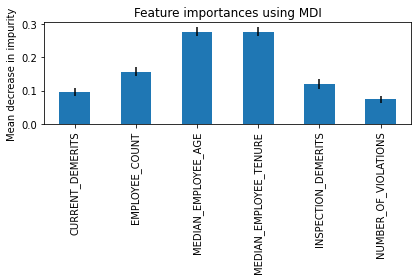%0A)

### We can see that looking only at the top three most important features, these are 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', and 'EMPLOYEE_COUNT'. Let's now consider all features and see what the results are.<a
href="#We-can-see-that-looking-only-at-the-top-three-most-important-features,-these-are-&#39;MEDIAN_EMPLOYEE_AGE&#39;,-&#39;MEDIAN_EMPLOYEE_TENURE&#39;,-and-&#39;EMPLOYEE_COUNT&#39;.-Let&#39;s-now-consider-all-features-and-see-what-the-results-are."
class="anchor-link">¶</a>

In \[85\]:

    # retrieve all features now, including ones that were engineered
    X_num = pd.concat([X_num_only, explore.iloc[:, [i for i in range(8, 16)]]], axis=1, join="inner")
    # retrieve copy of response variable as well
    y_num = explore['NEXT_INSPECTION_GRADE_C_OR_BELOW'].copy()

In \[86\]:

    # check to see that all columns are numeric data types
    X_num.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 12501 entries, 6593 to 7290
    Data columns (total 14 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   CURRENT_DEMERITS        12501 non-null  float64
     1   EMPLOYEE_COUNT          12501 non-null  float64
     2   MEDIAN_EMPLOYEE_AGE     12501 non-null  float64
     3   MEDIAN_EMPLOYEE_TENURE  12501 non-null  float64
     4   INSPECTION_DEMERITS     12501 non-null  float64
     5   NUMBER_OF_VIOLATIONS    12501 non-null  float64
     6   CURRENT_GRADE_C         12501 non-null  int64  
     7   CURRENT_GRADE_X         12501 non-null  int64  
     8   CURRENT_GRADE_OTHER     12501 non-null  int64  
     9   RE-INSPEC               12501 non-null  int64  
     10  OTHER-INSPEC            12501 non-null  int64  
     11  CRITICAL_COUNT          12501 non-null  int64  
     12  MAJOR_COUNT             12501 non-null  int64  
     13  NON-MAJOR_COUNT         12501 non-null  int64  
    dtypes: float64(6), int64(8)
    memory usage: 1.7 MB

In \[87\]:

    # create list of feature names for our numerical features
    all_cols = list(X_num.columns)
    feature_names = [f"{all_cols[i]}" for i in range(X_num.shape[1])]
    # create forest model
    forest_num = RandomForestClassifier(random_state=0)
    # fit model
    forest_num.fit(X_num, y_num)

Out\[87\]:

    RandomForestClassifier(random_state=0)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

    RandomForestClassifier(random_state=0)

In \[88\]:

    start_time = time.time()
    # store feature importances
    importances = forest_num.feature_importances_
    # store mean difference in impurity
    std = np.std([tree.feature_importances_ for tree in forest_num.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    Elapsed time to compute the importances: 0.033 seconds

In \[89\]:

    # create feature importance plot

    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

![](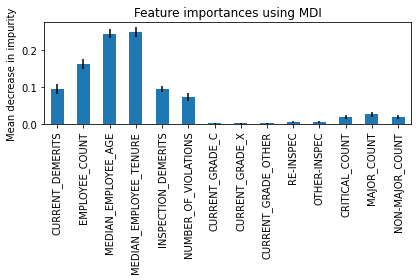%0A)

### When we include all features, we get similar results. The top 5 most important features are 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', 'EMPLOYEE_COUNT', 'CURRENT_DEMERITS', and 'INSPECTION_DEMERITS'.<a
href="#When-we-include-all-features,-we-get-similar-results.-The-top-5-most-important-features-are-&#39;MEDIAN_EMPLOYEE_AGE&#39;,-&#39;MEDIAN_EMPLOYEE_TENURE&#39;,-&#39;EMPLOYEE_COUNT&#39;,-&#39;CURRENT_DEMERITS&#39;,-and-&#39;INSPECTION_DEMERITS&#39;."
class="anchor-link">¶</a>

### Now let's perform feature importance based on feature permutation. This is essentially a way of measuring how much our model depends on a particular feature to make its final predictions.<a
href="#Now-let&#39;s-perform-feature-importance-based-on-feature-permutation.-This-is-essentially-a-way-of-measuring-how-much-our-model-depends-on-a-particular-feature-to-make-its-final-predictions."
class="anchor-link">¶</a>

In \[90\]:

    from sklearn.inspection import permutation_importance

    start_time = time.time()
    # store results of permutation importance
    result = permutation_importance(
        forest_num, X_num, y_num, n_repeats=10, random_state=42, n_jobs=-1
    )
    elapsed_time = time.time() - start_time
    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    # final feature importances are stored
    forest_importances = pd.Series(result.importances_mean, index=feature_names)

    Elapsed time to compute the importances: 20.762 seconds

In \[91\]:

    # plot resultant feature importances based on feature permutation
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

![](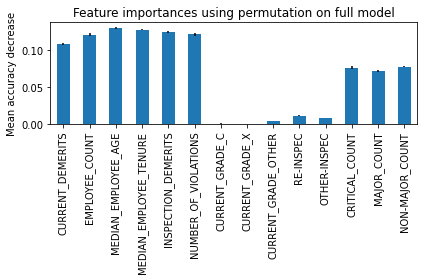%0A)

### We can see that based on feature permutation, the features 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', 'EMPLOYEE_COUNT', 'CURRENT_DEMERITS', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS', 'CRITICAL_COUNT', 'MAJOR_COUNT', and 'NON-MAJOR_COUNT' are relatively important to our model's final predictions. Thus, these are the features we will include in our final model.<a
href="#We-can-see-that-based-on-feature-permutation,-the-features-&#39;MEDIAN_EMPLOYEE_AGE&#39;,-&#39;MEDIAN_EMPLOYEE_TENURE&#39;,-&#39;EMPLOYEE_COUNT&#39;,-&#39;CURRENT_DEMERITS&#39;,-&#39;INSPECTION_DEMERITS&#39;,-&#39;NUMBER_OF_VIOLATIONS&#39;,-&#39;CRITICAL_COUNT&#39;,-&#39;MAJOR_COUNT&#39;,-and-&#39;NON-MAJOR_COUNT&#39;-are-relatively-important-to-our-model&#39;s-final-predictions.-Thus,-these-are-the-features-we-will-include-in-our-final-model."
class="anchor-link">¶</a>

In \[195\]:

    X_num = X_num[['MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', 'EMPLOYEE_COUNT', 
                   'CURRENT_DEMERITS', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS', 
                   'CRITICAL_COUNT', 'MAJOR_COUNT', 'NON-MAJOR_COUNT']].copy()

### Before testing our final model on our validation set, we will see how it performs on the training set using cross-validation.<a
href="#Before-testing-our-final-model-on-our-validation-set,-we-will-see-how-it-performs-on-the-training-set-using-cross-validation."
class="anchor-link">¶</a>

In \[196\]:

    from sklearn.model_selection import cross_val_score

    # create RandomForestClassifier model
    final_model = RandomForestClassifier(random_state = 42)


    # store results of CV scores
    results = cross_val_score(final_model, X_num, y_num, scoring = 'accuracy', cv = 5, n_jobs = -1)

    print(results)
    print('The average CV score with 5 folds is {}'.format(np.mean(results)))

    [0.83046781 0.8256     0.8292     0.8284     0.8288    ]
    The average CV score with 5 folds is 0.82849356257497

### On average, we get a cross-validation score of 82.76%. Let's also calculate other important metrics, such as precision, recall, and F1-score.<a
href="#On-average,-we-get-a-cross-validation-score-of-82.76%.-Let&#39;s-also-calculate-other-important-metrics,-such-as-precision,-recall,-and-F1-score."
class="anchor-link">¶</a>

In \[197\]:

    # store precision results
    precision = cross_val_score(final_model, X_num, pd.to_numeric(y_num), scoring='precision',
                             cv=5, n_jobs = -1)

    # store recall results
    recall = cross_val_score(final_model, X_num, pd.to_numeric(y_num), scoring='recall',
                             cv=5, n_jobs = -1)
    # store f1_score results
    f1_score = cross_val_score(final_model, X_num, pd.to_numeric(y_num), scoring='f1',
                             cv=5, n_jobs = -1)

    print('Our average precision score is {}, our average recall score is {}, and our average f1 score is {}'.format\
         (np.mean(precision), np.mean(recall), np.mean(f1_score)))

    Our average precision score is 0.28345765345765345, our average recall score is 0.008520721992538066, and our average f1 score is 0.01651058185333959

### Unfortunately, our average recall, precision, and f1 score is very low. This is highly due to the fact that we have an unbalanced dataset, whereby there are many more locations that don't score a grade C or below than those that do. Thus, we must somehow account for this.<a
href="#Unfortunately,-our-average-recall,-precision,-and-f1-score-is-very-low.-This-is-highly-due-to-the-fact-that-we-have-an-unbalanced-dataset,-whereby-there-are-many-more-locations-that-don&#39;t-score-a-grade-C-or-below-than-those-that-do.-Thus,-we-must-somehow-account-for-this."
class="anchor-link">¶</a>

### First, we will use the library imblearn. imblearn was created to deal with unbalanced datasets for machine learning problems, and works seamlessly with sci-kit learn. Thus, we start off with imblearn's BalancedRandomForestClassifier model with default parameters. BalancedRandomForestClassifier works by undersampling the majority class for each boostrapping iteration, so that the majority and minority classes have equal weight. This is more effective than simply undersampling our dataset from the onset and we are able to preserve the information that comes in all our data.<a
href="#First,-we-will-use-the-library-imblearn.-imblearn-was-created-to-deal-with-unbalanced-datasets-for-machine-learning-problems,-and-works-seamlessly-with-sci-kit-learn.-Thus,-we-start-off-with-imblearn&#39;s-BalancedRandomForestClassifier-model-with-default-parameters.-BalancedRandomForestClassifier-works-by-undersampling-the-majority-class-for-each-boostrapping-iteration,-so-that-the-majority-and-minority-classes-have-equal-weight.-This-is-more-effective-than-simply-undersampling-our-dataset-from-the-onset-and-we-are-able-to-preserve-the-information-that-comes-in-all-our-data."
class="anchor-link">¶</a>

In \[198\]:

    from imblearn.ensemble import BalancedRandomForestClassifier

    # create BalancedRandomForestClassifier model
    model = BalancedRandomForestClassifier()

    precision = cross_val_score(test, X_num, pd.to_numeric(y_num), scoring='precision',
                             cv=5, n_jobs = -1)

    recall = cross_val_score(test, X_num, pd.to_numeric(y_num), scoring='recall',
                             cv=5, n_jobs = -1)

    f1_score = cross_val_score(test, X_num, pd.to_numeric(y_num), scoring='f1',
                             cv=5, n_jobs = -1)

    print('Our average precision score is {}, our average recall score is {}, and our average f1 score is {}'.format\
         (np.mean(precision), np.mean(recall), np.mean(f1_score)))

    Our average precision score is 0.18178215864080538, our average recall score is 0.2514077958163871, and our average f1 score is 0.2108834313465377

### We can see that our average precision, recall, and F1 scores are already significantly better using imblearn's BalancedRandomForestClassifier model. Let's see if tuning its hyperparameters will yield better results.<a
href="#We-can-see-that-our-average-precision,-recall,-and-F1-scores-are-already-significantly-better-using-imblearn&#39;s-BalancedRandomForestClassifier-model.-Let&#39;s-see-if-tuning-its-hyperparameters-will-yield-better-results."
class="anchor-link">¶</a>

### We will accomplish this by performing a grid search on our hyper-parameter space.<a
href="#We-will-accomplish-this-by-performing-a-grid-search-on-our-hyper-parameter-space."
class="anchor-link">¶</a>

In \[199\]:

    from sklearn.model_selection import GridSearchCV

    # establish hyper-parameter space to search from
    params = {'n_estimators':[50, 100, 300, 500],
             'max_depth': [3, 4, 7], 'max_features': ['sqrt', 5, 7, 8]}

    # create new BalancedRandomForestClassifier model
    new_model = BalancedRandomForestClassifier(random_state = 42)

    # create grid with hyper-parameter space
    grid_search = GridSearchCV(new_model, params, scoring = 'f1', n_jobs = -1)

    grid_search.fit(X_num, pd.to_numeric(y_num))

    cv = grid_search.cv_results_

    for scores, params in sorted(zip(cv['mean_test_score'], cv['params']), reverse = True):
                                 print(scores, params)

    0.2654886839388137 {'max_depth': 7, 'max_features': 7, 'n_estimators': 300}
    0.2635259137779037 {'max_depth': 7, 'max_features': 5, 'n_estimators': 300}
    0.26321765377182466 {'max_depth': 7, 'max_features': 7, 'n_estimators': 50}
    0.26140487417037583 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
    0.2609536316806086 {'max_depth': 7, 'max_features': 5, 'n_estimators': 100}
    0.26074656800938234 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}
    0.2606525908741274 {'max_depth': 7, 'max_features': 7, 'n_estimators': 100}
    0.2605047891851094 {'max_depth': 3, 'max_features': 7, 'n_estimators': 300}
    0.2598363819050735 {'max_depth': 3, 'max_features': 8, 'n_estimators': 300}
    0.25949012296304513 {'max_depth': 7, 'max_features': 8, 'n_estimators': 100}
    0.2593053941413189 {'max_depth': 4, 'max_features': 8, 'n_estimators': 300}
    0.25914204190740814 {'max_depth': 7, 'max_features': 5, 'n_estimators': 50}
    0.2588660143900282 {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 300}
    0.25880019574986374 {'max_depth': 4, 'max_features': 7, 'n_estimators': 300}
    0.2587638317275302 {'max_depth': 7, 'max_features': 8, 'n_estimators': 300}
    0.2585245643043323 {'max_depth': 7, 'max_features': 8, 'n_estimators': 50}
    0.2583464869484272 {'max_depth': 4, 'max_features': 7, 'n_estimators': 100}
    0.2580537552659147 {'max_depth': 3, 'max_features': 8, 'n_estimators': 100}
    0.2576123436365014 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
    0.2572012295395758 {'max_depth': 4, 'max_features': 8, 'n_estimators': 50}
    0.2570753688971657 {'max_depth': 4, 'max_features': 8, 'n_estimators': 100}
    0.2563958504381338 {'max_depth': 3, 'max_features': 5, 'n_estimators': 50}
    0.25615957815400325 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}
    0.25559138617329924 {'max_depth': 3, 'max_features': 5, 'n_estimators': 100}
    0.25533565476686226 {'max_depth': 4, 'max_features': 5, 'n_estimators': 50}
    0.25488910217989125 {'max_depth': 4, 'max_features': 7, 'n_estimators': 50}
    0.25470509578529427 {'max_depth': 3, 'max_features': 7, 'n_estimators': 50}
    0.2546848551212987 {'max_depth': 3, 'max_features': 5, 'n_estimators': 300}
    0.25449574802085484 {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
    0.2542469427403905 {'max_depth': 4, 'max_features': 5, 'n_estimators': 100}
    0.25385305837507294 {'max_depth': 4, 'max_features': 5, 'n_estimators': 300}
    0.25371361915244756 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}
    0.25230146677840826 {'max_depth': 3, 'max_features': 7, 'n_estimators': 100}
    0.2521394008621295 {'max_depth': 3, 'max_features': 8, 'n_estimators': 50}
    0.2520966419978974 {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}
    0.25178834009383855 {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}

### We can see that the model with the best performance has hyper-parameters 'max_depth': 7, 'max_features': 7, 'n_estimators': 300. Thus, our final model will have these same hyper-parameters.<a
href="#We-can-see-that-the-model-with-the-best-performance-has-hyper-parameters-&#39;max_depth&#39;:-7,-&#39;max_features&#39;:-7,-&#39;n_estimators&#39;:-300.-Thus,-our-final-model-will-have-these-same-hyper-parameters."
class="anchor-link">¶</a>

### We will now train our model on the entire training set and test its performance on the validation set.<a
href="#We-will-now-train-our-model-on-the-entire-training-set-and-test-its-performance-on-the-validation-set."
class="anchor-link">¶</a>

In \[200\]:

    validation_model = BalancedRandomForestClassifier(max_depth = 7, max_features = 7, n_estimators = 300)
    # fit model on training data
    validation_model.fit(X_num, y_num)

Out\[200\]:

    BalancedRandomForestClassifier(max_depth=7, max_features=7, n_estimators=300)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

BalancedRandomForestClassifier

    BalancedRandomForestClassifier(max_depth=7, max_features=7, n_estimators=300)

### Now we must perform all the processing we did on training data to validation data<a
href="#Now-we-must-perform-all-the-processing-we-did-on-training-data-to-validation-data"
class="anchor-link">¶</a>

### Extract relevant features/features model was trained on<a href="#Extract-relevant-features/features-model-was-trained-on"
class="anchor-link">¶</a>

In \[179\]:

    X_test_processed = X_test[['MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', 'EMPLOYEE_COUNT', 
                                'CURRENT_DEMERITS', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS',
                               'FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE']].copy()

### Perform relevant feature processing/engineering<a href="#Perform-relevant-feature-processing/engineering"
class="anchor-link">¶</a>

In \[180\]:

    # first create columns that return 1 if violation is type 'critical', 0 otherwise
    X_test_processed['first_critical'] = X_test_processed['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0)
    X_test_processed['second_critical'] = X_test_processed['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0) 
    X_test_processed['third_critical'] = X_test_processed['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0) 

In \[181\]:

    # then create a column that returns the count of type 'critical' by summing along our previously created columns
    X_test_processed['CRITICAL_COUNT'] = X_test_processed[['first_critical', 'second_critical', 'third_critical']].sum(axis = 1)

In \[182\]:

    # first create columns that return 1 if violation is type 'major', 0 otherwise
    X_test_processed['first_major'] = X_test_processed['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0)
    X_test_processed['second_major'] = X_test_processed['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0) 
    X_test_processed['third_major'] = X_test_processed['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0) 

In \[183\]:

    # then create a column that returns the count of type 'major' by summing along our previously created columns
    X_test_processed['MAJOR_COUNT'] = X_test_processed[['first_major', 'second_major', 'third_major']].sum(axis = 1)

In \[184\]:

    # first create columns that return 1 if violation is type 'non-major', 0 otherwise
    X_test_processed['first_non-major'] = X_test_processed['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0)
    X_test_processed['second_non-major'] = X_test_processed['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0) 
    X_test_processed['third_non-major'] = X_test_processed['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0) 

In \[185\]:

    # then create a column that returns the count of type 'non-major' by summing along our previously created columns
    X_test_processed['NON-MAJOR_COUNT'] = X_test_processed[['first_non-major', 'second_non-major', 'third_non-major']].sum(axis = 1)

### Drop features we no longer need after feature processing/engineering<a
href="#Drop-features-we-no-longer-need-after-feature-processing/engineering"
class="anchor-link">¶</a>

In \[186\]:

    # then drop the binary-valued columns since we no longer need them anymore
    X_test_processed.drop(['first_non-major','second_non-major','third_non-major',
                 'first_major','second_major','third_major',
                 'first_critical', 'second_critical', 'third_critical'], axis = 1, inplace = True)

In \[187\]:

    X_test_processed.drop(['FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE'], axis = 1, inplace = True)

In \[188\]:

    X_test_processed.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 3126 entries, 513 to 14329
    Data columns (total 9 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   MEDIAN_EMPLOYEE_AGE     3120 non-null   object 
     1   MEDIAN_EMPLOYEE_TENURE  3072 non-null   float64
     2   EMPLOYEE_COUNT          3115 non-null   float64
     3   CURRENT_DEMERITS        3079 non-null   float64
     4   INSPECTION_DEMERITS     3081 non-null   object 
     5   NUMBER_OF_VIOLATIONS    3083 non-null   object 
     6   CRITICAL_COUNT          3126 non-null   int64  
     7   MAJOR_COUNT             3126 non-null   int64  
     8   NON-MAJOR_COUNT         3126 non-null   int64  
    dtypes: float64(3), int64(3), object(3)
    memory usage: 244.2+ KB

### Convert 'object' data-types to numeric types<a href="#Convert-&#39;object&#39;-data-types-to-numeric-types"
class="anchor-link">¶</a>

In \[189\]:

    obj_cols = ['MEDIAN_EMPLOYEE_AGE', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS'
               ]
    # convert each feature to numeric types. The argument errors = 'coerce' forces non-numerics into NaNs
    X_test_processed[obj_cols] = X_test_processed[obj_cols].apply(pd.to_numeric, errors='coerce')

### Now perform permuting process<a href="#Now-perform-permuting-process" class="anchor-link">¶</a>

In \[190\]:

    # columns we want to impute on
    cols = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 
            'MEDIAN_EMPLOYEE_TENURE', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS']
    # impute using the mode of each column
    X_test_processed[cols]=X_test_processed[cols].fillna(X_test_processed.mode().iloc[0])

### Now convert 'object' types back to numeric types<a href="#Now-convert-&#39;object&#39;-types-back-to-numeric-types"
class="anchor-link">¶</a>

In \[191\]:

    # convert 'object' types to 'float64' types
    X_test_processed[obj_cols] = X_test_processed[obj_cols].apply(pd.to_numeric)

### Sanity check<a href="#Sanity-check" class="anchor-link">¶</a>

In \[192\]:

    X_test_processed.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 3126 entries, 513 to 14329
    Data columns (total 9 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   MEDIAN_EMPLOYEE_AGE     3126 non-null   float64
     1   MEDIAN_EMPLOYEE_TENURE  3126 non-null   float64
     2   EMPLOYEE_COUNT          3126 non-null   float64
     3   CURRENT_DEMERITS        3126 non-null   float64
     4   INSPECTION_DEMERITS     3126 non-null   float64
     5   NUMBER_OF_VIOLATIONS    3126 non-null   float64
     6   CRITICAL_COUNT          3126 non-null   int64  
     7   MAJOR_COUNT             3126 non-null   int64  
     8   NON-MAJOR_COUNT         3126 non-null   int64  
    dtypes: float64(6), int64(3)
    memory usage: 244.2 KB

In \[ \]:

    # Now assess model performance on validation set using a classification report

In \[202\]:

    from sklearn.metrics import classification_report
    y_true = y_test.copy()
    predictions = validation_model.predict(X_test_processed)
    print(classification_report(y_true, predictions))

                  precision    recall  f1-score   support

               0       0.84      0.66      0.74      2558
               1       0.23      0.45      0.30       568

        accuracy                           0.62      3126
       macro avg       0.54      0.56      0.52      3126
    weighted avg       0.73      0.62      0.66      3126

### Now let's perform this process for our test set<a href="#Now-let&#39;s-perform-this-process-for-our-test-set"
class="anchor-link">¶</a>

### Read in test set<a href="#Read-in-test-set" class="anchor-link">¶</a>

In \[215\]:

    test_data = pd.read_csv('Data/TEST_SET_2022.csv')

### Extract relevant features/features model was trained on<a href="#Extract-relevant-features/features-model-was-trained-on"
class="anchor-link">¶</a>

In \[216\]:

    test_processed = test_data[['MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', 'EMPLOYEE_COUNT', 
                                'CURRENT_DEMERITS', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS',
                               'FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE']].copy()

### Perform relevant feature processing/engineering<a href="#Perform-relevant-feature-processing/engineering"
class="anchor-link">¶</a>

In \[217\]:

    # first create columns that return 1 if violation is type 'critical', 0 otherwise
    test_processed['first_critical'] = test_processed['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0)
    test_processed['second_critical'] = test_processed['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0) 
    test_processed['third_critical'] = test_processed['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Critical' else 0) 

In \[218\]:

    # then create a column that returns the count of type 'critical' by summing along our previously created columns
    test_processed['CRITICAL_COUNT'] = test_processed[['first_critical', 'second_critical', 'third_critical']].sum(axis = 1)

In \[219\]:

    # first create columns that return 1 if violation is type 'major', 0 otherwise
    test_processed['first_major'] = test_processed['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0)
    test_processed['second_major'] = test_processed['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0) 
    test_processed['third_major'] = test_processed['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Major' else 0) 

In \[220\]:

    # then create a column that returns the count of type 'major' by summing along our previously created columns
    test_processed['MAJOR_COUNT'] = test_processed[['first_major', 'second_major', 'third_major']].sum(axis = 1)

In \[221\]:

    # first create columns that return 1 if violation is type 'non-major', 0 otherwise
    test_processed['first_non-major'] = test_processed['FIRST_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0)
    test_processed['second_non-major'] = test_processed['SECOND_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0) 
    test_processed['third_non-major'] = test_processed['THIRD_VIOLATION_TYPE'].apply(lambda x: 1 if x == 'Non-Major' else 0) 

In \[222\]:

    # then create a column that returns the count of type 'non-major' by summing along our previously created columns
    test_processed['NON-MAJOR_COUNT'] = test_processed[['first_non-major', 'second_non-major', 'third_non-major']].sum(axis = 1)

### Drop features we no longer need after feature processing/engineering<a
href="#Drop-features-we-no-longer-need-after-feature-processing/engineering"
class="anchor-link">¶</a>

In \[223\]:

    # then drop the binary-valued columns since we no longer need them anymore
    test_processed.drop(['first_non-major','second_non-major','third_non-major',
                 'first_major','second_major','third_major',
                 'first_critical', 'second_critical', 'third_critical'], axis = 1, inplace = True)

In \[224\]:

    test_processed.drop(['FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE'], axis = 1, inplace = True)

In \[225\]:

    test_processed.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 7505 entries, 0 to 7504
    Data columns (total 9 columns):
     #   Column                  Non-Null Count  Dtype  
    ---  ------                  --------------  -----  
     0   MEDIAN_EMPLOYEE_AGE     7505 non-null   float64
     1   MEDIAN_EMPLOYEE_TENURE  7505 non-null   float64
     2   EMPLOYEE_COUNT          7505 non-null   float64
     3   CURRENT_DEMERITS        7505 non-null   int64  
     4   INSPECTION_DEMERITS     7505 non-null   int64  
     5   NUMBER_OF_VIOLATIONS    7505 non-null   int64  
     6   CRITICAL_COUNT          7505 non-null   int64  
     7   MAJOR_COUNT             7505 non-null   int64  
     8   NON-MAJOR_COUNT         7505 non-null   int64  
    dtypes: float64(3), int64(6)
    memory usage: 527.8 KB

### Convert 'object' data-types to numeric types<a href="#Convert-&#39;object&#39;-data-types-to-numeric-types"
class="anchor-link">¶</a>

In \[226\]:

    obj_cols = ['MEDIAN_EMPLOYEE_AGE', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS'
               ]
    # convert each feature to numeric types. The argument errors = 'coerce' forces non-numerics into NaNs
    test_processed[obj_cols] = test_processed[obj_cols].apply(pd.to_numeric, errors='coerce')

### Now perform permuting process<a href="#Now-perform-permuting-process" class="anchor-link">¶</a>

In \[227\]:

    # columns we want to impute on
    cols = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 
            'MEDIAN_EMPLOYEE_TENURE', 'INSPECTION_DEMERITS', 'NUMBER_OF_VIOLATIONS']
    # impute using the mode of each column
    test_processed[cols]=test_processed[cols].fillna(test_processed.mode().iloc[0])

### Now convert 'object' types back to numeric types<a href="#Now-convert-&#39;object&#39;-types-back-to-numeric-types"
class="anchor-link">¶</a>

In \[228\]:

    # convert 'object' types to 'float64' types
    test_processed[obj_cols] = test_processed[obj_cols].apply(pd.to_numeric)

### Sanity check<a href="#Sanity-check" class="anchor-link">¶</a>

In \[ \]:

    test_processed.info()

### Lastly, train model on full training data and assess performance on testing data<a
href="#Lastly,-train-model-on-full-training-data-and-assess-performance-on-testing-data"
class="anchor-link">¶</a>

In \[233\]:

    training_data = pd.concat([X_num, X_test_processed])
    training_y = pd.concat([y_num, y_test])

In \[235\]:

    final_model = BalancedRandomForestClassifier(max_depth = 7, max_features = 7, n_estimators = 300)
    final_model.fit(training_data, training_y)

Out\[235\]:

    BalancedRandomForestClassifier(max_depth=7, max_features=7, n_estimators=300)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

BalancedRandomForestClassifier

    BalancedRandomForestClassifier(max_depth=7, max_features=7, n_estimators=300)

In \[236\]:

    probs = final_model.predict_proba(test_processed)

In \[240\]:

    # get column that contains probabilities of scoring grade C or below
    prob_of_c_below = probs[:, 1]

In \[246\]:

    final_csv = pd.DataFrame()
    final_csv['RESTAURANT_SERIAL_NUMBER'] = test_data['RESTAURANT_SERIAL_NUMBER']
    final_csv['CLASSIFIER_PROBABILITY'] = pd.Series(prob_of_c_below)
    final_csv['CLASSIFIER_PREDICTION'] = final_csv['CLASSIFIER_PROBABILITY'].apply(lambda x: 1 if x >  0.5 else 0)

In \[251\]:

    final_csv.to_csv('predictions_Serrata_Brian.csv')